<a href="https://colab.research.google.com/github/devvashisth07/early-event-detection/blob/main/EED_for_heart_failure2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
pd.set_option('display.float_format', lambda x: '%.2f' % x)
# Load the dataset
data = pd.read_csv("heart_failure_clinical_records_dataset.csv")

# Split the data into features (X) and the target variable (y)
X = data.drop("DEATH_EVENT", axis=1)
y = data["DEATH_EVENT"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a machine learning model (Random Forest Classifier)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)


Accuracy: 0.75
Confusion Matrix:
[[33  2]
 [13 12]]
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.94      0.81        35
           1       0.86      0.48      0.62        25

    accuracy                           0.75        60
   macro avg       0.79      0.71      0.72        60
weighted avg       0.78      0.75      0.73        60



In [ ]:
data.sample(10)

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
274 60.00        1                       257         1                 30   
69  65.00        0                       113         1                 25   
17  45.00        0                       582         0                 14   
130 53.00        1                      1808         0                 60   
254 53.00        1                       446         0                 60   
278 50.00        1                      1051         1                 30   
47  60.00        0                       582         1                 38   
112 50.00        0                       369         1                 25   
261 62.00        1                       655         0                 40   
25  80.00        0                       148         1                 38   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
274                    0  150000.00              1.00           137    1   
69                     0  497000.00              1.83           135    1   
17                     0  166000.00              0.80           127    1   
130                    1  249000.00              0.70           138    1   
254                    1  263358.03              1.00           139    1   
278                    0  232000.00              0.70           136    0   
47                     1  451000.00              0.60           138    1   
112                    0  252000.00              1.60           136    1   
261                    0  283000.00              0.70           133    0   
25                     0  149000.00              1.90           144    1   

     smoking  time  DEATH_EVENT  
274        1   245            0  
69         0    67            1  
17         0    14            1  
130        1   106            0  
254        0   215            0  
278        0   246            0  
47         1    40            1  
112        0    90            0  
261        0   233            0  
25         1    23            1

In [ ]:
data.describe()

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
count 299.00   299.00                    299.00    299.00             299.00   
mean   60.83     0.43                    581.84      0.42              38.08   
std    11.89     0.50                    970.29      0.49              11.83   
min    40.00     0.00                     23.00      0.00              14.00   
25%    51.00     0.00                    116.50      0.00              30.00   
50%    60.00     0.00                    250.00      0.00              38.00   
75%    70.00     1.00                    582.00      1.00              45.00   
max    95.00     1.00                   7861.00      1.00              80.00   

       high_blood_pressure  platelets  serum_creatinine  serum_sodium    sex  \
count               299.00     299.00            299.00        299.00 299.00   
mean                  0.35  263358.03              1.39        136.63   0.65   
std                   0.48   97804.24              1.03          4.41   0.48   
min                   0.00   25100.00              0.50        113.00   0.00   
25%                   0.00  212500.00              0.90        134.00   0.00   
50%                   0.00  262000.00              1.10        137.00   1.00   
75%                   1.00  303500.00              1.40        140.00   1.00   
max                   1.00  850000.00              9.40        148.00   1.00   

       smoking   time  DEATH_EVENT  
count   299.00 299.00       299.00  
mean      0.32 130.26         0.32  
std       0.47  77.61         0.47  
min       0.00   4.00         0.00  
25%       0.00  73.00         0.00  
50%       0.00 115.00         0.00  
75%       1.00 203.00         1.00  
max       1.00 285.00         1.00

In [ ]:
fig = px.pie(data, names='DEATH_EVENT', title='Distribution of Death Events in Patients',width=600, height=400)
fig.show()

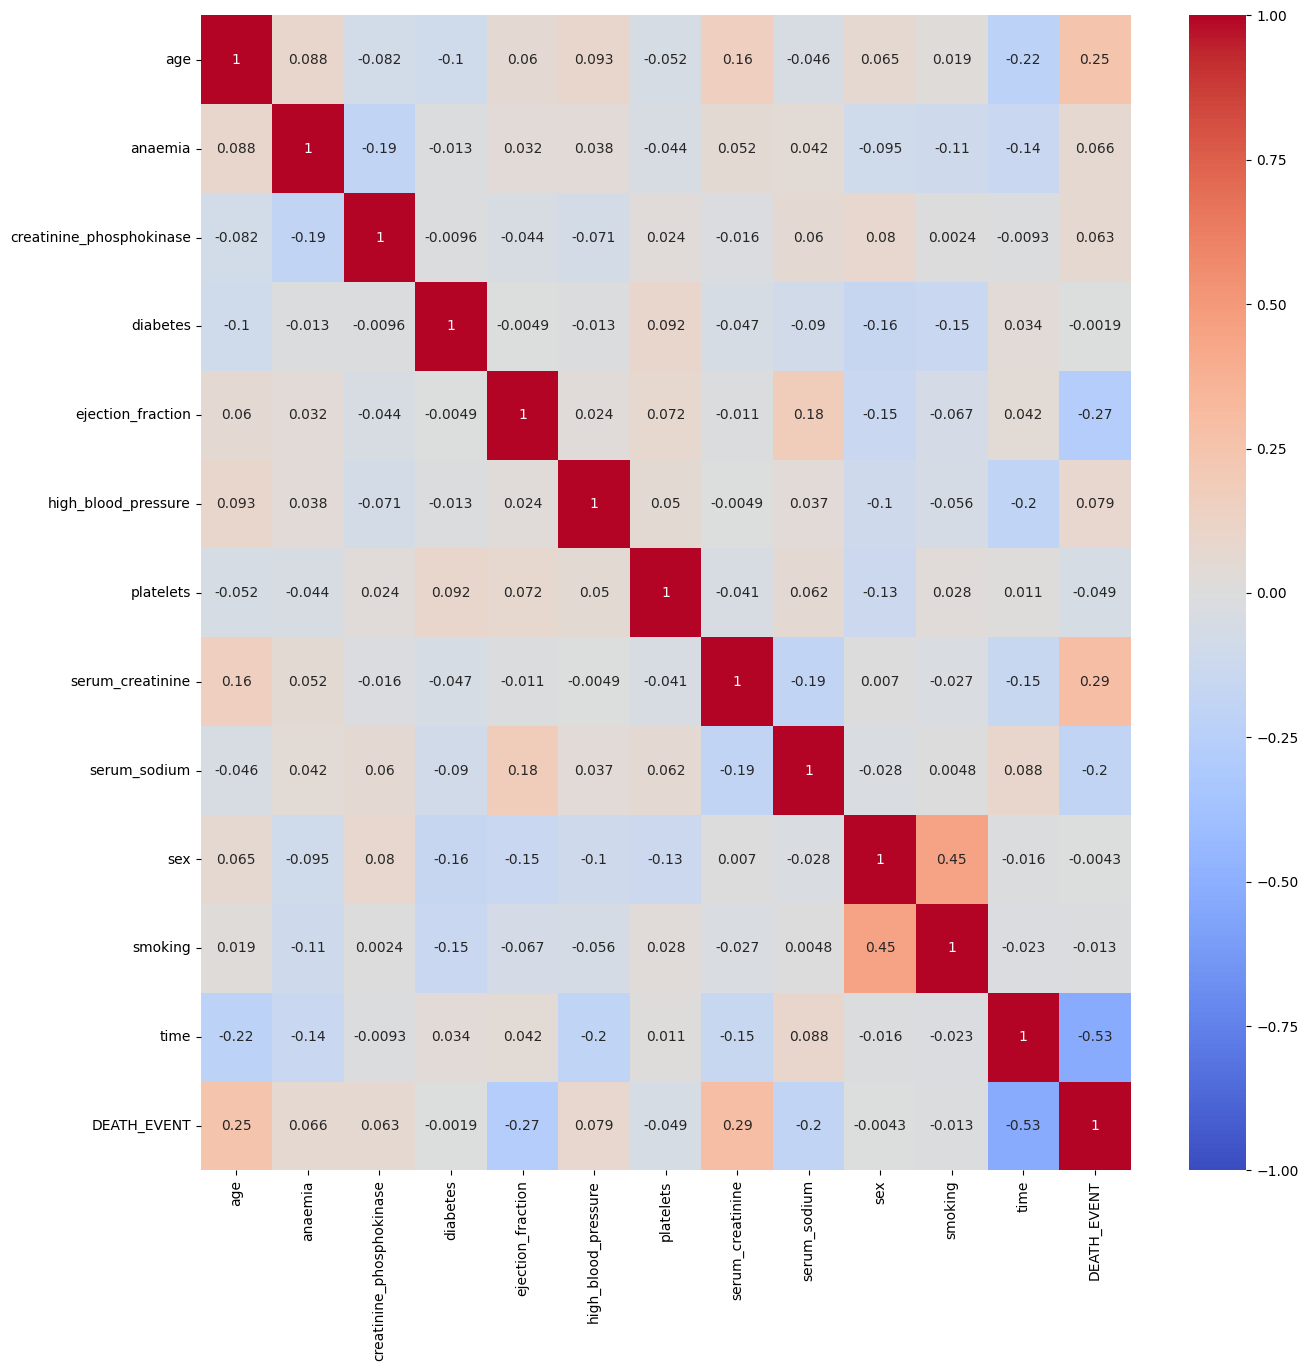

In [ ]:
corr = data.corr()
ax, fig = plt.subplots(figsize=(15,15))
sns.heatmap(corr, vmin=-1, cmap='coolwarm', annot=True)
plt.show()

In [ ]:
corr[abs(corr['DEATH_EVENT']) > 0.1]['DEATH_EVENT']

age                  0.25
ejection_fraction   -0.27
serum_creatinine     0.29
serum_sodium        -0.20
time                -0.53
DEATH_EVENT          1.00
Name: DEATH_EVENT, dtype: float64

In [ ]:
# Model training and prediction
# Trial and Error revealed that not considering Age column improves accuracy

x = data[['ejection_fraction', 'serum_creatinine', 'serum_sodium', 'time']]
x = (x-x.mean())/x.std()
y = data['DEATH_EVENT']

#Spliting data into training and testing data
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.2)

In [ ]:
pip install --upgrade scikit-learn


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning:


35 fits failed out of a total of 70.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1169, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/u

Best parameters: {'C': 1000, 'penalty': 'l2'}
Linear Regression Success Rate : 86.67%


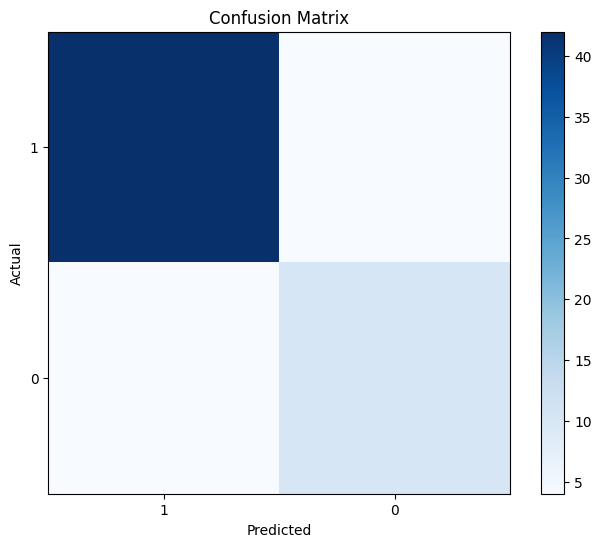

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# Separate the features (X) and the target variable (y)
X = data.drop('DEATH_EVENT', axis=1)
y = data['DEATH_EVENT']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Create a logistic regression model
lr = LogisticRegression(max_iter=10000)

# Define hyperparameters for grid search
params = {'penalty': ['l1', 'l2'],
          'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

# Perform grid search with cross-validation
best_lr = GridSearchCV(lr, param_grid=params)
best_lr.fit(x_train, y_train)
print(f"Best parameters: {best_lr.best_params_}")

# Evaluate the model
s1 = best_lr.score(x_test, y_test)

print("Linear Regression Success Rate :", "{:.2f}%".format(100 * s1))

# Predict the test set
y_pred = best_lr.predict(x_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
def plot_confusion_matrix(cm, classes):
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

class_names = y.unique()
plot_confusion_matrix(cm, classes=class_names)


Best parameters: {'C': 10, 'penalty': 'l2'}
Linear Regression Success Rate: 80.00%


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning:


20 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1169, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/u

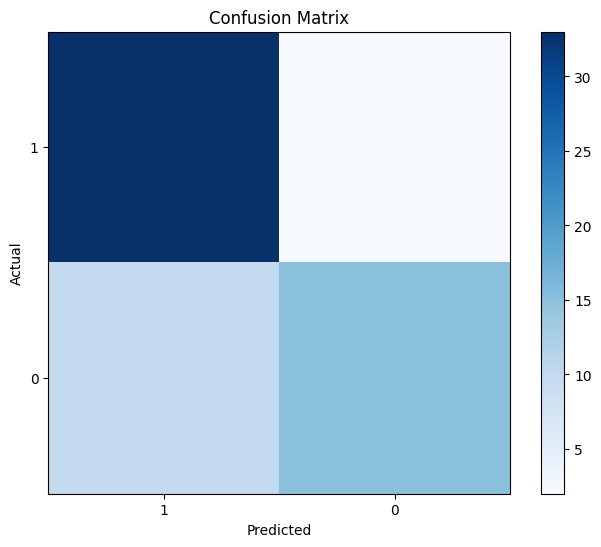

In [ ]:
#Grid SearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import pandas as pd
import matplotlib.pyplot as plt


# Separate the features (X) and the target variable (y)
X = data.drop('DEATH_EVENT', axis=1)
y = data['DEATH_EVENT']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a logistic regression model
lr = LogisticRegression(max_iter=10000)

# Define hyperparameters for grid search
params = {'penalty': ['l1', 'l2'],
          'C': [1, 10, 100, 1000]}

# Search for best hyperparameters using GridSearchCV
best_lr = GridSearchCV(lr, param_grid=params)  # You can adjust the number of cross-validation folds (cv) as needed
best_lr.fit(x_train, y_train)
print(f"Best parameters: {best_lr.best_params_}")

# Predict on the test set
p1 = best_lr.predict(x_test)
s1 = accuracy_score(y_test, p1)

print("Linear Regression Success Rate:", "{:.2f}%".format(100 * s1))

# Calculate the confusion matrix
cm = confusion_matrix(y_test, p1)

# Plot the confusion matrix
def plot_confusion_matrix(cm, classes):
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

class_names = y.unique()
plot_confusion_matrix(cm, classes=class_names)


Random Forest Classifier Success Rate: 75.00%


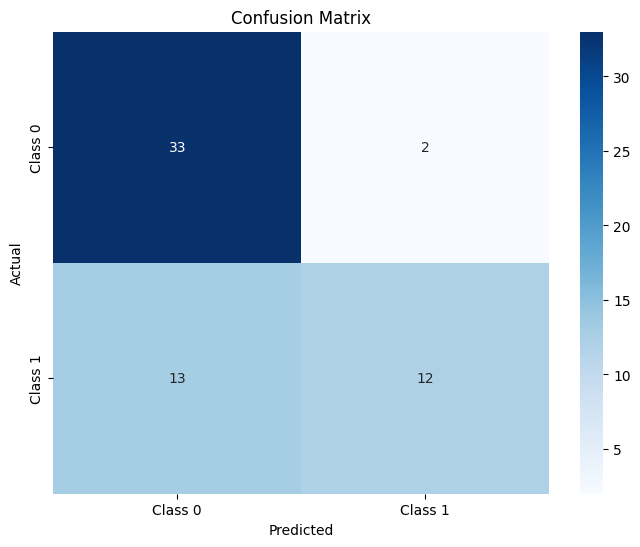

In [ ]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Classifier model
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

# Predict on the test set
p3 = rfc.predict(x_test)
s3 = accuracy_score(y_test, p3)

print("Random Forest Classifier Success Rate:", "{:.2f}%".format(100 * s3))

# Calculate the confusion matrix
cm = confusion_matrix(y_test, p3)

# Plot the confusion matrix with labels
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

K Nearest Neighbors Success Rate: 58.33%


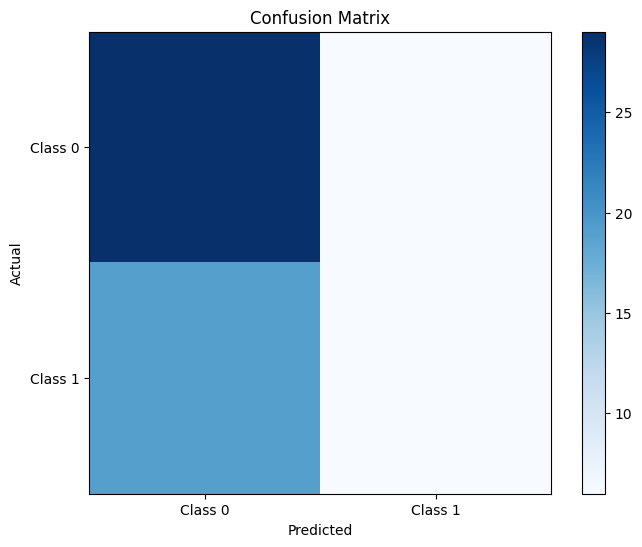

In [40]:
#K Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

scorelist=[]

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a K Nearest Neighbors (KNN) model
knn = KNeighborsClassifier()

# Fit the model
knn.fit(x_train, y_train)

# Predict on the test set
p4 = knn.predict(x_test)
s4 = accuracy_score(y_test, p4)
scorelist.append(round(100*s4, 2))
print("K Nearest Neighbors Success Rate:", "{:.2f}%".format(100 * s4))

# Calculate the confusion matrix
cm = confusion_matrix(y_test, p4)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = [0, 1]  # Assuming binary classification
plt.xticks(tick_marks, ['Class 0', 'Class 1'])
plt.yticks(tick_marks, ['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Decision Tree Classifier Success Rate: 56.67%


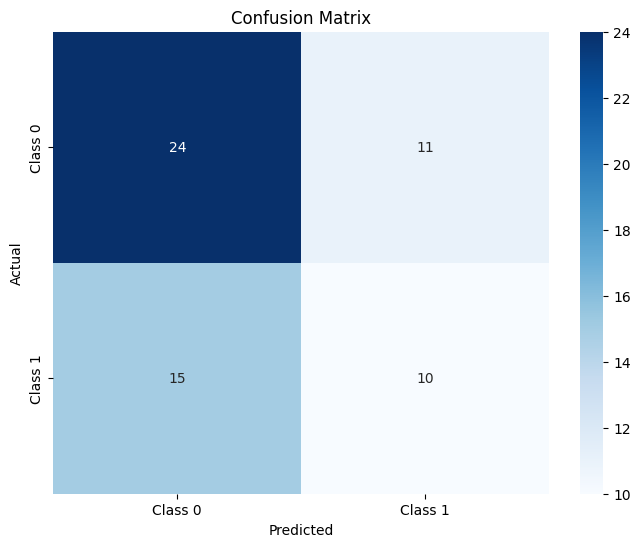

In [37]:
#DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
list1 = []
# Create a Decision Tree Classifier model
classifier = DecisionTreeClassifier()

# Fit the model
classifier.fit(x_train, y_train)

# Predict on the test set
p5 = classifier.predict(x_test)
s5 = accuracy_score(y_test, p5)
list1.append(accuracy_score(y_test,y_pred)*100)

print("Decision Tree Classifier Success Rate:", "{:.2f}%".format(100 * s5))

# Calculate the confusion matrix
cm = confusion_matrix(y_test, p5)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
!pip install bayesian-optimization


In [15]:
#Extra Gradient Booster Classifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold, GridSearchCV
import pandas as pd
# Split the data into training and testing sets with a consistent random_state
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define hyperparameters for grid search
params = {
    'min_child_weight': [1, 5, 10],
    'gamma': [0.5, 1, 1.5, 2, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'max_depth': [3, 4, 5]
}

# Create an XGBoost Classifier model
xgb = XGBClassifier(learning_rate=0.01, n_estimators=1000, objective='binary:logistic', random_state=42)

# Initialize StratifiedKFold for cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

grid = GridSearchCV(estimator=xgb, param_grid=params, n_jobs=1, cv=skf.split(x_train, y_train), verbose=1)


grid.fit(x_train, y_train, eval_metric="error", early_stopping_rounds=30, eval_set=[(x_test, y_test)])


# Get the best estimator from grid search
best_xgb = grid.best_estimator_

# Predict on the test set
p2x = best_xgb.predict(x_test)
s2x = accuracy_score(y_test, p2x)

print("XGBoost Classifier Success Rate:", "{:.2f}%".format(100 * s2x))

Fitting 5 folds for each of 405 candidates, totalling 2025 fits


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.41667
[1]	validation_0-error:0.31667
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.33333
[4]	validation_0-error:0.33333
[5]	validation_0-error:0.30000
[6]	validation_0-error:0.30000
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.33333
[9]	validation_0-error:0.35000
[10]	validation_0-error:0.33333
[11]	validation_0-error:0.31667
[12]	validation_0-error:0.30000
[13]	validation_0-error:0.28333
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.28333
[16]	validation_0-error:0.28333
[17]	validation_0-error:0.30000
[18]	validation_0-error:0.31667
[19]	validation_0-error:0.30000
[20]	validation_0-error:0.28333
[21]	validation_0-error:0.26667
[22]	validation_0-error:0.28333
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.26667
[25]	validation_0-error:0.28333
[26]	validation_0-error:0.26667
[27]	validation_0-error:0.28333
[28]	validation_0-error:0.28333
[29]	validation_0-error:0.28333
[30]	validation_0-error:0.28333
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[1]	validation_0-error:0.31667
[2]	validation_0-error:0.30000
[3]	validation_0-error:0.30000
[4]	validation_0-error:0.28333
[5]	validation_0-error:0.28333
[6]	validation_0-error:0.26667
[7]	validation_0-error:0.28333
[8]	validation_0-error:0.28333
[9]	validation_0-error:0.30000
[10]	validation_0-error:0.31667
[11]	validation_0-error:0.30000
[12]	validation_0-error:0.28333
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.30000
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.28333
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.26667
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.28333
[27]	validation_0-error:0.28333
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[32]	validation_0

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[18]	validation_0-error:0.26667
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.26667
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.28333
[25]	validation_0-error:0.28333
[26]	validation_0-error:0.28333
[27]	validation_0-error:0.28333
[28]	validation_0-error:0.28333
[29]	validation_0-error:0.28333
[30]	validation_0-error:0.28333
[31]	validation_0-error:0.28333
[32]	validation_0-error:0.28333
[33]	validation_0-error:0.30000
[34]	validation_0-error:0.28333
[35]	validation_0-error:0.28333
[36]	validation_0-error:0.28333
[37]	validation_0-error:0.28333
[38]	validation_0-error:0.28333
[39]	validation_0-error:0.28333
[40]	validation_0-error:0.28333
[41]	validation_0-error:0.28333
[42]	validation_0-error:0.28333
[43]	validation_0-error:0.28333
[44]	validation_0-error:0.28333
[45]	validation_0-error:0.26667
[46]	validation_0-error:0.28333
[47]	validation_0-error:0.26667
[0]	validation_0-error:0.45000
[1]	valid

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[54]	validation_0-error:0.25000
[55]	validation_0-error:0.25000
[56]	validation_0-error:0.25000
[57]	validation_0-error:0.25000
[58]	validation_0-error:0.25000
[59]	validation_0-error:0.25000
[60]	validation_0-error:0.23333
[61]	validation_0-error:0.23333
[62]	validation_0-error:0.25000
[63]	validation_0-error:0.25000
[64]	validation_0-error:0.25000
[65]	validation_0-error:0.25000
[66]	validation_0-error:0.25000
[67]	validation_0-error:0.25000
[68]	validation_0-error:0.25000
[69]	validation_0-error:0.25000
[0]	validation_0-error:0.40000
[1]	validation_0-error:0.31667
[2]	validation_0-error:0.30000
[3]	validation_0-error:0.30000
[4]	validation_0-error:0.30000
[5]	validation_0-error:0.30000
[6]	validation_0-error:0.28333
[7]	validation_0-error:0.28333
[8]	validation_0-error:0.28333
[9]	validation_0-error:0.26667
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.28333
[14]	validation_0-error:0.28333
[15]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[6]	validation_0-error:0.28333
[7]	validation_0-error:0.30000
[8]	validation_0-error:0.30000
[9]	validation_0-error:0.30000
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.30000
[12]	validation_0-error:0.31667
[13]	validation_0-error:0.28333
[14]	validation_0-error:0.28333
[15]	validation_0-error:0.30000
[16]	validation_0-error:0.30000
[17]	validation_0-error:0.28333
[18]	validation_0-error:0.30000
[19]	validation_0-error:0.30000
[20]	validation_0-error:0.30000
[21]	validation_0-error:0.28333
[22]	validation_0-error:0.30000
[23]	validation_0-error:0.30000
[24]	validation_0-error:0.30000
[25]	validation_0-error:0.30000
[26]	validation_0-error:0.28333
[27]	validation_0-error:0.30000
[28]	validation_0-error:0.30000
[29]	validation_0-error:0.28333
[30]	validation_0-error:0.30000
[31]	validation_0-error:0.30000
[32]	validation_0-error:0.30000
[33]	validation_0-error:0.30000
[34]	validation_0-error:0.30000
[35]	validation_0-error:0.26667
[36]	validation_0-error:0.26667
[37]	validat

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[1]	validation_0-error:0.36667
[2]	validation_0-error:0.33333
[3]	validation_0-error:0.33333
[4]	validation_0-error:0.30000
[5]	validation_0-error:0.30000
[6]	validation_0-error:0.26667
[7]	validation_0-error:0.30000
[8]	validation_0-error:0.33333
[9]	validation_0-error:0.30000
[10]	validation_0-error:0.35000
[11]	validation_0-error:0.30000
[12]	validation_0-error:0.30000
[13]	validation_0-error:0.28333
[14]	validation_0-error:0.30000
[15]	validation_0-error:0.30000
[16]	validation_0-error:0.31667
[17]	validation_0-error:0.31667
[18]	validation_0-error:0.31667
[19]	validation_0-error:0.31667
[20]	validation_0-error:0.28333
[21]	validation_0-error:0.26667
[22]	validation_0-error:0.28333
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.26667
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.26667
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.26667
[31]	validation_0-error:0.28333
[32]	validation_0

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.43333
[1]	validation_0-error:0.38333
[2]	validation_0-error:0.36667
[3]	validation_0-error:0.40000
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.36667
[6]	validation_0-error:0.33333
[7]	validation_0-error:0.35000
[8]	validation_0-error:0.30000
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.28333
[11]	validation_0-error:0.28333
[12]	validation_0-error:0.28333
[13]	validation_0-error:0.30000
[14]	validation_0-error:0.30000
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.30000
[17]	validation_0-error:0.30000
[18]	validation_0-error:0.30000
[19]	validation_0-error:0.30000
[20]	validation_0-error:0.30000
[21]	validation_0-error:0.30000
[22]	validation_0-error:0.28333
[23]	validation_0-error:0.28333
[24]	validation_0-error:0.28333
[25]	validation_0-error:0.28333
[26]	validation_0-error:0.28333
[27]	validation_0-error:0.28333
[28]	validation_0-error:0.28333
[29]	validation_0-error:0.28333
[30]	validation_0-error:0.28333
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[20]	validation_0-error:0.26667
[21]	validation_0-error:0.28333
[22]	validation_0-error:0.30000
[23]	validation_0-error:0.28333
[24]	validation_0-error:0.28333
[25]	validation_0-error:0.28333
[26]	validation_0-error:0.28333
[27]	validation_0-error:0.30000
[28]	validation_0-error:0.28333
[29]	validation_0-error:0.28333
[30]	validation_0-error:0.28333
[31]	validation_0-error:0.28333
[32]	validation_0-error:0.28333
[33]	validation_0-error:0.28333
[34]	validation_0-error:0.28333
[35]	validation_0-error:0.28333
[36]	validation_0-error:0.28333
[37]	validation_0-error:0.28333
[38]	validation_0-error:0.28333
[39]	validation_0-error:0.28333
[40]	validation_0-error:0.28333
[41]	validation_0-error:0.28333
[42]	validation_0-error:0.28333
[43]	validation_0-error:0.28333
[44]	validation_0-error:0.28333
[45]	validation_0-error:0.28333
[46]	validation_0-error:0.28333
[47]	validation_0-error:0.28333
[48]	validation_0-error:0.28333
[49]	validation_0-error:0.28333
[50]	validation_0-error:0.28333
[0]	vali

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[1]	validation_0-error:0.36667
[2]	validation_0-error:0.38333
[3]	validation_0-error:0.33333
[4]	validation_0-error:0.40000
[5]	validation_0-error:0.38333
[6]	validation_0-error:0.35000
[7]	validation_0-error:0.33333
[8]	validation_0-error:0.36667
[9]	validation_0-error:0.36667
[10]	validation_0-error:0.35000
[11]	validation_0-error:0.30000
[12]	validation_0-error:0.33333
[13]	validation_0-error:0.31667
[14]	validation_0-error:0.30000
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[32]	validation_0

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[2]	validation_0-error:0.35000
[3]	validation_0-error:0.35000
[4]	validation_0-error:0.33333
[5]	validation_0-error:0.35000
[6]	validation_0-error:0.35000
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.35000
[9]	validation_0-error:0.33333
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.30000
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.28333
[14]	validation_0-error:0.28333
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.28333
[17]	validation_0-error:0.28333
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.28333
[22]	validation_0-error:0.28333
[23]	validation_0-error:0.30000
[24]	validation_0-error:0.28333
[25]	validation_0-error:0.28333
[26]	validation_0-error:0.28333
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.26667
[31]	validation_0-error:0.26667
[32]	validation_0-error:0.26667
[33]	validation_

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.40000
[1]	validation_0-error:0.40000
[2]	validation_0-error:0.36667
[3]	validation_0-error:0.31667
[4]	validation_0-error:0.35000
[5]	validation_0-error:0.36667
[6]	validation_0-error:0.31667
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.33333
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.28333
[12]	validation_0-error:0.30000
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.23333
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.23333
[24]	validation_0-error:0.23333
[25]	validation_0-error:0.23333
[26]	validation_0-error:0.23333
[27]	validation_0-error:0.23333
[28]	validation_0-error:0.23333
[29]	validation_0-error:0.23333
[30]	validation_0-error:0.23333
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[6]	validation_0-error:0.31667
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.30000
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.23333
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.23333
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.28333
[19]	validation_0-error:0.28333
[20]	validation_0-error:0.28333
[21]	validation_0-error:0.26667
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.28333
[24]	validation_0-error:0.28333
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.26667
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.23333
[30]	validation_0-error:0.23333
[31]	validation_0-error:0.25000
[32]	validation_0-error:0.25000
[33]	validation_0-error:0.25000
[34]	validation_0-error:0.25000
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validat

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[10]	validation_0-error:0.25000
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.23333
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.28333
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.28333
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.26667
[31]	validation_0-error:0.26667
[32]	validation_0-error:0.26667
[33]	validation_0-error:0.26667
[34]	validation_0-error:0.26667
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	val

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.23333
[25]	validation_0-error:0.23333
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.26667
[32]	validation_0-error:0.25000
[33]	validation_0-error:0.26667
[34]	validation_0-error:0.26667
[35]	validation_0-error:0.26667
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[45]	validation_0-error:0.25000
[46]	validation_0-error:0.23333
[47]	validation_0-error:0.23333
[48]	validation_0-error:0.23333
[49]	validation_0-error:0.23333
[50]	validation_0-error:0.23333
[51]	validation_0-error:0.23333
[52]	val

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[15]	validation_0-error:0.25000
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.23333
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.23333
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.26667
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.23333
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[32]	validation_0-error:0.25000
[33]	validation_0-error:0.25000
[34]	validation_0-error:0.25000
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.23333
[37]	validation_0-error:0.23333
[38]	validation_0-error:0.23333
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.23333
[43]	validation_0-error:0.23333
[44]	validation_0-error:0.23333
[45]	validation_0-error:0.23333
[46]	val

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.31667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.31667
[16]	validation_0-error:0.31667
[17]	validation_0-error:0.30000
[18]	validation_0-error:0.31667
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.26667
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.26667
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.26667
[31]	validation_0-error:0.26667
[0]	validation_0-error:0.36667
[1]	validation_0-error:0.35000
[2]	validation_0-error:0.36667
[3]	validation_0-error:0.38333
[4]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[21]	validation_0-error:0.26667
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.26667
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.26667
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.26667
[31]	validation_0-error:0.26667
[32]	validation_0-error:0.26667
[33]	validation_0-error:0.26667
[34]	validation_0-error:0.26667
[35]	validation_0-error:0.26667
[36]	validation_0-error:0.26667
[37]	validation_0-error:0.26667
[38]	validation_0-error:0.26667
[39]	validation_0-error:0.26667
[40]	validation_0-error:0.26667
[0]	validation_0-error:0.38333
[1]	validation_0-error:0.38333
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.26667
[4]	validation_0-error:0.26667
[5]	validation_0-error:0.26667
[6]	validation_0-error:0.26667
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.26667
[10]	validation_0-error:0.26667
[11]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[23]	validation_0-error:0.25000
[24]	validation_0-error:0.26667
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.26667
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.26667
[31]	validation_0-error:0.28333
[32]	validation_0-error:0.26667
[33]	validation_0-error:0.28333
[34]	validation_0-error:0.28333
[35]	validation_0-error:0.26667
[36]	validation_0-error:0.26667
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[45]	validation_0-error:0.25000
[46]	validation_0-error:0.25000
[47]	validation_0-error:0.25000
[48]	validation_0-error:0.25000
[49]	validation_0-error:0.25000
[50]	validation_0-error:0.25000
[51]	validation_0-error:0.25000
[0]	validation_0-error:0.38333
[1]	validation_0-error:0.31667
[2]	valida

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[9]	validation_0-error:0.26667
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.23333
[13]	validation_0-error:0.23333
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.28333
[16]	validation_0-error:0.28333
[17]	validation_0-error:0.28333
[18]	validation_0-error:0.28333
[19]	validation_0-error:0.28333
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.23333
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.28333
[32]	validation_0-error:0.25000
[33]	validation_0-error:0.28333
[34]	validation_0-error:0.28333
[35]	validation_0-error:0.26667
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	vali

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[15]	validation_0-error:0.28333
[16]	validation_0-error:0.28333
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.28333
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.23333
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.23333
[24]	validation_0-error:0.21667
[25]	validation_0-error:0.23333
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.23333
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.26667
[32]	validation_0-error:0.25000
[33]	validation_0-error:0.26667
[34]	validation_0-error:0.26667
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.23333
[37]	validation_0-error:0.23333
[38]	validation_0-error:0.23333
[39]	validation_0-error:0.20000
[40]	validation_0-error:0.20000
[41]	validation_0-error:0.21667
[42]	validation_0-error:0.20000
[43]	validation_0-error:0.21667
[44]	validation_0-error:0.21667
[45]	validation_0-error:0.21667
[46]	val

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.23333
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.23333
[18]	validation_0-error:0.23333
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.21667
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.23333
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.23333
[26]	validation_0-error:0.23333
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[32]	validation_0-error:0.25000
[33]	validation_0-error:0.25000
[34]	validation_0-error:0.25000
[35]	validation_0-error:0.23333
[36]	validation_0-error:0.23333
[37]	validation_0-error:0.23333
[38]	validation_0-error:0.23333
[39]	validation_0-error:0.21667
[40]	vali

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.38333
[1]	validation_0-error:0.38333
[2]	validation_0-error:0.38333
[3]	validation_0-error:0.33333
[4]	validation_0-error:0.35000
[5]	validation_0-error:0.30000
[6]	validation_0-error:0.33333
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.33333
[9]	validation_0-error:0.28333
[10]	validation_0-error:0.28333
[11]	validation_0-error:0.28333
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.28333
[19]	validation_0-error:0.28333
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.26667
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.26667
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.26667
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.26667
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[9]	validation_0-error:0.36667
[10]	validation_0-error:0.28333
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.23333
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.26667
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[32]	validation_0-error:0.25000
[33]	validation_0-error:0.25000
[34]	validation_0-error:0.25000
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	vali

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[19]	validation_0-error:0.26667
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.26667
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.26667
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.26667
[31]	validation_0-error:0.25000
[32]	validation_0-error:0.25000
[33]	validation_0-error:0.25000
[34]	validation_0-error:0.25000
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.23333
[43]	validation_0-error:0.23333
[44]	validation_0-error:0.23333
[45]	validation_0-error:0.23333
[46]	validation_0-error:0.23333
[47]	validation_0-error:0.23333
[48]	validation_0-error:0.23333
[49]	validation_0-error:0.23333
[50]	val

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[1]	validation_0-error:0.38333
[2]	validation_0-error:0.38333
[3]	validation_0-error:0.33333
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.31667
[7]	validation_0-error:0.30000
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.31667
[11]	validation_0-error:0.23333
[12]	validation_0-error:0.30000
[13]	validation_0-error:0.23333
[14]	validation_0-error:0.21667
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[32]	validation_0

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[33]	validation_0-error:0.23333
[34]	validation_0-error:0.23333
[35]	validation_0-error:0.23333
[36]	validation_0-error:0.23333
[37]	validation_0-error:0.23333
[38]	validation_0-error:0.23333
[39]	validation_0-error:0.23333
[40]	validation_0-error:0.23333
[41]	validation_0-error:0.23333
[42]	validation_0-error:0.23333
[43]	validation_0-error:0.23333
[44]	validation_0-error:0.23333
[45]	validation_0-error:0.23333
[46]	validation_0-error:0.23333
[0]	validation_0-error:0.33333
[1]	validation_0-error:0.31667
[2]	validation_0-error:0.41667
[3]	validation_0-error:0.41667
[4]	validation_0-error:0.30000
[5]	validation_0-error:0.30000
[6]	validation_0-error:0.30000
[7]	validation_0-error:0.30000
[8]	validation_0-error:0.30000
[9]	validation_0-error:0.30000
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.30000
[12]	validation_0-error:0.30000
[13]	validation_0-error:0.35000
[14]	validation_0-error:0.35000
[15]	validation_0-error:0.35000
[16]	validation_0-error:0.35000
[17]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[7]	validation_0-error:0.35000
[8]	validation_0-error:0.35000
[9]	validation_0-error:0.35000
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.31667
[12]	validation_0-error:0.35000
[13]	validation_0-error:0.36667
[14]	validation_0-error:0.35000
[15]	validation_0-error:0.35000
[16]	validation_0-error:0.33333
[17]	validation_0-error:0.33333
[18]	validation_0-error:0.33333
[19]	validation_0-error:0.35000
[20]	validation_0-error:0.33333
[21]	validation_0-error:0.33333
[22]	validation_0-error:0.33333
[23]	validation_0-error:0.33333
[24]	validation_0-error:0.33333
[25]	validation_0-error:0.33333
[26]	validation_0-error:0.33333
[27]	validation_0-error:0.33333
[28]	validation_0-error:0.33333
[29]	validation_0-error:0.33333
[30]	validation_0-error:0.33333
[31]	validation_0-error:0.33333
[32]	validation_0-error:0.33333
[33]	validation_0-error:0.33333
[34]	validation_0-error:0.33333
[35]	validation_0-error:0.33333
[36]	validation_0-error:0.33333
[37]	validation_0-error:0.33333
[38]	valida

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[5]	validation_0-error:0.23333
[6]	validation_0-error:0.23333
[7]	validation_0-error:0.23333
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.33333
[11]	validation_0-error:0.31667
[12]	validation_0-error:0.33333
[13]	validation_0-error:0.33333
[14]	validation_0-error:0.31667
[15]	validation_0-error:0.31667
[16]	validation_0-error:0.31667
[17]	validation_0-error:0.31667
[18]	validation_0-error:0.31667
[19]	validation_0-error:0.33333
[20]	validation_0-error:0.31667
[21]	validation_0-error:0.31667
[22]	validation_0-error:0.31667
[23]	validation_0-error:0.31667
[24]	validation_0-error:0.31667
[25]	validation_0-error:0.31667
[26]	validation_0-error:0.31667
[27]	validation_0-error:0.31667
[28]	validation_0-error:0.30000
[29]	validation_0-error:0.30000
[30]	validation_0-error:0.30000
[31]	validation_0-error:0.30000
[32]	validation_0-error:0.30000
[33]	validation_0-error:0.30000
[34]	validation_0-error:0.30000
[35]	validation_0-error:0.30000
[0]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[37]	validation_0-error:0.28333
[38]	validation_0-error:0.26667
[39]	validation_0-error:0.26667
[40]	validation_0-error:0.26667
[41]	validation_0-error:0.26667
[42]	validation_0-error:0.26667
[43]	validation_0-error:0.26667
[44]	validation_0-error:0.28333
[45]	validation_0-error:0.28333
[46]	validation_0-error:0.28333
[47]	validation_0-error:0.28333
[48]	validation_0-error:0.30000
[49]	validation_0-error:0.30000
[50]	validation_0-error:0.30000
[51]	validation_0-error:0.26667
[52]	validation_0-error:0.30000
[53]	validation_0-error:0.30000
[54]	validation_0-error:0.30000
[55]	validation_0-error:0.31667
[56]	validation_0-error:0.31667
[57]	validation_0-error:0.33333
[58]	validation_0-error:0.35000
[59]	validation_0-error:0.33333
[60]	validation_0-error:0.33333
[0]	validation_0-error:0.33333
[1]	validation_0-error:0.31667
[2]	validation_0-error:0.30000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.26667
[5]	validation_0-error:0.26667
[6]	validation_0-error:0.28333
[7]	validation_

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[34]	validation_0-error:0.28333
[35]	validation_0-error:0.28333
[36]	validation_0-error:0.26667
[37]	validation_0-error:0.26667
[38]	validation_0-error:0.21667
[39]	validation_0-error:0.21667
[40]	validation_0-error:0.23333
[41]	validation_0-error:0.21667
[42]	validation_0-error:0.23333
[43]	validation_0-error:0.23333
[44]	validation_0-error:0.23333
[45]	validation_0-error:0.21667
[46]	validation_0-error:0.23333
[47]	validation_0-error:0.25000
[48]	validation_0-error:0.23333
[49]	validation_0-error:0.25000
[50]	validation_0-error:0.25000
[51]	validation_0-error:0.25000
[52]	validation_0-error:0.25000
[53]	validation_0-error:0.26667
[54]	validation_0-error:0.26667
[55]	validation_0-error:0.25000
[56]	validation_0-error:0.25000
[57]	validation_0-error:0.25000
[58]	validation_0-error:0.25000
[59]	validation_0-error:0.25000
[60]	validation_0-error:0.25000
[61]	validation_0-error:0.25000
[62]	validation_0-error:0.25000
[63]	validation_0-error:0.25000
[64]	validation_0-error:0.25000
[65]	val

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[32]	validation_0-error:0.25000
[33]	validation_0-error:0.26667
[34]	validation_0-error:0.26667
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.26667
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[0]	validation_0-error:0.33333
[1]	validation_0-error:0.31667
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.31667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.28333
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.31667
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.25000
[20]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.41667
[1]	validation_0-error:0.30000
[2]	validation_0-error:0.28333
[3]	validation_0-error:0.26667
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.23333
[14]	validation_0-error:0.23333
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.30000
[17]	validation_0-error:0.28333
[18]	validation_0-error:0.30000
[19]	validation_0-error:0.28333
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.23333
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.36667
[1]	validation_0-error:0.36667
[2]	validation_0-error:0.33333
[3]	validation_0-error:0.33333
[4]	validation_0-error:0.30000
[5]	validation_0-error:0.30000
[6]	validation_0-error:0.31667
[7]	validation_0-error:0.30000
[8]	validation_0-error:0.30000
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.31667
[12]	validation_0-error:0.30000
[13]	validation_0-error:0.31667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[45]	validation_0-error:0.25000
[0]	validation_0-error:0.33333
[1]	validation_0-error:0.33333
[2]	validation_0-error:0.33333
[3]	validation_0-error:0.28333
[4]	validation_0-error:0.30000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.28333
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.23333
[17]	validation_0-error:0.23333
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[31]	validation_0-error:0.23333
[32]	validation_0-error:0.23333
[33]	validation_0-error:0.25000
[34]	validation_0-error:0.23333
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.23333
[37]	validation_0-error:0.23333
[38]	validation_0-error:0.23333
[39]	validation_0-error:0.23333
[40]	validation_0-error:0.23333
[41]	validation_0-error:0.23333
[42]	validation_0-error:0.23333
[43]	validation_0-error:0.23333
[44]	validation_0-error:0.23333
[45]	validation_0-error:0.23333
[0]	validation_0-error:0.33333
[1]	validation_0-error:0.33333
[2]	validation_0-error:0.33333
[3]	validation_0-error:0.28333
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.33333
[6]	validation_0-error:0.30000
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.30000
[10]	validation_0-error:0.31667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.31667
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.23333
[16]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.33333
[1]	validation_0-error:0.33333
[2]	validation_0-error:0.33333
[3]	validation_0-error:0.28333
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.28333
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.28333
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[45]	validation_0-error:0.25000
[0]	validation_0-error:0.36667
[1]	validation_0-error:0.36667
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.31667
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.31667
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.31667
[11]	validation_0-error:0.31667
[12]	validation_0-error:0.31667
[13]	validation_0-error:0.31667
[14]	validation_0-error:0.31667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[32]	validation_0-error:0.25000
[33]	validation_0-error:0.25000
[34]	validation_0-error:0.25000
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[45]	validation_0-error:0.25000
[46]	validation_0-error:0.25000
[0]	validation_0-error:0.40000
[1]	validation_0-error:0.36667
[2]	validation_0-error:0.30000
[3]	validation_0-error:0.33333
[4]	validation_0-error:0.33333
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.30000
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.33333
[9]	validation_0-error:0.33333
[10]	validation_0-error:0.31667
[11]	validation_0-error:0.30000
[12]	validation_0-error:0.28333
[13]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[33]	validation_0-error:0.28333
[34]	validation_0-error:0.28333
[35]	validation_0-error:0.28333
[36]	validation_0-error:0.26667
[37]	validation_0-error:0.26667
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[45]	validation_0-error:0.25000
[46]	validation_0-error:0.25000
[47]	validation_0-error:0.25000
[48]	validation_0-error:0.25000
[49]	validation_0-error:0.25000
[50]	validation_0-error:0.25000
[51]	validation_0-error:0.25000
[0]	validation_0-error:0.40000
[1]	validation_0-error:0.38333
[2]	validation_0-error:0.35000
[3]	validation_0-error:0.30000
[4]	validation_0-error:0.28333
[5]	validation_0-error:0.30000
[6]	validation_0-error:0.28333
[7]	validation_0-error:0.30000
[8]	validation_0-error:0.30000
[9]	validation_0-error:0.30000
[10]	validation_0-error:0.31667
[11]	validation_0-error:0.28333
[12]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[33]	validation_0-error:0.30000
[34]	validation_0-error:0.28333
[35]	validation_0-error:0.30000
[36]	validation_0-error:0.30000
[37]	validation_0-error:0.28333
[38]	validation_0-error:0.26667
[39]	validation_0-error:0.26667
[40]	validation_0-error:0.26667
[41]	validation_0-error:0.26667
[42]	validation_0-error:0.26667
[43]	validation_0-error:0.26667
[44]	validation_0-error:0.26667
[45]	validation_0-error:0.26667
[46]	validation_0-error:0.25000
[47]	validation_0-error:0.25000
[48]	validation_0-error:0.25000
[49]	validation_0-error:0.25000
[50]	validation_0-error:0.25000
[51]	validation_0-error:0.25000
[0]	validation_0-error:0.38333
[1]	validation_0-error:0.33333
[2]	validation_0-error:0.30000
[3]	validation_0-error:0.30000
[4]	validation_0-error:0.28333
[5]	validation_0-error:0.30000
[6]	validation_0-error:0.26667
[7]	validation_0-error:0.30000
[8]	validation_0-error:0.30000
[9]	validation_0-error:0.30000
[10]	validation_0-error:0.31667
[11]	validation_0-error:0.30000
[12]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[32]	validation_0-error:0.26667
[33]	validation_0-error:0.26667
[34]	validation_0-error:0.26667
[35]	validation_0-error:0.26667
[36]	validation_0-error:0.26667
[37]	validation_0-error:0.30000
[38]	validation_0-error:0.30000
[39]	validation_0-error:0.28333
[40]	validation_0-error:0.28333
[41]	validation_0-error:0.28333
[42]	validation_0-error:0.28333
[43]	validation_0-error:0.28333
[44]	validation_0-error:0.26667
[45]	validation_0-error:0.26667
[46]	validation_0-error:0.26667
[47]	validation_0-error:0.26667
[48]	validation_0-error:0.26667
[49]	validation_0-error:0.26667
[50]	validation_0-error:0.26667
[51]	validation_0-error:0.26667
[52]	validation_0-error:0.26667
[0]	validation_0-error:0.41667
[1]	validation_0-error:0.31667
[2]	validation_0-error:0.26667
[3]	validation_0-error:0.26667
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.23333
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.28333
[9]	validation_0-error:0.30000
[10]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[34]	validation_0-error:0.28333
[35]	validation_0-error:0.26667
[36]	validation_0-error:0.26667
[0]	validation_0-error:0.35000
[1]	validation_0-error:0.33333
[2]	validation_0-error:0.33333
[3]	validation_0-error:0.26667
[4]	validation_0-error:0.28333
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.28333
[7]	validation_0-error:0.28333
[8]	validation_0-error:0.30000
[9]	validation_0-error:0.30000
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.30000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.26667
[22]	validation_0-error:0.28333
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.26667
[25]	validation_0-error:0.28333
[26]	validation_0-error:0.28333
[27]	validation_0-error:0.28333
[28]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[30]	validation_0-error:0.28333
[31]	validation_0-error:0.28333
[32]	validation_0-error:0.28333
[33]	validation_0-error:0.30000
[34]	validation_0-error:0.28333
[0]	validation_0-error:0.43333
[1]	validation_0-error:0.40000
[2]	validation_0-error:0.33333
[3]	validation_0-error:0.31667
[4]	validation_0-error:0.30000
[5]	validation_0-error:0.33333
[6]	validation_0-error:0.26667
[7]	validation_0-error:0.28333
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.30000
[10]	validation_0-error:0.31667
[11]	validation_0-error:0.30000
[12]	validation_0-error:0.30000
[13]	validation_0-error:0.30000
[14]	validation_0-error:0.30000
[15]	validation_0-error:0.30000
[16]	validation_0-error:0.30000
[17]	validation_0-error:0.30000
[18]	validation_0-error:0.31667
[19]	validation_0-error:0.30000
[20]	validation_0-error:0.30000
[21]	validation_0-error:0.28333
[22]	validation_0-error:0.30000
[23]	validation_0-error:0.28333
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.28333
[26]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[35]	validation_0-error:0.28333
[36]	validation_0-error:0.28333
[37]	validation_0-error:0.26667
[38]	validation_0-error:0.28333
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.23333
[41]	validation_0-error:0.23333
[42]	validation_0-error:0.23333
[43]	validation_0-error:0.23333
[44]	validation_0-error:0.25000
[45]	validation_0-error:0.25000
[46]	validation_0-error:0.25000
[47]	validation_0-error:0.26667
[48]	validation_0-error:0.26667
[49]	validation_0-error:0.26667
[50]	validation_0-error:0.26667
[51]	validation_0-error:0.26667
[52]	validation_0-error:0.26667
[53]	validation_0-error:0.26667
[54]	validation_0-error:0.25000
[55]	validation_0-error:0.26667
[56]	validation_0-error:0.26667
[57]	validation_0-error:0.25000
[58]	validation_0-error:0.25000
[59]	validation_0-error:0.25000
[60]	validation_0-error:0.25000
[61]	validation_0-error:0.25000
[62]	validation_0-error:0.25000
[63]	validation_0-error:0.25000
[64]	validation_0-error:0.25000
[65]	validation_0-error:0.25000
[66]	val

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[25]	validation_0-error:0.26667
[26]	validation_0-error:0.30000
[27]	validation_0-error:0.28333
[28]	validation_0-error:0.28333
[29]	validation_0-error:0.28333
[30]	validation_0-error:0.28333
[31]	validation_0-error:0.30000
[32]	validation_0-error:0.30000
[33]	validation_0-error:0.28333
[34]	validation_0-error:0.28333
[35]	validation_0-error:0.28333
[36]	validation_0-error:0.28333
[37]	validation_0-error:0.30000
[38]	validation_0-error:0.30000
[39]	validation_0-error:0.30000
[0]	validation_0-error:0.40000
[1]	validation_0-error:0.33333
[2]	validation_0-error:0.30000
[3]	validation_0-error:0.31667
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.30000
[6]	validation_0-error:0.28333
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.30000
[9]	validation_0-error:0.30000
[10]	validation_0-error:0.31667
[11]	validation_0-error:0.30000
[12]	validation_0-error:0.31667
[13]	validation_0-error:0.30000
[14]	validation_0-error:0.28333
[15]	validation_0-error:0.28333
[16]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[21]	validation_0-error:0.28333
[22]	validation_0-error:0.30000
[23]	validation_0-error:0.30000
[24]	validation_0-error:0.30000
[25]	validation_0-error:0.30000
[26]	validation_0-error:0.28333
[27]	validation_0-error:0.28333
[28]	validation_0-error:0.30000
[29]	validation_0-error:0.28333
[30]	validation_0-error:0.30000
[31]	validation_0-error:0.30000
[32]	validation_0-error:0.30000
[33]	validation_0-error:0.30000
[34]	validation_0-error:0.30000
[35]	validation_0-error:0.28333
[36]	validation_0-error:0.26667
[37]	validation_0-error:0.28333
[38]	validation_0-error:0.31667
[39]	validation_0-error:0.28333
[40]	validation_0-error:0.28333
[41]	validation_0-error:0.28333
[42]	validation_0-error:0.26667
[43]	validation_0-error:0.26667
[44]	validation_0-error:0.26667
[45]	validation_0-error:0.26667
[46]	validation_0-error:0.26667
[47]	validation_0-error:0.28333
[48]	validation_0-error:0.28333
[49]	validation_0-error:0.28333
[50]	validation_0-error:0.26667
[51]	validation_0-error:0.26667
[52]	val

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[33]	validation_0-error:0.26667
[34]	validation_0-error:0.28333
[35]	validation_0-error:0.26667
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[45]	validation_0-error:0.25000
[46]	validation_0-error:0.25000
[47]	validation_0-error:0.25000
[48]	validation_0-error:0.25000
[49]	validation_0-error:0.25000
[50]	validation_0-error:0.25000
[51]	validation_0-error:0.25000
[52]	validation_0-error:0.25000
[53]	validation_0-error:0.25000
[54]	validation_0-error:0.25000
[0]	validation_0-error:0.41667
[1]	validation_0-error:0.38333
[2]	validation_0-error:0.33333
[3]	validation_0-error:0.40000
[4]	validation_0-error:0.35000
[5]	validation_0-error:0.35000
[6]	validation_0-error:0.28333
[7]	validation_0-error:0.28333
[8]	validation_0-error:0.28333
[9]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[22]	validation_0-error:0.28333
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.26667
[25]	validation_0-error:0.28333
[26]	validation_0-error:0.28333
[27]	validation_0-error:0.28333
[28]	validation_0-error:0.28333
[29]	validation_0-error:0.28333
[30]	validation_0-error:0.28333
[31]	validation_0-error:0.28333
[32]	validation_0-error:0.28333
[33]	validation_0-error:0.30000
[34]	validation_0-error:0.30000
[35]	validation_0-error:0.30000
[36]	validation_0-error:0.30000
[37]	validation_0-error:0.28333
[38]	validation_0-error:0.28333
[39]	validation_0-error:0.28333
[40]	validation_0-error:0.28333
[41]	validation_0-error:0.28333
[0]	validation_0-error:0.40000
[1]	validation_0-error:0.38333
[2]	validation_0-error:0.36667
[3]	validation_0-error:0.33333
[4]	validation_0-error:0.38333
[5]	validation_0-error:0.38333
[6]	validation_0-error:0.36667
[7]	validation_0-error:0.35000
[8]	validation_0-error:0.38333
[9]	validation_0-error:0.38333
[10]	validation_0-error:0.31667
[11]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[21]	validation_0-error:0.28333
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.28333
[24]	validation_0-error:0.28333
[25]	validation_0-error:0.28333
[26]	validation_0-error:0.28333
[27]	validation_0-error:0.28333
[28]	validation_0-error:0.28333
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.26667
[31]	validation_0-error:0.26667
[32]	validation_0-error:0.26667
[33]	validation_0-error:0.26667
[34]	validation_0-error:0.26667
[35]	validation_0-error:0.28333
[36]	validation_0-error:0.28333
[37]	validation_0-error:0.28333
[38]	validation_0-error:0.28333
[39]	validation_0-error:0.30000
[40]	validation_0-error:0.28333
[41]	validation_0-error:0.28333
[42]	validation_0-error:0.28333
[43]	validation_0-error:0.28333
[44]	validation_0-error:0.28333
[45]	validation_0-error:0.28333
[46]	validation_0-error:0.28333
[0]	validation_0-error:0.36667
[1]	validation_0-error:0.36667
[2]	validation_0-error:0.40000
[3]	validation_0-error:0.33333
[4]	validation_0-error:0.36667
[5]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.40000
[1]	validation_0-error:0.38333
[2]	validation_0-error:0.33333
[3]	validation_0-error:0.31667
[4]	validation_0-error:0.35000
[5]	validation_0-error:0.35000
[6]	validation_0-error:0.35000
[7]	validation_0-error:0.33333
[8]	validation_0-error:0.33333
[9]	validation_0-error:0.35000
[10]	validation_0-error:0.35000
[11]	validation_0-error:0.31667
[12]	validation_0-error:0.33333
[13]	validation_0-error:0.30000
[14]	validation_0-error:0.31667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.26667
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.26667
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.26667
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.28333
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[32]	validation_0-error:0.25000
[33]	validation_0-error:0.25000
[34]	validation_0-error:0.28333
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.26667
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.26667
[40]	validation_0-error:0.28333
[41]	validation_0-error:0.28333
[42]	validation_0-error:0.28333
[43]	validation_0-error:0.28333
[44]	validation_0-error:0.28333
[45]	validation_0-error:0.30000
[0]	validation_0-error:0.43333
[1]	validation_0-error:0.36667
[2]	validation_0-error:0.35000
[3]	validation_0-error:0.31667
[4]	validation_0-error:0.33333
[5]	validation_0-error:0.33333
[6]	validation_0-error:0.33333
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.30000
[9]	validation_0-error:0.30000
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.25000
[15]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[27]	validation_0-error:0.26667
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.26667
[32]	validation_0-error:0.25000
[33]	validation_0-error:0.25000
[34]	validation_0-error:0.26667
[35]	validation_0-error:0.26667
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[0]	validation_0-error:0.38333
[1]	validation_0-error:0.35000
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.26667
[5]	validation_0-error:0.26667
[6]	validation_0-error:0.26667
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.26667
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.23333
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.26667
[16]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.26667
[31]	validation_0-error:0.26667
[32]	validation_0-error:0.26667
[33]	validation_0-error:0.26667
[34]	validation_0-error:0.26667
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[0]	validation_0-error:0.33333
[1]	validation_0-error:0.28333
[2]	validation_0-error:0.26667
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.26667
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[35]	validation_0-error:0.26667
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[45]	validation_0-error:0.25000
[46]	validation_0-error:0.23333
[47]	validation_0-error:0.23333
[48]	validation_0-error:0.23333
[49]	validation_0-error:0.23333
[50]	validation_0-error:0.23333
[51]	validation_0-error:0.23333
[52]	validation_0-error:0.25000
[53]	validation_0-error:0.23333
[0]	validation_0-error:0.33333
[1]	validation_0-error:0.25000
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.25000
[12]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[32]	validation_0-error:0.25000
[33]	validation_0-error:0.25000
[34]	validation_0-error:0.25000
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.23333
[37]	validation_0-error:0.23333
[38]	validation_0-error:0.23333
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.23333
[43]	validation_0-error:0.23333
[44]	validation_0-error:0.23333
[45]	validation_0-error:0.23333
[46]	validation_0-error:0.23333
[47]	validation_0-error:0.25000
[0]	validation_0-error:0.38333
[1]	validation_0-error:0.35000
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.31667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.26667
[15]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[31]	validation_0-error:0.26667
[0]	validation_0-error:0.36667
[1]	validation_0-error:0.35000
[2]	validation_0-error:0.36667
[3]	validation_0-error:0.38333
[4]	validation_0-error:0.35000
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.30000
[7]	validation_0-error:0.33333
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.33333
[10]	validation_0-error:0.28333
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.28333
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.26667
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.26667
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.26667
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.26667
[30]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[31]	validation_0-error:0.26667
[32]	validation_0-error:0.26667
[33]	validation_0-error:0.26667
[34]	validation_0-error:0.26667
[35]	validation_0-error:0.26667
[36]	validation_0-error:0.26667
[37]	validation_0-error:0.26667
[38]	validation_0-error:0.26667
[39]	validation_0-error:0.26667
[40]	validation_0-error:0.26667
[41]	validation_0-error:0.26667
[0]	validation_0-error:0.38333
[1]	validation_0-error:0.38333
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.26667
[4]	validation_0-error:0.26667
[5]	validation_0-error:0.26667
[6]	validation_0-error:0.26667
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.26667
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.28333
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.28333
[16]	validation_0-error:0.28333
[17]	validation_0-error:0.28333
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.28333
[20]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[32]	validation_0-error:0.26667
[33]	validation_0-error:0.28333
[34]	validation_0-error:0.28333
[35]	validation_0-error:0.26667
[36]	validation_0-error:0.26667
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[45]	validation_0-error:0.25000
[46]	validation_0-error:0.25000
[47]	validation_0-error:0.25000
[48]	validation_0-error:0.25000
[49]	validation_0-error:0.25000
[50]	validation_0-error:0.25000
[0]	validation_0-error:0.38333
[1]	validation_0-error:0.38333
[2]	validation_0-error:0.30000
[3]	validation_0-error:0.30000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.26667
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[30]	validation_0-error:0.26667
[31]	validation_0-error:0.28333
[32]	validation_0-error:0.25000
[33]	validation_0-error:0.28333
[34]	validation_0-error:0.28333
[35]	validation_0-error:0.28333
[36]	validation_0-error:0.26667
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.23333
[41]	validation_0-error:0.23333
[0]	validation_0-error:0.38333
[1]	validation_0-error:0.35000
[2]	validation_0-error:0.30000
[3]	validation_0-error:0.26667
[4]	validation_0-error:0.26667
[5]	validation_0-error:0.26667
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.28333
[9]	validation_0-error:0.26667
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.28333
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.28333
[19]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[35]	validation_0-error:0.25000
[36]	validation_0-error:0.23333
[37]	validation_0-error:0.23333
[38]	validation_0-error:0.23333
[39]	validation_0-error:0.23333
[40]	validation_0-error:0.21667
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.21667
[43]	validation_0-error:0.23333
[44]	validation_0-error:0.21667
[45]	validation_0-error:0.23333
[46]	validation_0-error:0.23333
[47]	validation_0-error:0.25000
[48]	validation_0-error:0.25000
[49]	validation_0-error:0.25000
[50]	validation_0-error:0.25000
[51]	validation_0-error:0.25000
[52]	validation_0-error:0.25000
[53]	validation_0-error:0.25000
[0]	validation_0-error:0.38333
[1]	validation_0-error:0.33333
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[39]	validation_0-error:0.21667
[40]	validation_0-error:0.23333
[41]	validation_0-error:0.23333
[42]	validation_0-error:0.23333
[43]	validation_0-error:0.23333
[44]	validation_0-error:0.23333
[45]	validation_0-error:0.23333
[46]	validation_0-error:0.23333
[47]	validation_0-error:0.23333
[48]	validation_0-error:0.23333
[49]	validation_0-error:0.23333
[50]	validation_0-error:0.23333
[51]	validation_0-error:0.23333
[0]	validation_0-error:0.38333
[1]	validation_0-error:0.38333
[2]	validation_0-error:0.38333
[3]	validation_0-error:0.33333
[4]	validation_0-error:0.35000
[5]	validation_0-error:0.30000
[6]	validation_0-error:0.33333
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.28333
[10]	validation_0-error:0.28333
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.26667
[18]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[26]	validation_0-error:0.26667
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.26667
[31]	validation_0-error:0.26667
[32]	validation_0-error:0.28333
[33]	validation_0-error:0.28333
[34]	validation_0-error:0.26667
[35]	validation_0-error:0.28333
[36]	validation_0-error:0.26667
[37]	validation_0-error:0.26667
[38]	validation_0-error:0.26667
[39]	validation_0-error:0.26667
[40]	validation_0-error:0.26667
[41]	validation_0-error:0.26667
[42]	validation_0-error:0.26667
[43]	validation_0-error:0.26667
[0]	validation_0-error:0.38333
[1]	validation_0-error:0.38333
[2]	validation_0-error:0.38333
[3]	validation_0-error:0.35000
[4]	validation_0-error:0.36667
[5]	validation_0-error:0.40000
[6]	validation_0-error:0.35000
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.35000
[9]	validation_0-error:0.36667
[10]	validation_0-error:0.28333
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.26667
[13]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[45]	validation_0-error:0.25000
[0]	validation_0-error:0.38333
[1]	validation_0-error:0.36667
[2]	validation_0-error:0.40000
[3]	validation_0-error:0.36667
[4]	validation_0-error:0.38333
[5]	validation_0-error:0.38333
[6]	validation_0-error:0.36667
[7]	validation_0-error:0.30000
[8]	validation_0-error:0.36667
[9]	validation_0-error:0.36667
[10]	validation_0-error:0.35000
[11]	validation_0-error:0.28333
[12]	validation_0-error:0.31667
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.26667
[20]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[26]	validation_0-error:0.25000
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[32]	validation_0-error:0.25000
[33]	validation_0-error:0.25000
[34]	validation_0-error:0.25000
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.23333
[45]	validation_0-error:0.23333
[46]	validation_0-error:0.23333
[47]	validation_0-error:0.23333
[48]	validation_0-error:0.23333
[49]	validation_0-error:0.23333
[50]	validation_0-error:0.23333
[51]	validation_0-error:0.23333
[52]	validation_0-error:0.23333
[53]	validation_0-error:0.23333
[54]	validation_0-error:0.23333
[55]	validation_0-error:0.23333
[56]	validation_0-error:0.23333
[57]	val

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[0]	validation_0-error:0.40000
[1]	validation_0-error:0.38333
[2]	validation_0-error:0.40000
[3]	validation_0-error:0.33333
[4]	validation_0-error:0.33333
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.33333
[7]	validation_0-error:0.30000
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.31667
[11]	validation_0-error:0.23333
[12]	validation_0-error:0.30000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.23333
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[33]	validation_0-error:0.25000
[34]	validation_0-error:0.23333
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.23333
[39]	validation_0-error:0.23333
[40]	validation_0-error:0.23333
[0]	validation_0-error:0.38333
[1]	validation_0-error:0.36667
[2]	validation_0-error:0.36667
[3]	validation_0-error:0.36667
[4]	validation_0-error:0.36667
[5]	validation_0-error:0.33333
[6]	validation_0-error:0.36667
[7]	validation_0-error:0.36667
[8]	validation_0-error:0.35000
[9]	validation_0-error:0.35000
[10]	validation_0-error:0.35000
[11]	validation_0-error:0.31667
[12]	validation_0-error:0.30000
[13]	validation_0-error:0.30000
[14]	validation_0-error:0.31667
[15]	validation_0-error:0.31667
[16]	validation_0-error:0.23333
[17]	validation_0-error:0.23333
[18]	validation_0-error:0.23333
[19]	validation_0-error:0.23333
[20]	validation_0-error:0.23333
[21]	validation_0-error:0.23333
[22]	validation_0-error:0.23333
[23]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[36]	validation_0-error:0.23333
[37]	validation_0-error:0.23333
[38]	validation_0-error:0.23333
[39]	validation_0-error:0.23333
[40]	validation_0-error:0.23333
[41]	validation_0-error:0.23333
[42]	validation_0-error:0.23333
[43]	validation_0-error:0.23333
[44]	validation_0-error:0.25000
[45]	validation_0-error:0.23333
[46]	validation_0-error:0.23333
[0]	validation_0-error:0.33333
[1]	validation_0-error:0.31667
[2]	validation_0-error:0.41667
[3]	validation_0-error:0.41667
[4]	validation_0-error:0.30000
[5]	validation_0-error:0.30000
[6]	validation_0-error:0.30000
[7]	validation_0-error:0.30000
[8]	validation_0-error:0.30000
[9]	validation_0-error:0.30000
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.30000
[12]	validation_0-error:0.30000
[13]	validation_0-error:0.35000
[14]	validation_0-error:0.35000
[15]	validation_0-error:0.35000
[16]	validation_0-error:0.35000
[17]	validation_0-error:0.35000
[18]	validation_0-error:0.35000
[19]	validation_0-error:0.35000
[20]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.



[0]	validation_0-error:0.41667
[1]	validation_0-error:0.31667
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.31667
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.31667
[7]	validation_0-error:0.35000
[8]	validation_0-error:0.35000
[9]	validation_0-error:0.35000
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.31667
[12]	validation_0-error:0.35000
[13]	validation_0-error:0.36667
[14]	validation_0-error:0.35000
[15]	validation_0-error:0.35000
[16]	validation_0-error:0.33333
[17]	validation_0-error:0.33333
[18]	validation_0-error:0.33333
[19]	validation_0-error:0.35000
[20]	validation_0-error:0.33333
[21]	validation_0-error:0.33333
[22]	validation_0-error:0.33333
[23]	validation_0-error:0.33333
[24]	validation_0-error:0.33333
[25]	validation_0-error:0.33333
[26]	validation_0-error:0.33333
[27]	validation_0-error:0.33333
[28]	validation_0-error:0.33333
[29]	validation_0-error:0.33333
[30]	validation_0-error:0.33333
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[32]	validation_0-error:0.33333
[33]	validation_0-error:0.33333
[34]	validation_0-error:0.33333
[35]	validation_0-error:0.33333
[36]	validation_0-error:0.33333
[37]	validation_0-error:0.33333
[38]	validation_0-error:0.31667
[39]	validation_0-error:0.30000
[0]	validation_0-error:0.36667
[1]	validation_0-error:0.35000
[2]	validation_0-error:0.35000
[3]	validation_0-error:0.35000
[4]	validation_0-error:0.33333
[5]	validation_0-error:0.33333
[6]	validation_0-error:0.28333
[7]	validation_0-error:0.35000
[8]	validation_0-error:0.35000
[9]	validation_0-error:0.35000
[10]	validation_0-error:0.33333
[11]	validation_0-error:0.33333
[12]	validation_0-error:0.31667
[13]	validation_0-error:0.31667
[14]	validation_0-error:0.31667
[15]	validation_0-error:0.35000
[16]	validation_0-error:0.35000
[17]	validation_0-error:0.31667
[18]	validation_0-error:0.35000
[19]	validation_0-error:0.35000
[20]	validation_0-error:0.35000
[21]	validation_0-error:0.35000
[22]	validation_0-error:0.35000
[23]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.41667
[1]	validation_0-error:0.33333
[2]	validation_0-error:0.33333
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.23333
[6]	validation_0-error:0.23333
[7]	validation_0-error:0.23333
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.33333
[11]	validation_0-error:0.31667
[12]	validation_0-error:0.33333
[13]	validation_0-error:0.33333
[14]	validation_0-error:0.31667
[15]	validation_0-error:0.31667
[16]	validation_0-error:0.31667
[17]	validation_0-error:0.31667
[18]	validation_0-error:0.31667
[19]	validation_0-error:0.33333


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[20]	validation_0-error:0.31667
[21]	validation_0-error:0.31667
[22]	validation_0-error:0.31667
[23]	validation_0-error:0.31667
[24]	validation_0-error:0.31667
[25]	validation_0-error:0.31667
[26]	validation_0-error:0.31667
[27]	validation_0-error:0.31667
[28]	validation_0-error:0.30000
[29]	validation_0-error:0.30000
[30]	validation_0-error:0.30000
[31]	validation_0-error:0.30000
[32]	validation_0-error:0.30000
[33]	validation_0-error:0.30000
[34]	validation_0-error:0.30000
[35]	validation_0-error:0.30000
[0]	validation_0-error:0.36667
[1]	validation_0-error:0.36667
[2]	validation_0-error:0.41667
[3]	validation_0-error:0.41667
[4]	validation_0-error:0.41667
[5]	validation_0-error:0.36667
[6]	validation_0-error:0.36667
[7]	validation_0-error:0.41667
[8]	validation_0-error:0.36667
[9]	validation_0-error:0.36667
[10]	validation_0-error:0.36667
[11]	validation_0-error:0.31667
[12]	validation_0-error:0.31667
[13]	validation_0-error:0.28333
[14]	validation_0-error:0.30000
[15]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[25]	validation_0-error:0.30000
[26]	validation_0-error:0.30000
[27]	validation_0-error:0.30000
[28]	validation_0-error:0.28333
[29]	validation_0-error:0.28333
[30]	validation_0-error:0.26667
[31]	validation_0-error:0.28333
[32]	validation_0-error:0.26667
[33]	validation_0-error:0.30000
[34]	validation_0-error:0.28333
[35]	validation_0-error:0.28333
[36]	validation_0-error:0.28333
[37]	validation_0-error:0.28333
[38]	validation_0-error:0.26667
[39]	validation_0-error:0.26667
[40]	validation_0-error:0.26667
[41]	validation_0-error:0.26667
[42]	validation_0-error:0.26667
[43]	validation_0-error:0.26667
[44]	validation_0-error:0.28333
[45]	validation_0-error:0.28333
[46]	validation_0-error:0.28333
[47]	validation_0-error:0.28333
[48]	validation_0-error:0.30000
[49]	validation_0-error:0.30000
[50]	validation_0-error:0.30000
[51]	validation_0-error:0.26667
[52]	validation_0-error:0.30000
[53]	validation_0-error:0.30000
[54]	validation_0-error:0.30000
[55]	validation_0-error:0.31667
[56]	val

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[23]	validation_0-error:0.23333
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.28333
[27]	validation_0-error:0.28333
[28]	validation_0-error:0.31667
[29]	validation_0-error:0.28333
[30]	validation_0-error:0.31667
[31]	validation_0-error:0.31667
[32]	validation_0-error:0.28333
[33]	validation_0-error:0.28333
[34]	validation_0-error:0.28333
[35]	validation_0-error:0.28333
[36]	validation_0-error:0.26667
[37]	validation_0-error:0.26667
[38]	validation_0-error:0.21667
[39]	validation_0-error:0.21667
[40]	validation_0-error:0.23333
[41]	validation_0-error:0.21667
[42]	validation_0-error:0.23333
[43]	validation_0-error:0.23333
[44]	validation_0-error:0.23333
[45]	validation_0-error:0.21667
[46]	validation_0-error:0.23333
[47]	validation_0-error:0.25000
[48]	validation_0-error:0.23333
[49]	validation_0-error:0.25000
[50]	validation_0-error:0.25000
[51]	validation_0-error:0.25000
[52]	validation_0-error:0.25000
[53]	validation_0-error:0.26667
[54]	val

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[33]	validation_0-error:0.26667
[34]	validation_0-error:0.26667
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.26667
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[0]	validation_0-error:0.33333
[1]	validation_0-error:0.31667
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.31667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.28333
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.31667
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.41667
[1]	validation_0-error:0.30000
[2]	validation_0-error:0.28333
[3]	validation_0-error:0.26667
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.23333
[14]	validation_0-error:0.23333
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.30000
[17]	validation_0-error:0.28333
[18]	validation_0-error:0.30000
[19]	validation_0-error:0.28333
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.23333
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.36667
[1]	validation_0-error:0.36667
[2]	validation_0-error:0.35000
[3]	validation_0-error:0.36667
[4]	validation_0-error:0.36667
[5]	validation_0-error:0.28333
[6]	validation_0-error:0.33333
[7]	validation_0-error:0.33333
[8]	validation_0-error:0.33333
[9]	validation_0-error:0.33333
[10]	validation_0-error:0.31667
[11]	validation_0-error:0.33333
[12]	validation_0-error:0.33333
[13]	validation_0-error:0.31667
[14]	validation_0-error:0.31667
[15]	validation_0-error:0.31667
[16]	validation_0-error:0.33333
[17]	validation_0-error:0.31667
[18]	validation_0-error:0.31667
[19]	validation_0-error:0.33333
[20]	validation_0-error:0.33333
[21]	validation_0-error:0.31667
[22]	validation_0-error:0.33333
[23]	validation_0-error:0.28333
[24]	validation_0-error:0.28333
[25]	validation_0-error:0.31667
[26]	validation_0-error:0.33333


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[27]	validation_0-error:0.31667
[28]	validation_0-error:0.33333
[29]	validation_0-error:0.35000
[30]	validation_0-error:0.33333
[31]	validation_0-error:0.33333
[32]	validation_0-error:0.33333
[33]	validation_0-error:0.33333
[34]	validation_0-error:0.33333


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.36667
[1]	validation_0-error:0.36667
[2]	validation_0-error:0.33333
[3]	validation_0-error:0.33333
[4]	validation_0-error:0.30000
[5]	validation_0-error:0.30000
[6]	validation_0-error:0.31667
[7]	validation_0-error:0.30000
[8]	validation_0-error:0.30000
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.31667
[12]	validation_0-error:0.30000
[13]	validation_0-error:0.31667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.33333
[1]	validation_0-error:0.33333
[2]	validation_0-error:0.33333
[3]	validation_0-error:0.28333
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.33333
[6]	validation_0-error:0.30000
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.30000
[10]	validation_0-error:0.31667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.31667
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.23333
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[31]	validation_0-error:0.25000
[32]	validation_0-error:0.25000
[33]	validation_0-error:0.25000
[34]	validation_0-error:0.25000
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[45]	validation_0-error:0.25000
[0]	validation_0-error:0.33333
[1]	validation_0-error:0.33333
[2]	validation_0-error:0.33333
[3]	validation_0-error:0.28333
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.28333
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.28333
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.25000
[16]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[0]	validation_0-error:0.36667
[1]	validation_0-error:0.36667
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.31667
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.31667
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.31667
[11]	validation_0-error:0.31667
[12]	validation_0-error:0.31667
[13]	validation_0-error:0.31667
[14]	validation_0-error:0.31667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[34]	validation_0-error:0.25000
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[45]	validation_0-error:0.25000
[0]	validation_0-error:0.41667
[1]	validation_0-error:0.36667
[2]	validation_0-error:0.30000
[3]	validation_0-error:0.33333
[4]	validation_0-error:0.33333
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.30000
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.33333
[9]	validation_0-error:0.33333
[10]	validation_0-error:0.31667
[11]	validation_0-error:0.30000
[12]	validation_0-error:0.28333
[13]	validation_0-error:0.30000
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.28333
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.31667
[19]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[35]	validation_0-error:0.28333
[36]	validation_0-error:0.28333
[37]	validation_0-error:0.26667
[38]	validation_0-error:0.26667
[39]	validation_0-error:0.26667
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[45]	validation_0-error:0.25000
[46]	validation_0-error:0.25000
[47]	validation_0-error:0.25000
[48]	validation_0-error:0.25000
[49]	validation_0-error:0.25000
[50]	validation_0-error:0.25000
[0]	validation_0-error:0.40000
[1]	validation_0-error:0.38333
[2]	validation_0-error:0.35000
[3]	validation_0-error:0.31667
[4]	validation_0-error:0.30000
[5]	validation_0-error:0.30000
[6]	validation_0-error:0.28333
[7]	validation_0-error:0.30000
[8]	validation_0-error:0.30000
[9]	validation_0-error:0.30000
[10]	validation_0-error:0.33333
[11]	validation_0-error:0.28333
[12]	validation_0-error:0.30000
[13]	validation_0-error:0.26667


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[14]	validation_0-error:0.28333
[15]	validation_0-error:0.28333
[16]	validation_0-error:0.28333
[17]	validation_0-error:0.31667
[18]	validation_0-error:0.33333
[19]	validation_0-error:0.28333
[20]	validation_0-error:0.28333
[21]	validation_0-error:0.26667
[22]	validation_0-error:0.28333
[23]	validation_0-error:0.28333
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.30000
[26]	validation_0-error:0.30000
[27]	validation_0-error:0.30000
[28]	validation_0-error:0.28333
[29]	validation_0-error:0.28333
[30]	validation_0-error:0.28333
[31]	validation_0-error:0.28333
[32]	validation_0-error:0.28333
[33]	validation_0-error:0.28333
[34]	validation_0-error:0.26667
[35]	validation_0-error:0.28333
[36]	validation_0-error:0.28333
[37]	validation_0-error:0.28333
[38]	validation_0-error:0.26667
[39]	validation_0-error:0.26667
[40]	validation_0-error:0.26667
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.26667
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.26667
[45]	val

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[43]	validation_0-error:0.28333
[44]	validation_0-error:0.26667
[45]	validation_0-error:0.26667
[46]	validation_0-error:0.26667
[47]	validation_0-error:0.26667
[48]	validation_0-error:0.26667
[49]	validation_0-error:0.26667
[50]	validation_0-error:0.26667
[51]	validation_0-error:0.26667
[52]	validation_0-error:0.26667
[53]	validation_0-error:0.26667
[54]	validation_0-error:0.26667
[55]	validation_0-error:0.26667
[56]	validation_0-error:0.25000
[57]	validation_0-error:0.25000
[0]	validation_0-error:0.43333
[1]	validation_0-error:0.31667
[2]	validation_0-error:0.26667
[3]	validation_0-error:0.26667
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.23333
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.28333
[9]	validation_0-error:0.30000
[10]	validation_0-error:0.28333
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.28333
[16]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[30]	validation_0-error:0.26667
[31]	validation_0-error:0.26667
[32]	validation_0-error:0.26667
[33]	validation_0-error:0.28333
[34]	validation_0-error:0.28333
[35]	validation_0-error:0.28333
[36]	validation_0-error:0.26667
[0]	validation_0-error:0.35000
[1]	validation_0-error:0.33333
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.28333
[4]	validation_0-error:0.28333
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.28333
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.30000
[9]	validation_0-error:0.30000
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.30000
[12]	validation_0-error:0.30000
[13]	validation_0-error:0.28333
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.28333
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.28333
[21]	validation_0-error:0.28333
[22]	validation_0-error:0.28333
[23]	validation_0-error:0.28333
[24]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.43333
[1]	validation_0-error:0.40000
[2]	validation_0-error:0.33333
[3]	validation_0-error:0.31667
[4]	validation_0-error:0.30000
[5]	validation_0-error:0.33333
[6]	validation_0-error:0.26667
[7]	validation_0-error:0.28333
[8]	validation_0-error:0.33333
[9]	validation_0-error:0.30000
[10]	validation_0-error:0.31667
[11]	validation_0-error:0.28333
[12]	validation_0-error:0.31667
[13]	validation_0-error:0.30000
[14]	validation_0-error:0.30000
[15]	validation_0-error:0.30000
[16]	validation_0-error:0.30000
[17]	validation_0-error:0.30000
[18]	validation_0-error:0.31667
[19]	validation_0-error:0.30000
[20]	validation_0-error:0.30000
[21]	validation_0-error:0.28333
[22]	validation_0-error:0.30000
[23]	validation_0-error:0.30000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.30000
[26]	validation_0-error:0.30000
[27]	validation_0-error:0.30000
[28]	validation_0-error:0.30000
[29]	validation_0-error:0.30000
[30]	validation_0-error:0.30000
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[34]	validation_0-error:0.30000
[35]	validation_0-error:0.28333
[36]	validation_0-error:0.28333
[37]	validation_0-error:0.30000
[38]	validation_0-error:0.30000
[39]	validation_0-error:0.28333
[0]	validation_0-error:0.38333
[1]	validation_0-error:0.33333
[2]	validation_0-error:0.30000
[3]	validation_0-error:0.30000
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.28333
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.30000
[9]	validation_0-error:0.30000
[10]	validation_0-error:0.31667
[11]	validation_0-error:0.31667
[12]	validation_0-error:0.31667
[13]	validation_0-error:0.30000
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.28333
[16]	validation_0-error:0.31667
[17]	validation_0-error:0.28333
[18]	validation_0-error:0.30000
[19]	validation_0-error:0.28333
[20]	validation_0-error:0.28333
[21]	validation_0-error:0.30000
[22]	validation_0-error:0.28333
[23]	validation_0-error:0.30000
[24]	validation_0-error:0.28333
[25]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[35]	validation_0-error:0.26667
[36]	validation_0-error:0.26667
[37]	validation_0-error:0.28333
[38]	validation_0-error:0.28333
[39]	validation_0-error:0.30000
[40]	validation_0-error:0.30000
[41]	validation_0-error:0.30000
[42]	validation_0-error:0.30000
[43]	validation_0-error:0.26667
[44]	validation_0-error:0.28333
[0]	validation_0-error:0.38333
[1]	validation_0-error:0.36667
[2]	validation_0-error:0.36667
[3]	validation_0-error:0.33333
[4]	validation_0-error:0.30000
[5]	validation_0-error:0.30000
[6]	validation_0-error:0.26667
[7]	validation_0-error:0.30000
[8]	validation_0-error:0.33333
[9]	validation_0-error:0.33333
[10]	validation_0-error:0.35000
[11]	validation_0-error:0.30000
[12]	validation_0-error:0.28333
[13]	validation_0-error:0.30000
[14]	validation_0-error:0.30000
[15]	validation_0-error:0.30000
[16]	validation_0-error:0.30000
[17]	validation_0-error:0.30000
[18]	validation_0-error:0.31667
[19]	validation_0-error:0.30000
[20]	validation_0-error:0.28333
[21]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.26667
[45]	validation_0-error:0.25000
[46]	validation_0-error:0.25000
[47]	validation_0-error:0.25000
[48]	validation_0-error:0.25000
[49]	validation_0-error:0.25000
[50]	validation_0-error:0.25000
[51]	validation_0-error:0.25000
[52]	validation_0-error:0.25000
[53]	validation_0-error:0.25000
[0]	validation_0-error:0.41667
[1]	validation_0-error:0.40000
[2]	validation_0-error:0.33333
[3]	validation_0-error:0.40000
[4]	validation_0-error:0.33333
[5]	validation_0-error:0.38333
[6]	validation_0-error:0.31667
[7]	validation_0-error:0.30000
[8]	validation_0-error:0.30000
[9]	validation_0-error:0.28333
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.28333
[13]	validation_0-error:0.28333
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.28333
[16]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[35]	validation_0-error:0.30000
[36]	validation_0-error:0.30000
[37]	validation_0-error:0.30000
[38]	validation_0-error:0.30000
[39]	validation_0-error:0.28333
[40]	validation_0-error:0.26667
[0]	validation_0-error:0.38333
[1]	validation_0-error:0.36667
[2]	validation_0-error:0.38333
[3]	validation_0-error:0.31667
[4]	validation_0-error:0.38333
[5]	validation_0-error:0.38333
[6]	validation_0-error:0.33333
[7]	validation_0-error:0.35000
[8]	validation_0-error:0.36667
[9]	validation_0-error:0.35000
[10]	validation_0-error:0.35000
[11]	validation_0-error:0.30000
[12]	validation_0-error:0.30000
[13]	validation_0-error:0.28333
[14]	validation_0-error:0.28333
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.28333
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.28333
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.26667
[25]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[31]	validation_0-error:0.25000
[32]	validation_0-error:0.25000
[33]	validation_0-error:0.26667
[34]	validation_0-error:0.26667
[35]	validation_0-error:0.26667
[36]	validation_0-error:0.26667
[37]	validation_0-error:0.26667
[38]	validation_0-error:0.26667
[39]	validation_0-error:0.28333
[40]	validation_0-error:0.28333
[41]	validation_0-error:0.28333
[42]	validation_0-error:0.26667
[43]	validation_0-error:0.26667
[44]	validation_0-error:0.26667
[45]	validation_0-error:0.26667
[46]	validation_0-error:0.26667
[0]	validation_0-error:0.31667
[1]	validation_0-error:0.31667
[2]	validation_0-error:0.36667
[3]	validation_0-error:0.30000
[4]	validation_0-error:0.35000
[5]	validation_0-error:0.38333
[6]	validation_0-error:0.35000
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.36667
[9]	validation_0-error:0.33333
[10]	validation_0-error:0.31667
[11]	validation_0-error:0.28333
[12]	validation_0-error:0.31667
[13]	validation_0-error:0.30000
[14]	validation_0-error:0.25000
[15]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[39]	validation_0-error:0.26667
[40]	validation_0-error:0.26667
[41]	validation_0-error:0.26667
[42]	validation_0-error:0.26667
[43]	validation_0-error:0.26667
[44]	validation_0-error:0.26667
[0]	validation_0-error:0.40000
[1]	validation_0-error:0.36667
[2]	validation_0-error:0.35000
[3]	validation_0-error:0.31667
[4]	validation_0-error:0.35000
[5]	validation_0-error:0.33333
[6]	validation_0-error:0.33333
[7]	validation_0-error:0.33333
[8]	validation_0-error:0.35000
[9]	validation_0-error:0.36667
[10]	validation_0-error:0.35000
[11]	validation_0-error:0.33333
[12]	validation_0-error:0.31667


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[13]	validation_0-error:0.33333
[14]	validation_0-error:0.35000
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.26667
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.26667
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.28333
[27]	validation_0-error:0.28333
[28]	validation_0-error:0.28333
[29]	validation_0-error:0.28333
[30]	validation_0-error:0.28333
[31]	validation_0-error:0.28333
[32]	validation_0-error:0.28333
[33]	validation_0-error:0.28333
[34]	validation_0-error:0.28333
[35]	validation_0-error:0.28333
[36]	validation_0-error:0.28333
[37]	validation_0-error:0.28333
[38]	validation_0-error:0.28333
[39]	validation_0-error:0.28333
[40]	validation_0-error:0.28333
[41]	validation_0-error:0.28333
[42]	validation_0-error:0.28333
[43]	validation_0-error:0.28333
[44]	val

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[39]	validation_0-error:0.26667
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.28333
[42]	validation_0-error:0.28333
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.26667
[45]	validation_0-error:0.30000
[46]	validation_0-error:0.28333
[0]	validation_0-error:0.38333
[1]	validation_0-error:0.36667
[2]	validation_0-error:0.35000
[3]	validation_0-error:0.31667
[4]	validation_0-error:0.35000
[5]	validation_0-error:0.35000
[6]	validation_0-error:0.31667
[7]	validation_0-error:0.28333
[8]	validation_0-error:0.30000
[9]	validation_0-error:0.33333
[10]	validation_0-error:0.28333
[11]	validation_0-error:0.28333
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.28333
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.28333
[19]	validation_0-error:0.30000
[20]	validation_0-error:0.28333
[21]	validation_0-error:0.28333
[22]	validation_0-error:0.30000
[23]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[35]	validation_0-error:0.26667
[36]	validation_0-error:0.26667
[37]	validation_0-error:0.26667
[38]	validation_0-error:0.26667
[39]	validation_0-error:0.26667
[40]	validation_0-error:0.23333
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[45]	validation_0-error:0.25000
[46]	validation_0-error:0.25000
[47]	validation_0-error:0.25000
[48]	validation_0-error:0.25000
[49]	validation_0-error:0.25000
[50]	validation_0-error:0.23333
[51]	validation_0-error:0.25000
[52]	validation_0-error:0.25000
[53]	validation_0-error:0.26667
[54]	validation_0-error:0.25000
[55]	validation_0-error:0.25000
[56]	validation_0-error:0.25000
[57]	validation_0-error:0.25000
[58]	validation_0-error:0.25000
[59]	validation_0-error:0.25000
[60]	validation_0-error:0.25000
[61]	validation_0-error:0.25000
[62]	validation_0-error:0.25000
[63]	validation_0-error:0.25000
[64]	validation_0-error:0.25000
[65]	validation_0-error:0.25000
[66]	val

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.26667
[31]	validation_0-error:0.26667
[32]	validation_0-error:0.26667
[33]	validation_0-error:0.26667
[34]	validation_0-error:0.26667
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[0]	validation_0-error:0.33333
[1]	validation_0-error:0.28333
[2]	validation_0-error:0.26667
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.26667
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[45]	validation_0-error:0.25000
[46]	validation_0-error:0.23333
[47]	validation_0-error:0.23333
[48]	validation_0-error:0.23333
[49]	validation_0-error:0.23333
[50]	validation_0-error:0.23333
[51]	validation_0-error:0.23333
[52]	validation_0-error:0.25000
[53]	validation_0-error:0.23333
[54]	validation_0-error:0.23333
[0]	validation_0-error:0.33333
[1]	validation_0-error:0.25000
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[36]	validation_0-error:0.23333
[37]	validation_0-error:0.23333
[38]	validation_0-error:0.23333
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.23333
[43]	validation_0-error:0.23333
[44]	validation_0-error:0.23333
[45]	validation_0-error:0.23333
[46]	validation_0-error:0.23333
[47]	validation_0-error:0.25000
[0]	validation_0-error:0.38333
[1]	validation_0-error:0.35000
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.31667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.31667
[16]	validation_0-error:0.31667
[17]	validation_0-error:0.30000
[18]	validation_0-error:0.31667
[19]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[25]	validation_0-error:0.26667
[26]	validation_0-error:0.26667
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.26667
[31]	validation_0-error:0.26667
[0]	validation_0-error:0.36667
[1]	validation_0-error:0.35000
[2]	validation_0-error:0.36667
[3]	validation_0-error:0.38333
[4]	validation_0-error:0.35000
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.30000
[7]	validation_0-error:0.33333
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.33333
[10]	validation_0-error:0.28333
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.28333
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.26667
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.26667
[24]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[35]	validation_0-error:0.26667
[36]	validation_0-error:0.26667
[37]	validation_0-error:0.26667
[38]	validation_0-error:0.26667
[39]	validation_0-error:0.26667
[40]	validation_0-error:0.26667
[41]	validation_0-error:0.26667
[0]	validation_0-error:0.38333
[1]	validation_0-error:0.38333
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.26667
[4]	validation_0-error:0.26667
[5]	validation_0-error:0.26667
[6]	validation_0-error:0.26667
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.26667
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.28333
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.28333
[16]	validation_0-error:0.28333
[17]	validation_0-error:0.28333
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.28333
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.26667
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[46]	validation_0-error:0.25000
[47]	validation_0-error:0.25000
[48]	validation_0-error:0.25000
[49]	validation_0-error:0.25000
[0]	validation_0-error:0.38333
[1]	validation_0-error:0.38333
[2]	validation_0-error:0.30000
[3]	validation_0-error:0.30000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.26667
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.23333
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.28333
[16]	validation_0-error:0.28333
[17]	validation_0-error:0.28333
[18]	validation_0-error:0.28333
[19]	validation_0-error:0.28333
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.23333
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[32]	validation_0-error:0.25000
[33]	validation_0-error:0.28333
[34]	validation_0-error:0.28333
[35]	validation_0-error:0.28333
[36]	validation_0-error:0.26667
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.23333
[41]	validation_0-error:0.23333
[42]	validation_0-error:0.25000
[0]	validation_0-error:0.38333
[1]	validation_0-error:0.35000
[2]	validation_0-error:0.30000
[3]	validation_0-error:0.26667
[4]	validation_0-error:0.26667
[5]	validation_0-error:0.26667
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.28333
[9]	validation_0-error:0.26667
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.28333
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.26667
[20]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[32]	validation_0-error:0.25000
[33]	validation_0-error:0.25000
[34]	validation_0-error:0.26667
[35]	validation_0-error:0.23333
[36]	validation_0-error:0.23333
[37]	validation_0-error:0.23333
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.23333
[40]	validation_0-error:0.21667
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.21667
[43]	validation_0-error:0.23333
[44]	validation_0-error:0.21667
[45]	validation_0-error:0.23333
[46]	validation_0-error:0.23333
[47]	validation_0-error:0.25000
[48]	validation_0-error:0.25000
[49]	validation_0-error:0.25000
[50]	validation_0-error:0.25000
[51]	validation_0-error:0.25000
[52]	validation_0-error:0.25000
[53]	validation_0-error:0.25000
[0]	validation_0-error:0.38333
[1]	validation_0-error:0.33333
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[31]	validation_0-error:0.25000
[32]	validation_0-error:0.25000
[33]	validation_0-error:0.25000
[34]	validation_0-error:0.25000
[35]	validation_0-error:0.23333
[36]	validation_0-error:0.23333
[37]	validation_0-error:0.23333
[38]	validation_0-error:0.23333
[39]	validation_0-error:0.21667
[40]	validation_0-error:0.23333
[41]	validation_0-error:0.23333
[42]	validation_0-error:0.23333
[43]	validation_0-error:0.23333
[44]	validation_0-error:0.23333
[45]	validation_0-error:0.23333
[46]	validation_0-error:0.23333
[47]	validation_0-error:0.23333
[48]	validation_0-error:0.23333
[49]	validation_0-error:0.23333
[50]	validation_0-error:0.23333
[51]	validation_0-error:0.23333
[0]	validation_0-error:0.38333
[1]	validation_0-error:0.38333
[2]	validation_0-error:0.38333
[3]	validation_0-error:0.33333
[4]	validation_0-error:0.35000
[5]	validation_0-error:0.30000
[6]	validation_0-error:0.33333
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.28333
[10]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[30]	validation_0-error:0.26667
[31]	validation_0-error:0.26667
[32]	validation_0-error:0.28333
[33]	validation_0-error:0.28333
[34]	validation_0-error:0.26667
[35]	validation_0-error:0.28333
[36]	validation_0-error:0.26667
[37]	validation_0-error:0.26667
[38]	validation_0-error:0.26667
[39]	validation_0-error:0.26667
[40]	validation_0-error:0.26667
[41]	validation_0-error:0.26667
[42]	validation_0-error:0.26667
[43]	validation_0-error:0.26667
[44]	validation_0-error:0.26667
[0]	validation_0-error:0.38333
[1]	validation_0-error:0.38333
[2]	validation_0-error:0.38333
[3]	validation_0-error:0.35000
[4]	validation_0-error:0.36667
[5]	validation_0-error:0.40000
[6]	validation_0-error:0.35000
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.35000
[9]	validation_0-error:0.36667
[10]	validation_0-error:0.28333
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.23333
[16]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[32]	validation_0-error:0.25000
[33]	validation_0-error:0.25000
[34]	validation_0-error:0.25000
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[45]	validation_0-error:0.25000
[0]	validation_0-error:0.38333
[1]	validation_0-error:0.36667
[2]	validation_0-error:0.40000
[3]	validation_0-error:0.36667
[4]	validation_0-error:0.38333
[5]	validation_0-error:0.38333
[6]	validation_0-error:0.36667
[7]	validation_0-error:0.30000
[8]	validation_0-error:0.36667
[9]	validation_0-error:0.36667
[10]	validation_0-error:0.35000
[11]	validation_0-error:0.28333
[12]	validation_0-error:0.31667
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[33]	validation_0-error:0.25000
[34]	validation_0-error:0.25000
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.23333
[45]	validation_0-error:0.23333
[46]	validation_0-error:0.23333
[47]	validation_0-error:0.23333
[48]	validation_0-error:0.23333
[49]	validation_0-error:0.23333
[50]	validation_0-error:0.23333
[51]	validation_0-error:0.23333
[52]	validation_0-error:0.23333
[53]	validation_0-error:0.23333
[54]	validation_0-error:0.23333
[55]	validation_0-error:0.23333
[56]	validation_0-error:0.23333
[57]	validation_0-error:0.23333
[58]	validation_0-error:0.23333
[59]	validation_0-error:0.23333
[60]	validation_0-error:0.23333
[61]	validation_0-error:0.23333
[62]	validation_0-error:0.23333
[63]	validation_0-error:0.23333
[64]	val

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[32]	validation_0-error:0.25000
[33]	validation_0-error:0.25000
[34]	validation_0-error:0.25000
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[0]	validation_0-error:0.40000
[1]	validation_0-error:0.38333
[2]	validation_0-error:0.40000
[3]	validation_0-error:0.33333
[4]	validation_0-error:0.33333
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.33333
[7]	validation_0-error:0.30000
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.31667
[11]	validation_0-error:0.23333
[12]	validation_0-error:0.30000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.23333
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.23333
[39]	validation_0-error:0.23333
[40]	validation_0-error:0.23333
[0]	validation_0-error:0.38333
[1]	validation_0-error:0.36667
[2]	validation_0-error:0.36667
[3]	validation_0-error:0.36667
[4]	validation_0-error:0.36667
[5]	validation_0-error:0.33333
[6]	validation_0-error:0.36667
[7]	validation_0-error:0.36667
[8]	validation_0-error:0.35000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[9]	validation_0-error:0.35000
[10]	validation_0-error:0.35000
[11]	validation_0-error:0.31667
[12]	validation_0-error:0.30000
[13]	validation_0-error:0.30000
[14]	validation_0-error:0.31667
[15]	validation_0-error:0.31667
[16]	validation_0-error:0.23333
[17]	validation_0-error:0.23333
[18]	validation_0-error:0.23333
[19]	validation_0-error:0.23333
[20]	validation_0-error:0.23333
[21]	validation_0-error:0.23333
[22]	validation_0-error:0.23333
[23]	validation_0-error:0.23333
[24]	validation_0-error:0.23333
[25]	validation_0-error:0.23333
[26]	validation_0-error:0.23333
[27]	validation_0-error:0.23333
[28]	validation_0-error:0.23333
[29]	validation_0-error:0.23333
[30]	validation_0-error:0.23333
[31]	validation_0-error:0.23333
[32]	validation_0-error:0.23333
[33]	validation_0-error:0.23333
[34]	validation_0-error:0.23333
[35]	validation_0-error:0.23333
[36]	validation_0-error:0.23333
[37]	validation_0-error:0.23333
[38]	validation_0-error:0.23333
[39]	validation_0-error:0.23333
[40]	vali

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.



[0]	validation_0-error:0.41667
[1]	validation_0-error:0.31667
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.31667
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.31667
[7]	validation_0-error:0.35000
[8]	validation_0-error:0.35000
[9]	validation_0-error:0.35000
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.31667
[12]	validation_0-error:0.35000
[13]	validation_0-error:0.36667
[14]	validation_0-error:0.35000
[15]	validation_0-error:0.35000
[16]	validation_0-error:0.33333
[17]	validation_0-error:0.33333
[18]	validation_0-error:0.33333
[19]	validation_0-error:0.35000
[20]	validation_0-error:0.33333
[21]	validation_0-error:0.33333
[22]	validation_0-error:0.33333
[23]	validation_0-error:0.33333
[24]	validation_0-error:0.33333
[25]	validation_0-error:0.33333
[26]	validation_0-error:0.33333
[27]	validation_0-error:0.33333
[28]	validation_0-error:0.33333
[29]	validation_0-error:0.33333
[30]	validation_0-error:0.33333
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[34]	validation_0-error:0.33333
[35]	validation_0-error:0.33333
[36]	validation_0-error:0.33333
[37]	validation_0-error:0.33333
[38]	validation_0-error:0.31667
[39]	validation_0-error:0.30000
[0]	validation_0-error:0.36667
[1]	validation_0-error:0.35000
[2]	validation_0-error:0.35000
[3]	validation_0-error:0.35000
[4]	validation_0-error:0.33333
[5]	validation_0-error:0.33333
[6]	validation_0-error:0.28333
[7]	validation_0-error:0.35000
[8]	validation_0-error:0.35000
[9]	validation_0-error:0.35000
[10]	validation_0-error:0.33333
[11]	validation_0-error:0.33333
[12]	validation_0-error:0.31667
[13]	validation_0-error:0.31667
[14]	validation_0-error:0.31667
[15]	validation_0-error:0.35000
[16]	validation_0-error:0.35000
[17]	validation_0-error:0.31667
[18]	validation_0-error:0.35000
[19]	validation_0-error:0.35000
[20]	validation_0-error:0.35000
[21]	validation_0-error:0.35000
[22]	validation_0-error:0.35000
[23]	validation_0-error:0.31667
[24]	validation_0-error:0.31667
[25]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[35]	validation_0-error:0.31667
[0]	validation_0-error:0.41667
[1]	validation_0-error:0.33333
[2]	validation_0-error:0.33333
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.23333
[6]	validation_0-error:0.23333
[7]	validation_0-error:0.23333
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.33333
[11]	validation_0-error:0.31667
[12]	validation_0-error:0.33333
[13]	validation_0-error:0.33333
[14]	validation_0-error:0.31667
[15]	validation_0-error:0.31667
[16]	validation_0-error:0.31667
[17]	validation_0-error:0.31667
[18]	validation_0-error:0.31667
[19]	validation_0-error:0.33333
[20]	validation_0-error:0.31667
[21]	validation_0-error:0.31667
[22]	validation_0-error:0.31667
[23]	validation_0-error:0.31667
[24]	validation_0-error:0.31667
[25]	validation_0-error:0.31667
[26]	validation_0-error:0.31667
[27]	validation_0-error:0.31667
[28]	validation_0-error:0.30000
[29]	validation_0-error:0.30000
[30]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.36667
[1]	validation_0-error:0.36667
[2]	validation_0-error:0.41667
[3]	validation_0-error:0.41667
[4]	validation_0-error:0.41667
[5]	validation_0-error:0.36667
[6]	validation_0-error:0.36667
[7]	validation_0-error:0.41667
[8]	validation_0-error:0.36667
[9]	validation_0-error:0.36667
[10]	validation_0-error:0.36667
[11]	validation_0-error:0.31667
[12]	validation_0-error:0.31667
[13]	validation_0-error:0.28333
[14]	validation_0-error:0.30000
[15]	validation_0-error:0.30000
[16]	validation_0-error:0.30000
[17]	validation_0-error:0.30000
[18]	validation_0-error:0.28333
[19]	validation_0-error:0.28333
[20]	validation_0-error:0.28333
[21]	validation_0-error:0.30000
[22]	validation_0-error:0.28333
[23]	validation_0-error:0.28333
[24]	validation_0-error:0.30000
[25]	validation_0-error:0.30000
[26]	validation_0-error:0.30000
[27]	validation_0-error:0.30000
[28]	validation_0-error:0.28333
[29]	validation_0-error:0.28333
[30]	validation_0-error:0.26667
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[35]	validation_0-error:0.28333
[36]	validation_0-error:0.26667
[37]	validation_0-error:0.26667
[38]	validation_0-error:0.21667
[39]	validation_0-error:0.21667
[40]	validation_0-error:0.23333
[41]	validation_0-error:0.21667
[42]	validation_0-error:0.23333
[43]	validation_0-error:0.23333
[44]	validation_0-error:0.23333
[45]	validation_0-error:0.21667
[46]	validation_0-error:0.23333
[47]	validation_0-error:0.25000
[48]	validation_0-error:0.23333
[49]	validation_0-error:0.25000
[50]	validation_0-error:0.25000
[51]	validation_0-error:0.25000
[52]	validation_0-error:0.25000
[53]	validation_0-error:0.26667
[54]	validation_0-error:0.26667
[55]	validation_0-error:0.25000
[56]	validation_0-error:0.25000
[57]	validation_0-error:0.25000
[58]	validation_0-error:0.25000
[59]	validation_0-error:0.25000
[60]	validation_0-error:0.25000
[61]	validation_0-error:0.25000
[62]	validation_0-error:0.25000
[63]	validation_0-error:0.25000
[64]	validation_0-error:0.25000
[65]	validation_0-error:0.25000
[66]	val

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[41]	validation_0-error:0.25000
[0]	validation_0-error:0.33333


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[1]	validation_0-error:0.31667
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.31667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.28333
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.31667
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[32]	validation_0

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[33]	validation_0-error:0.25000
[34]	validation_0-error:0.25000
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.23333
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[0]	validation_0-error:0.36667
[1]	validation_0-error:0.36667
[2]	validation_0-error:0.35000
[3]	validation_0-error:0.36667
[4]	validation_0-error:0.36667
[5]	validation_0-error:0.28333
[6]	validation_0-error:0.33333
[7]	validation_0-error:0.33333
[8]	validation_0-error:0.33333
[9]	validation_0-error:0.33333
[10]	validation_0-error:0.31667
[11]	validation_0-error:0.33333
[12]	validation_0-error:0.33333
[13]	validation_0-error:0.31667
[14]	validation_0-error:0.31667
[15]	validation_0-error:0.31667
[16]	validation_0-error:0.33333
[17]	validation_0-error:0.31667
[18]	validation_0-error:0.31667
[19]	validation_0-error:0.33333
[20]	validation_0-error:0.33333
[21]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.36667
[1]	validation_0-error:0.36667
[2]	validation_0-error:0.33333
[3]	validation_0-error:0.33333


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[4]	validation_0-error:0.30000
[5]	validation_0-error:0.30000
[6]	validation_0-error:0.31667
[7]	validation_0-error:0.30000
[8]	validation_0-error:0.30000
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.31667
[12]	validation_0-error:0.30000
[13]	validation_0-error:0.31667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[32]	validation_0-error:0.25000
[33]	validation_0-error:0.25000
[34]	validation_0-error:0.25000
[35]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[35]	validation_0-error:0.25000
[36]	validation_0-error:0.23333
[37]	validation_0-error:0.23333
[38]	validation_0-error:0.23333
[39]	validation_0-error:0.23333
[40]	validation_0-error:0.23333
[41]	validation_0-error:0.23333
[42]	validation_0-error:0.23333
[43]	validation_0-error:0.23333
[44]	validation_0-error:0.23333
[45]	validation_0-error:0.23333
[0]	validation_0-error:0.33333
[1]	validation_0-error:0.33333
[2]	validation_0-error:0.33333
[3]	validation_0-error:0.28333
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.33333
[6]	validation_0-error:0.30000
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.30000
[10]	validation_0-error:0.31667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.31667
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.23333
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[32]	validation_0-error:0.25000
[33]	validation_0-error:0.25000
[34]	validation_0-error:0.25000
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[0]	validation_0-error:0.33333
[1]	validation_0-error:0.33333
[2]	validation_0-error:0.33333
[3]	validation_0-error:0.28333
[4]	validati

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[45]	validation_0-error:0.25000
[0]	validation_0-error:0.36667
[1]	validation_0-error:0.36667
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.31667
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.31667
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.31667
[11]	validation_0-error:0.31667
[12]	validation_0-error:0.31667
[13]	validation_0-error:0.31667
[14]	validation_0-error:0.31667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.41667
[1]	validation_0-error:0.31667
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.33333
[4]	validation_0-error:0.33333
[5]	validation_0-error:0.30000
[6]	validation_0-error:0.26667


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[7]	validation_0-error:0.28333
[8]	validation_0-error:0.33333
[9]	validation_0-error:0.33333
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.31667
[12]	validation_0-error:0.28333
[13]	validation_0-error:0.28333
[14]	validation_0-error:0.28333
[15]	validation_0-error:0.28333
[16]	validation_0-error:0.28333
[17]	validation_0-error:0.30000
[18]	validation_0-error:0.31667
[19]	validation_0-error:0.28333
[20]	validation_0-error:0.28333
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.28333
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.26667
[27]	validation_0-error:0.28333
[28]	validation_0-error:0.28333
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.28333
[31]	validation_0-error:0.28333
[32]	validation_0-error:0.28333
[33]	validation_0-error:0.28333
[34]	validation_0-error:0.26667
[35]	validation_0-error:0.28333
[36]	validation_0-error:0.28333
[37]	validation_0-error:0.26667
[38]	valida

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[32]	validation_0-error:0.28333
[33]	validation_0-error:0.28333
[34]	validation_0-error:0.26667
[35]	validation_0-error:0.28333
[0]	validation_0-error:0.40000
[1]	validation_0-error:0.31667
[2]	validation_0-error:0.30000
[3]	validation_0-error:0.30000
[4]	validation_0-error:0.28333
[5]	validation_0-error:0.28333
[6]	validation_0-error:0.26667
[7]	validation_0-error:0.28333
[8]	validation_0-error:0.30000
[9]	validation_0-error:0.30000
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.28333
[12]	validation_0-error:0.28333
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.28333
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.28333
[22]	validation_0-error:0.28333
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.26667
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.28333
[27]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[41]	validation_0-error:0.26667
[42]	validation_0-error:0.26667
[43]	validation_0-error:0.26667
[44]	validation_0-error:0.25000
[45]	validation_0-error:0.26667
[46]	validation_0-error:0.28333
[47]	validation_0-error:0.28333
[48]	validation_0-error:0.28333
[49]	validation_0-error:0.28333
[50]	validation_0-error:0.26667
[51]	validation_0-error:0.26667
[52]	validation_0-error:0.28333
[53]	validation_0-error:0.26667
[54]	validation_0-error:0.26667
[55]	validation_0-error:0.26667
[56]	validation_0-error:0.26667
[57]	validation_0-error:0.26667
[58]	validation_0-error:0.28333
[59]	validation_0-error:0.26667
[60]	validation_0-error:0.26667
[61]	validation_0-error:0.26667
[62]	validation_0-error:0.25000
[63]	validation_0-error:0.26667
[0]	validation_0-error:0.36667
[1]	validation_0-error:0.30000
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.23333
[7]	validation_0-error:0.23333
[8]	validation_0

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[21]	validation_0-error:0.23333
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.23333
[24]	validation_0-error:0.23333
[25]	validation_0-error:0.23333
[26]	validation_0-error:0.23333
[27]	validation_0-error:0.23333
[28]	validation_0-error:0.23333
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.23333
[31]	validation_0-error:0.23333
[32]	validation_0-error:0.23333
[33]	validation_0-error:0.25000
[34]	validation_0-error:0.25000
[35]	validation_0-error:0.25000
[0]	validation_0-error:0.36667
[1]	validation_0-error:0.33333
[2]	validation_0-error:0.33333
[3]	validation_0-error:0.31667
[4]	validation_0-error:0.30000
[5]	validation_0-error:0.28333
[6]	validation_0-error:0.28333
[7]	validation_0-error:0.30000
[8]	validation_0-error:0.28333
[9]	validation_0-error:0.28333
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.28333
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[33]	validation_0-error:0.30000
[34]	validation_0-error:0.28333
[35]	validation_0-error:0.28333
[36]	validation_0-error:0.28333
[37]	validation_0-error:0.28333
[38]	validation_0-error:0.28333
[39]	validation_0-error:0.28333
[40]	validation_0-error:0.28333
[41]	validation_0-error:0.28333
[42]	validation_0-error:0.28333
[43]	validation_0-error:0.28333
[44]	validation_0-error:0.28333
[45]	validation_0-error:0.26667
[46]	validation_0-error:0.28333
[0]	validation_0-error:0.45000
[1]	validation_0-error:0.40000
[2]	validation_0-error:0.33333
[3]	validation_0-error:0.31667
[4]	validation_0-error:0.30000
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.28333
[7]	validation_0-error:0.30000
[8]	validation_0-error:0.30000
[9]	validation_0-error:0.30000
[10]	validation_0-error:0.35000
[11]	validation_0-error:0.28333
[12]	validation_0-error:0.31667
[13]	validation_0-error:0.30000
[14]	validation_0-error:0.30000
[15]	validation_0-error:0.31667
[16]	validation_0-error:0.33333
[17]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[30]	validation_0-error:0.30000
[31]	validation_0-error:0.30000
[32]	validation_0-error:0.30000
[33]	validation_0-error:0.28333
[34]	validation_0-error:0.28333
[35]	validation_0-error:0.28333
[36]	validation_0-error:0.28333
[37]	validation_0-error:0.26667
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.23333
[41]	validation_0-error:0.23333
[42]	validation_0-error:0.23333
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.23333
[45]	validation_0-error:0.25000
[46]	validation_0-error:0.25000
[47]	validation_0-error:0.25000
[48]	validation_0-error:0.25000
[49]	validation_0-error:0.26667
[50]	validation_0-error:0.26667
[51]	validation_0-error:0.26667
[52]	validation_0-error:0.25000
[53]	validation_0-error:0.25000
[54]	validation_0-error:0.25000
[55]	validation_0-error:0.25000
[56]	validation_0-error:0.25000
[57]	validation_0-error:0.25000
[58]	validation_0-error:0.25000
[59]	validation_0-error:0.25000
[60]	validation_0-error:0.23333
[61]	val

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[28]	validation_0-error:0.28333
[29]	validation_0-error:0.28333
[30]	validation_0-error:0.30000
[31]	validation_0-error:0.30000
[32]	validation_0-error:0.30000
[33]	validation_0-error:0.30000
[34]	validation_0-error:0.30000
[35]	validation_0-error:0.30000
[36]	validation_0-error:0.30000
[37]	validation_0-error:0.28333
[38]	validation_0-error:0.26667
[0]	validation_0-error:0.40000
[1]	validation_0-error:0.33333
[2]	validation_0-error:0.30000
[3]	validation_0-error:0.31667
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.28333
[7]	validation_0-error:0.30000
[8]	validation_0-error:0.30000
[9]	validation_0-error:0.30000
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.30000
[12]	validation_0-error:0.31667
[13]	validation_0-error:0.28333
[14]	validation_0-error:0.30000
[15]	validation_0-error:0.30000
[16]	validation_0-error:0.30000
[17]	validation_0-error:0.30000
[18]	validation_0-error:0.31667
[19]	validation_0-error:0.30000
[20]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.40000
[1]	validation_0-error:0.36667
[2]	validation_0-error:0.33333
[3]	validation_0-error:0.33333
[4]	validation_0-error:0.30000
[5]	validation_0-error:0.30000
[6]	validation_0-error:0.26667
[7]	validation_0-error:0.28333
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.30000
[10]	validation_0-error:0.35000
[11]	validation_0-error:0.30000
[12]	validation_0-error:0.30000
[13]	validation_0-error:0.28333
[14]	validation_0-error:0.30000
[15]	validation_0-error:0.30000
[16]	validation_0-error:0.30000
[17]	validation_0-error:0.31667
[18]	validation_0-error:0.31667
[19]	validation_0-error:0.30000
[20]	validation_0-error:0.28333
[21]	validation_0-error:0.26667
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.26667
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.26667
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.26667
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[34]	validation_0-error:0.28333
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.26667
[38]	validation_0-error:0.26667
[39]	validation_0-error:0.26667
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[45]	validation_0-error:0.25000
[46]	validation_0-error:0.25000
[47]	validation_0-error:0.25000
[48]	validation_0-error:0.25000
[49]	validation_0-error:0.25000
[50]	validation_0-error:0.25000
[51]	validation_0-error:0.25000
[52]	validation_0-error:0.25000
[53]	validation_0-error:0.25000
[54]	validation_0-error:0.25000
[55]	validation_0-error:0.25000
[56]	validation_0-error:0.25000
[57]	validation_0-error:0.25000
[58]	validation_0-error:0.25000
[59]	validation_0-error:0.25000
[60]	validation_0-error:0.25000
[61]	validation_0-error:0.25000
[62]	validation_0-error:0.25000
[63]	validation_0-error:0.25000
[64]	validation_0-error:0.25000
[65]	val

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[31]	validation_0-error:0.28333
[32]	validation_0-error:0.30000
[33]	validation_0-error:0.30000
[34]	validation_0-error:0.30000
[35]	validation_0-error:0.30000
[36]	validation_0-error:0.30000
[37]	validation_0-error:0.28333
[38]	validation_0-error:0.28333
[39]	validation_0-error:0.28333
[40]	validation_0-error:0.28333
[41]	validation_0-error:0.28333
[42]	validation_0-error:0.28333
[43]	validation_0-error:0.28333
[44]	validation_0-error:0.28333
[45]	validation_0-error:0.28333
[0]	validation_0-error:0.38333
[1]	validation_0-error:0.38333
[2]	validation_0-error:0.36667
[3]	validation_0-error:0.33333
[4]	validation_0-error:0.38333
[5]	validation_0-error:0.36667
[6]	validation_0-error:0.31667
[7]	validation_0-error:0.35000
[8]	validation_0-error:0.33333
[9]	validation_0-error:0.35000
[10]	validation_0-error:0.33333
[11]	validation_0-error:0.30000
[12]	validation_0-error:0.30000
[13]	validation_0-error:0.30000
[14]	validation_0-error:0.31667
[15]	validation_0-error:0.28333
[16]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[31]	validation_0-error:0.26667
[32]	validation_0-error:0.26667
[33]	validation_0-error:0.28333
[34]	validation_0-error:0.28333
[35]	validation_0-error:0.28333
[36]	validation_0-error:0.26667
[37]	validation_0-error:0.28333
[38]	validation_0-error:0.26667
[39]	validation_0-error:0.28333
[40]	validation_0-error:0.28333
[41]	validation_0-error:0.28333
[42]	validation_0-error:0.28333
[43]	validation_0-error:0.28333
[44]	validation_0-error:0.28333
[45]	validation_0-error:0.28333
[0]	validation_0-error:0.36667
[1]	validation_0-error:0.36667
[2]	validation_0-error:0.38333
[3]	validation_0-error:0.33333
[4]	validation_0-error:0.40000
[5]	validation_0-error:0.38333
[6]	validation_0-error:0.35000
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.36667
[9]	validation_0-error:0.36667
[10]	validation_0-error:0.35000
[11]	validation_0-error:0.30000
[12]	validation_0-error:0.31667
[13]	validation_0-error:0.30000
[14]	validation_0-error:0.31667
[15]	validation_0-error:0.25000
[16]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[34]	validation_0-error:0.25000
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[45]	validation_0-error:0.25000
[0]	validation_0-error:0.40000
[1]	validation_0-error:0.38333
[2]	validation_0-error:0.36667
[3]	validation_0-error:0.31667
[4]	validation_0-error:0.33333
[5]	validation_0-error:0.35000
[6]	validation_0-error:0.35000
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.35000
[9]	validation_0-error:0.33333
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.30000
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.28333
[14]	validation_0-error:0.28333
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.28333
[18]	validation_0-error:0.26667
[19]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[32]	validation_0-error:0.25000
[33]	validation_0-error:0.25000
[34]	validation_0-error:0.25000
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[0]	validation_0-error:0.40000
[1]	validation_0-error:0.40000
[2]	validation_0-error:0.36667
[3]	validation_0-error:0.31667
[4]	validation_0-error:0.35000
[5]	validation_0-error:0.36667
[6]	validation_0-error:0.31667
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.33333
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.28333
[12]	validation_0-error:0.28333
[13]	validation_0-error:0.26667
[14]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[31]	validation_0-error:0.23333
[32]	validation_0-error:0.23333
[33]	validation_0-error:0.23333
[34]	validation_0-error:0.23333
[35]	validation_0-error:0.23333
[36]	validation_0-error:0.23333
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.23333
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.26667
[45]	validation_0-error:0.26667
[46]	validation_0-error:0.26667
[47]	validation_0-error:0.26667
[48]	validation_0-error:0.26667
[49]	validation_0-error:0.26667
[50]	validation_0-error:0.26667
[0]	validation_0-error:0.38333
[1]	validation_0-error:0.36667
[2]	validation_0-error:0.33333
[3]	validation_0-error:0.30000
[4]	validation_0-error:0.33333
[5]	validation_0-error:0.33333
[6]	validation_0-error:0.31667
[7]	validation_0-error:0.28333
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.30000
[10]	validation_0-error:0.28333
[11]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[28]	validation_0-error:0.25000
[29]	validation_0-error:0.23333
[30]	validation_0-error:0.23333
[31]	validation_0-error:0.25000
[32]	validation_0-error:0.25000
[33]	validation_0-error:0.26667
[34]	validation_0-error:0.25000
[35]	validation_0-error:0.26667
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.23333
[42]	validation_0-error:0.23333
[43]	validation_0-error:0.21667
[44]	validation_0-error:0.21667
[45]	validation_0-error:0.23333
[46]	validation_0-error:0.21667
[47]	validation_0-error:0.23333
[48]	validation_0-error:0.23333
[49]	validation_0-error:0.23333
[50]	validation_0-error:0.23333
[51]	validation_0-error:0.23333
[52]	validation_0-error:0.23333
[53]	validation_0-error:0.23333
[54]	validation_0-error:0.23333
[55]	validation_0-error:0.23333
[56]	validation_0-error:0.23333
[57]	validation_0-error:0.23333
[58]	validation_0-error:0.23333
[59]	val

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[24]	validation_0-error:0.23333
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.26667
[31]	validation_0-error:0.26667
[32]	validation_0-error:0.26667
[33]	validation_0-error:0.26667
[34]	validation_0-error:0.26667
[35]	validation_0-error:0.26667
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[0]	validation_0-error:0.33333
[1]	validation_0-error:0.28333
[2]	validation_0-error:0.26667
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.26667
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[35]	validation_0-error:0.26667
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[0]	validation_0-error:0.33333
[1]	validation_0-error:0.25000
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.23333
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.30000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.28333
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[26]	validation_0-error:0.23333
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[32]	validation_0-error:0.25000
[33]	validation_0-error:0.25000
[34]	validation_0-error:0.25000
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.23333
[37]	validation_0-error:0.23333
[38]	validation_0-error:0.23333
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.23333
[43]	validation_0-error:0.23333
[0]	validation_0-error:0.38333
[1]	validation_0-error:0.35000
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.31667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.26667
[13]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.36667
[1]	validation_0-error:0.35000
[2]	validation_0-error:0.36667
[3]	validation_0-error:0.38333
[4]	validation_0-error:0.35000
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.30000
[7]	validation_0-error:0.33333
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.33333
[10]	validation_0-error:0.28333
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.28333
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.26667
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.26667
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.26667
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.26667
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[41]	validation_0-error:0.26667
[0]	validation_0-error:0.38333
[1]	validation_0-error:0.38333
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.26667
[4]	validation_0-error:0.26667
[5]	validation_0-error:0.26667
[6]	validation_0-error:0.26667
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.26667
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.28333
[16]	validation_0-error:0.28333
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.28333
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.26667
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.26667
[30]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[35]	validation_0-error:0.26667
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[45]	validation_0-error:0.25000
[46]	validation_0-error:0.25000
[47]	validation_0-error:0.25000
[48]	validation_0-error:0.25000
[49]	validation_0-error:0.25000
[50]	validation_0-error:0.25000
[0]	validation_0-error:0.38333
[1]	validation_0-error:0.31667
[2]	validation_0-error:0.30000
[3]	validation_0-error:0.30000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.26667
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.23333
[13]	validation_0-error:0.23333
[14]	validation_0-error:0.26667
[15]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[42]	validation_0-error:0.23333
[43]	validation_0-error:0.21667
[44]	validation_0-error:0.23333
[45]	validation_0-error:0.21667
[46]	validation_0-error:0.21667
[47]	validation_0-error:0.21667
[48]	validation_0-error:0.21667
[49]	validation_0-error:0.23333
[50]	validation_0-error:0.21667
[51]	validation_0-error:0.21667
[52]	validation_0-error:0.21667
[53]	validation_0-error:0.21667
[54]	validation_0-error:0.21667
[55]	validation_0-error:0.23333
[56]	validation_0-error:0.21667
[57]	validation_0-error:0.21667
[58]	validation_0-error:0.21667
[59]	validation_0-error:0.21667
[60]	validation_0-error:0.21667
[61]	validation_0-error:0.23333
[62]	validation_0-error:0.21667
[63]	validation_0-error:0.21667
[64]	validation_0-error:0.20000
[65]	validation_0-error:0.21667
[66]	validation_0-error:0.21667
[67]	validation_0-error:0.21667
[68]	validation_0-error:0.21667
[69]	validation_0-error:0.20000
[70]	validation_0-error:0.20000
[71]	validation_0-error:0.20000
[72]	validation_0-error:0.20000
[73]	val

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[11]	validation_0-error:0.26667
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.28333
[16]	validation_0-error:0.28333
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.28333
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.23333
[21]	validation_0-error:0.21667
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.23333
[24]	validation_0-error:0.21667
[25]	validation_0-error:0.23333
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.26667
[32]	validation_0-error:0.25000
[33]	validation_0-error:0.26667
[34]	validation_0-error:0.25000
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.23333
[37]	validation_0-error:0.23333
[38]	validation_0-error:0.23333
[39]	validation_0-error:0.23333
[40]	validation_0-error:0.21667
[41]	validation_0-error:0.23333
[42]	val

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.38333
[1]	validation_0-error:0.33333
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.23333
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.21667
[21]	validation_0-error:0.21667
[22]	validation_0-error:0.21667
[23]	validation_0-error:0.23333
[24]	validation_0-error:0.23333
[25]	validation_0-error:0.21667
[26]	validation_0-error:0.23333
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.23333
[30]	validation_0-error:0.25000
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.38333
[1]	validation_0-error:0.38333
[2]	validation_0-error:0.38333
[3]	validation_0-error:0.33333
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.33333
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.33333
[9]	validation_0-error:0.28333
[10]	validation_0-error:0.28333
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.28333
[19]	validation_0-error:0.28333
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.26667
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.26667
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.26667
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.26667
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[48]	validation_0-error:0.25000
[49]	validation_0-error:0.25000
[50]	validation_0-error:0.25000
[51]	validation_0-error:0.25000
[52]	validation_0-error:0.25000
[0]	validation_0-error:0.38333
[1]	validation_0-error:0.38333
[2]	validation_0-error:0.38333
[3]	validation_0-error:0.33333
[4]	validation_0-error:0.36667
[5]	validation_0-error:0.36667
[6]	validation_0-error:0.35000
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.35000
[9]	validation_0-error:0.35000
[10]	validation_0-error:0.35000
[11]	validation_0-error:0.28333
[12]	validation_0-error:0.31667
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.26667
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.26667
[25]	validation_0-error:0.25000
[26]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[47]	validation_0-error:0.23333
[48]	validation_0-error:0.23333
[49]	validation_0-error:0.23333
[50]	validation_0-error:0.23333
[51]	validation_0-error:0.23333
[52]	validation_0-error:0.23333
[53]	validation_0-error:0.23333
[54]	validation_0-error:0.23333
[55]	validation_0-error:0.23333
[56]	validation_0-error:0.23333
[57]	validation_0-error:0.23333
[58]	validation_0-error:0.23333
[59]	validation_0-error:0.23333
[60]	validation_0-error:0.23333
[61]	validation_0-error:0.23333
[62]	validation_0-error:0.21667
[63]	validation_0-error:0.21667
[64]	validation_0-error:0.23333
[65]	validation_0-error:0.23333
[66]	validation_0-error:0.23333
[67]	validation_0-error:0.21667
[68]	validation_0-error:0.20000
[69]	validation_0-error:0.20000
[70]	validation_0-error:0.20000
[71]	validation_0-error:0.20000
[72]	validation_0-error:0.20000
[73]	validation_0-error:0.20000
[74]	validation_0-error:0.20000
[75]	validation_0-error:0.20000
[76]	validation_0-error:0.20000
[77]	validation_0-error:0.20000
[78]	val

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[45]	validation_0-error:0.25000
[46]	validation_0-error:0.25000
[0]	validation_0-error:0.38333
[1]	validation_0-error:0.38333
[2]	validation_0-error:0.35000
[3]	validation_0-error:0.33333
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.30000
[7]	validation_0-error:0.30000
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.31667
[11]	validation_0-error:0.23333
[12]	validation_0-error:0.30000
[13]	validation_0-error:0.23333
[14]	validation_0-error:0.21667
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[33]	validation_0-error:0.25000
[34]	validation_0-error:0.25000
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.23333
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.23333
[40]	validation_0-error:0.23333
[41]	validation_0-error:0.23333
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.23333
[44]	validation_0-error:0.25000
[0]	validation_0-error:0.38333


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[1]	validation_0-error:0.36667
[2]	validation_0-error:0.36667
[3]	validation_0-error:0.36667
[4]	validation_0-error:0.36667
[5]	validation_0-error:0.33333
[6]	validation_0-error:0.36667
[7]	validation_0-error:0.36667
[8]	validation_0-error:0.35000
[9]	validation_0-error:0.35000
[10]	validation_0-error:0.35000
[11]	validation_0-error:0.31667
[12]	validation_0-error:0.30000
[13]	validation_0-error:0.30000
[14]	validation_0-error:0.31667
[15]	validation_0-error:0.31667
[16]	validation_0-error:0.23333
[17]	validation_0-error:0.23333
[18]	validation_0-error:0.23333
[19]	validation_0-error:0.23333
[20]	validation_0-error:0.23333
[21]	validation_0-error:0.23333
[22]	validation_0-error:0.23333
[23]	validation_0-error:0.23333
[24]	validation_0-error:0.23333
[25]	validation_0-error:0.23333
[26]	validation_0-error:0.23333
[27]	validation_0-error:0.23333
[28]	validation_0-error:0.23333
[29]	validation_0-error:0.23333
[30]	validation_0-error:0.23333
[31]	validation_0-error:0.23333
[32]	validation_0

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[30]	validation_0-error:0.31667
[31]	validation_0-error:0.35000
[32]	validation_0-error:0.31667
[33]	validation_0-error:0.35000
[0]	validation_0-error:0.41667
[1]	validation_0-error:0.31667
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.31667
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.31667
[7]	validation_0-error:0.35000
[8]	validation_0-error:0.35000
[9]	validation_0-error:0.35000
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.31667
[12]	validation_0-error:0.35000
[13]	validation_0-error:0.36667
[14]	validation_0-error:0.35000
[15]	validation_0-error:0.35000
[16]	validation_0-error:0.33333
[17]	validation_0-error:0.33333
[18]	validation_0-error:0.33333
[19]	validation_0-error:0.35000
[20]	validation_0-error:0.33333
[21]	validation_0-error:0.33333
[22]	validation_0-error:0.33333
[23]	validation_0-error:0.33333
[24]	validation_0-error:0.33333
[25]	validation_0-error:0.33333
[26]	validation_0-error:0.33333
[27]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[39]	validation_0-error:0.30000
[40]	validation_0-error:0.30000
[0]	validation_0-error:0.36667
[1]	validation_0-error:0.35000
[2]	validation_0-error:0.35000
[3]	validation_0-error:0.35000
[4]	validation_0-error:0.33333
[5]	validation_0-error:0.33333
[6]	validation_0-error:0.28333
[7]	validation_0-error:0.35000
[8]	validation_0-error:0.35000
[9]	validation_0-error:0.35000
[10]	validation_0-error:0.33333
[11]	validation_0-error:0.33333
[12]	validation_0-error:0.31667
[13]	validation_0-error:0.31667
[14]	validation_0-error:0.31667
[15]	validation_0-error:0.35000
[16]	validation_0-error:0.35000
[17]	validation_0-error:0.31667
[18]	validation_0-error:0.35000
[19]	validation_0-error:0.35000
[20]	validation_0-error:0.35000
[21]	validation_0-error:0.35000
[22]	validation_0-error:0.35000
[23]	validation_0-error:0.31667
[24]	validation_0-error:0.31667
[25]	validation_0-error:0.31667
[26]	validation_0-error:0.30000
[27]	validation_0-error:0.31667
[28]	validation_0-error:0.33333
[29]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[34]	validation_0-error:0.31667
[35]	validation_0-error:0.31667
[36]	validation_0-error:0.31667
[0]	validation_0-error:0.41667
[1]	validation_0-error:0.33333
[2]	validation_0-error:0.33333
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.23333
[6]	validation_0-error:0.23333
[7]	validation_0-error:0.23333
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.33333
[11]	validation_0-error:0.31667
[12]	validation_0-error:0.33333
[13]	validation_0-error:0.33333
[14]	validation_0-error:0.31667
[15]	validation_0-error:0.31667
[16]	validation_0-error:0.31667
[17]	validation_0-error:0.31667
[18]	validation_0-error:0.31667
[19]	validation_0-error:0.33333
[20]	validation_0-error:0.31667
[21]	validation_0-error:0.31667
[22]	validation_0-error:0.31667
[23]	validation_0-error:0.31667
[24]	validation_0-error:0.31667
[25]	validation_0-error:0.31667
[26]	validation_0-error:0.31667
[27]	validation_0-error:0.31667
[28]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.36667
[1]	validation_0-error:0.36667
[2]	validation_0-error:0.41667
[3]	validation_0-error:0.41667
[4]	validation_0-error:0.41667
[5]	validation_0-error:0.36667
[6]	validation_0-error:0.36667
[7]	validation_0-error:0.41667
[8]	validation_0-error:0.36667
[9]	validation_0-error:0.36667
[10]	validation_0-error:0.36667
[11]	validation_0-error:0.31667
[12]	validation_0-error:0.31667
[13]	validation_0-error:0.28333
[14]	validation_0-error:0.30000
[15]	validation_0-error:0.30000
[16]	validation_0-error:0.30000
[17]	validation_0-error:0.30000
[18]	validation_0-error:0.28333
[19]	validation_0-error:0.28333
[20]	validation_0-error:0.28333
[21]	validation_0-error:0.30000
[22]	validation_0-error:0.28333
[23]	validation_0-error:0.28333
[24]	validation_0-error:0.30000
[25]	validation_0-error:0.30000
[26]	validation_0-error:0.30000
[27]	validation_0-error:0.30000
[28]	validation_0-error:0.28333
[29]	validation_0-error:0.28333
[30]	validation_0-error:0.26667
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[38]	validation_0-error:0.26667
[39]	validation_0-error:0.26667
[40]	validation_0-error:0.26667
[41]	validation_0-error:0.26667
[42]	validation_0-error:0.26667
[43]	validation_0-error:0.26667
[44]	validation_0-error:0.28333
[45]	validation_0-error:0.28333
[46]	validation_0-error:0.28333
[47]	validation_0-error:0.28333
[48]	validation_0-error:0.30000
[49]	validation_0-error:0.30000
[50]	validation_0-error:0.30000
[51]	validation_0-error:0.26667
[52]	validation_0-error:0.30000
[53]	validation_0-error:0.30000
[54]	validation_0-error:0.30000
[55]	validation_0-error:0.31667
[56]	validation_0-error:0.31667
[57]	validation_0-error:0.33333
[58]	validation_0-error:0.35000
[59]	validation_0-error:0.33333
[0]	validation_0-error:0.33333
[1]	validation_0-error:0.31667
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.26667
[5]	validation_0-error:0.26667
[6]	validation_0-error:0.28333
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[22]	validation_0-error:0.31667
[23]	validation_0-error:0.23333
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.23333
[26]	validation_0-error:0.26667
[27]	validation_0-error:0.28333
[28]	validation_0-error:0.31667
[29]	validation_0-error:0.28333
[30]	validation_0-error:0.30000
[31]	validation_0-error:0.30000
[32]	validation_0-error:0.28333
[33]	validation_0-error:0.28333
[34]	validation_0-error:0.28333
[35]	validation_0-error:0.28333
[36]	validation_0-error:0.26667
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.21667
[39]	validation_0-error:0.21667
[40]	validation_0-error:0.23333
[41]	validation_0-error:0.21667
[42]	validation_0-error:0.23333
[43]	validation_0-error:0.23333
[44]	validation_0-error:0.23333
[45]	validation_0-error:0.23333
[46]	validation_0-error:0.23333
[47]	validation_0-error:0.25000
[48]	validation_0-error:0.23333
[49]	validation_0-error:0.25000
[50]	validation_0-error:0.25000
[51]	validation_0-error:0.26667
[52]	validation_0-error:0.25000
[53]	val

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[19]	validation_0-error:0.26667
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[0]	validation_0-error:0.33333
[1]	validation_0-error:0.31667
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.31667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.28333
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.30000
[17]	validation_0-error:0.28333
[18]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[32]	validation_0-error:0.25000
[0]	validation_0-error:0.41667
[1]	validation_0-error:0.30000
[2]	validation_0-error:0.28333
[3]	validation_0-error:0.26667
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.23333
[14]	validation_0-error:0.23333
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.30000
[17]	validation_0-error:0.28333
[18]	validation_0-error:0.30000
[19]	validation_0-error:0.28333
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.23333
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[32]	validation_0-error:0.26667
[33]	validation_0-error:0.26667
[34]	validation_0-error:0.25000
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[0]	validation_0-error:0.36667
[1]	validation_0-error:0.36667
[2]	validation_0-error:0.35000
[3]	validation_0-error:0.36667
[4]	validation_0-error:0.36667
[5]	validation_0-error:0.28333
[6]	validation_0-error:0.33333
[7]	validation_0-error:0.33333
[8]	validation_0-error:0.33333
[9]	validation_0-error:0.33333
[10]	validation_0-error:0.33333
[11]	validation_0-error:0.33333
[12]	validation_0-error:0.33333
[13]	validation_0-error:0.31667
[14]	validation_0-error:0.31667
[15]	validation_0-error:0.33333
[16]	validation_0-error:0.33333
[17]	validation_0-error:0.31667
[18]	validation_0-error:0.31667
[19]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.36667
[1]	validation_0-error:0.36667
[2]	validation_0-error:0.33333
[3]	validation_0-error:0.33333
[4]	validation_0-error:0.30000
[5]	validation_0-error:0.30000
[6]	validation_0-error:0.31667
[7]	validation_0-error:0.30000
[8]	validation_0-error:0.30000
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.31667
[12]	validation_0-error:0.30000
[13]	validation_0-error:0.31667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[0]	validation_0-error:0.33333
[1]	validation_0-error:0.33333
[2]	validation_0-error:0.33333
[3]	validation_0-error:0.28333
[4]	validation_0-error:0.30000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.28333
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.23333
[17]	validation_0-error:0.23333
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[33]	validation_0-error:0.25000
[34]	validation_0-error:0.23333
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.23333
[37]	validation_0-error:0.23333
[38]	validation_0-error:0.23333
[39]	validation_0-error:0.23333
[40]	validation_0-error:0.23333
[41]	validation_0-error:0.23333
[42]	validation_0-error:0.23333
[43]	validation_0-error:0.23333
[44]	validation_0-error:0.23333
[45]	validation_0-error:0.23333
[46]	validation_0-error:0.23333
[0]	validation_0-error:0.33333
[1]	validation_0-error:0.33333
[2]	validation_0-error:0.33333
[3]	validation_0-error:0.28333
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.33333
[6]	validation_0-error:0.30000
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.30000
[10]	validation_0-error:0.31667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.31667
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.23333
[16]	validation_0-error:0.25000
[17]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[31]	validation_0-error:0.25000
[32]	validation_0-error:0.25000
[33]	validation_0-error:0.25000
[34]	validation_0-error:0.25000
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[45]	validation_0-error:0.25000
[0]	validation_0-error:0.33333
[1]	validation_0-error:0.33333
[2]	validation_0-error:0.33333
[3]	validation_0-error:0.28333
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.28333
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.28333
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.25000
[16]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[32]	validation_0-error:0.25000
[33]	validation_0-error:0.25000
[34]	validation_0-error:0.25000
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[45]	validation_0-error:0.25000
[0]	validation_0-error:0.36667
[1]	validation_0-error:0.36667
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.31667
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.31667
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.31667
[11]	validation_0-error:0.31667
[12]	validation_0-error:0.31667
[13]	validation_0-error:0.31667
[14]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[31]	validation_0-error:0.25000
[32]	validation_0-error:0.25000
[33]	validation_0-error:0.25000
[34]	validation_0-error:0.25000
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[45]	validation_0-error:0.25000
[46]	validation_0-error:0.25000
[0]	validation_0-error:0.41667
[1]	validation_0-error:0.36667
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.33333
[4]	validation_0-error:0.33333
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.26667
[7]	validation_0-error:0.30000
[8]	validation_0-error:0.33333
[9]	validation_0-error:0.33333
[10]	validation_0-error:0.31667
[11]	validation_0-error:0.30000
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.28333
[14]	validation_0-error:0.26667
[15]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[31]	validation_0-error:0.28333
[32]	validation_0-error:0.28333
[33]	validation_0-error:0.28333
[34]	validation_0-error:0.28333
[35]	validation_0-error:0.28333
[36]	validation_0-error:0.26667
[37]	validation_0-error:0.26667
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.26667
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[45]	validation_0-error:0.25000
[46]	validation_0-error:0.25000
[47]	validation_0-error:0.25000
[48]	validation_0-error:0.25000
[49]	validation_0-error:0.25000
[50]	validation_0-error:0.25000
[0]	validation_0-error:0.40000
[1]	validation_0-error:0.38333
[2]	validation_0-error:0.35000
[3]	validation_0-error:0.30000
[4]	validation_0-error:0.30000
[5]	validation_0-error:0.30000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.30000
[8]	validation_0-error:0.30000
[9]	validation_0-error:0.30000
[10]	validation_0-error:0.30000
[11]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[36]	validation_0-error:0.28333
[37]	validation_0-error:0.28333
[38]	validation_0-error:0.26667
[39]	validation_0-error:0.26667
[40]	validation_0-error:0.26667
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.26667
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.26667
[45]	validation_0-error:0.25000
[46]	validation_0-error:0.25000
[47]	validation_0-error:0.25000
[48]	validation_0-error:0.25000
[49]	validation_0-error:0.25000
[50]	validation_0-error:0.25000
[51]	validation_0-error:0.25000
[52]	validation_0-error:0.25000
[53]	validation_0-error:0.25000
[0]	validation_0-error:0.38333
[1]	validation_0-error:0.33333
[2]	validation_0-error:0.30000
[3]	validation_0-error:0.30000
[4]	validation_0-error:0.28333
[5]	validation_0-error:0.30000
[6]	validation_0-error:0.26667
[7]	validation_0-error:0.30000
[8]	validation_0-error:0.30000
[9]	validation_0-error:0.30000
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.30000
[12]	validation_0-error:0.28333
[13]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[44]	validation_0-error:0.26667
[45]	validation_0-error:0.26667
[46]	validation_0-error:0.28333
[47]	validation_0-error:0.28333
[48]	validation_0-error:0.28333
[49]	validation_0-error:0.28333
[50]	validation_0-error:0.28333
[51]	validation_0-error:0.28333
[52]	validation_0-error:0.28333
[0]	validation_0-error:0.41667
[1]	validation_0-error:0.30000
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.23333
[7]	validation_0-error:0.23333
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.28333
[10]	validation_0-error:0.28333
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.23333
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.28333
[17]	validation_0-error:0.28333
[18]	validation_0-error:0.30000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[19]	validation_0-error:0.26667
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.23333
[25]	validation_0-error:0.23333
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[32]	validation_0-error:0.26667
[33]	validation_0-error:0.26667
[34]	validation_0-error:0.28333
[35]	validation_0-error:0.25000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.38333
[1]	validation_0-error:0.33333
[2]	validation_0-error:0.33333
[3]	validation_0-error:0.28333
[4]	validation_0-error:0.28333
[5]	validation_0-error:0.26667
[6]	validation_0-error:0.28333
[7]	validation_0-error:0.28333
[8]	validation_0-error:0.30000
[9]	validation_0-error:0.30000
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.30000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.28333
[21]	validation_0-error:0.26667
[22]	validation_0-error:0.28333
[23]	validation_0-error:0.28333
[24]	validation_0-error:0.28333
[25]	validation_0-error:0.28333
[26]	validation_0-error:0.28333
[27]	validation_0-error:0.28333
[28]	validation_0-error:0.28333
[29]	validation_0-error:0.28333
[30]	validation_0-error:0.28333
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.43333
[1]	validation_0-error:0.40000
[2]	validation_0-error:0.33333
[3]	validation_0-error:0.33333
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.33333
[6]	validation_0-error:0.26667
[7]	validation_0-error:0.30000
[8]	validation_0-error:0.33333
[9]	validation_0-error:0.30000
[10]	validation_0-error:0.31667
[11]	validation_0-error:0.30000
[12]	validation_0-error:0.30000
[13]	validation_0-error:0.30000
[14]	validation_0-error:0.30000
[15]	validation_0-error:0.30000
[16]	validation_0-error:0.30000
[17]	validation_0-error:0.30000
[18]	validation_0-error:0.31667
[19]	validation_0-error:0.30000
[20]	validation_0-error:0.30000
[21]	validation_0-error:0.28333
[22]	validation_0-error:0.30000
[23]	validation_0-error:0.30000
[24]	validation_0-error:0.26667
[25]	validation_0-error:0.30000
[26]	validation_0-error:0.30000
[27]	validation_0-error:0.30000
[28]	validation_0-error:0.30000
[29]	validation_0-error:0.30000
[30]	validation_0-error:0.30000
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[17]	validation_0-error:0.33333
[18]	validation_0-error:0.33333
[19]	validation_0-error:0.31667
[20]	validation_0-error:0.30000
[21]	validation_0-error:0.26667
[22]	validation_0-error:0.30000
[23]	validation_0-error:0.28333
[24]	validation_0-error:0.28333
[25]	validation_0-error:0.28333
[26]	validation_0-error:0.28333
[27]	validation_0-error:0.28333
[28]	validation_0-error:0.28333
[29]	validation_0-error:0.28333
[30]	validation_0-error:0.28333
[31]	validation_0-error:0.30000
[32]	validation_0-error:0.30000
[33]	validation_0-error:0.31667
[34]	validation_0-error:0.30000
[35]	validation_0-error:0.30000
[36]	validation_0-error:0.28333
[37]	validation_0-error:0.30000
[38]	validation_0-error:0.30000
[39]	validation_0-error:0.30000
[0]	validation_0-error:0.40000
[1]	validation_0-error:0.33333
[2]	validation_0-error:0.30000
[3]	validation_0-error:0.31667
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.30000
[6]	validation_0-error:0.28333
[7]	validation_0-error:0.31667
[8]	validation_0

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[42]	validation_0-error:0.26667
[43]	validation_0-error:0.26667
[44]	validation_0-error:0.26667
[45]	validation_0-error:0.26667
[46]	validation_0-error:0.26667
[47]	validation_0-error:0.26667
[48]	validation_0-error:0.26667
[49]	validation_0-error:0.26667
[50]	validation_0-error:0.26667
[51]	validation_0-error:0.26667
[52]	validation_0-error:0.25000
[53]	validation_0-error:0.25000
[54]	validation_0-error:0.25000
[55]	validation_0-error:0.25000
[56]	validation_0-error:0.25000
[57]	validation_0-error:0.25000
[58]	validation_0-error:0.26667
[59]	validation_0-error:0.26667
[60]	validation_0-error:0.26667
[61]	validation_0-error:0.26667
[62]	validation_0-error:0.26667
[63]	validation_0-error:0.26667
[64]	validation_0-error:0.26667
[65]	validation_0-error:0.26667
[66]	validation_0-error:0.26667
[67]	validation_0-error:0.26667
[68]	validation_0-error:0.26667
[69]	validation_0-error:0.26667
[70]	validation_0-error:0.25000
[71]	validation_0-error:0.25000
[72]	validation_0-error:0.26667
[73]	val

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.43333
[1]	validation_0-error:0.36667
[2]	validation_0-error:0.33333
[3]	validation_0-error:0.33333
[4]	validation_0-error:0.30000
[5]	validation_0-error:0.30000
[6]	validation_0-error:0.26667
[7]	validation_0-error:0.28333
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.35000
[11]	validation_0-error:0.30000
[12]	validation_0-error:0.30000
[13]	validation_0-error:0.30000
[14]	validation_0-error:0.30000
[15]	validation_0-error:0.30000
[16]	validation_0-error:0.30000
[17]	validation_0-error:0.30000
[18]	validation_0-error:0.30000
[19]	validation_0-error:0.30000
[20]	validation_0-error:0.28333
[21]	validation_0-error:0.26667
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.26667
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.26667
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.26667
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[36]	validation_0-error:0.30000
[37]	validation_0-error:0.30000
[38]	validation_0-error:0.28333
[39]	validation_0-error:0.28333
[0]	validation_0-error:0.40000
[1]	validation_0-error:0.38333
[2]	validation_0-error:0.36667
[3]	validation_0-error:0.33333
[4]	validation_0-error:0.38333
[5]	validation_0-error:0.38333
[6]	validation_0-error:0.36667
[7]	validation_0-error:0.35000
[8]	validation_0-error:0.36667
[9]	validation_0-error:0.38333
[10]	validation_0-error:0.31667
[11]	validation_0-error:0.31667
[12]	validation_0-error:0.33333
[13]	validation_0-error:0.30000
[14]	validation_0-error:0.30000
[15]	validation_0-error:0.28333
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.26667
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.26667
[25]	validation_0-error:0.28333
[26]	validation_0-error:0.26667
[27]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[34]	validation_0-error:0.28333
[35]	validation_0-error:0.28333
[36]	validation_0-error:0.28333
[37]	validation_0-error:0.28333
[38]	validation_0-error:0.28333
[39]	validation_0-error:0.28333
[40]	validation_0-error:0.28333
[41]	validation_0-error:0.28333
[42]	validation_0-error:0.28333
[43]	validation_0-error:0.28333
[44]	validation_0-error:0.28333
[45]	validation_0-error:0.28333
[46]	validation_0-error:0.28333
[47]	validation_0-error:0.28333
[0]	validation_0-error:0.36667
[1]	validation_0-error:0.36667
[2]	validation_0-error:0.40000
[3]	validation_0-error:0.33333
[4]	validation_0-error:0.36667
[5]	validation_0-error:0.36667
[6]	validation_0-error:0.35000
[7]	validation_0-error:0.30000
[8]	validation_0-error:0.36667
[9]	validation_0-error:0.38333
[10]	validation_0-error:0.33333
[11]	validation_0-error:0.28333
[12]	validation_0-error:0.31667
[13]	validation_0-error:0.30000
[14]	validation_0-error:0.28333
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.25000
[17]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[45]	validation_0-error:0.25000
[46]	validation_0-error:0.25000
[47]	validation_0-error:0.25000
[48]	validation_0-error:0.25000
[49]	validation_0-error:0.25000
[50]	validation_0-error:0.25000
[51]	validation_0-error:0.25000
[52]	validation_0-error:0.25000
[0]	validation_0-error:0.40000
[1]	validation_0-error:0.38333
[2]	validation_0-error:0.35000
[3]	validation_0-error:0.28333
[4]	validation_0-error:0.35000
[5]	validation_0-error:0.35000
[6]	validation_0-error:0.35000
[7]	validation_0-error:0.33333
[8]	validation_0-error:0.33333
[9]	validation_0-error:0.35000
[10]	validation_0-error:0.35000
[11]	validation_0-error:0.31667
[12]	validation_0-error:0.33333
[13]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[33]	validation_0-error:0.26667
[34]	validation_0-error:0.26667
[35]	validation_0-error:0.26667
[36]	validation_0-error:0.28333
[37]	validation_0-error:0.26667
[38]	validation_0-error:0.28333
[39]	validation_0-error:0.28333
[40]	validation_0-error:0.26667
[41]	validation_0-error:0.28333
[42]	validation_0-error:0.26667
[43]	validation_0-error:0.28333
[44]	validation_0-error:0.28333
[0]	validation_0-error:0.41667
[1]	validation_0-error:0.38333
[2]	validation_0-error:0.38333
[3]	validation_0-error:0.31667
[4]	validation_0-error:0.38333
[5]	validation_0-error:0.35000
[6]	validation_0-error:0.33333
[7]	validation_0-error:0.33333
[8]	validation_0-error:0.36667
[9]	validation_0-error:0.35000
[10]	validation_0-error:0.35000
[11]	validation_0-error:0.30000
[12]	validation_0-error:0.33333
[13]	validation_0-error:0.28333
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[33]	validation_0-error:0.25000
[34]	validation_0-error:0.25000
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[0]	validation_0-error:0.43333
[1]	validation_0-error:0.36667
[2]	validation_0-error:0.35000
[3]	validation_0-error:0.31667
[4]	validation_0-error:0.33333
[5]	validation_0-error:0.33333
[6]	validation_0-error:0.33333
[7]	validation_0-error:0.28333
[8]	validation_0-error:0.30000
[9]	validation_0-error:0.30000
[10]	validation_0-error:0.28333
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.28333
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.28333
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.26667
[20]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[45]	validation_0-error:0.23333
[46]	validation_0-error:0.23333
[47]	validation_0-error:0.25000
[48]	validation_0-error:0.25000
[49]	validation_0-error:0.25000
[50]	validation_0-error:0.21667
[51]	validation_0-error:0.23333
[52]	validation_0-error:0.25000
[53]	validation_0-error:0.23333
[54]	validation_0-error:0.26667
[55]	validation_0-error:0.26667
[56]	validation_0-error:0.26667
[57]	validation_0-error:0.26667
[58]	validation_0-error:0.25000
[59]	validation_0-error:0.25000
[60]	validation_0-error:0.25000
[61]	validation_0-error:0.25000
[62]	validation_0-error:0.25000
[63]	validation_0-error:0.25000
[64]	validation_0-error:0.25000
[65]	validation_0-error:0.26667
[66]	validation_0-error:0.26667
[67]	val

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[32]	validation_0-error:0.26667
[33]	validation_0-error:0.26667
[34]	validation_0-error:0.26667
[35]	validation_0-error:0.26667
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[0]	validation_0-error:0.33333
[1]	validation_0-error:0.28333
[2]	validation_0-error:0.26667
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.26667
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.23333
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.28333
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.28333
[19]	validation_0-error:0.25000
[20]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[31]	validation_0-error:0.26667
[32]	validation_0-error:0.25000
[33]	validation_0-error:0.26667
[34]	validation_0-error:0.26667
[35]	validation_0-error:0.26667
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[0]	validation_0-error:0.33333
[1]	validation_0-error:0.25000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.23333
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.30000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.28333
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.26667
[25]	validation_0-error:0.23333
[26]	validation_0-error:0.23333
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[32]	validation_0-error:0.25000
[33]	validation_

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.36667
[1]	validation_0-error:0.35000
[2]	validation_0-error:0.36667
[3]	validation_0-error:0.38333
[4]	validation_0-error:0.35000
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.30000
[7]	validation_0-error:0.33333
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.33333
[10]	validation_0-error:0.28333
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.28333
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.26667
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.26667
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.26667
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.26667


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[31]	validation_0-error:0.26667
[32]	validation_0-error:0.28333
[33]	validation_0-error:0.28333
[34]	validation_0-error:0.26667
[35]	validation_0-error:0.26667
[36]	validation_0-error:0.26667
[37]	validation_0-error:0.26667
[38]	validation_0-error:0.26667
[39]	validation_0-error:0.26667
[40]	validation_0-error:0.26667
[0]	validation_0-error:0.38333
[1]	validation_0-error:0.38333
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.26667
[4]	validation_0-error:0.26667
[5]	validation_0-error:0.26667
[6]	validation_0-error:0.26667
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.26667
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.28333
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.28333
[16]	validation_0-error:0.28333
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.28333
[19]	validation_0-error:0.28333
[20]	validation_0-error:0.25000
[21]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[34]	validation_0-error:0.28333
[35]	validation_0-error:0.28333
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.23333
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[45]	validation_0-error:0.25000
[46]	validation_0-error:0.25000
[47]	validation_0-error:0.25000
[48]	validation_0-error:0.25000
[49]	validation_0-error:0.25000
[50]	validation_0-error:0.25000
[51]	validation_0-error:0.25000
[52]	validation_0-error:0.25000
[53]	validation_0-error:0.25000
[54]	validation_0-error:0.25000
[55]	validation_0-error:0.25000
[56]	validation_0-error:0.25000
[57]	validation_0-error:0.25000
[58]	validation_0-error:0.25000
[59]	validation_0-error:0.25000
[60]	validation_0-error:0.25000
[61]	validation_0-error:0.25000
[62]	validation_0-error:0.25000
[63]	validation_0-error:0.25000
[64]	validation_0-error:0.25000
[65]	val

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[39]	validation_0-error:0.25000
[40]	validation_0-error:0.23333
[41]	validation_0-error:0.23333
[42]	validation_0-error:0.25000
[0]	validation_0-error:0.38333
[1]	validation_0-error:0.38333
[2]	validation_0-error:0.30000
[3]	validation_0-error:0.26667
[4]	validation_0-error:0.26667
[5]	validation_0-error:0.26667
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.26667
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.28333
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.23333
[21]	validation_0-error:0.23333
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.21667
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[32]	validation_0-error:0.25000
[33]	validation_0-error:0.26667
[34]	validation_0-error:0.25000
[35]	validation_0-error:0.23333
[36]	validation_0-error:0.23333
[37]	validation_0-error:0.23333
[38]	validation_0-error:0.23333
[39]	validation_0-error:0.23333
[40]	validation_0-error:0.23333
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.23333
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.23333
[45]	validation_0-error:0.25000
[46]	validation_0-error:0.23333
[47]	validation_0-error:0.23333
[48]	validation_0-error:0.23333
[49]	validation_0-error:0.23333
[50]	validation_0-error:0.25000
[51]	validation_0-error:0.25000
[52]	validation_0-error:0.25000
[53]	validation_0-error:0.25000
[0]	validation_0-error:0.38333
[1]	validation_0-error:0.33333
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[39]	validation_0-error:0.21667
[40]	validation_0-error:0.21667
[41]	validation_0-error:0.23333
[42]	validation_0-error:0.21667
[43]	validation_0-error:0.23333
[44]	validation_0-error:0.21667
[45]	validation_0-error:0.23333
[46]	validation_0-error:0.23333
[47]	validation_0-error:0.23333
[48]	validation_0-error:0.23333
[49]	validation_0-error:0.23333
[0]	validation_0-error:0.38333
[1]	validation_0-error:0.38333
[2]	validation_0-error:0.38333
[3]	validation_0-error:0.33333
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.33333
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.28333
[10]	validation_0-error:0.28333
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.28333
[19]	validation_0-error:0.26667
[20]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[22]	validation_0-error:0.26667
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.26667
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.26667
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.26667
[31]	validation_0-error:0.26667
[32]	validation_0-error:0.28333
[33]	validation_0-error:0.28333
[34]	validation_0-error:0.26667
[35]	validation_0-error:0.28333
[36]	validation_0-error:0.26667
[37]	validation_0-error:0.26667
[38]	validation_0-error:0.26667
[39]	validation_0-error:0.26667
[40]	validation_0-error:0.26667
[41]	validation_0-error:0.26667


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.38333
[1]	validation_0-error:0.38333
[2]	validation_0-error:0.38333
[3]	validation_0-error:0.35000
[4]	validation_0-error:0.36667
[5]	validation_0-error:0.40000
[6]	validation_0-error:0.35000
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.35000
[9]	validation_0-error:0.36667
[10]	validation_0-error:0.28333
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.26667
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.26667
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.26667
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.26667
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[9]	validation_0-error:0.36667
[10]	validation_0-error:0.35000
[11]	validation_0-error:0.28333
[12]	validation_0-error:0.31667
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.26667
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.26667
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.26667
[31]	validation_0-error:0.26667
[32]	validation_0-error:0.25000
[33]	validation_0-error:0.25000
[34]	validation_0-error:0.25000
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.23333
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.23333
[39]	validation_0-error:0.25000
[40]	vali

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[33]	validation_0-error:0.25000
[34]	validation_0-error:0.25000
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[45]	validation_0-error:0.25000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.40000
[1]	validation_0-error:0.38333
[2]	validation_0-error:0.40000
[3]	validation_0-error:0.33333
[4]	validation_0-error:0.33333
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.33333
[7]	validation_0-error:0.30000
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.31667
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.30000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.23333
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[3]	validation_0-error:0.36667
[4]	validation_0-error:0.36667
[5]	validation_0-error:0.33333
[6]	validation_0-error:0.36667
[7]	validation_0-error:0.36667
[8]	validation_0-error:0.35000
[9]	validation_0-error:0.35000
[10]	validation_0-error:0.35000
[11]	validation_0-error:0.31667
[12]	validation_0-error:0.30000
[13]	validation_0-error:0.30000
[14]	validation_0-error:0.31667
[15]	validation_0-error:0.31667
[16]	validation_0-error:0.23333
[17]	validation_0-error:0.23333
[18]	validation_0-error:0.23333
[19]	validation_0-error:0.23333
[20]	validation_0-error:0.23333
[21]	validation_0-error:0.23333
[22]	validation_0-error:0.23333
[23]	validation_0-error:0.23333
[24]	validation_0-error:0.23333
[25]	validation_0-error:0.23333
[26]	validation_0-error:0.23333
[27]	validation_0-error:0.23333
[28]	validation_0-error:0.23333
[29]	validation_0-error:0.23333
[30]	validation_0-error:0.23333
[31]	validation_0-error:0.23333
[32]	validation_0-error:0.23333
[33]	validation_0-error:0.23333
[34]	validation

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.41667
[1]	validation_0-error:0.31667
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.31667
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.31667
[7]	validation_0-error:0.35000
[8]	validation_0-error:0.35000
[9]	validation_0-error:0.35000
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.31667
[12]	validation_0-error:0.35000
[13]	validation_0-error:0.36667
[14]	validation_0-error:0.35000
[15]	validation_0-error:0.35000
[16]	validation_0-error:0.33333
[17]	validation_0-error:0.33333
[18]	validation_0-error:0.33333
[19]	validation_0-error:0.35000
[20]	validation_0-error:0.33333
[21]	validation_0-error:0.33333
[22]	validation_0-error:0.33333
[23]	validation_0-error:0.33333
[24]	validation_0-error:0.33333
[25]	validation_0-error:0.33333
[26]	validation_0-error:0.33333
[27]	validation_0-error:0.33333
[28]	validation_0-error:0.33333
[29]	validation_0-error:0.33333
[30]	validation_0-error:0.33333
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[26]	validation_0-error:0.30000
[27]	validation_0-error:0.31667
[28]	validation_0-error:0.33333
[29]	validation_0-error:0.31667
[30]	validation_0-error:0.31667
[31]	validation_0-error:0.31667
[32]	validation_0-error:0.31667
[33]	validation_0-error:0.31667
[34]	validation_0-error:0.31667
[35]	validation_0-error:0.31667
[0]	validation_0-error:0.41667
[1]	validation_0-error:0.33333
[2]	validation_0-error:0.33333
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.23333
[6]	validation_0-error:0.23333
[7]	validation_0-error:0.23333
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.33333
[11]	validation_0-error:0.31667
[12]	validation_0-error:0.33333
[13]	validation_0-error:0.33333
[14]	validation_0-error:0.31667
[15]	validation_0-error:0.31667
[16]	validation_0-error:0.31667
[17]	validation_0-error:0.31667
[18]	validation_0-error:0.31667
[19]	validation_0-error:0.33333
[20]	validation_0-error:0.31667
[21]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[1]	validation_0-error:0.36667
[2]	validation_0-error:0.41667
[3]	validation_0-error:0.41667
[4]	validation_0-error:0.41667
[5]	validation_0-error:0.36667
[6]	validation_0-error:0.36667
[7]	validation_0-error:0.41667
[8]	validation_0-error:0.36667
[9]	validation_0-error:0.36667
[10]	validation_0-error:0.36667
[11]	validation_0-error:0.31667
[12]	validation_0-error:0.31667
[13]	validation_0-error:0.28333
[14]	validation_0-error:0.30000
[15]	validation_0-error:0.30000
[16]	validation_0-error:0.30000
[17]	validation_0-error:0.30000
[18]	validation_0-error:0.28333
[19]	validation_0-error:0.28333
[20]	validation_0-error:0.28333
[21]	validation_0-error:0.30000
[22]	validation_0-error:0.28333
[23]	validation_0-error:0.28333
[24]	validation_0-error:0.30000
[25]	validation_0-error:0.30000
[26]	validation_0-error:0.30000
[27]	validation_0-error:0.30000
[28]	validation_0-error:0.28333
[29]	validation_0-error:0.28333
[30]	validation_0-error:0.26667
[31]	validation_0-error:0.28333
[32]	validation_0

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[32]	validation_0-error:0.28333
[33]	validation_0-error:0.28333
[34]	validation_0-error:0.28333
[35]	validation_0-error:0.28333
[36]	validation_0-error:0.26667
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.21667
[39]	validation_0-error:0.21667
[40]	validation_0-error:0.23333
[41]	validation_0-error:0.21667
[42]	validation_0-error:0.23333
[43]	validation_0-error:0.23333
[44]	validation_0-error:0.23333
[45]	validation_0-error:0.23333
[46]	validation_0-error:0.23333
[47]	validation_0-error:0.25000
[48]	validation_0-error:0.23333
[49]	validation_0-error:0.25000
[50]	validation_0-error:0.25000
[51]	validation_0-error:0.26667
[52]	validation_0-error:0.25000
[53]	validation_0-error:0.26667
[54]	validation_0-error:0.26667
[55]	validation_0-error:0.25000
[56]	validation_0-error:0.25000
[57]	validation_0-error:0.26667
[58]	validation_0-error:0.25000
[59]	validation_0-error:0.25000
[60]	validation_0-error:0.25000
[61]	validation_0-error:0.25000
[62]	validation_0-error:0.25000
[63]	val

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.33333
[1]	validation_0-error:0.31667
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.26667
[4]	validation_0-error:0.26667
[5]	validation_0-error:0.26667
[6]	validation_0-error:0.26667
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.28333
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.28333
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.28333
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.33333
[1]	validation_0-error:0.31667
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.31667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.28333
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.30000
[17]	validation_0-error:0.28333
[18]	validation_0-error:0.28333
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[1]	validation_0-error:0.30000
[2]	validation_0-error:0.28333
[3]	validation_0-error:0.26667
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.23333
[14]	validation_0-error:0.23333
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.30000
[17]	validation_0-error:0.28333
[18]	validation_0-error:0.30000
[19]	validation_0-error:0.28333
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.23333
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[32]	validation_0

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.36667
[1]	validation_0-error:0.36667
[2]	validation_0-error:0.33333
[3]	validation_0-error:0.33333
[4]	validation_0-error:0.30000
[5]	validation_0-error:0.30000
[6]	validation_0-error:0.31667
[7]	validation_0-error:0.30000
[8]	validation_0-error:0.30000
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.31667
[12]	validation_0-error:0.30000
[13]	validation_0-error:0.31667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[45]	validation_0-error:0.25000
[0]	validation_0-error:0.33333
[1]	validation_0-error:0.33333
[2]	validation_0-error:0.33333
[3]	validation_0-error:0.28333
[4]	validation_0-error:0.30000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.28333
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.23333
[17]	validation_0-error:0.23333
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[38]	validation_0-error:0.23333
[39]	validation_0-error:0.23333
[40]	validation_0-error:0.23333
[41]	validation_0-error:0.23333
[42]	validation_0-error:0.23333
[43]	validation_0-error:0.23333
[44]	validation_0-error:0.23333
[45]	validation_0-error:0.23333
[46]	validation_0-error:0.23333
[0]	validation_0-error:0.33333


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[1]	validation_0-error:0.33333
[2]	validation_0-error:0.33333
[3]	validation_0-error:0.28333
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.33333
[6]	validation_0-error:0.30000
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.30000
[10]	validation_0-error:0.31667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.31667
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.23333
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[32]	validation_0

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[32]	validation_0-error:0.25000
[33]	validation_0-error:0.25000
[34]	validation_0-error:0.25000
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[0]	validation_0-error:0.36667
[1]	validation_0-error:0.36667
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.31667
[4]	validation_0-error:0.31667


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[5]	validation_0-error:0.31667
[6]	validation_0-error:0.31667
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.31667
[11]	validation_0-error:0.31667
[12]	validation_0-error:0.31667
[13]	validation_0-error:0.31667
[14]	validation_0-error:0.31667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[32]	validation_0-error:0.25000
[33]	validation_0-error:0.25000
[34]	validation_0-error:0.25000
[35]	validation_0-error:0.25000
[36]	validati

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[35]	validation_0-error:0.28333
[36]	validation_0-error:0.28333
[37]	validation_0-error:0.26667
[38]	validation_0-error:0.26667
[39]	validation_0-error:0.26667
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[45]	validation_0-error:0.25000
[46]	validation_0-error:0.25000
[47]	validation_0-error:0.25000
[48]	validation_0-error:0.25000
[49]	validation_0-error:0.25000
[50]	validation_0-error:0.25000
[51]	validation_0-error:0.25000
[0]	validation_0-error:0.40000
[1]	validation_0-error:0.38333
[2]	validation_0-error:0.35000
[3]	validation_0-error:0.31667
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.30000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.30000
[8]	validation_0-error:0.30000
[9]	validation_0-error:0.30000
[10]	validation_0-error:0.31667
[11]	validation_0-error:0.30000
[12]	validation_0-error:0.28333
[13]	validation_0-error:0.25000
[14]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.38333
[1]	validation_0-error:0.33333
[2]	validation_0-error:0.30000
[3]	validation_0-error:0.30000
[4]	validation_0-error:0.28333
[5]	validation_0-error:0.30000
[6]	validation_0-error:0.26667
[7]	validation_0-error:0.30000
[8]	validation_0-error:0.30000
[9]	validation_0-error:0.30000
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.30000
[12]	validation_0-error:0.28333
[13]	validation_0-error:0.28333
[14]	validation_0-error:0.28333
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.28333
[17]	validation_0-error:0.28333
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.28333
[20]	validation_0-error:0.28333
[21]	validation_0-error:0.28333
[22]	validation_0-error:0.28333
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.26667
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.26667
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.28333
[30]	validation_0-error:0.25000
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.38333
[1]	validation_0-error:0.33333
[2]	validation_0-error:0.33333
[3]	validation_0-error:0.30000
[4]	validation_0-error:0.28333
[5]	validation_0-error:0.26667
[6]	validation_0-error:0.28333
[7]	validation_0-error:0.28333
[8]	validation_0-error:0.30000
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.30000
[12]	validation_0-error:0.28333
[13]	validation_0-error:0.28333
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.28333
[18]	validation_0-error:0.28333
[19]	validation_0-error:0.28333
[20]	validation_0-error:0.28333
[21]	validation_0-error:0.28333
[22]	validation_0-error:0.28333
[23]	validation_0-error:0.28333
[24]	validation_0-error:0.28333
[25]	validation_0-error:0.28333
[26]	validation_0-error:0.28333
[27]	validation_0-error:0.28333
[28]	validation_0-error:0.28333
[29]	validation_0-error:0.28333
[30]	validation_0-error:0.28333
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[17]	validation_0-error:0.31667
[18]	validation_0-error:0.31667
[19]	validation_0-error:0.30000
[20]	validation_0-error:0.30000
[21]	validation_0-error:0.28333
[22]	validation_0-error:0.30000
[23]	validation_0-error:0.30000
[24]	validation_0-error:0.26667
[25]	validation_0-error:0.30000
[26]	validation_0-error:0.30000
[27]	validation_0-error:0.30000
[28]	validation_0-error:0.30000
[29]	validation_0-error:0.30000
[30]	validation_0-error:0.30000
[31]	validation_0-error:0.30000
[32]	validation_0-error:0.30000
[33]	validation_0-error:0.30000
[34]	validation_0-error:0.28333
[35]	validation_0-error:0.28333
[0]	validation_0-error:0.40000
[1]	validation_0-error:0.31667
[2]	validation_0-error:0.28333
[3]	validation_0-error:0.28333
[4]	validation_0-error:0.30000
[5]	validation_0-error:0.30000
[6]	validation_0-error:0.28333
[7]	validation_0-error:0.28333
[8]	validation_0-error:0.28333
[9]	validation_0-error:0.30000
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.28333
[12]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[25]	validation_0-error:0.26667
[26]	validation_0-error:0.28333
[27]	validation_0-error:0.30000
[28]	validation_0-error:0.30000
[29]	validation_0-error:0.28333
[30]	validation_0-error:0.30000
[31]	validation_0-error:0.30000
[32]	validation_0-error:0.30000
[33]	validation_0-error:0.30000
[34]	validation_0-error:0.30000
[35]	validation_0-error:0.30000
[36]	validation_0-error:0.26667
[37]	validation_0-error:0.30000
[38]	validation_0-error:0.28333
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.26667
[41]	validation_0-error:0.26667
[42]	validation_0-error:0.26667
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.26667
[45]	validation_0-error:0.25000
[46]	validation_0-error:0.26667
[47]	validation_0-error:0.25000
[48]	validation_0-error:0.25000
[49]	validation_0-error:0.26667
[50]	validation_0-error:0.25000
[51]	validation_0-error:0.23333
[52]	validation_0-error:0.26667
[53]	validation_0-error:0.25000
[54]	validation_0-error:0.23333
[55]	validation_0-error:0.23333
[56]	val

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[34]	validation_0-error:0.28333
[35]	validation_0-error:0.26667
[36]	validation_0-error:0.26667
[37]	validation_0-error:0.28333
[38]	validation_0-error:0.30000
[39]	validation_0-error:0.30000
[40]	validation_0-error:0.30000
[41]	validation_0-error:0.30000
[42]	validation_0-error:0.28333
[43]	validation_0-error:0.26667
[44]	validation_0-error:0.26667
[45]	validation_0-error:0.26667
[46]	validation_0-error:0.26667
[47]	validation_0-error:0.28333
[48]	validation_0-error:0.26667
[49]	validation_0-error:0.28333
[50]	validation_0-error:0.28333
[51]	validation_0-error:0.28333
[52]	validation_0-error:0.26667
[53]	validation_0-error:0.26667
[54]	validation_0-error:0.26667
[55]	validation_0-error:0.26667
[56]	validation_0-error:0.26667
[57]	validation_0-error:0.26667
[58]	validation_0-error:0.28333
[59]	validation_0-error:0.26667
[60]	validation_0-error:0.28333
[61]	validation_0-error:0.26667
[62]	validation_0-error:0.26667
[63]	validation_0-error:0.26667
[64]	validation_0-error:0.26667
[0]	vali

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[32]	validation_0-error:0.26667
[33]	validation_0-error:0.28333
[34]	validation_0-error:0.28333
[35]	validation_0-error:0.26667
[0]	validation_0-error:0.41667
[1]	validation_0-error:0.40000
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.40000
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.35000
[6]	validation_0-error:0.28333
[7]	validation_0-error:0.30000
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.28333
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.28333
[14]	validation_0-error:0.28333
[15]	validation_0-error:0.28333
[16]	validation_0-error:0.28333
[17]	validation_0-error:0.30000
[18]	validation_0-error:0.30000
[19]	validation_0-error:0.30000
[20]	validation_0-error:0.30000
[21]	validation_0-error:0.30000
[22]	validation_0-error:0.30000
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.26667
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.26667
[27]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[30]	validation_0-error:0.28333
[31]	validation_0-error:0.30000
[32]	validation_0-error:0.30000
[33]	validation_0-error:0.30000
[34]	validation_0-error:0.30000
[35]	validation_0-error:0.30000
[36]	validation_0-error:0.30000
[37]	validation_0-error:0.30000
[38]	validation_0-error:0.26667
[0]	validation_0-error:0.38333
[1]	validation_0-error:0.36667
[2]	validation_0-error:0.38333
[3]	validation_0-error:0.36667
[4]	validation_0-error:0.38333
[5]	validation_0-error:0.38333
[6]	validation_0-error:0.33333
[7]	validation_0-error:0.35000
[8]	validation_0-error:0.36667
[9]	validation_0-error:0.35000
[10]	validation_0-error:0.33333
[11]	validation_0-error:0.30000
[12]	validation_0-error:0.33333
[13]	validation_0-error:0.28333
[14]	validation_0-error:0.28333
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.25000
[22]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[34]	validation_0-error:0.28333
[35]	validation_0-error:0.26667
[36]	validation_0-error:0.26667
[37]	validation_0-error:0.28333
[38]	validation_0-error:0.26667
[39]	validation_0-error:0.28333
[40]	validation_0-error:0.28333
[41]	validation_0-error:0.28333
[42]	validation_0-error:0.28333
[43]	validation_0-error:0.28333
[44]	validation_0-error:0.28333
[45]	validation_0-error:0.28333
[46]	validation_0-error:0.28333
[47]	validation_0-error:0.28333
[48]	validation_0-error:0.28333
[49]	validation_0-error:0.28333
[50]	validation_0-error:0.28333
[51]	validation_0-error:0.28333
[0]	validation_0-error:0.31667
[1]	validation_0-error:0.36667
[2]	validation_0-error:0.35000
[3]	validation_0-error:0.33333
[4]	validation_0-error:0.35000
[5]	validation_0-error:0.35000
[6]	validation_0-error:0.35000
[7]	validation_0-error:0.33333
[8]	validation_0-error:0.35000
[9]	validation_0-error:0.35000
[10]	validation_0-error:0.33333
[11]	validation_0-error:0.28333
[12]	validation_0-error:0.31667
[13]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[35]	validation_0-error:0.25000
[36]	validation_0-error:0.26667
[37]	validation_0-error:0.26667
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[45]	validation_0-error:0.25000
[46]	validation_0-error:0.25000
[47]	validation_0-error:0.25000
[48]	validation_0-error:0.25000
[49]	validation_0-error:0.25000
[50]	validation_0-error:0.25000
[51]	validation_0-error:0.25000
[52]	validation_0-error:0.25000
[53]	validation_0-error:0.25000
[54]	validation_0-error:0.25000
[55]	validation_0-error:0.25000
[56]	validation_0-error:0.25000
[57]	validation_0-error:0.25000
[0]	validation_0-error:0.40000
[1]	validation_0-error:0.36667
[2]	validation_0-error:0.35000
[3]	validation_0-error:0.28333
[4]	validation_0-error:0.35000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[5]	validation_0-error:0.33333
[6]	validation_0-error:0.33333
[7]	validation_0-error:0.33333
[8]	validation_0-error:0.35000
[9]	validation_0-error:0.35000
[10]	validation_0-error:0.35000
[11]	validation_0-error:0.33333
[12]	validation_0-error:0.31667
[13]	validation_0-error:0.33333
[14]	validation_0-error:0.30000
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.28333
[21]	validation_0-error:0.26667
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.26667
[27]	validation_0-error:0.28333
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.26667
[31]	validation_0-error:0.26667
[32]	validation_0-error:0.28333
[33]	validation_0-error:0.28333
[34]	validation_0-error:0.26667
[35]	validation_0-error:0.28333
[36]	validati

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.38333
[1]	validation_0-error:0.38333
[2]	validation_0-error:0.38333
[3]	validation_0-error:0.31667
[4]	validation_0-error:0.38333
[5]	validation_0-error:0.36667
[6]	validation_0-error:0.35000
[7]	validation_0-error:0.33333
[8]	validation_0-error:0.35000
[9]	validation_0-error:0.36667
[10]	validation_0-error:0.35000
[11]	validation_0-error:0.30000
[12]	validation_0-error:0.31667
[13]	validation_0-error:0.28333
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[32]	validation_0-error:0.25000
[33]	validation_0-error:0.26667
[34]	validation_0-error:0.30000
[35]	validation_0-error:0.26667
[36]	validation_0-error:0.26667
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[45]	validation_0-error:0.26667
[46]	validation_0-error:0.23333
[47]	validation_0-error:0.26667
[48]	validation_0-error:0.25000
[49]	validation_0-error:0.26667
[50]	validation_0-error:0.23333
[51]	validation_0-error:0.25000
[52]	validation_0-error:0.25000
[53]	validation_0-error:0.26667
[54]	validation_0-error:0.26667
[55]	validation_0-error:0.26667
[56]	validation_0-error:0.25000
[57]	validation_0-error:0.25000
[58]	validation_0-error:0.26667
[59]	validation_0-error:0.26667
[60]	validation_0-error:0.26667
[61]	validation_0-error:0.26667
[62]	validation_0-error:0.25000
[63]	val

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.33333
[1]	validation_0-error:0.28333
[2]	validation_0-error:0.26667
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.26667
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.23333
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.28333
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.28333
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.23333
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.23333
[24]	validation_0-error:0.23333
[25]	validation_0-error:0.23333
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.23333
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.30000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.28333
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.26667
[25]	validation_0-error:0.23333
[26]	validation_0-error:0.23333
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[32]	validation_0-error:0.25000
[33]	validation_0-error:0.25000
[34]	validation_0-error:0.25000
[35]	validation_0-error:0.25000
[36]	validati

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[23]	validation_0-error:0.26667
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.26667
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.26667
[31]	validation_0-error:0.26667
[0]	validation_0-error:0.36667
[1]	validation_0-error:0.35000
[2]	validation_0-error:0.36667
[3]	validation_0-error:0.38333
[4]	validation_0-error:0.35000
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.30000
[7]	validation_0-error:0.33333
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.33333
[10]	validation_0-error:0.28333
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.28333
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.26667
[22]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[30]	validation_0-error:0.26667
[31]	validation_0-error:0.26667
[32]	validation_0-error:0.28333
[33]	validation_0-error:0.28333
[34]	validation_0-error:0.26667
[35]	validation_0-error:0.26667
[36]	validation_0-error:0.26667
[37]	validation_0-error:0.26667
[38]	validation_0-error:0.26667
[39]	validation_0-error:0.26667
[40]	validation_0-error:0.26667
[41]	validation_0-error:0.26667
[0]	validation_0-error:0.38333
[1]	validation_0-error:0.38333
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.26667
[4]	validation_0-error:0.26667
[5]	validation_0-error:0.26667
[6]	validation_0-error:0.26667
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.26667
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.28333
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.28333
[16]	validation_0-error:0.28333
[17]	validation_0-error:0.26667


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[18]	validation_0-error:0.28333
[19]	validation_0-error:0.28333
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.26667
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.26667
[31]	validation_0-error:0.28333
[32]	validation_0-error:0.25000
[33]	validation_0-error:0.28333
[34]	validation_0-error:0.28333
[35]	validation_0-error:0.28333
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.23333
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[45]	validation_0-error:0.25000
[46]	validation_0-error:0.25000
[47]	validation_0-error:0.25000
[48]	validation_0-error:0.25000
[49]	val

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[28]	validation_0-error:0.26667
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.26667
[31]	validation_0-error:0.28333
[32]	validation_0-error:0.25000
[33]	validation_0-error:0.28333
[34]	validation_0-error:0.28333
[35]	validation_0-error:0.26667
[36]	validation_0-error:0.26667
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.23333
[41]	validation_0-error:0.23333
[0]	validation_0-error:0.38333
[1]	validation_0-error:0.38333
[2]	validation_0-error:0.30000
[3]	validation_0-error:0.26667
[4]	validation_0-error:0.26667
[5]	validation_0-error:0.26667
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.26667
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.26667
[17]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[18]	validation_0-error:0.26667
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.23333
[21]	validation_0-error:0.23333
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.21667
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[32]	validation_0-error:0.25000
[33]	validation_0-error:0.25000
[34]	validation_0-error:0.25000
[35]	validation_0-error:0.23333
[36]	validation_0-error:0.23333
[37]	validation_0-error:0.23333
[38]	validation_0-error:0.23333
[39]	validation_0-error:0.23333
[40]	validation_0-error:0.23333
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.23333
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.23333
[45]	validation_0-error:0.25000
[46]	validation_0-error:0.23333
[47]	validation_0-error:0.23333
[48]	validation_0-error:0.23333
[49]	val

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[31]	validation_0-error:0.26667
[32]	validation_0-error:0.23333
[33]	validation_0-error:0.23333
[34]	validation_0-error:0.23333
[35]	validation_0-error:0.23333
[36]	validation_0-error:0.23333
[37]	validation_0-error:0.23333
[38]	validation_0-error:0.21667
[39]	validation_0-error:0.21667
[40]	validation_0-error:0.21667
[41]	validation_0-error:0.23333
[42]	validation_0-error:0.21667
[43]	validation_0-error:0.23333
[44]	validation_0-error:0.21667
[45]	validation_0-error:0.23333
[46]	validation_0-error:0.23333
[47]	validation_0-error:0.23333
[48]	validation_0-error:0.23333
[49]	validation_0-error:0.23333
[0]	validation_0-error:0.38333
[1]	validation_0-error:0.38333
[2]	validation_0-error:0.38333
[3]	validation_0-error:0.33333
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.33333
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.28333
[10]	validation_0-error:0.28333
[11]	validation_0-error:0.26667
[12]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[27]	validation_0-error:0.26667
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.26667
[31]	validation_0-error:0.26667
[32]	validation_0-error:0.28333
[33]	validation_0-error:0.28333
[34]	validation_0-error:0.26667
[35]	validation_0-error:0.28333
[36]	validation_0-error:0.26667
[37]	validation_0-error:0.26667
[38]	validation_0-error:0.26667
[39]	validation_0-error:0.26667
[40]	validation_0-error:0.26667
[41]	validation_0-error:0.26667
[0]	validation_0-error:0.38333
[1]	validation_0-error:0.38333
[2]	validation_0-error:0.38333
[3]	validation_0-error:0.35000
[4]	validation_0-error:0.36667
[5]	validation_0-error:0.40000
[6]	validation_0-error:0.35000
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.36667
[9]	validation_0-error:0.36667
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.26667
[16]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[29]	validation_0-error:0.25000
[30]	validation_0-error:0.26667
[31]	validation_0-error:0.25000
[32]	validation_0-error:0.25000
[33]	validation_0-error:0.25000
[34]	validation_0-error:0.25000
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[45]	validation_0-error:0.25000
[46]	validation_0-error:0.25000
[47]	validation_0-error:0.25000
[48]	validation_0-error:0.25000
[49]	validation_0-error:0.25000
[50]	validation_0-error:0.25000
[51]	validation_0-error:0.25000
[52]	validation_0-error:0.25000
[53]	validation_0-error:0.25000
[0]	validation_0-error:0.38333
[1]	validation_0-error:0.36667
[2]	validation_0-error:0.40000
[3]	validation_0-error:0.36667
[4]	validation_0-error:0.38333
[5]	validation_0-error:0.38333
[6]	validation

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[33]	validation_0-error:0.25000
[34]	validation_0-error:0.25000
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.23333
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.23333
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.23333
[41]	validation_0-error:0.23333
[42]	validation_0-error:0.23333
[43]	validation_0-error:0.23333
[44]	validation_0-error:0.23333
[45]	validation_0-error:0.23333
[46]	validation_0-error:0.23333
[47]	validation_0-error:0.23333
[48]	validation_0-error:0.23333
[49]	validation_0-error:0.23333
[50]	validation_0-error:0.23333
[51]	validation_0-error:0.23333
[52]	validation_0-error:0.23333
[53]	validation_0-error:0.23333
[54]	validation_0-error:0.23333
[55]	validation_0-error:0.23333
[56]	validation_0-error:0.23333
[57]	validation_0-error:0.23333
[58]	validation_0-error:0.23333
[59]	validation_0-error:0.23333
[60]	validation_0-error:0.23333
[61]	validation_0-error:0.23333
[62]	validation_0-error:0.21667
[63]	validation_0-error:0.21667
[64]	val

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[45]	validation_0-error:0.25000
[46]	validation_0-error:0.25000
[0]	validation_0-error:0.40000
[1]	validation_0-error:0.38333
[2]	validation_0-error:0.40000
[3]	validation_0-error:0.33333
[4]	validation_0-error:0.33333
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.33333
[7]	validation_0-error:0.30000
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.31667
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.30000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.23333
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[32]	validation_0-error:0.25000
[33]	validation_0-error:0.25000
[34]	validation_0-error:0.25000
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.23333
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.23333
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.23333
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.23333
[0]	validation_0-error:0.38333
[1]	validation_0-error:0.36667
[2]	validation_0-error:0.36667
[3]	validation_0-error:0.36667
[4]	validation_0-error:0.36667
[5]	validation_0-error:0.33333
[6]	validation_0-error:0.36667
[7]	validation_0-error:0.36667
[8]	validation_0-error:0.35000
[9]	validation_0-error:0.35000
[10]	validation_0-error:0.35000
[11]	validation_0-error:0.31667
[12]	validation_0-error:0.30000
[13]	validation_0-error:0.30000
[14]	validation_0-error:0.31667
[15]	validation_0-error:0.31667
[16]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[25]	validation_0-error:0.23333
[26]	validation_0-error:0.23333
[27]	validation_0-error:0.23333
[28]	validation_0-error:0.23333
[29]	validation_0-error:0.23333
[30]	validation_0-error:0.23333
[31]	validation_0-error:0.23333
[32]	validation_0-error:0.23333
[33]	validation_0-error:0.23333
[34]	validation_0-error:0.23333
[35]	validation_0-error:0.23333
[36]	validation_0-error:0.23333
[37]	validation_0-error:0.23333
[38]	validation_0-error:0.23333
[39]	validation_0-error:0.23333
[40]	validation_0-error:0.23333
[41]	validation_0-error:0.23333
[42]	validation_0-error:0.23333
[43]	validation_0-error:0.23333
[44]	validation_0-error:0.25000
[45]	validation_0-error:0.23333
[46]	validation_0-error:0.23333
[0]	validation_0-error:0.33333
[1]	validation_0-error:0.31667
[2]	validation_0-error:0.41667
[3]	validation_0-error:0.41667
[4]	validation_0-error:0.30000
[5]	validation_0-error:0.30000
[6]	validation_0-error:0.30000
[7]	validation_0-error:0.30000
[8]	validation_0-error:0.30000
[9]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[32]	validation_0-error:0.31667
[33]	validation_0-error:0.35000
[34]	validation_0-error:0.35000
[0]	validation_0-error:0.41667
[1]	validation_0-error:0.31667
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.31667
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.31667
[7]	validation_0-error:0.35000
[8]	validation_0-error:0.35000
[9]	validation_0-error:0.35000
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.31667
[12]	validation_0-error:0.35000
[13]	validation_0-error:0.36667
[14]	validation_0-error:0.35000
[15]	validation_0-error:0.35000
[16]	validation_0-error:0.33333
[17]	validation_0-error:0.33333
[18]	validation_0-error:0.33333
[19]	validation_0-error:0.35000
[20]	validation_0-error:0.33333
[21]	validation_0-error:0.33333
[22]	validation_0-error:0.33333
[23]	validation_0-error:0.33333
[24]	validation_0-error:0.33333
[25]	validation_0-error:0.33333
[26]	validation_0-error:0.33333
[27]	validation_0-error:0.33333
[28]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[31]	validation_0-error:0.33333
[32]	validation_0-error:0.33333
[33]	validation_0-error:0.33333
[34]	validation_0-error:0.33333
[35]	validation_0-error:0.33333
[36]	validation_0-error:0.33333
[37]	validation_0-error:0.33333
[38]	validation_0-error:0.31667
[39]	validation_0-error:0.30000
[0]	validation_0-error:0.36667
[1]	validation_0-error:0.35000
[2]	validation_0-error:0.35000
[3]	validation_0-error:0.35000
[4]	validation_0-error:0.33333
[5]	validation_0-error:0.33333
[6]	validation_0-error:0.28333
[7]	validation_0-error:0.35000
[8]	validation_0-error:0.35000
[9]	validation_0-error:0.35000
[10]	validation_0-error:0.33333
[11]	validation_0-error:0.33333
[12]	validation_0-error:0.31667
[13]	validation_0-error:0.31667
[14]	validation_0-error:0.31667
[15]	validation_0-error:0.35000
[16]	validation_0-error:0.35000
[17]	validation_0-error:0.31667
[18]	validation_0-error:0.35000
[19]	validation_0-error:0.35000
[20]	validation_0-error:0.35000
[21]	validation_0-error:0.35000
[22]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[35]	validation_0-error:0.31667
[36]	validation_0-error:0.31667
[0]	validation_0-error:0.41667
[1]	validation_0-error:0.33333
[2]	validation_0-error:0.33333
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.23333
[6]	validation_0-error:0.23333
[7]	validation_0-error:0.23333
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.33333
[11]	validation_0-error:0.31667
[12]	validation_0-error:0.33333
[13]	validation_0-error:0.33333
[14]	validation_0-error:0.31667
[15]	validation_0-error:0.31667
[16]	validation_0-error:0.31667
[17]	validation_0-error:0.31667
[18]	validation_0-error:0.31667
[19]	validation_0-error:0.33333
[20]	validation_0-error:0.31667
[21]	validation_0-error:0.31667
[22]	validation_0-error:0.31667
[23]	validation_0-error:0.31667
[24]	validation_0-error:0.31667
[25]	validation_0-error:0.31667
[26]	validation_0-error:0.31667
[27]	validation_0-error:0.31667
[28]	validation_0-error:0.30000
[29]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.36667
[1]	validation_0-error:0.36667
[2]	validation_0-error:0.41667
[3]	validation_0-error:0.41667
[4]	validation_0-error:0.41667
[5]	validation_0-error:0.36667
[6]	validation_0-error:0.36667
[7]	validation_0-error:0.41667
[8]	validation_0-error:0.36667
[9]	validation_0-error:0.36667
[10]	validation_0-error:0.36667
[11]	validation_0-error:0.31667
[12]	validation_0-error:0.31667
[13]	validation_0-error:0.28333
[14]	validation_0-error:0.30000
[15]	validation_0-error:0.30000
[16]	validation_0-error:0.30000
[17]	validation_0-error:0.30000
[18]	validation_0-error:0.28333
[19]	validation_0-error:0.28333
[20]	validation_0-error:0.28333
[21]	validation_0-error:0.30000
[22]	validation_0-error:0.28333
[23]	validation_0-error:0.28333
[24]	validation_0-error:0.30000
[25]	validation_0-error:0.30000
[26]	validation_0-error:0.30000
[27]	validation_0-error:0.30000
[28]	validation_0-error:0.28333
[29]	validation_0-error:0.28333
[30]	validation_0-error:0.26667
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[34]	validation_0-error:0.28333
[35]	validation_0-error:0.28333
[36]	validation_0-error:0.28333
[37]	validation_0-error:0.28333
[38]	validation_0-error:0.26667
[39]	validation_0-error:0.26667
[40]	validation_0-error:0.26667
[41]	validation_0-error:0.26667
[42]	validation_0-error:0.26667
[43]	validation_0-error:0.26667
[44]	validation_0-error:0.28333
[45]	validation_0-error:0.28333
[46]	validation_0-error:0.28333
[47]	validation_0-error:0.28333
[48]	validation_0-error:0.30000
[49]	validation_0-error:0.30000
[50]	validation_0-error:0.30000
[51]	validation_0-error:0.26667
[52]	validation_0-error:0.30000
[53]	validation_0-error:0.30000
[54]	validation_0-error:0.30000
[55]	validation_0-error:0.31667
[56]	validation_0-error:0.31667
[57]	validation_0-error:0.33333
[58]	validation_0-error:0.35000
[59]	validation_0-error:0.33333
[60]	validation_0-error:0.33333
[0]	validation_0-error:0.33333
[1]	validation_0-error:0.31667
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.25000
[4]	validati

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[29]	validation_0-error:0.28333
[30]	validation_0-error:0.30000
[31]	validation_0-error:0.30000
[32]	validation_0-error:0.28333
[33]	validation_0-error:0.28333
[34]	validation_0-error:0.28333
[35]	validation_0-error:0.28333
[36]	validation_0-error:0.26667
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.21667
[39]	validation_0-error:0.21667
[40]	validation_0-error:0.23333
[41]	validation_0-error:0.21667
[42]	validation_0-error:0.23333
[43]	validation_0-error:0.23333
[44]	validation_0-error:0.23333
[45]	validation_0-error:0.23333
[46]	validation_0-error:0.23333
[47]	validation_0-error:0.25000
[48]	validation_0-error:0.23333
[49]	validation_0-error:0.25000
[50]	validation_0-error:0.25000
[51]	validation_0-error:0.26667
[52]	validation_0-error:0.25000
[53]	validation_0-error:0.26667
[54]	validation_0-error:0.26667
[55]	validation_0-error:0.25000
[56]	validation_0-error:0.25000
[57]	validation_0-error:0.26667
[58]	validation_0-error:0.25000
[59]	validation_0-error:0.25000
[60]	val

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[17]	validation_0-error:0.26667
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[32]	validation_0-error:0.25000
[0]	validation_0-error:0.33333
[1]	validation_0-error:0.31667
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.31667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.28333
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[3]	validation_0-error:0.26667
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.23333
[14]	validation_0-error:0.23333
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.30000
[17]	validation_0-error:0.28333
[18]	validation_0-error:0.30000
[19]	validation_0-error:0.28333
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.23333
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[32]	validation_0-error:0.26667
[33]	validation_0-error:0.26667
[34]	validation

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[5]	validation_0-error:0.30000
[6]	validation_0-error:0.31667
[7]	validation_0-error:0.30000
[8]	validation_0-error:0.30000
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.31667
[12]	validation_0-error:0.30000
[13]	validation_0-error:0.31667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[32]	validation_0-error:0.25000
[33]	validation_0-error:0.25000
[34]	validation_0-error:0.25000
[35]	validation_0-error:0.25000
[36]	validati

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[8]	validation_0-error:0.31667
[9]	validation_0-error:0.28333
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.23333
[17]	validation_0-error:0.23333
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.23333
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.23333
[32]	validation_0-error:0.23333
[33]	validation_0-error:0.25000
[34]	validation_0-error:0.23333
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.23333
[37]	validation_0-error:0.23333
[38]	validation_0-error:0.23333
[39]	valid

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[32]	validation_0-error:0.25000
[33]	validation_0-error:0.25000
[34]	validation_0-error:0.25000
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[45]	validation_0-error:0.25000
[0]	validation_0-error:0.33333
[1]	validation_0-error:0.33333
[2]	validation_0-error:0.33333
[3]	validation_0-error:0.28333
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.28333
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.31667
[10]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[32]	validation_0-error:0.25000
[33]	validation_0-error:0.25000
[34]	validation_0-error:0.25000
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[45]	validation_0-error:0.25000
[0]	validation_0-error:0.36667
[1]	validation_0-error:0.36667
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.31667
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.31667
[7]	validation_

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[32]	validation_0-error:0.25000
[33]	validation_0-error:0.25000
[34]	validation_0-error:0.25000
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[45]	validation_0-error:0.25000
[0]	validation_0-error:0.41667
[1]	validation_0-error:0.31667
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.33333
[4]	validation_0-error:0.33333
[5]	validation_0-error:0.26667
[6]	validation_0-error:0.26667
[7]	validation_0-error:0.28333
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.33333
[10]	validation_0-error:0.30000
[11]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[24]	validation_0-error:0.25000
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.28333
[28]	validation_0-error:0.28333
[29]	validation_0-error:0.28333
[30]	validation_0-error:0.28333
[31]	validation_0-error:0.28333
[32]	validation_0-error:0.28333
[33]	validation_0-error:0.28333
[34]	validation_0-error:0.26667
[35]	validation_0-error:0.28333
[36]	validation_0-error:0.28333
[37]	validation_0-error:0.26667
[38]	validation_0-error:0.26667
[39]	validation_0-error:0.26667
[40]	validation_0-error:0.26667
[41]	validation_0-error:0.26667
[42]	validation_0-error:0.26667
[0]	validation_0-error:0.38333
[1]	validation_0-error:0.40000
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.30000
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.30000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.30000
[8]	validation_0-error:0.30000
[9]	validation_0-error:0.30000
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.28333
[12]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[46]	validation_0-error:0.23333
[47]	validation_0-error:0.23333
[48]	validation_0-error:0.23333
[49]	validation_0-error:0.23333
[50]	validation_0-error:0.23333
[51]	validation_0-error:0.23333
[52]	validation_0-error:0.23333
[53]	validation_0-error:0.23333
[0]	validation_0-error:0.40000
[1]	validation_0-error:0.31667
[2]	validation_0-error:0.30000
[3]	validation_0-error:0.30000
[4]	validation_0-error:0.28333
[5]	validation_0-error:0.28333
[6]	validation_0-error:0.26667
[7]	validation_0-error:0.28333
[8]	validation_0-error:0.30000
[9]	validation_0-error:0.30000
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.28333
[12]	validation_0-error:0.28333
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.28333
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.28333
[22]	validation_0-error:0.26667
[23]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[29]	validation_0-error:0.28333
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[32]	validation_0-error:0.25000
[33]	validation_0-error:0.25000
[34]	validation_0-error:0.23333
[35]	validation_0-error:0.26667
[36]	validation_0-error:0.28333
[37]	validation_0-error:0.30000
[38]	validation_0-error:0.30000
[39]	validation_0-error:0.28333
[40]	validation_0-error:0.28333
[41]	validation_0-error:0.28333
[42]	validation_0-error:0.28333
[43]	validation_0-error:0.26667
[44]	validation_0-error:0.25000
[45]	validation_0-error:0.26667
[46]	validation_0-error:0.26667
[47]	validation_0-error:0.26667
[48]	validation_0-error:0.28333
[49]	validation_0-error:0.26667
[50]	validation_0-error:0.26667
[51]	validation_0-error:0.26667
[52]	validation_0-error:0.26667
[53]	validation_0-error:0.25000
[54]	validation_0-error:0.25000
[55]	validation_0-error:0.26667
[56]	validation_0-error:0.25000
[57]	validation_0-error:0.26667
[58]	validation_0-error:0.25000
[59]	validation_0-error:0.26667
[60]	val

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.36667
[1]	validation_0-error:0.30000
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.26667
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.23333
[7]	validation_0-error:0.23333
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.28333
[10]	validation_0-error:0.31667
[11]	validation_0-error:0.23333
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.28333
[18]	validation_0-error:0.31667
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.23333
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.23333
[24]	validation_0-error:0.23333
[25]	validation_0-error:0.23333
[26]	validation_0-error:0.23333
[27]	validation_0-error:0.23333
[28]	validation_0-error:0.23333
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.23333
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[39]	validation_0-error:0.26667
[40]	validation_0-error:0.26667
[41]	validation_0-error:0.26667
[42]	validation_0-error:0.26667
[43]	validation_0-error:0.26667
[44]	validation_0-error:0.26667
[0]	validation_0-error:0.45000
[1]	validation_0-error:0.40000
[2]	validation_0-error:0.35000
[3]	validation_0-error:0.31667
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.30000
[6]	validation_0-error:0.26667
[7]	validation_0-error:0.28333
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.33333
[10]	validation_0-error:0.33333
[11]	validation_0-error:0.30000
[12]	validation_0-error:0.31667
[13]	validation_0-error:0.30000
[14]	validation_0-error:0.30000
[15]	validation_0-error:0.31667
[16]	validation_0-error:0.33333
[17]	validation_0-error:0.31667
[18]	validation_0-error:0.33333
[19]	validation_0-error:0.30000
[20]	validation_0-error:0.28333
[21]	validation_0-error:0.28333
[22]	validation_0-error:0.28333
[23]	validation_0-error:0.30000
[24]	validation_0-error:0.28333
[25]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.40000
[1]	validation_0-error:0.31667
[2]	validation_0-error:0.30000
[3]	validation_0-error:0.30000
[4]	validation_0-error:0.30000
[5]	validation_0-error:0.30000
[6]	validation_0-error:0.28333
[7]	validation_0-error:0.28333
[8]	validation_0-error:0.28333
[9]	validation_0-error:0.26667
[10]	validation_0-error:0.28333
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.28333
[13]	validation_0-error:0.28333
[14]	validation_0-error:0.30000
[15]	validation_0-error:0.31667
[16]	validation_0-error:0.31667
[17]	validation_0-error:0.33333
[18]	validation_0-error:0.33333
[19]	validation_0-error:0.31667
[20]	validation_0-error:0.28333
[21]	validation_0-error:0.28333
[22]	validation_0-error:0.28333
[23]	validation_0-error:0.28333
[24]	validation_0-error:0.28333
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.26667
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.30000
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.28333
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[2]	validation_0-error:0.30000
[3]	validation_0-error:0.31667
[4]	validation_0-error:0.30000
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.30000
[7]	validation_0-error:0.30000
[8]	validation_0-error:0.30000
[9]	validation_0-error:0.30000
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.30000
[12]	validation_0-error:0.30000
[13]	validation_0-error:0.28333
[14]	validation_0-error:0.30000
[15]	validation_0-error:0.30000
[16]	validation_0-error:0.30000
[17]	validation_0-error:0.30000
[18]	validation_0-error:0.30000
[19]	validation_0-error:0.30000
[20]	validation_0-error:0.28333
[21]	validation_0-error:0.28333
[22]	validation_0-error:0.28333
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.28333
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.28333
[27]	validation_0-error:0.28333
[28]	validation_0-error:0.30000
[29]	validation_0-error:0.28333
[30]	validation_0-error:0.28333
[31]	validation_0-error:0.30000
[32]	validation_0-error:0.28333
[33]	validation_

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.40000
[1]	validation_0-error:0.36667
[2]	validation_0-error:0.33333
[3]	validation_0-error:0.33333
[4]	validation_0-error:0.30000
[5]	validation_0-error:0.30000
[6]	validation_0-error:0.26667
[7]	validation_0-error:0.30000
[8]	validation_0-error:0.30000
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.35000
[11]	validation_0-error:0.30000
[12]	validation_0-error:0.28333
[13]	validation_0-error:0.28333
[14]	validation_0-error:0.28333
[15]	validation_0-error:0.30000
[16]	validation_0-error:0.30000
[17]	validation_0-error:0.30000
[18]	validation_0-error:0.31667
[19]	validation_0-error:0.28333
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[33]	validation_0-error:0.30000
[34]	validation_0-error:0.30000
[35]	validation_0-error:0.30000
[36]	validation_0-error:0.30000
[37]	validation_0-error:0.30000
[38]	validation_0-error:0.28333
[39]	validation_0-error:0.28333
[40]	validation_0-error:0.28333
[0]	validation_0-error:0.38333
[1]	validation_0-error:0.38333
[2]	validation_0-error:0.35000
[3]	validation_0-error:0.38333
[4]	validation_0-error:0.38333
[5]	validation_0-error:0.36667
[6]	validation_0-error:0.31667
[7]	validation_0-error:0.35000
[8]	validation_0-error:0.33333
[9]	validation_0-error:0.35000
[10]	validation_0-error:0.35000
[11]	validation_0-error:0.30000
[12]	validation_0-error:0.31667
[13]	validation_0-error:0.30000
[14]	validation_0-error:0.30000
[15]	validation_0-error:0.28333
[16]	validation_0-error:0.28333
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.28333
[19]	validation_0-error:0.28333
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.28333
[22]	validation_0-error:0.26667
[23]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[29]	validation_0-error:0.26667
[30]	validation_0-error:0.28333
[31]	validation_0-error:0.26667
[32]	validation_0-error:0.26667
[33]	validation_0-error:0.28333
[34]	validation_0-error:0.28333
[35]	validation_0-error:0.28333
[36]	validation_0-error:0.28333
[37]	validation_0-error:0.28333
[38]	validation_0-error:0.28333
[39]	validation_0-error:0.28333
[40]	validation_0-error:0.28333
[41]	validation_0-error:0.28333
[42]	validation_0-error:0.28333
[43]	validation_0-error:0.28333
[44]	validation_0-error:0.28333
[45]	validation_0-error:0.28333
[46]	validation_0-error:0.28333
[47]	validation_0-error:0.28333
[0]	validation_0-error:0.40000
[1]	validation_0-error:0.40000
[2]	validation_0-error:0.38333
[3]	validation_0-error:0.33333
[4]	validation_0-error:0.40000
[5]	validation_0-error:0.38333
[6]	validation_0-error:0.36667
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.36667
[9]	validation_0-error:0.36667
[10]	validation_0-error:0.35000
[11]	validation_0-error:0.30000
[12]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[45]	validation_0-error:0.25000
[46]	validation_0-error:0.25000
[47]	validation_0-error:0.25000
[48]	validation_0-error:0.25000
[49]	validation_0-error:0.25000
[0]	validation_0-error:0.40000
[1]	validation_0-error:0.38333
[2]	validation_0-error:0.36667
[3]	validation_0-error:0.31667
[4]	validation_0-error:0.33333
[5]	validation_0-error:0.35000
[6]	validation_0-error:0.35000
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.35000
[9]	validation_0-error:0.33333
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.30000
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.28333
[14]	validation_0-error:0.28333
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.26667
[17]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[39]	validation_0-error:0.25000
[40]	validation_0-error:0.26667
[41]	validation_0-error:0.26667
[42]	validation_0-error:0.26667
[43]	validation_0-error:0.26667
[44]	validation_0-error:0.26667
[45]	validation_0-error:0.26667
[0]	validation_0-error:0.40000
[1]	validation_0-error:0.40000
[2]	validation_0-error:0.36667
[3]	validation_0-error:0.31667
[4]	validation_0-error:0.35000
[5]	validation_0-error:0.36667
[6]	validation_0-error:0.33333
[7]	validation_0-error:0.30000
[8]	validation_0-error:0.33333
[9]	validation_0-error:0.35000
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.30000
[12]	validation_0-error:0.30000
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[34]	validation_0-error:0.25000
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.26667
[45]	validation_0-error:0.25000
[46]	validation_0-error:0.25000
[47]	validation_0-error:0.26667
[0]	validation_0-error:0.38333
[1]	validation_0-error:0.36667
[2]	validation_0-error:0.33333
[3]	validation_0-error:0.30000
[4]	validation_0-error:0.33333
[5]	validation_0-error:0.33333
[6]	validation_0-error:0.31667
[7]	validation_0-error:0.30000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[8]	validation_0-error:0.31667
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.28333
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.28333
[19]	validation_0-error:0.28333
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.28333
[22]	validation_0-error:0.28333
[23]	validation_0-error:0.28333
[24]	validation_0-error:0.26667
[25]	validation_0-error:0.28333
[26]	validation_0-error:0.26667
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.26667
[31]	validation_0-error:0.26667
[32]	validation_0-error:0.26667
[33]	validation_0-error:0.26667
[34]	validation_0-error:0.25000
[35]	validation_0-error:0.26667
[36]	validation_0-error:0.26667
[37]	validation_0-error:0.26667
[38]	validation_0-error:0.26667
[39]	valid

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[3]	validation_0-error:0.25000
[4]	validation_0-error:0.26667
[5]	validation_0-error:0.26667
[6]	validation_0-error:0.26667
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.26667
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.23333
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.28333
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.23333
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.23333
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.23333
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.26667
[31]	validation_0-error:0.26667
[32]	validation_0-error:0.26667
[33]	validation_0-error:0.26667
[34]	validation

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[1]	validation_0-error:0.28333
[2]	validation_0-error:0.26667
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.26667
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.23333
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.28333
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.28333
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.23333
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.23333
[24]	validation_0-error:0.23333
[25]	validation_0-error:0.23333
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.26667
[32]	validation_0

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.33333
[1]	validation_0-error:0.25000
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.23333
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.30000
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.28333
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.23333
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.23333
[24]	validation_0-error:0.26667
[25]	validation_0-error:0.23333
[26]	validation_0-error:0.23333
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.28333
[16]	validation_0-error:0.31667
[17]	validation_0-error:0.30000
[18]	validation_0-error:0.31667
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.26667
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.26667
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.26667
[31]	validation_0-error:0.26667
[32]	validation_0-error:0.26667
[0]	validation_0

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[35]	validation_0-error:0.26667
[36]	validation_0-error:0.26667
[37]	validation_0-error:0.26667
[38]	validation_0-error:0.26667
[39]	validation_0-error:0.26667
[40]	validation_0-error:0.26667
[0]	validation_0-error:0.38333
[1]	validation_0-error:0.40000
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.26667
[4]	validation_0-error:0.26667
[5]	validation_0-error:0.26667
[6]	validation_0-error:0.26667
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.26667
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.28333
[16]	validation_0-error:0.28333
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.28333
[19]	validation_0-error:0.28333
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.26667
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.25000
[25]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[45]	validation_0-error:0.25000
[46]	validation_0-error:0.25000
[47]	validation_0-error:0.25000
[48]	validation_0-error:0.25000
[49]	validation_0-error:0.25000
[0]	validation_0-error:0.38333
[1]	validation_0-error:0.31667
[2]	validation_0-error:0.30000
[3]	validation_0-error:0.30000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.26667
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.23333
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.28333
[16]	validation_0-error:0.28333
[17]	validation_0-error:0.28333
[18]	validation_0-error:0.28333
[19]	validation_0-error:0.28333
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[33]	validation_0-error:0.28333
[34]	validation_0-error:0.28333
[35]	validation_0-error:0.28333
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.23333
[40]	validation_0-error:0.23333
[41]	validation_0-error:0.21667
[42]	validation_0-error:0.21667
[43]	validation_0-error:0.21667
[44]	validation_0-error:0.21667
[45]	validation_0-error:0.21667
[46]	validation_0-error:0.23333
[47]	validation_0-error:0.21667
[48]	validation_0-error:0.23333
[49]	validation_0-error:0.23333
[50]	validation_0-error:0.21667
[51]	validation_0-error:0.21667
[52]	validation_0-error:0.21667
[53]	validation_0-error:0.21667
[54]	validation_0-error:0.23333
[55]	validation_0-error:0.23333
[56]	validation_0-error:0.23333
[57]	validation_0-error:0.21667
[58]	validation_0-error:0.21667
[59]	validation_0-error:0.21667
[60]	validation_0-error:0.21667
[61]	validation_0-error:0.21667
[62]	validation_0-error:0.21667
[63]	validation_0-error:0.21667
[64]	val

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[33]	validation_0-error:0.25000
[34]	validation_0-error:0.25000
[35]	validation_0-error:0.26667
[36]	validation_0-error:0.26667
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.21667
[40]	validation_0-error:0.21667
[41]	validation_0-error:0.23333
[42]	validation_0-error:0.21667
[43]	validation_0-error:0.23333
[44]	validation_0-error:0.23333
[45]	validation_0-error:0.23333
[46]	validation_0-error:0.23333
[47]	validation_0-error:0.23333
[48]	validation_0-error:0.23333
[49]	validation_0-error:0.23333
[50]	validation_0-error:0.23333
[51]	validation_0-error:0.25000
[52]	validation_0-error:0.23333
[53]	validation_0-error:0.23333
[54]	validation_0-error:0.23333
[55]	validation_0-error:0.23333
[56]	validation_0-error:0.23333
[57]	validation_0-error:0.23333
[58]	validation_0-error:0.23333
[59]	validation_0-error:0.23333
[60]	validation_0-error:0.23333
[61]	validation_0-error:0.23333
[62]	validation_0-error:0.23333
[63]	validation_0-error:0.23333
[64]	val

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[37]	validation_0-error:0.23333
[38]	validation_0-error:0.21667
[39]	validation_0-error:0.21667
[40]	validation_0-error:0.23333
[41]	validation_0-error:0.23333
[42]	validation_0-error:0.23333
[43]	validation_0-error:0.23333
[44]	validation_0-error:0.23333
[45]	validation_0-error:0.23333
[46]	validation_0-error:0.23333
[47]	validation_0-error:0.23333
[48]	validation_0-error:0.23333
[49]	validation_0-error:0.23333
[50]	validation_0-error:0.23333
[51]	validation_0-error:0.23333
[0]	validation_0-error:0.38333
[1]	validation_0-error:0.38333
[2]	validation_0-error:0.38333
[3]	validation_0-error:0.33333
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.33333
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.33333
[9]	validation_0-error:0.28333
[10]	validation_0-error:0.28333
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[42]	validation_0-error:0.26667
[43]	validation_0-error:0.26667
[0]	validation_0-error:0.38333
[1]	validation_0-error:0.38333
[2]	validation_0-error:0.38333
[3]	validation_0-error:0.31667
[4]	validation_0-error:0.36667
[5]	validation_0-error:0.38333
[6]	validation_0-error:0.31667
[7]	validation_0-error:0.28333
[8]	validation_0-error:0.36667
[9]	validation_0-error:0.36667
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.26667
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[32]	validation_0-error:0.25000
[33]	validation_0-error:0.25000
[34]	validation_0-error:0.25000
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.38333
[1]	validation_0-error:0.38333
[2]	validation_0-error:0.38333
[3]	validation_0-error:0.33333
[4]	validation_0-error:0.36667
[5]	validation_0-error:0.36667
[6]	validation_0-error:0.31667
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.35000
[9]	validation_0-error:0.35000
[10]	validation_0-error:0.31667
[11]	validation_0-error:0.28333
[12]	validation_0-error:0.31667
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.23333
[18]	validation_0-error:0.23333
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.23333
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.23333
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.38333


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[1]	validation_0-error:0.38333
[2]	validation_0-error:0.35000
[3]	validation_0-error:0.33333
[4]	validation_0-error:0.30000
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.30000
[7]	validation_0-error:0.30000
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.31667
[11]	validation_0-error:0.23333
[12]	validation_0-error:0.30000
[13]	validation_0-error:0.23333
[14]	validation_0-error:0.21667
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[32]	validation_0

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[24]	validation_0-error:0.23333
[25]	validation_0-error:0.23333
[26]	validation_0-error:0.23333
[27]	validation_0-error:0.23333
[28]	validation_0-error:0.23333
[29]	validation_0-error:0.23333
[30]	validation_0-error:0.23333
[31]	validation_0-error:0.23333
[32]	validation_0-error:0.23333
[33]	validation_0-error:0.23333
[34]	validation_0-error:0.23333
[35]	validation_0-error:0.23333
[36]	validation_0-error:0.23333
[37]	validation_0-error:0.23333
[38]	validation_0-error:0.23333
[39]	validation_0-error:0.23333
[40]	validation_0-error:0.23333
[41]	validation_0-error:0.23333
[42]	validation_0-error:0.23333
[43]	validation_0-error:0.23333
[44]	validation_0-error:0.23333
[45]	validation_0-error:0.23333
[0]	validation_0-error:0.33333
[1]	validation_0-error:0.31667
[2]	validation_0-error:0.41667
[3]	validation_0-error:0.41667
[4]	validation_0-error:0.30000
[5]	validation_0-error:0.30000
[6]	validation_0-error:0.30000
[7]	validation_0-error:0.30000
[8]	validation_0-error:0.30000
[9]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[25]	validation_0-error:0.30000
[26]	validation_0-error:0.30000
[27]	validation_0-error:0.31667
[28]	validation_0-error:0.31667
[29]	validation_0-error:0.31667
[30]	validation_0-error:0.31667
[31]	validation_0-error:0.35000
[32]	validation_0-error:0.31667
[33]	validation_0-error:0.35000
[0]	validation_0-error:0.41667
[1]	validation_0-error:0.31667
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.31667
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.31667
[7]	validation_0-error:0.35000
[8]	validation_0-error:0.35000
[9]	validation_0-error:0.35000
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.31667
[12]	validation_0-error:0.35000
[13]	validation_0-error:0.36667
[14]	validation_0-error:0.35000
[15]	validation_0-error:0.35000
[16]	validation_0-error:0.33333
[17]	validation_0-error:0.33333
[18]	validation_0-error:0.33333
[19]	validation_0-error:0.35000
[20]	validation_0-error:0.33333
[21]	validation_0-error:0.33333
[22]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[31]	validation_0-error:0.33333
[32]	validation_0-error:0.33333
[33]	validation_0-error:0.33333
[34]	validation_0-error:0.33333
[35]	validation_0-error:0.33333
[36]	validation_0-error:0.33333
[37]	validation_0-error:0.33333
[38]	validation_0-error:0.33333
[39]	validation_0-error:0.30000
[0]	validation_0-error:0.36667
[1]	validation_0-error:0.35000
[2]	validation_0-error:0.35000
[3]	validation_0-error:0.35000
[4]	validation_0-error:0.33333
[5]	validation_0-error:0.33333
[6]	validation_0-error:0.28333
[7]	validation_0-error:0.35000
[8]	validation_0-error:0.35000
[9]	validation_0-error:0.35000
[10]	validation_0-error:0.33333
[11]	validation_0-error:0.33333
[12]	validation_0-error:0.31667
[13]	validation_0-error:0.31667
[14]	validation_0-error:0.31667
[15]	validation_0-error:0.35000
[16]	validation_0-error:0.35000
[17]	validation_0-error:0.31667
[18]	validation_0-error:0.35000
[19]	validation_0-error:0.35000
[20]	validation_0-error:0.35000
[21]	validation_0-error:0.35000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[22]	validation_0-error:0.35000
[23]	validation_0-error:0.31667
[24]	validation_0-error:0.31667
[25]	validation_0-error:0.31667
[26]	validation_0-error:0.30000
[27]	validation_0-error:0.31667
[28]	validation_0-error:0.33333
[29]	validation_0-error:0.31667
[30]	validation_0-error:0.31667
[31]	validation_0-error:0.31667
[32]	validation_0-error:0.31667
[33]	validation_0-error:0.31667
[34]	validation_0-error:0.31667
[35]	validation_0-error:0.31667
[36]	validation_0-error:0.31667
[0]	validation_0-error:0.41667
[1]	validation_0-error:0.33333
[2]	validation_0-error:0.33333
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.23333
[6]	validation_0-error:0.23333
[7]	validation_0-error:0.23333
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.33333
[11]	validation_0-error:0.31667
[12]	validation_0-error:0.33333
[13]	validation_0-error:0.33333
[14]	validation_0-error:0.31667
[15]	validation_0-error:0.31667
[16]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[24]	validation_0-error:0.31667
[25]	validation_0-error:0.31667
[26]	validation_0-error:0.31667
[27]	validation_0-error:0.31667
[28]	validation_0-error:0.30000
[29]	validation_0-error:0.30000
[30]	validation_0-error:0.30000
[31]	validation_0-error:0.30000
[32]	validation_0-error:0.30000
[33]	validation_0-error:0.30000
[34]	validation_0-error:0.30000
[0]	validation_0-error:0.36667
[1]	validation_0-error:0.36667
[2]	validation_0-error:0.41667
[3]	validation_0-error:0.41667
[4]	validation_0-error:0.41667
[5]	validation_0-error:0.36667
[6]	validation_0-error:0.36667
[7]	validation_0-error:0.41667
[8]	validation_0-error:0.36667
[9]	validation_0-error:0.36667
[10]	validation_0-error:0.36667
[11]	validation_0-error:0.31667
[12]	validation_0-error:0.31667
[13]	validation_0-error:0.28333
[14]	validation_0-error:0.30000
[15]	validation_0-error:0.30000
[16]	validation_0-error:0.30000
[17]	validation_0-error:0.30000
[18]	validation_0-error:0.28333
[19]	validation_0-error:0.28333
[20]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[26]	validation_0-error:0.30000
[27]	validation_0-error:0.30000
[28]	validation_0-error:0.28333
[29]	validation_0-error:0.28333
[30]	validation_0-error:0.26667
[31]	validation_0-error:0.28333
[32]	validation_0-error:0.26667
[33]	validation_0-error:0.30000
[34]	validation_0-error:0.26667
[35]	validation_0-error:0.30000
[36]	validation_0-error:0.28333
[37]	validation_0-error:0.28333
[38]	validation_0-error:0.26667
[39]	validation_0-error:0.26667
[40]	validation_0-error:0.26667
[41]	validation_0-error:0.26667
[42]	validation_0-error:0.26667
[43]	validation_0-error:0.26667
[44]	validation_0-error:0.26667
[45]	validation_0-error:0.28333
[46]	validation_0-error:0.28333
[47]	validation_0-error:0.30000
[48]	validation_0-error:0.30000
[49]	validation_0-error:0.30000
[50]	validation_0-error:0.30000
[51]	validation_0-error:0.26667
[52]	validation_0-error:0.28333
[53]	validation_0-error:0.28333
[54]	validation_0-error:0.30000
[55]	validation_0-error:0.31667
[56]	validation_0-error:0.33333
[57]	val

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[25]	validation_0-error:0.23333
[26]	validation_0-error:0.26667
[27]	validation_0-error:0.28333
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.28333
[30]	validation_0-error:0.30000
[31]	validation_0-error:0.30000
[32]	validation_0-error:0.28333
[33]	validation_0-error:0.28333
[34]	validation_0-error:0.26667
[35]	validation_0-error:0.28333
[36]	validation_0-error:0.26667
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.23333
[0]	validation_0-error:0.33333
[1]	validation_0-error:0.31667
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.26667
[4]	validation_0-error:0.26667
[5]	validation_0-error:0.26667
[6]	validation_0-error:0.26667
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.26667
[10]	validation_0-error:0.28333
[11]	validation_0-error:0.28333
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.26667
[17]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.26667
[0]	validation_0-error:0.33333
[1]	validation_0-error:0.31667
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.28333
[10]	validation_0-error:0.28333
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.28333
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.23333
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.28333
[18]	validation_0-error:0.25000
[19]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[32]	validation_0-error:0.25000
[33]	validation_0-error:0.25000
[34]	validation_0-error:0.25000
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.26667
[40]	validation_0-error:0.26667
[41]	validation_0-error:0.26667
[42]	validation_0-error:0.26667
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.26667
[0]	validation_0-error:0.41667
[1]	validation_0-error:0.30000
[2]	validation_0-error:0.28333
[3]	validation_0-error:0.26667
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.28333
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.23333
[14]	validation_0-error:0.23333
[15]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[16]	validation_0-error:0.30000
[17]	validation_0-error:0.28333
[18]	validation_0-error:0.31667
[19]	validation_0-error:0.28333
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.23333
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.23333
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.26667
[31]	validation_0-error:0.26667
[32]	validation_0-error:0.26667
[33]	validation_0-error:0.26667
[34]	validation_0-error:0.26667
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.26667
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[0]	validation_0-error:0.36667
[1]	validation_0-error:0.36667
[2]	validation_0-error:0.35000
[3]	validat

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.36667
[1]	validation_0-error:0.36667
[2]	validation_0-error:0.33333
[3]	validation_0-error:0.33333
[4]	validation_0-error:0.30000
[5]	validation_0-error:0.30000
[6]	validation_0-error:0.31667
[7]	validation_0-error:0.30000
[8]	validation_0-error:0.30000
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.31667
[12]	validation_0-error:0.30000
[13]	validation_0-error:0.31667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[27]	validation_0-error:0.23333
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.23333
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.23333
[32]	validation_0-error:0.23333
[33]	validation_0-error:0.23333
[34]	validation_0-error:0.23333
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.23333
[37]	validation_0-error:0.23333
[38]	validation_0-error:0.23333
[39]	validation_0-error:0.23333
[40]	validation_0-error:0.23333
[41]	validation_0-error:0.23333
[42]	validation_0-error:0.23333
[43]	validation_0-error:0.23333
[44]	validation_0-error:0.23333
[45]	validation_0-error:0.23333


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.33333
[1]	validation_0-error:0.33333
[2]	validation_0-error:0.33333
[3]	validation_0-error:0.28333
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.33333
[6]	validation_0-error:0.30000
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.28333
[10]	validation_0-error:0.31667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.31667
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.23333
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[34]	validation_0-error:0.25000
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[0]	validation_0-error:0.36667
[1]	validation_0-error:0.36667
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.31667
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.31667
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.31667
[11]	validation_0-error:0.31667
[12]	validation_0-error:0.31667
[13]	validation_0-error:0.31667
[14]	validation_0-error:0.31667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[45]	validation_0-error:0.25000
[46]	validation_0-error:0.25000
[0]	validation_0-error:0.41667
[1]	validation_0-error:0.36667
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.33333
[4]	validation_0-error:0.33333
[5]	validation_0-error:0.26667
[6]	validation_0-error:0.26667
[7]	validation_0-error:0.28333
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.33333
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.28333
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.28333
[16]	validation_0-error:0.30000
[17]	validation_0-error:0.30000
[18]	validation_0-error:0.31667
[19]	validation_0-error:0.30000
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.28333


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.28333
[28]	validation_0-error:0.28333
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.28333
[31]	validation_0-error:0.28333
[32]	validation_0-error:0.28333
[33]	validation_0-error:0.28333
[34]	validation_0-error:0.28333
[35]	validation_0-error:0.28333
[36]	validation_0-error:0.28333
[37]	validation_0-error:0.26667
[38]	validation_0-error:0.26667
[39]	validation_0-error:0.26667
[40]	validation_0-error:0.26667
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.26667
[0]	validation_0-error:0.38333
[1]	validation_0-error:0.38333
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.30000
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.30000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.30000
[8]	validation_0-error:0.30000
[9]	validation_0-error:0.30000
[10]	validation_0-error:0.30000
[11]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[32]	validation_0-error:0.28333
[33]	validation_0-error:0.26667
[34]	validation_0-error:0.26667
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[0]	validation_0-error:0.38333
[1]	validation_0-error:0.33333
[2]	validation_0-error:0.30000
[3]	validation_0-error:0.30000
[4]	validation_0-error:0.28333
[5]	validation_0-error:0.30000
[6]	validation_0-error:0.26667
[7]	validation_0-error:0.30000
[8]	validation_0-error:0.30000
[9]	validation_0-error:0.30000
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.28333
[12]	validation_0-error:0.30000
[13]	validation_0-error:0.28333
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.28333
[17]	validation_0-error:0.28333
[18]	validation_0-error:0.31667
[19]	validation_0-error:0.28333
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.28333
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.28333
[24]	validation_0-error:0.26667
[25]	validation_0-error:0.28333


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[26]	validation_0-error:0.30000
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.26667
[31]	validation_0-error:0.26667
[32]	validation_0-error:0.26667
[33]	validation_0-error:0.25000
[34]	validation_0-error:0.26667
[35]	validation_0-error:0.26667
[36]	validation_0-error:0.28333
[37]	validation_0-error:0.30000
[38]	validation_0-error:0.30000
[39]	validation_0-error:0.30000
[40]	validation_0-error:0.28333
[41]	validation_0-error:0.28333
[42]	validation_0-error:0.26667
[43]	validation_0-error:0.26667
[44]	validation_0-error:0.26667
[45]	validation_0-error:0.28333
[46]	validation_0-error:0.25000
[47]	validation_0-error:0.26667
[48]	validation_0-error:0.28333
[49]	validation_0-error:0.26667
[50]	validation_0-error:0.26667
[51]	validation_0-error:0.26667
[52]	validation_0-error:0.26667
[53]	validation_0-error:0.25000
[54]	validation_0-error:0.26667
[55]	validation_0-error:0.26667
[56]	validation_0-error:0.25000
[57]	val

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[4]	validation_0-error:0.26667
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.23333
[7]	validation_0-error:0.23333
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.28333
[10]	validation_0-error:0.31667
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.30000
[17]	validation_0-error:0.30000
[18]	validation_0-error:0.30000
[19]	validation_0-error:0.28333
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.23333
[25]	validation_0-error:0.23333
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[32]	validation_0-error:0.25000
[33]	validation_0-error:0.26667
[34]	validation_0-error:0.25000
[35]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.38333
[1]	validation_0-error:0.33333
[2]	validation_0-error:0.33333
[3]	validation_0-error:0.28333
[4]	validation_0-error:0.30000
[5]	validation_0-error:0.26667
[6]	validation_0-error:0.28333
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.30000
[9]	validation_0-error:0.30000
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.28333
[12]	validation_0-error:0.30000
[13]	validation_0-error:0.28333
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.28333
[21]	validation_0-error:0.26667
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.26667
[25]	validation_0-error:0.28333
[26]	validation_0-error:0.28333
[27]	validation_0-error:0.28333
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.28333
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[19]	validation_0-error:0.30000
[20]	validation_0-error:0.30000
[21]	validation_0-error:0.28333
[22]	validation_0-error:0.30000
[23]	validation_0-error:0.30000
[24]	validation_0-error:0.26667
[25]	validation_0-error:0.30000
[26]	validation_0-error:0.30000
[27]	validation_0-error:0.30000
[28]	validation_0-error:0.30000
[29]	validation_0-error:0.30000
[30]	validation_0-error:0.30000
[31]	validation_0-error:0.30000
[32]	validation_0-error:0.30000
[33]	validation_0-error:0.30000
[34]	validation_0-error:0.28333
[35]	validation_0-error:0.28333
[36]	validation_0-error:0.28333


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.41667
[1]	validation_0-error:0.38333
[2]	validation_0-error:0.30000
[3]	validation_0-error:0.30000
[4]	validation_0-error:0.30000
[5]	validation_0-error:0.30000
[6]	validation_0-error:0.28333
[7]	validation_0-error:0.28333
[8]	validation_0-error:0.28333
[9]	validation_0-error:0.26667
[10]	validation_0-error:0.28333
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.28333
[13]	validation_0-error:0.30000
[14]	validation_0-error:0.30000
[15]	validation_0-error:0.31667
[16]	validation_0-error:0.33333
[17]	validation_0-error:0.33333
[18]	validation_0-error:0.33333
[19]	validation_0-error:0.31667
[20]	validation_0-error:0.31667
[21]	validation_0-error:0.26667
[22]	validation_0-error:0.30000
[23]	validation_0-error:0.28333
[24]	validation_0-error:0.26667
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.26667
[27]	validation_0-error:0.30000
[28]	validation_0-error:0.30000
[29]	validation_0-error:0.28333
[30]	validation_0-error:0.30000
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[52]	validation_0-error:0.26667
[53]	validation_0-error:0.26667


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.43333
[1]	validation_0-error:0.36667
[2]	validation_0-error:0.33333
[3]	validation_0-error:0.33333
[4]	validation_0-error:0.30000
[5]	validation_0-error:0.30000
[6]	validation_0-error:0.26667
[7]	validation_0-error:0.30000
[8]	validation_0-error:0.30000
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.31667
[11]	validation_0-error:0.28333
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.28333
[15]	validation_0-error:0.28333
[16]	validation_0-error:0.28333
[17]	validation_0-error:0.30000
[18]	validation_0-error:0.28333
[19]	validation_0-error:0.28333
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[34]	validation_0-error:0.30000
[35]	validation_0-error:0.30000
[36]	validation_0-error:0.30000
[37]	validation_0-error:0.28333
[38]	validation_0-error:0.28333
[39]	validation_0-error:0.26667
[40]	validation_0-error:0.26667
[41]	validation_0-error:0.26667
[42]	validation_0-error:0.28333
[43]	validation_0-error:0.26667
[44]	validation_0-error:0.26667
[45]	validation_0-error:0.26667
[46]	validation_0-error:0.26667
[47]	validation_0-error:0.26667
[48]	validation_0-error:0.26667
[49]	validation_0-error:0.26667
[50]	validation_0-error:0.26667
[51]	validation_0-error:0.26667
[52]	validation_0-error:0.26667
[53]	validation_0-error:0.26667


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.40000
[1]	validation_0-error:0.38333
[2]	validation_0-error:0.35000
[3]	validation_0-error:0.38333
[4]	validation_0-error:0.38333
[5]	validation_0-error:0.40000
[6]	validation_0-error:0.36667
[7]	validation_0-error:0.35000
[8]	validation_0-error:0.36667
[9]	validation_0-error:0.36667
[10]	validation_0-error:0.33333
[11]	validation_0-error:0.33333
[12]	validation_0-error:0.35000
[13]	validation_0-error:0.31667
[14]	validation_0-error:0.30000
[15]	validation_0-error:0.28333
[16]	validation_0-error:0.28333
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.26667
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.26667
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.26667
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.26667
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[27]	validation_0-error:0.26667
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[32]	validation_0-error:0.25000
[33]	validation_0-error:0.25000
[34]	validation_0-error:0.25000
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[45]	validation_0-error:0.25000
[0]	validation_0-error:0.40000
[1]	validation_0-error:0.38333
[2]	validation_0-error:0.36667
[3]	validation_0-error:0.30000
[4]	validation_0-error:0.35000
[5]	validation_0-error:0.35000
[6]	validation_0-error:0.35000
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.35000
[9]	validation_0-error:0.33333
[10]	validation_0-error:0.33333
[11]	validation_0-error:0.33333
[12]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[25]	validation_0-error:0.26667
[26]	validation_0-error:0.26667
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.26667
[31]	validation_0-error:0.26667
[32]	validation_0-error:0.28333
[33]	validation_0-error:0.28333
[34]	validation_0-error:0.26667
[35]	validation_0-error:0.28333
[36]	validation_0-error:0.28333
[37]	validation_0-error:0.28333
[38]	validation_0-error:0.28333
[39]	validation_0-error:0.28333
[40]	validation_0-error:0.28333
[41]	validation_0-error:0.28333
[42]	validation_0-error:0.28333
[43]	validation_0-error:0.28333
[44]	validation_0-error:0.28333
[45]	validation_0-error:0.28333
[0]	validation_0-error:0.41667
[1]	validation_0-error:0.38333


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[2]	validation_0-error:0.40000
[3]	validation_0-error:0.31667
[4]	validation_0-error:0.38333
[5]	validation_0-error:0.36667
[6]	validation_0-error:0.40000
[7]	validation_0-error:0.36667
[8]	validation_0-error:0.38333
[9]	validation_0-error:0.36667
[10]	validation_0-error:0.36667
[11]	validation_0-error:0.30000
[12]	validation_0-error:0.33333
[13]	validation_0-error:0.28333
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.28333
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.28333
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.26667
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.26667
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.26667
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.26667
[31]	validation_0-error:0.26667
[32]	validation_0-error:0.26667
[33]	validation_

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.26667
[0]	validation_0-error:0.38333
[1]	validation_0-error:0.35000
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.26667
[5]	validation_0-error:0.26667
[6]	validation_0-error:0.26667
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.26667
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.23333
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.28333
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.23333
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.23333
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.23333
[26]	validation_0-error:0.25000
[27]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.33333
[1]	validation_0-error:0.28333
[2]	validation_0-error:0.26667
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.26667
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.23333
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.28333
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.28333
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.23333
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.23333
[24]	validation_0-error:0.23333
[25]	validation_0-error:0.23333
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[43]	validation_0-error:0.23333
[0]	validation_0-error:0.38333
[1]	validation_0-error:0.35000
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.28333
[16]	validation_0-error:0.31667
[17]	validation_0-error:0.30000
[18]	validation_0-error:0.31667
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.26667
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.26667
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.25000
[30]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[3]	validation_0-error:0.38333
[4]	validation_0-error:0.35000
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.30000
[7]	validation_0-error:0.35000
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.33333
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.26667
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.26667
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.26667
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.26667
[31]	validation_0-error:0.26667
[32]	validation_0-error:0.26667
[33]	validation_0-error:0.28333
[34]	validation

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[52]	validation_0-error:0.25000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.38333
[1]	validation_0-error:0.38333
[2]	validation_0-error:0.30000
[3]	validation_0-error:0.30000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.26667
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.23333
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.28333
[16]	validation_0-error:0.28333
[17]	validation_0-error:0.28333
[18]	validation_0-error:0.28333
[19]	validation_0-error:0.28333
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.23333
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.26667
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.38333
[1]	validation_0-error:0.38333
[2]	validation_0-error:0.30000
[3]	validation_0-error:0.26667
[4]	validation_0-error:0.26667
[5]	validation_0-error:0.26667
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.26667
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.28333
[16]	validation_0-error:0.28333
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.28333
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.23333
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.23333
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.26667
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.28333
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.26667
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[32]	validation_0-error:0.23333
[33]	validation_0-error:0.23333
[34]	validation_0-error:0.25000
[35]	validation_0-error:0.23333
[36]	validation_0-error:0.23333
[37]	validation_0-error:0.23333
[38]	validation_0-error:0.21667
[39]	validation_0-error:0.21667
[40]	validation_0-error:0.23333
[41]	validation_0-error:0.23333
[42]	validation_0-error:0.23333
[43]	validation_0-error:0.23333
[44]	validation_0-error:0.23333
[45]	validation_0-error:0.23333
[46]	validation_0-error:0.23333
[47]	validation_0-error:0.23333
[48]	validation_0-error:0.23333
[49]	validation_0-error:0.23333
[50]	validation_0-error:0.23333
[0]	validation_0-error:0.38333
[1]	validation_0-error:0.38333
[2]	validation_0-error:0.38333
[3]	validation_0-error:0.33333
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.33333
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.33333
[9]	validation_0-error:0.28333
[10]	validation_0-error:0.28333
[11]	validation_0-error:0.26667
[12]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[21]	validation_0-error:0.26667
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.26667
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.26667
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.26667
[31]	validation_0-error:0.26667
[32]	validation_0-error:0.28333
[33]	validation_0-error:0.28333
[34]	validation_0-error:0.26667
[35]	validation_0-error:0.28333
[36]	validation_0-error:0.26667
[37]	validation_0-error:0.26667
[38]	validation_0-error:0.26667
[39]	validation_0-error:0.26667
[40]	validation_0-error:0.26667
[41]	validation_0-error:0.26667
[42]	validation_0-error:0.26667
[43]	validation_0-error:0.26667
[44]	validation_0-error:0.26667
[0]	validation_0-error:0.38333
[1]	validation_0-error:0.38333
[2]	validation_0-error:0.38333
[3]	validation_0-error:0.31667
[4]	validation_0-error:0.36667
[5]	validation_0-error:0.38333
[6]	validation_0-error:0.31667
[7]	validation_

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[32]	validation_0-error:0.25000
[33]	validation_0-error:0.25000
[34]	validation_0-error:0.25000
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[45]	validation_0-error:0.25000
[0]	validation_0-error:0.38333
[1]	validation_0-error:0.36667
[2]	validation_0-error:0.38333
[3]	validation_0-error:0.36667
[4]	validation_0-error:0.38333
[5]	validation_0-error:0.38333
[6]	validation_0-error:0.31667
[7]	validation_0-error:0.30000
[8]	validation_0-error:0.35000
[9]	validation_0-error:0.35000
[10]	validation_0-error:0.31667
[11]	validation_0-error:0.28333
[12]	validation_0-error:0.31667
[13]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[33]	validation_0-error:0.25000
[34]	validation_0-error:0.23333
[35]	validation_0-error:0.23333
[36]	validation_0-error:0.23333
[37]	validation_0-error:0.23333
[38]	validation_0-error:0.23333
[39]	validation_0-error:0.23333
[40]	validation_0-error:0.23333
[41]	validation_0-error:0.23333
[42]	validation_0-error:0.23333
[43]	validation_0-error:0.23333
[44]	validation_0-error:0.23333
[45]	validation_0-error:0.23333
[46]	validation_0-error:0.23333
[0]	validation_0-error:0.38333
[1]	validation_0-error:0.38333
[2]	validation_0-error:0.36667
[3]	validation_0-error:0.33333
[4]	validation_0-error:0.38333
[5]	validation_0-error:0.36667
[6]	validation_0-error:0.36667
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.36667
[9]	validation_0-error:0.36667
[10]	validation_0-error:0.36667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.35000
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.23333
[17]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[32]	validation_0-error:0.25000
[33]	validation_0-error:0.25000
[34]	validation_0-error:0.25000
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[45]	validation_0-error:0.25000
[0]	validation_0-error:0.40000
[1]	validation_0-error:0.38333
[2]	validation_0-error:0.36667
[3]	validation_0-error:0.33333
[4]	validation_0-error:0.33333
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.33333
[7]	validation_0-error:0.30000
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.31667
[11]	validation_0-error:0.23333
[12]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[33]	validation_0-error:0.25000
[34]	validation_0-error:0.25000
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.23333
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.23333
[40]	validation_0-error:0.23333
[0]	validation_0-error:0.38333
[1]	validation_0-error:0.33333
[2]	validation_0-error:0.35000
[3]	validation_0-error:0.36667
[4]	validation_0-error:0.35000
[5]	validation_0-error:0.33333
[6]	validation_0-error:0.36667
[7]	validation_0-error:0.36667
[8]	validation_0-error:0.35000
[9]	validation_0-error:0.33333
[10]	validation_0-error:0.35000
[11]	validation_0-error:0.31667
[12]	validation_0-error:0.30000
[13]	validation_0-error:0.31667
[14]	validation_0-error:0.31667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.23333
[17]	validation_0-error:0.23333
[18]	validation_0-error:0.23333
[19]	validation_0-error:0.23333
[20]	validation_0-error:0.23333
[21]	validation_0-error:0.23333
[22]	validation_0-error:0.23333
[23]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[34]	validation_0-error:0.23333
[35]	validation_0-error:0.23333
[36]	validation_0-error:0.23333
[37]	validation_0-error:0.23333
[38]	validation_0-error:0.23333
[39]	validation_0-error:0.23333
[40]	validation_0-error:0.23333
[41]	validation_0-error:0.23333
[42]	validation_0-error:0.23333
[43]	validation_0-error:0.23333
[44]	validation_0-error:0.23333
[45]	validation_0-error:0.23333
[0]	validation_0-error:0.33333
[1]	validation_0-error:0.31667
[2]	validation_0-error:0.41667
[3]	validation_0-error:0.41667
[4]	validation_0-error:0.30000
[5]	validation_0-error:0.30000
[6]	validation_0-error:0.30000
[7]	validation_0-error:0.30000
[8]	validation_0-error:0.30000
[9]	validation_0-error:0.30000
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.30000
[12]	validation_0-error:0.30000
[13]	validation_0-error:0.35000
[14]	validation_0-error:0.35000
[15]	validation_0-error:0.35000
[16]	validation_0-error:0.35000
[17]	validation_0-error:0.35000
[18]	validation_0-error:0.35000
[19]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[31]	validation_0-error:0.35000
[32]	validation_0-error:0.31667
[33]	validation_0-error:0.35000
[34]	validation_0-error:0.35000
[0]	validation_0-error:0.41667
[1]	validation_0-error:0.31667
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.31667
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.31667
[7]	validation_0-error:0.35000
[8]	validation_0-error:0.35000
[9]	validation_0-error:0.35000
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.31667
[12]	validation_0-error:0.35000
[13]	validation_0-error:0.36667
[14]	validation_0-error:0.35000
[15]	validation_0-error:0.35000
[16]	validation_0-error:0.33333
[17]	validation_0-error:0.33333
[18]	validation_0-error:0.33333
[19]	validation_0-error:0.35000
[20]	validation_0-error:0.33333
[21]	validation_0-error:0.33333
[22]	validation_0-error:0.33333
[23]	validation_0-error:0.33333
[24]	validation_0-error:0.33333
[25]	validation_0-error:0.33333
[26]	validation_0-error:0.33333
[27]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[33]	validation_0-error:0.33333
[34]	validation_0-error:0.33333
[35]	validation_0-error:0.33333
[36]	validation_0-error:0.33333
[37]	validation_0-error:0.33333
[38]	validation_0-error:0.33333
[39]	validation_0-error:0.30000
[0]	validation_0-error:0.36667
[1]	validation_0-error:0.35000
[2]	validation_0-error:0.35000
[3]	validation_0-error:0.35000
[4]	validation_0-error:0.33333
[5]	validation_0-error:0.33333
[6]	validation_0-error:0.28333
[7]	validation_0-error:0.35000
[8]	validation_0-error:0.35000
[9]	validation_0-error:0.35000
[10]	validation_0-error:0.33333
[11]	validation_0-error:0.33333
[12]	validation_0-error:0.31667
[13]	validation_0-error:0.31667
[14]	validation_0-error:0.31667
[15]	validation_0-error:0.35000
[16]	validation_0-error:0.35000
[17]	validation_0-error:0.31667
[18]	validation_0-error:0.35000
[19]	validation_0-error:0.35000
[20]	validation_0-error:0.35000
[21]	validation_0-error:0.35000
[22]	validation_0-error:0.35000
[23]	validation_0-error:0.31667
[24]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[33]	validation_0-error:0.31667
[34]	validation_0-error:0.31667
[35]	validation_0-error:0.31667
[0]	validation_0-error:0.41667
[1]	validation_0-error:0.33333
[2]	validation_0-error:0.33333
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.23333
[6]	validation_0-error:0.23333
[7]	validation_0-error:0.23333
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.33333
[11]	validation_0-error:0.31667
[12]	validation_0-error:0.33333
[13]	validation_0-error:0.33333
[14]	validation_0-error:0.31667
[15]	validation_0-error:0.31667
[16]	validation_0-error:0.31667
[17]	validation_0-error:0.31667
[18]	validation_0-error:0.31667
[19]	validation_0-error:0.33333
[20]	validation_0-error:0.31667
[21]	validation_0-error:0.31667
[22]	validation_0-error:0.31667
[23]	validation_0-error:0.31667
[24]	validation_0-error:0.31667


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[25]	validation_0-error:0.31667
[26]	validation_0-error:0.31667
[27]	validation_0-error:0.31667
[28]	validation_0-error:0.30000
[29]	validation_0-error:0.30000
[30]	validation_0-error:0.30000
[31]	validation_0-error:0.30000
[32]	validation_0-error:0.30000
[33]	validation_0-error:0.30000
[34]	validation_0-error:0.30000
[0]	validation_0-error:0.36667
[1]	validation_0-error:0.36667
[2]	validation_0-error:0.41667
[3]	validation_0-error:0.41667
[4]	validation_0-error:0.41667
[5]	validation_0-error:0.36667
[6]	validation_0-error:0.36667
[7]	validation_0-error:0.41667
[8]	validation_0-error:0.36667
[9]	validation_0-error:0.36667
[10]	validation_0-error:0.36667
[11]	validation_0-error:0.31667
[12]	validation_0-error:0.31667
[13]	validation_0-error:0.28333
[14]	validation_0-error:0.30000
[15]	validation_0-error:0.30000
[16]	validation_0-error:0.30000
[17]	validation_0-error:0.30000
[18]	validation_0-error:0.28333
[19]	validation_0-error:0.28333
[20]	validation_0-error:0.28333
[21]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[36]	validation_0-error:0.28333
[37]	validation_0-error:0.28333
[38]	validation_0-error:0.26667
[39]	validation_0-error:0.26667
[40]	validation_0-error:0.26667
[41]	validation_0-error:0.26667
[42]	validation_0-error:0.26667
[43]	validation_0-error:0.26667
[44]	validation_0-error:0.26667
[45]	validation_0-error:0.28333
[46]	validation_0-error:0.28333
[47]	validation_0-error:0.30000
[48]	validation_0-error:0.30000
[49]	validation_0-error:0.30000
[50]	validation_0-error:0.30000
[51]	validation_0-error:0.26667
[52]	validation_0-error:0.28333
[53]	validation_0-error:0.28333
[54]	validation_0-error:0.30000
[55]	validation_0-error:0.31667
[56]	validation_0-error:0.33333
[57]	validation_0-error:0.33333
[58]	validation_0-error:0.35000
[59]	validation_0-error:0.33333
[60]	validation_0-error:0.33333
[0]	validation_0-error:0.33333
[1]	validation_0-error:0.31667
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.26667
[5]	validation_0-error:0.26667
[6]	validation

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.23333
[10]	validation_0-error:0.31667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.23333
[13]	validation_0-error:0.23333
[14]	validation_0-error:0.28333
[15]	validation_0-error:0.30000
[16]	validation_0-error:0.30000
[17]	validation_0-error:0.30000
[18]	validation_0-error:0.30000
[19]	validation_0-error:0.30000
[20]	validation_0-error:0.28333
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.31667
[23]	validation_0-error:0.23333
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.23333
[26]	validation_0-error:0.26667
[27]	validation_0-error:0.28333
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.28333
[30]	validation_0-error:0.30000
[31]	validation_0-error:0.30000
[32]	validation_0-error:0.28333
[33]	validation_0-error:0.28333
[34]	validation_0-error:0.26667
[35]	validation_0-error:0.28333
[36]	validation_0-error:0.26667
[37]	validation_0-error:0.25000
[38]	valida

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[18]	validation_0-error:0.26667
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.26667
[32]	validation_0-error:0.25000
[0]	validation_0-error:0.33333
[1]	validation_0-error:0.31667
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.28333
[10]	validation_0-error:0.28333
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.28333
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.23333
[15]	validation_0-error:0.25000
[16]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[32]	validation_0-error:0.25000
[33]	validation_0-error:0.25000
[34]	validation_0-error:0.25000
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.26667
[40]	validation_0-error:0.26667
[41]	validation_0-error:0.26667
[42]	validation_0-error:0.26667
[43]	validation_0-error:0.25000
[0]	validation_0-error:0.41667
[1]	validation_0-error:0.30000
[2]	validation_0-error:0.28333
[3]	validation_0-error:0.26667
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.28333
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.23333
[14]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[29]	validation_0-error:0.25000
[30]	validation_0-error:0.26667
[31]	validation_0-error:0.26667
[32]	validation_0-error:0.26667
[33]	validation_0-error:0.26667
[34]	validation_0-error:0.26667
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.26667
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[0]	validation_0-error:0.36667
[1]	validation_0-error:0.36667
[2]	validation_0-error:0.35000
[3]	validation_0-error:0.36667
[4]	validation_0-error:0.36667
[5]	validation_0-error:0.28333
[6]	validation_0-error:0.33333
[7]	validation_0-error:0.33333
[8]	validation_0-error:0.33333
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.33333
[11]	validation_0-error:0.33333
[12]	validation_0-error:0.33333
[13]	validation_0-error:0.31667
[14]	validation_0-error:0.31667
[15]	validation_0-error:0.35000
[16]	validation_0-error:0.33333
[17]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[29]	validation_0-error:0.35000
[30]	validation_0-error:0.33333
[31]	validation_0-error:0.33333
[32]	validation_0-error:0.33333
[33]	validation_0-error:0.33333
[34]	validation_0-error:0.33333
[35]	validation_0-error:0.33333
[0]	validation_0-error:0.36667
[1]	validation_0-error:0.36667
[2]	validation_0-error:0.33333
[3]	validation_0-error:0.33333
[4]	validation_0-error:0.30000
[5]	validation_0-error:0.30000
[6]	validation_0-error:0.31667
[7]	validation_0-error:0.30000
[8]	validation_0-error:0.30000
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.31667
[12]	validation_0-error:0.30000
[13]	validation_0-error:0.31667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[32]	validation_0-error:0.25000
[33]	validation_0-error:0.25000
[34]	validation_0-error:0.25000
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[0]	validation_0-error:0.33333
[1]	validation_0-error:0.33333
[2]	validation_0-error:0.33333
[3]	validation_0-error:0.28333
[4]	validation_0-error:0.30000
[5]	validation_0-error:0.26667
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.28333
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.26667
[16]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[30]	validation_0-error:0.25000
[31]	validation_0-error:0.23333
[32]	validation_0-error:0.23333
[33]	validation_0-error:0.23333
[34]	validation_0-error:0.23333
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.23333
[37]	validation_0-error:0.23333
[38]	validation_0-error:0.23333
[39]	validation_0-error:0.23333
[40]	validation_0-error:0.23333
[41]	validation_0-error:0.23333
[42]	validation_0-error:0.23333
[43]	validation_0-error:0.23333
[44]	validation_0-error:0.23333
[45]	validation_0-error:0.23333
[46]	validation_0-error:0.23333
[0]	validation_0-error:0.33333
[1]	validation_0-error:0.33333
[2]	validation_0-error:0.33333
[3]	validation_0-error:0.28333
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.33333
[6]	validation_0-error:0.30000
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.28333


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[10]	validation_0-error:0.31667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.31667
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.23333
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[32]	validation_0-error:0.25000
[33]	validation_0-error:0.25000
[34]	validation_0-error:0.25000
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	val

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[0]	validation_0-error:0.36667
[1]	validation_0-error:0.36667
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.31667
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.31667
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.31667
[11]	validation_0-error:0.31667
[12]	validation_0-error:0.31667
[13]	validation_0-error:0.31667
[14]	validation_0-error:0.31667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[45]	validation_0-error:0.25000
[46]	validation_0-error:0.25000
[0]	validation_0-error:0.41667
[1]	validation_0-error:0.36667
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.33333
[4]	validation_0-error:0.33333
[5]	validation_0-error:0.26667
[6]	validation_0-error:0.26667
[7]	validation_0-error:0.28333
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.33333
[10]	validation_0-error:0.31667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.28333
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.28333
[16]	validation_0-error:0.28333
[17]	validation_0-error:0.30000
[18]	validation_0-error:0.31667
[19]	validation_0-error:0.30000
[20]	validation_0-error:0.28333
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.28333
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[32]	validation_0-error:0.28333
[33]	validation_0-error:0.28333
[34]	validation_0-error:0.28333
[35]	validation_0-error:0.28333
[36]	validation_0-error:0.28333
[37]	validation_0-error:0.28333
[38]	validation_0-error:0.26667
[39]	validation_0-error:0.26667
[40]	validation_0-error:0.26667
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.26667
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[45]	validation_0-error:0.25000
[46]	validation_0-error:0.26667
[47]	validation_0-error:0.25000
[48]	validation_0-error:0.25000
[49]	validation_0-error:0.25000
[50]	validation_0-error:0.25000
[0]	validation_0-error:0.38333
[1]	validation_0-error:0.38333
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.31667
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.30000
[8]	validation_0-error:0.30000
[9]	validation_0-error:0.30000
[10]	validation_0-error:0.28333
[11]	validation_0-error:0.28333
[12]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.23333
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.26667
[27]	validation_0-error:0.28333
[28]	validation_0-error:0.28333
[29]	validation_0-error:0.28333
[30]	validation_0-error:0.28333
[31]	validation_0-error:0.28333
[32]	validation_0-error:0.28333
[33]	validation_0-error:0.28333
[34]	validation_0-error:0.26667
[35]	validation_0-error:0.28333
[36]	validation_0-error:0.28333
[37]	validation_0-error:0.26667
[38]	validation_0-error:0.26667
[39]	validation_0-error:0.26667
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[45]	validation_0-error:0.25000
[46]	validation_0-error:0.23333
[47]	validation_0-error:0.23333
[48]	validation_0-error:0.23333
[49]	validation_0-error:0.25000
[50]	validation_0-error:0.25000
[51]	val

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[45]	validation_0-error:0.28333
[46]	validation_0-error:0.25000
[47]	validation_0-error:0.26667
[48]	validation_0-error:0.26667
[49]	validation_0-error:0.26667
[50]	validation_0-error:0.26667
[51]	validation_0-error:0.26667
[52]	validation_0-error:0.26667
[53]	validation_0-error:0.25000
[54]	validation_0-error:0.26667
[55]	validation_0-error:0.26667
[56]	validation_0-error:0.25000
[57]	validation_0-error:0.26667
[58]	validation_0-error:0.25000
[59]	validation_0-error:0.26667
[60]	validation_0-error:0.25000
[61]	validation_0-error:0.26667
[62]	validation_0-error:0.25000
[0]	validation_0-error:0.43333
[1]	validation_0-error:0.30000
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.26667
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.23333
[7]	validation_0-error:0.23333
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.28333
[10]	validation_0-error:0.31667
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.26667
[13]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.23333
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.26667
[32]	validation_0-error:0.26667
[33]	validation_0-error:0.26667
[34]	validation_0-error:0.26667
[35]	validation_0-error:0.26667
[0]	validation_0-error:0.38333
[1]	validation_0-error:0.33333
[2]	validation_0-error:0.33333
[3]	validation_0-error:0.30000
[4]	validation_0-error:0.28333
[5]	validation_0-error:0.26667
[6]	validation_0-error:0.28333
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.30000
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.31667
[12]	validation_0-error:0.28333
[13]	validation_0-error:0.30000
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.30000
[18]	validation_0-error:0.30000
[19]	validation_0-error:0.30000
[20]	validation_0-error:0.28333
[21]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[36]	validation_0-error:0.25000
[37]	validation_0-error:0.26667
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.26667
[41]	validation_0-error:0.26667
[42]	validation_0-error:0.26667
[43]	validation_0-error:0.26667
[44]	validation_0-error:0.26667
[45]	validation_0-error:0.26667
[0]	validation_0-error:0.43333
[1]	validation_0-error:0.40000
[2]	validation_0-error:0.35000
[3]	validation_0-error:0.33333
[4]	validation_0-error:0.33333
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.26667
[7]	validation_0-error:0.28333
[8]	validation_0-error:0.33333
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.31667
[11]	validation_0-error:0.30000
[12]	validation_0-error:0.31667
[13]	validation_0-error:0.30000
[14]	validation_0-error:0.30000
[15]	validation_0-error:0.30000
[16]	validation_0-error:0.30000
[17]	validation_0-error:0.30000
[18]	validation_0-error:0.31667
[19]	validation_0-error:0.30000
[20]	validation_0-error:0.30000
[21]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[29]	validation_0-error:0.30000
[30]	validation_0-error:0.30000
[31]	validation_0-error:0.30000
[32]	validation_0-error:0.30000
[33]	validation_0-error:0.30000
[34]	validation_0-error:0.28333
[35]	validation_0-error:0.28333
[36]	validation_0-error:0.28333
[0]	validation_0-error:0.40000
[1]	validation_0-error:0.31667
[2]	validation_0-error:0.28333
[3]	validation_0-error:0.28333
[4]	validation_0-error:0.30000
[5]	validation_0-error:0.30000
[6]	validation_0-error:0.28333
[7]	validation_0-error:0.28333
[8]	validation_0-error:0.28333
[9]	validation_0-error:0.26667
[10]	validation_0-error:0.28333
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.28333
[13]	validation_0-error:0.31667
[14]	validation_0-error:0.28333
[15]	validation_0-error:0.31667
[16]	validation_0-error:0.33333
[17]	validation_0-error:0.33333
[18]	validation_0-error:0.33333
[19]	validation_0-error:0.31667
[20]	validation_0-error:0.30000
[21]	validation_0-error:0.26667
[22]	validation_0-error:0.28333
[23]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[30]	validation_0-error:0.28333
[31]	validation_0-error:0.30000
[32]	validation_0-error:0.26667
[33]	validation_0-error:0.28333
[34]	validation_0-error:0.28333
[35]	validation_0-error:0.28333
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.26667
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.26667
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[45]	validation_0-error:0.25000
[46]	validation_0-error:0.26667
[47]	validation_0-error:0.25000
[48]	validation_0-error:0.25000
[49]	validation_0-error:0.25000
[50]	validation_0-error:0.23333
[51]	validation_0-error:0.25000
[52]	validation_0-error:0.26667
[53]	validation_0-error:0.25000
[54]	validation_0-error:0.23333
[55]	validation_0-error:0.25000
[56]	validation_0-error:0.23333
[57]	validation_0-error:0.25000
[58]	validation_0-error:0.23333
[59]	validation_0-error:0.25000
[60]	validation_0-error:0.25000
[61]	val

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[23]	validation_0-error:0.26667
[24]	validation_0-error:0.28333
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.28333
[27]	validation_0-error:0.28333
[28]	validation_0-error:0.30000
[29]	validation_0-error:0.28333
[30]	validation_0-error:0.28333
[31]	validation_0-error:0.28333
[32]	validation_0-error:0.28333
[33]	validation_0-error:0.28333
[34]	validation_0-error:0.26667
[35]	validation_0-error:0.26667
[36]	validation_0-error:0.26667
[37]	validation_0-error:0.28333
[38]	validation_0-error:0.28333
[39]	validation_0-error:0.28333
[40]	validation_0-error:0.28333
[41]	validation_0-error:0.28333
[42]	validation_0-error:0.26667
[43]	validation_0-error:0.26667
[44]	validation_0-error:0.26667
[45]	validation_0-error:0.26667
[46]	validation_0-error:0.26667
[47]	validation_0-error:0.28333
[48]	validation_0-error:0.26667
[49]	validation_0-error:0.28333
[50]	validation_0-error:0.26667
[51]	validation_0-error:0.26667
[52]	validation_0-error:0.28333
[0]	validation_0-error:0.38333
[1]	valid

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[30]	validation_0-error:0.25000
[31]	validation_0-error:0.26667
[32]	validation_0-error:0.26667
[33]	validation_0-error:0.25000
[34]	validation_0-error:0.25000
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[45]	validation_0-error:0.25000
[46]	validation_0-error:0.25000
[47]	validation_0-error:0.25000
[48]	validation_0-error:0.25000
[49]	validation_0-error:0.25000
[50]	validation_0-error:0.25000
[51]	validation_0-error:0.25000
[0]	validation_0-error:0.41667
[1]	validation_0-error:0.36667
[2]	validation_0-error:0.35000
[3]	validation_0-error:0.35000
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.33333
[6]	validation_0-error:0.33333
[7]	validation_0-error:0.30000
[8]	validation_0-error:0.26667
[9]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[35]	validation_0-error:0.30000
[36]	validation_0-error:0.30000
[37]	validation_0-error:0.30000
[0]	validation_0-error:0.38333
[1]	validation_0-error:0.38333
[2]	validation_0-error:0.36667
[3]	validation_0-error:0.38333
[4]	validation_0-error:0.38333
[5]	validation_0-error:0.40000
[6]	validation_0-error:0.35000
[7]	validation_0-error:0.35000
[8]	validation_0-error:0.35000
[9]	validation_0-error:0.35000
[10]	validation_0-error:0.33333
[11]	validation_0-error:0.33333
[12]	validation_0-error:0.33333
[13]	validation_0-error:0.33333
[14]	validation_0-error:0.30000
[15]	validation_0-error:0.28333
[16]	validation_0-error:0.28333
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.28333
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.28333
[21]	validation_0-error:0.26667
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.26667
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.26667
[27]	validation_0-error:0.28333
[28]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[29]	validation_0-error:0.26667
[30]	validation_0-error:0.26667
[31]	validation_0-error:0.28333
[32]	validation_0-error:0.28333
[33]	validation_0-error:0.28333
[34]	validation_0-error:0.28333
[35]	validation_0-error:0.28333
[36]	validation_0-error:0.28333
[37]	validation_0-error:0.28333
[38]	validation_0-error:0.28333
[39]	validation_0-error:0.28333
[40]	validation_0-error:0.28333
[41]	validation_0-error:0.28333
[42]	validation_0-error:0.28333
[43]	validation_0-error:0.28333
[44]	validation_0-error:0.28333
[45]	validation_0-error:0.28333
[46]	validation_0-error:0.28333
[47]	validation_0-error:0.28333
[0]	validation_0-error:0.35000
[1]	validation_0-error:0.40000
[2]	validation_0-error:0.35000
[3]	validation_0-error:0.33333
[4]	validation_0-error:0.35000
[5]	validation_0-error:0.35000
[6]	validation_0-error:0.36667
[7]	validation_0-error:0.33333
[8]	validation_0-error:0.35000
[9]	validation_0-error:0.36667
[10]	validation_0-error:0.33333
[11]	validation_0-error:0.28333
[12]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[45]	validation_0-error:0.25000
[46]	validation_0-error:0.25000
[47]	validation_0-error:0.25000
[48]	validation_0-error:0.25000
[49]	validation_0-error:0.25000
[0]	validation_0-error:0.40000
[1]	validation_0-error:0.36667
[2]	validation_0-error:0.33333
[3]	validation_0-error:0.28333
[4]	validation_0-error:0.35000
[5]	validation_0-error:0.33333
[6]	validation_0-error:0.33333
[7]	validation_0-error:0.33333
[8]	validation_0-error:0.33333
[9]	validation_0-error:0.35000
[10]	validation_0-error:0.33333
[11]	validation_0-error:0.33333
[12]	validation_0-error:0.33333
[13]	validation_0-error:0.33333
[14]	validation_0-error:0.28333
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.26667
[20]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[34]	validation_0-error:0.28333
[35]	validation_0-error:0.28333
[36]	validation_0-error:0.26667
[37]	validation_0-error:0.28333
[38]	validation_0-error:0.28333
[39]	validation_0-error:0.28333
[40]	validation_0-error:0.28333
[41]	validation_0-error:0.28333
[42]	validation_0-error:0.28333
[43]	validation_0-error:0.28333
[44]	validation_0-error:0.28333
[45]	validation_0-error:0.28333
[0]	validation_0-error:0.38333
[1]	validation_0-error:0.38333
[2]	validation_0-error:0.40000
[3]	validation_0-error:0.33333
[4]	validation_0-error:0.38333
[5]	validation_0-error:0.38333
[6]	validation_0-error:0.40000
[7]	validation_0-error:0.35000
[8]	validation_0-error:0.38333
[9]	validation_0-error:0.38333
[10]	validation_0-error:0.33333
[11]	validation_0-error:0.30000
[12]	validation_0-error:0.33333
[13]	validation_0-error:0.30000
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.26667
[19]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[30]	validation_0-error:0.26667
[31]	validation_0-error:0.26667
[32]	validation_0-error:0.26667
[33]	validation_0-error:0.26667
[34]	validation_0-error:0.26667
[35]	validation_0-error:0.26667
[36]	validation_0-error:0.26667
[37]	validation_0-error:0.26667
[38]	validation_0-error:0.26667
[39]	validation_0-error:0.26667
[40]	validation_0-error:0.26667
[41]	validation_0-error:0.26667
[42]	validation_0-error:0.26667
[43]	validation_0-error:0.26667
[44]	validation_0-error:0.26667
[45]	validation_0-error:0.28333
[46]	validation_0-error:0.26667
[0]	validation_0-error:0.40000
[1]	validation_0-error:0.36667
[2]	validation_0-error:0.35000
[3]	validation_0-error:0.31667
[4]	validation_0-error:0.35000
[5]	validation_0-error:0.33333
[6]	validation_0-error:0.31667
[7]	validation_0-error:0.28333
[8]	validation_0-error:0.30000
[9]	validation_0-error:0.33333
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.28333
[12]	validation_0-error:0.30000
[13]	validation_0-error:0.28333
[14]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.26667
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.26667
[0]	validation_0-error:0.38333
[1]	validation_0-error:0.35000
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.26667
[5]	validation_0-error:0.26667
[6]	validation_0-error:0.26667
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.26667
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.23333
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.28333
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.23333
[22]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.33333
[1]	validation_0-error:0.28333
[2]	validation_0-error:0.26667
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.26667
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.23333
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.28333
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.28333
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.23333
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.23333
[24]	validation_0-error:0.23333
[25]	validation_0-error:0.23333
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.23333
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.30000
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.28333
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.23333
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.23333
[24]	validation_0-error:0.26667
[25]	validation_0-error:0.23333
[26]	validation_0-error:0.23333
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[32]	validation_0-error:0.25000
[33]	validation_0-error:0.25000
[34]	validation

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.28333
[16]	validation_0-error:0.31667
[17]	validation_0-error:0.30000
[18]	validation_0-error:0.31667
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.26667
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.26667
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.26667
[31]	validation_0-error:0.26667
[32]	validation_0-error:0.26667
[0]	validation_0

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[21]	validation_0-error:0.26667
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.26667
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.26667
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.26667
[31]	validation_0-error:0.26667
[32]	validation_0-error:0.26667
[33]	validation_0-error:0.28333
[34]	validation_0-error:0.26667
[35]	validation_0-error:0.26667
[36]	validation_0-error:0.26667
[37]	validation_0-error:0.26667
[38]	validation_0-error:0.26667
[39]	validation_0-error:0.26667
[40]	validation_0-error:0.26667


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.38333
[1]	validation_0-error:0.40000
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.26667
[4]	validation_0-error:0.26667
[5]	validation_0-error:0.26667
[6]	validation_0-error:0.26667
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.26667
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.28333
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.28333
[16]	validation_0-error:0.28333
[17]	validation_0-error:0.28333
[18]	validation_0-error:0.28333
[19]	validation_0-error:0.28333
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.26667
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.26667
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.26667
[31]	validation_0-error:0.28333
[32]	validation_0-error:0.25000
[33]	validation_0-error:0.28333
[34]	validation_0-error:0.28333
[35]	validation_0-error:0.26667
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.23333
[40]	validation_0-error:0.23333
[41]	validation_0-error:0.23333
[0]	validation_0-error:0.38333
[1]	validation_0-error:0.38333
[2]	validation_0-error:0.30000
[3]	validation_0-error:0.26667
[4]	validation_0-error:0.26667
[5]	validation_0-error:0.26667
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.26667
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[34]	validation_0-error:0.25000
[35]	validation_0-error:0.26667
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.21667
[40]	validation_0-error:0.21667
[41]	validation_0-error:0.23333
[42]	validation_0-error:0.23333
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.23333
[45]	validation_0-error:0.23333
[46]	validation_0-error:0.23333
[47]	validation_0-error:0.23333
[48]	validation_0-error:0.23333
[49]	validation_0-error:0.23333
[50]	validation_0-error:0.25000
[51]	validation_0-error:0.25000
[52]	validation_0-error:0.25000
[53]	validation_0-error:0.23333
[54]	validation_0-error:0.23333
[55]	validation_0-error:0.23333
[56]	validation_0-error:0.23333
[57]	validation_0-error:0.23333
[58]	validation_0-error:0.23333
[59]	validation_0-error:0.23333
[60]	validation_0-error:0.23333
[61]	validation_0-error:0.23333
[62]	validation_0-error:0.23333
[63]	validation_0-error:0.23333
[64]	validation_0-error:0.23333
[65]	val

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[24]	validation_0-error:0.21667
[25]	validation_0-error:0.21667
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.26667
[31]	validation_0-error:0.26667
[32]	validation_0-error:0.23333
[33]	validation_0-error:0.23333
[34]	validation_0-error:0.25000
[35]	validation_0-error:0.23333
[36]	validation_0-error:0.23333
[37]	validation_0-error:0.23333
[38]	validation_0-error:0.21667
[39]	validation_0-error:0.21667
[40]	validation_0-error:0.23333
[41]	validation_0-error:0.23333
[42]	validation_0-error:0.23333
[43]	validation_0-error:0.23333
[44]	validation_0-error:0.23333
[45]	validation_0-error:0.23333
[46]	validation_0-error:0.23333
[47]	validation_0-error:0.23333
[48]	validation_0-error:0.23333
[49]	validation_0-error:0.23333
[50]	validation_0-error:0.23333
[51]	validation_0-error:0.23333
[0]	validation_0-error:0.38333
[1]	validation_0-error:0.38333
[2]	validation_0-error:0.38333
[3]	validat

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[24]	validation_0-error:0.26667
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.26667
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.26667
[31]	validation_0-error:0.26667
[32]	validation_0-error:0.28333
[33]	validation_0-error:0.28333
[34]	validation_0-error:0.26667
[35]	validation_0-error:0.28333
[36]	validation_0-error:0.26667
[37]	validation_0-error:0.26667
[38]	validation_0-error:0.26667
[39]	validation_0-error:0.26667
[40]	validation_0-error:0.26667
[41]	validation_0-error:0.26667
[42]	validation_0-error:0.26667
[43]	validation_0-error:0.26667
[0]	validation_0-error:0.38333
[1]	validation_0-error:0.38333
[2]	validation_0-error:0.38333
[3]	validation_0-error:0.31667
[4]	validation_0-error:0.36667
[5]	validation_0-error:0.38333
[6]	validation_0-error:0.31667
[7]	validation_0-error:0.28333
[8]	validation_0-error:0.36667
[9]	validation_0-error:0.36667
[10]	validation_0-error:0.26667
[11]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[22]	validation_0-error:0.25000
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[32]	validation_0-error:0.25000
[33]	validation_0-error:0.25000
[34]	validation_0-error:0.25000
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[45]	validation_0-error:0.25000
[46]	validation_0-error:0.25000
[0]	validation_0-error:0.38333
[1]	validation_0-error:0.36667
[2]	validation_0-error:0.38333
[3]	validation_0-error:0.36667
[4]	validation_0-error:0.38333
[5]	validation_0-error:0.38333
[6]	validation

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[31]	validation_0-error:0.25000
[32]	validation_0-error:0.23333
[33]	validation_0-error:0.25000
[34]	validation_0-error:0.23333
[35]	validation_0-error:0.23333
[36]	validation_0-error:0.23333
[37]	validation_0-error:0.23333
[38]	validation_0-error:0.23333
[39]	validation_0-error:0.23333
[40]	validation_0-error:0.23333
[41]	validation_0-error:0.23333
[42]	validation_0-error:0.23333
[43]	validation_0-error:0.23333
[44]	validation_0-error:0.23333
[45]	validation_0-error:0.23333
[46]	validation_0-error:0.23333
[47]	validation_0-error:0.23333
[0]	validation_0-error:0.38333
[1]	validation_0-error:0.38333
[2]	validation_0-error:0.36667
[3]	validation_0-error:0.33333
[4]	validation_0-error:0.38333
[5]	validation_0-error:0.36667
[6]	validation_0-error:0.36667
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.36667
[9]	validation_0-error:0.36667
[10]	validation_0-error:0.36667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.35000
[13]	validation_0-error:0.26667
[14]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[33]	validation_0-error:0.25000
[34]	validation_0-error:0.25000
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[45]	validation_0-error:0.25000
[0]	validation_0-error:0.40000
[1]	validation_0-error:0.38333
[2]	validation_0-error:0.36667
[3]	validation_0-error:0.33333
[4]	validation_0-error:0.33333
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.33333
[7]	validation_0-error:0.30000
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.31667
[11]	validation_0-error:0.23333
[12]	validation_0-error:0.30000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.23333
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[39]	validation_0-error:0.23333
[40]	validation_0-error:0.23333
[41]	validation_0-error:0.23333
[0]	validation_0-error:0.38333
[1]	validation_0-error:0.33333
[2]	validation_0-error:0.35000
[3]	validation_0-error:0.36667
[4]	validation_0-error:0.35000
[5]	validation_0-error:0.33333
[6]	validation_0-error:0.36667
[7]	validation_0-error:0.36667
[8]	validation_0-error:0.35000
[9]	validation_0-error:0.33333
[10]	validation_0-error:0.35000
[11]	validation_0-error:0.31667
[12]	validation_0-error:0.30000
[13]	validation_0-error:0.31667
[14]	validation_0-error:0.31667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.23333
[17]	validation_0-error:0.23333


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[18]	validation_0-error:0.23333
[19]	validation_0-error:0.23333
[20]	validation_0-error:0.23333
[21]	validation_0-error:0.23333
[22]	validation_0-error:0.23333
[23]	validation_0-error:0.23333
[24]	validation_0-error:0.23333
[25]	validation_0-error:0.23333
[26]	validation_0-error:0.23333
[27]	validation_0-error:0.23333
[28]	validation_0-error:0.23333
[29]	validation_0-error:0.23333
[30]	validation_0-error:0.23333
[31]	validation_0-error:0.23333
[32]	validation_0-error:0.23333
[33]	validation_0-error:0.23333
[34]	validation_0-error:0.23333
[35]	validation_0-error:0.23333
[36]	validation_0-error:0.23333
[37]	validation_0-error:0.23333
[38]	validation_0-error:0.23333
[39]	validation_0-error:0.23333
[40]	validation_0-error:0.23333
[41]	validation_0-error:0.23333
[42]	validation_0-error:0.23333
[43]	validation_0-error:0.23333
[44]	validation_0-error:0.23333
[45]	validation_0-error:0.23333
[46]	validation_0-error:0.23333
[0]	validation_0-error:0.33333
[1]	validation_0-error:0.31667
[2]	valida

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[8]	validation_0-error:0.30000
[9]	validation_0-error:0.30000
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.30000
[12]	validation_0-error:0.30000
[13]	validation_0-error:0.35000
[14]	validation_0-error:0.35000
[15]	validation_0-error:0.35000
[16]	validation_0-error:0.35000
[17]	validation_0-error:0.35000
[18]	validation_0-error:0.35000
[19]	validation_0-error:0.35000
[20]	validation_0-error:0.31667
[21]	validation_0-error:0.31667
[22]	validation_0-error:0.31667
[23]	validation_0-error:0.31667
[24]	validation_0-error:0.30000
[25]	validation_0-error:0.30000
[26]	validation_0-error:0.30000
[27]	validation_0-error:0.31667
[28]	validation_0-error:0.31667
[29]	validation_0-error:0.31667
[30]	validation_0-error:0.31667
[31]	validation_0-error:0.35000
[32]	validation_0-error:0.31667
[33]	validation_0-error:0.35000
[0]	validation_0-error:0.41667
[1]	validation_0-error:0.31667
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.31667
[4]	validation_0-error:0.31667
[5]	validation_

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[22]	validation_0-error:0.33333
[23]	validation_0-error:0.33333
[24]	validation_0-error:0.33333
[25]	validation_0-error:0.33333
[26]	validation_0-error:0.33333
[27]	validation_0-error:0.33333
[28]	validation_0-error:0.33333
[29]	validation_0-error:0.33333
[30]	validation_0-error:0.33333
[31]	validation_0-error:0.33333
[32]	validation_0-error:0.33333
[33]	validation_0-error:0.33333
[34]	validation_0-error:0.33333
[35]	validation_0-error:0.33333
[36]	validation_0-error:0.33333
[37]	validation_0-error:0.33333
[38]	validation_0-error:0.33333
[39]	validation_0-error:0.30000
[40]	validation_0-error:0.30000
[0]	validation_0-error:0.36667
[1]	validation_0-error:0.35000
[2]	validation_0-error:0.35000
[3]	validation_0-error:0.35000
[4]	validation_0-error:0.33333
[5]	validation_0-error:0.33333
[6]	validation_0-error:0.28333
[7]	validation_0-error:0.35000
[8]	validation_0-error:0.35000
[9]	validation_0-error:0.35000
[10]	validation_0-error:0.33333
[11]	validation_0-error:0.33333
[12]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[28]	validation_0-error:0.33333
[29]	validation_0-error:0.31667
[30]	validation_0-error:0.31667
[31]	validation_0-error:0.31667
[32]	validation_0-error:0.31667
[33]	validation_0-error:0.31667
[34]	validation_0-error:0.31667
[35]	validation_0-error:0.31667
[36]	validation_0-error:0.31667


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.41667
[1]	validation_0-error:0.33333
[2]	validation_0-error:0.33333
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.23333
[6]	validation_0-error:0.23333
[7]	validation_0-error:0.23333
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.33333
[11]	validation_0-error:0.31667
[12]	validation_0-error:0.33333
[13]	validation_0-error:0.33333
[14]	validation_0-error:0.31667
[15]	validation_0-error:0.31667
[16]	validation_0-error:0.31667
[17]	validation_0-error:0.31667
[18]	validation_0-error:0.31667
[19]	validation_0-error:0.33333
[20]	validation_0-error:0.31667
[21]	validation_0-error:0.31667
[22]	validation_0-error:0.31667
[23]	validation_0-error:0.31667
[24]	validation_0-error:0.31667
[25]	validation_0-error:0.31667
[26]	validation_0-error:0.31667
[27]	validation_0-error:0.31667
[28]	validation_0-error:0.30000
[29]	validation_0-error:0.30000
[30]	validation_0-error:0.30000
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[55]	validation_0-error:0.31667
[56]	validation_0-error:0.33333
[57]	validation_0-error:0.33333
[58]	validation_0-error:0.35000
[59]	validation_0-error:0.33333
[0]	validation_0-error:0.33333
[1]	validation_0-error:0.31667
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.26667
[5]	validation_0-error:0.26667
[6]	validation_0-error:0.28333
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.23333
[10]	validation_0-error:0.31667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.23333
[13]	validation_0-error:0.23333
[14]	validation_0-error:0.28333
[15]	validation_0-error:0.30000
[16]	validation_0-error:0.30000
[17]	validation_0-error:0.30000
[18]	validation_0-error:0.30000
[19]	validation_0-error:0.30000
[20]	validation_0-error:0.28333
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.31667
[23]	validation_0-error:0.23333
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.23333
[26]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[33]	validation_0-error:0.28333
[34]	validation_0-error:0.26667
[35]	validation_0-error:0.28333
[36]	validation_0-error:0.26667
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.23333
[0]	validation_0-error:0.33333
[1]	validation_0-error:0.31667
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.26667
[4]	validation_0-error:0.26667
[5]	validation_0-error:0.26667
[6]	validation_0-error:0.26667
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.26667
[10]	validation_0-error:0.28333
[11]	validation_0-error:0.28333
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.25000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.26667
[32]	validation_0-error:0.25000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.33333
[1]	validation_0-error:0.31667
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.28333
[10]	validation_0-error:0.28333
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.28333
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.23333
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.28333
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[26]	validation_0-error:0.23333
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.26667
[31]	validation_0-error:0.26667
[32]	validation_0-error:0.26667
[33]	validation_0-error:0.26667
[34]	validation_0-error:0.26667
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.26667
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.36667
[1]	validation_0-error:0.36667
[2]	validation_0-error:0.35000
[3]	validation_0-error:0.36667
[4]	validation_0-error:0.36667
[5]	validation_0-error:0.28333
[6]	validation_0-error:0.33333
[7]	validation_0-error:0.33333
[8]	validation_0-error:0.33333
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.33333
[11]	validation_0-error:0.33333
[12]	validation_0-error:0.33333
[13]	validation_0-error:0.31667
[14]	validation_0-error:0.31667
[15]	validation_0-error:0.35000
[16]	validation_0-error:0.33333
[17]	validation_0-error:0.31667
[18]	validation_0-error:0.31667
[19]	validation_0-error:0.35000
[20]	validation_0-error:0.33333
[21]	validation_0-error:0.33333
[22]	validation_0-error:0.33333
[23]	validation_0-error:0.31667
[24]	validation_0-error:0.28333
[25]	validation_0-error:0.31667
[26]	validation_0-error:0.33333
[27]	validation_0-error:0.33333
[28]	validation_0-error:0.33333
[29]	validation_0-error:0.35000
[30]	validation_0-error:0.33333
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[45]	validation_0-error:0.25000
[0]	validation_0-error:0.33333
[1]	validation_0-error:0.33333
[2]	validation_0-error:0.33333
[3]	validation_0-error:0.28333
[4]	validation_0-error:0.30000
[5]	validation_0-error:0.26667
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.28333
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.23333
[17]	validation_0-error:0.23333
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[42]	validation_0-error:0.23333
[43]	validation_0-error:0.23333
[44]	validation_0-error:0.23333
[45]	validation_0-error:0.23333
[0]	validation_0-error:0.33333
[1]	validation_0-error:0.33333
[2]	validation_0-error:0.33333
[3]	validation_0-error:0.28333
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.33333
[6]	validation_0-error:0.30000
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.28333
[10]	validation_0-error:0.31667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.31667
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.23333
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[0]	validation_0-error:0.33333
[1]	validation_0-error:0.33333
[2]	validation_0-error:0.33333
[3]	validation_0-error:0.28333
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.28333
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.28333
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.28333
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.36667
[1]	validation_0-error:0.36667
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.31667
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.31667
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.31667
[11]	validation_0-error:0.31667
[12]	validation_0-error:0.31667
[13]	validation_0-error:0.31667
[14]	validation_0-error:0.31667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[34]	validation_0-error:0.25000
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[45]	validation_0-error:0.25000
[46]	validation_0-error:0.25000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.40000
[1]	validation_0-error:0.33333
[2]	validation_0-error:0.28333
[3]	validation_0-error:0.33333
[4]	validation_0-error:0.26667
[5]	validation_0-error:0.26667
[6]	validation_0-error:0.26667
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.28333
[9]	validation_0-error:0.33333
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.30000
[16]	validation_0-error:0.28333
[17]	validation_0-error:0.28333
[18]	validation_0-error:0.30000
[19]	validation_0-error:0.28333
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.23333
[27]	validation_0-error:0.28333
[28]	validation_0-error:0.28333
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.28333
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[45]	validation_0-error:0.21667
[46]	validation_0-error:0.21667
[47]	validation_0-error:0.21667
[48]	validation_0-error:0.23333
[49]	validation_0-error:0.21667
[50]	validation_0-error:0.21667
[51]	validation_0-error:0.23333
[52]	validation_0-error:0.23333
[0]	validation_0-error:0.40000
[1]	validation_0-error:0.31667
[2]	validation_0-error:0.30000
[3]	validation_0-error:0.30000
[4]	validation_0-error:0.28333
[5]	validation_0-error:0.28333
[6]	validation_0-error:0.26667
[7]	validation_0-error:0.28333
[8]	validation_0-error:0.30000
[9]	validation_0-error:0.30000
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.30000
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.26667
[22]	validation_0-error:0.26667
[23]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[32]	validation_0-error:0.25000
[33]	validation_0-error:0.23333
[34]	validation_0-error:0.23333
[35]	validation_0-error:0.23333
[36]	validation_0-error:0.26667
[37]	validation_0-error:0.28333
[38]	validation_0-error:0.26667
[39]	validation_0-error:0.26667
[40]	validation_0-error:0.26667
[41]	validation_0-error:0.26667
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[45]	validation_0-error:0.23333
[46]	validation_0-error:0.25000
[47]	validation_0-error:0.25000
[48]	validation_0-error:0.25000
[49]	validation_0-error:0.25000
[50]	validation_0-error:0.25000
[51]	validation_0-error:0.25000
[52]	validation_0-error:0.25000
[53]	validation_0-error:0.25000
[54]	validation_0-error:0.23333
[55]	validation_0-error:0.23333
[56]	validation_0-error:0.23333
[57]	validation_0-error:0.23333
[58]	validation_0-error:0.23333
[59]	validation_0-error:0.23333
[60]	validation_0-error:0.23333
[61]	validation_0-error:0.25000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.38333
[1]	validation_0-error:0.36667
[2]	validation_0-error:0.35000
[3]	validation_0-error:0.33333
[4]	validation_0-error:0.26667
[5]	validation_0-error:0.30000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.35000
[10]	validation_0-error:0.33333
[11]	validation_0-error:0.30000
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.28333
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.28333
[16]	validation_0-error:0.30000
[17]	validation_0-error:0.28333
[18]	validation_0-error:0.31667
[19]	validation_0-error:0.28333
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.26667
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.23333
[25]	validation_0-error:0.23333
[26]	validation_0-error:0.26667
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.23333
[30]	validation_0-error:0.26667
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[32]	validation_0-error:0.28333
[33]	validation_0-error:0.28333
[34]	validation_0-error:0.28333
[35]	validation_0-error:0.28333
[36]	validation_0-error:0.28333
[37]	validation_0-error:0.28333
[38]	validation_0-error:0.28333
[39]	validation_0-error:0.26667
[40]	validation_0-error:0.26667
[41]	validation_0-error:0.26667
[42]	validation_0-error:0.28333
[43]	validation_0-error:0.26667
[0]	validation_0-error:0.45000
[1]	validation_0-error:0.38333
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.31667
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.26667
[7]	validation_0-error:0.30000
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.28333
[11]	validation_0-error:0.30000
[12]	validation_0-error:0.23333
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.28333
[15]	validation_0-error:0.30000
[16]	validation_0-error:0.31667
[17]	validation_0-error:0.31667
[18]	validation_0-error:0.33333
[19]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[23]	validation_0-error:0.26667
[24]	validation_0-error:0.23333
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.28333
[28]	validation_0-error:0.28333
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.28333
[31]	validation_0-error:0.28333
[32]	validation_0-error:0.28333
[33]	validation_0-error:0.26667
[34]	validation_0-error:0.26667
[35]	validation_0-error:0.28333
[36]	validation_0-error:0.28333
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.23333
[41]	validation_0-error:0.25000
[0]	validation_0-error:0.40000
[1]	validation_0-error:0.31667
[2]	validation_0-error:0.30000
[3]	validation_0-error:0.30000
[4]	validation_0-error:0.30000
[5]	validation_0-error:0.30000
[6]	validation_0-error:0.28333
[7]	validation_0-error:0.28333
[8]	validation_0-error:0.28333
[9]	validation_0-error:0.26667
[10]	validation_0-error:0.28333
[11]	validation_0-error:0.26667
[12]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[21]	validation_0-error:0.26667
[22]	validation_0-error:0.30000
[23]	validation_0-error:0.28333
[24]	validation_0-error:0.28333
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.28333
[27]	validation_0-error:0.28333
[28]	validation_0-error:0.30000
[29]	validation_0-error:0.28333
[30]	validation_0-error:0.28333
[31]	validation_0-error:0.30000
[32]	validation_0-error:0.28333
[33]	validation_0-error:0.30000
[34]	validation_0-error:0.30000
[35]	validation_0-error:0.28333
[36]	validation_0-error:0.28333
[37]	validation_0-error:0.26667
[38]	validation_0-error:0.26667
[39]	validation_0-error:0.26667
[0]	validation_0-error:0.40000
[1]	validation_0-error:0.33333
[2]	validation_0-error:0.30000
[3]	validation_0-error:0.31667
[4]	validation_0-error:0.30000
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.30000
[7]	validation_0-error:0.30000
[8]	validation_0-error:0.30000
[9]	validation_0-error:0.30000
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.30000
[12]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[26]	validation_0-error:0.26667
[27]	validation_0-error:0.28333
[28]	validation_0-error:0.28333
[29]	validation_0-error:0.28333
[30]	validation_0-error:0.28333
[31]	validation_0-error:0.30000
[32]	validation_0-error:0.28333
[33]	validation_0-error:0.28333
[34]	validation_0-error:0.28333
[35]	validation_0-error:0.26667
[36]	validation_0-error:0.26667
[37]	validation_0-error:0.26667
[38]	validation_0-error:0.28333
[39]	validation_0-error:0.26667
[40]	validation_0-error:0.26667
[41]	validation_0-error:0.26667
[42]	validation_0-error:0.26667
[43]	validation_0-error:0.26667
[0]	validation_0-error:0.40000
[1]	validation_0-error:0.36667
[2]	validation_0-error:0.33333
[3]	validation_0-error:0.33333
[4]	validation_0-error:0.30000
[5]	validation_0-error:0.30000
[6]	validation_0-error:0.26667
[7]	validation_0-error:0.30000
[8]	validation_0-error:0.30000
[9]	validation_0-error:0.26667
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.28333
[12]	validation_0-error:0.26667
[13]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[32]	validation_0-error:0.25000
[33]	validation_0-error:0.25000
[34]	validation_0-error:0.25000
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[0]	validation_0-error:0.43333
[1]	validation_0-error:0.38333
[2]	validation_0-error:0.36667
[3]	validation_0-error:0.40000
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.36667
[6]	validation_0-error:0.35000
[7]	validation_0-error:0.33333
[8]	validation_0-error:0.30000
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.28333
[12]	validation_0-error:0.28333
[13]	validation_0-error:0.28333
[14]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[33]	validation_0-error:0.30000
[34]	validation_0-error:0.30000
[35]	validation_0-error:0.30000
[36]	validation_0-error:0.30000
[37]	validation_0-error:0.28333
[38]	validation_0-error:0.26667
[39]	validation_0-error:0.26667
[40]	validation_0-error:0.26667
[41]	validation_0-error:0.26667
[42]	validation_0-error:0.26667
[43]	validation_0-error:0.26667
[44]	validation_0-error:0.26667
[0]	validation_0-error:0.38333
[1]	validation_0-error:0.38333
[2]	validation_0-error:0.35000
[3]	validation_0-error:0.36667
[4]	validation_0-error:0.36667
[5]	validation_0-error:0.36667
[6]	validation_0-error:0.31667
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.33333
[9]	validation_0-error:0.35000
[10]	validation_0-error:0.33333
[11]	validation_0-error:0.30000
[12]	validation_0-error:0.31667
[13]	validation_0-error:0.30000
[14]	validation_0-error:0.31667
[15]	validation_0-error:0.31667
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.26667
[19]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[27]	validation_0-error:0.26667
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.26667
[31]	validation_0-error:0.26667
[32]	validation_0-error:0.26667
[33]	validation_0-error:0.26667
[34]	validation_0-error:0.26667
[35]	validation_0-error:0.26667
[36]	validation_0-error:0.26667
[37]	validation_0-error:0.26667
[38]	validation_0-error:0.26667
[39]	validation_0-error:0.26667
[40]	validation_0-error:0.26667
[41]	validation_0-error:0.26667
[42]	validation_0-error:0.26667
[43]	validation_0-error:0.26667
[44]	validation_0-error:0.26667
[45]	validation_0-error:0.26667
[0]	validation_0-error:0.40000
[1]	validation_0-error:0.40000
[2]	validation_0-error:0.38333
[3]	validation_0-error:0.33333
[4]	validation_0-error:0.40000
[5]	validation_0-error:0.38333
[6]	validation_0-error:0.36667
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.36667
[9]	validation_0-error:0.35000
[10]	validation_0-error:0.35000
[11]	validation_0-error:0.30000
[12]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[32]	validation_0-error:0.25000
[33]	validation_0-error:0.25000
[34]	validation_0-error:0.25000
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[45]	validation_0-error:0.25000
[46]	validation_0-error:0.25000
[47]	validation_0-error:0.25000
[48]	validation_0-error:0.25000
[49]	validation_0-error:0.25000
[50]	validation_0-error:0.25000
[51]	validation_0-error:0.25000
[52]	validation_0-error:0.25000
[0]	validation_0-error:0.40000
[1]	validation_0-error:0.38333
[2]	validation_0-error:0.35000
[3]	validation_0-error:0.31667


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[4]	validation_0-error:0.33333
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.31667
[7]	validation_0-error:0.30000
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.31667
[11]	validation_0-error:0.31667
[12]	validation_0-error:0.31667
[13]	validation_0-error:0.31667
[14]	validation_0-error:0.28333
[15]	validation_0-error:0.28333
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.28333
[20]	validation_0-error:0.28333
[21]	validation_0-error:0.26667
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.28333
[24]	validation_0-error:0.28333
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.26667
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.23333
[32]	validation_0-error:0.25000
[33]	validation_0-error:0.26667
[34]	validation_0-error:0.25000
[35]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[41]	validation_0-error:0.23333
[42]	validation_0-error:0.23333
[43]	validation_0-error:0.23333
[44]	validation_0-error:0.23333
[45]	validation_0-error:0.25000
[46]	validation_0-error:0.23333
[47]	validation_0-error:0.25000
[0]	validation_0-error:0.38333
[1]	validation_0-error:0.36667
[2]	validation_0-error:0.35000
[3]	validation_0-error:0.35000
[4]	validation_0-error:0.35000
[5]	validation_0-error:0.35000
[6]	validation_0-error:0.31667
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.33333
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.28333
[12]	validation_0-error:0.28333
[13]	validation_0-error:0.28333
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.26667
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.26667
[24]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[27]	validation_0-error:0.23333
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.23333
[31]	validation_0-error:0.26667
[32]	validation_0-error:0.26667
[33]	validation_0-error:0.26667
[34]	validation_0-error:0.25000
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.23333
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.23333
[42]	validation_0-error:0.23333
[43]	validation_0-error:0.23333
[44]	validation_0-error:0.23333
[45]	validation_0-error:0.23333
[46]	validation_0-error:0.23333
[47]	validation_0-error:0.23333
[48]	validation_0-error:0.23333
[49]	validation_0-error:0.23333
[50]	validation_0-error:0.23333
[51]	validation_0-error:0.23333
[52]	validation_0-error:0.23333
[53]	validation_0-error:0.23333
[54]	validation_0-error:0.23333
[55]	validation_0-error:0.23333
[56]	validation_0-error:0.21667
[57]	validation_0-error:0.23333
[58]	val

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[21]	validation_0-error:0.23333
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.23333
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.23333
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.26667
[31]	validation_0-error:0.26667
[32]	validation_0-error:0.26667
[33]	validation_0-error:0.26667
[34]	validation_0-error:0.26667
[35]	validation_0-error:0.26667
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[0]	validation_0-error:0.33333
[1]	validation_0-error:0.33333
[2]	validation_0-error:0.26667
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.26667


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.23333
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.28333
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.28333
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.23333
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.23333
[24]	validation_0-error:0.23333
[25]	validation_0-error:0.23333
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.26667
[32]	validation_0-error:0.25000
[33]	validation_0-error:0.26667
[34]	validation_0-error:0.26667
[35]	validation_0-error:0.26667
[36]	validati

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.23333
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.28333
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.23333
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.26667
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.23333
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.26667
[32]	validation_0-error:0.25000
[33]	validation_

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.38333
[1]	validation_0-error:0.35000
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.28333
[16]	validation_0-error:0.31667
[17]	validation_0-error:0.31667
[18]	validation_0-error:0.31667
[19]	validation_0-error:0.28333
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.26667
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.26667
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.26667
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[2]	validation_0-error:0.36667
[3]	validation_0-error:0.38333
[4]	validation_0-error:0.35000
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.30000
[7]	validation_0-error:0.35000
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.33333
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.26667
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.26667
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.26667
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.26667
[31]	validation_0-error:0.26667
[32]	validation_0-error:0.26667
[33]	validation_

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[19]	validation_0-error:0.26667
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.26667
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.26667
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.26667
[31]	validation_0-error:0.26667
[32]	validation_0-error:0.25000
[33]	validation_0-error:0.26667
[34]	validation_0-error:0.28333
[35]	validation_0-error:0.26667
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.26667
[39]	validation_0-error:0.26667
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[45]	validation_0-error:0.25000
[46]	validation_0-error:0.25000
[47]	validation_0-error:0.25000
[48]	validation_0-error:0.25000
[49]	validation_0-error:0.25000
[50]	val

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[44]	validation_0-error:0.21667
[45]	validation_0-error:0.20000
[46]	validation_0-error:0.23333
[47]	validation_0-error:0.23333
[48]	validation_0-error:0.21667
[49]	validation_0-error:0.23333
[50]	validation_0-error:0.23333
[51]	validation_0-error:0.23333
[52]	validation_0-error:0.23333
[53]	validation_0-error:0.21667
[54]	validation_0-error:0.21667
[55]	validation_0-error:0.21667
[56]	validation_0-error:0.21667
[57]	validation_0-error:0.20000
[58]	validation_0-error:0.21667
[59]	validation_0-error:0.20000
[60]	validation_0-error:0.20000
[61]	validation_0-error:0.20000
[62]	validation_0-error:0.21667
[63]	validation_0-error:0.21667
[64]	validation_0-error:0.21667
[65]	validation_0-error:0.21667
[66]	validation_0-error:0.21667
[67]	validation_0-error:0.21667
[68]	validation_0-error:0.21667
[69]	validation_0-error:0.21667
[70]	validation_0-error:0.21667
[0]	validation_0-error:0.38333
[1]	validation_0-error:0.38333
[2]	validation_0-error:0.30000
[3]	validation_0-error:0.26667
[4]	validati

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.21667
[40]	validation_0-error:0.21667
[41]	validation_0-error:0.23333
[42]	validation_0-error:0.21667
[43]	validation_0-error:0.23333
[44]	validation_0-error:0.21667
[45]	validation_0-error:0.23333
[46]	validation_0-error:0.23333
[47]	validation_0-error:0.23333
[48]	validation_0-error:0.23333
[49]	validation_0-error:0.23333
[50]	validation_0-error:0.23333
[51]	validation_0-error:0.25000
[52]	validation_0-error:0.23333
[53]	validation_0-error:0.23333
[54]	validation_0-error:0.23333
[55]	validation_0-error:0.23333
[56]	validation_0-error:0.23333
[57]	validation_0-error:0.23333
[58]	validation_0-error:0.23333
[59]	validation_0-error:0.23333
[60]	validation_0-error:0.23333
[61]	validation_0-error:0.23333
[62]	validation_0-error:0.23333
[63]	validation_0-error:0.23333
[64]	validation_0-error:0.23333
[65]	validation_0-error:0.23333
[66]	validation_0-error:0.23333
[67]	validation_0-error:0.23333
[68]	val

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.38333
[1]	validation_0-error:0.33333
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.23333
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.21667
[21]	validation_0-error:0.21667
[22]	validation_0-error:0.21667
[23]	validation_0-error:0.23333
[24]	validation_0-error:0.23333
[25]	validation_0-error:0.21667
[26]	validation_0-error:0.23333
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.23333
[30]	validation_0-error:0.26667
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.38333
[1]	validation_0-error:0.38333
[2]	validation_0-error:0.38333
[3]	validation_0-error:0.33333
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.33333
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.33333
[9]	validation_0-error:0.28333
[10]	validation_0-error:0.28333
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.28333
[19]	validation_0-error:0.28333
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.26667
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.26667
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.26667
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.26667
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[39]	validation_0-error:0.25000
[0]	validation_0-error:0.38333
[1]	validation_0-error:0.38333
[2]	validation_0-error:0.38333
[3]	validation_0-error:0.33333
[4]	validation_0-error:0.36667
[5]	validation_0-error:0.36667
[6]	validation_0-error:0.31667
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.35000
[9]	validation_0-error:0.35000
[10]	validation_0-error:0.31667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.31667
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.23333
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.23333
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[41]	validation_0-error:0.23333
[42]	validation_0-error:0.23333
[43]	validation_0-error:0.23333
[44]	validation_0-error:0.23333
[45]	validation_0-error:0.23333
[46]	validation_0-error:0.23333
[47]	validation_0-error:0.23333


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.38333
[1]	validation_0-error:0.38333
[2]	validation_0-error:0.36667
[3]	validation_0-error:0.33333
[4]	validation_0-error:0.38333
[5]	validation_0-error:0.36667
[6]	validation_0-error:0.36667
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.36667
[9]	validation_0-error:0.36667
[10]	validation_0-error:0.36667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.35000
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.23333
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[32]	validation_0-error:0.23333
[33]	validation_0-error:0.25000
[34]	validation_0-error:0.23333
[35]	validation_0-error:0.23333
[36]	validation_0-error:0.23333
[37]	validation_0-error:0.23333
[38]	validation_0-error:0.23333
[39]	validation_0-error:0.23333
[40]	validation_0-error:0.23333
[41]	validation_0-error:0.23333
[42]	validation_0-error:0.23333
[43]	validation_0-error:0.23333
[44]	validation_0-error:0.23333
[0]	validation_0-error:0.38333
[1]	validation_0-error:0.33333
[2]	validation_0-error:0.35000
[3]	validation_0-error:0.36667
[4]	validati

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[30]	validation_0-error:0.23333
[31]	validation_0-error:0.23333
[32]	validation_0-error:0.23333
[33]	validation_0-error:0.23333
[34]	validation_0-error:0.23333
[35]	validation_0-error:0.23333
[36]	validation_0-error:0.23333
[37]	validation_0-error:0.23333
[38]	validation_0-error:0.23333
[39]	validation_0-error:0.23333
[40]	validation_0-error:0.23333
[41]	validation_0-error:0.23333
[42]	validation_0-error:0.23333
[43]	validation_0-error:0.23333
[44]	validation_0-error:0.23333
[45]	validation_0-error:0.23333
[0]	validation_0-error:0.33333
[1]	validation_0-error:0.31667
[2]	validation_0-error:0.41667
[3]	validation_0-error:0.41667
[4]	validation_0-error:0.30000
[5]	validation_0-error:0.30000
[6]	validation_0-error:0.30000
[7]	validation_0-error:0.30000
[8]	validation_0-error:0.30000
[9]	validation_0-error:0.30000
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.30000
[12]	validation_0-error:0.30000
[13]	validation_0-error:0.35000
[14]	validation_0-error:0.35000
[15]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.41667
[1]	validation_0-error:0.31667
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.31667
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.31667
[7]	validation_0-error:0.35000
[8]	validation_0-error:0.35000
[9]	validation_0-error:0.35000
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.31667
[12]	validation_0-error:0.35000
[13]	validation_0-error:0.36667
[14]	validation_0-error:0.35000
[15]	validation_0-error:0.35000
[16]	validation_0-error:0.33333
[17]	validation_0-error:0.33333
[18]	validation_0-error:0.33333
[19]	validation_0-error:0.35000
[20]	validation_0-error:0.33333
[21]	validation_0-error:0.33333
[22]	validation_0-error:0.33333
[23]	validation_0-error:0.33333
[24]	validation_0-error:0.33333
[25]	validation_0-error:0.33333
[26]	validation_0-error:0.33333
[27]	validation_0-error:0.33333
[28]	validation_0-error:0.33333
[29]	validation_0-error:0.33333
[30]	validation_0-error:0.33333
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[32]	validation_0-error:0.33333
[33]	validation_0-error:0.33333
[34]	validation_0-error:0.33333
[35]	validation_0-error:0.33333
[36]	validation_0-error:0.33333
[37]	validation_0-error:0.33333
[38]	validation_0-error:0.33333
[39]	validation_0-error:0.30000
[40]	validation_0-error:0.30000
[0]	validation_0-error:0.36667
[1]	validation_0-error:0.35000
[2]	validation_0-error:0.35000
[3]	validation_0-error:0.35000
[4]	validation_0-error:0.33333
[5]	validation_0-error:0.33333
[6]	validation_0-error:0.28333
[7]	validation_0-error:0.35000
[8]	validation_0-error:0.35000
[9]	validation_0-error:0.35000
[10]	validation_0-error:0.33333
[11]	validation_0-error:0.33333
[12]	validation_0-error:0.31667
[13]	validation_0-error:0.31667
[14]	validation_0-error:0.31667
[15]	validation_0-error:0.35000
[16]	validation_0-error:0.35000
[17]	validation_0-error:0.31667
[18]	validation_0-error:0.35000
[19]	validation_0-error:0.35000
[20]	validation_0-error:0.35000
[21]	validation_0-error:0.35000
[22]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[31]	validation_0-error:0.31667
[32]	validation_0-error:0.31667
[33]	validation_0-error:0.31667
[34]	validation_0-error:0.31667
[35]	validation_0-error:0.31667
[36]	validation_0-error:0.31667
[0]	validation_0-error:0.41667
[1]	validation_0-error:0.33333
[2]	validation_0-error:0.33333
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.23333
[6]	validation_0-error:0.23333
[7]	validation_0-error:0.23333
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.33333
[11]	validation_0-error:0.31667
[12]	validation_0-error:0.33333
[13]	validation_0-error:0.33333
[14]	validation_0-error:0.31667
[15]	validation_0-error:0.31667
[16]	validation_0-error:0.31667
[17]	validation_0-error:0.31667
[18]	validation_0-error:0.31667
[19]	validation_0-error:0.33333
[20]	validation_0-error:0.31667
[21]	validation_0-error:0.31667
[22]	validation_0-error:0.31667
[23]	validation_0-error:0.31667
[24]	validation_0-error:0.31667


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[25]	validation_0-error:0.31667
[26]	validation_0-error:0.31667
[27]	validation_0-error:0.31667
[28]	validation_0-error:0.30000
[29]	validation_0-error:0.30000
[30]	validation_0-error:0.30000
[31]	validation_0-error:0.30000
[32]	validation_0-error:0.30000
[33]	validation_0-error:0.30000
[34]	validation_0-error:0.30000
[0]	validation_0-error:0.36667
[1]	validation_0-error:0.36667
[2]	validation_0-error:0.41667
[3]	validation_0-error:0.41667
[4]	validation_0-error:0.41667
[5]	validation_0-error:0.36667
[6]	validation_0-error:0.36667
[7]	validation_0-error:0.41667
[8]	validation_0-error:0.36667
[9]	validation_0-error:0.36667
[10]	validation_0-error:0.36667
[11]	validation_0-error:0.31667
[12]	validation_0-error:0.31667
[13]	validation_0-error:0.28333
[14]	validation_0-error:0.30000
[15]	validation_0-error:0.30000
[16]	validation_0-error:0.30000
[17]	validation_0-error:0.30000
[18]	validation_0-error:0.28333
[19]	validation_0-error:0.28333
[20]	validation_0-error:0.28333
[21]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[37]	validation_0-error:0.28333
[38]	validation_0-error:0.26667
[39]	validation_0-error:0.26667
[40]	validation_0-error:0.26667
[41]	validation_0-error:0.26667
[42]	validation_0-error:0.26667
[43]	validation_0-error:0.26667
[44]	validation_0-error:0.26667
[45]	validation_0-error:0.28333
[46]	validation_0-error:0.28333
[47]	validation_0-error:0.30000
[48]	validation_0-error:0.30000
[49]	validation_0-error:0.30000
[50]	validation_0-error:0.30000
[51]	validation_0-error:0.26667
[52]	validation_0-error:0.28333
[53]	validation_0-error:0.28333
[54]	validation_0-error:0.30000
[55]	validation_0-error:0.31667
[56]	validation_0-error:0.33333
[57]	validation_0-error:0.33333
[58]	validation_0-error:0.35000
[59]	validation_0-error:0.33333
[0]	validation_0-error:0.33333
[1]	validation_0-error:0.31667
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.26667
[5]	validation_0-error:0.26667
[6]	validation_0-error:0.28333
[7]	validation_0-error:0.25000
[8]	validation_0

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[26]	validation_0-error:0.28333
[27]	validation_0-error:0.28333
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.28333
[30]	validation_0-error:0.30000
[31]	validation_0-error:0.30000
[32]	validation_0-error:0.28333
[33]	validation_0-error:0.28333
[34]	validation_0-error:0.26667
[35]	validation_0-error:0.28333
[36]	validation_0-error:0.26667
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.23333
[39]	validation_0-error:0.21667
[40]	validation_0-error:0.23333
[41]	validation_0-error:0.23333
[42]	validation_0-error:0.23333
[43]	validation_0-error:0.23333
[44]	validation_0-error:0.23333
[45]	validation_0-error:0.23333
[46]	validation_0-error:0.25000
[47]	validation_0-error:0.25000
[48]	validation_0-error:0.25000
[49]	validation_0-error:0.25000
[50]	validation_0-error:0.25000
[51]	validation_0-error:0.26667
[52]	validation_0-error:0.26667
[53]	validation_0-error:0.26667
[54]	validation_0-error:0.26667
[55]	validation_0-error:0.26667
[56]	validation_0-error:0.25000
[57]	val

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.26667


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.33333
[1]	validation_0-error:0.31667
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.23333
[10]	validation_0-error:0.31667
[11]	validation_0-error:0.28333
[12]	validation_0-error:0.28333
[13]	validation_0-error:0.23333
[14]	validation_0-error:0.23333
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.30000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.41667
[1]	validation_0-error:0.30000
[2]	validation_0-error:0.28333
[3]	validation_0-error:0.26667
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.28333
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.23333
[14]	validation_0-error:0.23333
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.30000
[17]	validation_0-error:0.28333
[18]	validation_0-error:0.31667
[19]	validation_0-error:0.28333
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.30000
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[1]	validation_0-error:0.36667
[2]	validation_0-error:0.35000
[3]	validation_0-error:0.36667
[4]	validation_0-error:0.36667
[5]	validation_0-error:0.28333
[6]	validation_0-error:0.33333
[7]	validation_0-error:0.33333
[8]	validation_0-error:0.33333
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.33333
[11]	validation_0-error:0.33333
[12]	validation_0-error:0.33333
[13]	validation_0-error:0.31667
[14]	validation_0-error:0.31667
[15]	validation_0-error:0.35000
[16]	validation_0-error:0.33333
[17]	validation_0-error:0.31667
[18]	validation_0-error:0.31667
[19]	validation_0-error:0.35000
[20]	validation_0-error:0.33333
[21]	validation_0-error:0.33333
[22]	validation_0-error:0.33333
[23]	validation_0-error:0.31667
[24]	validation_0-error:0.28333
[25]	validation_0-error:0.31667
[26]	validation_0-error:0.33333
[27]	validation_0-error:0.33333
[28]	validation_0-error:0.33333
[29]	validation_0-error:0.35000
[30]	validation_0-error:0.33333
[31]	validation_0-error:0.33333
[32]	validation_0

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.36667
[1]	validation_0-error:0.36667
[2]	validation_0-error:0.33333
[3]	validation_0-error:0.33333
[4]	validation_0-error:0.30000
[5]	validation_0-error:0.30000
[6]	validation_0-error:0.31667
[7]	validation_0-error:0.30000
[8]	validation_0-error:0.30000
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.31667
[12]	validation_0-error:0.30000
[13]	validation_0-error:0.31667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[45]	validation_0-error:0.23333
[46]	validation_0-error:0.23333
[0]	validation_0-error:0.33333
[1]	validation_0-error:0.33333
[2]	validation_0-error:0.33333
[3]	validation_0-error:0.28333
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.33333
[6]	validation_0-error:0.30000
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.28333
[10]	validation_0-error:0.31667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.31667
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.23333
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[45]	validation_0-error:0.25000
[0]	validation_0-error:0.33333
[1]	validation_0-error:0.33333
[2]	validation_0-error:0.33333
[3]	validation_0-error:0.28333
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.28333
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.28333
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.28333
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[32]	validation_0-error:0.25000
[33]	validation_0-error:0.25000
[34]	validation_0-error:0.25000
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[45]	validation_0-error:0.25000
[0]	validation_0-error:0.36667
[1]	validation_0-error:0.36667
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.31667
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.31667
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.31667
[10]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[32]	validation_0-error:0.25000
[33]	validation_0-error:0.25000
[34]	validation_0-error:0.25000
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[45]	validation_0-error:0.25000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.40000
[1]	validation_0-error:0.38333
[2]	validation_0-error:0.28333
[3]	validation_0-error:0.33333
[4]	validation_0-error:0.26667
[5]	validation_0-error:0.26667
[6]	validation_0-error:0.26667
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.28333
[9]	validation_0-error:0.30000
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.30000
[16]	validation_0-error:0.30000
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.31667
[19]	validation_0-error:0.28333
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.26667
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.38333
[1]	validation_0-error:0.38333
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.30000
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.30000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.30000
[8]	validation_0-error:0.30000
[9]	validation_0-error:0.30000
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.28333
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.30000
[16]	validation_0-error:0.30000
[17]	validation_0-error:0.31667
[18]	validation_0-error:0.33333
[19]	validation_0-error:0.28333
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.21667
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.23333
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.26667
[27]	validation_0-error:0.28333
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.28333
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[24]	validation_0-error:0.26667
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.30000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[32]	validation_0-error:0.25000
[33]	validation_0-error:0.25000
[34]	validation_0-error:0.23333
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.28333
[38]	validation_0-error:0.28333
[39]	validation_0-error:0.26667
[40]	validation_0-error:0.26667
[41]	validation_0-error:0.26667
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[45]	validation_0-error:0.25000
[46]	validation_0-error:0.23333
[47]	validation_0-error:0.26667
[48]	validation_0-error:0.26667
[49]	validation_0-error:0.26667
[50]	validation_0-error:0.25000
[51]	validation_0-error:0.25000
[52]	validation_0-error:0.26667
[53]	validation_0-error:0.26667
[54]	validation_0-error:0.25000
[55]	val

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[29]	validation_0-error:0.23333
[30]	validation_0-error:0.26667
[31]	validation_0-error:0.26667
[32]	validation_0-error:0.26667
[33]	validation_0-error:0.26667
[34]	validation_0-error:0.26667
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.26667
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[45]	validation_0-error:0.25000
[46]	validation_0-error:0.25000
[47]	validation_0-error:0.25000
[48]	validation_0-error:0.25000
[49]	validation_0-error:0.25000
[50]	validation_0-error:0.25000
[51]	validation_0-error:0.25000
[52]	validation_0-error:0.25000
[53]	validation_0-error:0.25000
[54]	validation_0-error:0.25000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.36667
[1]	validation_0-error:0.33333
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.35000
[4]	validation_0-error:0.33333
[5]	validation_0-error:0.26667
[6]	validation_0-error:0.26667
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.28333
[9]	validation_0-error:0.28333
[10]	validation_0-error:0.28333
[11]	validation_0-error:0.28333
[12]	validation_0-error:0.28333
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.26667
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.28333
[24]	validation_0-error:0.26667
[25]	validation_0-error:0.28333
[26]	validation_0-error:0.28333
[27]	validation_0-error:0.28333
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.28333
[30]	validation_0-error:0.28333
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[31]	validation_0-error:0.28333
[32]	validation_0-error:0.28333
[33]	validation_0-error:0.28333
[34]	validation_0-error:0.28333
[35]	validation_0-error:0.28333
[36]	validation_0-error:0.28333
[37]	validation_0-error:0.26667
[38]	validation_0-error:0.26667
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.23333
[41]	validation_0-error:0.23333
[42]	validation_0-error:0.23333
[43]	validation_0-error:0.23333
[44]	validation_0-error:0.23333
[45]	validation_0-error:0.23333
[46]	validation_0-error:0.25000
[47]	validation_0-error:0.25000
[48]	validation_0-error:0.25000
[49]	validation_0-error:0.25000
[50]	validation_0-error:0.25000
[51]	validation_0-error:0.25000
[52]	validation_0-error:0.25000
[53]	validation_0-error:0.25000
[54]	validation_0-error:0.25000
[55]	validation_0-error:0.25000
[56]	validation_0-error:0.25000
[57]	validation_0-error:0.25000
[58]	validation_0-error:0.25000
[59]	validation_0-error:0.25000
[60]	validation_0-error:0.23333
[61]	validation_0-error:0.23333
[62]	val

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[20]	validation_0-error:0.31667
[21]	validation_0-error:0.26667
[22]	validation_0-error:0.31667
[23]	validation_0-error:0.28333
[24]	validation_0-error:0.28333
[25]	validation_0-error:0.28333
[26]	validation_0-error:0.30000
[27]	validation_0-error:0.30000
[28]	validation_0-error:0.30000
[29]	validation_0-error:0.30000
[30]	validation_0-error:0.30000
[31]	validation_0-error:0.30000
[32]	validation_0-error:0.30000
[33]	validation_0-error:0.28333
[34]	validation_0-error:0.30000
[35]	validation_0-error:0.30000
[36]	validation_0-error:0.28333
[37]	validation_0-error:0.28333
[38]	validation_0-error:0.28333
[0]	validation_0-error:0.40000
[1]	validation_0-error:0.33333
[2]	validation_0-error:0.30000
[3]	validation_0-error:0.31667
[4]	validation_0-error:0.30000
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.30000
[7]	validation_0-error:0.30000
[8]	validation_0-error:0.30000
[9]	validation_0-error:0.30000
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.30000
[12]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[21]	validation_0-error:0.26667
[22]	validation_0-error:0.30000
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.28333
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.26667
[27]	validation_0-error:0.28333
[28]	validation_0-error:0.30000
[29]	validation_0-error:0.28333
[30]	validation_0-error:0.28333
[31]	validation_0-error:0.28333
[32]	validation_0-error:0.28333
[33]	validation_0-error:0.28333
[34]	validation_0-error:0.28333
[35]	validation_0-error:0.28333
[36]	validation_0-error:0.26667
[37]	validation_0-error:0.28333
[38]	validation_0-error:0.26667
[39]	validation_0-error:0.26667
[40]	validation_0-error:0.26667
[41]	validation_0-error:0.26667
[42]	validation_0-error:0.26667
[43]	validation_0-error:0.26667
[0]	validation_0-error:0.43333
[1]	validation_0-error:0.36667
[2]	validation_0-error:0.33333
[3]	validation_0-error:0.33333
[4]	validation_0-error:0.30000
[5]	validation_0-error:0.30000
[6]	validation_0-error:0.26667
[7]	validation_0-error:0.30000
[8]	validation_0

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.



[0]	validation_0-error:0.41667
[1]	validation_0-error:0.36667
[2]	validation_0-error:0.33333
[3]	validation_0-error:0.38333
[4]	validation_0-error:0.30000
[5]	validation_0-error:0.36667
[6]	validation_0-error:0.33333
[7]	validation_0-error:0.30000
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.30000
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.28333
[12]	validation_0-error:0.28333
[13]	validation_0-error:0.28333
[14]	validation_0-error:0.28333
[15]	validation_0-error:0.28333
[16]	validation_0-error:0.28333
[17]	validation_0-error:0.30000
[18]	validation_0-error:0.30000
[19]	validation_0-error:0.30000
[20]	validation_0-error:0.30000
[21]	validation_0-error:0.30000
[22]	validation_0-error:0.30000
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.26667
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.30000
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.30000
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[32]	validation_0-error:0.30000
[33]	validation_0-error:0.30000
[34]	validation_0-error:0.30000
[35]	validation_0-error:0.30000
[36]	validation_0-error:0.30000
[37]	validation_0-error:0.28333
[38]	validation_0-error:0.26667
[39]	validation_0-error:0.26667
[40]	validation_0-error:0.26667
[41]	validation_0-error:0.26667
[42]	validation_0-error:0.26667
[43]	validation_0-error:0.26667
[44]	validation_0-error:0.26667
[45]	validation_0-error:0.26667
[46]	validation_0-error:0.26667
[47]	validation_0-error:0.26667
[48]	validation_0-error:0.26667
[49]	validation_0-error:0.26667
[50]	validation_0-error:0.26667
[51]	validation_0-error:0.26667
[52]	validation_0-error:0.26667
[53]	validation_0-error:0.26667
[0]	validation_0-error:0.38333
[1]	validation_0-error:0.38333
[2]	validation_0-error:0.35000
[3]	validation_0-error:0.38333
[4]	validation_0-error:0.38333
[5]	validation_0-error:0.40000
[6]	validation_0-error:0.36667
[7]	validation_0-error:0.35000
[8]	validation_0-error:0.36667
[9]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[20]	validation_0-error:0.26667
[21]	validation_0-error:0.28333
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.28333
[24]	validation_0-error:0.28333
[25]	validation_0-error:0.28333
[26]	validation_0-error:0.28333
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.26667
[31]	validation_0-error:0.26667
[32]	validation_0-error:0.26667
[33]	validation_0-error:0.26667
[34]	validation_0-error:0.26667
[35]	validation_0-error:0.26667
[36]	validation_0-error:0.26667
[37]	validation_0-error:0.26667
[38]	validation_0-error:0.26667
[39]	validation_0-error:0.26667
[40]	validation_0-error:0.26667
[41]	validation_0-error:0.26667
[42]	validation_0-error:0.26667
[43]	validation_0-error:0.26667
[44]	validation_0-error:0.26667
[45]	validation_0-error:0.26667
[46]	validation_0-error:0.26667
[47]	validation_0-error:0.26667
[0]	validation_0-error:0.40000
[1]	validation_0-error:0.40000
[2]	validation_0-error:0.40000
[3]	validat

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[31]	validation_0-error:0.25000
[32]	validation_0-error:0.25000
[33]	validation_0-error:0.25000
[34]	validation_0-error:0.25000
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[45]	validation_0-error:0.25000
[46]	validation_0-error:0.25000
[47]	validation_0-error:0.25000
[48]	validation_0-error:0.25000
[49]	validation_0-error:0.25000
[50]	validation_0-error:0.25000
[0]	validation_0-error:0.40000
[1]	validation_0-error:0.38333
[2]	validation_0-error:0.35000
[3]	validation_0-error:0.30000
[4]	validation_0-error:0.35000
[5]	validation_0-error:0.33333
[6]	validation_0-error:0.33333
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.33333
[9]	validation_0-error:0.33333
[10]	validation_0-error:0.33333
[11]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[37]	validation_0-error:0.26667
[38]	validation_0-error:0.26667
[39]	validation_0-error:0.26667
[40]	validation_0-error:0.26667
[41]	validation_0-error:0.26667
[42]	validation_0-error:0.26667
[43]	validation_0-error:0.28333
[44]	validation_0-error:0.28333
[45]	validation_0-error:0.28333
[46]	validation_0-error:0.28333
[0]	validation_0-error:0.40000
[1]	validation_0-error:0.36667
[2]	validation_0-error:0.40000
[3]	validation_0-error:0.31667
[4]	validation_0-error:0.38333
[5]	validation_0-error:0.36667
[6]	validation_0-error:0.38333
[7]	validation_0-error:0.35000
[8]	validation_0-error:0.38333
[9]	validation_0-error:0.35000
[10]	validation_0-error:0.35000
[11]	validation_0-error:0.31667


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[12]	validation_0-error:0.33333
[13]	validation_0-error:0.31667
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.28333
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.26667
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[32]	validation_0-error:0.25000
[33]	validation_0-error:0.25000
[34]	validation_0-error:0.25000
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	val

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.43333
[1]	validation_0-error:0.36667
[2]	validation_0-error:0.36667
[3]	validation_0-error:0.35000
[4]	validation_0-error:0.35000
[5]	validation_0-error:0.35000
[6]	validation_0-error:0.35000
[7]	validation_0-error:0.30000
[8]	validation_0-error:0.33333
[9]	validation_0-error:0.30000
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.28333
[12]	validation_0-error:0.28333
[13]	validation_0-error:0.28333
[14]	validation_0-error:0.28333
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.26667
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[25]	validation_0-error:0.23333
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.26667
[31]	validation_0-error:0.26667
[32]	validation_0-error:0.26667
[33]	validation_0-error:0.26667
[34]	validation_0-error:0.26667
[35]	validation_0-error:0.26667
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[0]	validation_0-error:0.33333
[1]	validation_0-error:0.33333
[2]	validation_0-error:0.26667
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.26667
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.26667
[32]	validation_0-error:0.25000
[33]	validation_0-error:0.26667
[34]	validation_0-error:0.26667
[35]	validation_0-error:0.26667
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.23333
[42]	validation_0-error:0.25000
[0]	validation_0-error:0.33333
[1]	validation_0-error:0.25000
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.23333
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.28333
[17]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[36]	validation_0-error:0.23333
[37]	validation_0-error:0.23333
[38]	validation_0-error:0.26667
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.23333
[44]	validation_0-error:0.23333
[0]	validation_0-error:0.38333
[1]	validation_0-error:0.35000
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.28333
[16]	validation_0-error:0.31667
[17]	validation_0-error:0.31667
[18]	validation_0-error:0.31667
[19]	validation_0-error:0.28333
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.26667
[22]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[29]	validation_0-error:0.25000
[30]	validation_0-error:0.26667
[31]	validation_0-error:0.25000
[32]	validation_0-error:0.26667
[0]	validation_0-error:0.36667
[1]	validation_0-error:0.35000
[2]	validation_0-error:0.36667
[3]	validation_0-error:0.38333
[4]	validation_0-error:0.35000
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.30000
[7]	validation_0-error:0.35000
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.33333
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.26667
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.26667


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[24]	validation_0-error:0.26667
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.26667
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.26667
[31]	validation_0-error:0.26667
[32]	validation_0-error:0.26667
[33]	validation_0-error:0.28333
[34]	validation_0-error:0.26667
[35]	validation_0-error:0.28333
[36]	validation_0-error:0.26667
[37]	validation_0-error:0.26667
[38]	validation_0-error:0.26667
[39]	validation_0-error:0.26667
[40]	validation_0-error:0.26667
[0]	validation_0-error:0.38333
[1]	validation_0-error:0.40000
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.26667
[4]	validation_0-error:0.26667
[5]	validation_0-error:0.26667
[6]	validation_0-error:0.26667
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.26667
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.28333
[14]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[35]	validation_0-error:0.26667
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[45]	validation_0-error:0.25000
[46]	validation_0-error:0.25000
[47]	validation_0-error:0.25000
[48]	validation_0-error:0.25000
[49]	validation_0-error:0.25000
[50]	validation_0-error:0.25000
[51]	validation_0-error:0.25000
[52]	validation_0-error:0.25000
[53]	validation_0-error:0.25000
[0]	validation_0-error:0.38333
[1]	validation_0-error:0.31667
[2]	validation_0-error:0.30000
[3]	validation_0-error:0.30000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[35]	validation_0-error:0.28333
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.23333
[39]	validation_0-error:0.23333
[40]	validation_0-error:0.21667
[41]	validation_0-error:0.20000
[42]	validation_0-error:0.21667
[43]	validation_0-error:0.21667
[44]	validation_0-error:0.21667
[45]	validation_0-error:0.20000
[46]	validation_0-error:0.23333
[47]	validation_0-error:0.23333
[48]	validation_0-error:0.21667
[49]	validation_0-error:0.23333
[50]	validation_0-error:0.23333
[51]	validation_0-error:0.23333
[52]	validation_0-error:0.23333
[53]	validation_0-error:0.21667
[54]	validation_0-error:0.21667
[55]	validation_0-error:0.21667
[56]	validation_0-error:0.21667
[57]	validation_0-error:0.20000
[58]	validation_0-error:0.21667
[59]	validation_0-error:0.20000
[60]	validation_0-error:0.20000
[61]	validation_0-error:0.20000
[62]	validation_0-error:0.21667
[63]	validation_0-error:0.21667
[64]	validation_0-error:0.21667
[65]	validation_0-error:0.21667
[66]	val

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.21667
[40]	validation_0-error:0.21667
[41]	validation_0-error:0.23333
[42]	validation_0-error:0.23333
[43]	validation_0-error:0.23333
[44]	validation_0-error:0.23333
[45]	validation_0-error:0.23333
[46]	validation_0-error:0.23333
[47]	validation_0-error:0.23333
[48]	validation_0-error:0.23333
[49]	validation_0-error:0.23333
[50]	validation_0-error:0.23333
[51]	validation_0-error:0.25000
[52]	validation_0-error:0.23333
[53]	validation_0-error:0.23333
[54]	validation_0-error:0.23333
[55]	validation_0-error:0.23333
[56]	validation_0-error:0.23333
[57]	validation_0-error:0.23333
[58]	validation_0-error:0.23333
[59]	validation_0-error:0.23333
[60]	validation_0-error:0.23333
[61]	validation_0-error:0.23333
[62]	validation_0-error:0.23333
[63]	validation_0-error:0.23333
[64]	validation_0-error:0.23333
[65]	validation_0-error:0.23333
[66]	validation_0-error:0.23333
[67]	validation_0-error:0.23333
[68]	val

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[30]	validation_0-error:0.26667
[31]	validation_0-error:0.26667
[32]	validation_0-error:0.23333
[33]	validation_0-error:0.23333
[34]	validation_0-error:0.23333
[35]	validation_0-error:0.23333
[36]	validation_0-error:0.23333
[37]	validation_0-error:0.23333
[38]	validation_0-error:0.21667
[39]	validation_0-error:0.23333
[40]	validation_0-error:0.23333
[41]	validation_0-error:0.23333
[42]	validation_0-error:0.23333
[43]	validation_0-error:0.23333
[44]	validation_0-error:0.23333
[45]	validation_0-error:0.23333
[46]	validation_0-error:0.23333
[47]	validation_0-error:0.23333
[48]	validation_0-error:0.23333
[49]	validation_0-error:0.23333
[50]	validation_0-error:0.23333
[0]	validation_0-error:0.38333
[1]	validation_0-error:0.38333
[2]	validation_0-error:0.38333
[3]	validation_0-error:0.33333
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.33333
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.33333
[9]	validation_0-error:0.28333
[10]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[37]	validation_0-error:0.26667
[38]	validation_0-error:0.26667
[39]	validation_0-error:0.26667
[40]	validation_0-error:0.26667
[41]	validation_0-error:0.26667
[42]	validation_0-error:0.26667
[43]	validation_0-error:0.26667
[0]	validation_0-error:0.38333
[1]	validation_0-error:0.38333
[2]	validation_0-error:0.38333
[3]	validation_0-error:0.31667
[4]	validation_0-error:0.36667
[5]	validation_0-error:0.38333
[6]	validation_0-error:0.31667
[7]	validation_0-error:0.28333
[8]	validation_0-error:0.36667
[9]	validation_0-error:0.36667
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.26667
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.26667
[24]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[34]	validation_0-error:0.25000
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[45]	validation_0-error:0.25000
[46]	validation_0-error:0.25000
[0]	validation_0-error:0.38333
[1]	validation_0-error:0.36667
[2]	validation_0-error:0.38333
[3]	validation_0-error:0.36667
[4]	validation_0-error:0.38333
[5]	validation_0-error:0.38333
[6]	validation_0-error:0.31667
[7]	validation_0-error:0.30000
[8]	validation_0-error:0.35000
[9]	validation_0-error:0.35000
[10]	validation_0-error:0.31667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.31667
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.23333
[18]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[32]	validation_0-error:0.23333
[33]	validation_0-error:0.25000
[34]	validation_0-error:0.25000
[35]	validation_0-error:0.23333
[36]	validation_0-error:0.23333
[37]	validation_0-error:0.23333
[38]	validation_0-error:0.23333
[39]	validation_0-error:0.23333
[40]	validation_0-error:0.23333
[41]	validation_0-error:0.23333
[42]	validation_0-error:0.23333
[43]	validation_0-error:0.23333
[44]	validation_0-error:0.23333
[45]	validation_0-error:0.23333
[46]	validation_0-error:0.23333
[47]	validation_0-error:0.23333


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.38333
[1]	validation_0-error:0.38333
[2]	validation_0-error:0.36667
[3]	validation_0-error:0.33333
[4]	validation_0-error:0.38333
[5]	validation_0-error:0.36667
[6]	validation_0-error:0.36667
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.36667
[9]	validation_0-error:0.36667
[10]	validation_0-error:0.36667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.35000
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.23333
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[33]	validation_0-error:0.25000
[34]	validation_0-error:0.23333
[35]	validation_0-error:0.23333
[36]	validation_0-error:0.23333
[37]	validation_0-error:0.23333
[38]	validation_0-error:0.23333
[39]	validation_0-error:0.23333
[40]	validation_0-error:0.23333
[41]	validation_0-error:0.23333
[42]	validation_0-error:0.23333
[43]	validation_0-error:0.23333
[44]	validation_0-error:0.23333
[0]	validation_0-error:0.38333
[1]	validation_0-error:0.33333
[2]	validation_0-error:0.35000
[3]	validation_0-error:0.36667
[4]	validation_0-error:0.35000
[5]	validation_0-error:0.33333
[6]	validation_0-error:0.36667
[7]	validation_0-error:0.36667
[8]	validation_0-error:0.35000
[9]	validation_0-error:0.33333
[10]	validation_0-error:0.35000
[11]	validation_0-error:0.31667
[12]	validation_0-error:0.30000
[13]	validation_0-error:0.31667
[14]	validation_0-error:0.31667
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.23333
[17]	validation_0-error:0.23333
[18]	validation_0-error:0.23333
[19]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[22]	validation_0-error:0.23333
[23]	validation_0-error:0.23333
[24]	validation_0-error:0.23333
[25]	validation_0-error:0.23333
[26]	validation_0-error:0.23333
[27]	validation_0-error:0.23333
[28]	validation_0-error:0.23333
[29]	validation_0-error:0.23333
[30]	validation_0-error:0.23333
[31]	validation_0-error:0.23333
[32]	validation_0-error:0.23333
[33]	validation_0-error:0.23333
[34]	validation_0-error:0.23333
[35]	validation_0-error:0.23333
[36]	validation_0-error:0.23333
[37]	validation_0-error:0.23333
[38]	validation_0-error:0.23333
[39]	validation_0-error:0.23333
[40]	validation_0-error:0.23333
[41]	validation_0-error:0.23333
[42]	validation_0-error:0.23333
[43]	validation_0-error:0.23333
[44]	validation_0-error:0.23333
[45]	validation_0-error:0.23333
[0]	validation_0-error:0.33333
[1]	validation_0-error:0.31667
[2]	validation_0-error:0.41667
[3]	validation_0-error:0.41667
[4]	validation_0-error:0.30000
[5]	validation_0-error:0.30000
[6]	validation_0-error:0.30000
[7]	validation_

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.41667
[1]	validation_0-error:0.31667
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.31667
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.31667
[7]	validation_0-error:0.35000
[8]	validation_0-error:0.35000
[9]	validation_0-error:0.35000
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.31667
[12]	validation_0-error:0.35000
[13]	validation_0-error:0.36667
[14]	validation_0-error:0.35000
[15]	validation_0-error:0.35000
[16]	validation_0-error:0.33333
[17]	validation_0-error:0.33333
[18]	validation_0-error:0.33333
[19]	validation_0-error:0.35000
[20]	validation_0-error:0.33333
[21]	validation_0-error:0.33333
[22]	validation_0-error:0.33333
[23]	validation_0-error:0.33333
[24]	validation_0-error:0.33333
[25]	validation_0-error:0.33333
[26]	validation_0-error:0.33333
[27]	validation_0-error:0.33333
[28]	validation_0-error:0.33333
[29]	validation_0-error:0.33333
[30]	validation_0-error:0.33333
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[4]	validation_0-error:0.25000
[5]	validation_0-error:0.23333
[6]	validation_0-error:0.23333
[7]	validation_0-error:0.23333
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.33333
[11]	validation_0-error:0.31667
[12]	validation_0-error:0.33333
[13]	validation_0-error:0.33333
[14]	validation_0-error:0.31667
[15]	validation_0-error:0.31667
[16]	validation_0-error:0.31667
[17]	validation_0-error:0.31667
[18]	validation_0-error:0.31667
[19]	validation_0-error:0.33333
[20]	validation_0-error:0.31667
[21]	validation_0-error:0.31667
[22]	validation_0-error:0.31667
[23]	validation_0-error:0.31667
[24]	validation_0-error:0.31667
[25]	validation_0-error:0.31667
[26]	validation_0-error:0.31667
[27]	validation_0-error:0.31667
[28]	validation_0-error:0.30000
[29]	validation_0-error:0.30000
[30]	validation_0-error:0.30000
[31]	validation_0-error:0.30000
[32]	validation_0-error:0.30000
[33]	validation_0-error:0.30000
[34]	validation_0-error:0.30000
[0]	validation

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[44]	validation_0-error:0.26667
[45]	validation_0-error:0.28333
[46]	validation_0-error:0.28333
[47]	validation_0-error:0.30000
[48]	validation_0-error:0.30000
[49]	validation_0-error:0.30000
[50]	validation_0-error:0.30000
[51]	validation_0-error:0.26667
[52]	validation_0-error:0.28333
[53]	validation_0-error:0.28333
[54]	validation_0-error:0.30000
[55]	validation_0-error:0.31667
[56]	validation_0-error:0.33333
[57]	validation_0-error:0.33333
[58]	validation_0-error:0.35000
[59]	validation_0-error:0.33333
[60]	validation_0-error:0.33333
[0]	validation_0-error:0.33333
[1]	validation_0-error:0.31667
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.26667
[5]	validation_0-error:0.26667
[6]	validation_0-error:0.28333
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.23333
[10]	validation_0-error:0.33333
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.26667
[14]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[33]	validation_0-error:0.28333
[34]	validation_0-error:0.26667
[35]	validation_0-error:0.28333
[36]	validation_0-error:0.26667
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.23333
[39]	validation_0-error:0.21667
[40]	validation_0-error:0.23333
[41]	validation_0-error:0.23333
[42]	validation_0-error:0.23333
[43]	validation_0-error:0.23333
[44]	validation_0-error:0.23333
[45]	validation_0-error:0.23333
[46]	validation_0-error:0.25000
[47]	validation_0-error:0.25000
[48]	validation_0-error:0.25000
[49]	validation_0-error:0.25000
[50]	validation_0-error:0.25000
[51]	validation_0-error:0.26667
[52]	validation_0-error:0.26667
[53]	validation_0-error:0.26667
[54]	validation_0-error:0.26667
[55]	validation_0-error:0.26667
[56]	validation_0-error:0.25000
[57]	validation_0-error:0.26667
[58]	validation_0-error:0.26667
[59]	validation_0-error:0.26667
[60]	validation_0-error:0.26667
[61]	validation_0-error:0.25000
[62]	validation_0-error:0.25000
[63]	validation_0-error:0.25000
[64]	val

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[17]	validation_0-error:0.26667
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.26667
[32]	validation_0-error:0.25000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.33333
[1]	validation_0-error:0.31667
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.23333
[10]	validation_0-error:0.31667
[11]	validation_0-error:0.28333
[12]	validation_0-error:0.28333
[13]	validation_0-error:0.23333
[14]	validation_0-error:0.23333
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.30000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.41667
[1]	validation_0-error:0.30000
[2]	validation_0-error:0.28333
[3]	validation_0-error:0.26667
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.28333
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.23333
[14]	validation_0-error:0.23333
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.30000
[17]	validation_0-error:0.28333
[18]	validation_0-error:0.31667
[19]	validation_0-error:0.28333
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.30000
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[28]	validation_0-error:0.33333
[29]	validation_0-error:0.35000
[30]	validation_0-error:0.33333
[31]	validation_0-error:0.33333
[32]	validation_0-error:0.33333
[33]	validation_0-error:0.33333
[34]	validation_0-error:0.33333
[35]	validation_0-error:0.33333
[0]	validation_0-error:0.36667
[1]	validation_0-error:0.36667
[2]	validation_0-error:0.33333
[3]	validation_0-error:0.33333
[4]	validation_0-error:0.30000
[5]	validation_0-error:0.30000
[6]	validation_0-error:0.31667
[7]	validation_0-error:0.30000
[8]	validation_0-error:0.30000
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.31667
[12]	validation_0-error:0.30000
[13]	validation_0-error:0.31667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[32]	validation_0-error:0.25000
[33]	validation_0-error:0.25000
[34]	validation_0-error:0.25000
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[0]	validation_0-error:0.33333
[1]	validation_0-error:0.33333
[2]	validation_0-error:0.33333
[3]	validation_0-error:0.28333
[4]	validation_0-error:0.30000
[5]	validation_0-error:0.26667
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.33333
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[40]	validation_0-error:0.23333
[41]	validation_0-error:0.23333
[42]	validation_0-error:0.23333
[43]	validation_0-error:0.23333
[44]	validation_0-error:0.23333
[45]	validation_0-error:0.23333
[46]	validation_0-error:0.23333
[0]	validation_0-error:0.33333
[1]	validation_0-error:0.33333
[2]	validation_0-error:0.33333
[3]	validation_0-error:0.28333
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.33333
[6]	validation_0-error:0.30000
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.28333
[10]	validation_0-error:0.31667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.31667
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.23333
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[45]	validation_0-error:0.25000
[0]	validation_0-error:0.33333
[1]	validation_0-error:0.33333
[2]	validation_0-error:0.33333
[3]	validation_0-error:0.28333
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.28333
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.28333
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.28333
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[32]	validation_0-error:0.25000
[33]	validation_0-error:0.25000
[34]	validation_0-error:0.25000
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[0]	validation_0-error:0.36667
[1]	validation_0-error:0.36667
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.31667
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.31667
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.31667
[11]	validation_0-error:0.31667
[12]	validation_0-error:0.31667
[13]	validation_0-error:0.31667
[14]	validation_0-error:0.31667
[15]	validation_0-error:0.26667
[16]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[32]	validation_0-error:0.25000
[33]	validation_0-error:0.25000
[34]	validation_0-error:0.25000
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[45]	validation_0-error:0.25000
[46]	validation_0-error:0.25000
[0]	validation_0-error:0.40000
[1]	validation_0-error:0.38333
[2]	validation_0-error:0.28333
[3]	validation_0-error:0.33333
[4]	validati

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[36]	validation_0-error:0.26667
[37]	validation_0-error:0.26667
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.26667
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[0]	validation_0-error:0.38333
[1]	validation_0-error:0.38333
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.31667
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.30000
[8]	validation_0-error:0.30000
[9]	validation_0-error:0.30000
[10]	validation_0-error:0.28333
[11]	validation_0-error:0.28333
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.28333
[16]	validation_0-error:0.31667
[17]	validation_0-error:0.28333
[18]	validation_0-error:0.31667
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.26667
[24]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[33]	validation_0-error:0.26667
[34]	validation_0-error:0.26667
[35]	validation_0-error:0.26667
[36]	validation_0-error:0.26667
[37]	validation_0-error:0.26667
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.23333
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.23333
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.23333
[45]	validation_0-error:0.23333
[46]	validation_0-error:0.21667
[47]	validation_0-error:0.21667
[48]	validation_0-error:0.23333
[49]	validation_0-error:0.21667
[50]	validation_0-error:0.21667
[51]	validation_0-error:0.23333
[52]	validation_0-error:0.23333
[53]	validation_0-error:0.23333
[54]	validation_0-error:0.25000
[55]	validation_0-error:0.23333
[56]	validation_0-error:0.25000
[57]	validation_0-error:0.25000
[58]	validation_0-error:0.25000
[59]	validation_0-error:0.25000
[60]	validation_0-error:0.25000
[61]	validation_0-error:0.25000
[62]	validation_0-error:0.25000
[63]	validation_0-error:0.23333
[64]	val

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[12]	validation_0-error:0.28333
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.30000
[17]	validation_0-error:0.28333
[18]	validation_0-error:0.30000
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.28333
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.26667
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.28333
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[32]	validation_0-error:0.25000
[33]	validation_0-error:0.25000
[34]	validation_0-error:0.25000
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.28333
[38]	validation_0-error:0.28333
[39]	validation_0-error:0.26667
[40]	validation_0-error:0.26667
[41]	validation_0-error:0.26667
[42]	validation_0-error:0.25000
[43]	val

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.26667
[43]	validation_0-error:0.26667
[44]	validation_0-error:0.26667
[45]	validation_0-error:0.25000
[46]	validation_0-error:0.25000
[47]	validation_0-error:0.25000
[48]	validation_0-error:0.25000
[49]	validation_0-error:0.25000
[50]	validation_0-error:0.25000
[51]	validation_0-error:0.25000
[52]	validation_0-error:0.26667
[53]	validation_0-error:0.25000
[54]	validation_0-error:0.25000
[0]	validation_0-error:0.36667
[1]	validation_0-error:0.33333
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.35000
[4]	validation_0-error:0.35000
[5]	validation_0-error:0.26667
[6]	validation_0-error:0.26667
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.28333
[9]	validation_0-error:0.30000
[10]	validation_0-error:0.28333
[11]	validation_0-error:0.30000
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.25000
[16]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[29]	validation_0-error:0.28333
[30]	validation_0-error:0.28333
[31]	validation_0-error:0.28333
[32]	validation_0-error:0.28333
[33]	validation_0-error:0.28333
[34]	validation_0-error:0.28333
[35]	validation_0-error:0.28333
[36]	validation_0-error:0.28333
[37]	validation_0-error:0.28333
[38]	validation_0-error:0.26667
[39]	validation_0-error:0.26667
[40]	validation_0-error:0.26667
[41]	validation_0-error:0.26667
[42]	validation_0-error:0.26667
[43]	validation_0-error:0.26667
[44]	validation_0-error:0.26667
[45]	validation_0-error:0.26667
[0]	validation_0-error:0.43333
[1]	validation_0-error:0.40000
[2]	validation_0-error:0.35000
[3]	validation_0-error:0.31667
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.26667
[7]	validation_0-error:0.30000
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.26667
[10]	validation_0-error:0.31667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.28333
[13]	validation_0-error:0.28333
[14]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[31]	validation_0-error:0.28333
[32]	validation_0-error:0.28333
[33]	validation_0-error:0.28333
[34]	validation_0-error:0.28333
[35]	validation_0-error:0.28333
[36]	validation_0-error:0.28333
[37]	validation_0-error:0.28333
[38]	validation_0-error:0.26667
[39]	validation_0-error:0.26667
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.23333
[44]	validation_0-error:0.25000
[45]	validation_0-error:0.25000
[46]	validation_0-error:0.23333
[47]	validation_0-error:0.25000
[48]	validation_0-error:0.23333
[49]	validation_0-error:0.25000
[50]	validation_0-error:0.25000
[51]	validation_0-error:0.25000
[52]	validation_0-error:0.25000
[53]	validation_0-error:0.25000
[54]	validation_0-error:0.25000
[55]	validation_0-error:0.25000
[56]	validation_0-error:0.25000
[57]	validation_0-error:0.25000
[58]	validation_0-error:0.23333
[59]	validation_0-error:0.23333
[60]	validation_0-error:0.23333
[61]	validation_0-error:0.23333
[62]	val

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[32]	validation_0-error:0.30000
[33]	validation_0-error:0.30000
[34]	validation_0-error:0.30000
[35]	validation_0-error:0.30000
[36]	validation_0-error:0.30000
[37]	validation_0-error:0.28333
[38]	validation_0-error:0.28333
[0]	validation_0-error:0.38333
[1]	validation_0-error:0.33333
[2]	validation_0-error:0.30000
[3]	validation_0-error:0.31667
[4]	validation_0-error:0.30000
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.30000
[7]	validation_0-error:0.30000
[8]	validation_0-error:0.30000
[9]	validation_0-error:0.30000
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.30000
[12]	validation_0-error:0.30000
[13]	validation_0-error:0.30000
[14]	validation_0-error:0.30000
[15]	validation_0-error:0.30000
[16]	validation_0-error:0.30000
[17]	validation_0-error:0.28333
[18]	validation_0-error:0.31667
[19]	validation_0-error:0.30000
[20]	validation_0-error:0.30000
[21]	validation_0-error:0.26667
[22]	validation_0-error:0.30000
[23]	validation_0-error:0.26667
[24]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[38]	validation_0-error:0.28333
[39]	validation_0-error:0.28333
[40]	validation_0-error:0.28333
[41]	validation_0-error:0.28333
[42]	validation_0-error:0.28333
[43]	validation_0-error:0.28333
[44]	validation_0-error:0.26667
[45]	validation_0-error:0.28333
[46]	validation_0-error:0.28333
[47]	validation_0-error:0.28333
[48]	validation_0-error:0.28333
[49]	validation_0-error:0.28333
[50]	validation_0-error:0.28333
[51]	validation_0-error:0.26667
[0]	validation_0-error:0.38333
[1]	validation_0-error:0.36667
[2]	validation_0-error:0.36667
[3]	validation_0-error:0.33333
[4]	validation_0-error:0.30000
[5]	validation_0-error:0.30000
[6]	validation_0-error:0.26667
[7]	validation_0-error:0.30000
[8]	validation_0-error:0.30000
[9]	validation_0-error:0.28333
[10]	validation_0-error:0.28333
[11]	validation_0-error:0.28333
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.28333
[16]	validation_0-error:0.26667
[17]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[33]	validation_0-error:0.25000
[34]	validation_0-error:0.25000
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[0]	validation_0-error:0.41667
[1]	validation_0-error:0.36667
[2]	validation_0-error:0.35000
[3]	validation_0-error:0.35000
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.35000
[6]	validation_0-error:0.33333
[7]	validation_0-error:0.30000
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.30000
[10]	validation_0-error:0.28333
[11]	validation_0-error:0.28333
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.30000
[14]	validation_0-error:0.28333
[15]	validation_0-error:0.28333
[16]	validation_0-error:0.28333
[17]	validation_0-error:0.28333
[18]	validation_0-error:0.30000
[19]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[36]	validation_0-error:0.28333
[37]	validation_0-error:0.28333
[38]	validation_0-error:0.28333
[0]	validation_0-error:0.36667
[1]	validation_0-error:0.38333
[2]	validation_0-error:0.36667
[3]	validation_0-error:0.38333
[4]	validation_0-error:0.38333
[5]	validation_0-error:0.40000
[6]	validation_0-error:0.36667
[7]	validation_0-error:0.35000
[8]	validation_0-error:0.36667
[9]	validation_0-error:0.36667
[10]	validation_0-error:0.33333
[11]	validation_0-error:0.33333
[12]	validation_0-error:0.33333
[13]	validation_0-error:0.30000
[14]	validation_0-error:0.30000
[15]	validation_0-error:0.30000
[16]	validation_0-error:0.30000
[17]	validation_0-error:0.28333
[18]	validation_0-error:0.28333
[19]	validation_0-error:0.28333
[20]	validation_0-error:0.28333
[21]	validation_0-error:0.28333
[22]	validation_0-error:0.28333
[23]	validation_0-error:0.28333
[24]	validation_0-error:0.28333
[25]	validation_0-error:0.28333
[26]	validation_0-error:0.28333
[27]	validation_0-error:0.26667
[28]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[38]	validation_0-error:0.26667
[39]	validation_0-error:0.26667
[40]	validation_0-error:0.26667
[41]	validation_0-error:0.26667
[42]	validation_0-error:0.26667
[43]	validation_0-error:0.26667
[44]	validation_0-error:0.26667
[45]	validation_0-error:0.26667
[46]	validation_0-error:0.26667
[47]	validation_0-error:0.26667
[48]	validation_0-error:0.26667
[49]	validation_0-error:0.26667
[50]	validation_0-error:0.26667
[51]	validation_0-error:0.26667
[52]	validation_0-error:0.26667
[53]	validation_0-error:0.26667
[54]	validation_0-error:0.26667
[55]	validation_0-error:0.26667
[56]	validation_0-error:0.26667
[57]	validation_0-error:0.26667
[0]	validation_0-error:0.35000
[1]	validation_0-error:0.40000
[2]	validation_0-error:0.35000
[3]	validation_0-error:0.33333
[4]	validation_0-error:0.36667
[5]	validation_0-error:0.38333
[6]	validation_0-error:0.35000
[7]	validation_0-error:0.33333
[8]	validation_0-error:0.36667
[9]	validation_0-error:0.35000
[10]	validation_0-error:0.36667
[11]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[45]	validation_0-error:0.25000
[46]	validation_0-error:0.25000
[47]	validation_0-error:0.25000
[48]	validation_0-error:0.25000
[49]	validation_0-error:0.25000
[50]	validation_0-error:0.25000
[0]	validation_0-error:0.40000
[1]	validation_0-error:0.36667
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.28333
[4]	validation_0-error:0.33333
[5]	validation_0-error:0.33333
[6]	validation_0-error:0.33333
[7]	validation_0-error:0.35000
[8]	validation_0-error:0.35000
[9]	validation_0-error:0.35000
[10]	validation_0-error:0.33333
[11]	validation_0-error:0.35000
[12]	validation_0-error:0.33333
[13]	validation_0-error:0.35000
[14]	validation_0-error:0.33333
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.26667
[20]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[36]	validation_0-error:0.26667
[37]	validation_0-error:0.28333
[38]	validation_0-error:0.28333
[39]	validation_0-error:0.28333
[40]	validation_0-error:0.28333
[41]	validation_0-error:0.28333
[42]	validation_0-error:0.28333
[43]	validation_0-error:0.28333
[44]	validation_0-error:0.28333
[45]	validation_0-error:0.28333
[46]	validation_0-error:0.28333
[0]	validation_0-error:0.40000
[1]	validation_0-error:0.36667
[2]	validation_0-error:0.40000
[3]	validation_0-error:0.33333
[4]	validation_0-error:0.38333
[5]	validation_0-error:0.38333
[6]	validation_0-error:0.38333
[7]	validation_0-error:0.35000
[8]	validation_0-error:0.38333
[9]	validation_0-error:0.36667
[10]	validation_0-error:0.35000
[11]	validation_0-error:0.31667
[12]	validation_0-error:0.35000
[13]	validation_0-error:0.30000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.28333
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.26667
[20]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[32]	validation_0-error:0.25000
[33]	validation_0-error:0.25000
[34]	validation_0-error:0.25000
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[0]	validation_0-error:0.40000
[1]	validation_0-error:0.36667
[2]	validation_0-error:0.35000
[3]	validation_0-error:0.35000
[4]	validation_0-error:0.35000
[5]	validation_0-error:0.35000
[6]	validation_0-error:0.33333
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.35000
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.30000
[12]	validation_0-error:0.30000
[13]	validation_0-error:0.30000
[14]	validation_0-error:0.28333
[15]	validation_0-error:0.26667
[16]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[40]	validation_0-error:0.21667
[41]	validation_0-error:0.21667
[42]	validation_0-error:0.23333
[43]	validation_0-error:0.23333
[44]	validation_0-error:0.23333
[45]	validation_0-error:0.23333
[46]	validation_0-error:0.23333
[47]	validation_0-error:0.23333
[48]	validation_0-error:0.23333
[49]	validation_0-error:0.21667
[50]	validation_0-error:0.21667
[51]	validation_0-error:0.23333
[52]	validation_0-error:0.23333
[53]	validation_0-error:0.21667
[54]	validation_0-error:0.21667
[55]	validation_0-error:0.23333
[56]	validation_0-error:0.25000
[57]	validation_0-error:0.25000
[58]	validation_0-error:0.25000
[59]	validation_0-error:0.25000
[60]	validation_0-error:0.25000
[0]	validation_0-error:0.38333


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[1]	validation_0-error:0.35000
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.26667
[5]	validation_0-error:0.26667
[6]	validation_0-error:0.26667
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.26667
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.23333
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.28333
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.23333
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.23333
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.23333
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.26667
[31]	validation_0-error:0.26667
[32]	validation_0

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[42]	validation_0-error:0.25000
[0]	validation_0-error:0.33333
[1]	validation_0-error:0.25000
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.23333
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.28333
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.23333
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.26667
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.23333
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[35]	validation_0-error:0.25000
[36]	validation_0-error:0.23333
[37]	validation_0-error:0.23333
[38]	validation_0-error:0.26667
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.23333
[44]	validation_0-error:0.23333
[0]	validation_0-error:0.38333
[1]	validation_0-error:0.35000
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.28333
[16]	validation_0-error:0.31667
[17]	validation_0-error:0.31667
[18]	validation_0-error:0.31667
[19]	validation_0-error:0.28333
[20]	validation_0-error:0.26667
[21]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[30]	validation_0-error:0.26667
[31]	validation_0-error:0.25000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.36667
[1]	validation_0-error:0.35000
[2]	validation_0-error:0.36667
[3]	validation_0-error:0.38333
[4]	validation_0-error:0.35000
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.30000
[7]	validation_0-error:0.35000
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.33333
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.26667
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.26667
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.26667
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.26667
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.38333
[1]	validation_0-error:0.40000
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.26667
[4]	validation_0-error:0.26667
[5]	validation_0-error:0.26667
[6]	validation_0-error:0.26667
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.26667
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.28333
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.28333
[16]	validation_0-error:0.28333
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.28333
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.26667
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.26667
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[37]	validation_0-error:0.25000
[38]	validation_0-error:0.23333
[39]	validation_0-error:0.23333
[40]	validation_0-error:0.21667
[41]	validation_0-error:0.20000
[42]	validation_0-error:0.21667
[43]	validation_0-error:0.21667
[44]	validation_0-error:0.21667
[45]	validation_0-error:0.20000
[46]	validation_0-error:0.23333
[47]	validation_0-error:0.23333
[48]	validation_0-error:0.21667
[49]	validation_0-error:0.23333
[50]	validation_0-error:0.23333
[51]	validation_0-error:0.23333
[52]	validation_0-error:0.23333
[53]	validation_0-error:0.21667
[54]	validation_0-error:0.21667
[55]	validation_0-error:0.21667
[56]	validation_0-error:0.21667
[57]	validation_0-error:0.20000
[58]	validation_0-error:0.21667
[59]	validation_0-error:0.20000
[60]	validation_0-error:0.20000
[61]	validation_0-error:0.20000
[62]	validation_0-error:0.21667
[63]	validation_0-error:0.21667
[64]	validation_0-error:0.21667
[65]	validation_0-error:0.21667
[66]	validation_0-error:0.21667
[67]	validation_0-error:0.21667
[68]	val

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[36]	validation_0-error:0.26667
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.21667
[40]	validation_0-error:0.21667
[41]	validation_0-error:0.23333
[42]	validation_0-error:0.23333
[43]	validation_0-error:0.23333
[44]	validation_0-error:0.23333
[45]	validation_0-error:0.23333
[46]	validation_0-error:0.23333
[47]	validation_0-error:0.23333
[48]	validation_0-error:0.23333
[49]	validation_0-error:0.23333
[50]	validation_0-error:0.23333
[51]	validation_0-error:0.25000
[52]	validation_0-error:0.23333
[53]	validation_0-error:0.23333
[54]	validation_0-error:0.23333
[55]	validation_0-error:0.23333
[56]	validation_0-error:0.23333
[57]	validation_0-error:0.23333
[58]	validation_0-error:0.23333
[59]	validation_0-error:0.23333
[60]	validation_0-error:0.23333
[61]	validation_0-error:0.23333
[62]	validation_0-error:0.23333
[63]	validation_0-error:0.23333
[64]	validation_0-error:0.23333
[65]	validation_0-error:0.23333
[66]	validation_0-error:0.23333
[67]	val

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[34]	validation_0-error:0.23333
[35]	validation_0-error:0.23333
[36]	validation_0-error:0.23333
[37]	validation_0-error:0.23333
[38]	validation_0-error:0.21667
[39]	validation_0-error:0.23333
[40]	validation_0-error:0.23333
[41]	validation_0-error:0.23333
[42]	validation_0-error:0.23333
[43]	validation_0-error:0.23333
[44]	validation_0-error:0.23333
[45]	validation_0-error:0.23333
[46]	validation_0-error:0.23333
[47]	validation_0-error:0.23333
[48]	validation_0-error:0.23333
[49]	validation_0-error:0.23333
[0]	validation_0-error:0.38333
[1]	validation_0-error:0.38333
[2]	validation_0-error:0.38333
[3]	validation_0-error:0.33333
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.33333
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.33333
[9]	validation_0-error:0.28333
[10]	validation_0-error:0.28333
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.25000
[15]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[36]	validation_0-error:0.26667
[37]	validation_0-error:0.26667
[38]	validation_0-error:0.26667
[39]	validation_0-error:0.26667
[40]	validation_0-error:0.26667
[41]	validation_0-error:0.26667
[42]	validation_0-error:0.26667
[43]	validation_0-error:0.26667
[44]	validation_0-error:0.26667
[0]	validation_0-error:0.38333
[1]	validation_0-error:0.38333
[2]	validation_0-error:0.38333
[3]	validation_0-error:0.31667
[4]	validation_0-error:0.36667
[5]	validation_0-error:0.38333
[6]	validation_0-error:0.31667
[7]	validation_0-error:0.28333
[8]	validation_0-error:0.36667
[9]	validation_0-error:0.36667
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.26667


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[13]	validation_0-error:0.26667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.26667
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[32]	validation_0-error:0.25000
[33]	validation_0-error:0.25000
[34]	validation_0-error:0.25000
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	val

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[36]	validation_0-error:0.23333
[37]	validation_0-error:0.23333
[38]	validation_0-error:0.23333
[39]	validation_0-error:0.23333
[40]	validation_0-error:0.23333
[41]	validation_0-error:0.23333
[42]	validation_0-error:0.23333
[43]	validation_0-error:0.23333
[44]	validation_0-error:0.23333
[45]	validation_0-error:0.23333
[46]	validation_0-error:0.23333


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.38333
[1]	validation_0-error:0.38333
[2]	validation_0-error:0.36667
[3]	validation_0-error:0.33333
[4]	validation_0-error:0.38333
[5]	validation_0-error:0.36667
[6]	validation_0-error:0.36667
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.36667
[9]	validation_0-error:0.36667
[10]	validation_0-error:0.36667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.35000
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.23333
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.23333
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[32]	validation_0-error:0.23333
[33]	validation_0-error:0.25000
[34]	validation_0-error:0.23333
[35]	validation_0-error:0.23333
[36]	validation_0-error:0.23333
[37]	validation_0-error:0.23333
[38]	validation_0-error:0.23333
[39]	validation_0-error:0.23333
[40]	validation_0-error:0.23333
[41]	validation_0-error:0.23333
[42]	validation_0-error:0.23333
[43]	validation_0-error:0.23333
[44]	validation_0-error:0.23333
[0]	validation_0-error:0.38333
[1]	validation_0-error:0.33333
[2]	validation_0-error:0.35000
[3]	validation_0-error:0.36667
[4]	validation_0-error:0.35000
[5]	validation_0-error:0.33333
[6]	validation_0-error:0.36667
[7]	validation_0-error:0.36667
[8]	validation_0-error:0.35000
[9]	validation_0-error:0.33333
[10]	validation_0-error:0.35000
[11]	validation_0-error:0.31667
[12]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[30]	validation_0-error:0.23333
[31]	validation_0-error:0.23333
[32]	validation_0-error:0.23333
[33]	validation_0-error:0.23333
[34]	validation_0-error:0.23333
[35]	validation_0-error:0.23333
[36]	validation_0-error:0.23333
[37]	validation_0-error:0.23333
[38]	validation_0-error:0.23333
[39]	validation_0-error:0.23333
[40]	validation_0-error:0.23333
[41]	validation_0-error:0.23333
[42]	validation_0-error:0.23333
[43]	validation_0-error:0.23333
[44]	validation_0-error:0.23333
[45]	validation_0-error:0.23333
[46]	validation_0-error:0.23333
[0]	validation_0-error:0.33333
[1]	validation_0-error:0.31667
[2]	validation_0-error:0.41667
[3]	validation_0-error:0.41667
[4]	validation_0-error:0.30000
[5]	validation_0-error:0.30000
[6]	validation_0-error:0.30000
[7]	validation_0-error:0.30000
[8]	validation_0-error:0.30000
[9]	validation_0-error:0.30000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[10]	validation_0-error:0.30000
[11]	validation_0-error:0.30000
[12]	validation_0-error:0.30000
[13]	validation_0-error:0.35000
[14]	validation_0-error:0.35000
[15]	validation_0-error:0.35000
[16]	validation_0-error:0.35000
[17]	validation_0-error:0.35000
[18]	validation_0-error:0.35000
[19]	validation_0-error:0.35000
[20]	validation_0-error:0.31667
[21]	validation_0-error:0.31667
[22]	validation_0-error:0.31667
[23]	validation_0-error:0.31667
[24]	validation_0-error:0.30000
[25]	validation_0-error:0.30000
[26]	validation_0-error:0.30000
[27]	validation_0-error:0.31667
[28]	validation_0-error:0.31667
[29]	validation_0-error:0.31667
[30]	validation_0-error:0.31667
[31]	validation_0-error:0.35000
[32]	validation_0-error:0.31667
[33]	validation_0-error:0.35000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.41667
[1]	validation_0-error:0.31667
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.31667
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.31667
[7]	validation_0-error:0.35000
[8]	validation_0-error:0.35000
[9]	validation_0-error:0.35000
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.31667
[12]	validation_0-error:0.35000
[13]	validation_0-error:0.36667
[14]	validation_0-error:0.35000
[15]	validation_0-error:0.35000
[16]	validation_0-error:0.33333
[17]	validation_0-error:0.33333
[18]	validation_0-error:0.33333
[19]	validation_0-error:0.35000
[20]	validation_0-error:0.33333
[21]	validation_0-error:0.33333
[22]	validation_0-error:0.33333
[23]	validation_0-error:0.33333
[24]	validation_0-error:0.33333
[25]	validation_0-error:0.33333
[26]	validation_0-error:0.33333
[27]	validation_0-error:0.33333
[28]	validation_0-error:0.33333
[29]	validation_0-error:0.33333
[30]	validation_0-error:0.33333
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[29]	validation_0-error:0.31667
[30]	validation_0-error:0.31667
[31]	validation_0-error:0.31667
[32]	validation_0-error:0.31667
[33]	validation_0-error:0.31667
[34]	validation_0-error:0.31667
[35]	validation_0-error:0.31667
[0]	validation_0-error:0.41667
[1]	validation_0-error:0.33333
[2]	validation_0-error:0.33333
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.23333
[6]	validation_0-error:0.23333
[7]	validation_0-error:0.23333
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.33333
[11]	validation_0-error:0.31667
[12]	validation_0-error:0.33333
[13]	validation_0-error:0.33333
[14]	validation_0-error:0.31667
[15]	validation_0-error:0.31667
[16]	validation_0-error:0.31667
[17]	validation_0-error:0.31667


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[18]	validation_0-error:0.31667
[19]	validation_0-error:0.33333
[20]	validation_0-error:0.31667
[21]	validation_0-error:0.31667
[22]	validation_0-error:0.31667
[23]	validation_0-error:0.31667
[24]	validation_0-error:0.31667
[25]	validation_0-error:0.31667
[26]	validation_0-error:0.31667
[27]	validation_0-error:0.31667
[28]	validation_0-error:0.30000
[29]	validation_0-error:0.30000
[30]	validation_0-error:0.30000
[31]	validation_0-error:0.30000
[32]	validation_0-error:0.30000
[33]	validation_0-error:0.30000
[34]	validation_0-error:0.30000
[35]	validation_0-error:0.30000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.36667
[1]	validation_0-error:0.36667
[2]	validation_0-error:0.41667
[3]	validation_0-error:0.41667
[4]	validation_0-error:0.41667
[5]	validation_0-error:0.36667
[6]	validation_0-error:0.36667
[7]	validation_0-error:0.41667
[8]	validation_0-error:0.36667
[9]	validation_0-error:0.36667
[10]	validation_0-error:0.36667
[11]	validation_0-error:0.31667
[12]	validation_0-error:0.31667
[13]	validation_0-error:0.28333
[14]	validation_0-error:0.30000
[15]	validation_0-error:0.30000
[16]	validation_0-error:0.30000
[17]	validation_0-error:0.30000
[18]	validation_0-error:0.28333
[19]	validation_0-error:0.28333
[20]	validation_0-error:0.28333
[21]	validation_0-error:0.30000
[22]	validation_0-error:0.28333
[23]	validation_0-error:0.28333
[24]	validation_0-error:0.30000
[25]	validation_0-error:0.30000
[26]	validation_0-error:0.30000
[27]	validation_0-error:0.30000
[28]	validation_0-error:0.28333
[29]	validation_0-error:0.28333
[30]	validation_0-error:0.26667
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[28]	validation_0-error:0.26667
[29]	validation_0-error:0.28333
[30]	validation_0-error:0.30000
[31]	validation_0-error:0.30000
[32]	validation_0-error:0.28333
[33]	validation_0-error:0.28333
[34]	validation_0-error:0.26667
[35]	validation_0-error:0.28333
[36]	validation_0-error:0.26667
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.23333
[39]	validation_0-error:0.21667
[40]	validation_0-error:0.23333
[41]	validation_0-error:0.23333
[42]	validation_0-error:0.23333
[43]	validation_0-error:0.23333
[44]	validation_0-error:0.23333
[45]	validation_0-error:0.23333
[46]	validation_0-error:0.25000
[47]	validation_0-error:0.25000
[48]	validation_0-error:0.25000
[49]	validation_0-error:0.25000
[50]	validation_0-error:0.25000
[51]	validation_0-error:0.26667
[52]	validation_0-error:0.26667
[53]	validation_0-error:0.26667
[54]	validation_0-error:0.26667
[55]	validation_0-error:0.26667
[56]	validation_0-error:0.25000
[57]	validation_0-error:0.26667
[58]	validation_0-error:0.26667
[59]	val

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.33333
[1]	validation_0-error:0.31667
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.26667
[4]	validation_0-error:0.26667
[5]	validation_0-error:0.26667
[6]	validation_0-error:0.26667
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.26667
[10]	validation_0-error:0.28333
[11]	validation_0-error:0.28333
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[37]	validation_0-error:0.25000
[38]	validation_0-error:0.26667
[0]	validation_0-error:0.41667
[1]	validation_0-error:0.30000
[2]	validation_0-error:0.28333
[3]	validation_0-error:0.26667
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.28333
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.23333
[14]	validation_0-error:0.23333
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.30000
[17]	validation_0-error:0.28333
[18]	validation_0-error:0.31667
[19]	validation_0-error:0.28333
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.30000
[28]	validation_0-error:0.26667
[29]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[33]	validation_0-error:0.26667
[34]	validation_0-error:0.26667
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.23333
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[0]	validation_0-error:0.36667
[1]	validation_0-error:0.36667
[2]	validation_0-error:0.35000
[3]	validation_0-error:0.36667
[4]	validation_0-error:0.36667
[5]	validation_0-error:0.28333
[6]	validation_0-error:0.33333
[7]	validation_0-error:0.33333
[8]	validation_0-error:0.33333
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.33333
[11]	validation_0-error:0.33333
[12]	validation_0-error:0.33333
[13]	validation_0-error:0.31667
[14]	validation_0-error:0.31667
[15]	validation_0-error:0.35000
[16]	validation_0-error:0.33333
[17]	validation_0-error:0.31667
[18]	validation_0-error:0.31667
[19]	validation_0-error:0.35000
[20]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.36667
[1]	validation_0-error:0.36667
[2]	validation_0-error:0.33333
[3]	validation_0-error:0.33333
[4]	validation_0-error:0.30000
[5]	validation_0-error:0.30000
[6]	validation_0-error:0.31667
[7]	validation_0-error:0.30000
[8]	validation_0-error:0.30000
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.31667
[12]	validation_0-error:0.30000
[13]	validation_0-error:0.31667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[33]	validation_0-error:0.25000
[34]	validation_0-error:0.25000
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[0]	validation_0-error:0.33333
[1]	validation_0-error:0.33333
[2]	validation_0-error:0.33333
[3]	validation_0-error:0.28333
[4]	validation_0-error:0.30000
[5]	validation_0-error:0.26667
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.33333
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[15]	validation_0-error:0.25000
[16]	validation_0-error:0.23333
[17]	validation_0-error:0.23333
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.23333
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.23333
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.23333
[32]	validation_0-error:0.25000
[33]	validation_0-error:0.23333
[34]	validation_0-error:0.23333
[35]	validation_0-error:0.23333
[36]	validation_0-error:0.23333
[37]	validation_0-error:0.23333
[38]	validation_0-error:0.23333
[39]	validation_0-error:0.23333
[40]	validation_0-error:0.23333
[41]	validation_0-error:0.23333
[42]	validation_0-error:0.23333
[43]	validation_0-error:0.23333
[44]	validation_0-error:0.23333
[45]	validation_0-error:0.23333


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.33333
[1]	validation_0-error:0.33333
[2]	validation_0-error:0.33333
[3]	validation_0-error:0.28333
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.33333
[6]	validation_0-error:0.30000
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.28333
[10]	validation_0-error:0.31667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.31667
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.23333
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[2]	validation_0-error:0.33333
[3]	validation_0-error:0.28333
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.28333
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.28333
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.28333
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[32]	validation_0-error:0.25000
[33]	validation_

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[32]	validation_0-error:0.25000
[33]	validation_0-error:0.25000
[34]	validation_0-error:0.25000
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[45]	validation_0-error:0.25000
[0]	validation_0-error:0.38333
[1]	validation_0-error:0.38333
[2]	validation_0-error:0.33333
[3]	validation_0-error:0.33333
[4]	validation_0-error:0.26667
[5]	validation_0-error:0.26667
[6]	validation

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[31]	validation_0-error:0.26667
[32]	validation_0-error:0.25000
[33]	validation_0-error:0.25000
[34]	validation_0-error:0.28333
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.26667
[37]	validation_0-error:0.26667
[38]	validation_0-error:0.26667
[39]	validation_0-error:0.26667
[40]	validation_0-error:0.26667
[0]	validation_0-error:0.38333
[1]	validation_0-error:0.31667
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.30000
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.30000
[6]	validation_0-error:0.30000
[7]	validation_0-error:0.30000
[8]	validation_0-error:0.30000
[9]	validation_0-error:0.30000
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.30000
[12]	validation_0-error:0.30000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.28333
[15]	validation_0-error:0.28333
[16]	validation_0-error:0.28333
[17]	validation_0-error:0.33333
[18]	validation_0-error:0.33333
[19]	validation_0-error:0.28333
[20]	validation_0-error:0.28333
[21]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[43]	validation_0-error:0.25000
[0]	validation_0-error:0.33333
[1]	validation_0-error:0.28333
[2]	validation_0-error:0.30000
[3]	validation_0-error:0.30000
[4]	validation_0-error:0.30000
[5]	validation_0-error:0.30000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.30000
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.28333
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.28333
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.28333
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.26667
[30]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[34]	validation_0-error:0.23333
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.23333
[38]	validation_0-error:0.23333
[39]	validation_0-error:0.23333
[40]	validation_0-error:0.23333
[41]	validation_0-error:0.23333
[42]	validation_0-error:0.23333
[43]	validation_0-error:0.23333
[44]	validation_0-error:0.23333
[45]	validation_0-error:0.23333
[46]	validation_0-error:0.23333
[47]	validation_0-error:0.23333
[48]	validation_0-error:0.23333
[49]	validation_0-error:0.23333
[50]	validation_0-error:0.23333
[51]	validation_0-error:0.23333
[52]	validation_0-error:0.23333
[53]	validation_0-error:0.23333
[54]	validation_0-error:0.23333
[55]	validation_0-error:0.23333
[56]	validation_0-error:0.23333
[57]	validation_0-error:0.23333
[58]	validation_0-error:0.23333
[59]	validation_0-error:0.23333
[60]	validation_0-error:0.23333
[61]	validation_0-error:0.23333
[62]	validation_0-error:0.23333
[0]	validation_0-error:0.38333
[1]	validation_0-error:0.33333
[2]	valida

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.38333
[1]	validation_0-error:0.38333
[2]	validation_0-error:0.38333
[3]	validation_0-error:0.31667
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.30000
[6]	validation_0-error:0.30000
[7]	validation_0-error:0.28333
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.30000
[12]	validation_0-error:0.30000
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.30000
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.26667
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.26667
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.26667
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.26667
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[39]	validation_0-error:0.26667
[40]	validation_0-error:0.26667
[41]	validation_0-error:0.26667
[42]	validation_0-error:0.26667
[43]	validation_0-error:0.26667
[0]	validation_0-error:0.38333
[1]	validation_0-error:0.31667
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.31667
[4]	validation_0-error:0.26667


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[5]	validation_0-error:0.26667
[6]	validation_0-error:0.26667
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.28333
[11]	validation_0-error:0.28333
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.31667
[16]	validation_0-error:0.30000
[17]	validation_0-error:0.31667
[18]	validation_0-error:0.31667
[19]	validation_0-error:0.28333
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.28333
[28]	validation_0-error:0.28333
[29]	validation_0-error:0.28333
[30]	validation_0-error:0.28333
[31]	validation_0-error:0.28333
[32]	validation_0-error:0.28333
[33]	validation_0-error:0.28333
[34]	validation_0-error:0.28333
[35]	validation_0-error:0.28333
[36]	validati

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[2]	validation_0-error:0.30000
[3]	validation_0-error:0.30000
[4]	validation_0-error:0.30000
[5]	validation_0-error:0.30000
[6]	validation_0-error:0.30000
[7]	validation_0-error:0.30000
[8]	validation_0-error:0.30000
[9]	validation_0-error:0.30000
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.30000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.28333
[15]	validation_0-error:0.28333
[16]	validation_0-error:0.28333
[17]	validation_0-error:0.28333
[18]	validation_0-error:0.33333
[19]	validation_0-error:0.28333
[20]	validation_0-error:0.28333
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.28333
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.28333
[27]	validation_0-error:0.28333
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.26667
[31]	validation_0-error:0.26667
[32]	validation_0-error:0.26667
[33]	validation_

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.38333
[1]	validation_0-error:0.30000
[2]	validation_0-error:0.30000
[3]	validation_0-error:0.30000
[4]	validation_0-error:0.26667
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.30000
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.23333
[13]	validation_0-error:0.23333
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.28333
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.23333
[22]	validation_0-error:0.23333
[23]	validation_0-error:0.23333
[24]	validation_0-error:0.23333
[25]	validation_0-error:0.23333
[26]	validation_0-error:0.23333
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.26667
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[21]	validation_0-error:0.23333
[22]	validation_0-error:0.21667
[23]	validation_0-error:0.23333
[24]	validation_0-error:0.23333
[25]	validation_0-error:0.23333
[26]	validation_0-error:0.21667
[27]	validation_0-error:0.23333
[28]	validation_0-error:0.21667
[29]	validation_0-error:0.21667
[30]	validation_0-error:0.23333
[31]	validation_0-error:0.23333
[32]	validation_0-error:0.23333
[33]	validation_0-error:0.23333
[34]	validation_0-error:0.26667
[35]	validation_0-error:0.23333
[36]	validation_0-error:0.20000
[37]	validation_0-error:0.21667
[38]	validation_0-error:0.23333
[39]	validation_0-error:0.21667
[40]	validation_0-error:0.23333
[41]	validation_0-error:0.23333
[42]	validation_0-error:0.23333
[43]	validation_0-error:0.23333
[44]	validation_0-error:0.23333
[45]	validation_0-error:0.23333
[46]	validation_0-error:0.23333
[47]	validation_0-error:0.23333
[48]	validation_0-error:0.23333
[49]	validation_0-error:0.23333
[50]	validation_0-error:0.23333
[51]	validation_0-error:0.23333
[52]	val

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[33]	validation_0-error:0.30000
[34]	validation_0-error:0.26667
[35]	validation_0-error:0.30000
[36]	validation_0-error:0.26667
[37]	validation_0-error:0.26667
[38]	validation_0-error:0.26667
[39]	validation_0-error:0.26667
[40]	validation_0-error:0.26667
[41]	validation_0-error:0.26667
[42]	validation_0-error:0.26667
[43]	validation_0-error:0.26667
[44]	validation_0-error:0.26667
[0]	validation_0-error:0.38333
[1]	validation_0-error:0.38333
[2]	validation_0-error:0.38333
[3]	validation_0-error:0.31667
[4]	validation_0-error:0.38333
[5]	validation_0-error:0.38333
[6]	validation_0-error:0.33333
[7]	validation_0-error:0.35000
[8]	validation_0-error:0.35000
[9]	validation_0-error:0.35000
[10]	validation_0-error:0.35000
[11]	validation_0-error:0.28333
[12]	validation_0-error:0.33333
[13]	validation_0-error:0.28333
[14]	validation_0-error:0.28333
[15]	validation_0-error:0.28333
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[33]	validation_0-error:0.25000
[34]	validation_0-error:0.25000
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[45]	validation_0-error:0.25000
[0]	validation_0-error:0.38333
[1]	validation_0-error:0.38333
[2]	validation_0-error:0.38333
[3]	validation_0-error:0.31667
[4]	validation_0-error:0.35000
[5]	validation_0-error:0.35000
[6]	validation_0-error:0.31667
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.30000
[9]	validation_0-error:0.30000
[10]	validation_0-error:0.31667
[11]	validation_0-error:0.31667
[12]	validation_0-error:0.31667
[13]	validation_0-error:0.31667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.23333
[17]	validation_0-error:0.23333
[18]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[21]	validation_0-error:0.23333
[22]	validation_0-error:0.23333
[23]	validation_0-error:0.23333
[24]	validation_0-error:0.23333
[25]	validation_0-error:0.23333
[26]	validation_0-error:0.23333
[27]	validation_0-error:0.23333
[28]	validation_0-error:0.23333
[29]	validation_0-error:0.23333
[30]	validation_0-error:0.23333
[31]	validation_0-error:0.23333
[32]	validation_0-error:0.23333
[33]	validation_0-error:0.23333
[34]	validation_0-error:0.23333
[35]	validation_0-error:0.23333
[36]	validation_0-error:0.23333
[37]	validation_0-error:0.23333
[38]	validation_0-error:0.23333
[39]	validation_0-error:0.23333
[40]	validation_0-error:0.23333
[41]	validation_0-error:0.23333
[42]	validation_0-error:0.23333
[43]	validation_0-error:0.23333
[44]	validation_0-error:0.23333
[45]	validation_0-error:0.21667
[46]	validation_0-error:0.23333
[47]	validation_0-error:0.21667
[48]	validation_0-error:0.21667
[49]	validation_0-error:0.23333
[50]	validation_0-error:0.21667
[51]	validation_0-error:0.23333
[52]	val

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[32]	validation_0-error:0.25000
[33]	validation_0-error:0.25000
[34]	validation_0-error:0.25000
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[45]	validation_0-error:0.25000
[46]	validation_0-error:0.25000
[0]	validation_0-error:0.38333
[1]	validation_0-error:0.38333
[2]	validation_0-error:0.38333
[3]	validation_0-error:0.30000
[4]	validation_0-error:0.30000
[5]	validation_0-error:0.30000
[6]	validation_0-error:0.30000
[7]	validation_0-error:0.30000
[8]	validation_0-error:0.30000
[9]	validation_0-error:0.30000
[10]	validation_0-error:0.30000
[11]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[32]	validation_0-error:0.23333
[33]	validation_0-error:0.23333
[34]	validation_0-error:0.23333
[35]	validation_0-error:0.23333
[36]	validation_0-error:0.23333
[37]	validation_0-error:0.23333
[38]	validation_0-error:0.23333
[39]	validation_0-error:0.23333
[40]	validation_0-error:0.23333
[41]	validation_0-error:0.23333
[42]	validation_0-error:0.23333
[43]	validation_0-error:0.23333
[44]	validation_0-error:0.23333
[45]	validation_0-error:0.23333
[46]	validation_0-error:0.23333
[47]	validation_0-error:0.23333
[48]	validation_0-error:0.23333
[49]	validation_0-error:0.23333
[50]	validation_0-error:0.23333
[51]	validation_0-error:0.23333
[52]	validation_0-error:0.23333
[53]	validation_0-error:0.23333
[54]	validation_0-error:0.23333
[55]	validation_0-error:0.23333
[0]	validation_0-error:0.38333
[1]	validation_0-error:0.38333
[2]	validation_0-error:0.33333
[3]	validation_0-error:0.35000
[4]	validation_0-error:0.36667
[5]	validation_0-error:0.36667
[6]	validation_0-error:0.30000
[7]	validation_

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.26667
[43]	validation_0-error:0.26667
[44]	validation_0-error:0.26667
[45]	validation_0-error:0.26667
[0]	validation_0-error:0.38333
[1]	validation_0-error:0.38333
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.26667
[4]	validation_0-error:0.26667
[5]	validation_0-error:0.26667
[6]	validation_0-error:0.26667
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.26667
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.28333
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[34]	validation_0-error:0.23333
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[45]	validation_0-error:0.25000
[46]	validation_0-error:0.25000
[47]	validation_0-error:0.25000
[48]	validation_0-error:0.25000
[49]	validation_0-error:0.25000
[50]	validation_0-error:0.25000
[51]	validation_0-error:0.25000
[52]	validation_0-error:0.25000
[53]	validation_0-error:0.25000
[54]	validation_0-error:0.25000
[55]	validation_0-error:0.25000
[56]	validation_0-error:0.25000
[57]	validation_0-error:0.25000
[58]	validation_0-error:0.25000
[0]	validation_0-error:0.33333
[1]	validation_0-error:0.33333
[2]	validation_0-error:0.26667
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.26667
[5]	validation_0-error:0.25000
[6]	validation

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.33333
[1]	validation_0-error:0.25000
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.28333
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.26667
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.26667
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.26667
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.36667
[1]	validation_0-error:0.36667
[2]	validation_0-error:0.35000
[3]	validation_0-error:0.40000
[4]	validation_0-error:0.38333
[5]	validation_0-error:0.36667
[6]	validation_0-error:0.31667
[7]	validation_0-error:0.35000
[8]	validation_0-error:0.33333
[9]	validation_0-error:0.33333
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.30000
[13]	validation_0-error:0.28333
[14]	validation_0-error:0.28333
[15]	validation_0-error:0.28333
[16]	validation_0-error:0.28333
[17]	validation_0-error:0.28333
[18]	validation_0-error:0.28333
[19]	validation_0-error:0.28333
[20]	validation_0-error:0.28333
[21]	validation_0-error:0.28333
[22]	validation_0-error:0.28333
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.26667
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.26667
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.26667
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[36]	validation_0-error:0.26667
[37]	validation_0-error:0.26667
[38]	validation_0-error:0.26667
[39]	validation_0-error:0.26667
[40]	validation_0-error:0.26667
[41]	validation_0-error:0.26667
[0]	validation_0-error:0.38333
[1]	validation_0-error:0.31667
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.26667
[4]	validation_0-error:0.26667
[5]	validation_0-error:0.26667
[6]	validation_0-error:0.26667
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.26667
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.28333
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.28333
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.38333
[1]	validation_0-error:0.30000
[2]	validation_0-error:0.30000
[3]	validation_0-error:0.30000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.28333
[15]	validation_0-error:0.28333
[16]	validation_0-error:0.28333
[17]	validation_0-error:0.28333
[18]	validation_0-error:0.28333
[19]	validation_0-error:0.28333
[20]	validation_0-error:0.28333
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.28333
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.28333
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.38333
[1]	validation_0-error:0.30000
[2]	validation_0-error:0.30000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.26667
[5]	validation_0-error:0.26667
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.28333
[16]	validation_0-error:0.28333
[17]	validation_0-error:0.28333
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.23333
[22]	validation_0-error:0.23333
[23]	validation_0-error:0.23333
[24]	validation_0-error:0.23333
[25]	validation_0-error:0.23333
[26]	validation_0-error:0.23333
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.26667
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.38333
[1]	validation_0-error:0.28333
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.23333
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.28333
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.21667
[21]	validation_0-error:0.23333
[22]	validation_0-error:0.21667
[23]	validation_0-error:0.23333
[24]	validation_0-error:0.23333
[25]	validation_0-error:0.23333
[26]	validation_0-error:0.21667
[27]	validation_0-error:0.23333
[28]	validation_0-error:0.23333
[29]	validation_0-error:0.23333
[30]	validation_0-error:0.23333
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.38333
[1]	validation_0-error:0.38333
[2]	validation_0-error:0.38333
[3]	validation_0-error:0.26667
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.33333
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.28333
[9]	validation_0-error:0.28333
[10]	validation_0-error:0.28333
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.28333
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.28333
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.26667
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.26667
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.26667
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.26667
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.38333
[1]	validation_0-error:0.38333
[2]	validation_0-error:0.38333
[3]	validation_0-error:0.31667
[4]	validation_0-error:0.35000
[5]	validation_0-error:0.36667
[6]	validation_0-error:0.31667
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.36667
[9]	validation_0-error:0.36667
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.26667
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[14]	validation_0-error:0.26667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.23333
[17]	validation_0-error:0.23333
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[32]	validation_0-error:0.25000
[33]	validation_0-error:0.25000
[34]	validation_0-error:0.25000
[35]	validation_0-error:0.23333
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.23333
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.23333
[40]	validation_0-error:0.23333
[41]	validation_0-error:0.23333
[42]	validation_0-error:0.23333
[43]	validation_0-error:0.23333
[44]	validation_0-error:0.23333
[45]	val

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[45]	validation_0-error:0.25000
[46]	validation_0-error:0.25000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.38333
[1]	validation_0-error:0.38333
[2]	validation_0-error:0.38333
[3]	validation_0-error:0.35000
[4]	validation_0-error:0.30000
[5]	validation_0-error:0.30000
[6]	validation_0-error:0.30000
[7]	validation_0-error:0.30000
[8]	validation_0-error:0.30000
[9]	validation_0-error:0.30000
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.30000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.23333
[15]	validation_0-error:0.21667
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[32]	validation_0-error:0.25000
[33]	validation_0-error:0.25000
[34]	validation_0-error:0.25000
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[45]	validation_0-error:0.25000
[0]	validation_0-error:0.33333
[1]	validation_0-error:0.31667
[2]	validation_0-error:0.41667
[3]	validation_0-error:0.41667
[4]	validation_0-error:0.30000
[5]	validation_0-error:0.30000
[6]	validation_0-error:0.30000
[7]	validation_0-error:0.30000
[8]	validation_0-error:0.30000
[9]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[27]	validation_0-error:0.31667
[28]	validation_0-error:0.35000
[29]	validation_0-error:0.31667
[30]	validation_0-error:0.36667
[31]	validation_0-error:0.40000
[32]	validation_0-error:0.36667
[33]	validation_0-error:0.40000
[0]	validation_0-error:0.41667


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[1]	validation_0-error:0.31667
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.31667
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.31667
[7]	validation_0-error:0.35000
[8]	validation_0-error:0.35000
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.31667
[11]	validation_0-error:0.31667
[12]	validation_0-error:0.35000
[13]	validation_0-error:0.35000
[14]	validation_0-error:0.35000
[15]	validation_0-error:0.35000
[16]	validation_0-error:0.33333
[17]	validation_0-error:0.33333
[18]	validation_0-error:0.33333
[19]	validation_0-error:0.33333
[20]	validation_0-error:0.33333
[21]	validation_0-error:0.33333
[22]	validation_0-error:0.33333
[23]	validation_0-error:0.33333
[24]	validation_0-error:0.33333
[25]	validation_0-error:0.33333
[26]	validation_0-error:0.33333
[27]	validation_0-error:0.33333
[28]	validation_0-error:0.33333
[29]	validation_0-error:0.33333
[30]	validation_0-error:0.33333
[0]	validation_0-error:0.36667
[1]	validation_0-e

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.41667
[1]	validation_0-error:0.33333
[2]	validation_0-error:0.33333
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.23333
[6]	validation_0-error:0.23333
[7]	validation_0-error:0.23333
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.33333
[10]	validation_0-error:0.33333
[11]	validation_0-error:0.33333
[12]	validation_0-error:0.33333
[13]	validation_0-error:0.33333
[14]	validation_0-error:0.33333
[15]	validation_0-error:0.33333
[16]	validation_0-error:0.33333
[17]	validation_0-error:0.33333
[18]	validation_0-error:0.33333
[19]	validation_0-error:0.33333
[20]	validation_0-error:0.33333
[21]	validation_0-error:0.33333
[22]	validation_0-error:0.33333
[23]	validation_0-error:0.33333
[24]	validation_0-error:0.31667
[25]	validation_0-error:0.31667
[26]	validation_0-error:0.33333


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[27]	validation_0-error:0.33333
[28]	validation_0-error:0.31667
[29]	validation_0-error:0.31667
[30]	validation_0-error:0.33333
[31]	validation_0-error:0.31667
[32]	validation_0-error:0.33333
[33]	validation_0-error:0.31667
[34]	validation_0-error:0.31667
[0]	validation_0-error:0.36667
[1]	validation_0-error:0.36667
[2]	validation_0-error:0.41667
[3]	validation_0-error:0.41667
[4]	validation_0-error:0.41667
[5]	validation_0-error:0.41667
[6]	validation_0-error:0.41667
[7]	validation_0-error:0.41667
[8]	validation_0-error:0.41667
[9]	validation_0-error:0.41667
[10]	validation_0-error:0.35000
[11]	validation_0-error:0.35000
[12]	validation_0-error:0.35000
[13]	validation_0-error:0.28333
[14]	validation_0-error:0.28333
[15]	validation_0-error:0.28333
[16]	validation_0-error:0.30000
[17]	validation_0-error:0.28333
[18]	validation_0-error:0.28333
[19]	validation_0-error:0.28333
[20]	validation_0-error:0.30000
[21]	validation_0-error:0.28333
[22]	validation_0-error:0.28333
[23]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[24]	validation_0-error:0.30000
[25]	validation_0-error:0.30000
[26]	validation_0-error:0.30000
[27]	validation_0-error:0.30000
[28]	validation_0-error:0.28333
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.26667
[31]	validation_0-error:0.26667
[32]	validation_0-error:0.26667
[33]	validation_0-error:0.28333
[34]	validation_0-error:0.26667
[35]	validation_0-error:0.28333
[36]	validation_0-error:0.26667
[37]	validation_0-error:0.26667
[38]	validation_0-error:0.26667
[39]	validation_0-error:0.26667
[40]	validation_0-error:0.26667
[41]	validation_0-error:0.26667
[42]	validation_0-error:0.26667
[43]	validation_0-error:0.26667
[44]	validation_0-error:0.26667
[45]	validation_0-error:0.30000
[46]	validation_0-error:0.30000
[47]	validation_0-error:0.30000
[48]	validation_0-error:0.30000
[49]	validation_0-error:0.30000
[50]	validation_0-error:0.30000
[51]	validation_0-error:0.28333
[52]	validation_0-error:0.28333
[53]	validation_0-error:0.28333
[54]	validation_0-error:0.30000
[55]	val

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[33]	validation_0-error:0.28333
[34]	validation_0-error:0.28333
[35]	validation_0-error:0.30000
[36]	validation_0-error:0.28333
[37]	validation_0-error:0.26667
[38]	validation_0-error:0.25000
[0]	validation_0-error:0.33333
[1]	validation_0-error:0.31667
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.26667
[4]	validation_0-error:0.26667
[5]	validation_0-error:0.26667
[6]	validation_0-error:0.26667
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.26667
[10]	validation_0-error:0.33333
[11]	validation_0-error:0.28333
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.31667
[16]	validation_0-error:0.31667
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.31667
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[31]	validation_0-error:0.25000
[0]	validation_0-error:0.33333
[1]	validation_0-error:0.31667
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.31667
[11]	validation_0-error:0.31667
[12]	validation_0-error:0.31667
[13]	validation_0-error:0.31667
[14]	validation_0-error:0.23333
[15]	validation_0-error:0.30000
[16]	validation_0-error:0.30000
[17]	validation_0-error:0.30000
[18]	validation_0-error:0.30000
[19]	validation_0-error:0.30000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[32]	validation_0-error:0.25000
[33]	validation_0-error:0.25000
[34]	validation_0-error:0.25000
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.26667
[39]	validation_0-error:0.26667
[40]	validation_0-error:0.26667
[41]	validation_0-error:0.26667
[42]	validation_0-error:0.26667
[43]	validation_0-error:0.26667
[44]	validation_0-error:0.26667
[0]	validation_0-error:0.41667
[1]	validation_0-error:0.30000
[2]	validation_0-error:0.28333
[3]	validation_0-error:0.26667
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.23333
[14]	validation_0-error:0.23333
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.31667
[17]	validation_0-error:0.26667
[18]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.36667
[1]	validation_0-error:0.36667
[2]	validation_0-error:0.35000
[3]	validation_0-error:0.36667
[4]	validation_0-error:0.36667
[5]	validation_0-error:0.30000
[6]	validation_0-error:0.31667
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.33333
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.33333
[11]	validation_0-error:0.33333
[12]	validation_0-error:0.33333
[13]	validation_0-error:0.33333
[14]	validation_0-error:0.35000
[15]	validation_0-error:0.35000
[16]	validation_0-error:0.35000
[17]	validation_0-error:0.35000
[18]	validation_0-error:0.33333
[19]	validation_0-error:0.35000
[20]	validation_0-error:0.35000
[21]	validation_0-error:0.35000
[22]	validation_0-error:0.33333
[23]	validation_0-error:0.28333
[24]	validation_0-error:0.28333
[25]	validation_0-error:0.33333
[26]	validation_0-error:0.33333
[27]	validation_0-error:0.35000
[28]	validation_0-error:0.35000
[29]	validation_0-error:0.35000
[30]	validation_0-error:0.35000
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[45]	validation_0-error:0.25000
[0]	validation_0-error:0.33333
[1]	validation_0-error:0.33333
[2]	validation_0-error:0.33333
[3]	validation_0-error:0.28333
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.26667
[6]	validation_0-error:0.26667
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.33333
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.23333
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[45]	validation_0-error:0.25000
[0]	validation_0-error:0.33333


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[1]	validation_0-error:0.33333
[2]	validation_0-error:0.33333
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.33333
[5]	validation_0-error:0.33333
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.28333
[9]	validation_0-error:0.28333
[10]	validation_0-error:0.33333
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.33333
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[32]	validation_0

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.36667
[1]	validation_0-error:0.36667
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.31667
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.31667
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.31667
[11]	validation_0-error:0.31667
[12]	validation_0-error:0.31667
[13]	validation_0-error:0.31667
[14]	validation_0-error:0.31667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[31]	validation_0-error:0.25000
[32]	validation_0-error:0.25000
[33]	validation_0-error:0.25000
[34]	validation_0-error:0.25000
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[45]	validation_0-error:0.25000
[46]	validation_0-error:0.25000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.38333
[1]	validation_0-error:0.38333
[2]	validation_0-error:0.33333
[3]	validation_0-error:0.33333
[4]	validation_0-error:0.26667
[5]	validation_0-error:0.26667
[6]	validation_0-error:0.26667
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.23333
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.28333
[15]	validation_0-error:0.30000
[16]	validation_0-error:0.30000
[17]	validation_0-error:0.30000
[18]	validation_0-error:0.30000
[19]	validation_0-error:0.28333
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.28333
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.26667
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[20]	validation_0-error:0.23333
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.23333
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.28333
[28]	validation_0-error:0.28333
[29]	validation_0-error:0.28333
[30]	validation_0-error:0.28333
[31]	validation_0-error:0.28333
[32]	validation_0-error:0.28333
[33]	validation_0-error:0.28333
[34]	validation_0-error:0.28333
[35]	validation_0-error:0.28333
[36]	validation_0-error:0.28333
[37]	validation_0-error:0.26667
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.23333
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[45]	validation_0-error:0.25000
[46]	validation_0-error:0.25000
[47]	validation_0-error:0.25000
[48]	validation_0-error:0.25000
[49]	validation_0-error:0.25000
[0]	validation_0-error:0.33333
[1]	valid

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[42]	validation_0-error:0.25000
[43]	validation_0-error:0.23333
[44]	validation_0-error:0.25000
[45]	validation_0-error:0.23333
[46]	validation_0-error:0.23333
[47]	validation_0-error:0.23333
[48]	validation_0-error:0.23333
[49]	validation_0-error:0.23333
[50]	validation_0-error:0.23333
[51]	validation_0-error:0.23333
[52]	validation_0-error:0.23333
[53]	validation_0-error:0.23333
[54]	validation_0-error:0.23333
[55]	validation_0-error:0.23333
[56]	validation_0-error:0.23333
[57]	validation_0-error:0.23333
[58]	validation_0-error:0.23333
[59]	validation_0-error:0.23333
[60]	validation_0-error:0.23333
[61]	validation_0-error:0.23333
[62]	validation_0-error:0.23333


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.38333
[1]	validation_0-error:0.33333
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.28333
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.30000
[16]	validation_0-error:0.30000
[17]	validation_0-error:0.28333
[18]	validation_0-error:0.30000
[19]	validation_0-error:0.28333
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.26667
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.28333
[24]	validation_0-error:0.28333
[25]	validation_0-error:0.28333
[26]	validation_0-error:0.26667
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.26667
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.38333
[1]	validation_0-error:0.31667
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.31667
[4]	validation_0-error:0.26667
[5]	validation_0-error:0.26667
[6]	validation_0-error:0.26667
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.28333
[11]	validation_0-error:0.28333
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.31667
[16]	validation_0-error:0.30000
[17]	validation_0-error:0.31667
[18]	validation_0-error:0.31667
[19]	validation_0-error:0.28333
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.28333
[28]	validation_0-error:0.28333
[29]	validation_0-error:0.28333
[30]	validation_0-error:0.28333
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[37]	validation_0-error:0.26667
[38]	validation_0-error:0.26667
[39]	validation_0-error:0.23333
[40]	validation_0-error:0.23333
[41]	validation_0-error:0.23333
[42]	validation_0-error:0.23333
[43]	validation_0-error:0.23333
[44]	validation_0-error:0.23333
[45]	validation_0-error:0.23333
[46]	validation_0-error:0.23333
[47]	validation_0-error:0.23333
[48]	validation_0-error:0.23333
[49]	validation_0-error:0.23333
[50]	validation_0-error:0.23333
[51]	validation_0-error:0.23333
[52]	validation_0-error:0.23333
[53]	validation_0-error:0.23333
[54]	validation_0-error:0.23333
[55]	validation_0-error:0.23333
[56]	validation_0-error:0.23333
[57]	validation_0-error:0.23333
[58]	validation_0-error:0.23333
[59]	validation_0-error:0.23333
[60]	validation_0-error:0.23333
[61]	validation_0-error:0.23333
[62]	validation_0-error:0.23333
[63]	validation_0-error:0.23333
[64]	validation_0-error:0.23333
[65]	validation_0-error:0.23333
[66]	validation_0-error:0.23333
[67]	validation_0-error:0.23333
[68]	val

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[1]	validation_0-error:0.33333
[2]	validation_0-error:0.30000
[3]	validation_0-error:0.30000
[4]	validation_0-error:0.30000
[5]	validation_0-error:0.30000
[6]	validation_0-error:0.23333
[7]	validation_0-error:0.30000
[8]	validation_0-error:0.30000
[9]	validation_0-error:0.30000
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.23333
[15]	validation_0-error:0.23333
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.23333
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.21667
[21]	validation_0-error:0.23333
[22]	validation_0-error:0.21667
[23]	validation_0-error:0.23333
[24]	validation_0-error:0.23333
[25]	validation_0-error:0.23333
[26]	validation_0-error:0.21667
[27]	validation_0-error:0.23333
[28]	validation_0-error:0.21667
[29]	validation_0-error:0.21667
[30]	validation_0-error:0.23333
[31]	validation_0-error:0.23333
[32]	validation_0

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[26]	validation_0-error:0.26667
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.26667
[31]	validation_0-error:0.26667
[32]	validation_0-error:0.26667
[33]	validation_0-error:0.30000
[34]	validation_0-error:0.26667
[35]	validation_0-error:0.30000
[36]	validation_0-error:0.26667
[37]	validation_0-error:0.26667
[38]	validation_0-error:0.26667
[39]	validation_0-error:0.26667
[40]	validation_0-error:0.26667
[41]	validation_0-error:0.26667
[42]	validation_0-error:0.26667
[43]	validation_0-error:0.26667


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.38333
[1]	validation_0-error:0.38333
[2]	validation_0-error:0.38333
[3]	validation_0-error:0.40000
[4]	validation_0-error:0.40000
[5]	validation_0-error:0.40000
[6]	validation_0-error:0.40000
[7]	validation_0-error:0.36667
[8]	validation_0-error:0.36667
[9]	validation_0-error:0.38333
[10]	validation_0-error:0.36667
[11]	validation_0-error:0.31667
[12]	validation_0-error:0.36667
[13]	validation_0-error:0.28333
[14]	validation_0-error:0.28333
[15]	validation_0-error:0.28333
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[42]	validation_0-error:0.23333
[43]	validation_0-error:0.23333
[44]	validation_0-error:0.23333
[45]	validation_0-error:0.21667
[46]	validation_0-error:0.23333
[47]	validation_0-error:0.21667
[48]	validation_0-error:0.21667
[49]	validation_0-error:0.23333
[50]	validation_0-error:0.21667
[51]	validation_0-error:0.23333
[52]	validation_0-error:0.23333
[53]	validation_0-error:0.23333
[54]	validation_0-error:0.23333
[55]	validation_0-error:0.21667
[56]	validation_0-error:0.23333
[57]	validation_0-error:0.23333
[58]	validation_0-error:0.23333
[59]	validation_0-error:0.23333
[60]	validation_0-error:0.23333
[61]	validation_0-error:0.23333
[62]	validation_0-error:0.23333
[63]	validation_0-error:0.23333
[64]	validation_0-error:0.23333
[65]	validation_0-error:0.23333
[66]	validation_0-error:0.23333
[67]	validation_0-error:0.23333
[68]	validation_0-error:0.23333
[69]	validation_0-error:0.21667
[70]	validation_0-error:0.23333
[71]	validation_0-error:0.21667
[72]	validation_0-error:0.21667
[73]	val

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[1]	validation_0-error:0.38333
[2]	validation_0-error:0.38333
[3]	validation_0-error:0.30000
[4]	validation_0-error:0.35000
[5]	validation_0-error:0.35000
[6]	validation_0-error:0.35000
[7]	validation_0-error:0.35000
[8]	validation_0-error:0.33333
[9]	validation_0-error:0.35000
[10]	validation_0-error:0.35000
[11]	validation_0-error:0.35000
[12]	validation_0-error:0.35000
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[32]	validation_0

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.40000
[1]	validation_0-error:0.38333
[2]	validation_0-error:0.40000
[3]	validation_0-error:0.33333
[4]	validation_0-error:0.35000
[5]	validation_0-error:0.30000
[6]	validation_0-error:0.30000
[7]	validation_0-error:0.30000
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.30000
[12]	validation_0-error:0.30000
[13]	validation_0-error:0.30000
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.23333
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.23333
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.23333
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.23333
[30]	validation_0-error:0.25000
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[32]	validation_0-error:0.25000
[33]	validation_0-error:0.25000
[34]	validation_0-error:0.25000
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.26667
[43]	validation_0-error:0.26667
[44]	validation_0-error:0.26667
[45]	validation_0-error:0.26667
[0]	validation_0-error:0.38333
[1]	validation_0-error:0.38333
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.26667
[4]	validation_0-error:0.26667
[5]	validation_0-error:0.26667
[6]	validation_0-error:0.26667
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.26667
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.26667
[14]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[31]	validation_0-error:0.25000
[32]	validation_0-error:0.23333
[33]	validation_0-error:0.23333
[34]	validation_0-error:0.23333
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[45]	validation_0-error:0.25000
[46]	validation_0-error:0.25000
[47]	validation_0-error:0.25000
[48]	validation_0-error:0.25000
[49]	validation_0-error:0.25000
[50]	validation_0-error:0.25000
[51]	validation_0-error:0.25000
[52]	validation_0-error:0.25000
[53]	validation_0-error:0.25000
[54]	validation_0-error:0.25000
[55]	validation_0-error:0.25000
[56]	validation_0-error:0.25000
[57]	validation_0-error:0.25000
[0]	validation_0-error:0.33333
[1]	validation_0-error:0.33333
[2]	validation_0-error:0.26667
[3]	validation_0-error:0.25000
[4]	validati

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[32]	validation_0-error:0.28333
[0]	validation_0-error:0.33333
[1]	validation_0-error:0.25000
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.28333
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.26667
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.26667
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.26667
[30]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.38333
[1]	validation_0-error:0.33333
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[9]	validation_0-error:0.25000
[10]	validation_0-error:0.28333
[11]	validation_0-error:0.28333
[12]	validation_0-error:0.28333
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.28333
[16]	validation_0-error:0.33333
[17]	validation_0-error:0.28333
[18]	validation_0-error:0.30000
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.26667
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.28333
[25]	validation_0-error:0.28333
[26]	validation_0-error:0.26667
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.26667
[31]	validation_0-error:0.26667
[0]	validation_0-error:0.36667
[1]	validation_0-error:0.36667
[2]	validation_0-error:0.35000
[3]	validation_0-error:0.40000
[4]	validation_0-error:0.38333
[5]	validation_0-error:0.36667
[6]	validation_0-error:0.31667
[7]	validation_0-error:0.35000
[8]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.38333
[1]	validation_0-error:0.31667
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.26667
[4]	validation_0-error:0.26667
[5]	validation_0-error:0.26667
[6]	validation_0-error:0.26667
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.26667
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.28333
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.28333
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.38333
[1]	validation_0-error:0.30000
[2]	validation_0-error:0.30000
[3]	validation_0-error:0.30000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.28333
[15]	validation_0-error:0.28333
[16]	validation_0-error:0.28333
[17]	validation_0-error:0.28333
[18]	validation_0-error:0.28333
[19]	validation_0-error:0.28333
[20]	validation_0-error:0.28333
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.28333
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.28333
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.38333
[1]	validation_0-error:0.30000
[2]	validation_0-error:0.30000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.26667
[5]	validation_0-error:0.26667
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.28333
[16]	validation_0-error:0.28333
[17]	validation_0-error:0.28333
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.23333
[22]	validation_0-error:0.23333
[23]	validation_0-error:0.23333
[24]	validation_0-error:0.23333
[25]	validation_0-error:0.23333
[26]	validation_0-error:0.23333
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.26667
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[31]	validation_0-error:0.25000
[32]	validation_0-error:0.23333
[33]	validation_0-error:0.25000
[34]	validation_0-error:0.25000
[35]	validation_0-error:0.23333
[36]	validation_0-error:0.23333
[37]	validation_0-error:0.21667
[38]	validation_0-error:0.23333
[39]	validation_0-error:0.23333
[40]	validation_0-error:0.23333
[41]	validation_0-error:0.23333
[42]	validation_0-error:0.23333
[43]	validation_0-error:0.23333
[44]	validation_0-error:0.23333
[45]	validation_0-error:0.23333
[46]	validation_0-error:0.23333
[47]	validation_0-error:0.23333
[48]	validation_0-error:0.23333
[49]	validation_0-error:0.23333
[50]	validation_0-error:0.23333
[0]	validation_0-error:0.38333
[1]	validation_0-error:0.38333
[2]	validation_0-error:0.38333
[3]	validation_0-error:0.26667
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.33333
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.28333
[9]	validation_0-error:0.28333
[10]	validation_0-error:0.28333
[11]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[34]	validation_0-error:0.26667
[35]	validation_0-error:0.26667
[36]	validation_0-error:0.26667
[37]	validation_0-error:0.26667
[38]	validation_0-error:0.26667
[39]	validation_0-error:0.26667
[40]	validation_0-error:0.26667
[41]	validation_0-error:0.26667
[42]	validation_0-error:0.26667
[43]	validation_0-error:0.26667
[44]	validation_0-error:0.26667
[0]	validation_0-error:0.38333
[1]	validation_0-error:0.38333
[2]	validation_0-error:0.38333
[3]	validation_0-error:0.31667
[4]	validation_0-error:0.35000
[5]	validation_0-error:0.36667
[6]	validation_0-error:0.31667
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.36667
[9]	validation_0-error:0.36667
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.26667
[20]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.38333
[1]	validation_0-error:0.38333
[2]	validation_0-error:0.38333
[3]	validation_0-error:0.33333
[4]	validation_0-error:0.36667
[5]	validation_0-error:0.36667
[6]	validation_0-error:0.31667
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.35000
[9]	validation_0-error:0.35000
[10]	validation_0-error:0.31667
[11]	validation_0-error:0.31667
[12]	validation_0-error:0.31667
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.23333
[17]	validation_0-error:0.23333
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.38333
[1]	validation_0-error:0.38333
[2]	validation_0-error:0.38333
[3]	validation_0-error:0.30000
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.31667
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.30000
[9]	validation_0-error:0.30000
[10]	validation_0-error:0.31667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.31667
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[32]	validation_0-error:0.25000
[33]	validation_0-error:0.25000
[34]	validation_0-error:0.25000
[35]	validation_0-error:0.23333
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.23333
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.23333
[40]	validation_0-error:0.23333
[41]	validation_0-error:0.23333
[42]	validation_0-error:0.23333
[43]	validation_0-error:0.23333
[44]	validation_0-error:0.23333
[0]	validation_0-error:0.38333
[1]	validation_0-error:0.33333
[2]	validation_0-error:0.35000
[3]	validation_0-error:0.36667
[4]	validation_0-error:0.35000
[5]	validation_0-error:0.33333
[6]	validation_0-error:0.36667
[7]	validation_0-error:0.35000
[8]	validation_0-error:0.35000
[9]	validation_0-error:0.35000
[10]	validation_0-error:0.35000
[11]	validation_0-error:0.31667
[12]	validation_0-error:0.36667
[13]	validation_0-error:0.33333
[14]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[32]	validation_0-error:0.25000
[33]	validation_0-error:0.25000
[34]	validation_0-error:0.25000
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[45]	validation_0-error:0.25000
[46]	validation_0-error:0.25000
[0]	validation_0-error:0.33333
[1]	validation_0-error:0.31667
[2]	validation_0-error:0.41667
[3]	validation_0-error:0.41667
[4]	validati

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.41667
[1]	validation_0-error:0.31667
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.31667
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.31667
[7]	validation_0-error:0.35000
[8]	validation_0-error:0.35000
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.31667
[11]	validation_0-error:0.31667
[12]	validation_0-error:0.35000
[13]	validation_0-error:0.35000
[14]	validation_0-error:0.35000
[15]	validation_0-error:0.35000
[16]	validation_0-error:0.33333
[17]	validation_0-error:0.33333
[18]	validation_0-error:0.33333
[19]	validation_0-error:0.33333
[20]	validation_0-error:0.33333
[21]	validation_0-error:0.33333
[22]	validation_0-error:0.33333
[23]	validation_0-error:0.33333
[24]	validation_0-error:0.33333
[25]	validation_0-error:0.33333
[26]	validation_0-error:0.33333
[27]	validation_0-error:0.33333
[28]	validation_0-error:0.33333
[29]	validation_0-error:0.33333
[30]	validation_0-error:0.33333
[0]	validation_0-e

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[22]	validation_0-error:0.35000
[23]	validation_0-error:0.35000
[24]	validation_0-error:0.31667
[25]	validation_0-error:0.31667
[26]	validation_0-error:0.31667
[27]	validation_0-error:0.35000
[28]	validation_0-error:0.35000
[29]	validation_0-error:0.31667
[30]	validation_0-error:0.31667
[31]	validation_0-error:0.31667
[32]	validation_0-error:0.31667
[33]	validation_0-error:0.31667
[34]	validation_0-error:0.35000
[35]	validation_0-error:0.31667
[0]	validation_0-error:0.41667
[1]	validation_0-error:0.33333
[2]	validation_0-error:0.33333
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.23333
[6]	validation_0-error:0.23333
[7]	validation_0-error:0.23333
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.33333
[10]	validation_0-error:0.33333
[11]	validation_0-error:0.33333
[12]	validation_0-error:0.33333
[13]	validation_0-error:0.33333
[14]	validation_0-error:0.33333
[15]	validation_0-error:0.33333
[16]	validation_0-error:0.33333
[17]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[33]	validation_0-error:0.31667
[34]	validation_0-error:0.31667
[0]	validation_0-error:0.36667
[1]	validation_0-error:0.36667
[2]	validation_0-error:0.41667
[3]	validation_0-error:0.41667
[4]	validation_0-error:0.41667
[5]	validation_0-error:0.41667
[6]	validation_0-error:0.41667
[7]	validation_0-error:0.41667
[8]	validation_0-error:0.41667
[9]	validation_0-error:0.41667
[10]	validation_0-error:0.35000
[11]	validation_0-error:0.35000
[12]	validation_0-error:0.35000
[13]	validation_0-error:0.28333
[14]	validation_0-error:0.28333
[15]	validation_0-error:0.28333
[16]	validation_0-error:0.30000
[17]	validation_0-error:0.28333
[18]	validation_0-error:0.28333
[19]	validation_0-error:0.28333
[20]	validation_0-error:0.30000
[21]	validation_0-error:0.28333
[22]	validation_0-error:0.28333
[23]	validation_0-error:0.28333
[24]	validation_0-error:0.30000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[25]	validation_0-error:0.30000
[26]	validation_0-error:0.30000
[27]	validation_0-error:0.30000
[28]	validation_0-error:0.28333
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.26667
[31]	validation_0-error:0.26667
[32]	validation_0-error:0.26667
[33]	validation_0-error:0.28333
[34]	validation_0-error:0.26667
[35]	validation_0-error:0.28333
[36]	validation_0-error:0.26667
[37]	validation_0-error:0.26667
[38]	validation_0-error:0.26667
[39]	validation_0-error:0.26667
[40]	validation_0-error:0.26667
[41]	validation_0-error:0.26667
[42]	validation_0-error:0.26667
[43]	validation_0-error:0.26667
[44]	validation_0-error:0.26667
[45]	validation_0-error:0.30000
[46]	validation_0-error:0.30000
[47]	validation_0-error:0.30000
[48]	validation_0-error:0.30000
[49]	validation_0-error:0.30000
[50]	validation_0-error:0.30000
[51]	validation_0-error:0.28333
[52]	validation_0-error:0.28333
[53]	validation_0-error:0.28333
[54]	validation_0-error:0.30000
[55]	validation_0-error:0.31667
[56]	val

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[25]	validation_0-error:0.23333
[26]	validation_0-error:0.26667
[27]	validation_0-error:0.28333
[28]	validation_0-error:0.31667
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.30000
[31]	validation_0-error:0.30000
[32]	validation_0-error:0.28333
[33]	validation_0-error:0.28333
[34]	validation_0-error:0.28333
[35]	validation_0-error:0.30000
[36]	validation_0-error:0.28333
[37]	validation_0-error:0.26667
[38]	validation_0-error:0.25000
[0]	validation_0-error:0.33333
[1]	validation_0-error:0.31667
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.26667
[4]	validation_0-error:0.26667
[5]	validation_0-error:0.26667
[6]	validation_0-error:0.26667
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.26667
[10]	validation_0-error:0.33333
[11]	validation_0-error:0.28333
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.31667
[16]	validation_0-error:0.31667
[17]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[28]	validation_0-error:0.26667
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[32]	validation_0-error:0.25000
[0]	validation_0-error:0.33333
[1]	validation_0-error:0.31667
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.31667
[11]	validation_0-error:0.31667
[12]	validation_0-error:0.31667
[13]	validation_0-error:0.31667
[14]	validation_0-error:0.23333
[15]	validation_0-error:0.30000
[16]	validation_0-error:0.30000
[17]	validation_0-error:0.30000
[18]	validation_0-error:0.30000
[19]	validation_0-error:0.30000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.41667
[1]	validation_0-error:0.30000
[2]	validation_0-error:0.28333
[3]	validation_0-error:0.26667
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.23333
[14]	validation_0-error:0.23333
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.31667
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.31667
[19]	validation_0-error:0.23333
[20]	validation_0-error:0.23333
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.23333
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.23333
[30]	validation_0-error:0.25000
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[2]	validation_0-error:0.35000
[3]	validation_0-error:0.36667
[4]	validation_0-error:0.36667
[5]	validation_0-error:0.30000
[6]	validation_0-error:0.31667
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.33333
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.33333
[11]	validation_0-error:0.33333
[12]	validation_0-error:0.33333
[13]	validation_0-error:0.33333
[14]	validation_0-error:0.35000
[15]	validation_0-error:0.35000
[16]	validation_0-error:0.35000
[17]	validation_0-error:0.35000
[18]	validation_0-error:0.33333
[19]	validation_0-error:0.35000
[20]	validation_0-error:0.35000
[21]	validation_0-error:0.35000
[22]	validation_0-error:0.33333
[23]	validation_0-error:0.28333
[24]	validation_0-error:0.28333
[25]	validation_0-error:0.33333
[26]	validation_0-error:0.33333
[27]	validation_0-error:0.35000
[28]	validation_0-error:0.35000
[29]	validation_0-error:0.35000
[30]	validation_0-error:0.35000
[31]	validation_0-error:0.33333
[32]	validation_0-error:0.33333
[33]	validation_

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.36667
[1]	validation_0-error:0.36667
[2]	validation_0-error:0.36667
[3]	validation_0-error:0.26667
[4]	validation_0-error:0.30000
[5]	validation_0-error:0.30000
[6]	validation_0-error:0.30000
[7]	validation_0-error:0.30000
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.30000
[12]	validation_0-error:0.30000
[13]	validation_0-error:0.30000
[14]	validation_0-error:0.30000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[32]	validation_0-error:0.25000
[33]	validation_0-error:0.25000
[34]	validation_0-error:0.25000
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[45]	validation_0-error:0.25000
[0]	validation_0-error:0.33333
[1]	validation_0-error:0.33333
[2]	validation_0-error:0.33333
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.33333
[5]	validation_0-error:0.33333
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.28333
[9]	validation_0-error:0.28333
[10]	validation_0-error:0.33333
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.33333
[13]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.33333
[1]	validation_0-error:0.33333
[2]	validation_0-error:0.33333
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.26667
[5]	validation_0-error:0.26667
[6]	validation_0-error:0.26667
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.26667
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[32]	validation_0-error:0.25000
[33]	validation_0-error:0.25000
[0]	validation_0-error:0.36667
[1]	validation_0-error:0.36667
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.31667
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.31667
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.31667
[11]	validation_0-error:0.31667
[12]	validation_0-error:0.31667
[13]	validation_0-error:0.31667
[14]	validation_0-error:0.31667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[32]	validation_0-error:0.25000
[33]	validation_0-error:0.25000
[34]	validation_0-error:0.25000
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[45]	validation_0-error:0.25000
[46]	validation_0-error:0.25000
[0]	validation_0-error:0.38333
[1]	validation_0-error:0.38333
[2]	validation_0-error:0.33333
[3]	validation_0-error:0.33333
[4]	validati

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[27]	validation_0-error:0.26667
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.26667
[31]	validation_0-error:0.30000
[32]	validation_0-error:0.26667
[33]	validation_0-error:0.26667
[34]	validation_0-error:0.28333
[35]	validation_0-error:0.26667
[36]	validation_0-error:0.26667
[37]	validation_0-error:0.26667
[38]	validation_0-error:0.26667
[39]	validation_0-error:0.26667
[40]	validation_0-error:0.26667
[0]	validation_0-error:0.38333
[1]	validation_0-error:0.31667
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.30000
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.30000
[6]	validation_0-error:0.30000
[7]	validation_0-error:0.30000
[8]	validation_0-error:0.30000
[9]	validation_0-error:0.30000
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.30000
[12]	validation_0-error:0.30000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.28333
[15]	validation_0-error:0.28333
[16]	validation_0-error:0.28333
[17]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[36]	validation_0-error:0.28333
[37]	validation_0-error:0.26667
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.23333
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.23333
[44]	validation_0-error:0.25000
[45]	validation_0-error:0.25000
[46]	validation_0-error:0.25000
[47]	validation_0-error:0.25000
[48]	validation_0-error:0.25000
[49]	validation_0-error:0.25000
[0]	validation_0-error:0.33333
[1]	validation_0-error:0.28333
[2]	validation_0-error:0.30000
[3]	validation_0-error:0.30000
[4]	validation_0-error:0.30000
[5]	validation_0-error:0.30000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.30000
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.28333
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.28333
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.26667
[17]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[30]	validation_0-error:0.26667
[31]	validation_0-error:0.26667
[32]	validation_0-error:0.25000
[33]	validation_0-error:0.23333
[34]	validation_0-error:0.23333
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.23333
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.23333
[41]	validation_0-error:0.23333
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.23333
[44]	validation_0-error:0.25000
[45]	validation_0-error:0.23333
[46]	validation_0-error:0.23333
[47]	validation_0-error:0.23333
[48]	validation_0-error:0.23333
[49]	validation_0-error:0.23333
[50]	validation_0-error:0.23333
[51]	validation_0-error:0.23333
[52]	validation_0-error:0.23333
[53]	validation_0-error:0.23333
[54]	validation_0-error:0.23333
[55]	validation_0-error:0.23333
[56]	validation_0-error:0.23333
[57]	validation_0-error:0.23333
[58]	validation_0-error:0.23333
[59]	validation_0-error:0.23333
[60]	validation_0-error:0.23333
[61]	val

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[28]	validation_0-error:0.26667
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.26667
[31]	validation_0-error:0.26667
[32]	validation_0-error:0.26667


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.38333
[1]	validation_0-error:0.38333
[2]	validation_0-error:0.38333
[3]	validation_0-error:0.33333
[4]	validation_0-error:0.33333
[5]	validation_0-error:0.30000
[6]	validation_0-error:0.31667
[7]	validation_0-error:0.28333
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.30000
[13]	validation_0-error:0.28333
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.30000
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.26667
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.26667
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.26667
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.26667
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[6]	validation_0-error:0.26667
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.28333
[11]	validation_0-error:0.28333
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.28333
[15]	validation_0-error:0.31667
[16]	validation_0-error:0.31667
[17]	validation_0-error:0.31667
[18]	validation_0-error:0.31667
[19]	validation_0-error:0.28333
[20]	validation_0-error:0.28333
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.28333
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.28333
[28]	validation_0-error:0.28333
[29]	validation_0-error:0.28333
[30]	validation_0-error:0.28333
[31]	validation_0-error:0.28333
[32]	validation_0-error:0.28333
[33]	validation_0-error:0.28333
[34]	validation_0-error:0.28333
[35]	validation_0-error:0.28333
[36]	validation_0-error:0.28333
[37]	validat

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.38333
[1]	validation_0-error:0.30000
[2]	validation_0-error:0.30000
[3]	validation_0-error:0.30000
[4]	validation_0-error:0.30000
[5]	validation_0-error:0.30000
[6]	validation_0-error:0.30000
[7]	validation_0-error:0.30000
[8]	validation_0-error:0.30000
[9]	validation_0-error:0.30000
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.30000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.28333
[15]	validation_0-error:0.28333
[16]	validation_0-error:0.28333
[17]	validation_0-error:0.28333
[18]	validation_0-error:0.33333
[19]	validation_0-error:0.28333
[20]	validation_0-error:0.28333
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.28333
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.28333
[26]	validation_0-error:0.28333
[27]	validation_0-error:0.28333
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.26667
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[31]	validation_0-error:0.28333
[32]	validation_0-error:0.28333
[33]	validation_0-error:0.28333
[34]	validation_0-error:0.28333
[35]	validation_0-error:0.26667
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.23333
[38]	validation_0-error:0.23333
[39]	validation_0-error:0.23333
[40]	validation_0-error:0.23333
[41]	validation_0-error:0.23333
[42]	validation_0-error:0.23333
[43]	validation_0-error:0.23333
[0]	validation_0-error:0.38333
[1]	validation_0-error:0.33333
[2]	validation_0-error:0.30000
[3]	validation_0-error:0.30000
[4]	validation_0-error:0.30000
[5]	validation_0-error:0.30000
[6]	validation_0-error:0.23333
[7]	validation_0-error:0.30000
[8]	validation_0-error:0.30000
[9]	validation_0-error:0.30000
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.23333
[15]	validation_0-error:0.23333
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.23333
[18]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[26]	validation_0-error:0.21667
[27]	validation_0-error:0.23333
[28]	validation_0-error:0.21667
[29]	validation_0-error:0.21667
[30]	validation_0-error:0.23333
[31]	validation_0-error:0.23333
[32]	validation_0-error:0.23333
[33]	validation_0-error:0.23333
[34]	validation_0-error:0.26667
[35]	validation_0-error:0.23333
[36]	validation_0-error:0.20000
[37]	validation_0-error:0.21667
[38]	validation_0-error:0.23333
[39]	validation_0-error:0.21667
[40]	validation_0-error:0.23333
[41]	validation_0-error:0.23333
[42]	validation_0-error:0.23333
[43]	validation_0-error:0.23333
[44]	validation_0-error:0.23333
[45]	validation_0-error:0.23333
[46]	validation_0-error:0.23333
[47]	validation_0-error:0.23333
[48]	validation_0-error:0.23333
[49]	validation_0-error:0.23333
[50]	validation_0-error:0.23333
[51]	validation_0-error:0.23333
[52]	validation_0-error:0.23333
[53]	validation_0-error:0.23333
[54]	validation_0-error:0.23333
[55]	validation_0-error:0.23333
[56]	validation_0-error:0.23333
[57]	val

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[29]	validation_0-error:0.26667
[30]	validation_0-error:0.26667
[31]	validation_0-error:0.26667
[32]	validation_0-error:0.26667
[33]	validation_0-error:0.30000
[34]	validation_0-error:0.26667
[35]	validation_0-error:0.30000
[36]	validation_0-error:0.26667
[37]	validation_0-error:0.26667
[38]	validation_0-error:0.26667
[39]	validation_0-error:0.26667
[40]	validation_0-error:0.26667
[41]	validation_0-error:0.26667
[42]	validation_0-error:0.26667
[43]	validation_0-error:0.26667
[0]	validation_0-error:0.38333
[1]	validation_0-error:0.38333
[2]	validation_0-error:0.38333
[3]	validation_0-error:0.40000
[4]	validation_0-error:0.40000
[5]	validation_0-error:0.40000
[6]	validation_0-error:0.40000
[7]	validation_0-error:0.36667
[8]	validation_0-error:0.36667
[9]	validation_0-error:0.38333
[10]	validation_0-error:0.36667
[11]	validation_0-error:0.31667
[12]	validation_0-error:0.36667
[13]	validation_0-error:0.28333
[14]	validation_0-error:0.28333
[15]	validation_0-error:0.28333
[16]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[45]	validation_0-error:0.25000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.38333
[1]	validation_0-error:0.38333
[2]	validation_0-error:0.38333
[3]	validation_0-error:0.31667
[4]	validation_0-error:0.35000
[5]	validation_0-error:0.35000
[6]	validation_0-error:0.31667
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.30000
[9]	validation_0-error:0.30000
[10]	validation_0-error:0.31667
[11]	validation_0-error:0.31667
[12]	validation_0-error:0.31667
[13]	validation_0-error:0.31667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.23333
[17]	validation_0-error:0.23333
[18]	validation_0-error:0.23333
[19]	validation_0-error:0.23333
[20]	validation_0-error:0.23333
[21]	validation_0-error:0.23333
[22]	validation_0-error:0.23333
[23]	validation_0-error:0.23333
[24]	validation_0-error:0.23333
[25]	validation_0-error:0.23333
[26]	validation_0-error:0.23333
[27]	validation_0-error:0.23333
[28]	validation_0-error:0.23333
[29]	validation_0-error:0.23333
[30]	validation_0-error:0.23333
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.40000
[1]	validation_0-error:0.38333
[2]	validation_0-error:0.40000
[3]	validation_0-error:0.35000
[4]	validation_0-error:0.35000
[5]	validation_0-error:0.30000
[6]	validation_0-error:0.30000
[7]	validation_0-error:0.30000
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.30000
[12]	validation_0-error:0.30000
[13]	validation_0-error:0.30000
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.23333
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.23333
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.23333
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.23333
[30]	validation_0-error:0.23333
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.38333
[1]	validation_0-error:0.38333
[2]	validation_0-error:0.33333
[3]	validation_0-error:0.35000
[4]	validation_0-error:0.36667
[5]	validation_0-error:0.35000
[6]	validation_0-error:0.33333
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.31667
[11]	validation_0-error:0.30000
[12]	validation_0-error:0.30000
[13]	validation_0-error:0.30000
[14]	validation_0-error:0.30000
[15]	validation_0-error:0.28333
[16]	validation_0-error:0.23333
[17]	validation_0-error:0.23333
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.23333
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.23333
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.23333
[31]	validation_0-error:0.25000
[32]	validation_0-error:0.23333
[33]	validation_0-error:0.23333
[34]	validation_0-error:0.23333
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[45]	validation_0-error:0.25000
[46]	validation_0-error:0.25000
[47]	validation_0-error:0.25000
[48]	validation_0-error:0.25000
[49]	validation_0-error:0.25000
[50]	validation_0-error:0.25000
[51]	validation_0-error:0.25000
[52]	validation_0-error:0.25000
[53]	validation_0-error:0.25000
[54]	val

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[29]	validation_0-error:0.25000
[30]	validation_0-error:0.28333
[31]	validation_0-error:0.28333
[32]	validation_0-error:0.28333
[33]	validation_0-error:0.28333
[0]	validation_0-error:0.33333
[1]	validation_0-error:0.25000
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.28333
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.26667
[25]	validation_0-error:0.25000
[26]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[27]	validation_0-error:0.26667
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.26667
[0]	validation_0-error:0.38333
[1]	validation_0-error:0.33333
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.28333
[11]	validation_0-error:0.28333
[12]	validation_0-error:0.28333
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.28333
[16]	validation_0-error:0.33333
[17]	validation_0-error:0.28333
[18]	validation_0-error:0.30000
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.26667


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[22]	validation_0-error:0.26667
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.28333
[25]	validation_0-error:0.28333
[26]	validation_0-error:0.26667
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.26667
[31]	validation_0-error:0.26667
[32]	validation_0-error:0.26667
[0]	validation_0-error:0.36667
[1]	validation_0-error:0.36667
[2]	validation_0-error:0.35000
[3]	validation_0-error:0.40000
[4]	validation_0-error:0.38333
[5]	validation_0-error:0.36667
[6]	validation_0-error:0.31667
[7]	validation_0-error:0.35000
[8]	validation_0-error:0.33333
[9]	validation_0-error:0.33333
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.30000
[13]	validation_0-error:0.28333
[14]	validation_0-error:0.28333
[15]	validation_0-error:0.28333
[16]	validation_0-error:0.28333
[17]	validation_0-error:0.28333
[18]	validation_0-error:0.28333
[19]	validation_0-error:0.28333
[20]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[36]	validation_0-error:0.26667
[37]	validation_0-error:0.26667
[38]	validation_0-error:0.26667
[39]	validation_0-error:0.26667
[40]	validation_0-error:0.26667
[41]	validation_0-error:0.26667
[0]	validation_0-error:0.38333
[1]	validation_0-error:0.31667
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.26667
[4]	validation_0-error:0.26667
[5]	validation_0-error:0.26667
[6]	validation_0-error:0.26667
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.26667
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.28333
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.28333
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[25]	validation_0-error:0.25000
[26]	validation_0-error:0.23333
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.26667
[31]	validation_0-error:0.28333
[32]	validation_0-error:0.25000
[33]	validation_0-error:0.26667
[34]	validation_0-error:0.28333
[35]	validation_0-error:0.26667
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.23333
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[45]	validation_0-error:0.25000
[46]	validation_0-error:0.25000
[47]	validation_0-error:0.25000
[48]	validation_0-error:0.25000
[49]	validation_0-error:0.25000
[50]	validation_0-error:0.25000
[51]	validation_0-error:0.25000
[52]	validation_0-error:0.25000
[53]	validation_0-error:0.25000
[54]	validation_0-error:0.25000
[55]	validation_0-error:0.25000
[56]	val

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[32]	validation_0-error:0.28333
[33]	validation_0-error:0.28333
[34]	validation_0-error:0.28333
[0]	validation_0-error:0.38333
[1]	validation_0-error:0.30000
[2]	validation_0-error:0.30000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.26667
[5]	validation_0-error:0.26667
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.28333
[16]	validation_0-error:0.28333
[17]	validation_0-error:0.28333
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.23333
[22]	validation_0-error:0.23333
[23]	validation_0-error:0.23333
[24]	validation_0-error:0.23333
[25]	validation_0-error:0.23333


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[26]	validation_0-error:0.23333
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.26667
[31]	validation_0-error:0.26667
[32]	validation_0-error:0.26667
[33]	validation_0-error:0.26667
[34]	validation_0-error:0.26667
[35]	validation_0-error:0.26667
[36]	validation_0-error:0.26667
[37]	validation_0-error:0.23333
[38]	validation_0-error:0.23333
[39]	validation_0-error:0.23333
[40]	validation_0-error:0.23333
[41]	validation_0-error:0.23333
[42]	validation_0-error:0.23333
[43]	validation_0-error:0.23333
[44]	validation_0-error:0.23333
[45]	validation_0-error:0.23333
[46]	validation_0-error:0.23333
[47]	validation_0-error:0.23333
[48]	validation_0-error:0.23333
[49]	validation_0-error:0.23333
[50]	validation_0-error:0.23333
[0]	validation_0-error:0.38333
[1]	validation_0-error:0.28333
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[22]	validation_0-error:0.21667
[23]	validation_0-error:0.23333
[24]	validation_0-error:0.23333
[25]	validation_0-error:0.23333
[26]	validation_0-error:0.21667
[27]	validation_0-error:0.23333
[28]	validation_0-error:0.23333
[29]	validation_0-error:0.23333
[30]	validation_0-error:0.23333
[31]	validation_0-error:0.25000
[32]	validation_0-error:0.23333
[33]	validation_0-error:0.25000
[34]	validation_0-error:0.25000
[35]	validation_0-error:0.23333
[36]	validation_0-error:0.23333
[37]	validation_0-error:0.21667
[38]	validation_0-error:0.23333
[39]	validation_0-error:0.23333
[40]	validation_0-error:0.23333
[41]	validation_0-error:0.23333
[42]	validation_0-error:0.23333
[43]	validation_0-error:0.23333
[44]	validation_0-error:0.23333
[45]	validation_0-error:0.23333
[46]	validation_0-error:0.23333
[47]	validation_0-error:0.23333
[48]	validation_0-error:0.23333
[49]	validation_0-error:0.23333
[50]	validation_0-error:0.23333
[0]	validation_0-error:0.38333
[1]	validation_0-error:0.38333
[2]	valida

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[28]	validation_0-error:0.26667
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.26667
[31]	validation_0-error:0.26667
[32]	validation_0-error:0.26667
[33]	validation_0-error:0.28333
[34]	validation_0-error:0.26667
[35]	validation_0-error:0.26667
[36]	validation_0-error:0.26667
[37]	validation_0-error:0.26667
[38]	validation_0-error:0.26667
[39]	validation_0-error:0.26667
[40]	validation_0-error:0.26667
[41]	validation_0-error:0.26667
[42]	validation_0-error:0.26667
[43]	validation_0-error:0.26667
[44]	validation_0-error:0.26667
[0]	validation_0-error:0.38333
[1]	validation_0-error:0.38333
[2]	validation_0-error:0.38333
[3]	validation_0-error:0.31667
[4]	validation_0-error:0.35000
[5]	validation_0-error:0.36667
[6]	validation_0-error:0.31667
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.36667
[9]	validation_0-error:0.36667
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.26667
[14]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[32]	validation_0-error:0.25000
[33]	validation_0-error:0.25000
[34]	validation_0-error:0.25000
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[0]	validation_0-error:0.38333
[1]	validation_0-error:0.38333
[2]	validation_0-error:0.38333
[3]	validation_0-error:0.33333
[4]	validation_0-error:0.36667
[5]	validation_0-error:0.36667
[6]	validation_0-error:0.31667
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.35000
[9]	validation_0-error:0.35000
[10]	validation_0-error:0.31667
[11]	validation_0-error:0.31667
[12]	validation_0-error:0.31667
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.23333
[17]	validation_0-error:0.23333
[18]	validation_0-error:0.25000
[19]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[32]	validation_0-error:0.25000
[33]	validation_0-error:0.25000
[34]	validation_0-error:0.25000
[35]	validation_0-error:0.23333
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.23333
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.23333
[40]	validation_0-error:0.23333
[41]	validation_0-error:0.23333
[42]	validation_0-error:0.23333
[43]	validation_0-error:0.23333
[44]	validation_0-error:0.23333
[45]	validation_0-error:0.23333


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.38333
[1]	validation_0-error:0.38333
[2]	validation_0-error:0.38333
[3]	validation_0-error:0.30000
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.31667
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.30000
[9]	validation_0-error:0.30000
[10]	validation_0-error:0.31667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.31667
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.38333
[1]	validation_0-error:0.33333
[2]	validation_0-error:0.35000
[3]	validation_0-error:0.36667
[4]	validation_0-error:0.35000
[5]	validation_0-error:0.33333
[6]	validation_0-error:0.36667
[7]	validation_0-error:0.35000
[8]	validation_0-error:0.35000
[9]	validation_0-error:0.35000
[10]	validation_0-error:0.35000
[11]	validation_0-error:0.31667
[12]	validation_0-error:0.36667
[13]	validation_0-error:0.33333
[14]	validation_0-error:0.31667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[45]	validation_0-error:0.25000
[0]	validation_0-error:0.33333
[1]	validation_0-error:0.31667
[2]	validation_0-error:0.41667
[3]	validation_0-error:0.41667
[4]	validation_0-error:0.30000
[5]	validation_0-error:0.30000
[6]	validation_0-error:0.30000
[7]	validation_0-error:0.30000
[8]	validation_0-error:0.30000
[9]	validation_0-error:0.30000
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.30000
[12]	validation_0-error:0.30000
[13]	validation_0-error:0.35000
[14]	validation_0-error:0.35000
[15]	validation_0-error:0.35000
[16]	validation_0-error:0.35000
[17]	validation_0-error:0.35000
[18]	validation_0-error:0.35000
[19]	validation_0-error:0.35000
[20]	validation_0-error:0.35000
[21]	validation_0-error:0.35000
[22]	validation_0-error:0.35000
[23]	validation_0-error:0.30000
[24]	validation_0-error:0.30000
[25]	validation_0-error:0.30000
[26]	validation_0-error:0.30000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[27]	validation_0-error:0.31667
[28]	validation_0-error:0.35000
[29]	validation_0-error:0.31667
[30]	validation_0-error:0.36667
[31]	validation_0-error:0.40000
[32]	validation_0-error:0.36667
[33]	validation_0-error:0.40000
[34]	validation_0-error:0.40000
[0]	validation_0-error:0.41667
[1]	validation_0-error:0.31667
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.31667
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.31667
[7]	validation_0-error:0.35000
[8]	validation_0-error:0.35000
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.31667
[11]	validation_0-error:0.31667
[12]	validation_0-error:0.35000
[13]	validation_0-error:0.35000
[14]	validation_0-error:0.35000
[15]	validation_0-error:0.35000
[16]	validation_0-error:0.33333
[17]	validation_0-error:0.33333
[18]	validation_0-error:0.33333
[19]	validation_0-error:0.33333
[20]	validation_0-error:0.33333
[21]	validation_0-error:0.33333
[22]	validation_0-error:0.33333
[23]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.36667
[1]	validation_0-error:0.35000
[2]	validation_0-error:0.35000
[3]	validation_0-error:0.35000
[4]	validation_0-error:0.33333
[5]	validation_0-error:0.33333
[6]	validation_0-error:0.28333
[7]	validation_0-error:0.35000
[8]	validation_0-error:0.35000
[9]	validation_0-error:0.35000
[10]	validation_0-error:0.33333
[11]	validation_0-error:0.33333
[12]	validation_0-error:0.31667
[13]	validation_0-error:0.31667
[14]	validation_0-error:0.41667
[15]	validation_0-error:0.41667
[16]	validation_0-error:0.35000
[17]	validation_0-error:0.35000
[18]	validation_0-error:0.35000
[19]	validation_0-error:0.35000
[20]	validation_0-error:0.35000
[21]	validation_0-error:0.35000
[22]	validation_0-error:0.35000
[23]	validation_0-error:0.35000
[24]	validation_0-error:0.31667
[25]	validation_0-error:0.31667
[26]	validation_0-error:0.31667
[27]	validation_0-error:0.35000
[28]	validation_0-error:0.35000
[29]	validation_0-error:0.31667
[30]	validation_0-error:0.31667
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.36667
[1]	validation_0-error:0.36667
[2]	validation_0-error:0.41667
[3]	validation_0-error:0.41667
[4]	validation_0-error:0.41667
[5]	validation_0-error:0.41667
[6]	validation_0-error:0.41667
[7]	validation_0-error:0.41667
[8]	validation_0-error:0.41667
[9]	validation_0-error:0.41667
[10]	validation_0-error:0.35000
[11]	validation_0-error:0.35000
[12]	validation_0-error:0.35000
[13]	validation_0-error:0.28333
[14]	validation_0-error:0.28333
[15]	validation_0-error:0.28333
[16]	validation_0-error:0.30000
[17]	validation_0-error:0.28333
[18]	validation_0-error:0.28333
[19]	validation_0-error:0.28333
[20]	validation_0-error:0.30000
[21]	validation_0-error:0.28333
[22]	validation_0-error:0.28333
[23]	validation_0-error:0.28333
[24]	validation_0-error:0.30000
[25]	validation_0-error:0.30000
[26]	validation_0-error:0.30000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[27]	validation_0-error:0.30000
[28]	validation_0-error:0.28333
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.26667
[31]	validation_0-error:0.26667
[32]	validation_0-error:0.26667
[33]	validation_0-error:0.28333
[34]	validation_0-error:0.26667
[35]	validation_0-error:0.28333
[36]	validation_0-error:0.26667
[37]	validation_0-error:0.26667
[38]	validation_0-error:0.26667
[39]	validation_0-error:0.26667
[40]	validation_0-error:0.26667
[41]	validation_0-error:0.26667
[42]	validation_0-error:0.26667
[43]	validation_0-error:0.26667
[44]	validation_0-error:0.26667
[45]	validation_0-error:0.30000
[46]	validation_0-error:0.30000
[47]	validation_0-error:0.30000
[48]	validation_0-error:0.30000
[49]	validation_0-error:0.30000
[50]	validation_0-error:0.30000
[51]	validation_0-error:0.28333
[52]	validation_0-error:0.28333
[53]	validation_0-error:0.28333
[54]	validation_0-error:0.30000
[55]	validation_0-error:0.31667
[56]	validation_0-error:0.35000
[57]	validation_0-error:0.35000
[58]	val

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[26]	validation_0-error:0.26667
[27]	validation_0-error:0.28333
[28]	validation_0-error:0.31667
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.30000
[31]	validation_0-error:0.30000
[32]	validation_0-error:0.28333
[33]	validation_0-error:0.28333
[34]	validation_0-error:0.28333
[35]	validation_0-error:0.30000
[36]	validation_0-error:0.28333
[37]	validation_0-error:0.26667
[38]	validation_0-error:0.25000
[0]	validation_0-error:0.33333
[1]	validation_0-error:0.31667
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.26667
[4]	validation_0-error:0.26667
[5]	validation_0-error:0.26667
[6]	validation_0-error:0.26667
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.26667
[10]	validation_0-error:0.33333
[11]	validation_0-error:0.28333
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.31667
[16]	validation_0-error:0.31667
[17]	validation_0-error:0.26667
[18]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[31]	validation_0-error:0.25000
[32]	validation_0-error:0.25000
[0]	validation_0-error:0.33333
[1]	validation_0-error:0.31667
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.31667
[11]	validation_0-error:0.31667
[12]	validation_0-error:0.31667
[13]	validation_0-error:0.31667
[14]	validation_0-error:0.23333
[15]	validation_0-error:0.30000
[16]	validation_0-error:0.30000
[17]	validation_0-error:0.30000
[18]	validation_0-error:0.30000
[19]	validation_0-error:0.30000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[32]	validation_0-error:0.25000
[33]	validation_0-error:0.25000
[34]	validation_0-error:0.25000
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.26667
[39]	validation_0-error:0.26667
[40]	validation_0-error:0.26667
[41]	validation_0-error:0.26667
[42]	validation_0-error:0.26667
[43]	validation_0-error:0.26667
[0]	validation_0-error:0.41667
[1]	validation_0-error:0.30000
[2]	validation_0-error:0.28333
[3]	validation_0-error:0.26667
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.23333
[14]	validation_0-error:0.23333
[15]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[29]	validation_0-error:0.23333
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[32]	validation_0-error:0.25000
[33]	validation_0-error:0.25000
[34]	validation_0-error:0.28333
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.23333
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.26667
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[0]	validation_0-error:0.36667
[1]	validation_0-error:0.36667
[2]	validation_0-error:0.35000
[3]	validation_0-error:0.36667
[4]	validation_0-error:0.36667
[5]	validation_0-error:0.30000
[6]	validation_0-error:0.31667
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.33333
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.33333
[11]	validation_0-error:0.33333
[12]	validation_0-error:0.33333
[13]	validation_0-error:0.33333
[14]	validation_0-error:0.35000
[15]	validation_0-error:0.35000
[16]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[26]	validation_0-error:0.33333
[27]	validation_0-error:0.35000
[28]	validation_0-error:0.35000
[29]	validation_0-error:0.35000
[30]	validation_0-error:0.35000
[31]	validation_0-error:0.33333
[32]	validation_0-error:0.33333
[33]	validation_0-error:0.33333
[34]	validation_0-error:0.33333
[35]	validation_0-error:0.33333
[36]	validation_0-error:0.33333
[37]	validation_0-error:0.35000
[38]	validation_0-error:0.35000
[39]	validation_0-error:0.31667
[40]	validation_0-error:0.31667
[41]	validation_0-error:0.35000
[42]	validation_0-error:0.35000
[43]	validation_0-error:0.35000
[44]	validation_0-error:0.31667
[45]	validation_0-error:0.31667
[46]	validation_0-error:0.31667
[47]	validation_0-error:0.31667
[48]	validation_0-error:0.31667
[49]	validation_0-error:0.31667
[50]	validation_0-error:0.35000
[51]	validation_0-error:0.35000
[52]	validation_0-error:0.31667
[0]	validation_0-error:0.36667
[1]	validation_0-error:0.36667
[2]	validation_0-error:0.36667
[3]	validation_0-error:0.26667
[4]	validati

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[32]	validation_0-error:0.25000
[33]	validation_0-error:0.25000
[34]	validation_0-error:0.25000
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[0]	validation_0-error:0.33333
[1]	validation_0-error:0.33333
[2]	validation_0-error:0.33333
[3]	validation_0-error:0.28333
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.26667
[6]	validation_0-error:0.26667
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.33333
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.26667
[12]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[32]	validation_0-error:0.25000
[33]	validation_0-error:0.25000
[34]	validation_0-error:0.25000
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[45]	validation_0-error:0.25000
[0]	validation_0-error:0.33333
[1]	validation_0-error:0.33333
[2]	validation_0-error:0.33333
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.33333
[5]	validation_0-error:0.33333
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.28333
[9]	validation_0-error:0.28333
[10]	validation_0-error:0.33333
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.33333
[13]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[32]	validation_0-error:0.25000
[0]	validation_0-error:0.33333
[1]	validation_0-error:0.33333
[2]	validation_0-error:0.33333
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.26667
[5]	validation_0-error:0.26667
[6]	validation_0-error:0.26667
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.26667
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.36667
[1]	validation_0-error:0.36667
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.31667
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.31667
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.31667
[11]	validation_0-error:0.31667
[12]	validation_0-error:0.31667
[13]	validation_0-error:0.31667
[14]	validation_0-error:0.31667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[45]	validation_0-error:0.25000
[46]	validation_0-error:0.25000
[0]	validation_0-error:0.41667
[1]	validation_0-error:0.33333
[2]	validation_0-error:0.30000
[3]	validation_0-error:0.31667
[4]	validation_0-error:0.33333
[5]	validation_0-error:0.33333
[6]	validation_0-error:0.28333
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.30000
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.30000
[13]	validation_0-error:0.28333
[14]	validation_0-error:0.28333
[15]	validation_0-error:0.28333
[16]	validation_0-error:0.28333
[17]	validation_0-error:0.28333
[18]	validation_0-error:0.28333
[19]	validation_0-error:0.28333


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[20]	validation_0-error:0.26667
[21]	validation_0-error:0.26667
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.28333
[24]	validation_0-error:0.26667
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.26667
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.26667
[32]	validation_0-error:0.26667
[33]	validation_0-error:0.26667
[34]	validation_0-error:0.26667
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[45]	validation_0-error:0.25000
[46]	validation_0-error:0.25000
[47]	validation_0-error:0.25000
[48]	validation_0-error:0.25000
[49]	validation_0-error:0.25000
[50]	validation_0-error:0.25000
[51]	val

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[29]	validation_0-error:0.23333
[30]	validation_0-error:0.23333
[31]	validation_0-error:0.23333
[32]	validation_0-error:0.23333
[33]	validation_0-error:0.23333
[34]	validation_0-error:0.23333
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[0]	validation_0-error:0.33333
[1]	validation_0-error:0.30000
[2]	validation_0-error:0.30000
[3]	validation_0-error:0.30000
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.28333
[7]	validation_0-error:0.28333
[8]	validation_0-error:0.30000
[9]	validation_0-error:0.30000
[10]	validation_0-error:0.28333


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[11]	validation_0-error:0.25000
[12]	validation_0-error:0.28333
[13]	validation_0-error:0.28333
[14]	validation_0-error:0.28333
[15]	validation_0-error:0.28333
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.28333
[19]	validation_0-error:0.28333
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.26667
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.28333
[24]	validation_0-error:0.28333
[25]	validation_0-error:0.28333
[26]	validation_0-error:0.28333
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.28333
[31]	validation_0-error:0.28333
[32]	validation_0-error:0.28333
[33]	validation_0-error:0.28333
[34]	validation_0-error:0.28333
[35]	validation_0-error:0.28333
[36]	validation_0-error:0.28333
[37]	validation_0-error:0.28333
[38]	validation_0-error:0.28333
[39]	validation_0-error:0.28333
[40]	validation_0-error:0.28333


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.40000
[1]	validation_0-error:0.33333
[2]	validation_0-error:0.26667
[3]	validation_0-error:0.30000
[4]	validation_0-error:0.30000
[5]	validation_0-error:0.30000
[6]	validation_0-error:0.28333
[7]	validation_0-error:0.28333
[8]	validation_0-error:0.30000
[9]	validation_0-error:0.30000
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.28333
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.28333
[16]	validation_0-error:0.28333
[17]	validation_0-error:0.28333
[18]	validation_0-error:0.28333
[19]	validation_0-error:0.31667
[20]	validation_0-error:0.30000
[21]	validation_0-error:0.26667
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[32]	validation_0-error:0.26667
[33]	validation_0-error:0.26667
[34]	validation_0-error:0.25000
[35]	validation_0-error:0.26667
[36]	validation_0-error:0.26667
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[45]	validation_0-error:0.25000
[46]	validation_0-error:0.25000
[47]	validation_0-error:0.25000
[0]	validation_0-error:0.41667
[1]	validation_0-error:0.36667
[2]	validation_0-error:0.28333
[3]	validation_0-error:0.30000
[4]	validation_0-error:0.30000
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.31667
[7]	validation_0-error:0.30000
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.30000
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.31667
[12]	validation_0-error:0.30000
[13]	validation_0-error:0.28333
[14]	validation_0-error:0.30000
[15]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[24]	validation_0-error:0.28333
[25]	validation_0-error:0.28333
[26]	validation_0-error:0.28333
[27]	validation_0-error:0.28333
[28]	validation_0-error:0.28333
[29]	validation_0-error:0.28333
[30]	validation_0-error:0.28333
[31]	validation_0-error:0.28333
[32]	validation_0-error:0.28333
[33]	validation_0-error:0.28333
[34]	validation_0-error:0.28333
[35]	validation_0-error:0.28333
[36]	validation_0-error:0.28333
[37]	validation_0-error:0.28333
[38]	validation_0-error:0.28333
[39]	validation_0-error:0.28333
[40]	validation_0-error:0.26667
[41]	validation_0-error:0.26667
[42]	validation_0-error:0.28333
[43]	validation_0-error:0.28333
[44]	validation_0-error:0.28333
[45]	validation_0-error:0.28333
[0]	validation_0-error:0.38333
[1]	validation_0-error:0.30000
[2]	validation_0-error:0.35000
[3]	validation_0-error:0.31667
[4]	validation_0-error:0.30000
[5]	validation_0-error:0.30000
[6]	validation_0-error:0.28333
[7]	validation_0-error:0.30000
[8]	validation_0-error:0.30000
[9]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[31]	validation_0-error:0.25000
[32]	validation_0-error:0.26667
[33]	validation_0-error:0.26667
[34]	validation_0-error:0.25000
[35]	validation_0-error:0.26667
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.26667
[38]	validation_0-error:0.26667
[39]	validation_0-error:0.26667
[40]	validation_0-error:0.26667
[41]	validation_0-error:0.26667
[42]	validation_0-error:0.26667
[43]	validation_0-error:0.26667
[44]	validation_0-error:0.26667
[45]	validation_0-error:0.26667
[46]	validation_0-error:0.26667
[47]	validation_0-error:0.26667
[48]	validation_0-error:0.26667
[49]	validation_0-error:0.26667
[50]	validation_0-error:0.26667
[51]	validation_0-error:0.26667
[52]	validation_0-error:0.26667
[0]	validation_0-error:0.40000
[1]	validation_0-error:0.33333
[2]	validation_0-error:0.30000
[3]	validation_0-error:0.31667
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.31667
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.31667
[9]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[22]	validation_0-error:0.26667
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.26667
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.26667
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.28333
[30]	validation_0-error:0.28333
[31]	validation_0-error:0.28333
[32]	validation_0-error:0.30000
[33]	validation_0-error:0.26667
[34]	validation_0-error:0.26667
[35]	validation_0-error:0.28333
[36]	validation_0-error:0.26667
[37]	validation_0-error:0.28333
[38]	validation_0-error:0.30000
[39]	validation_0-error:0.28333
[40]	validation_0-error:0.28333
[41]	validation_0-error:0.28333
[42]	validation_0-error:0.28333
[43]	validation_0-error:0.28333


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.40000
[1]	validation_0-error:0.35000
[2]	validation_0-error:0.35000
[3]	validation_0-error:0.35000
[4]	validation_0-error:0.30000
[5]	validation_0-error:0.30000
[6]	validation_0-error:0.31667
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.30000
[10]	validation_0-error:0.28333
[11]	validation_0-error:0.28333
[12]	validation_0-error:0.30000
[13]	validation_0-error:0.28333
[14]	validation_0-error:0.28333
[15]	validation_0-error:0.28333
[16]	validation_0-error:0.30000
[17]	validation_0-error:0.30000
[18]	validation_0-error:0.30000
[19]	validation_0-error:0.30000
[20]	validation_0-error:0.28333
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.23333
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.26667
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.41667
[1]	validation_0-error:0.38333
[2]	validation_0-error:0.35000
[3]	validation_0-error:0.38333
[4]	validation_0-error:0.33333
[5]	validation_0-error:0.33333
[6]	validation_0-error:0.31667
[7]	validation_0-error:0.35000
[8]	validation_0-error:0.30000
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.28333
[11]	validation_0-error:0.30000
[12]	validation_0-error:0.31667
[13]	validation_0-error:0.30000
[14]	validation_0-error:0.28333
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.28333
[17]	validation_0-error:0.30000
[18]	validation_0-error:0.30000
[19]	validation_0-error:0.28333
[20]	validation_0-error:0.28333
[21]	validation_0-error:0.28333
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.26667
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.26667
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.28333
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[36]	validation_0-error:0.30000
[37]	validation_0-error:0.30000
[38]	validation_0-error:0.28333
[39]	validation_0-error:0.30000
[40]	validation_0-error:0.28333
[41]	validation_0-error:0.28333
[42]	validation_0-error:0.30000
[43]	validation_0-error:0.28333
[44]	validation_0-error:0.28333
[45]	validation_0-error:0.28333
[46]	validation_0-error:0.28333
[47]	validation_0-error:0.30000
[48]	validation_0-error:0.30000
[49]	validation_0-error:0.30000
[50]	validation_0-error:0.30000
[51]	validation_0-error:0.30000
[52]	validation_0-error:0.30000
[53]	validation_0-error:0.30000
[54]	validation_0-error:0.30000
[55]	validation_0-error:0.30000
[0]	validation_0-error:0.40000
[1]	validation_0-error:0.40000
[2]	validation_0-error:0.38333
[3]	validation_0-error:0.33333
[4]	validation_0-error:0.40000
[5]	validation_0-error:0.40000
[6]	validation_0-error:0.36667
[7]	validation_0-error:0.33333
[8]	validation_0-error:0.35000
[9]	validation_0-error:0.35000
[10]	validation_0-error:0.35000
[11]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[33]	validation_0-error:0.26667
[34]	validation_0-error:0.26667
[35]	validation_0-error:0.26667
[36]	validation_0-error:0.26667
[37]	validation_0-error:0.26667
[38]	validation_0-error:0.26667
[39]	validation_0-error:0.26667
[40]	validation_0-error:0.26667
[41]	validation_0-error:0.26667
[42]	validation_0-error:0.26667
[43]	validation_0-error:0.26667
[44]	validation_0-error:0.26667
[45]	validation_0-error:0.26667
[46]	validation_0-error:0.26667
[47]	validation_0-error:0.26667
[48]	validation_0-error:0.26667
[49]	validation_0-error:0.26667
[0]	validation_0-error:0.40000
[1]	validation_0-error:0.38333
[2]	validation_0-error:0.36667
[3]	validation_0-error:0.28333
[4]	validation_0-error:0.33333
[5]	validation_0-error:0.35000
[6]	validation_0-error:0.33333
[7]	validation_0-error:0.30000
[8]	validation_0-error:0.33333
[9]	validation_0-error:0.33333
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.30000
[12]	validation_0-error:0.30000
[13]	validation_0-error:0.28333
[14]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[43]	validation_0-error:0.28333
[44]	validation_0-error:0.28333
[45]	validation_0-error:0.28333
[0]	validation_0-error:0.40000
[1]	validation_0-error:0.40000
[2]	validation_0-error:0.35000
[3]	validation_0-error:0.33333
[4]	validation_0-error:0.35000
[5]	validation_0-error:0.36667
[6]	validation_0-error:0.30000
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.30000
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.28333
[12]	validation_0-error:0.28333
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.28333
[16]	validation_0-error:0.28333
[17]	validation_0-error:0.28333
[18]	validation_0-error:0.28333
[19]	validation_0-error:0.28333
[20]	validation_0-error:0.28333
[21]	validation_0-error:0.28333
[22]	validation_0-error:0.28333
[23]	validation_0-error:0.28333
[24]	validation_0-error:0.28333
[25]	validation_0-error:0.28333
[26]	validation_0-error:0.28333
[27]	validation_0-error:0.28333


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[28]	validation_0-error:0.28333
[29]	validation_0-error:0.28333
[30]	validation_0-error:0.28333
[31]	validation_0-error:0.28333
[32]	validation_0-error:0.28333
[33]	validation_0-error:0.28333
[34]	validation_0-error:0.28333
[35]	validation_0-error:0.28333
[36]	validation_0-error:0.28333
[37]	validation_0-error:0.28333
[38]	validation_0-error:0.28333
[39]	validation_0-error:0.28333
[40]	validation_0-error:0.28333
[41]	validation_0-error:0.28333
[42]	validation_0-error:0.28333
[0]	validation_0-error:0.35000
[1]	validation_0-error:0.33333
[2]	validation_0-error:0.33333
[3]	validation_0-error:0.28333
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.33333
[6]	validation_0-error:0.30000
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.26667
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.23333
[15]	validation_0-error:0.23333
[16]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[36]	validation_0-error:0.26667
[37]	validation_0-error:0.26667
[38]	validation_0-error:0.26667
[39]	validation_0-error:0.26667
[40]	validation_0-error:0.26667
[41]	validation_0-error:0.26667
[42]	validation_0-error:0.26667
[43]	validation_0-error:0.26667
[44]	validation_0-error:0.26667
[0]	validation_0-error:0.38333
[1]	validation_0-error:0.35000
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.26667
[5]	validation_0-error:0.26667
[6]	validation_0-error:0.26667
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.26667
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[32]	validation_0-error:0.25000
[33]	validation_0-error:0.25000
[0]	validation_0-error:0.33333
[1]	validation_0-error:0.25000
[2]	validation_0-error:0.25000
[3]	validation_

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.38333
[1]	validation_0-error:0.30000
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.26667
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[31]	validation_0-error:0.25000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.36667
[1]	validation_0-error:0.35000
[2]	validation_0-error:0.36667
[3]	validation_0-error:0.31667
[4]	validation_0-error:0.33333
[5]	validation_0-error:0.30000
[6]	validation_0-error:0.31667
[7]	validation_0-error:0.30000
[8]	validation_0-error:0.30000
[9]	validation_0-error:0.28333
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.30000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.26667
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.26667
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.26667
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.26667
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[29]	validation_0-error:0.26667
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[32]	validation_0-error:0.25000
[33]	validation_0-error:0.25000
[34]	validation_0-error:0.25000
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[45]	validation_0-error:0.25000
[46]	validation_0-error:0.25000
[47]	validation_0-error:0.25000
[48]	validation_0-error:0.25000
[49]	validation_0-error:0.25000
[50]	validation_0-error:0.26667
[51]	validation_0-error:0.26667
[52]	validation_0-error:0.26667
[53]	validation_0-error:0.26667
[54]	validation_0-error:0.25000
[55]	validation_0-error:0.25000
[56]	validation_0-error:0.25000
[57]	validation_0-error:0.25000
[58]	validation_0-error:0.25000
[0]	validation_0-error:0.38333
[1]	valid

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[30]	validation_0-error:0.21667
[31]	validation_0-error:0.21667
[32]	validation_0-error:0.21667
[33]	validation_0-error:0.21667
[34]	validation_0-error:0.21667
[35]	validation_0-error:0.21667
[36]	validation_0-error:0.21667
[37]	validation_0-error:0.21667
[38]	validation_0-error:0.21667
[39]	validation_0-error:0.21667
[40]	validation_0-error:0.21667
[41]	validation_0-error:0.21667
[42]	validation_0-error:0.21667
[43]	validation_0-error:0.21667
[44]	validation_0-error:0.21667
[45]	validation_0-error:0.21667
[46]	validation_0-error:0.21667
[47]	validation_0-error:0.21667
[48]	validation_0-error:0.21667
[49]	validation_0-error:0.21667
[50]	validation_0-error:0.21667
[0]	validation_0-error:0.38333
[1]	validation_0-error:0.35000
[2]	validation_0-error:0.30000
[3]	validation_0-error:0.26667
[4]	validation_0-error:0.26667
[5]	validation_0-error:0.26667
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.25000
[10]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[31]	validation_0-error:0.25000
[32]	validation_0-error:0.25000
[33]	validation_0-error:0.25000
[34]	validation_0-error:0.25000
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[0]	validation_0-error:0.38333
[1]	validation_0-error:0.35000
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.26667
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.23333
[18]	validation_0-error:0.23333
[19]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[20]	validation_0-error:0.23333
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.23333
[32]	validation_0-error:0.23333
[33]	validation_0-error:0.23333
[34]	validation_0-error:0.23333
[35]	validation_0-error:0.23333
[36]	validation_0-error:0.23333
[37]	validation_0-error:0.23333
[38]	validation_0-error:0.23333
[39]	validation_0-error:0.23333
[40]	validation_0-error:0.23333
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.23333
[43]	validation_0-error:0.23333
[44]	validation_0-error:0.23333
[45]	validation_0-error:0.23333
[46]	validation_0-error:0.23333
[47]	validation_0-error:0.23333
[0]	validation_0-error:0.33333
[1]	validation_0-error:0.38333
[2]	validation_0-error:0.35000
[3]	validat

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[31]	validation_0-error:0.26667
[32]	validation_0-error:0.26667
[33]	validation_0-error:0.26667
[34]	validation_0-error:0.26667
[35]	validation_0-error:0.26667
[36]	validation_0-error:0.26667
[37]	validation_0-error:0.26667
[38]	validation_0-error:0.26667
[39]	validation_0-error:0.26667
[40]	validation_0-error:0.26667
[41]	validation_0-error:0.26667
[42]	validation_0-error:0.26667
[43]	validation_0-error:0.26667
[44]	validation_0-error:0.26667
[45]	validation_0-error:0.26667
[0]	validation_0-error:0.38333
[1]	validation_0-error:0.38333
[2]	validation_0-error:0.38333
[3]	validation_0-error:0.35000
[4]	validation_0-error:0.40000
[5]	validation_0-error:0.40000
[6]	validation_0-error:0.38333
[7]	validation_0-error:0.33333
[8]	validation_0-error:0.40000
[9]	validation_0-error:0.40000
[10]	validation_0-error:0.38333
[11]	validation_0-error:0.28333
[12]	validation_0-error:0.28333
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.26667
[16]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[25]	validation_0-error:0.23333
[26]	validation_0-error:0.23333
[27]	validation_0-error:0.23333
[28]	validation_0-error:0.23333
[29]	validation_0-error:0.23333
[30]	validation_0-error:0.23333
[31]	validation_0-error:0.23333
[32]	validation_0-error:0.23333
[33]	validation_0-error:0.23333
[34]	validation_0-error:0.23333
[35]	validation_0-error:0.23333
[36]	validation_0-error:0.23333
[37]	validation_0-error:0.23333
[38]	validation_0-error:0.23333
[39]	validation_0-error:0.23333
[40]	validation_0-error:0.23333
[41]	validation_0-error:0.23333
[42]	validation_0-error:0.23333
[43]	validation_0-error:0.23333
[44]	validation_0-error:0.23333
[45]	validation_0-error:0.23333
[46]	validation_0-error:0.23333
[0]	validation_0-error:0.38333
[1]	validation_0-error:0.38333
[2]	validation_0-error:0.36667
[3]	validation_0-error:0.33333
[4]	validation_0-error:0.36667
[5]	validation_0-error:0.36667
[6]	validation_0-error:0.35000
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.31667
[9]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[20]	validation_0-error:0.30000
[21]	validation_0-error:0.30000
[22]	validation_0-error:0.30000
[23]	validation_0-error:0.30000
[24]	validation_0-error:0.28333
[25]	validation_0-error:0.28333
[26]	validation_0-error:0.28333
[27]	validation_0-error:0.28333
[28]	validation_0-error:0.28333
[29]	validation_0-error:0.30000
[30]	validation_0-error:0.26667
[31]	validation_0-error:0.28333
[32]	validation_0-error:0.26667
[33]	validation_0-error:0.26667
[34]	validation_0-error:0.26667
[35]	validation_0-error:0.26667
[36]	validation_0-error:0.26667
[37]	validation_0-error:0.26667
[38]	validation_0-error:0.26667
[39]	validation_0-error:0.28333
[40]	validation_0-error:0.26667
[41]	validation_0-error:0.26667
[42]	validation_0-error:0.26667
[43]	validation_0-error:0.26667
[44]	validation_0-error:0.26667
[45]	validation_0-error:0.26667
[46]	validation_0-error:0.26667
[47]	validation_0-error:0.26667
[48]	validation_0-error:0.26667
[49]	validation_0-error:0.26667
[50]	validation_0-error:0.26667
[51]	val

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[28]	validation_0-error:0.28333
[29]	validation_0-error:0.28333
[30]	validation_0-error:0.28333
[31]	validation_0-error:0.25000
[32]	validation_0-error:0.25000
[33]	validation_0-error:0.25000
[34]	validation_0-error:0.28333
[35]	validation_0-error:0.28333
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[45]	validation_0-error:0.25000
[46]	validation_0-error:0.25000
[47]	validation_0-error:0.25000
[48]	validation_0-error:0.25000
[49]	validation_0-error:0.25000
[50]	validation_0-error:0.25000
[51]	validation_0-error:0.25000
[52]	validation_0-error:0.28333
[53]	validation_0-error:0.28333
[54]	validation_0-error:0.28333
[55]	validation_0-error:0.28333
[56]	validation_0-error:0.28333
[0]	validation_0-error:0.38333


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[1]	validation_0-error:0.38333
[2]	validation_0-error:0.35000
[3]	validation_0-error:0.31667
[4]	validation_0-error:0.30000
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.30000
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.30000
[9]	validation_0-error:0.30000
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.30000
[12]	validation_0-error:0.30000
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[32]	validation_0

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[8]	validation_0-error:0.33333
[9]	validation_0-error:0.33333
[10]	validation_0-error:0.33333
[11]	validation_0-error:0.36667
[12]	validation_0-error:0.35000
[13]	validation_0-error:0.31667
[14]	validation_0-error:0.31667
[15]	validation_0-error:0.31667
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.23333
[27]	validation_0-error:0.23333
[28]	validation_0-error:0.23333
[29]	validation_0-error:0.23333
[30]	validation_0-error:0.23333
[31]	validation_0-error:0.23333
[32]	validation_0-error:0.23333
[33]	validation_0-error:0.23333
[34]	validation_0-error:0.23333
[35]	validation_0-error:0.23333
[36]	validation_0-error:0.23333
[37]	validation_0-error:0.23333
[38]	validation_0-error:0.25000
[39]	valid

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[28]	validation_0-error:0.31667
[29]	validation_0-error:0.31667
[30]	validation_0-error:0.31667
[31]	validation_0-error:0.31667
[32]	validation_0-error:0.31667
[33]	validation_0-error:0.31667
[0]	validation_0-error:0.41667
[1]	validation_0-error:0.31667
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.31667
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.31667
[7]	validation_0-error:0.35000
[8]	validation_0-error:0.35000
[9]	validation_0-error:0.33333
[10]	validation_0-error:0.35000
[11]	validation_0-error:0.35000
[12]	validation_0-error:0.35000
[13]	validation_0-error:0.35000
[14]	validation_0-error:0.35000
[15]	validation_0-error:0.35000
[16]	validation_0-error:0.35000
[17]	validation_0-error:0.35000
[18]	validation_0-error:0.35000
[19]	validation_0-error:0.35000
[20]	validation_0-error:0.35000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[25]	validation_0-error:0.35000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.35000
[29]	validation_0-error:0.35000
[30]	validation_0-error:0.35000
[31]	validation_0-error:0.35000
[32]	validation_0-error:0.35000
[33]	validation_0-error:0.35000
[34]	validation_0-error:0.35000
[35]	validation_0-error:0.35000
[36]	validation_0-error:0.35000
[37]	validation_0-error:0.35000
[38]	validation_0-error:0.35000
[39]	validation_0-error:0.35000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.26667
[44]	validation_0-error:0.35000
[45]	validation_0-error:0.35000
[46]	validation_0-error:0.35000
[47]	validation_0-error:0.26667
[48]	validation_0-error:0.26667
[49]	validation_0-error:0.35000
[50]	validation_0-error:0.35000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.36667
[1]	validation_0-error:0.35000
[2]	validation_0-error:0.35000
[3]	validation_0-error:0.35000
[4]	validation_0-error:0.33333
[5]	validation_0-error:0.35000
[6]	validation_0-error:0.30000
[7]	validation_0-error:0.35000
[8]	validation_0-error:0.35000
[9]	validation_0-error:0.35000
[10]	validation_0-error:0.35000
[11]	validation_0-error:0.35000
[12]	validation_0-error:0.35000
[13]	validation_0-error:0.33333
[14]	validation_0-error:0.33333
[15]	validation_0-error:0.35000
[16]	validation_0-error:0.35000
[17]	validation_0-error:0.35000
[18]	validation_0-error:0.35000
[19]	validation_0-error:0.35000
[20]	validation_0-error:0.35000
[21]	validation_0-error:0.35000
[22]	validation_0-error:0.33333
[23]	validation_0-error:0.31667
[24]	validation_0-error:0.31667
[25]	validation_0-error:0.31667
[26]	validation_0-error:0.31667
[27]	validation_0-error:0.31667
[28]	validation_0-error:0.31667
[29]	validation_0-error:0.31667
[30]	validation_0-error:0.31667
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[37]	validation_0-error:0.23333
[38]	validation_0-error:0.23333
[39]	validation_0-error:0.23333
[40]	validation_0-error:0.23333
[41]	validation_0-error:0.23333
[42]	validation_0-error:0.23333
[43]	validation_0-error:0.23333
[44]	validation_0-error:0.23333
[45]	validation_0-error:0.23333
[46]	validation_0-error:0.23333
[47]	validation_0-error:0.23333
[0]	validation_0-error:0.36667
[1]	validation_0-error:0.36667
[2]	validation_0-error:0.41667
[3]	validation_0-error:0.36667
[4]	validation_0-error:0.36667
[5]	validation_0-error:0.38333
[6]	validation_0-error:0.35000
[7]	validation_0-error:0.35000
[8]	validation_0-error:0.35000
[9]	validation_0-error:0.35000
[10]	validation_0-error:0.35000
[11]	validation_0-error:0.35000
[12]	validation_0-error:0.35000
[13]	validation_0-error:0.35000
[14]	validation_0-error:0.35000
[15]	validation_0-error:0.35000
[16]	validation_0-error:0.35000
[17]	validation_0-error:0.35000
[18]	validation_0-error:0.35000
[19]	validation_0-error:0.35000
[20]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[58]	validation_0-error:0.35000
[59]	validation_0-error:0.35000
[60]	validation_0-error:0.35000
[61]	validation_0-error:0.35000
[62]	validation_0-error:0.35000
[63]	validation_0-error:0.35000
[0]	validation_0-error:0.33333
[1]	validation_0-error:0.31667
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.26667
[5]	validation_0-error:0.26667
[6]	validation_0-error:0.28333
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.23333
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.23333
[12]	validation_0-error:0.23333
[13]	validation_0-error:0.23333
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.23333
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.26667
[25]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[27]	validation_0-error:0.26667
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[32]	validation_0-error:0.26667
[33]	validation_0-error:0.26667
[34]	validation_0-error:0.26667
[35]	validation_0-error:0.26667
[36]	validation_0-error:0.26667
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.26667
[39]	validation_0-error:0.26667
[0]	validation_0-error:0.33333
[1]	validation_0-error:0.31667
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.26667
[4]	validation_0-error:0.26667
[5]	validation_0-error:0.26667
[6]	validation_0-error:0.26667
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.26667
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.23333
[14]	validation_0-error:0.23333
[15]	validation_0-error:0.23333
[16]	validation_0-error:0.23333
[17]	validation_0-error:0.25000
[18]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[24]	validation_0-error:0.26667
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.26667
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[32]	validation_0-error:0.25000
[33]	validation_0-error:0.23333
[34]	validation_0-error:0.23333
[35]	validation_0-error:0.23333
[36]	validation_0-error:0.23333
[37]	validation_0-error:0.23333
[38]	validation_0-error:0.23333
[39]	validation_0-error:0.23333
[40]	validation_0-error:0.23333
[41]	validation_0-error:0.23333
[42]	validation_0-error:0.23333
[0]	validation_0-error:0.33333
[1]	validation_0-error:0.31667
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.41667
[1]	validation_0-error:0.30000
[2]	validation_0-error:0.28333
[3]	validation_0-error:0.26667
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[32]	validation_0-error:0.25000
[33]	validation_0-error:0.25000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.36667
[1]	validation_0-error:0.36667
[2]	validation_0-error:0.35000
[3]	validation_0-error:0.35000
[4]	validation_0-error:0.35000
[5]	validation_0-error:0.35000
[6]	validation_0-error:0.33333
[7]	validation_0-error:0.35000
[8]	validation_0-error:0.35000
[9]	validation_0-error:0.33333
[10]	validation_0-error:0.35000
[11]	validation_0-error:0.33333
[12]	validation_0-error:0.33333
[13]	validation_0-error:0.33333
[14]	validation_0-error:0.33333
[15]	validation_0-error:0.33333
[16]	validation_0-error:0.33333
[17]	validation_0-error:0.33333
[18]	validation_0-error:0.33333
[19]	validation_0-error:0.35000
[20]	validation_0-error:0.33333
[21]	validation_0-error:0.30000
[22]	validation_0-error:0.28333
[23]	validation_0-error:0.28333
[24]	validation_0-error:0.26667
[25]	validation_0-error:0.28333
[26]	validation_0-error:0.28333
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.28333
[30]	validation_0-error:0.28333
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[2]	validation_0-error:0.33333
[3]	validation_0-error:0.30000
[4]	validation_0-error:0.30000
[5]	validation_0-error:0.30000
[6]	validation_0-error:0.30000
[7]	validation_0-error:0.30000
[8]	validation_0-error:0.30000
[9]	validation_0-error:0.30000
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.30000
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.26667
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[32]	validation_0-error:0.25000
[33]	validation_

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[34]	validation_0-error:0.25000
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[0]	validation_0-error:0.33333
[1]	validation_0-error:0.33333
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.31667
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.33333
[6]	validation_0-error:0.31667
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.28333
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[32]	validation_0-error:0.25000
[33]	validation_0-error:0.25000
[34]	validation_0-error:0.25000
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[0]	validation_0-error:0.33333
[1]	validation_0-error:0.33333
[2]	validation_0-error:0.30000
[3]	validation_0-error:0.31667
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.33333
[6]	validation_0-error:0.26667
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.26667
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.28333
[12]	validation_0-error:0.28333
[13]	validation_0-error:0.28333
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[32]	validation_0-error:0.25000
[33]	validation_0-error:0.25000
[34]	validation_0-error:0.25000
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[0]	validation_0-error:0.36667
[1]	validation_0-error:0.36667
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.31667
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.31667
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.31667
[11]	validation_0-error:0.31667
[12]	validation_0-error:0.31667
[13]	validation_0-error:0.31667
[14]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[32]	validation_0-error:0.25000
[33]	validation_0-error:0.25000
[34]	validation_0-error:0.25000
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[45]	validation_0-error:0.25000
[0]	validation_0-error:0.40000
[1]	validation_0-error:0.31667
[2]	validation_0-error:0.30000
[3]	validation_0-error:0.30000
[4]	validation_0-error:0.33333
[5]	validation_0-error:0.33333
[6]	validation_0-error:0.28333
[7]	validation_0-error:0.30000
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.28333
[11]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[45]	validation_0-error:0.25000
[46]	validation_0-error:0.25000
[47]	validation_0-error:0.25000
[48]	validation_0-error:0.25000
[49]	validation_0-error:0.25000
[50]	validation_0-error:0.25000
[51]	validation_0-error:0.25000
[52]	validation_0-error:0.25000
[53]	validation_0-error:0.25000
[54]	validation_0-error:0.25000
[55]	validation_0-error:0.25000
[56]	validation_0-error:0.25000
[57]	validation_0-error:0.25000
[0]	validation_0-error:0.36667
[1]	validation_0-error:0.38333
[2]	validation_0-error:0.33333
[3]	validation_0-error:0.30000
[4]	validation_0-error:0.28333
[5]	validation_0-error:0.30000
[6]	validation_0-error:0.30000
[7]	validation_0-error:0.28333
[8]	validation_0-error:0.30000
[9]	validation_0-error:0.30000
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.30000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.23333
[14]	validation_0-error:0.23333
[15]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[1]	validation_0-error:0.28333
[2]	validation_0-error:0.30000
[3]	validation_0-error:0.30000
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.30000
[7]	validation_0-error:0.28333
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.30000
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.31667
[13]	validation_0-error:0.30000
[14]	validation_0-error:0.30000
[15]	validation_0-error:0.28333
[16]	validation_0-error:0.28333
[17]	validation_0-error:0.28333
[18]	validation_0-error:0.30000
[19]	validation_0-error:0.28333
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.28333
[22]	validation_0-error:0.28333
[23]	validation_0-error:0.28333
[24]	validation_0-error:0.28333
[25]	validation_0-error:0.28333
[26]	validation_0-error:0.26667
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.26667
[31]	validation_0-error:0.28333
[32]	validation_0

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[33]	validation_0-error:0.25000
[34]	validation_0-error:0.26667
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[45]	validation_0-error:0.25000
[46]	validation_0-error:0.25000
[47]	validation_0-error:0.25000
[48]	validation_0-error:0.25000
[49]	validation_0-error:0.25000
[50]	validation_0-error:0.25000
[51]	validation_0-error:0.25000
[52]	validation_0-error:0.25000
[53]	validation_0-error:0.25000
[54]	validation_0-error:0.25000
[55]	validation_0-error:0.25000
[56]	validation_0-error:0.23333
[57]	validation_0-error:0.25000
[58]	validation_0-error:0.25000
[59]	validation_0-error:0.25000
[60]	validation_0-error:0.25000
[61]	validation_0-error:0.25000
[62]	validation_0-error:0.25000
[63]	validation_0-error:0.23333
[64]	val

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.26667
[32]	validation_0-error:0.26667
[33]	validation_0-error:0.26667
[34]	validation_0-error:0.25000
[35]	validation_0-error:0.26667
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[45]	validation_0-error:0.25000
[46]	validation_0-error:0.25000
[47]	validation_0-error:0.25000
[48]	validation_0-error:0.25000
[0]	validation_0-error:0.41667
[1]	validation_0-error:0.33333
[2]	validation_0-error:0.28333
[3]	validation_0-error:0.30000
[4]	validation_0-error:0.30000
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.31667
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.28333
[9]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[20]	validation_0-error:0.28333
[21]	validation_0-error:0.28333
[22]	validation_0-error:0.28333
[23]	validation_0-error:0.28333
[24]	validation_0-error:0.28333
[25]	validation_0-error:0.28333
[26]	validation_0-error:0.28333
[27]	validation_0-error:0.28333
[28]	validation_0-error:0.28333
[29]	validation_0-error:0.28333
[30]	validation_0-error:0.28333
[31]	validation_0-error:0.28333
[32]	validation_0-error:0.28333
[33]	validation_0-error:0.28333
[34]	validation_0-error:0.28333
[35]	validation_0-error:0.28333
[36]	validation_0-error:0.28333
[37]	validation_0-error:0.28333
[38]	validation_0-error:0.28333
[39]	validation_0-error:0.28333
[0]	validation_0-error:0.38333
[1]	validation_0-error:0.38333


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[2]	validation_0-error:0.35000
[3]	validation_0-error:0.30000
[4]	validation_0-error:0.30000
[5]	validation_0-error:0.30000
[6]	validation_0-error:0.28333
[7]	validation_0-error:0.30000
[8]	validation_0-error:0.30000
[9]	validation_0-error:0.30000
[10]	validation_0-error:0.28333
[11]	validation_0-error:0.28333
[12]	validation_0-error:0.28333
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.28333
[19]	validation_0-error:0.28333
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.26667
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.26667
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[32]	validation_0-error:0.25000
[33]	validation_

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[1]	validation_0-error:0.33333
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.30000
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.31667
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.31667
[11]	validation_0-error:0.28333
[12]	validation_0-error:0.28333
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.28333
[15]	validation_0-error:0.28333
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.28333
[19]	validation_0-error:0.28333
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.26667
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.28333
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.28333
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.28333
[29]	validation_0-error:0.28333
[30]	validation_0-error:0.30000
[31]	validation_0-error:0.30000
[32]	validation_0

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[25]	validation_0-error:0.26667
[26]	validation_0-error:0.26667
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.26667
[31]	validation_0-error:0.26667
[32]	validation_0-error:0.26667
[33]	validation_0-error:0.26667
[34]	validation_0-error:0.26667
[35]	validation_0-error:0.26667
[36]	validation_0-error:0.26667
[37]	validation_0-error:0.26667
[38]	validation_0-error:0.26667
[39]	validation_0-error:0.26667
[40]	validation_0-error:0.26667
[41]	validation_0-error:0.28333
[42]	validation_0-error:0.28333
[43]	validation_0-error:0.28333
[44]	validation_0-error:0.26667
[45]	validation_0-error:0.28333
[46]	validation_0-error:0.26667
[47]	validation_0-error:0.26667
[48]	validation_0-error:0.26667
[49]	validation_0-error:0.28333
[50]	validation_0-error:0.26667
[51]	validation_0-error:0.26667
[52]	validation_0-error:0.26667
[53]	validation_0-error:0.26667
[0]	validation_0-error:0.41667
[1]	validation_0-error:0.40000
[2]	valida

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[34]	validation_0-error:0.28333
[35]	validation_0-error:0.28333
[36]	validation_0-error:0.28333
[37]	validation_0-error:0.28333
[38]	validation_0-error:0.26667
[39]	validation_0-error:0.26667
[40]	validation_0-error:0.26667
[41]	validation_0-error:0.26667
[42]	validation_0-error:0.28333
[43]	validation_0-error:0.26667
[44]	validation_0-error:0.26667
[45]	validation_0-error:0.26667
[46]	validation_0-error:0.26667
[47]	validation_0-error:0.26667
[48]	validation_0-error:0.26667
[49]	validation_0-error:0.26667
[50]	validation_0-error:0.26667
[51]	validation_0-error:0.26667
[52]	validation_0-error:0.26667
[0]	validation_0-error:0.38333
[1]	validation_0-error:0.38333
[2]	validation_0-error:0.35000
[3]	validation_0-error:0.31667
[4]	validation_0-error:0.38333
[5]	validation_0-error:0.40000
[6]	validation_0-error:0.36667
[7]	validation_0-error:0.35000
[8]	validation_0-error:0.35000
[9]	validation_0-error:0.36667
[10]	validation_0-error:0.35000
[11]	validation_0-error:0.31667
[12]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[31]	validation_0-error:0.26667
[32]	validation_0-error:0.26667
[33]	validation_0-error:0.28333
[34]	validation_0-error:0.28333
[35]	validation_0-error:0.31667
[36]	validation_0-error:0.28333
[37]	validation_0-error:0.28333
[38]	validation_0-error:0.28333
[39]	validation_0-error:0.28333
[40]	validation_0-error:0.30000
[41]	validation_0-error:0.28333
[42]	validation_0-error:0.28333
[43]	validation_0-error:0.28333
[44]	validation_0-error:0.28333
[45]	validation_0-error:0.28333
[46]	validation_0-error:0.28333
[47]	validation_0-error:0.30000
[48]	validation_0-error:0.28333
[49]	validation_0-error:0.31667
[50]	validation_0-error:0.30000
[51]	validation_0-error:0.30000
[52]	validation_0-error:0.30000
[53]	validation_0-error:0.30000
[54]	validation_0-error:0.30000
[55]	validation_0-error:0.30000
[0]	validation_0-error:0.40000
[1]	validation_0-error:0.40000
[2]	validation_0-error:0.38333
[3]	validation_0-error:0.33333
[4]	validation_0-error:0.35000
[5]	validation_0-error:0.35000
[6]	validation

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[25]	validation_0-error:0.23333
[26]	validation_0-error:0.23333
[27]	validation_0-error:0.23333
[28]	validation_0-error:0.23333
[29]	validation_0-error:0.23333
[30]	validation_0-error:0.23333
[31]	validation_0-error:0.23333
[32]	validation_0-error:0.23333
[33]	validation_0-error:0.23333
[34]	validation_0-error:0.23333
[35]	validation_0-error:0.23333
[36]	validation_0-error:0.23333
[37]	validation_0-error:0.23333
[38]	validation_0-error:0.23333
[39]	validation_0-error:0.23333
[40]	validation_0-error:0.23333
[41]	validation_0-error:0.23333
[42]	validation_0-error:0.23333
[43]	validation_0-error:0.23333
[44]	validation_0-error:0.23333
[45]	validation_0-error:0.23333
[46]	validation_0-error:0.23333
[0]	validation_0-error:0.40000
[1]	validation_0-error:0.30000
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.30000
[4]	validation_0-error:0.35000
[5]	validation_0-error:0.36667
[6]	validation_0-error:0.36667
[7]	validation_0-error:0.36667
[8]	validation_0-error:0.35000
[9]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[33]	validation_0-error:0.30000
[34]	validation_0-error:0.30000
[35]	validation_0-error:0.30000
[36]	validation_0-error:0.30000
[37]	validation_0-error:0.30000
[38]	validation_0-error:0.30000
[39]	validation_0-error:0.28333
[40]	validation_0-error:0.30000
[41]	validation_0-error:0.30000
[42]	validation_0-error:0.30000
[43]	validation_0-error:0.30000
[44]	validation_0-error:0.30000
[45]	validation_0-error:0.30000
[46]	validation_0-error:0.30000
[47]	validation_0-error:0.30000
[48]	validation_0-error:0.30000
[49]	validation_0-error:0.28333
[50]	validation_0-error:0.28333
[0]	validation_0-error:0.36667
[1]	validation_0-error:0.36667
[2]	validation_0-error:0.35000
[3]	validation_0-error:0.33333
[4]	validation_0-error:0.35000
[5]	validation_0-error:0.35000
[6]	validation_0-error:0.30000
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.33333
[9]	validation_0-error:0.33333
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.28333
[12]	validation_0-error:0.28333
[13]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[22]	validation_0-error:0.30000
[23]	validation_0-error:0.30000
[24]	validation_0-error:0.30000
[25]	validation_0-error:0.30000
[26]	validation_0-error:0.30000
[27]	validation_0-error:0.30000
[28]	validation_0-error:0.30000
[29]	validation_0-error:0.30000
[30]	validation_0-error:0.30000
[31]	validation_0-error:0.30000
[32]	validation_0-error:0.30000
[33]	validation_0-error:0.30000
[34]	validation_0-error:0.30000
[35]	validation_0-error:0.30000
[36]	validation_0-error:0.30000
[37]	validation_0-error:0.30000
[38]	validation_0-error:0.30000
[39]	validation_0-error:0.30000
[40]	validation_0-error:0.30000
[0]	validation_0-error:0.38333
[1]	validation_0-error:0.33333
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.28333
[4]	validation_0-error:0.33333
[5]	validation_0-error:0.33333
[6]	validation_0-error:0.31667
[7]	validation_0-error:0.28333
[8]	validation_0-error:0.30000
[9]	validation_0-error:0.30000
[10]	validation_0-error:0.31667
[11]	validation_0-error:0.26667
[12]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[23]	validation_0-error:0.31667
[24]	validation_0-error:0.31667
[25]	validation_0-error:0.31667
[26]	validation_0-error:0.31667
[27]	validation_0-error:0.31667
[28]	validation_0-error:0.31667
[29]	validation_0-error:0.31667
[30]	validation_0-error:0.30000
[31]	validation_0-error:0.31667
[32]	validation_0-error:0.31667
[33]	validation_0-error:0.28333
[34]	validation_0-error:0.30000
[35]	validation_0-error:0.28333
[36]	validation_0-error:0.28333
[37]	validation_0-error:0.28333
[38]	validation_0-error:0.28333
[39]	validation_0-error:0.31667
[40]	validation_0-error:0.28333
[41]	validation_0-error:0.28333
[42]	validation_0-error:0.28333
[43]	validation_0-error:0.28333
[44]	validation_0-error:0.28333
[0]	validation_0-error:0.38333
[1]	validation_0-error:0.35000
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.26667
[5]	validation_0-error:0.26667
[6]	validation_0-error:0.26667
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.26667
[9]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[32]	validation_0-error:0.25000
[0]	validation_0-error:0.33333
[1]	validation_0-error:0.30000
[2]	validation_0-error:0.26667
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.26667
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[32]	validation_0-error:0.25000
[0]	validation_0-error:0.33333
[1]	validation_0-error:0.25000
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[0]	validation_0-error:0.38333
[1]	validation_0-error:0.30000
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.26667
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[0]	validation_0-error:0.36667
[1]	validation_0-error:0.35000
[2]	validation_0-error:0.36667
[3]	validation_0-error:0.31667
[4]	validation_0-error:0.33333
[5]	validation_0-error:0.30000
[6]	validation_0-error:0.31667
[7]	validation_0-error:0.30000
[8]	validation_0-error:0.30000
[9]	validation_0-error:0.28333
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.30000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.26667
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.26667


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[25]	validation_0-error:0.26667
[26]	validation_0-error:0.26667
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.26667
[31]	validation_0-error:0.26667
[32]	validation_0-error:0.26667
[33]	validation_0-error:0.26667
[34]	validation_0-error:0.26667
[35]	validation_0-error:0.26667
[36]	validation_0-error:0.26667
[37]	validation_0-error:0.26667
[38]	validation_0-error:0.26667
[39]	validation_0-error:0.26667
[40]	validation_0-error:0.26667
[41]	validation_0-error:0.26667
[42]	validation_0-error:0.26667
[0]	validation_0-error:0.38333
[1]	validation_0-error:0.30000
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.26667
[4]	validation_0-error:0.26667
[5]	validation_0-error:0.26667
[6]	validation_0-error:0.26667
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.26667
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.26667
[13]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[45]	validation_0-error:0.25000
[46]	validation_0-error:0.25000
[47]	validation_0-error:0.25000
[48]	validation_0-error:0.25000
[49]	validation_0-error:0.25000
[50]	validation_0-error:0.26667
[51]	validation_0-error:0.26667
[52]	validation_0-error:0.26667
[53]	validation_0-error:0.26667
[54]	validation_0-error:0.25000
[55]	validation_0-error:0.25000
[56]	validation_0-error:0.25000
[57]	validation_0-error:0.25000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.38333
[1]	validation_0-error:0.35000
[2]	validation_0-error:0.30000
[3]	validation_0-error:0.30000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.23333
[16]	validation_0-error:0.23333
[17]	validation_0-error:0.23333
[18]	validation_0-error:0.23333
[19]	validation_0-error:0.23333
[20]	validation_0-error:0.23333
[21]	validation_0-error:0.21667
[22]	validation_0-error:0.21667
[23]	validation_0-error:0.21667
[24]	validation_0-error:0.21667
[25]	validation_0-error:0.21667
[26]	validation_0-error:0.21667
[27]	validation_0-error:0.21667
[28]	validation_0-error:0.21667
[29]	validation_0-error:0.21667
[30]	validation_0-error:0.21667
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.38333
[1]	validation_0-error:0.35000
[2]	validation_0-error:0.30000
[3]	validation_0-error:0.26667
[4]	validation_0-error:0.26667
[5]	validation_0-error:0.26667
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.23333
[13]	validation_0-error:0.23333
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.23333
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.23333
[32]	validation_0-error:0.23333
[33]	validation_0-error:0.23333
[34]	validation_0-error:0.23333
[35]	validation_0-error:0.23333
[36]	validation_0-error:0.23333
[37]	validation_0-error:0.23333
[38]	validation_0-error:0.23333
[39]	validation_0-error:0.23333
[40]	validation_0-error:0.23333
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.23333
[43]	validation_0-error:0.23333
[44]	validation_0-error:0.23333
[45]	validation_0-error:0.23333
[46]	validation_0-error:0.23333
[0]	validation_0-error:0.33333
[1]	validation_0-error:0.38333
[2]	validation_0-error:0.35000
[3]	validation_0-error:0.38333
[4]	validation_0-error:0.36667
[5]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[27]	validation_0-error:0.26667
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.26667
[31]	validation_0-error:0.26667
[32]	validation_0-error:0.26667
[33]	validation_0-error:0.26667
[34]	validation_0-error:0.26667
[35]	validation_0-error:0.26667
[36]	validation_0-error:0.26667
[37]	validation_0-error:0.26667
[38]	validation_0-error:0.26667
[39]	validation_0-error:0.26667
[40]	validation_0-error:0.26667
[41]	validation_0-error:0.26667
[42]	validation_0-error:0.26667
[43]	validation_0-error:0.26667
[44]	validation_0-error:0.26667
[45]	validation_0-error:0.26667
[0]	validation_0-error:0.38333
[1]	validation_0-error:0.38333
[2]	validation_0-error:0.38333
[3]	validation_0-error:0.35000
[4]	validation_0-error:0.40000
[5]	validation_0-error:0.40000
[6]	validation_0-error:0.38333
[7]	validation_0-error:0.33333
[8]	validation_0-error:0.40000
[9]	validation_0-error:0.40000
[10]	validation_0-error:0.38333
[11]	validation_0-error:0.28333
[12]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[29]	validation_0-error:0.23333
[30]	validation_0-error:0.23333
[31]	validation_0-error:0.23333
[32]	validation_0-error:0.23333
[33]	validation_0-error:0.23333
[34]	validation_0-error:0.23333
[35]	validation_0-error:0.23333
[36]	validation_0-error:0.23333
[37]	validation_0-error:0.23333
[38]	validation_0-error:0.23333
[39]	validation_0-error:0.23333
[40]	validation_0-error:0.23333
[41]	validation_0-error:0.23333
[42]	validation_0-error:0.23333
[43]	validation_0-error:0.23333
[44]	validation_0-error:0.23333
[45]	validation_0-error:0.23333
[46]	validation_0-error:0.23333
[47]	validation_0-error:0.23333
[48]	validation_0-error:0.23333
[49]	validation_0-error:0.25000
[0]	validation_0-error:0.40000
[1]	validation_0-error:0.40000
[2]	validation_0-error:0.38333
[3]	validation_0-error:0.33333
[4]	validation_0-error:0.36667
[5]	validation_0-error:0.36667
[6]	validation_0-error:0.35000
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.31667
[10]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[34]	validation_0-error:0.30000
[35]	validation_0-error:0.28333
[36]	validation_0-error:0.26667
[37]	validation_0-error:0.28333
[38]	validation_0-error:0.28333
[39]	validation_0-error:0.30000
[40]	validation_0-error:0.30000
[41]	validation_0-error:0.26667
[42]	validation_0-error:0.26667
[43]	validation_0-error:0.26667
[44]	validation_0-error:0.26667
[45]	validation_0-error:0.26667
[46]	validation_0-error:0.26667
[47]	validation_0-error:0.26667
[48]	validation_0-error:0.26667
[49]	validation_0-error:0.26667
[50]	validation_0-error:0.26667
[51]	validation_0-error:0.26667
[52]	validation_0-error:0.26667
[53]	validation_0-error:0.26667
[54]	validation_0-error:0.26667
[55]	validation_0-error:0.26667
[56]	validation_0-error:0.26667
[57]	validation_0-error:0.26667
[58]	validation_0-error:0.26667
[59]	validation_0-error:0.26667
[0]	validation_0-error:0.38333
[1]	validation_0-error:0.38333
[2]	validation_0-error:0.36667
[3]	validation_0-error:0.31667
[4]	validation_0-error:0.36667
[5]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[37]	validation_0-error:0.25000
[38]	validation_0-error:0.23333
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[45]	validation_0-error:0.25000
[46]	validation_0-error:0.25000
[47]	validation_0-error:0.25000
[48]	validation_0-error:0.25000
[49]	validation_0-error:0.25000
[50]	validation_0-error:0.25000
[51]	validation_0-error:0.25000
[52]	validation_0-error:0.28333
[53]	validation_0-error:0.28333
[54]	validation_0-error:0.28333
[55]	validation_0-error:0.28333
[56]	validation_0-error:0.28333
[57]	validation_0-error:0.28333
[58]	validation_0-error:0.28333
[59]	validation_0-error:0.28333
[60]	validation_0-error:0.28333
[61]	validation_0-error:0.28333
[0]	validation_0-error:0.38333
[1]	validation_0-error:0.38333
[2]	validation_0-error:0.35000
[3]	validation_0-error:0.31667
[4]	validation_0-error:0.30000
[5]	validation_0-error:0.31667
[6]	validation

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[32]	validation_0-error:0.25000
[33]	validation_0-error:0.25000
[34]	validation_0-error:0.25000
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[0]	validation_0-error:0.35000
[1]	validation_0-error:0.33333
[2]	validation_0-error:0.33333
[3]	validation_0-error:0.35000
[4]	validation_0-error:0.33333
[5]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.23333
[26]	validation_0-error:0.23333
[27]	validation_0-error:0.23333
[28]	validation_0-error:0.23333
[29]	validation_0-error:0.23333
[30]	validation_0-error:0.23333
[31]	validation_0-error:0.23333
[32]	validation_0-error:0.23333
[33]	validation_0-error:0.23333
[34]	validation_0-error:0.23333
[35]	validation_0-error:0.23333
[36]	validation_0-error:0.23333
[37]	validation_0-error:0.23333
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.23333
[40]	validation_0-error:0.23333
[41]	validation_0-error:0.23333
[42]	validation_0-error:0.23333
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[45]	validation_0-error:0.25000
[46]	validation_0-error:0.26667
[47]	validation_0-error:0.25000
[48]	validation_0-error:0.26667
[49]	validation_0-error:0.23333
[50]	validation_0-error:0.23333
[51]	validation_0-error:0.25000
[52]	val

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[19]	validation_0-error:0.31667
[20]	validation_0-error:0.31667
[21]	validation_0-error:0.31667
[22]	validation_0-error:0.31667
[23]	validation_0-error:0.31667
[24]	validation_0-error:0.31667
[25]	validation_0-error:0.31667
[26]	validation_0-error:0.31667
[27]	validation_0-error:0.31667
[28]	validation_0-error:0.31667
[29]	validation_0-error:0.31667
[30]	validation_0-error:0.31667
[31]	validation_0-error:0.31667
[32]	validation_0-error:0.31667
[33]	validation_0-error:0.31667
[0]	validation_0-error:0.41667
[1]	validation_0-error:0.31667
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.31667
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.31667
[7]	validation_0-error:0.35000
[8]	validation_0-error:0.35000
[9]	validation_0-error:0.33333
[10]	validation_0-error:0.35000
[11]	validation_0-error:0.35000
[12]	validation_0-error:0.35000
[13]	validation_0-error:0.35000
[14]	validation_0-error:0.35000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[15]	validation_0-error:0.35000
[16]	validation_0-error:0.35000
[17]	validation_0-error:0.35000
[18]	validation_0-error:0.35000
[19]	validation_0-error:0.35000
[20]	validation_0-error:0.35000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.35000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.35000
[29]	validation_0-error:0.35000
[30]	validation_0-error:0.35000
[31]	validation_0-error:0.35000
[32]	validation_0-error:0.35000
[33]	validation_0-error:0.35000
[34]	validation_0-error:0.35000
[35]	validation_0-error:0.35000
[36]	validation_0-error:0.35000
[37]	validation_0-error:0.35000
[38]	validation_0-error:0.35000
[39]	validation_0-error:0.35000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.26667
[44]	validation_0-error:0.35000
[45]	validation_0-error:0.35000
[46]	val

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[30]	validation_0-error:0.31667
[31]	validation_0-error:0.31667
[32]	validation_0-error:0.31667
[33]	validation_0-error:0.31667
[34]	validation_0-error:0.31667
[35]	validation_0-error:0.31667
[36]	validation_0-error:0.31667


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.41667
[1]	validation_0-error:0.33333
[2]	validation_0-error:0.33333
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.23333
[6]	validation_0-error:0.23333
[7]	validation_0-error:0.23333
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.23333
[11]	validation_0-error:0.23333
[12]	validation_0-error:0.31667
[13]	validation_0-error:0.31667
[14]	validation_0-error:0.31667
[15]	validation_0-error:0.31667
[16]	validation_0-error:0.31667
[17]	validation_0-error:0.33333
[18]	validation_0-error:0.21667
[19]	validation_0-error:0.23333
[20]	validation_0-error:0.23333
[21]	validation_0-error:0.23333
[22]	validation_0-error:0.23333
[23]	validation_0-error:0.23333
[24]	validation_0-error:0.23333
[25]	validation_0-error:0.23333
[26]	validation_0-error:0.23333
[27]	validation_0-error:0.23333
[28]	validation_0-error:0.23333
[29]	validation_0-error:0.23333
[30]	validation_0-error:0.23333
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.36667
[1]	validation_0-error:0.36667
[2]	validation_0-error:0.41667
[3]	validation_0-error:0.36667
[4]	validation_0-error:0.36667
[5]	validation_0-error:0.38333
[6]	validation_0-error:0.35000
[7]	validation_0-error:0.35000
[8]	validation_0-error:0.35000
[9]	validation_0-error:0.35000
[10]	validation_0-error:0.35000
[11]	validation_0-error:0.35000
[12]	validation_0-error:0.35000
[13]	validation_0-error:0.35000
[14]	validation_0-error:0.35000
[15]	validation_0-error:0.35000
[16]	validation_0-error:0.35000
[17]	validation_0-error:0.35000
[18]	validation_0-error:0.35000
[19]	validation_0-error:0.35000
[20]	validation_0-error:0.35000
[21]	validation_0-error:0.35000
[22]	validation_0-error:0.35000
[23]	validation_0-error:0.35000
[24]	validation_0-error:0.35000
[25]	validation_0-error:0.35000
[26]	validation_0-error:0.35000
[27]	validation_0-error:0.35000
[28]	validation_0-error:0.35000
[29]	validation_0-error:0.35000
[30]	validation_0-error:0.35000
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.33333
[1]	validation_0-error:0.31667
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.26667
[5]	validation_0-error:0.26667
[6]	validation_0-error:0.28333
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.23333
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.23333
[12]	validation_0-error:0.23333
[13]	validation_0-error:0.23333
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.23333
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.26667
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.26667
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.25000
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[35]	validation_0-error:0.23333
[36]	validation_0-error:0.23333
[37]	validation_0-error:0.23333
[38]	validation_0-error:0.23333
[39]	validation_0-error:0.23333
[40]	validation_0-error:0.23333
[41]	validation_0-error:0.23333
[42]	validation_0-error:0.23333
[43]	validation_0-error:0.23333
[0]	validation_0-error:0.33333
[1]	validation_0-error:0.31667
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.20000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.20000
[16]	validation_0-error:0.23333
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[34]	validation_0-error:0.25000
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[0]	validation_0-error:0.41667
[1]	validation_0-error:0.30000
[2]	validation_0-error:0.28333
[3]	validation_0-error:0.26667
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[6]	validation_0-error:0.33333
[7]	validation_0-error:0.35000
[8]	validation_0-error:0.35000
[9]	validation_0-error:0.33333
[10]	validation_0-error:0.35000
[11]	validation_0-error:0.33333
[12]	validation_0-error:0.33333
[13]	validation_0-error:0.33333
[14]	validation_0-error:0.33333
[15]	validation_0-error:0.33333
[16]	validation_0-error:0.33333
[17]	validation_0-error:0.33333
[18]	validation_0-error:0.33333
[19]	validation_0-error:0.35000
[20]	validation_0-error:0.33333
[21]	validation_0-error:0.30000
[22]	validation_0-error:0.28333
[23]	validation_0-error:0.28333
[24]	validation_0-error:0.26667
[25]	validation_0-error:0.28333
[26]	validation_0-error:0.28333
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.28333
[30]	validation_0-error:0.28333
[31]	validation_0-error:0.30000
[32]	validation_0-error:0.28333
[33]	validation_0-error:0.28333
[34]	validation_0-error:0.28333
[35]	validation_0-error:0.28333
[36]	validation_0-error:0.28333
[37]	validat

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[44]	validation_0-error:0.25000
[0]	validation_0-error:0.33333
[1]	validation_0-error:0.33333
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.28333
[4]	validation_0-error:0.30000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.23333
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.23333
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[31]	validation_0-error:0.25000
[32]	validation_0-error:0.25000
[33]	validation_0-error:0.25000
[34]	validation_0-error:0.25000
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[0]	validation_0-error:0.33333
[1]	validation_0-error:0.33333
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.31667
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.33333
[6]	validation_0-error:0.31667
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.28333
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.33333
[1]	validation_0-error:0.33333
[2]	validation_0-error:0.30000
[3]	validation_0-error:0.31667
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.33333
[6]	validation_0-error:0.26667
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.26667
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.28333
[12]	validation_0-error:0.28333
[13]	validation_0-error:0.28333
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[14]	validation_0-error:0.31667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[32]	validation_0-error:0.25000
[33]	validation_0-error:0.25000
[34]	validation_0-error:0.25000
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[45]	val

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[45]	validation_0-error:0.25000
[46]	validation_0-error:0.25000
[47]	validation_0-error:0.25000
[48]	validation_0-error:0.25000
[49]	validation_0-error:0.25000
[50]	validation_0-error:0.25000
[51]	validation_0-error:0.25000
[52]	validation_0-error:0.25000
[53]	validation_0-error:0.25000
[54]	validation_0-error:0.25000
[55]	validation_0-error:0.25000
[56]	validation_0-error:0.25000
[57]	validation_0-error:0.25000
[58]	validation_0-error:0.25000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.38333
[1]	validation_0-error:0.35000
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.30000
[4]	validation_0-error:0.28333
[5]	validation_0-error:0.30000
[6]	validation_0-error:0.30000
[7]	validation_0-error:0.28333
[8]	validation_0-error:0.30000
[9]	validation_0-error:0.30000
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.30000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.23333
[14]	validation_0-error:0.23333
[15]	validation_0-error:0.23333
[16]	validation_0-error:0.23333
[17]	validation_0-error:0.23333
[18]	validation_0-error:0.23333
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.23333
[22]	validation_0-error:0.23333
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.23333
[25]	validation_0-error:0.23333
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.23333
[28]	validation_0-error:0.23333
[29]	validation_0-error:0.23333
[30]	validation_0-error:0.23333
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[31]	validation_0-error:0.26667
[32]	validation_0-error:0.28333
[33]	validation_0-error:0.28333
[34]	validation_0-error:0.28333
[35]	validation_0-error:0.28333
[36]	validation_0-error:0.26667
[37]	validation_0-error:0.26667
[38]	validation_0-error:0.28333
[39]	validation_0-error:0.26667
[40]	validation_0-error:0.26667
[0]	validation_0-error:0.40000
[1]	validation_0-error:0.33333
[2]	validation_0-error:0.26667
[3]	validation_0-error:0.30000
[4]	validation_0-error:0.30000
[5]	validation_0-error:0.30000
[6]	validation_0-error:0.28333
[7]	validation_0-error:0.28333
[8]	validation_0-error:0.28333
[9]	validation_0-error:0.30000
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.28333
[12]	validation_0-error:0.28333
[13]	validation_0-error:0.28333
[14]	validation_0-error:0.28333
[15]	validation_0-error:0.28333
[16]	validation_0-error:0.28333
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.30000
[20]	validation_0-error:0.28333
[21]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[27]	validation_0-error:0.25000
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[32]	validation_0-error:0.25000
[33]	validation_0-error:0.25000
[34]	validation_0-error:0.26667
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[45]	validation_0-error:0.25000
[46]	validation_0-error:0.25000
[47]	validation_0-error:0.25000
[48]	validation_0-error:0.25000
[49]	validation_0-error:0.25000
[50]	validation_0-error:0.25000
[51]	validation_0-error:0.25000
[52]	validation_0-error:0.25000
[53]	validation_0-error:0.25000
[54]	validation_0-error:0.25000
[55]	validation_0-error:0.25000
[56]	validation_0-error:0.23333
[57]	validation_0-error:0.25000
[58]	val

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.43333
[1]	validation_0-error:0.33333
[2]	validation_0-error:0.28333
[3]	validation_0-error:0.31667
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.31667
[7]	validation_0-error:0.30000
[8]	validation_0-error:0.28333
[9]	validation_0-error:0.30000
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.30000
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.30000
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.28333
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.28333
[22]	validation_0-error:0.28333
[23]	validation_0-error:0.28333
[24]	validation_0-error:0.28333
[25]	validation_0-error:0.28333
[26]	validation_0-error:0.28333
[27]	validation_0-error:0.28333


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[28]	validation_0-error:0.28333
[29]	validation_0-error:0.28333
[30]	validation_0-error:0.28333
[31]	validation_0-error:0.28333
[32]	validation_0-error:0.28333
[33]	validation_0-error:0.28333
[34]	validation_0-error:0.28333
[35]	validation_0-error:0.28333
[36]	validation_0-error:0.28333
[37]	validation_0-error:0.28333
[38]	validation_0-error:0.28333
[39]	validation_0-error:0.28333
[40]	validation_0-error:0.26667
[41]	validation_0-error:0.28333
[42]	validation_0-error:0.28333
[43]	validation_0-error:0.28333
[44]	validation_0-error:0.28333
[45]	validation_0-error:0.28333


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.38333
[1]	validation_0-error:0.33333
[2]	validation_0-error:0.33333
[3]	validation_0-error:0.31667
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.30000
[6]	validation_0-error:0.28333
[7]	validation_0-error:0.30000
[8]	validation_0-error:0.30000
[9]	validation_0-error:0.30000
[10]	validation_0-error:0.28333
[11]	validation_0-error:0.28333
[12]	validation_0-error:0.28333
[13]	validation_0-error:0.28333
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.28333
[18]	validation_0-error:0.28333
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.26667
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.26667
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.25000
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[42]	validation_0-error:0.28333
[43]	validation_0-error:0.28333
[44]	validation_0-error:0.26667
[45]	validation_0-error:0.30000
[46]	validation_0-error:0.26667
[0]	validation_0-error:0.40000
[1]	validation_0-error:0.35000
[2]	validation_0-error:0.35000
[3]	validation_0-error:0.35000
[4]	validation_0-error:0.30000
[5]	validation_0-error:0.30000
[6]	validation_0-error:0.31667
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.33333
[9]	validation_0-error:0.30000
[10]	validation_0-error:0.28333
[11]	validation_0-error:0.31667
[12]	validation_0-error:0.31667


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[13]	validation_0-error:0.30000
[14]	validation_0-error:0.28333
[15]	validation_0-error:0.28333
[16]	validation_0-error:0.30000
[17]	validation_0-error:0.30000
[18]	validation_0-error:0.30000
[19]	validation_0-error:0.28333
[20]	validation_0-error:0.28333
[21]	validation_0-error:0.26667
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.26667
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.26667
[31]	validation_0-error:0.26667
[32]	validation_0-error:0.26667
[33]	validation_0-error:0.26667
[34]	validation_0-error:0.26667
[35]	validation_0-error:0.26667
[36]	validation_0-error:0.26667
[37]	validation_0-error:0.26667
[38]	validation_0-error:0.26667
[39]	validation_0-error:0.26667
[40]	validation_0-error:0.26667
[41]	validation_0-error:0.26667
[42]	validation_0-error:0.26667
[43]	validation_0-error:0.26667
[44]	val

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[28]	validation_0-error:0.26667
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.26667
[31]	validation_0-error:0.28333
[32]	validation_0-error:0.28333
[33]	validation_0-error:0.28333
[34]	validation_0-error:0.26667
[35]	validation_0-error:0.26667
[36]	validation_0-error:0.26667
[37]	validation_0-error:0.26667
[38]	validation_0-error:0.26667
[39]	validation_0-error:0.26667
[40]	validation_0-error:0.26667
[41]	validation_0-error:0.26667
[42]	validation_0-error:0.26667
[43]	validation_0-error:0.26667
[44]	validation_0-error:0.26667
[45]	validation_0-error:0.26667
[0]	validation_0-error:0.38333
[1]	validation_0-error:0.38333
[2]	validation_0-error:0.33333


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[3]	validation_0-error:0.31667
[4]	validation_0-error:0.36667
[5]	validation_0-error:0.36667
[6]	validation_0-error:0.31667
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.30000
[12]	validation_0-error:0.30000
[13]	validation_0-error:0.30000
[14]	validation_0-error:0.31667
[15]	validation_0-error:0.31667
[16]	validation_0-error:0.30000
[17]	validation_0-error:0.30000
[18]	validation_0-error:0.28333
[19]	validation_0-error:0.28333
[20]	validation_0-error:0.28333
[21]	validation_0-error:0.28333
[22]	validation_0-error:0.28333
[23]	validation_0-error:0.28333
[24]	validation_0-error:0.28333
[25]	validation_0-error:0.28333
[26]	validation_0-error:0.26667
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.28333
[30]	validation_0-error:0.28333
[31]	validation_0-error:0.26667
[32]	validation_0-error:0.26667
[33]	validation_0-error:0.28333
[34]	validation

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[3]	validation_0-error:0.31667
[4]	validation_0-error:0.33333
[5]	validation_0-error:0.35000
[6]	validation_0-error:0.31667
[7]	validation_0-error:0.30000
[8]	validation_0-error:0.28333
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.28333
[14]	validation_0-error:0.23333
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.23333
[19]	validation_0-error:0.23333
[20]	validation_0-error:0.23333
[21]	validation_0-error:0.23333
[22]	validation_0-error:0.23333
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.23333
[25]	validation_0-error:0.23333
[26]	validation_0-error:0.23333
[27]	validation_0-error:0.23333
[28]	validation_0-error:0.23333
[29]	validation_0-error:0.23333
[30]	validation_0-error:0.23333
[31]	validation_0-error:0.23333
[32]	validation_0-error:0.23333
[33]	validation_0-error:0.23333
[34]	validation

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[2]	validation_0-error:0.31667
[3]	validation_0-error:0.30000
[4]	validation_0-error:0.36667
[5]	validation_0-error:0.36667
[6]	validation_0-error:0.36667
[7]	validation_0-error:0.35000
[8]	validation_0-error:0.33333
[9]	validation_0-error:0.33333
[10]	validation_0-error:0.35000
[11]	validation_0-error:0.31667
[12]	validation_0-error:0.31667
[13]	validation_0-error:0.33333
[14]	validation_0-error:0.31667
[15]	validation_0-error:0.31667
[16]	validation_0-error:0.30000
[17]	validation_0-error:0.30000
[18]	validation_0-error:0.30000
[19]	validation_0-error:0.28333
[20]	validation_0-error:0.28333
[21]	validation_0-error:0.28333
[22]	validation_0-error:0.28333
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.28333
[25]	validation_0-error:0.28333
[26]	validation_0-error:0.28333
[27]	validation_0-error:0.28333
[28]	validation_0-error:0.28333
[29]	validation_0-error:0.30000
[30]	validation_0-error:0.30000
[31]	validation_0-error:0.30000
[32]	validation_0-error:0.30000
[33]	validation_

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[28]	validation_0-error:0.30000
[29]	validation_0-error:0.30000
[30]	validation_0-error:0.30000
[31]	validation_0-error:0.30000
[32]	validation_0-error:0.30000
[33]	validation_0-error:0.30000
[34]	validation_0-error:0.30000
[35]	validation_0-error:0.30000
[36]	validation_0-error:0.30000
[37]	validation_0-error:0.30000
[38]	validation_0-error:0.30000
[39]	validation_0-error:0.30000
[40]	validation_0-error:0.30000
[41]	validation_0-error:0.30000
[0]	validation_0-error:0.40000
[1]	validation_0-error:0.36667
[2]	validation_0-error:0.35000
[3]	validation_0-error:0.30000
[4]	validation_0-error:0.35000
[5]	validation_0-error:0.33333
[6]	validation_0-error:0.31667
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.30000
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.30000
[12]	validation_0-error:0.31667
[13]	validation_0-error:0.28333
[14]	validation_0-error:0.28333
[15]	validation_0-error:0.28333
[16]	validation_0-error:0.26667
[17]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[32]	validation_0-error:0.30000
[33]	validation_0-error:0.28333
[34]	validation_0-error:0.28333
[35]	validation_0-error:0.28333
[36]	validation_0-error:0.28333
[37]	validation_0-error:0.28333
[38]	validation_0-error:0.28333
[39]	validation_0-error:0.23333
[40]	validation_0-error:0.28333
[41]	validation_0-error:0.28333
[42]	validation_0-error:0.28333
[43]	validation_0-error:0.28333
[44]	validation_0-error:0.28333
[45]	validation_0-error:0.28333
[46]	validation_0-error:0.28333
[47]	validation_0-error:0.28333
[48]	validation_0-error:0.28333
[49]	validation_0-error:0.28333
[50]	validation_0-error:0.28333
[51]	validation_0-error:0.28333
[52]	validation_0-error:0.28333
[53]	validation_0-error:0.28333
[54]	validation_0-error:0.28333
[55]	validation_0-error:0.28333
[56]	validation_0-error:0.28333
[57]	validation_0-error:0.28333
[58]	validation_0-error:0.28333
[59]	validation_0-error:0.28333
[60]	validation_0-error:0.28333
[61]	validation_0-error:0.28333
[62]	validation_0-error:0.28333
[63]	val

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[32]	validation_0-error:0.25000
[0]	validation_0-error:0.33333
[1]	validation_0-error:0.30000
[2]	validation_0-error:0.26667
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.26667
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.25000
[25]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.33333


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[1]	validation_0-error:0.25000
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[0]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.36667
[1]	validation_0-error:0.35000
[2]	validation_0-error:0.36667
[3]	validation_0-error:0.31667
[4]	validation_0-error:0.33333
[5]	validation_0-error:0.30000
[6]	validation_0-error:0.31667
[7]	validation_0-error:0.30000
[8]	validation_0-error:0.30000
[9]	validation_0-error:0.28333
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.30000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.26667
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.26667
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.26667
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.26667
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[7]	validation_0-error:0.26667
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.26667
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.26667
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.26667
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.26667
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[32]	validation_0-error:0.25000
[33]	validation_0-error:0.25000
[34]	validation_0-error:0.25000
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	valida

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.38333
[1]	validation_0-error:0.35000
[2]	validation_0-error:0.30000
[3]	validation_0-error:0.30000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.23333
[16]	validation_0-error:0.23333
[17]	validation_0-error:0.23333
[18]	validation_0-error:0.23333
[19]	validation_0-error:0.23333
[20]	validation_0-error:0.23333
[21]	validation_0-error:0.21667
[22]	validation_0-error:0.21667
[23]	validation_0-error:0.21667
[24]	validation_0-error:0.21667
[25]	validation_0-error:0.21667
[26]	validation_0-error:0.21667
[27]	validation_0-error:0.21667
[28]	validation_0-error:0.21667
[29]	validation_0-error:0.21667
[30]	validation_0-error:0.21667
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.38333
[1]	validation_0-error:0.35000
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.26667
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.23333
[18]	validation_0-error:0.23333
[19]	validation_0-error:0.23333
[20]	validation_0-error:0.23333
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.23333
[32]	validation_0-error:0.23333
[33]	validation_0-error:0.23333
[34]	validation_0-error:0.23333
[35]	validation_0-error:0.23333
[36]	validation_0-error:0.23333
[37]	validation_0-error:0.23333
[38]	validation_0-error:0.23333
[39]	validation_0-error:0.23333
[40]	validation_0-error:0.23333
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.23333
[43]	validation_0-error:0.23333
[44]	validation_0-error:0.23333
[45]	validation_0-error:0.23333
[46]	validation_0-error:0.23333
[0]	validation_0-error:0.33333
[1]	validation_0-error:0.38333
[2]	validation_0-error:0.35000
[3]	validation_0-error:0.38333
[4]	validation_0-error:0.36667
[5]	validation_0-error:0.36667
[6]	validation_0-error:0.35000
[7]	validation_0-error:0.33333
[8]	validation_0-error:0.30000
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.28333
[12]	validation_0-error:0.31667
[13]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[31]	validation_0-error:0.26667
[32]	validation_0-error:0.26667
[33]	validation_0-error:0.26667
[34]	validation_0-error:0.26667
[35]	validation_0-error:0.26667
[36]	validation_0-error:0.26667
[37]	validation_0-error:0.26667
[38]	validation_0-error:0.26667
[39]	validation_0-error:0.26667
[40]	validation_0-error:0.26667
[41]	validation_0-error:0.26667
[42]	validation_0-error:0.26667
[43]	validation_0-error:0.26667
[44]	validation_0-error:0.26667
[45]	validation_0-error:0.26667
[0]	validation_0-error:0.38333
[1]	validation_0-error:0.38333
[2]	validation_0-error:0.38333
[3]	validation_0-error:0.35000
[4]	validation_0-error:0.40000
[5]	validation_0-error:0.40000
[6]	validation_0-error:0.38333
[7]	validation_0-error:0.33333
[8]	validation_0-error:0.40000
[9]	validation_0-error:0.40000
[10]	validation_0-error:0.38333
[11]	validation_0-error:0.28333
[12]	validation_0-error:0.28333
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.26667
[16]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[30]	validation_0-error:0.23333
[31]	validation_0-error:0.23333
[32]	validation_0-error:0.23333
[33]	validation_0-error:0.23333
[34]	validation_0-error:0.23333
[35]	validation_0-error:0.23333
[36]	validation_0-error:0.23333
[37]	validation_0-error:0.23333
[38]	validation_0-error:0.23333
[39]	validation_0-error:0.23333
[40]	validation_0-error:0.23333
[41]	validation_0-error:0.23333
[42]	validation_0-error:0.23333
[43]	validation_0-error:0.23333
[44]	validation_0-error:0.23333
[45]	validation_0-error:0.23333
[46]	validation_0-error:0.23333
[47]	validation_0-error:0.23333
[48]	validation_0-error:0.23333
[0]	validation_0-error:0.40000
[1]	validation_0-error:0.40000
[2]	validation_0-error:0.38333
[3]	validation_0-error:0.33333
[4]	validation_0-error:0.36667
[5]	validation_0-error:0.36667
[6]	validation_0-error:0.35000
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.31667
[11]	validation_0-error:0.31667
[12]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[23]	validation_0-error:0.28333
[24]	validation_0-error:0.30000
[25]	validation_0-error:0.30000
[26]	validation_0-error:0.30000
[27]	validation_0-error:0.30000
[28]	validation_0-error:0.30000
[29]	validation_0-error:0.30000
[30]	validation_0-error:0.26667
[31]	validation_0-error:0.30000
[32]	validation_0-error:0.28333
[33]	validation_0-error:0.28333
[34]	validation_0-error:0.30000
[35]	validation_0-error:0.28333
[36]	validation_0-error:0.26667
[37]	validation_0-error:0.30000
[38]	validation_0-error:0.28333
[39]	validation_0-error:0.30000
[40]	validation_0-error:0.30000
[41]	validation_0-error:0.28333
[42]	validation_0-error:0.26667
[43]	validation_0-error:0.26667
[44]	validation_0-error:0.26667
[45]	validation_0-error:0.26667
[46]	validation_0-error:0.26667
[47]	validation_0-error:0.26667
[48]	validation_0-error:0.26667
[49]	validation_0-error:0.26667
[50]	validation_0-error:0.26667
[51]	validation_0-error:0.26667
[52]	validation_0-error:0.26667
[53]	validation_0-error:0.26667
[54]	val

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[35]	validation_0-error:0.28333
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[45]	validation_0-error:0.25000
[46]	validation_0-error:0.25000
[47]	validation_0-error:0.25000
[48]	validation_0-error:0.25000
[49]	validation_0-error:0.25000
[50]	validation_0-error:0.25000
[51]	validation_0-error:0.25000
[52]	validation_0-error:0.28333
[53]	validation_0-error:0.28333
[54]	validation_0-error:0.28333
[55]	validation_0-error:0.28333
[56]	validation_0-error:0.28333
[0]	validation_0-error:0.38333
[1]	validation_0-error:0.38333
[2]	validation_0-error:0.35000
[3]	validation_0-error:0.31667
[4]	validation_0-error:0.30000
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.30000
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.30000
[9]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[0]	validation_0-error:0.35000
[1]	validation_0-error:0.33333
[2]	validation_0-error:0.33333
[3]	validation_0-error:0.35000
[4]	validation_0-error:0.33333
[5]	validation_0-error:0.33333
[6]	validation_0-error:0.35000
[7]	validation_0-error:0.35000
[8]	validation_0-error:0.33333
[9]	validation_0-error:0.33333
[10]	validation_0-error:0.33333
[11]	validation_0-error:0.36667
[12]	validation_0-error:0.35000
[13]	validation_0-error:0.31667
[14]	validation_0-error:0.31667
[15]	validation_0-error:0.31667
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.23333
[26]	validation_0-error:0.23333
[27]	validation_0-error:0.23333
[28]	validation_0-error:0.23333


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[29]	validation_0-error:0.23333
[30]	validation_0-error:0.23333
[31]	validation_0-error:0.23333
[32]	validation_0-error:0.23333
[33]	validation_0-error:0.23333
[34]	validation_0-error:0.23333
[35]	validation_0-error:0.23333
[36]	validation_0-error:0.23333
[37]	validation_0-error:0.23333
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.23333
[40]	validation_0-error:0.23333
[41]	validation_0-error:0.23333
[42]	validation_0-error:0.23333
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[45]	validation_0-error:0.25000
[46]	validation_0-error:0.26667
[47]	validation_0-error:0.25000
[48]	validation_0-error:0.26667
[49]	validation_0-error:0.23333
[50]	validation_0-error:0.23333
[51]	validation_0-error:0.25000
[52]	validation_0-error:0.25000
[53]	validation_0-error:0.25000
[54]	validation_0-error:0.25000
[55]	validation_0-error:0.26667
[0]	validation_0-error:0.33333
[1]	validation_0-error:0.31667
[2]	validation_0-error:0.41667
[3]	validation_0-error:0.41667
[4]	validati

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[5]	validation_0-error:0.31667
[6]	validation_0-error:0.31667
[7]	validation_0-error:0.35000
[8]	validation_0-error:0.35000
[9]	validation_0-error:0.33333
[10]	validation_0-error:0.35000
[11]	validation_0-error:0.35000
[12]	validation_0-error:0.35000
[13]	validation_0-error:0.35000
[14]	validation_0-error:0.35000
[15]	validation_0-error:0.35000
[16]	validation_0-error:0.35000
[17]	validation_0-error:0.35000
[18]	validation_0-error:0.35000
[19]	validation_0-error:0.35000
[20]	validation_0-error:0.35000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.35000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.35000
[29]	validation_0-error:0.35000
[30]	validation_0-error:0.35000
[31]	validation_0-error:0.35000
[32]	validation_0-error:0.35000
[33]	validation_0-error:0.35000
[34]	validation_0-error:0.35000
[35]	validation_0-error:0.35000
[36]	validati

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[22]	validation_0-error:0.33333
[23]	validation_0-error:0.31667
[24]	validation_0-error:0.31667
[25]	validation_0-error:0.31667
[26]	validation_0-error:0.31667
[27]	validation_0-error:0.31667
[28]	validation_0-error:0.31667
[29]	validation_0-error:0.31667
[30]	validation_0-error:0.31667
[31]	validation_0-error:0.31667
[32]	validation_0-error:0.31667
[33]	validation_0-error:0.31667
[34]	validation_0-error:0.31667
[35]	validation_0-error:0.31667
[36]	validation_0-error:0.31667


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.41667
[1]	validation_0-error:0.33333
[2]	validation_0-error:0.33333
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.23333
[6]	validation_0-error:0.23333
[7]	validation_0-error:0.23333
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.23333
[11]	validation_0-error:0.23333
[12]	validation_0-error:0.31667
[13]	validation_0-error:0.31667
[14]	validation_0-error:0.31667
[15]	validation_0-error:0.31667
[16]	validation_0-error:0.31667
[17]	validation_0-error:0.33333
[18]	validation_0-error:0.21667
[19]	validation_0-error:0.23333
[20]	validation_0-error:0.23333
[21]	validation_0-error:0.23333
[22]	validation_0-error:0.23333
[23]	validation_0-error:0.23333
[24]	validation_0-error:0.23333
[25]	validation_0-error:0.23333
[26]	validation_0-error:0.23333
[27]	validation_0-error:0.23333
[28]	validation_0-error:0.23333
[29]	validation_0-error:0.23333
[30]	validation_0-error:0.23333
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.36667
[1]	validation_0-error:0.36667
[2]	validation_0-error:0.41667
[3]	validation_0-error:0.36667
[4]	validation_0-error:0.36667
[5]	validation_0-error:0.38333
[6]	validation_0-error:0.35000
[7]	validation_0-error:0.35000
[8]	validation_0-error:0.35000
[9]	validation_0-error:0.35000
[10]	validation_0-error:0.35000
[11]	validation_0-error:0.35000
[12]	validation_0-error:0.35000
[13]	validation_0-error:0.35000
[14]	validation_0-error:0.35000
[15]	validation_0-error:0.35000
[16]	validation_0-error:0.35000
[17]	validation_0-error:0.35000
[18]	validation_0-error:0.35000
[19]	validation_0-error:0.35000
[20]	validation_0-error:0.35000
[21]	validation_0-error:0.35000
[22]	validation_0-error:0.35000
[23]	validation_0-error:0.35000
[24]	validation_0-error:0.35000
[25]	validation_0-error:0.35000
[26]	validation_0-error:0.35000
[27]	validation_0-error:0.35000
[28]	validation_0-error:0.35000
[29]	validation_0-error:0.35000
[30]	validation_0-error:0.35000
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[34]	validation_0-error:0.26667
[35]	validation_0-error:0.26667
[36]	validation_0-error:0.26667
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.26667


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.33333
[1]	validation_0-error:0.31667
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.26667
[4]	validation_0-error:0.26667
[5]	validation_0-error:0.26667
[6]	validation_0-error:0.26667
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.26667
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.23333
[14]	validation_0-error:0.23333
[15]	validation_0-error:0.23333
[16]	validation_0-error:0.23333
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.26667
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.26667
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.26667
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.25000
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[0]	validation_0-error:0.41667
[1]	validation_0-error:0.30000
[2]	validation_0-error:0.28333
[3]	validation_0-error:0.26667
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[33]	validation_0-error:0.25000
[34]	validation_0-error:0.25000
[0]	validation_0-error:0.36667
[1]	validation_0-error:0.36667
[2]	validation_0-error:0.35000
[3]	validation_0-error:0.35000
[4]	validation_0-error:0.35000
[5]	validation_0-error:0.35000
[6]	validation_0-error:0.33333
[7]	validation_0-error:0.35000
[8]	validation_0-error:0.35000
[9]	validation_0-error:0.33333
[10]	validation_0-error:0.35000
[11]	validation_0-error:0.33333
[12]	validation_0-error:0.33333
[13]	validation_0-error:0.33333
[14]	validation_0-error:0.33333
[15]	validation_0-error:0.33333
[16]	validation_0-error:0.33333
[17]	validation_0-error:0.33333
[18]	validation_0-error:0.33333
[19]	validation_0-error:0.35000
[20]	validation_0-error:0.33333
[21]	validation_0-error:0.30000
[22]	validation_0-error:0.28333
[23]	validation_0-error:0.28333
[24]	validation_0-error:0.26667
[25]	validation_0-error:0.28333
[26]	validation_0-error:0.28333
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.26667
[29]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[35]	validation_0-error:0.28333
[36]	validation_0-error:0.28333
[37]	validation_0-error:0.28333
[38]	validation_0-error:0.26667
[39]	validation_0-error:0.26667
[40]	validation_0-error:0.26667
[41]	validation_0-error:0.26667
[42]	validation_0-error:0.26667
[43]	validation_0-error:0.26667
[44]	validation_0-error:0.26667
[45]	validation_0-error:0.26667
[46]	validation_0-error:0.28333
[47]	validation_0-error:0.28333
[48]	validation_0-error:0.28333
[49]	validation_0-error:0.28333
[50]	validation_0-error:0.28333
[51]	validation_0-error:0.28333
[52]	validation_0-error:0.28333
[53]	validation_0-error:0.26667
[54]	validation_0-error:0.26667
[0]	validation_0-error:0.36667
[1]	validation_0-error:0.36667
[2]	validation_0-error:0.33333
[3]	validation_0-error:0.30000
[4]	validation_0-error:0.30000
[5]	validation_0-error:0.30000
[6]	validation_0-error:0.30000
[7]	validation_0-error:0.30000
[8]	validation_0-error:0.30000
[9]	validation_0-error:0.30000
[10]	validation_0-error:0.30000
[11]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[32]	validation_0-error:0.25000
[33]	validation_0-error:0.25000
[34]	validation_0-error:0.25000
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[0]	validation_0-error:0.33333
[1]	validation_0-error:0.33333
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.28333
[4]	validation_0-error:0.30000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.23333
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.26667
[17]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[32]	validation_0-error:0.25000
[33]	validation_0-error:0.25000
[34]	validation_0-error:0.25000
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[0]	validation_0-error:0.33333
[1]	validation_0-error:0.33333
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.31667
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.33333
[6]	validation_0-error:0.31667
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.28333
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[32]	validation_0-error:0.25000
[33]	validation_0-error:0.25000
[34]	validation_0-error:0.25000
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[0]	validation_0-error:0.33333
[1]	validation_0-error:0.33333
[2]	validation_0-error:0.30000
[3]	validation_0-error:0.31667
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.33333
[6]	validation_0-error:0.26667
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.26667
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.28333
[12]	validation_0-error:0.28333
[13]	validation_0-error:0.28333
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[0]	validation_0-error:0.36667
[1]	validation_0-error:0.36667


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[2]	validation_0-error:0.31667
[3]	validation_0-error:0.31667
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.31667
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.31667
[11]	validation_0-error:0.31667
[12]	validation_0-error:0.31667
[13]	validation_0-error:0.31667
[14]	validation_0-error:0.31667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[32]	validation_0-error:0.25000
[33]	validation_

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[8]	validation_0-error:0.31667
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.28333
[12]	validation_0-error:0.28333
[13]	validation_0-error:0.28333
[14]	validation_0-error:0.28333
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.28333
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.26667
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.26667
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[32]	validation_0-error:0.25000
[33]	validation_0-error:0.25000
[34]	validation_0-error:0.25000
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	valid

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.36667
[1]	validation_0-error:0.38333
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.30000
[4]	validation_0-error:0.28333
[5]	validation_0-error:0.30000
[6]	validation_0-error:0.30000
[7]	validation_0-error:0.28333
[8]	validation_0-error:0.30000
[9]	validation_0-error:0.30000
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.30000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.23333
[14]	validation_0-error:0.23333
[15]	validation_0-error:0.23333
[16]	validation_0-error:0.23333
[17]	validation_0-error:0.23333
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.23333
[22]	validation_0-error:0.23333
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.23333
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.23333
[27]	validation_0-error:0.23333
[28]	validation_0-error:0.23333
[29]	validation_0-error:0.23333
[30]	validation_0-error:0.23333
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[31]	validation_0-error:0.28333
[32]	validation_0-error:0.28333
[33]	validation_0-error:0.28333
[34]	validation_0-error:0.28333
[35]	validation_0-error:0.28333
[36]	validation_0-error:0.28333
[37]	validation_0-error:0.28333
[38]	validation_0-error:0.28333
[39]	validation_0-error:0.28333
[40]	validation_0-error:0.28333
[41]	validation_0-error:0.28333
[0]	validation_0-error:0.40000
[1]	validation_0-error:0.33333
[2]	validation_0-error:0.26667
[3]	validation_0-error:0.30000
[4]	validation_0-error:0.30000
[5]	validation_0-error:0.30000
[6]	validation_0-error:0.28333
[7]	validation_0-error:0.28333
[8]	validation_0-error:0.30000
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.28333
[11]	validation_0-error:0.28333
[12]	validation_0-error:0.28333
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.28333
[16]	validation_0-error:0.28333
[17]	validation_0-error:0.28333
[18]	validation_0-error:0.30000
[19]	validation_0-error:0.30000
[20]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[32]	validation_0-error:0.25000
[33]	validation_0-error:0.25000
[34]	validation_0-error:0.26667
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[45]	validation_0-error:0.25000
[46]	validation_0-error:0.25000
[47]	validation_0-error:0.25000
[48]	validation_0-error:0.25000
[49]	validation_0-error:0.25000
[50]	validation_0-error:0.25000
[51]	validation_0-error:0.25000
[52]	validation_0-error:0.25000
[53]	validation_0-error:0.25000
[54]	validation_0-error:0.25000
[55]	validation_0-error:0.25000
[0]	validation_0-error:0.36667
[1]	validation_0-error:0.33333
[2]	validation_0-error:0.35000
[3]	validation_0-error:0.31667
[4]	validati

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[26]	validation_0-error:0.26667
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.26667
[31]	validation_0-error:0.28333
[32]	validation_0-error:0.28333
[33]	validation_0-error:0.28333
[34]	validation_0-error:0.26667
[35]	validation_0-error:0.28333
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[45]	validation_0-error:0.25000
[46]	validation_0-error:0.25000
[47]	validation_0-error:0.25000
[0]	validation_0-error:0.41667
[1]	validation_0-error:0.36667
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.30000
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.31667
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.33333
[9]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[29]	validation_0-error:0.28333
[30]	validation_0-error:0.28333
[31]	validation_0-error:0.28333
[32]	validation_0-error:0.28333
[33]	validation_0-error:0.28333
[34]	validation_0-error:0.28333
[35]	validation_0-error:0.28333
[36]	validation_0-error:0.28333
[37]	validation_0-error:0.28333
[38]	validation_0-error:0.28333
[39]	validation_0-error:0.28333
[40]	validation_0-error:0.26667
[41]	validation_0-error:0.28333
[42]	validation_0-error:0.28333
[43]	validation_0-error:0.28333
[44]	validation_0-error:0.28333
[45]	validation_0-error:0.28333
[46]	validation_0-error:0.28333
[47]	validation_0-error:0.28333
[48]	validation_0-error:0.28333
[49]	validation_0-error:0.28333
[50]	validation_0-error:0.28333
[51]	validation_0-error:0.28333
[52]	validation_0-error:0.28333
[53]	validation_0-error:0.28333
[54]	validation_0-error:0.28333
[55]	validation_0-error:0.28333
[56]	validation_0-error:0.28333
[57]	validation_0-error:0.28333
[58]	validation_0-error:0.28333
[59]	validation_0-error:0.28333
[60]	val

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[41]	validation_0-error:0.26667
[42]	validation_0-error:0.26667
[43]	validation_0-error:0.26667
[44]	validation_0-error:0.26667
[45]	validation_0-error:0.26667
[46]	validation_0-error:0.26667
[47]	validation_0-error:0.26667
[48]	validation_0-error:0.26667
[49]	validation_0-error:0.25000
[50]	validation_0-error:0.25000
[51]	validation_0-error:0.25000
[52]	validation_0-error:0.25000
[53]	validation_0-error:0.26667
[54]	validation_0-error:0.26667
[55]	validation_0-error:0.26667
[56]	validation_0-error:0.26667
[57]	validation_0-error:0.26667
[58]	validation_0-error:0.25000
[59]	validation_0-error:0.23333
[60]	validation_0-error:0.25000
[0]	validation_0-error:0.40000
[1]	validation_0-error:0.33333
[2]	validation_0-error:0.30000
[3]	validation_0-error:0.31667
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.31667
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.31667
[11]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[30]	validation_0-error:0.28333
[31]	validation_0-error:0.30000
[32]	validation_0-error:0.30000
[33]	validation_0-error:0.28333
[34]	validation_0-error:0.26667
[35]	validation_0-error:0.28333
[36]	validation_0-error:0.28333
[37]	validation_0-error:0.28333
[38]	validation_0-error:0.28333
[39]	validation_0-error:0.28333
[40]	validation_0-error:0.28333
[41]	validation_0-error:0.28333
[42]	validation_0-error:0.28333
[43]	validation_0-error:0.28333


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.40000
[1]	validation_0-error:0.35000
[2]	validation_0-error:0.36667
[3]	validation_0-error:0.33333
[4]	validation_0-error:0.30000
[5]	validation_0-error:0.30000
[6]	validation_0-error:0.30000
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.28333
[10]	validation_0-error:0.28333
[11]	validation_0-error:0.28333
[12]	validation_0-error:0.30000
[13]	validation_0-error:0.28333
[14]	validation_0-error:0.28333
[15]	validation_0-error:0.28333
[16]	validation_0-error:0.30000
[17]	validation_0-error:0.30000
[18]	validation_0-error:0.30000
[19]	validation_0-error:0.28333
[20]	validation_0-error:0.28333
[21]	validation_0-error:0.26667
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.26667
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.26667
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.23333
[30]	validation_0-error:0.25000
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[30]	validation_0-error:0.26667
[31]	validation_0-error:0.26667
[32]	validation_0-error:0.26667
[33]	validation_0-error:0.28333
[34]	validation_0-error:0.26667
[35]	validation_0-error:0.28333
[36]	validation_0-error:0.28333
[37]	validation_0-error:0.26667
[38]	validation_0-error:0.26667
[39]	validation_0-error:0.26667
[40]	validation_0-error:0.26667
[41]	validation_0-error:0.26667
[42]	validation_0-error:0.26667
[43]	validation_0-error:0.26667
[44]	validation_0-error:0.26667
[0]	validation_0-error:0.36667
[1]	validation_0-error:0.36667
[2]	validation_0-error:0.36667
[3]	validation_0-error:0.33333
[4]	validation_0-error:0.38333
[5]	validation_0-error:0.38333
[6]	validation_0-error:0.33333
[7]	validation_0-error:0.35000
[8]	validation_0-error:0.35000
[9]	validation_0-error:0.33333
[10]	validation_0-error:0.31667
[11]	validation_0-error:0.33333
[12]	validation_0-error:0.33333
[13]	validation_0-error:0.33333
[14]	validation_0-error:0.33333
[15]	validation_0-error:0.33333
[16]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[34]	validation_0-error:0.30000
[35]	validation_0-error:0.30000
[36]	validation_0-error:0.30000
[37]	validation_0-error:0.30000
[38]	validation_0-error:0.28333
[39]	validation_0-error:0.28333
[40]	validation_0-error:0.28333
[41]	validation_0-error:0.30000
[42]	validation_0-error:0.30000
[43]	validation_0-error:0.28333
[44]	validation_0-error:0.30000
[45]	validation_0-error:0.30000
[46]	validation_0-error:0.30000
[47]	validation_0-error:0.30000
[0]	validation_0-error:0.40000
[1]	validation_0-error:0.40000
[2]	validation_0-error:0.38333
[3]	validation_0-error:0.33333
[4]	validation_0-error:0.40000
[5]	validation_0-error:0.40000
[6]	validation_0-error:0.36667
[7]	validation_0-error:0.33333
[8]	validation_0-error:0.33333
[9]	validation_0-error:0.36667
[10]	validation_0-error:0.35000
[11]	validation_0-error:0.33333
[12]	validation_0-error:0.33333
[13]	validation_0-error:0.30000
[14]	validation_0-error:0.31667
[15]	validation_0-error:0.33333
[16]	validation_0-error:0.28333
[17]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[38]	validation_0-error:0.26667
[39]	validation_0-error:0.26667
[40]	validation_0-error:0.26667
[41]	validation_0-error:0.26667
[42]	validation_0-error:0.26667
[43]	validation_0-error:0.26667
[44]	validation_0-error:0.26667
[45]	validation_0-error:0.26667
[46]	validation_0-error:0.26667
[47]	validation_0-error:0.26667
[0]	validation_0-error:0.40000
[1]	validation_0-error:0.38333
[2]	validation_0-error:0.36667
[3]	validation_0-error:0.28333
[4]	validation_0-error:0.33333
[5]	validation_0-error:0.35000
[6]	validation_0-error:0.33333
[7]	validation_0-error:0.30000
[8]	validation_0-error:0.33333
[9]	validation_0-error:0.33333
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.30000
[12]	validation_0-error:0.30000
[13]	validation_0-error:0.28333
[14]	validation_0-error:0.30000
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.28333
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.26667
[21]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[37]	validation_0-error:0.28333
[38]	validation_0-error:0.28333
[39]	validation_0-error:0.26667
[40]	validation_0-error:0.28333
[41]	validation_0-error:0.28333
[42]	validation_0-error:0.28333
[43]	validation_0-error:0.28333
[44]	validation_0-error:0.28333
[45]	validation_0-error:0.28333
[0]	validation_0-error:0.40000
[1]	validation_0-error:0.40000
[2]	validation_0-error:0.35000
[3]	validation_0-error:0.33333
[4]	validation_0-error:0.35000
[5]	validation_0-error:0.36667
[6]	validation_0-error:0.30000
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.30000
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.28333
[12]	validation_0-error:0.28333
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.28333
[16]	validation_0-error:0.28333
[17]	validation_0-error:0.28333
[18]	validation_0-error:0.28333
[19]	validation_0-error:0.28333
[20]	validation_0-error:0.28333
[21]	validation_0-error:0.28333
[22]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[34]	validation_0-error:0.28333
[35]	validation_0-error:0.28333
[36]	validation_0-error:0.28333
[37]	validation_0-error:0.28333
[38]	validation_0-error:0.28333
[39]	validation_0-error:0.28333
[40]	validation_0-error:0.28333
[41]	validation_0-error:0.28333
[42]	validation_0-error:0.28333
[43]	validation_0-error:0.28333
[0]	validation_0-error:0.35000
[1]	validation_0-error:0.33333
[2]	validation_0-error:0.33333
[3]	validation_0-error:0.28333
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.33333
[6]	validation_0-error:0.30000
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.26667
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.23333
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.28333
[20]	validation_0-error:0.28333
[21]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[36]	validation_0-error:0.26667
[37]	validation_0-error:0.26667
[38]	validation_0-error:0.26667
[39]	validation_0-error:0.26667
[40]	validation_0-error:0.26667
[41]	validation_0-error:0.26667
[42]	validation_0-error:0.26667
[43]	validation_0-error:0.26667
[44]	validation_0-error:0.26667
[45]	validation_0-error:0.26667


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.38333
[1]	validation_0-error:0.35000
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.26667
[5]	validation_0-error:0.26667
[6]	validation_0-error:0.26667
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.26667
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.33333
[1]	validation_0-error:0.30000
[2]	validation_0-error:0.26667
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.26667
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.38333
[1]	validation_0-error:0.30000
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.26667
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[30]	validation_0-error:0.26667
[31]	validation_0-error:0.26667
[32]	validation_0-error:0.26667
[33]	validation_0-error:0.26667
[34]	validation_0-error:0.26667
[35]	validation_0-error:0.26667
[36]	validation_0-error:0.26667
[37]	validation_0-error:0.26667
[38]	validation_0-error:0.26667
[39]	validation_0-error:0.26667
[40]	validation_0-error:0.26667
[41]	validation_0-error:0.26667
[42]	validation_0-error:0.26667
[43]	validation_0-error:0.26667
[44]	validation_0-error:0.26667
[45]	validation_0-error:0.26667
[46]	validation_0-error:0.26667
[47]	validation_0-error:0.26667
[0]	validation_0-error:0.38333
[1]	validation_0-error:0.30000
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.26667
[4]	validation_0-error:0.26667
[5]	validation_0-error:0.26667
[6]	validation_0-error:0.26667
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.26667
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.26667
[13]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[45]	validation_0-error:0.25000
[46]	validation_0-error:0.25000
[47]	validation_0-error:0.25000
[48]	validation_0-error:0.25000
[49]	validation_0-error:0.26667
[50]	validation_0-error:0.26667
[51]	validation_0-error:0.26667
[52]	validation_0-error:0.26667
[53]	validation_0-error:0.26667
[54]	validation_0-error:0.26667
[55]	validation_0-error:0.25000
[56]	validation_0-error:0.25000
[57]	validation_0-error:0.25000
[58]	validation_0-error:0.25000
[59]	validation_0-error:0.25000
[0]	validation_0-error:0.38333
[1]	validation_0-error:0.35000
[2]	validation_0-error:0.30000
[3]	validation_0-error:0.30000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[35]	validation_0-error:0.21667
[36]	validation_0-error:0.21667
[37]	validation_0-error:0.21667
[38]	validation_0-error:0.21667
[39]	validation_0-error:0.21667
[40]	validation_0-error:0.21667
[41]	validation_0-error:0.21667
[42]	validation_0-error:0.21667
[43]	validation_0-error:0.21667
[44]	validation_0-error:0.21667
[45]	validation_0-error:0.21667
[46]	validation_0-error:0.21667
[47]	validation_0-error:0.21667
[48]	validation_0-error:0.21667
[49]	validation_0-error:0.21667
[50]	validation_0-error:0.21667
[0]	validation_0-error:0.38333
[1]	validation_0-error:0.38333
[2]	validation_0-error:0.30000
[3]	validation_0-error:0.26667
[4]	validation_0-error:0.26667
[5]	validation_0-error:0.26667
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.23333
[13]	validation_0-error:0.23333
[14]	validation_0-error:0.25000
[15]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[32]	validation_0-error:0.25000
[33]	validation_0-error:0.25000
[34]	validation_0-error:0.25000
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[0]	validation_0-error:0.38333
[1]	validation_0-error:0.35000
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.23333
[17]	validation_0-error:0.23333
[18]	validation_0-error:0.23333
[19]	validation_0-error:0.23333
[20]	validation_0-error:0.23333
[21]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[35]	validation_0-error:0.23333
[36]	validation_0-error:0.23333
[37]	validation_0-error:0.23333
[38]	validation_0-error:0.23333
[39]	validation_0-error:0.23333
[40]	validation_0-error:0.23333
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.23333
[43]	validation_0-error:0.23333
[44]	validation_0-error:0.23333
[45]	validation_0-error:0.23333


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.33333
[1]	validation_0-error:0.38333
[2]	validation_0-error:0.35000
[3]	validation_0-error:0.38333
[4]	validation_0-error:0.36667
[5]	validation_0-error:0.36667
[6]	validation_0-error:0.33333
[7]	validation_0-error:0.33333
[8]	validation_0-error:0.30000
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.31667
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.28333
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.26667
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.28333
[24]	validation_0-error:0.26667
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.26667
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.26667
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[14]	validation_0-error:0.26667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.26667
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[32]	validation_0-error:0.25000
[33]	validation_0-error:0.25000
[34]	validation_0-error:0.25000
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[45]	val

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[45]	validation_0-error:0.23333
[46]	validation_0-error:0.23333
[47]	validation_0-error:0.23333
[48]	validation_0-error:0.23333
[49]	validation_0-error:0.26667
[50]	validation_0-error:0.26667
[51]	validation_0-error:0.26667
[52]	validation_0-error:0.26667
[53]	validation_0-error:0.26667
[54]	validation_0-error:0.26667
[55]	validation_0-error:0.26667
[56]	validation_0-error:0.26667
[57]	validation_0-error:0.26667
[58]	validation_0-error:0.26667
[59]	validation_0-error:0.26667
[60]	validation_0-error:0.23333
[61]	validation_0-error:0.23333
[62]	validation_0-error:0.23333
[63]	validation_0-error:0.23333
[64]	validation_0-error:0.26667
[65]	validation_0-error:0.23333
[66]	validation_0-error:0.21667
[67]	validation_0-error:0.23333
[68]	validation_0-error:0.23333
[69]	validation_0-error:0.21667
[70]	validation_0-error:0.21667
[71]	validation_0-error:0.21667
[72]	validation_0-error:0.21667
[73]	validation_0-error:0.21667
[74]	validation_0-error:0.21667
[75]	validation_0-error:0.21667
[76]	val

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[45]	validation_0-error:0.25000
[46]	validation_0-error:0.25000
[47]	validation_0-error:0.25000
[48]	validation_0-error:0.25000
[49]	validation_0-error:0.25000
[50]	validation_0-error:0.25000
[51]	validation_0-error:0.25000
[52]	validation_0-error:0.28333
[53]	validation_0-error:0.28333
[54]	validation_0-error:0.28333
[55]	validation_0-error:0.28333
[0]	validation_0-error:0.38333
[1]	validation_0-error:0.38333
[2]	validation_0-error:0.35000
[3]	validation_0-error:0.31667
[4]	validation_0-error:0.30000
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.30000
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.30000
[9]	validation_0-error:0.30000
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.30000
[12]	validation_0-error:0.30000
[13]	validation_0-error:0.30000
[14]	validation_0-error:0.23333
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.35000
[1]	validation_0-error:0.33333
[2]	validation_0-error:0.33333
[3]	validation_0-error:0.35000
[4]	validation_0-error:0.33333
[5]	validation_0-error:0.33333
[6]	validation_0-error:0.35000
[7]	validation_0-error:0.35000
[8]	validation_0-error:0.33333
[9]	validation_0-error:0.33333
[10]	validation_0-error:0.33333
[11]	validation_0-error:0.35000
[12]	validation_0-error:0.35000
[13]	validation_0-error:0.31667
[14]	validation_0-error:0.31667
[15]	validation_0-error:0.31667
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.23333
[25]	validation_0-error:0.23333
[26]	validation_0-error:0.23333
[27]	validation_0-error:0.23333
[28]	validation_0-error:0.23333
[29]	validation_0-error:0.23333
[30]	validation_0-error:0.23333
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[6]	validation_0-error:0.30000
[7]	validation_0-error:0.30000
[8]	validation_0-error:0.30000
[9]	validation_0-error:0.30000
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.31667
[12]	validation_0-error:0.31667
[13]	validation_0-error:0.31667
[14]	validation_0-error:0.31667
[15]	validation_0-error:0.31667
[16]	validation_0-error:0.31667
[17]	validation_0-error:0.31667
[18]	validation_0-error:0.31667
[19]	validation_0-error:0.31667
[20]	validation_0-error:0.31667
[21]	validation_0-error:0.31667
[22]	validation_0-error:0.31667
[23]	validation_0-error:0.31667
[24]	validation_0-error:0.31667
[25]	validation_0-error:0.31667
[26]	validation_0-error:0.31667
[27]	validation_0-error:0.31667
[28]	validation_0-error:0.31667
[29]	validation_0-error:0.31667
[30]	validation_0-error:0.31667
[31]	validation_0-error:0.31667
[32]	validation_0-error:0.31667
[33]	validation_0-error:0.31667
[0]	validation_0-error:0.41667
[1]	validation_0-error:0.31667
[2]	validation_0-error:0.31667
[3]	validation_

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.26667
[44]	validation_0-error:0.35000
[45]	validation_0-error:0.35000
[46]	validation_0-error:0.35000
[47]	validation_0-error:0.26667
[48]	validation_0-error:0.26667
[49]	validation_0-error:0.35000
[50]	validation_0-error:0.35000
[51]	validation_0-error:0.35000
[0]	validation_0-error:0.36667
[1]	validation_0-error:0.35000
[2]	validation_0-error:0.35000
[3]	validation_0-error:0.35000
[4]	validation_0-error:0.33333
[5]	validation_0-error:0.35000
[6]	validation_0-error:0.30000
[7]	validation_0-error:0.35000
[8]	validation_0-error:0.35000
[9]	validation_0-error:0.35000
[10]	validation_0-error:0.35000
[11]	validation_0-error:0.35000
[12]	validation_0-error:0.35000
[13]	validation_0-error:0.33333
[14]	validation_0-error:0.33333
[15]	validation_0-error:0.35000
[16]	validation_0-error:0.35000
[17]	validation_0-error:0.35000
[18]	validation_0-error:0.35000
[19]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.23333
[6]	validation_0-error:0.23333
[7]	validation_0-error:0.23333
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.23333
[11]	validation_0-error:0.23333
[12]	validation_0-error:0.31667
[13]	validation_0-error:0.31667
[14]	validation_0-error:0.31667
[15]	validation_0-error:0.31667
[16]	validation_0-error:0.31667
[17]	validation_0-error:0.33333
[18]	validation_0-error:0.21667
[19]	validation_0-error:0.23333
[20]	validation_0-error:0.23333
[21]	validation_0-error:0.23333
[22]	validation_0-error:0.23333
[23]	validation_0-error:0.23333
[24]	validation_0-error:0.23333
[25]	validation_0-error:0.23333
[26]	validation_0-error:0.23333
[27]	validation_0-error:0.23333
[28]	validation_0-error:0.23333
[29]	validation_0-error:0.23333
[30]	validation_0-error:0.23333
[31]	validation_0-error:0.23333
[32]	validation_0-error:0.23333
[33]	validation_0-error:0.23333
[34]	validation

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[1]	validation_0-error:0.36667
[2]	validation_0-error:0.41667
[3]	validation_0-error:0.36667
[4]	validation_0-error:0.36667
[5]	validation_0-error:0.38333
[6]	validation_0-error:0.35000
[7]	validation_0-error:0.35000
[8]	validation_0-error:0.35000
[9]	validation_0-error:0.35000
[10]	validation_0-error:0.35000
[11]	validation_0-error:0.35000
[12]	validation_0-error:0.35000
[13]	validation_0-error:0.35000
[14]	validation_0-error:0.35000
[15]	validation_0-error:0.35000
[16]	validation_0-error:0.35000
[17]	validation_0-error:0.35000
[18]	validation_0-error:0.35000
[19]	validation_0-error:0.35000
[20]	validation_0-error:0.35000
[21]	validation_0-error:0.35000
[22]	validation_0-error:0.35000
[23]	validation_0-error:0.35000
[24]	validation_0-error:0.35000
[25]	validation_0-error:0.35000
[26]	validation_0-error:0.35000
[27]	validation_0-error:0.35000
[28]	validation_0-error:0.35000
[29]	validation_0-error:0.35000
[30]	validation_0-error:0.35000
[31]	validation_0-error:0.35000
[32]	validation_0

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[38]	validation_0-error:0.26667
[39]	validation_0-error:0.28333
[0]	validation_0-error:0.33333
[1]	validation_0-error:0.31667
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.26667
[4]	validation_0-error:0.26667
[5]	validation_0-error:0.26667
[6]	validation_0-error:0.26667
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.26667
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.23333
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.23333
[16]	validation_0-error:0.23333
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.26667
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.26667
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.26667
[27]	validation_0-error:0.26667


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[28]	validation_0-error:0.25000
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[32]	validation_0-error:0.25000
[33]	validation_0-error:0.23333
[34]	validation_0-error:0.23333
[35]	validation_0-error:0.23333
[36]	validation_0-error:0.23333
[37]	validation_0-error:0.23333
[38]	validation_0-error:0.23333
[39]	validation_0-error:0.23333
[40]	validation_0-error:0.23333
[41]	validation_0-error:0.23333
[42]	validation_0-error:0.23333
[43]	validation_0-error:0.23333
[0]	validation_0-error:0.33333
[1]	validation_0-error:0.31667
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.20000
[14]	validation_0-error:0.25000
[15]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[30]	validation_0-error:0.26667
[31]	validation_0-error:0.26667
[32]	validation_0-error:0.25000
[33]	validation_0-error:0.25000
[34]	validation_0-error:0.26667
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[0]	validation_0-error:0.41667
[1]	validation_0-error:0.30000
[2]	validation_0-error:0.28333
[3]	validation_0-error:0.26667
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[32]	validation_0-error:0.25000
[33]	validation_0-error:0.25000
[34]	validation_0-error:0.25000
[0]	validation_0-error:0.36667
[1]	validation_0-error:0.36667
[2]	validation_0-error:0.35000
[3]	validation_0-error:0.35000
[4]	validation_0-error:0.35000
[5]	validation_0-error:0.35000
[6]	validation_0-error:0.33333
[7]	validation_0-error:0.35000
[8]	validation_0-error:0.35000
[9]	validation_0-error:0.33333
[10]	validation_0-error:0.35000
[11]	validation_0-error:0.33333
[12]	validation_0-error:0.33333
[13]	validation_0-error:0.33333
[14]	validation_0-error:0.33333
[15]	validation_0-error:0.33333
[16]	validation_0-error:0.33333
[17]	validation_0-error:0.33333
[18]	validation_0-error:0.33333
[19]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[31]	validation_0-error:0.30000
[32]	validation_0-error:0.28333
[33]	validation_0-error:0.28333
[34]	validation_0-error:0.28333
[35]	validation_0-error:0.28333
[36]	validation_0-error:0.28333
[37]	validation_0-error:0.28333
[38]	validation_0-error:0.26667
[39]	validation_0-error:0.26667
[40]	validation_0-error:0.26667
[41]	validation_0-error:0.26667
[42]	validation_0-error:0.26667
[43]	validation_0-error:0.26667
[44]	validation_0-error:0.26667
[45]	validation_0-error:0.26667
[46]	validation_0-error:0.28333
[47]	validation_0-error:0.28333
[48]	validation_0-error:0.28333
[49]	validation_0-error:0.28333
[50]	validation_0-error:0.28333
[51]	validation_0-error:0.28333
[52]	validation_0-error:0.28333
[53]	validation_0-error:0.26667
[54]	validation_0-error:0.26667
[0]	validation_0-error:0.36667
[1]	validation_0-error:0.36667
[2]	validation_0-error:0.33333
[3]	validation_0-error:0.30000
[4]	validation_0-error:0.30000
[5]	validation_0-error:0.30000
[6]	validation_0-error:0.30000
[7]	validation_

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[32]	validation_0-error:0.25000
[33]	validation_0-error:0.26667
[34]	validation_0-error:0.25000
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[0]	validation_0-error:0.33333
[1]	validation_0-error:0.33333
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.28333
[4]	validation_0-error:0.30000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.23333
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.26667
[14]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[31]	validation_0-error:0.25000
[32]	validation_0-error:0.25000
[33]	validation_0-error:0.25000
[34]	validation_0-error:0.25000
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[0]	validation_0-error:0.33333
[1]	validation_0-error:0.33333
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.31667
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.33333
[6]	validation_0-error:0.31667
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.28333
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[32]	validation_0-error:0.25000
[33]	validation_0-error:0.25000
[34]	validation_0-error:0.25000
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[0]	validation_0-error:0.33333
[1]	validation_0-error:0.33333
[2]	validation_0-error:0.30000
[3]	validation_0-error:0.30000
[4]	validation_0-error:0.30000
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.26667
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.26667
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.28333
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.28333
[14]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[32]	validation_0-error:0.25000
[33]	validation_0-error:0.25000
[34]	validation_0-error:0.25000
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[45]	validation_0-error:0.25000
[0]	validation_0-error:0.36667
[1]	validation_0-error:0.36667
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.31667
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.31667
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.31667
[11]	validation_0-error:0.31667
[12]	validation_0-error:0.31667
[13]	validation_0-error:0.31667
[14]	validation_0-error:0.31667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.25000
[17]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[31]	validation_0-error:0.25000
[32]	validation_0-error:0.25000
[33]	validation_0-error:0.25000
[34]	validation_0-error:0.25000
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[45]	validation_0-error:0.25000
[46]	validation_0-error:0.25000
[0]	validation_0-error:0.40000
[1]	validation_0-error:0.31667
[2]	validation_0-error:0.30000
[3]	validation_0-error:0.28333
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.26667
[7]	validation_0-error:0.28333
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.28333
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.28333
[12]	validation_0-error:0.28333
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.28333
[15]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[32]	validation_0-error:0.25000
[33]	validation_0-error:0.25000
[34]	validation_0-error:0.25000
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[45]	validation_0-error:0.25000
[46]	validation_0-error:0.25000
[47]	validation_0-error:0.25000
[48]	validation_0-error:0.25000
[49]	validation_0-error:0.25000
[50]	validation_0-error:0.25000
[51]	validation_0-error:0.25000
[0]	validation_0-error:0.36667
[1]	validation_0-error:0.38333
[2]	validation_0-error:0.33333
[3]	validation_0-error:0.30000
[4]	validation_0-error:0.28333
[5]	validation_0-error:0.30000
[6]	validation_0-error:0.30000
[7]	validation_0-error:0.28333
[8]	validation_0-error:0.30000
[9]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[11]	validation_0-error:0.30000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.23333
[14]	validation_0-error:0.23333
[15]	validation_0-error:0.23333
[16]	validation_0-error:0.23333
[17]	validation_0-error:0.23333
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.23333
[22]	validation_0-error:0.23333
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.23333
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.23333
[27]	validation_0-error:0.23333
[28]	validation_0-error:0.23333
[29]	validation_0-error:0.23333
[30]	validation_0-error:0.23333
[31]	validation_0-error:0.23333
[32]	validation_0-error:0.23333
[33]	validation_0-error:0.23333
[34]	validation_0-error:0.23333
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.26667
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	val

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[20]	validation_0-error:0.26667
[21]	validation_0-error:0.28333
[22]	validation_0-error:0.28333
[23]	validation_0-error:0.28333
[24]	validation_0-error:0.28333
[25]	validation_0-error:0.28333
[26]	validation_0-error:0.28333
[27]	validation_0-error:0.28333
[28]	validation_0-error:0.28333
[29]	validation_0-error:0.28333
[30]	validation_0-error:0.28333
[31]	validation_0-error:0.28333
[32]	validation_0-error:0.28333
[33]	validation_0-error:0.28333
[34]	validation_0-error:0.28333
[35]	validation_0-error:0.28333
[36]	validation_0-error:0.28333
[37]	validation_0-error:0.28333
[38]	validation_0-error:0.28333
[39]	validation_0-error:0.28333
[40]	validation_0-error:0.28333
[41]	validation_0-error:0.28333


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.40000
[1]	validation_0-error:0.33333
[2]	validation_0-error:0.26667
[3]	validation_0-error:0.30000
[4]	validation_0-error:0.30000
[5]	validation_0-error:0.30000
[6]	validation_0-error:0.28333
[7]	validation_0-error:0.28333
[8]	validation_0-error:0.30000
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.30000
[12]	validation_0-error:0.28333
[13]	validation_0-error:0.28333
[14]	validation_0-error:0.28333
[15]	validation_0-error:0.28333
[16]	validation_0-error:0.28333
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.28333
[19]	validation_0-error:0.30000
[20]	validation_0-error:0.28333
[21]	validation_0-error:0.28333
[22]	validation_0-error:0.28333
[23]	validation_0-error:0.28333
[24]	validation_0-error:0.28333
[25]	validation_0-error:0.28333
[26]	validation_0-error:0.28333
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.26667
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[0]	validation_0-error:0.41667
[1]	validation_0-error:0.33333
[2]	validation_0-error:0.28333
[3]	validation_0-error:0.31667
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.31667
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.31667
[12]	validation_0-error:0.31667
[13]	validation_0-error:0.28333
[14]	validation_0-error:0.28333
[15]	validation_0-error:0.28333
[16]	validation_0-error:0.30000
[17]	validation_0-error:0.30000
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.28333
[21]	validation_0-error:0.28333
[22]	validation_0-error:0.30000
[23]	validation_0-error:0.28333
[24]	validation_0-error:0.28333
[25]	validation_0-error:0.28333
[26]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[44]	validation_0-error:0.28333
[45]	validation_0-error:0.28333
[46]	validation_0-error:0.28333
[47]	validation_0-error:0.28333
[0]	validation_0-error:0.38333
[1]	validation_0-error:0.38333
[2]	validation_0-error:0.35000
[3]	validation_0-error:0.30000
[4]	validation_0-error:0.30000
[5]	validation_0-error:0.30000
[6]	validation_0-error:0.28333
[7]	validation_0-error:0.30000
[8]	validation_0-error:0.30000
[9]	validation_0-error:0.30000
[10]	validation_0-error:0.28333
[11]	validation_0-error:0.28333
[12]	validation_0-error:0.28333
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.26667


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[19]	validation_0-error:0.26667
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.26667
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.23333
[32]	validation_0-error:0.25000
[33]	validation_0-error:0.25000
[34]	validation_0-error:0.25000
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.26667
[38]	validation_0-error:0.26667
[39]	validation_0-error:0.26667
[40]	validation_0-error:0.26667
[41]	validation_0-error:0.26667
[42]	validation_0-error:0.26667
[43]	validation_0-error:0.26667
[44]	validation_0-error:0.26667
[45]	validation_0-error:0.25000
[46]	validation_0-error:0.25000
[47]	validation_0-error:0.25000
[48]	validation_0-error:0.25000
[49]	validation_0-error:0.25000
[50]	val

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[38]	validation_0-error:0.28333
[39]	validation_0-error:0.28333
[40]	validation_0-error:0.28333
[41]	validation_0-error:0.28333
[42]	validation_0-error:0.28333
[0]	validation_0-error:0.40000
[1]	validation_0-error:0.35000
[2]	validation_0-error:0.36667
[3]	validation_0-error:0.33333
[4]	validation_0-error:0.30000
[5]	validation_0-error:0.30000
[6]	validation_0-error:0.30000
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.30000
[10]	validation_0-error:0.28333
[11]	validation_0-error:0.28333
[12]	validation_0-error:0.30000
[13]	validation_0-error:0.30000
[14]	validation_0-error:0.28333
[15]	validation_0-error:0.28333
[16]	validation_0-error:0.30000
[17]	validation_0-error:0.30000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[18]	validation_0-error:0.30000
[19]	validation_0-error:0.28333
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.26667
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.26667
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.26667
[27]	validation_0-error:0.23333
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.23333
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.28333
[32]	validation_0-error:0.28333
[33]	validation_0-error:0.28333
[34]	validation_0-error:0.28333
[35]	validation_0-error:0.28333
[36]	validation_0-error:0.26667
[37]	validation_0-error:0.26667
[38]	validation_0-error:0.30000
[39]	validation_0-error:0.28333
[40]	validation_0-error:0.26667
[41]	validation_0-error:0.28333
[42]	validation_0-error:0.28333
[43]	validation_0-error:0.28333
[44]	validation_0-error:0.30000
[45]	validation_0-error:0.30000
[46]	validation_0-error:0.28333
[47]	validation_0-error:0.26667
[48]	validation_0-error:0.26667
[49]	val

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.41667
[1]	validation_0-error:0.40000
[2]	validation_0-error:0.38333
[3]	validation_0-error:0.40000
[4]	validation_0-error:0.35000
[5]	validation_0-error:0.33333
[6]	validation_0-error:0.31667
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.30000
[9]	validation_0-error:0.26667
[10]	validation_0-error:0.28333
[11]	validation_0-error:0.28333
[12]	validation_0-error:0.28333
[13]	validation_0-error:0.28333
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.28333
[17]	validation_0-error:0.30000
[18]	validation_0-error:0.28333
[19]	validation_0-error:0.28333
[20]	validation_0-error:0.28333
[21]	validation_0-error:0.28333
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.26667
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.26667
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.26667
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[30]	validation_0-error:0.28333
[31]	validation_0-error:0.28333
[32]	validation_0-error:0.30000
[33]	validation_0-error:0.30000
[34]	validation_0-error:0.30000
[35]	validation_0-error:0.31667
[36]	validation_0-error:0.30000
[37]	validation_0-error:0.31667
[38]	validation_0-error:0.28333
[39]	validation_0-error:0.30000
[40]	validation_0-error:0.30000
[41]	validation_0-error:0.30000
[42]	validation_0-error:0.30000
[43]	validation_0-error:0.28333
[44]	validation_0-error:0.28333
[45]	validation_0-error:0.30000
[46]	validation_0-error:0.30000
[47]	validation_0-error:0.31667
[0]	validation_0-error:0.40000
[1]	validation_0-error:0.40000
[2]	validation_0-error:0.38333
[3]	validation_0-error:0.33333
[4]	validation_0-error:0.36667
[5]	validation_0-error:0.35000
[6]	validation_0-error:0.33333
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.30000
[9]	validation_0-error:0.26667
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.26667
[13]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[32]	validation_0-error:0.25000
[33]	validation_0-error:0.25000
[34]	validation_0-error:0.25000
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[45]	validation_0-error:0.25000
[46]	validation_0-error:0.25000
[0]	validation_0-error:0.40000
[1]	validation_0-error:0.30000
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.30000
[4]	validation_0-error:0.35000
[5]	validation_0-error:0.36667
[6]	validation_0-error:0.35000
[7]	validation_0-error:0.36667
[8]	validation_0-error:0.35000
[9]	validation_0-error:0.35000
[10]	validation_0-error:0.35000
[11]	validation_0-error:0.35000
[12]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[27]	validation_0-error:0.28333
[28]	validation_0-error:0.28333
[29]	validation_0-error:0.28333
[30]	validation_0-error:0.30000
[31]	validation_0-error:0.30000
[32]	validation_0-error:0.30000
[33]	validation_0-error:0.30000
[34]	validation_0-error:0.30000
[35]	validation_0-error:0.30000
[36]	validation_0-error:0.30000
[37]	validation_0-error:0.30000
[38]	validation_0-error:0.30000
[39]	validation_0-error:0.28333
[40]	validation_0-error:0.30000
[41]	validation_0-error:0.30000
[42]	validation_0-error:0.30000
[43]	validation_0-error:0.30000
[44]	validation_0-error:0.30000
[45]	validation_0-error:0.30000
[46]	validation_0-error:0.30000
[47]	validation_0-error:0.30000
[48]	validation_0-error:0.30000
[49]	validation_0-error:0.28333
[50]	validation_0-error:0.28333


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.36667
[1]	validation_0-error:0.36667
[2]	validation_0-error:0.36667
[3]	validation_0-error:0.33333
[4]	validation_0-error:0.36667
[5]	validation_0-error:0.36667
[6]	validation_0-error:0.31667
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.33333
[9]	validation_0-error:0.33333
[10]	validation_0-error:0.31667
[11]	validation_0-error:0.30000
[12]	validation_0-error:0.30000
[13]	validation_0-error:0.30000
[14]	validation_0-error:0.28333
[15]	validation_0-error:0.30000
[16]	validation_0-error:0.30000
[17]	validation_0-error:0.28333
[18]	validation_0-error:0.30000
[19]	validation_0-error:0.30000
[20]	validation_0-error:0.30000
[21]	validation_0-error:0.30000
[22]	validation_0-error:0.30000
[23]	validation_0-error:0.30000
[24]	validation_0-error:0.30000
[25]	validation_0-error:0.30000
[26]	validation_0-error:0.30000
[27]	validation_0-error:0.30000
[28]	validation_0-error:0.30000
[29]	validation_0-error:0.30000
[30]	validation_0-error:0.30000
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[28]	validation_0-error:0.30000
[29]	validation_0-error:0.31667
[30]	validation_0-error:0.28333
[31]	validation_0-error:0.30000
[32]	validation_0-error:0.28333
[33]	validation_0-error:0.28333
[34]	validation_0-error:0.31667
[35]	validation_0-error:0.28333
[36]	validation_0-error:0.28333
[37]	validation_0-error:0.28333
[38]	validation_0-error:0.28333
[39]	validation_0-error:0.28333
[40]	validation_0-error:0.28333
[41]	validation_0-error:0.28333
[42]	validation_0-error:0.28333
[43]	validation_0-error:0.28333
[44]	validation_0-error:0.28333
[0]	validation_0-error:0.38333
[1]	validation_0-error:0.35000
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.26667
[5]	validation_0-error:0.26667
[6]	validation_0-error:0.26667
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.26667
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.26667
[14]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[1]	validation_0-error:0.30000
[2]	validation_0-error:0.26667
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.26667
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[32]	validation_0

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.26667
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[0]	validation_0-error:0.36667
[1]	validation_0-error:0.35000
[2]	validation_0-error:0.36667


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[3]	validation_0-error:0.31667
[4]	validation_0-error:0.33333
[5]	validation_0-error:0.30000
[6]	validation_0-error:0.31667
[7]	validation_0-error:0.30000
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.28333
[10]	validation_0-error:0.31667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.30000
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.26667
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.26667
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.26667
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.26667
[31]	validation_0-error:0.26667
[32]	validation_0-error:0.26667
[33]	validation_0-error:0.26667
[34]	validation

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[19]	validation_0-error:0.26667
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.26667
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.26667
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.26667
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[32]	validation_0-error:0.25000
[33]	validation_0-error:0.25000
[34]	validation_0-error:0.25000
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[45]	validation_0-error:0.25000
[46]	validation_0-error:0.25000
[47]	validation_0-error:0.25000
[48]	validation_0-error:0.25000
[49]	validation_0-error:0.26667
[50]	val

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[18]	validation_0-error:0.23333
[19]	validation_0-error:0.23333
[20]	validation_0-error:0.23333
[21]	validation_0-error:0.21667
[22]	validation_0-error:0.21667
[23]	validation_0-error:0.21667
[24]	validation_0-error:0.21667
[25]	validation_0-error:0.21667
[26]	validation_0-error:0.21667
[27]	validation_0-error:0.21667
[28]	validation_0-error:0.21667
[29]	validation_0-error:0.21667
[30]	validation_0-error:0.21667
[31]	validation_0-error:0.21667
[32]	validation_0-error:0.21667
[33]	validation_0-error:0.21667
[34]	validation_0-error:0.21667
[35]	validation_0-error:0.21667
[36]	validation_0-error:0.21667
[37]	validation_0-error:0.21667
[38]	validation_0-error:0.21667
[39]	validation_0-error:0.21667
[40]	validation_0-error:0.21667
[41]	validation_0-error:0.21667
[42]	validation_0-error:0.21667
[43]	validation_0-error:0.21667
[44]	validation_0-error:0.21667
[45]	validation_0-error:0.21667
[46]	validation_0-error:0.21667
[47]	validation_0-error:0.21667
[48]	validation_0-error:0.21667
[49]	val

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[32]	validation_0-error:0.25000
[33]	validation_0-error:0.25000
[34]	validation_0-error:0.25000
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[0]	validation_0-error:0.38333
[1]	validation_0-error:0.35000
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.23333
[17]	validation_0-error:0.23333
[18]	validation_0-error:0.23333
[19]	validation_0-error:0.23333
[20]	validation_0-error:0.23333
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.23333
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.23333
[32]	validation_0-error:0.23333
[33]	validation_0-error:0.23333
[34]	validation_0-error:0.23333
[35]	validation_0-error:0.23333
[36]	validation_0-error:0.23333
[37]	validation_0-error:0.23333
[38]	validation_0-error:0.23333
[39]	valid

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[27]	validation_0-error:0.26667
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.26667
[31]	validation_0-error:0.26667
[32]	validation_0-error:0.26667
[33]	validation_0-error:0.26667
[34]	validation_0-error:0.26667
[35]	validation_0-error:0.26667
[36]	validation_0-error:0.26667
[37]	validation_0-error:0.26667
[38]	validation_0-error:0.26667
[39]	validation_0-error:0.26667
[40]	validation_0-error:0.26667
[41]	validation_0-error:0.26667
[0]	validation_0-error:0.38333
[1]	validation_0-error:0.38333
[2]	validation_0-error:0.38333
[3]	validation_0-error:0.38333
[4]	validation_0-error:0.40000
[5]	validation_0-error:0.40000
[6]	validation_0-error:0.38333
[7]	validation_0-error:0.35000
[8]	validation_0-error:0.40000
[9]	validation_0-error:0.40000
[10]	validation_0-error:0.40000
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.28333
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.26667
[16]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[28]	validation_0-error:0.23333
[29]	validation_0-error:0.23333
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.23333
[32]	validation_0-error:0.25000
[33]	validation_0-error:0.25000
[34]	validation_0-error:0.23333
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.23333
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.23333
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[45]	validation_0-error:0.25000
[46]	validation_0-error:0.25000
[47]	validation_0-error:0.25000
[48]	validation_0-error:0.25000
[49]	validation_0-error:0.25000
[50]	validation_0-error:0.25000
[51]	validation_0-error:0.25000
[52]	validation_0-error:0.25000
[53]	validation_0-error:0.25000
[54]	validation_0-error:0.25000
[55]	validation_0-error:0.25000
[56]	validation_0-error:0.25000
[0]	validation_0-error:0.40000
[1]	validation_0-error:0.40000
[2]	valida

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[7]	validation_0-error:0.31667
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.31667
[11]	validation_0-error:0.31667
[12]	validation_0-error:0.31667
[13]	validation_0-error:0.31667
[14]	validation_0-error:0.31667
[15]	validation_0-error:0.31667
[16]	validation_0-error:0.30000
[17]	validation_0-error:0.31667
[18]	validation_0-error:0.31667
[19]	validation_0-error:0.30000
[20]	validation_0-error:0.30000
[21]	validation_0-error:0.31667
[22]	validation_0-error:0.28333
[23]	validation_0-error:0.30000
[24]	validation_0-error:0.30000
[25]	validation_0-error:0.30000
[26]	validation_0-error:0.28333
[27]	validation_0-error:0.30000
[28]	validation_0-error:0.28333
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.26667
[31]	validation_0-error:0.26667
[32]	validation_0-error:0.26667
[33]	validation_0-error:0.26667
[34]	validation_0-error:0.26667
[35]	validation_0-error:0.26667
[36]	validation_0-error:0.26667
[37]	validation_0-error:0.26667
[38]	valida

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[25]	validation_0-error:0.28333
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.28333
[28]	validation_0-error:0.28333
[29]	validation_0-error:0.28333
[30]	validation_0-error:0.28333
[31]	validation_0-error:0.23333
[32]	validation_0-error:0.23333
[33]	validation_0-error:0.23333
[34]	validation_0-error:0.28333
[35]	validation_0-error:0.28333
[36]	validation_0-error:0.23333
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.23333
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[45]	validation_0-error:0.25000
[46]	validation_0-error:0.25000
[47]	validation_0-error:0.25000
[48]	validation_0-error:0.25000
[49]	validation_0-error:0.25000
[50]	validation_0-error:0.25000
[51]	validation_0-error:0.25000
[52]	validation_0-error:0.28333
[53]	validation_0-error:0.28333
[54]	validation_0-error:0.28333
[55]	validation_0-error:0.28333
[56]	val

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[32]	validation_0-error:0.25000
[33]	validation_0-error:0.25000
[34]	validation_0-error:0.25000
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[0]	validation_0-error:0.35000
[1]	validation_0-error:0.33333
[2]	validation_0-error:0.33333
[3]	validation_0-error:0.35000
[4]	validati

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[28]	validation_0-error:0.23333
[29]	validation_0-error:0.23333
[30]	validation_0-error:0.23333
[31]	validation_0-error:0.23333
[32]	validation_0-error:0.23333
[33]	validation_0-error:0.23333
[34]	validation_0-error:0.23333
[35]	validation_0-error:0.23333
[36]	validation_0-error:0.23333
[37]	validation_0-error:0.23333
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.23333
[40]	validation_0-error:0.23333
[41]	validation_0-error:0.23333
[42]	validation_0-error:0.23333
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[45]	validation_0-error:0.25000
[46]	validation_0-error:0.25000
[47]	validation_0-error:0.25000
[48]	validation_0-error:0.25000
[49]	validation_0-error:0.25000
[50]	validation_0-error:0.25000
[51]	validation_0-error:0.25000
[0]	validation_0-error:0.33333
[1]	validation_0-error:0.31667
[2]	validation_0-error:0.41667
[3]	validation_0-error:0.41667
[4]	validation_0-error:0.30000
[5]	validation_0-error:0.30000
[6]	validation_0-error:0.30000
[7]	validation_

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[32]	validation_0-error:0.31667
[33]	validation_0-error:0.31667
[0]	validation_0-error:0.41667
[1]	validation_0-error:0.31667
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.31667
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.31667
[7]	validation_0-error:0.35000
[8]	validation_0-error:0.35000
[9]	validation_0-error:0.33333
[10]	validation_0-error:0.35000
[11]	validation_0-error:0.35000
[12]	validation_0-error:0.35000
[13]	validation_0-error:0.35000
[14]	validation_0-error:0.35000
[15]	validation_0-error:0.35000
[16]	validation_0-error:0.35000
[17]	validation_0-error:0.35000
[18]	validation_0-error:0.35000
[19]	validation_0-error:0.35000
[20]	validation_0-error:0.35000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.35000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.35000
[29]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[38]	validation_0-error:0.35000
[39]	validation_0-error:0.35000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.26667
[44]	validation_0-error:0.35000
[45]	validation_0-error:0.35000
[46]	validation_0-error:0.35000
[47]	validation_0-error:0.26667
[48]	validation_0-error:0.26667
[49]	validation_0-error:0.35000
[50]	validation_0-error:0.35000
[0]	validation_0-error:0.36667
[1]	validation_0-error:0.35000
[2]	validation_0-error:0.35000
[3]	validation_0-error:0.35000
[4]	validation_0-error:0.33333
[5]	validation_0-error:0.35000
[6]	validation_0-error:0.30000
[7]	validation_0-error:0.35000
[8]	validation_0-error:0.35000
[9]	validation_0-error:0.35000
[10]	validation_0-error:0.35000
[11]	validation_0-error:0.35000
[12]	validation_0-error:0.35000
[13]	validation_0-error:0.33333
[14]	validation_0-error:0.33333
[15]	validation_0-error:0.35000
[16]	validation_0-error:0.35000
[17]	validation_0-error:0.35000
[18]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[31]	validation_0-error:0.31667
[32]	validation_0-error:0.31667
[33]	validation_0-error:0.31667
[34]	validation_0-error:0.31667
[35]	validation_0-error:0.31667
[0]	validation_0-error:0.41667
[1]	validation_0-error:0.33333
[2]	validation_0-error:0.33333
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.23333
[6]	validation_0-error:0.23333
[7]	validation_0-error:0.23333
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.23333
[11]	validation_0-error:0.23333
[12]	validation_0-error:0.31667
[13]	validation_0-error:0.31667
[14]	validation_0-error:0.31667
[15]	validation_0-error:0.31667
[16]	validation_0-error:0.31667
[17]	validation_0-error:0.33333
[18]	validation_0-error:0.21667
[19]	validation_0-error:0.23333
[20]	validation_0-error:0.23333
[21]	validation_0-error:0.23333
[22]	validation_0-error:0.23333
[23]	validation_0-error:0.23333
[24]	validation_0-error:0.23333
[25]	validation_0-error:0.23333
[26]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[37]	validation_0-error:0.23333
[38]	validation_0-error:0.23333
[39]	validation_0-error:0.23333
[40]	validation_0-error:0.23333
[41]	validation_0-error:0.23333
[42]	validation_0-error:0.23333
[43]	validation_0-error:0.23333
[44]	validation_0-error:0.23333
[45]	validation_0-error:0.23333
[46]	validation_0-error:0.23333
[47]	validation_0-error:0.23333
[0]	validation_0-error:0.36667
[1]	validation_0-error:0.36667
[2]	validation_0-error:0.41667
[3]	validation_0-error:0.36667
[4]	validation_0-error:0.36667
[5]	validation_0-error:0.38333
[6]	validation_0-error:0.35000
[7]	validation_0-error:0.35000
[8]	validation_0-error:0.35000
[9]	validation_0-error:0.35000
[10]	validation_0-error:0.35000
[11]	validation_0-error:0.35000
[12]	validation_0-error:0.35000
[13]	validation_0-error:0.35000
[14]	validation_0-error:0.35000
[15]	validation_0-error:0.35000
[16]	validation_0-error:0.35000
[17]	validation_0-error:0.35000
[18]	validation_0-error:0.35000
[19]	validation_0-error:0.35000
[20]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[46]	validation_0-error:0.35000
[47]	validation_0-error:0.35000
[48]	validation_0-error:0.35000
[49]	validation_0-error:0.35000
[50]	validation_0-error:0.35000
[51]	validation_0-error:0.35000
[52]	validation_0-error:0.35000
[53]	validation_0-error:0.35000
[54]	validation_0-error:0.35000
[55]	validation_0-error:0.35000
[56]	validation_0-error:0.35000
[57]	validation_0-error:0.35000
[58]	validation_0-error:0.35000
[59]	validation_0-error:0.35000
[60]	validation_0-error:0.35000
[61]	validation_0-error:0.35000
[62]	validation_0-error:0.35000
[0]	validation_0-error:0.33333
[1]	validation_0-error:0.31667
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.26667
[5]	validation_0-error:0.26667
[6]	validation_0-error:0.28333
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.23333
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.23333
[12]	validation_0-error:0.23333
[13]	validation_0-error:0.23333
[14]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[35]	validation_0-error:0.26667
[36]	validation_0-error:0.26667
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.26667
[0]	validation_0-error:0.33333
[1]	validation_0-error:0.31667
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.26667
[4]	validation_0-error:0.26667
[5]	validation_0-error:0.26667
[6]	validation_0-error:0.26667
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.26667
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.23333
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.23333
[16]	validation_0-error:0.23333
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.26667


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[22]	validation_0-error:0.26667
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.26667
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.26667
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[32]	validation_0-error:0.25000
[33]	validation_0-error:0.23333
[34]	validation_0-error:0.23333
[35]	validation_0-error:0.23333
[36]	validation_0-error:0.23333
[37]	validation_0-error:0.23333
[38]	validation_0-error:0.23333
[39]	validation_0-error:0.23333
[40]	validation_0-error:0.23333
[41]	validation_0-error:0.23333
[42]	validation_0-error:0.23333
[43]	validation_0-error:0.23333
[0]	validation_0-error:0.33333
[1]	validation_0-error:0.31667
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[42]	validation_0-error:0.25000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.41667
[1]	validation_0-error:0.30000
[2]	validation_0-error:0.28333
[3]	validation_0-error:0.26667
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.36667
[1]	validation_0-error:0.36667
[2]	validation_0-error:0.35000
[3]	validation_0-error:0.35000
[4]	validation_0-error:0.35000
[5]	validation_0-error:0.35000
[6]	validation_0-error:0.33333
[7]	validation_0-error:0.35000
[8]	validation_0-error:0.35000
[9]	validation_0-error:0.33333
[10]	validation_0-error:0.35000
[11]	validation_0-error:0.33333
[12]	validation_0-error:0.33333
[13]	validation_0-error:0.33333
[14]	validation_0-error:0.33333
[15]	validation_0-error:0.33333
[16]	validation_0-error:0.33333
[17]	validation_0-error:0.33333
[18]	validation_0-error:0.33333
[19]	validation_0-error:0.35000
[20]	validation_0-error:0.35000
[21]	validation_0-error:0.30000
[22]	validation_0-error:0.28333
[23]	validation_0-error:0.28333
[24]	validation_0-error:0.26667
[25]	validation_0-error:0.28333
[26]	validation_0-error:0.28333
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.28333
[30]	validation_0-error:0.28333
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.36667
[1]	validation_0-error:0.36667
[2]	validation_0-error:0.33333
[3]	validation_0-error:0.30000
[4]	validation_0-error:0.30000
[5]	validation_0-error:0.30000
[6]	validation_0-error:0.30000
[7]	validation_0-error:0.30000
[8]	validation_0-error:0.30000
[9]	validation_0-error:0.30000
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.30000
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.26667
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.33333
[1]	validation_0-error:0.33333
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.31667
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.33333
[6]	validation_0-error:0.31667
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.28333
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[32]	validation_0-error:0.25000
[33]	validation_0-error:0.25000
[34]	validation_0-error:0.25000
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[45]	validation_0-error:0.25000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.36667
[1]	validation_0-error:0.36667
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.31667
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.31667
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.31667
[11]	validation_0-error:0.31667
[12]	validation_0-error:0.31667
[13]	validation_0-error:0.31667
[14]	validation_0-error:0.31667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.38333
[1]	validation_0-error:0.38333
[2]	validation_0-error:0.33333
[3]	validation_0-error:0.30000
[4]	validation_0-error:0.28333
[5]	validation_0-error:0.30000
[6]	validation_0-error:0.30000
[7]	validation_0-error:0.28333
[8]	validation_0-error:0.30000
[9]	validation_0-error:0.30000
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.30000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.23333
[14]	validation_0-error:0.23333
[15]	validation_0-error:0.23333
[16]	validation_0-error:0.23333
[17]	validation_0-error:0.23333
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.23333
[22]	validation_0-error:0.23333
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.23333
[25]	validation_0-error:0.25000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[26]	validation_0-error:0.25000
[27]	validation_0-error:0.23333
[28]	validation_0-error:0.23333
[29]	validation_0-error:0.23333
[30]	validation_0-error:0.23333
[31]	validation_0-error:0.23333
[32]	validation_0-error:0.23333
[33]	validation_0-error:0.23333
[34]	validation_0-error:0.25000
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.26667
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.26667


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.35000
[1]	validation_0-error:0.26667
[2]	validation_0-error:0.30000
[3]	validation_0-error:0.30000
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.28333
[7]	validation_0-error:0.28333
[8]	validation_0-error:0.33333
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.28333
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.28333
[14]	validation_0-error:0.28333
[15]	validation_0-error:0.30000
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.28333
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.28333
[22]	validation_0-error:0.28333
[23]	validation_0-error:0.28333
[24]	validation_0-error:0.28333
[25]	validation_0-error:0.28333
[26]	validation_0-error:0.28333
[27]	validation_0-error:0.28333
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.28333
[30]	validation_0-error:0.28333
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[55]	validation_0-error:0.23333
[56]	validation_0-error:0.25000
[57]	validation_0-error:0.23333
[58]	validation_0-error:0.23333
[59]	validation_0-error:0.23333
[60]	validation_0-error:0.23333
[61]	validation_0-error:0.23333
[62]	validation_0-error:0.23333
[63]	validation_0-error:0.25000
[64]	validation_0-error:0.23333
[65]	validation_0-error:0.23333
[66]	validation_0-error:0.23333
[67]	validation_0-error:0.23333
[68]	validation_0-error:0.23333
[69]	validation_0-error:0.23333
[70]	validation_0-error:0.23333
[71]	validation_0-error:0.25000
[72]	validation_0-error:0.25000
[73]	validation_0-error:0.23333
[74]	validation_0-error:0.25000
[75]	validation_0-error:0.23333
[76]	validation_0-error:0.25000
[77]	validation_0-error:0.25000
[0]	validation_0-error:0.35000
[1]	validation_0-error:0.31667
[2]	validation_0-error:0.33333
[3]	validation_0-error:0.30000
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.33333
[6]	validation_0-error:0.31667
[7]	validation_0-error:0.28333
[8]	validation_0

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[32]	validation_0-error:0.25000
[33]	validation_0-error:0.26667
[34]	validation_0-error:0.26667
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.26667
[0]	validation_0-error:0.43333
[1]	validation_0-error:0.33333
[2]	validation_0-error:0.28333
[3]	validation_0-error:0.33333
[4]	validation_0-error:0.33333
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.31667
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.31667
[9]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[35]	validation_0-error:0.28333
[36]	validation_0-error:0.28333
[37]	validation_0-error:0.28333
[38]	validation_0-error:0.28333
[39]	validation_0-error:0.28333
[40]	validation_0-error:0.28333
[41]	validation_0-error:0.28333
[42]	validation_0-error:0.28333
[0]	validation_0-error:0.38333
[1]	validation_0-error:0.33333
[2]	validation_0-error:0.33333
[3]	validation_0-error:0.31667
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.30000
[6]	validation_0-error:0.28333
[7]	validation_0-error:0.30000
[8]	validation_0-error:0.30000
[9]	validation_0-error:0.30000
[10]	validation_0-error:0.28333
[11]	validation_0-error:0.28333
[12]	validation_0-error:0.28333
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.28333
[18]	validation_0-error:0.28333
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.26667
[22]	validation_0-error:0.25000
[23]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.46667
[1]	validation_0-error:0.33333
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.30000
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.31667
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.31667
[11]	validation_0-error:0.28333
[12]	validation_0-error:0.28333
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.30000
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.28333
[18]	validation_0-error:0.28333
[19]	validation_0-error:0.28333
[20]	validation_0-error:0.28333
[21]	validation_0-error:0.26667
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.28333
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.28333
[27]	validation_0-error:0.28333
[28]	validation_0-error:0.28333
[29]	validation_0-error:0.30000
[30]	validation_0-error:0.30000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[31]	validation_0-error:0.28333
[32]	validation_0-error:0.28333
[33]	validation_0-error:0.28333
[34]	validation_0-error:0.28333
[35]	validation_0-error:0.28333
[36]	validation_0-error:0.28333
[37]	validation_0-error:0.28333
[38]	validation_0-error:0.28333
[39]	validation_0-error:0.28333
[40]	validation_0-error:0.28333
[41]	validation_0-error:0.28333
[42]	validation_0-error:0.28333
[0]	validation_0-error:0.40000
[1]	validation_0-error:0.35000
[2]	validation_0-error:0.36667
[3]	validation_0-error:0.33333
[4]	validation_0-error:0.30000
[5]	validation_0-error:0.30000
[6]	validation_0-error:0.30000
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.33333
[9]	validation_0-error:0.30000
[10]	validation_0-error:0.28333
[11]	validation_0-error:0.28333
[12]	validation_0-error:0.30000
[13]	validation_0-error:0.30000
[14]	validation_0-error:0.28333
[15]	validation_0-error:0.28333
[16]	validation_0-error:0.30000
[17]	validation_0-error:0.30000
[18]	validation_0-error:0.30000
[19]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[31]	validation_0-error:0.26667
[32]	validation_0-error:0.28333
[33]	validation_0-error:0.26667
[34]	validation_0-error:0.28333
[35]	validation_0-error:0.28333
[36]	validation_0-error:0.26667
[37]	validation_0-error:0.26667
[38]	validation_0-error:0.30000
[39]	validation_0-error:0.28333
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.28333
[42]	validation_0-error:0.28333
[43]	validation_0-error:0.28333
[44]	validation_0-error:0.30000
[45]	validation_0-error:0.30000
[46]	validation_0-error:0.28333
[47]	validation_0-error:0.26667
[48]	validation_0-error:0.26667
[49]	validation_0-error:0.26667
[50]	validation_0-error:0.25000
[51]	validation_0-error:0.26667
[52]	validation_0-error:0.25000
[53]	validation_0-error:0.25000
[54]	validation_0-error:0.25000
[55]	validation_0-error:0.25000
[56]	validation_0-error:0.26667


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.43333
[1]	validation_0-error:0.40000
[2]	validation_0-error:0.36667
[3]	validation_0-error:0.38333
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.35000
[6]	validation_0-error:0.30000
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.30000
[9]	validation_0-error:0.30000
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.30000
[13]	validation_0-error:0.30000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.28333
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.26667
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.26667
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.26667
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.26667
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[41]	validation_0-error:0.28333
[42]	validation_0-error:0.30000
[43]	validation_0-error:0.28333
[44]	validation_0-error:0.28333
[45]	validation_0-error:0.30000
[46]	validation_0-error:0.30000
[47]	validation_0-error:0.30000
[48]	validation_0-error:0.30000
[49]	validation_0-error:0.31667
[50]	validation_0-error:0.30000
[51]	validation_0-error:0.30000
[52]	validation_0-error:0.30000
[53]	validation_0-error:0.30000
[54]	validation_0-error:0.30000
[55]	validation_0-error:0.30000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.38333
[1]	validation_0-error:0.40000
[2]	validation_0-error:0.35000
[3]	validation_0-error:0.33333
[4]	validation_0-error:0.33333
[5]	validation_0-error:0.35000
[6]	validation_0-error:0.31667
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.30000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.28333
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.28333
[14]	validation_0-error:0.23333
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.23333
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.23333
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.26667
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.23333
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[20]	validation_0-error:0.28333
[21]	validation_0-error:0.26667
[22]	validation_0-error:0.28333
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.26667
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.26667
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.30000
[30]	validation_0-error:0.30000
[31]	validation_0-error:0.30000
[32]	validation_0-error:0.30000
[33]	validation_0-error:0.30000
[34]	validation_0-error:0.30000
[35]	validation_0-error:0.30000
[36]	validation_0-error:0.30000
[37]	validation_0-error:0.30000
[38]	validation_0-error:0.30000
[39]	validation_0-error:0.30000
[40]	validation_0-error:0.28333
[41]	validation_0-error:0.28333
[42]	validation_0-error:0.28333
[43]	validation_0-error:0.28333
[44]	validation_0-error:0.28333
[45]	validation_0-error:0.28333
[46]	validation_0-error:0.28333
[47]	validation_0-error:0.28333
[48]	validation_0-error:0.28333
[49]	validation_0-error:0.28333
[50]	validation_0-error:0.28333
[0]	vali

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[41]	validation_0-error:0.30000
[42]	validation_0-error:0.30000
[43]	validation_0-error:0.30000
[0]	validation_0-error:0.40000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[1]	validation_0-error:0.36667
[2]	validation_0-error:0.35000
[3]	validation_0-error:0.30000
[4]	validation_0-error:0.35000
[5]	validation_0-error:0.33333
[6]	validation_0-error:0.31667
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.30000
[9]	validation_0-error:0.30000
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.31667
[12]	validation_0-error:0.31667
[13]	validation_0-error:0.30000
[14]	validation_0-error:0.30000
[15]	validation_0-error:0.28333
[16]	validation_0-error:0.28333
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.28333
[19]	validation_0-error:0.30000
[20]	validation_0-error:0.28333
[21]	validation_0-error:0.28333
[22]	validation_0-error:0.28333
[23]	validation_0-error:0.30000
[24]	validation_0-error:0.31667
[25]	validation_0-error:0.31667
[26]	validation_0-error:0.31667
[27]	validation_0-error:0.28333
[28]	validation_0-error:0.31667
[29]	validation_0-error:0.30000
[30]	validation_0-error:0.28333
[31]	validation_0-error:0.30000
[32]	validation_0

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.33333
[1]	validation_0-error:0.30000
[2]	validation_0-error:0.26667
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.26667
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.26667


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.38333
[1]	validation_0-error:0.30000
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.26667
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[28]	validation_0-error:0.26667
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.26667
[31]	validation_0-error:0.26667
[32]	validation_0-error:0.26667
[33]	validation_0-error:0.26667
[34]	validation_0-error:0.26667
[35]	validation_0-error:0.26667
[36]	validation_0-error:0.26667
[37]	validation_0-error:0.26667
[38]	validation_0-error:0.26667
[39]	validation_0-error:0.26667
[40]	validation_0-error:0.26667
[41]	validation_0-error:0.26667
[42]	validation_0-error:0.26667
[43]	validation_0-error:0.26667
[44]	validation_0-error:0.26667
[45]	validation_0-error:0.26667
[46]	validation_0-error:0.26667
[47]	validation_0-error:0.26667
[0]	validation_0-error:0.38333
[1]	validation_0-error:0.30000
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.26667
[4]	validation_0-error:0.26667
[5]	validation_0-error:0.26667
[6]	validation_0-error:0.26667
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.26667
[10]	validation_0-error:0.26667
[11]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[45]	validation_0-error:0.25000
[46]	validation_0-error:0.25000
[47]	validation_0-error:0.25000
[48]	validation_0-error:0.25000
[49]	validation_0-error:0.26667
[50]	validation_0-error:0.26667
[51]	validation_0-error:0.26667
[52]	validation_0-error:0.26667
[53]	validation_0-error:0.26667
[54]	validation_0-error:0.26667
[55]	validation_0-error:0.25000
[56]	validation_0-error:0.25000
[57]	validation_0-error:0.25000
[58]	validation_0-error:0.25000
[59]	validation_0-error:0.25000
[0]	validation_0-error:0.38333
[1]	validation_0-error:0.35000
[2]	validation_0-error:0.30000
[3]	validation_0-error:0.30000
[4]	validation_0-error:0.25000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.23333
[16]	validation_0-error:0.23333
[17]	validation_0-error:0.23333
[18]	validation_0-error:0.23333
[19]	validation_0-error:0.23333
[20]	validation_0-error:0.23333
[21]	validation_0-error:0.21667
[22]	validation_0-error:0.21667
[23]	validation_0-error:0.21667
[24]	validation_0-error:0.21667
[25]	validation_0-error:0.21667
[26]	validation_0-error:0.21667
[27]	validation_0-error:0.21667
[28]	validation_0-error:0.21667
[29]	validation_0-error:0.21667
[30]	validation_0-error:0.21667
[31]	validation_0-error:0.21667
[32]	validation_0-error:0.21667
[33]	validation_0-error:0.21667
[34]	validation_0-error:0.21667
[35]	validation_0-error:0.21667
[36]	validati

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.38333
[1]	validation_0-error:0.33333
[2]	validation_0-error:0.30000
[3]	validation_0-error:0.26667
[4]	validation_0-error:0.26667
[5]	validation_0-error:0.26667
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.23333
[13]	validation_0-error:0.23333
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[34]	validation_0-error:0.23333
[35]	validation_0-error:0.23333
[36]	validation_0-error:0.23333
[37]	validation_0-error:0.23333
[38]	validation_0-error:0.23333
[39]	validation_0-error:0.23333
[40]	validation_0-error:0.23333
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.23333
[43]	validation_0-error:0.23333
[44]	validation_0-error:0.23333
[45]	validation_0-error:0.23333


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.33333
[1]	validation_0-error:0.38333
[2]	validation_0-error:0.35000
[3]	validation_0-error:0.38333
[4]	validation_0-error:0.36667
[5]	validation_0-error:0.36667
[6]	validation_0-error:0.33333
[7]	validation_0-error:0.33333
[8]	validation_0-error:0.30000
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.31667
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.28333
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.26667
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.28333
[24]	validation_0-error:0.26667
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.26667
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.26667
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[39]	validation_0-error:0.23333
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[45]	validation_0-error:0.25000
[46]	validation_0-error:0.25000
[47]	validation_0-error:0.25000
[48]	validation_0-error:0.25000
[49]	validation_0-error:0.25000
[50]	validation_0-error:0.25000
[51]	validation_0-error:0.25000
[52]	validation_0-error:0.25000
[53]	validation_0-error:0.25000
[54]	validation_0-error:0.25000
[55]	validation_0-error:0.25000
[56]	validation_0-error:0.25000
[0]	validation_0-error:0.40000
[1]	validation_0-error:0.40000
[2]	validation_0-error:0.38333
[3]	validation_0-error:0.33333
[4]	validation_0-error:0.36667
[5]	validation_0-error:0.36667
[6]	validation_0-error:0.35000
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.31667
[11]	validation_0-error:0.31667
[12]	validation_0-error:0.31667
[13]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[34]	validation_0-error:0.26667
[35]	validation_0-error:0.26667
[36]	validation_0-error:0.26667
[37]	validation_0-error:0.26667
[38]	validation_0-error:0.23333
[39]	validation_0-error:0.26667
[40]	validation_0-error:0.26667
[41]	validation_0-error:0.26667
[42]	validation_0-error:0.26667
[43]	validation_0-error:0.23333
[44]	validation_0-error:0.23333
[45]	validation_0-error:0.23333
[46]	validation_0-error:0.23333
[47]	validation_0-error:0.26667
[48]	validation_0-error:0.26667
[49]	validation_0-error:0.26667
[50]	validation_0-error:0.26667
[51]	validation_0-error:0.26667
[52]	validation_0-error:0.26667
[53]	validation_0-error:0.26667
[54]	validation_0-error:0.26667
[55]	validation_0-error:0.26667
[56]	validation_0-error:0.26667
[57]	validation_0-error:0.26667
[58]	validation_0-error:0.26667
[59]	validation_0-error:0.26667
[60]	validation_0-error:0.26667
[61]	validation_0-error:0.26667
[62]	validation_0-error:0.26667
[63]	validation_0-error:0.26667
[64]	validation_0-error:0.26667
[65]	val

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[33]	validation_0-error:0.25000
[34]	validation_0-error:0.28333
[35]	validation_0-error:0.28333
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[45]	validation_0-error:0.25000
[46]	validation_0-error:0.25000
[47]	validation_0-error:0.25000
[48]	validation_0-error:0.25000
[49]	validation_0-error:0.25000
[50]	validation_0-error:0.25000
[51]	validation_0-error:0.25000
[52]	validation_0-error:0.28333
[53]	validation_0-error:0.28333
[54]	validation_0-error:0.28333
[55]	validation_0-error:0.28333
[0]	validation_0-error:0.38333
[1]	validation_0-error:0.38333
[2]	validation_0-error:0.35000
[3]	validation_0-error:0.31667
[4]	validation_0-error:0.30000
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.30000
[7]	validation_0-error:0.31667
[8]	validation_0

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[0]	validation_0-error:0.35000
[1]	validation_0-error:0.33333
[2]	validation_0-error:0.33333
[3]	validation_0-error:0.35000
[4]	validation_0-error:0.33333
[5]	validation_0-error:0.33333
[6]	validation_0-error:0.35000
[7]	validation_0-error:0.35000
[8]	validation_0-error:0.33333
[9]	validation_0-error:0.33333
[10]	validation_0-error:0.33333
[11]	validation_0-error:0.35000
[12]	validation_0-error:0.35000
[13]	validation_0-error:0.31667
[14]	validation_0-error:0.31667
[15]	validation_0-error:0.31667
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.23333
[23]	validation_0-error:0.23333
[24]	validation_0-error:0.23333
[25]	validation_0-error:0.23333
[26]	validation_0-error:0.23333
[27]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[32]	validation_0-error:0.23333
[33]	validation_0-error:0.23333
[34]	validation_0-error:0.23333
[35]	validation_0-error:0.23333
[36]	validation_0-error:0.23333
[37]	validation_0-error:0.23333
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.23333
[40]	validation_0-error:0.23333
[41]	validation_0-error:0.23333
[42]	validation_0-error:0.23333
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[45]	validation_0-error:0.25000
[46]	validation_0-error:0.25000
[47]	validation_0-error:0.25000
[48]	validation_0-error:0.25000
[49]	validation_0-error:0.25000
[50]	validation_0-error:0.25000
[51]	validation_0-error:0.25000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.33333
[1]	validation_0-error:0.31667
[2]	validation_0-error:0.41667
[3]	validation_0-error:0.41667
[4]	validation_0-error:0.30000
[5]	validation_0-error:0.30000
[6]	validation_0-error:0.30000
[7]	validation_0-error:0.30000
[8]	validation_0-error:0.30000
[9]	validation_0-error:0.30000
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.31667
[12]	validation_0-error:0.31667
[13]	validation_0-error:0.31667
[14]	validation_0-error:0.31667
[15]	validation_0-error:0.31667
[16]	validation_0-error:0.31667
[17]	validation_0-error:0.31667
[18]	validation_0-error:0.31667
[19]	validation_0-error:0.31667
[20]	validation_0-error:0.31667
[21]	validation_0-error:0.31667
[22]	validation_0-error:0.31667
[23]	validation_0-error:0.31667
[24]	validation_0-error:0.31667
[25]	validation_0-error:0.31667
[26]	validation_0-error:0.31667
[27]	validation_0-error:0.31667
[28]	validation_0-error:0.31667
[29]	validation_0-error:0.31667
[30]	validation_0-error:0.31667
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.41667
[1]	validation_0-error:0.31667
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.31667
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.31667
[7]	validation_0-error:0.35000
[8]	validation_0-error:0.35000
[9]	validation_0-error:0.33333
[10]	validation_0-error:0.35000
[11]	validation_0-error:0.35000
[12]	validation_0-error:0.35000
[13]	validation_0-error:0.35000
[14]	validation_0-error:0.35000
[15]	validation_0-error:0.35000
[16]	validation_0-error:0.35000
[17]	validation_0-error:0.35000
[18]	validation_0-error:0.35000
[19]	validation_0-error:0.35000
[20]	validation_0-error:0.35000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.35000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.35000
[29]	validation_0-error:0.35000
[30]	validation_0-error:0.35000
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.36667
[1]	validation_0-error:0.35000
[2]	validation_0-error:0.35000
[3]	validation_0-error:0.35000
[4]	validation_0-error:0.33333
[5]	validation_0-error:0.35000
[6]	validation_0-error:0.30000
[7]	validation_0-error:0.35000
[8]	validation_0-error:0.35000
[9]	validation_0-error:0.35000
[10]	validation_0-error:0.35000
[11]	validation_0-error:0.35000
[12]	validation_0-error:0.35000
[13]	validation_0-error:0.33333
[14]	validation_0-error:0.33333
[15]	validation_0-error:0.35000
[16]	validation_0-error:0.35000
[17]	validation_0-error:0.35000
[18]	validation_0-error:0.35000
[19]	validation_0-error:0.35000
[20]	validation_0-error:0.35000
[21]	validation_0-error:0.35000
[22]	validation_0-error:0.33333
[23]	validation_0-error:0.31667
[24]	validation_0-error:0.31667
[25]	validation_0-error:0.31667
[26]	validation_0-error:0.31667
[27]	validation_0-error:0.31667
[28]	validation_0-error:0.31667
[29]	validation_0-error:0.31667
[30]	validation_0-error:0.31667
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[40]	validation_0-error:0.23333
[41]	validation_0-error:0.23333
[42]	validation_0-error:0.23333
[43]	validation_0-error:0.23333
[44]	validation_0-error:0.23333
[45]	validation_0-error:0.23333
[46]	validation_0-error:0.23333
[47]	validation_0-error:0.23333
[48]	validation_0-error:0.23333
[0]	validation_0-error:0.36667
[1]	validation_0-error:0.36667
[2]	validation_0-error:0.41667
[3]	validation_0-error:0.36667
[4]	validation_0-error:0.36667
[5]	validation_0-error:0.38333
[6]	validation_0-error:0.35000
[7]	validation_0-error:0.35000
[8]	validation_0-error:0.35000
[9]	validation_0-error:0.35000
[10]	validation_0-error:0.35000
[11]	validation_0-error:0.35000
[12]	validation_0-error:0.35000
[13]	validation_0-error:0.35000
[14]	validation_0-error:0.35000
[15]	validation_0-error:0.35000
[16]	validation_0-error:0.35000
[17]	validation_0-error:0.35000
[18]	validation_0-error:0.35000
[19]	validation_0-error:0.35000
[20]	validation_0-error:0.35000
[21]	validation_0-error:0.35000
[22]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[27]	validation_0-error:0.35000
[28]	validation_0-error:0.35000
[29]	validation_0-error:0.35000
[30]	validation_0-error:0.35000
[31]	validation_0-error:0.35000
[32]	validation_0-error:0.35000
[33]	validation_0-error:0.31667
[34]	validation_0-error:0.33333
[35]	validation_0-error:0.31667
[36]	validation_0-error:0.31667
[37]	validation_0-error:0.33333
[38]	validation_0-error:0.33333
[39]	validation_0-error:0.35000
[40]	validation_0-error:0.35000
[41]	validation_0-error:0.35000
[42]	validation_0-error:0.35000
[43]	validation_0-error:0.35000
[44]	validation_0-error:0.35000
[45]	validation_0-error:0.35000
[46]	validation_0-error:0.35000
[47]	validation_0-error:0.35000
[48]	validation_0-error:0.35000
[49]	validation_0-error:0.35000
[50]	validation_0-error:0.35000
[51]	validation_0-error:0.35000
[52]	validation_0-error:0.35000
[53]	validation_0-error:0.35000
[54]	validation_0-error:0.35000
[55]	validation_0-error:0.35000
[56]	validation_0-error:0.35000
[57]	validation_0-error:0.35000
[58]	val

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[35]	validation_0-error:0.26667
[36]	validation_0-error:0.26667
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.26667
[0]	validation_0-error:0.33333
[1]	validation_0-error:0.31667
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.26667
[4]	validation_0-error:0.26667
[5]	validation_0-error:0.26667
[6]	validation_0-error:0.26667
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.26667
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.23333
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.23333
[16]	validation_0-error:0.23333
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.26667
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.26667
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.26667
[27]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[28]	validation_0-error:0.25000
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[32]	validation_0-error:0.25000
[33]	validation_0-error:0.23333
[34]	validation_0-error:0.23333
[35]	validation_0-error:0.23333
[36]	validation_0-error:0.23333
[37]	validation_0-error:0.23333
[38]	validation_0-error:0.23333
[39]	validation_0-error:0.23333
[40]	validation_0-error:0.23333
[41]	validation_0-error:0.23333
[42]	validation_0-error:0.23333
[43]	validation_0-error:0.23333
[0]	validation_0-error:0.33333
[1]	validation_0-error:0.31667
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.20000
[14]	validation_0-error:0.25000
[15]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[34]	validation_0-error:0.26667
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[0]	validation_0-error:0.41667
[1]	validation_0-error:0.30000
[2]	validation_0-error:0.28333
[3]	validation_0-error:0.26667
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[32]	validation_0-error:0.25000
[33]	validation_0-error:0.25000
[0]	validation_0-error:0.36667
[1]	validation_0-error:0.36667
[2]	validation_0-error:0.35000
[3]	validation_0-error:0.35000
[4]	validation_0-error:0.35000
[5]	validation_0-error:0.35000
[6]	validation_0-error:0.33333
[7]	validation_0-error:0.35000
[8]	validation_0-error:0.35000
[9]	validation_0-error:0.33333
[10]	validation_0-error:0.35000
[11]	validation_0-error:0.33333
[12]	validation_0-error:0.33333
[13]	validation_0-error:0.33333
[14]	validation_0-error:0.33333
[15]	validation_0-error:0.33333
[16]	validation_0-error:0.33333
[17]	validation_0-error:0.33333
[18]	validation_0-error:0.33333
[19]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[28]	validation_0-error:0.26667
[29]	validation_0-error:0.28333
[30]	validation_0-error:0.28333
[31]	validation_0-error:0.30000
[32]	validation_0-error:0.28333
[33]	validation_0-error:0.28333
[34]	validation_0-error:0.28333
[35]	validation_0-error:0.28333
[36]	validation_0-error:0.28333
[37]	validation_0-error:0.28333
[38]	validation_0-error:0.26667
[39]	validation_0-error:0.26667
[40]	validation_0-error:0.26667
[41]	validation_0-error:0.26667
[42]	validation_0-error:0.26667
[43]	validation_0-error:0.26667
[44]	validation_0-error:0.26667
[45]	validation_0-error:0.26667
[46]	validation_0-error:0.28333
[47]	validation_0-error:0.28333
[48]	validation_0-error:0.28333
[49]	validation_0-error:0.28333
[50]	validation_0-error:0.28333
[51]	validation_0-error:0.28333
[52]	validation_0-error:0.28333
[53]	validation_0-error:0.26667
[0]	validation_0-error:0.36667
[1]	validation_0-error:0.36667
[2]	validation_0-error:0.33333
[3]	validation_0-error:0.30000
[4]	validation_0-error:0.30000
[5]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.26667
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[32]	validation_0-error:0.25000
[33]	validation_0-error:0.26667
[34]	validation_0-error:0.25000
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[0]	validation_0-error:0.33333
[1]	valid

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[32]	validation_0-error:0.25000
[33]	validation_0-error:0.25000
[34]	validation_0-error:0.25000
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[0]	validation_0-error:0.33333
[1]	validation_0-error:0.33333
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.31667
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.33333
[6]	validation_0-error:0.31667
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.28333
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[0]	validation_0-error:0.33333
[1]	validation_0-error:0.33333
[2]	validation_0-error:0.30000
[3]	validation_0-error:0.30000
[4]	validation_0-error:0.30000
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.26667
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.26667
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.28333
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.28333
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[32]	validation_0-error:0.25000
[33]	validation_0-error:0.25000
[34]	validation_0-error:0.25000
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[0]	validation_0-error:0.36667
[1]	validation_0-error:0.36667
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.31667
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.31667
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.31667
[10]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[45]	validation_0-error:0.25000
[0]	validation_0-error:0.41667
[1]	validation_0-error:0.33333
[2]	validation_0-error:0.30000
[3]	validation_0-error:0.28333
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.28333
[7]	validation_0-error:0.28333
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.30000
[10]	validation_0-error:0.28333
[11]	validation_0-error:0.28333
[12]	validation_0-error:0.28333
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.28333
[18]	validation_0-error:0.28333
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.26667
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.26667
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.26667
[27]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[45]	validation_0-error:0.25000
[0]	validation_0-error:0.36667
[1]	validation_0-error:0.38333
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.30000
[4]	validation_0-error:0.30000
[5]	validation_0-error:0.30000
[6]	validation_0-error:0.30000
[7]	validation_0-error:0.28333
[8]	validation_0-error:0.30000
[9]	validation_0-error:0.30000
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.30000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.23333
[14]	validation_0-error:0.23333
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.23333
[17]	validation_0-error:0.23333
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.23333
[22]	validation_0-error:0.23333
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.23333
[25]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[40]	validation_0-error:0.23333
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.23333
[0]	validation_0-error:0.33333
[1]	validation_0-error:0.30000
[2]	validation_0-error:0.30000
[3]	validation_0-error:0.30000
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.30000
[7]	validation_0-error:0.28333
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.28333
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.28333
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.28333
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.26667
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.28333
[24]	validation_0-error:0.28333
[25]	validation_0-error:0.28333
[26]	validation_0-error:0.28333
[27]	validation_0-error:0.26667
[28]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[31]	validation_0-error:0.28333
[32]	validation_0-error:0.28333
[33]	validation_0-error:0.28333
[34]	validation_0-error:0.28333
[35]	validation_0-error:0.28333
[36]	validation_0-error:0.28333
[37]	validation_0-error:0.28333
[38]	validation_0-error:0.28333
[39]	validation_0-error:0.28333
[40]	validation_0-error:0.28333
[41]	validation_0-error:0.28333
[0]	validation_0-error:0.40000
[1]	validation_0-error:0.33333
[2]	validation_0-error:0.26667
[3]	validation_0-error:0.30000
[4]	validation_0-error:0.30000
[5]	validation_0-error:0.30000
[6]	validation_0-error:0.28333
[7]	validation_0-error:0.28333
[8]	validation_0-error:0.30000
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.30000
[12]	validation_0-error:0.28333
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.28333
[15]	validation_0-error:0.28333
[16]	validation_0-error:0.28333
[17]	validation_0-error:0.30000
[18]	validation_0-error:0.31667
[19]	validation_0-error:0.30000
[20]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[32]	validation_0-error:0.25000
[33]	validation_0-error:0.26667
[34]	validation_0-error:0.26667
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.26667
[37]	validation_0-error:0.26667
[38]	validation_0-error:0.26667
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.26667
[45]	validation_0-error:0.26667
[46]	validation_0-error:0.25000
[47]	validation_0-error:0.25000
[48]	validation_0-error:0.25000
[49]	validation_0-error:0.25000
[50]	validation_0-error:0.25000
[51]	validation_0-error:0.25000
[52]	validation_0-error:0.25000
[53]	validation_0-error:0.25000
[54]	validation_0-error:0.25000
[55]	validation_0-error:0.25000
[56]	validation_0-error:0.25000
[57]	validation_0-error:0.25000
[0]	vali

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[20]	validation_0-error:0.25000
[21]	validation_0-error:0.26667
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.26667
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.26667
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.26667
[31]	validation_0-error:0.26667
[32]	validation_0-error:0.26667
[33]	validation_0-error:0.26667
[34]	validation_0-error:0.26667
[35]	validation_0-error:0.26667
[36]	validation_0-error:0.26667
[37]	validation_0-error:0.26667
[38]	validation_0-error:0.26667
[39]	validation_0-error:0.26667
[40]	validation_0-error:0.26667
[41]	validation_0-error:0.26667
[42]	validation_0-error:0.26667
[43]	validation_0-error:0.26667
[44]	validation_0-error:0.26667
[45]	validation_0-error:0.26667
[46]	validation_0-error:0.26667
[47]	validation_0-error:0.26667
[0]	validation_0-error:0.41667
[1]	validation_0-error:0.36667
[2]	validation_0-error:0.33333
[3]	validat

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[46]	validation_0-error:0.28333
[47]	validation_0-error:0.28333
[48]	validation_0-error:0.28333
[49]	validation_0-error:0.28333
[50]	validation_0-error:0.28333
[51]	validation_0-error:0.28333
[52]	validation_0-error:0.28333
[53]	validation_0-error:0.28333
[54]	validation_0-error:0.26667
[55]	validation_0-error:0.28333
[56]	validation_0-error:0.26667
[57]	validation_0-error:0.28333
[58]	validation_0-error:0.26667
[59]	validation_0-error:0.26667
[60]	validation_0-error:0.26667
[61]	validation_0-error:0.26667
[62]	validation_0-error:0.26667
[63]	validation_0-error:0.26667
[64]	validation_0-error:0.26667
[65]	validation_0-error:0.26667
[66]	validation_0-error:0.26667


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.38333
[1]	validation_0-error:0.30000
[2]	validation_0-error:0.35000
[3]	validation_0-error:0.31667
[4]	validation_0-error:0.30000
[5]	validation_0-error:0.30000
[6]	validation_0-error:0.28333
[7]	validation_0-error:0.30000
[8]	validation_0-error:0.30000
[9]	validation_0-error:0.30000
[10]	validation_0-error:0.28333
[11]	validation_0-error:0.28333
[12]	validation_0-error:0.28333
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.23333
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.26667
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.26667
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.25000
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[23]	validation_0-error:0.28333
[24]	validation_0-error:0.28333
[25]	validation_0-error:0.28333
[26]	validation_0-error:0.28333
[27]	validation_0-error:0.28333
[28]	validation_0-error:0.28333
[29]	validation_0-error:0.30000
[30]	validation_0-error:0.30000
[31]	validation_0-error:0.30000
[32]	validation_0-error:0.30000
[33]	validation_0-error:0.28333
[34]	validation_0-error:0.28333
[35]	validation_0-error:0.28333
[36]	validation_0-error:0.28333
[37]	validation_0-error:0.28333
[38]	validation_0-error:0.30000
[39]	validation_0-error:0.28333
[40]	validation_0-error:0.28333
[41]	validation_0-error:0.28333
[42]	validation_0-error:0.28333


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.40000
[1]	validation_0-error:0.35000
[2]	validation_0-error:0.36667
[3]	validation_0-error:0.33333
[4]	validation_0-error:0.30000
[5]	validation_0-error:0.30000
[6]	validation_0-error:0.30000
[7]	validation_0-error:0.30000
[8]	validation_0-error:0.30000
[9]	validation_0-error:0.30000
[10]	validation_0-error:0.28333
[11]	validation_0-error:0.28333
[12]	validation_0-error:0.28333
[13]	validation_0-error:0.30000
[14]	validation_0-error:0.30000
[15]	validation_0-error:0.28333
[16]	validation_0-error:0.30000
[17]	validation_0-error:0.28333
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.26667
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.26667
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.28333
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.28333
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.26667
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[35]	validation_0-error:0.26667
[36]	validation_0-error:0.26667
[37]	validation_0-error:0.26667
[38]	validation_0-error:0.26667
[39]	validation_0-error:0.26667
[40]	validation_0-error:0.26667
[41]	validation_0-error:0.26667
[42]	validation_0-error:0.26667
[43]	validation_0-error:0.26667
[44]	validation_0-error:0.26667
[0]	validation_0-error:0.36667
[1]	validation_0-error:0.36667
[2]	validation_0-error:0.35000
[3]	validation_0-error:0.36667
[4]	validation_0-error:0.36667
[5]	validation_0-error:0.36667
[6]	validation_0-error:0.31667
[7]	validation_0-error:0.35000
[8]	validation_0-error:0.35000
[9]	validation_0-error:0.35000
[10]	validation_0-error:0.33333
[11]	validation_0-error:0.33333
[12]	validation_0-error:0.33333
[13]	validation_0-error:0.33333
[14]	validation_0-error:0.33333
[15]	validation_0-error:0.33333
[16]	validation_0-error:0.33333
[17]	validation_0-error:0.30000
[18]	validation_0-error:0.30000
[19]	validation_0-error:0.30000
[20]	validation_0-error:0.30000
[21]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[32]	validation_0-error:0.30000
[33]	validation_0-error:0.30000
[34]	validation_0-error:0.30000
[35]	validation_0-error:0.30000
[36]	validation_0-error:0.30000
[37]	validation_0-error:0.30000
[38]	validation_0-error:0.28333
[39]	validation_0-error:0.28333
[40]	validation_0-error:0.28333
[41]	validation_0-error:0.30000
[42]	validation_0-error:0.30000
[43]	validation_0-error:0.28333
[44]	validation_0-error:0.30000
[45]	validation_0-error:0.30000
[46]	validation_0-error:0.30000
[47]	validation_0-error:0.30000
[48]	validation_0-error:0.30000
[49]	validation_0-error:0.30000
[50]	validation_0-error:0.30000
[51]	validation_0-error:0.30000
[52]	validation_0-error:0.30000
[53]	validation_0-error:0.30000
[54]	validation_0-error:0.30000
[55]	validation_0-error:0.30000
[56]	validation_0-error:0.30000
[0]	validation_0-error:0.40000
[1]	validation_0-error:0.40000
[2]	validation_0-error:0.38333
[3]	validation_0-error:0.33333
[4]	validation_0-error:0.40000
[5]	validation_0-error:0.40000
[6]	validation

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[3]	validation_0-error:0.28333
[4]	validation_0-error:0.33333
[5]	validation_0-error:0.35000
[6]	validation_0-error:0.33333
[7]	validation_0-error:0.30000
[8]	validation_0-error:0.33333
[9]	validation_0-error:0.33333
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.30000
[12]	validation_0-error:0.30000
[13]	validation_0-error:0.30000
[14]	validation_0-error:0.30000
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.26667
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.26667
[25]	validation_0-error:0.28333
[26]	validation_0-error:0.28333
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.28333
[29]	validation_0-error:0.28333
[30]	validation_0-error:0.28333
[31]	validation_0-error:0.28333
[32]	validation_0-error:0.28333
[33]	validation_0-error:0.28333
[34]	validation

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[20]	validation_0-error:0.28333
[21]	validation_0-error:0.28333
[22]	validation_0-error:0.28333
[23]	validation_0-error:0.28333
[24]	validation_0-error:0.28333
[25]	validation_0-error:0.28333
[26]	validation_0-error:0.28333
[27]	validation_0-error:0.28333
[28]	validation_0-error:0.28333
[29]	validation_0-error:0.28333
[30]	validation_0-error:0.28333
[31]	validation_0-error:0.28333
[32]	validation_0-error:0.28333
[33]	validation_0-error:0.28333
[34]	validation_0-error:0.28333
[35]	validation_0-error:0.28333
[36]	validation_0-error:0.28333
[37]	validation_0-error:0.28333
[38]	validation_0-error:0.28333
[39]	validation_0-error:0.28333
[40]	validation_0-error:0.28333
[41]	validation_0-error:0.28333
[42]	validation_0-error:0.28333
[43]	validation_0-error:0.28333
[0]	validation_0-error:0.35000
[1]	validation_0-error:0.33333
[2]	validation_0-error:0.33333
[3]	validation_0-error:0.28333
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.33333
[6]	validation_0-error:0.30000
[7]	validation_

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[19]	validation_0-error:0.28333
[20]	validation_0-error:0.28333
[21]	validation_0-error:0.28333
[22]	validation_0-error:0.28333
[23]	validation_0-error:0.28333
[24]	validation_0-error:0.30000
[25]	validation_0-error:0.31667
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.28333
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.28333
[31]	validation_0-error:0.26667
[32]	validation_0-error:0.26667
[33]	validation_0-error:0.28333
[34]	validation_0-error:0.26667
[35]	validation_0-error:0.28333
[36]	validation_0-error:0.26667
[37]	validation_0-error:0.26667
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.23333
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.26667
[42]	validation_0-error:0.26667
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.26667
[0]	validation_0-error:0.38333
[1]	validation_0-error:0.35000
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.26667
[5]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[32]	validation_0-error:0.25000
[33]	validation_0-error:0.25000
[0]	validation_0-error:0.33333
[1]	validation_0-error:0.25000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.38333
[1]	validation_0-error:0.30000
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.26667
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.38333
[1]	validation_0-error:0.35000
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.26667
[4]	validation_0-error:0.26667
[5]	validation_0-error:0.26667
[6]	validation_0-error:0.26667
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.26667
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.26667
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.26667
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.26667
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.26667


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[30]	validation_0-error:0.26667
[31]	validation_0-error:0.25000
[32]	validation_0-error:0.25000
[33]	validation_0-error:0.25000
[34]	validation_0-error:0.25000
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[45]	validation_0-error:0.25000
[46]	validation_0-error:0.25000
[47]	validation_0-error:0.25000
[48]	validation_0-error:0.25000
[49]	validation_0-error:0.26667
[50]	validation_0-error:0.26667
[51]	validation_0-error:0.26667
[52]	validation_0-error:0.26667
[53]	validation_0-error:0.26667
[54]	validation_0-error:0.26667
[55]	validation_0-error:0.25000
[56]	validation_0-error:0.25000
[57]	validation_0-error:0.25000
[58]	validation_0-error:0.25000
[59]	validation_0-error:0.25000
[60]	validation_0-error:0.25000
[0]	vali

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[32]	validation_0-error:0.21667
[33]	validation_0-error:0.21667
[34]	validation_0-error:0.21667
[35]	validation_0-error:0.21667
[36]	validation_0-error:0.21667
[37]	validation_0-error:0.21667
[38]	validation_0-error:0.21667
[39]	validation_0-error:0.21667
[40]	validation_0-error:0.21667
[41]	validation_0-error:0.21667
[42]	validation_0-error:0.21667
[43]	validation_0-error:0.21667
[44]	validation_0-error:0.21667
[45]	validation_0-error:0.21667
[46]	validation_0-error:0.21667
[47]	validation_0-error:0.21667
[48]	validation_0-error:0.21667
[49]	validation_0-error:0.21667
[50]	validation_0-error:0.21667
[51]	validation_0-error:0.21667
[0]	validation_0-error:0.38333
[1]	validation_0-error:0.38333
[2]	validation_0-error:0.30000
[3]	validation_0-error:0.26667
[4]	validation_0-error:0.26667
[5]	validation_0-error:0.26667
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[32]	validation_0-error:0.25000
[33]	validation_0-error:0.25000
[34]	validation_0-error:0.25000
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[0]	validation_0-error:0.38333
[1]	validation_0-error:0.35000
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.23333
[17]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[37]	validation_0-error:0.23333
[38]	validation_0-error:0.23333
[39]	validation_0-error:0.23333
[40]	validation_0-error:0.23333
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.23333
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.23333
[45]	validation_0-error:0.23333
[0]	validation_0-error:0.33333
[1]	validation_0-error:0.38333
[2]	validation_0-error:0.35000
[3]	validation_0-error:0.38333
[4]	validation_0-error:0.36667
[5]	validation_0-error:0.36667
[6]	validation_0-error:0.33333
[7]	validation_0-error:0.33333
[8]	validation_0-error:0.30000
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.31667
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.26667


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[17]	validation_0-error:0.28333
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.26667
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.26667
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.26667
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.26667
[31]	validation_0-error:0.26667
[32]	validation_0-error:0.26667
[33]	validation_0-error:0.26667
[34]	validation_0-error:0.26667
[35]	validation_0-error:0.26667
[36]	validation_0-error:0.26667
[37]	validation_0-error:0.26667
[38]	validation_0-error:0.26667
[39]	validation_0-error:0.26667
[40]	validation_0-error:0.26667
[41]	validation_0-error:0.26667
[0]	validation_0-error:0.38333
[1]	validation_0-error:0.38333
[2]	validation_0-error:0.38333
[3]	validation_0-error:0.38333
[4]	validation_0-error:0.40000
[5]	validation_0-error:0.40000
[6]	validation

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[32]	validation_0-error:0.25000
[33]	validation_0-error:0.25000
[34]	validation_0-error:0.25000
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[45]	validation_0-error:0.25000
[46]	validation_0-error:0.25000
[47]	validation_0-error:0.25000
[0]	validation_0-error:0.38333
[1]	validation_0-error:0.38333
[2]	validation_0-error:0.36667
[3]	validation_0-error:0.33333
[4]	validation_0-error:0.36667
[5]	validation_0-error:0.36667
[6]	validation

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[35]	validation_0-error:0.26667
[36]	validation_0-error:0.26667
[37]	validation_0-error:0.26667
[38]	validation_0-error:0.23333
[39]	validation_0-error:0.23333
[40]	validation_0-error:0.26667
[41]	validation_0-error:0.26667
[42]	validation_0-error:0.26667
[43]	validation_0-error:0.21667
[44]	validation_0-error:0.23333
[45]	validation_0-error:0.23333
[46]	validation_0-error:0.23333
[47]	validation_0-error:0.26667
[48]	validation_0-error:0.26667
[49]	validation_0-error:0.26667
[50]	validation_0-error:0.26667
[51]	validation_0-error:0.26667
[52]	validation_0-error:0.26667
[53]	validation_0-error:0.26667
[54]	validation_0-error:0.26667
[55]	validation_0-error:0.26667
[56]	validation_0-error:0.26667
[57]	validation_0-error:0.26667
[58]	validation_0-error:0.26667
[59]	validation_0-error:0.23333
[60]	validation_0-error:0.23333
[61]	validation_0-error:0.23333
[62]	validation_0-error:0.26667
[63]	validation_0-error:0.26667
[64]	validation_0-error:0.26667
[65]	validation_0-error:0.23333
[66]	val

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.38333
[1]	validation_0-error:0.38333
[2]	validation_0-error:0.36667
[3]	validation_0-error:0.36667
[4]	validation_0-error:0.36667
[5]	validation_0-error:0.36667
[6]	validation_0-error:0.36667
[7]	validation_0-error:0.30000
[8]	validation_0-error:0.36667
[9]	validation_0-error:0.35000
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.30000
[12]	validation_0-error:0.30000
[13]	validation_0-error:0.30000
[14]	validation_0-error:0.30000
[15]	validation_0-error:0.30000
[16]	validation_0-error:0.30000
[17]	validation_0-error:0.28333
[18]	validation_0-error:0.28333
[19]	validation_0-error:0.28333
[20]	validation_0-error:0.28333
[21]	validation_0-error:0.28333
[22]	validation_0-error:0.28333
[23]	validation_0-error:0.28333
[24]	validation_0-error:0.28333
[25]	validation_0-error:0.28333
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.28333
[28]	validation_0-error:0.28333
[29]	validation_0-error:0.28333
[30]	validation_0-error:0.28333
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[40]	validation_0-error:0.23333
[41]	validation_0-error:0.23333
[42]	validation_0-error:0.23333
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.23333
[0]	validation_0-error:0.35000
[1]	validation_0-error:0.33333
[2]	validation_0-error:0.33333
[3]	validation_0-error:0.35000
[4]	validation_0-error:0.33333
[5]	validation_0-error:0.33333
[6]	validation_0-error:0.35000
[7]	validation_0-error:0.35000
[8]	validation_0-error:0.33333
[9]	validation_0-error:0.33333
[10]	validation_0-error:0.33333
[11]	validation_0-error:0.35000
[12]	validation_0-error:0.35000
[13]	validation_0-error:0.31667
[14]	validation_0-error:0.31667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.23333
[25]	validation_0-error:0.23333
[26]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[27]	validation_0-error:0.23333
[28]	validation_0-error:0.23333
[29]	validation_0-error:0.23333
[30]	validation_0-error:0.23333
[31]	validation_0-error:0.23333
[32]	validation_0-error:0.23333
[33]	validation_0-error:0.23333
[34]	validation_0-error:0.23333
[35]	validation_0-error:0.23333
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[45]	validation_0-error:0.23333
[46]	validation_0-error:0.23333
[47]	validation_0-error:0.23333
[48]	validation_0-error:0.23333
[49]	validation_0-error:0.23333
[50]	validation_0-error:0.23333
[51]	validation_0-error:0.23333
[52]	validation_0-error:0.23333
[53]	validation_0-error:0.23333
[54]	validation_0-error:0.23333
[0]	validation_0-error:0.33333
[1]	validation_0-error:0.31667
[2]	validation_0-error:0.41667
[3]	validat

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[18]	validation_0-error:0.31667
[19]	validation_0-error:0.31667
[20]	validation_0-error:0.31667
[21]	validation_0-error:0.31667
[22]	validation_0-error:0.31667
[23]	validation_0-error:0.31667
[24]	validation_0-error:0.31667
[25]	validation_0-error:0.31667
[26]	validation_0-error:0.31667
[27]	validation_0-error:0.31667
[28]	validation_0-error:0.31667
[29]	validation_0-error:0.31667
[30]	validation_0-error:0.31667
[31]	validation_0-error:0.31667
[32]	validation_0-error:0.31667
[33]	validation_0-error:0.31667
[0]	validation_0-error:0.41667
[1]	validation_0-error:0.31667
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.31667
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.31667
[7]	validation_0-error:0.35000
[8]	validation_0-error:0.35000
[9]	validation_0-error:0.33333
[10]	validation_0-error:0.35000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[11]	validation_0-error:0.35000
[12]	validation_0-error:0.35000
[13]	validation_0-error:0.35000
[14]	validation_0-error:0.35000
[15]	validation_0-error:0.35000
[16]	validation_0-error:0.35000
[17]	validation_0-error:0.35000
[18]	validation_0-error:0.35000
[19]	validation_0-error:0.35000
[20]	validation_0-error:0.35000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.35000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.35000
[29]	validation_0-error:0.35000
[30]	validation_0-error:0.35000
[31]	validation_0-error:0.35000
[32]	validation_0-error:0.35000
[33]	validation_0-error:0.35000
[34]	validation_0-error:0.35000
[35]	validation_0-error:0.35000
[36]	validation_0-error:0.35000
[37]	validation_0-error:0.35000
[38]	validation_0-error:0.35000
[39]	validation_0-error:0.35000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	val

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.36667
[1]	validation_0-error:0.35000
[2]	validation_0-error:0.35000
[3]	validation_0-error:0.35000
[4]	validation_0-error:0.33333
[5]	validation_0-error:0.35000
[6]	validation_0-error:0.30000
[7]	validation_0-error:0.35000
[8]	validation_0-error:0.35000
[9]	validation_0-error:0.35000
[10]	validation_0-error:0.35000
[11]	validation_0-error:0.35000
[12]	validation_0-error:0.35000
[13]	validation_0-error:0.33333
[14]	validation_0-error:0.33333
[15]	validation_0-error:0.35000
[16]	validation_0-error:0.35000
[17]	validation_0-error:0.35000
[18]	validation_0-error:0.35000
[19]	validation_0-error:0.35000
[20]	validation_0-error:0.35000
[21]	validation_0-error:0.35000
[22]	validation_0-error:0.33333
[23]	validation_0-error:0.31667
[24]	validation_0-error:0.31667
[25]	validation_0-error:0.31667
[26]	validation_0-error:0.31667
[27]	validation_0-error:0.31667
[28]	validation_0-error:0.31667
[29]	validation_0-error:0.31667
[30]	validation_0-error:0.31667
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[1]	validation_0-error:0.33333
[2]	validation_0-error:0.33333
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.23333
[6]	validation_0-error:0.23333
[7]	validation_0-error:0.23333
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.23333
[11]	validation_0-error:0.23333
[12]	validation_0-error:0.31667
[13]	validation_0-error:0.31667
[14]	validation_0-error:0.31667
[15]	validation_0-error:0.31667
[16]	validation_0-error:0.31667
[17]	validation_0-error:0.33333
[18]	validation_0-error:0.21667
[19]	validation_0-error:0.23333
[20]	validation_0-error:0.23333
[21]	validation_0-error:0.23333
[22]	validation_0-error:0.23333
[23]	validation_0-error:0.23333
[24]	validation_0-error:0.23333
[25]	validation_0-error:0.23333
[26]	validation_0-error:0.23333
[27]	validation_0-error:0.23333
[28]	validation_0-error:0.23333
[29]	validation_0-error:0.23333
[30]	validation_0-error:0.23333
[31]	validation_0-error:0.23333
[32]	validation_0

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[32]	validation_0-error:0.35000
[33]	validation_0-error:0.31667
[34]	validation_0-error:0.35000
[35]	validation_0-error:0.31667
[36]	validation_0-error:0.31667
[37]	validation_0-error:0.31667
[38]	validation_0-error:0.35000
[39]	validation_0-error:0.35000
[40]	validation_0-error:0.35000
[41]	validation_0-error:0.35000
[42]	validation_0-error:0.35000
[43]	validation_0-error:0.35000
[44]	validation_0-error:0.35000
[45]	validation_0-error:0.35000
[46]	validation_0-error:0.35000
[47]	validation_0-error:0.35000
[48]	validation_0-error:0.35000
[49]	validation_0-error:0.35000
[50]	validation_0-error:0.35000
[51]	validation_0-error:0.35000
[52]	validation_0-error:0.35000
[53]	validation_0-error:0.35000
[54]	validation_0-error:0.35000
[55]	validation_0-error:0.35000
[56]	validation_0-error:0.35000
[57]	validation_0-error:0.35000
[58]	validation_0-error:0.35000
[59]	validation_0-error:0.35000
[60]	validation_0-error:0.35000
[61]	validation_0-error:0.35000
[62]	validation_0-error:0.35000
[63]	val

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[27]	validation_0-error:0.26667
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.26667
[31]	validation_0-error:0.26667
[32]	validation_0-error:0.26667
[33]	validation_0-error:0.26667
[34]	validation_0-error:0.26667
[35]	validation_0-error:0.26667
[36]	validation_0-error:0.26667
[37]	validation_0-error:0.26667
[38]	validation_0-error:0.28333
[39]	validation_0-error:0.28333
[40]	validation_0-error:0.28333
[41]	validation_0-error:0.28333
[0]	validation_0-error:0.33333
[1]	validation_0-error:0.31667
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.26667
[4]	validation_0-error:0.26667
[5]	validation_0-error:0.26667
[6]	validation_0-error:0.26667
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.26667
[10]	validation_0-error:0.28333
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.23333
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.23333
[16]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[24]	validation_0-error:0.26667
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.26667
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.26667
[32]	validation_0-error:0.25000
[33]	validation_0-error:0.23333
[34]	validation_0-error:0.23333
[35]	validation_0-error:0.23333
[36]	validation_0-error:0.23333
[37]	validation_0-error:0.23333
[38]	validation_0-error:0.23333
[39]	validation_0-error:0.23333
[40]	validation_0-error:0.23333
[41]	validation_0-error:0.23333
[42]	validation_0-error:0.23333
[43]	validation_0-error:0.23333
[0]	validation_0-error:0.33333
[1]	validation_0-error:0.31667
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[45]	validation_0-error:0.25000
[0]	validation_0-error:0.41667
[1]	validation_0-error:0.30000
[2]	validation_0-error:0.28333
[3]	validation_0-error:0.26667
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[31]	validation_0-error:0.25000
[32]	validation_0-error:0.25000
[33]	validation_0-error:0.25000
[0]	validation_0-error:0.36667
[1]	validation_0-error:0.36667
[2]	validation_0-error:0.35000
[3]	validation_0-error:0.35000
[4]	validation_0-error:0.35000
[5]	validation_0-error:0.35000
[6]	validation_0-error:0.33333
[7]	validation_0-error:0.35000
[8]	validation_0-error:0.35000
[9]	validation_0-error:0.35000
[10]	validation_0-error:0.35000
[11]	validation_0-error:0.35000
[12]	validation_0-error:0.33333
[13]	validation_0-error:0.33333
[14]	validation_0-error:0.33333
[15]	validation_0-error:0.33333
[16]	validation_0-error:0.33333
[17]	validation_0-error:0.33333
[18]	validation_0-error:0.35000
[19]	validation_0-error:0.35000
[20]	validation_0-error:0.35000
[21]	validation_0-error:0.30000
[22]	validation_0-error:0.28333
[23]	validation_0-error:0.28333
[24]	validation_0-error:0.26667
[25]	validation_0-error:0.28333
[26]	validation_0-error:0.28333
[27]	validation_0-error:0.26667
[28]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[31]	validation_0-error:0.30000
[32]	validation_0-error:0.28333
[33]	validation_0-error:0.28333
[34]	validation_0-error:0.28333
[35]	validation_0-error:0.28333
[36]	validation_0-error:0.28333
[37]	validation_0-error:0.28333
[38]	validation_0-error:0.26667
[39]	validation_0-error:0.26667
[40]	validation_0-error:0.26667
[41]	validation_0-error:0.26667
[42]	validation_0-error:0.26667
[43]	validation_0-error:0.26667
[44]	validation_0-error:0.26667
[45]	validation_0-error:0.26667
[46]	validation_0-error:0.28333
[47]	validation_0-error:0.28333
[48]	validation_0-error:0.28333
[49]	validation_0-error:0.28333
[50]	validation_0-error:0.28333
[51]	validation_0-error:0.28333
[52]	validation_0-error:0.28333
[53]	validation_0-error:0.26667
[0]	validation_0-error:0.36667
[1]	validation_0-error:0.36667
[2]	validation_0-error:0.33333
[3]	validation_0-error:0.30000
[4]	validation_0-error:0.30000
[5]	validation_0-error:0.30000
[6]	validation_0-error:0.30000
[7]	validation_0-error:0.30000
[8]	validation_0

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[33]	validation_0-error:0.26667
[34]	validation_0-error:0.25000
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[0]	validation_0-error:0.33333
[1]	validation_0-error:0.33333
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.28333
[4]	validation_0-error:0.30000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.23333
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.23333
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[39]	validation_0-error:0.25000
[0]	validation_0-error:0.33333
[1]	validation_0-error:0.33333
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.31667
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.33333
[6]	validation_0-error:0.31667
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.26667
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.33333
[1]	validation_0-error:0.33333
[2]	validation_0-error:0.30000
[3]	validation_0-error:0.30000
[4]	validation_0-error:0.30000
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.26667
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.26667
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.28333
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.28333
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[33]	validation_0-error:0.25000
[34]	validation_0-error:0.25000
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[45]	validation_0-error:0.25000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.36667
[1]	validation_0-error:0.36667
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.31667
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.31667
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.31667
[11]	validation_0-error:0.31667
[12]	validation_0-error:0.31667
[13]	validation_0-error:0.31667
[14]	validation_0-error:0.31667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.40000
[1]	validation_0-error:0.31667
[2]	validation_0-error:0.30000
[3]	validation_0-error:0.28333
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.30000
[6]	validation_0-error:0.26667
[7]	validation_0-error:0.28333
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.30000
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.30000
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.28333
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.28333
[18]	validation_0-error:0.28333
[19]	validation_0-error:0.28333
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.26667
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.28333
[24]	validation_0-error:0.26667
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[25]	validation_0-error:0.25000
[26]	validation_0-error:0.23333
[27]	validation_0-error:0.23333
[28]	validation_0-error:0.23333
[29]	validation_0-error:0.23333
[30]	validation_0-error:0.23333
[31]	validation_0-error:0.23333
[32]	validation_0-error:0.23333
[33]	validation_0-error:0.23333
[34]	validation_0-error:0.23333
[35]	validation_0-error:0.23333
[36]	validation_0-error:0.23333
[37]	validation_0-error:0.23333
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.23333
[40]	validation_0-error:0.23333
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.23333
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[0]	validation_0-error:0.33333
[1]	validation_0-error:0.28333
[2]	validation_0-error:0.30000
[3]	validation_0-error:0.30000
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.30000
[7]	validation_0-error:0.28333
[8]	validation_0-error:0.33333
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.28333
[11]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[34]	validation_0-error:0.28333
[35]	validation_0-error:0.28333
[36]	validation_0-error:0.28333
[37]	validation_0-error:0.28333
[38]	validation_0-error:0.28333
[39]	validation_0-error:0.28333
[40]	validation_0-error:0.28333
[41]	validation_0-error:0.26667
[0]	validation_0-error:0.40000
[1]	validation_0-error:0.33333
[2]	validation_0-error:0.26667
[3]	validation_0-error:0.30000
[4]	validation_0-error:0.30000
[5]	validation_0-error:0.30000
[6]	validation_0-error:0.28333
[7]	validation_0-error:0.28333
[8]	validation_0-error:0.30000
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.28333
[12]	validation_0-error:0.28333
[13]	validation_0-error:0.28333
[14]	validation_0-error:0.28333
[15]	validation_0-error:0.28333
[16]	validation_0-error:0.28333
[17]	validation_0-error:0.30000
[18]	validation_0-error:0.28333
[19]	validation_0-error:0.30000
[20]	validation_0-error:0.28333
[21]	validation_0-error:0.28333
[22]	validation_0-error:0.28333
[23]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[37]	validation_0-error:0.26667
[38]	validation_0-error:0.26667
[39]	validation_0-error:0.26667
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.26667
[43]	validation_0-error:0.26667
[44]	validation_0-error:0.26667
[45]	validation_0-error:0.26667
[46]	validation_0-error:0.26667
[47]	validation_0-error:0.25000
[48]	validation_0-error:0.25000
[49]	validation_0-error:0.25000
[50]	validation_0-error:0.25000
[51]	validation_0-error:0.25000
[52]	validation_0-error:0.25000
[53]	validation_0-error:0.25000
[54]	validation_0-error:0.25000
[55]	validation_0-error:0.25000
[56]	validation_0-error:0.25000
[57]	validation_0-error:0.25000
[58]	validation_0-error:0.25000
[59]	validation_0-error:0.25000
[0]	validation_0-error:0.36667
[1]	validation_0-error:0.33333
[2]	validation_0-error:0.35000
[3]	validation_0-error:0.35000
[4]	validation_0-error:0.33333
[5]	validation_0-error:0.33333
[6]	validation_0-error:0.31667
[7]	validation_0-error:0.28333
[8]	validation_0

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.28333
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.23333
[15]	validation_0-error:0.23333
[16]	validation_0-error:0.23333
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.23333
[19]	validation_0-error:0.23333
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[32]	validation_0-error:0.25000
[33]	validation_0-error:0.25000
[34]	validation_0-error:0.26667
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	val

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.38333
[1]	validation_0-error:0.38333
[2]	validation_0-error:0.35000
[3]	validation_0-error:0.28333
[4]	validation_0-error:0.30000
[5]	validation_0-error:0.30000
[6]	validation_0-error:0.28333
[7]	validation_0-error:0.30000
[8]	validation_0-error:0.30000
[9]	validation_0-error:0.30000
[10]	validation_0-error:0.28333
[11]	validation_0-error:0.28333
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.23333
[21]	validation_0-error:0.23333
[22]	validation_0-error:0.23333
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.23333
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.23333
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[30]	validation_0-error:0.30000
[31]	validation_0-error:0.28333
[32]	validation_0-error:0.28333
[33]	validation_0-error:0.28333
[34]	validation_0-error:0.28333
[35]	validation_0-error:0.28333
[36]	validation_0-error:0.28333
[37]	validation_0-error:0.28333
[38]	validation_0-error:0.30000
[39]	validation_0-error:0.28333
[40]	validation_0-error:0.28333
[41]	validation_0-error:0.28333
[42]	validation_0-error:0.28333
[43]	validation_0-error:0.28333
[44]	validation_0-error:0.30000
[0]	validation_0-error:0.40000
[1]	validation_0-error:0.35000
[2]	validation_0-error:0.36667
[3]	validation_0-error:0.33333
[4]	validation_0-error:0.30000
[5]	validation_0-error:0.30000
[6]	validation_0-error:0.30000
[7]	validation_0-error:0.30000
[8]	validation_0-error:0.30000
[9]	validation_0-error:0.30000
[10]	validation_0-error:0.28333
[11]	validation_0-error:0.28333
[12]	validation_0-error:0.28333
[13]	validation_0-error:0.30000
[14]	validation_0-error:0.30000
[15]	validation_0-error:0.28333
[16]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[34]	validation_0-error:0.28333
[35]	validation_0-error:0.28333
[36]	validation_0-error:0.28333
[37]	validation_0-error:0.28333
[38]	validation_0-error:0.28333
[39]	validation_0-error:0.28333
[40]	validation_0-error:0.26667
[41]	validation_0-error:0.26667
[42]	validation_0-error:0.28333
[43]	validation_0-error:0.28333
[44]	validation_0-error:0.30000
[45]	validation_0-error:0.30000
[46]	validation_0-error:0.30000
[47]	validation_0-error:0.26667
[48]	validation_0-error:0.26667
[49]	validation_0-error:0.26667
[50]	validation_0-error:0.26667
[51]	validation_0-error:0.26667
[52]	validation_0-error:0.25000
[53]	validation_0-error:0.25000
[54]	validation_0-error:0.26667
[55]	validation_0-error:0.26667
[56]	validation_0-error:0.26667
[57]	validation_0-error:0.26667
[0]	validation_0-error:0.41667
[1]	validation_0-error:0.38333
[2]	validation_0-error:0.36667
[3]	validation_0-error:0.38333
[4]	validation_0-error:0.35000
[5]	validation_0-error:0.33333
[6]	validation_0-error:0.31667
[7]	validation_

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[36]	validation_0-error:0.26667
[37]	validation_0-error:0.26667
[38]	validation_0-error:0.26667
[39]	validation_0-error:0.26667
[40]	validation_0-error:0.26667
[41]	validation_0-error:0.26667
[42]	validation_0-error:0.26667
[43]	validation_0-error:0.26667
[44]	validation_0-error:0.26667


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.38333
[1]	validation_0-error:0.38333
[2]	validation_0-error:0.35000
[3]	validation_0-error:0.36667
[4]	validation_0-error:0.36667
[5]	validation_0-error:0.38333
[6]	validation_0-error:0.35000
[7]	validation_0-error:0.35000
[8]	validation_0-error:0.35000
[9]	validation_0-error:0.35000
[10]	validation_0-error:0.33333
[11]	validation_0-error:0.33333
[12]	validation_0-error:0.33333
[13]	validation_0-error:0.33333
[14]	validation_0-error:0.33333
[15]	validation_0-error:0.31667
[16]	validation_0-error:0.31667
[17]	validation_0-error:0.28333
[18]	validation_0-error:0.28333
[19]	validation_0-error:0.28333
[20]	validation_0-error:0.30000
[21]	validation_0-error:0.30000
[22]	validation_0-error:0.30000
[23]	validation_0-error:0.30000
[24]	validation_0-error:0.28333
[25]	validation_0-error:0.28333
[26]	validation_0-error:0.28333
[27]	validation_0-error:0.28333
[28]	validation_0-error:0.30000
[29]	validation_0-error:0.30000
[30]	validation_0-error:0.28333
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[8]	validation_0-error:0.28333
[9]	validation_0-error:0.26667
[10]	validation_0-error:0.28333
[11]	validation_0-error:0.30000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.28333
[14]	validation_0-error:0.28333
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[32]	validation_0-error:0.25000
[33]	validation_0-error:0.25000
[34]	validation_0-error:0.25000
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	valid

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.40000
[1]	validation_0-error:0.30000
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.30000
[4]	validation_0-error:0.35000
[5]	validation_0-error:0.36667
[6]	validation_0-error:0.35000
[7]	validation_0-error:0.36667
[8]	validation_0-error:0.35000
[9]	validation_0-error:0.35000
[10]	validation_0-error:0.35000
[11]	validation_0-error:0.35000
[12]	validation_0-error:0.35000
[13]	validation_0-error:0.35000
[14]	validation_0-error:0.31667
[15]	validation_0-error:0.30000
[16]	validation_0-error:0.28333
[17]	validation_0-error:0.28333
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.26667
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.26667
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.26667
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.28333
[30]	validation_0-error:0.28333
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[31]	validation_0-error:0.30000
[32]	validation_0-error:0.30000
[33]	validation_0-error:0.30000
[34]	validation_0-error:0.30000
[35]	validation_0-error:0.30000
[36]	validation_0-error:0.30000
[37]	validation_0-error:0.30000
[38]	validation_0-error:0.30000
[39]	validation_0-error:0.30000
[40]	validation_0-error:0.30000
[41]	validation_0-error:0.30000
[42]	validation_0-error:0.30000
[43]	validation_0-error:0.30000
[44]	validation_0-error:0.30000
[0]	validation_0-error:0.38333
[1]	validation_0-error:0.33333
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.28333
[4]	validation_0-error:0.33333
[5]	validation_0-error:0.33333
[6]	validation_0-error:0.33333
[7]	validation_0-error:0.30000
[8]	validation_0-error:0.30000
[9]	validation_0-error:0.30000
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.28333
[12]	validation_0-error:0.30000
[13]	validation_0-error:0.30000
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.26667
[17]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[40]	validation_0-error:0.28333
[41]	validation_0-error:0.28333
[42]	validation_0-error:0.28333
[43]	validation_0-error:0.28333
[44]	validation_0-error:0.28333
[45]	validation_0-error:0.28333
[0]	validation_0-error:0.38333
[1]	validation_0-error:0.35000
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.26667
[5]	validation_0-error:0.26667
[6]	validation_0-error:0.26667
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.26667
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.33333
[1]	validation_0-error:0.30000
[2]	validation_0-error:0.26667
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.26667
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[32]	validation_0-error:0.25000
[0]	validation_0-error:0.33333
[1]	validation_0-error:0.25000
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.38333
[1]	validation_0-error:0.30000
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.26667
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[30]	validation_0-error:0.26667
[31]	validation_0-error:0.26667
[32]	validation_0-error:0.26667
[33]	validation_0-error:0.26667
[34]	validation_0-error:0.26667
[35]	validation_0-error:0.26667
[36]	validation_0-error:0.26667
[37]	validation_0-error:0.26667
[38]	validation_0-error:0.26667
[39]	validation_0-error:0.26667
[40]	validation_0-error:0.26667
[0]	validation_0-error:0.38333
[1]	validation_0-error:0.35000
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.26667
[4]	validation_0-error:0.26667
[5]	validation_0-error:0.26667
[6]	validation_0-error:0.26667
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.26667
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.26667
[20]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[28]	validation_0-error:0.26667
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.26667
[31]	validation_0-error:0.25000
[32]	validation_0-error:0.25000
[33]	validation_0-error:0.25000
[34]	validation_0-error:0.25000
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[45]	validation_0-error:0.25000
[46]	validation_0-error:0.25000
[47]	validation_0-error:0.25000
[48]	validation_0-error:0.25000
[49]	validation_0-error:0.26667
[50]	validation_0-error:0.26667
[51]	validation_0-error:0.26667
[52]	validation_0-error:0.26667
[53]	validation_0-error:0.26667
[54]	validation_0-error:0.26667
[55]	validation_0-error:0.25000
[56]	validation_0-error:0.25000
[57]	validation_0-error:0.25000
[58]	validation_0-error:0.25000
[59]	val

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[23]	validation_0-error:0.21667
[24]	validation_0-error:0.21667
[25]	validation_0-error:0.21667
[26]	validation_0-error:0.21667
[27]	validation_0-error:0.21667
[28]	validation_0-error:0.21667
[29]	validation_0-error:0.21667
[30]	validation_0-error:0.21667
[31]	validation_0-error:0.21667
[32]	validation_0-error:0.21667
[33]	validation_0-error:0.21667
[34]	validation_0-error:0.21667
[35]	validation_0-error:0.21667
[36]	validation_0-error:0.21667
[37]	validation_0-error:0.21667
[38]	validation_0-error:0.21667
[39]	validation_0-error:0.21667
[40]	validation_0-error:0.21667
[41]	validation_0-error:0.21667
[42]	validation_0-error:0.21667
[43]	validation_0-error:0.21667
[44]	validation_0-error:0.21667
[45]	validation_0-error:0.21667
[46]	validation_0-error:0.21667
[47]	validation_0-error:0.21667
[48]	validation_0-error:0.21667
[49]	validation_0-error:0.21667
[50]	validation_0-error:0.21667
[51]	validation_0-error:0.21667
[0]	validation_0-error:0.38333
[1]	validation_0-error:0.38333
[2]	valida

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[32]	validation_0-error:0.25000
[33]	validation_0-error:0.25000
[34]	validation_0-error:0.25000
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[0]	validation_0-error:0.38333
[1]	validation_0-error:0.35000
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.23333
[17]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[35]	validation_0-error:0.23333
[36]	validation_0-error:0.23333
[37]	validation_0-error:0.23333
[38]	validation_0-error:0.23333
[39]	validation_0-error:0.23333
[40]	validation_0-error:0.23333
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.23333
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.23333
[45]	validation_0-error:0.23333
[0]	validation_0-error:0.33333
[1]	validation_0-error:0.38333
[2]	validation_0-error:0.35000
[3]	validation_0-error:0.38333
[4]	validation_0-error:0.36667
[5]	validation_0-error:0.36667
[6]	validation_0-error:0.33333
[7]	validation_0-error:0.33333
[8]	validation_0-error:0.30000
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.31667
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.28333
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.26667
[20]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[24]	validation_0-error:0.26667
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.26667
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.26667
[31]	validation_0-error:0.26667
[32]	validation_0-error:0.26667
[33]	validation_0-error:0.26667
[34]	validation_0-error:0.26667
[35]	validation_0-error:0.26667
[36]	validation_0-error:0.26667
[37]	validation_0-error:0.26667
[38]	validation_0-error:0.26667
[39]	validation_0-error:0.26667
[40]	validation_0-error:0.26667
[0]	validation_0-error:0.38333
[1]	validation_0-error:0.38333
[2]	validation_0-error:0.38333
[3]	validation_0-error:0.38333
[4]	validation_0-error:0.40000
[5]	validation_0-error:0.40000
[6]	validation_0-error:0.38333
[7]	validation_0-error:0.35000
[8]	validation_0-error:0.40000
[9]	validation_0-error:0.40000
[10]	validation_0-error:0.40000
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.33333
[13]	validation_0-error:0.26667
[14]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[30]	validation_0-error:0.25000
[31]	validation_0-error:0.23333
[32]	validation_0-error:0.25000
[33]	validation_0-error:0.25000
[34]	validation_0-error:0.23333
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.23333
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.23333
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[45]	validation_0-error:0.25000
[46]	validation_0-error:0.25000
[47]	validation_0-error:0.25000
[48]	validation_0-error:0.25000
[49]	validation_0-error:0.25000
[50]	validation_0-error:0.25000
[51]	validation_0-error:0.25000
[52]	validation_0-error:0.25000
[53]	validation_0-error:0.25000
[54]	validation_0-error:0.25000
[55]	validation_0-error:0.25000
[0]	validation_0-error:0.40000
[1]	validation_0-error:0.40000
[2]	validation_0-error:0.38333
[3]	validation_0-error:0.33333
[4]	validation_0-error:0.36667
[5]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[25]	validation_0-error:0.28333
[26]	validation_0-error:0.28333
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.28333
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.26667
[31]	validation_0-error:0.26667
[32]	validation_0-error:0.26667
[33]	validation_0-error:0.26667
[34]	validation_0-error:0.26667
[35]	validation_0-error:0.26667
[36]	validation_0-error:0.26667
[37]	validation_0-error:0.26667
[38]	validation_0-error:0.23333
[39]	validation_0-error:0.26667
[40]	validation_0-error:0.26667
[41]	validation_0-error:0.26667
[42]	validation_0-error:0.26667
[43]	validation_0-error:0.23333
[44]	validation_0-error:0.23333
[45]	validation_0-error:0.26667
[46]	validation_0-error:0.26667
[47]	validation_0-error:0.26667
[48]	validation_0-error:0.26667
[49]	validation_0-error:0.26667
[50]	validation_0-error:0.26667
[51]	validation_0-error:0.26667
[52]	validation_0-error:0.26667
[53]	validation_0-error:0.26667
[54]	validation_0-error:0.26667
[55]	validation_0-error:0.26667
[56]	val

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[31]	validation_0-error:0.23333
[32]	validation_0-error:0.23333
[33]	validation_0-error:0.23333
[34]	validation_0-error:0.28333
[35]	validation_0-error:0.28333
[36]	validation_0-error:0.23333
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.23333
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[45]	validation_0-error:0.25000
[46]	validation_0-error:0.25000
[47]	validation_0-error:0.25000
[48]	validation_0-error:0.25000
[49]	validation_0-error:0.25000
[50]	validation_0-error:0.25000
[51]	validation_0-error:0.25000
[52]	validation_0-error:0.28333
[53]	validation_0-error:0.28333
[54]	validation_0-error:0.28333
[55]	validation_0-error:0.28333
[56]	validation_0-error:0.28333
[57]	validation_0-error:0.28333
[58]	validation_0-error:0.28333
[59]	validation_0-error:0.28333
[60]	validation_0-error:0.28333
[0]	validation_0-error:0.38333
[1]	valid

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[31]	validation_0-error:0.25000
[32]	validation_0-error:0.25000
[33]	validation_0-error:0.25000
[34]	validation_0-error:0.23333
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.23333
[39]	validation_0-error:0.23333
[40]	validation_0-error:0.23333
[41]	validation_0-error:0.23333
[42]	validation_0-error:0.23333
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.23333
[0]	validation_0-error:0.35000
[1]	validation_0-error:0.33333
[2]	validation_0-error:0.33333
[3]	validation_0-error:0.35000
[4]	validation_0-error:0.33333
[5]	validation_0-error:0.33333
[6]	validation_0-error:0.35000
[7]	validation_0-error:0.35000
[8]	validation_0-error:0.33333
[9]	validation_0-error:0.33333
[10]	validation_0-error:0.33333
[11]	validation_0-error:0.35000
[12]	validation_0-error:0.35000
[13]	validation_0-error:0.31667
[14]	validation_0-error:0.31667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.25000
[17]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[34]	validation_0-error:0.23333
[35]	validation_0-error:0.23333
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[45]	validation_0-error:0.23333
[46]	validation_0-error:0.23333
[47]	validation_0-error:0.23333
[48]	validation_0-error:0.23333
[49]	validation_0-error:0.23333
[50]	validation_0-error:0.23333
[51]	validation_0-error:0.23333
[52]	validation_0-error:0.23333
[53]	validation_0-error:0.23333
[54]	validation_0-error:0.23333
[0]	validation_0-error:0.33333
[1]	validation_0-error:0.31667
[2]	validation_0-error:0.41667
[3]	validation_0-error:0.41667
[4]	validation_0-error:0.30000
[5]	validation_0-error:0.30000
[6]	validation_0-error:0.30000
[7]	validation_0-error:0.30000
[8]	validation_0-error:0.30000
[9]	validation_0-error:0.30000
[10]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[26]	validation_0-error:0.31667
[27]	validation_0-error:0.31667
[28]	validation_0-error:0.31667
[29]	validation_0-error:0.31667
[30]	validation_0-error:0.31667
[31]	validation_0-error:0.31667
[32]	validation_0-error:0.31667
[33]	validation_0-error:0.31667
[34]	validation_0-error:0.31667
[0]	validation_0-error:0.41667
[1]	validation_0-error:0.31667
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.31667
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.31667
[7]	validation_0-error:0.35000
[8]	validation_0-error:0.35000
[9]	validation_0-error:0.33333
[10]	validation_0-error:0.35000
[11]	validation_0-error:0.35000
[12]	validation_0-error:0.35000
[13]	validation_0-error:0.35000
[14]	validation_0-error:0.35000
[15]	validation_0-error:0.35000
[16]	validation_0-error:0.35000
[17]	validation_0-error:0.35000
[18]	validation_0-error:0.35000
[19]	validation_0-error:0.35000
[20]	validation_0-error:0.35000
[21]	validation_0-error:0.25000
[22]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.26667
[44]	validation_0-error:0.35000
[45]	validation_0-error:0.35000
[46]	validation_0-error:0.35000
[47]	validation_0-error:0.26667
[48]	validation_0-error:0.26667
[49]	validation_0-error:0.35000
[50]	validation_0-error:0.35000
[51]	validation_0-error:0.35000
[0]	validation_0-error:0.36667
[1]	validation_0-error:0.35000
[2]	validation_0-error:0.35000
[3]	validation_0-error:0.35000
[4]	validation_0-error:0.33333
[5]	validation_0-error:0.35000
[6]	validation_0-error:0.30000
[7]	validation_0-error:0.35000
[8]	validation_0-error:0.35000
[9]	validation_0-error:0.35000
[10]	validation_0-error:0.35000
[11]	validation_0-error:0.35000
[12]	validation_0-error:0.35000
[13]	validation_0-error:0.33333
[14]	validation_0-error:0.33333
[15]	validation_0-error:0.35000
[16]	validation_0-error:0.35000
[17]	validation_0-error:0.35000
[18]	validation_0-error:0.35000
[19]	validation_0-error:0.35000
[20]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[31]	validation_0-error:0.31667
[32]	validation_0-error:0.31667
[33]	validation_0-error:0.31667
[34]	validation_0-error:0.31667
[35]	validation_0-error:0.31667
[36]	validation_0-error:0.31667
[0]	validation_0-error:0.41667
[1]	validation_0-error:0.33333
[2]	validation_0-error:0.33333
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.23333
[6]	validation_0-error:0.23333
[7]	validation_0-error:0.23333
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.23333
[11]	validation_0-error:0.23333
[12]	validation_0-error:0.31667
[13]	validation_0-error:0.31667
[14]	validation_0-error:0.31667
[15]	validation_0-error:0.31667
[16]	validation_0-error:0.31667
[17]	validation_0-error:0.33333
[18]	validation_0-error:0.21667
[19]	validation_0-error:0.23333
[20]	validation_0-error:0.23333
[21]	validation_0-error:0.23333
[22]	validation_0-error:0.23333
[23]	validation_0-error:0.23333
[24]	validation_0-error:0.23333
[25]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[33]	validation_0-error:0.23333
[34]	validation_0-error:0.23333
[35]	validation_0-error:0.23333
[36]	validation_0-error:0.23333
[37]	validation_0-error:0.23333
[38]	validation_0-error:0.23333
[39]	validation_0-error:0.23333
[40]	validation_0-error:0.23333
[41]	validation_0-error:0.23333
[42]	validation_0-error:0.23333
[43]	validation_0-error:0.23333
[44]	validation_0-error:0.23333
[45]	validation_0-error:0.23333
[46]	validation_0-error:0.23333
[47]	validation_0-error:0.23333
[0]	validation_0-error:0.36667
[1]	validation_0-error:0.36667
[2]	validation_0-error:0.41667
[3]	validation_0-error:0.36667
[4]	validation_0-error:0.36667
[5]	validation_0-error:0.38333
[6]	validation_0-error:0.35000
[7]	validation_0-error:0.35000
[8]	validation_0-error:0.35000
[9]	validation_0-error:0.35000
[10]	validation_0-error:0.35000
[11]	validation_0-error:0.35000
[12]	validation_0-error:0.35000
[13]	validation_0-error:0.35000
[14]	validation_0-error:0.35000
[15]	validation_0-error:0.35000
[16]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[29]	validation_0-error:0.35000
[30]	validation_0-error:0.35000
[31]	validation_0-error:0.35000
[32]	validation_0-error:0.35000
[33]	validation_0-error:0.31667
[34]	validation_0-error:0.35000
[35]	validation_0-error:0.31667
[36]	validation_0-error:0.31667
[37]	validation_0-error:0.31667
[38]	validation_0-error:0.35000
[39]	validation_0-error:0.35000
[40]	validation_0-error:0.35000
[41]	validation_0-error:0.35000
[42]	validation_0-error:0.35000
[43]	validation_0-error:0.35000
[44]	validation_0-error:0.35000
[45]	validation_0-error:0.35000
[46]	validation_0-error:0.35000
[47]	validation_0-error:0.35000
[48]	validation_0-error:0.35000
[49]	validation_0-error:0.35000
[50]	validation_0-error:0.35000
[51]	validation_0-error:0.35000
[52]	validation_0-error:0.35000
[53]	validation_0-error:0.35000
[54]	validation_0-error:0.35000
[55]	validation_0-error:0.35000
[56]	validation_0-error:0.35000
[57]	validation_0-error:0.35000
[58]	validation_0-error:0.35000
[59]	validation_0-error:0.35000
[60]	val

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[31]	validation_0-error:0.26667
[32]	validation_0-error:0.26667
[33]	validation_0-error:0.26667
[34]	validation_0-error:0.26667
[35]	validation_0-error:0.26667
[36]	validation_0-error:0.26667
[37]	validation_0-error:0.26667
[38]	validation_0-error:0.28333
[39]	validation_0-error:0.28333
[40]	validation_0-error:0.28333
[41]	validation_0-error:0.28333
[0]	validation_0-error:0.33333
[1]	validation_0-error:0.31667
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.26667
[4]	validation_0-error:0.26667
[5]	validation_0-error:0.26667
[6]	validation_0-error:0.26667
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.26667
[10]	validation_0-error:0.28333
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.23333


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[14]	validation_0-error:0.25000
[15]	validation_0-error:0.23333
[16]	validation_0-error:0.23333
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.26667
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.26667
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.26667
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.26667
[32]	validation_0-error:0.25000
[33]	validation_0-error:0.23333
[34]	validation_0-error:0.23333
[35]	validation_0-error:0.23333
[36]	validation_0-error:0.23333
[37]	validation_0-error:0.23333
[38]	validation_0-error:0.23333
[39]	validation_0-error:0.23333
[40]	validation_0-error:0.23333
[41]	validation_0-error:0.23333
[42]	validation_0-error:0.23333
[43]	validation_0-error:0.23333


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.33333
[1]	validation_0-error:0.31667
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.21667
[14]	validation_0-error:0.23333
[15]	validation_0-error:0.20000
[16]	validation_0-error:0.23333
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.26667
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.26667
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[2]	validation_0-error:0.28333
[3]	validation_0-error:0.26667
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[32]	validation_0-error:0.25000
[33]	validation_

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[28]	validation_0-error:0.26667
[29]	validation_0-error:0.28333
[30]	validation_0-error:0.28333
[31]	validation_0-error:0.30000
[32]	validation_0-error:0.28333
[33]	validation_0-error:0.28333
[34]	validation_0-error:0.28333
[35]	validation_0-error:0.28333
[36]	validation_0-error:0.28333
[37]	validation_0-error:0.28333
[38]	validation_0-error:0.26667
[39]	validation_0-error:0.26667
[40]	validation_0-error:0.26667
[41]	validation_0-error:0.26667
[42]	validation_0-error:0.26667
[43]	validation_0-error:0.26667
[44]	validation_0-error:0.26667
[45]	validation_0-error:0.26667
[46]	validation_0-error:0.28333
[47]	validation_0-error:0.28333
[48]	validation_0-error:0.28333
[49]	validation_0-error:0.28333
[50]	validation_0-error:0.28333
[51]	validation_0-error:0.28333
[52]	validation_0-error:0.28333
[53]	validation_0-error:0.26667
[54]	validation_0-error:0.26667
[0]	validation_0-error:0.36667
[1]	validation_0-error:0.36667
[2]	validation_0-error:0.33333
[3]	validation_0-error:0.30000
[4]	validati

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[0]	validation_0-error:0.33333
[1]	validation_0-error:0.33333
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.28333
[4]	validation_0-error:0.30000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.23333
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.23333
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[34]	validation_0-error:0.25000
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[0]	validation_0-error:0.33333
[1]	validation_0-error:0.33333
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.31667
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.33333
[6]	validation_0-error:0.31667
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.26667
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[0]	validation_0-error:0.33333
[1]	validation_0-error:0.33333


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[2]	validation_0-error:0.30000
[3]	validation_0-error:0.30000
[4]	validation_0-error:0.30000
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.26667
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.26667
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.28333
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.28333
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[32]	validation_0-error:0.25000
[33]	validation_

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[34]	validation_0-error:0.25000
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[45]	validation_0-error:0.25000
[46]	validation_0-error:0.25000
[0]	validation_0-error:0.40000
[1]	validation_0-error:0.31667
[2]	validation_0-error:0.30000
[3]	validation_0-error:0.28333
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.30000
[6]	validation_0-error:0.26667
[7]	validation_0-error:0.28333
[8]	validation_0-error:0.28333
[9]	validation_0-error:0.30000
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.28333
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.28333
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.26667
[18]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[45]	validation_0-error:0.25000
[46]	validation_0-error:0.25000
[47]	validation_0-error:0.25000
[48]	validation_0-error:0.25000
[49]	validation_0-error:0.25000
[50]	validation_0-error:0.25000
[51]	validation_0-error:0.25000
[52]	validation_0-error:0.25000
[53]	validation_0-error:0.25000
[54]	validation_0-error:0.25000
[55]	validation_0-error:0.25000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.38333
[1]	validation_0-error:0.38333
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.30000
[4]	validation_0-error:0.30000
[5]	validation_0-error:0.30000
[6]	validation_0-error:0.30000
[7]	validation_0-error:0.28333
[8]	validation_0-error:0.30000
[9]	validation_0-error:0.30000
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.30000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.23333
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.23333
[17]	validation_0-error:0.23333
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.23333
[22]	validation_0-error:0.23333
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.23333
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.23333
[27]	validation_0-error:0.23333
[28]	validation_0-error:0.23333
[29]	validation_0-error:0.23333
[30]	validation_0-error:0.23333
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[35]	validation_0-error:0.28333
[36]	validation_0-error:0.28333
[37]	validation_0-error:0.28333
[38]	validation_0-error:0.28333
[39]	validation_0-error:0.28333
[40]	validation_0-error:0.26667
[0]	validation_0-error:0.40000
[1]	validation_0-error:0.33333
[2]	validation_0-error:0.26667
[3]	validation_0-error:0.30000
[4]	validation_0-error:0.30000
[5]	validation_0-error:0.30000
[6]	validation_0-error:0.28333
[7]	validation_0-error:0.28333
[8]	validation_0-error:0.30000
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.28333
[12]	validation_0-error:0.28333
[13]	validation_0-error:0.28333
[14]	validation_0-error:0.28333
[15]	validation_0-error:0.28333
[16]	validation_0-error:0.28333
[17]	validation_0-error:0.30000
[18]	validation_0-error:0.28333
[19]	validation_0-error:0.30000
[20]	validation_0-error:0.28333
[21]	validation_0-error:0.28333
[22]	validation_0-error:0.28333
[23]	validation_0-error:0.28333
[24]	validation_0-error:0.28333
[25]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[47]	validation_0-error:0.25000
[48]	validation_0-error:0.25000
[49]	validation_0-error:0.25000
[50]	validation_0-error:0.25000
[51]	validation_0-error:0.25000
[52]	validation_0-error:0.25000
[53]	validation_0-error:0.25000
[54]	validation_0-error:0.25000
[55]	validation_0-error:0.25000
[56]	validation_0-error:0.25000
[57]	validation_0-error:0.25000
[0]	validation_0-error:0.35000
[1]	validation_0-error:0.33333
[2]	validation_0-error:0.30000
[3]	validation_0-error:0.33333
[4]	validation_0-error:0.33333
[5]	validation_0-error:0.33333
[6]	validation_0-error:0.33333
[7]	validation_0-error:0.30000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.28333
[10]	validation_0-error:0.25000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[11]	validation_0-error:0.26667
[12]	validation_0-error:0.30000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.23333
[15]	validation_0-error:0.23333
[16]	validation_0-error:0.23333
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.23333
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[32]	validation_0-error:0.25000
[33]	validation_0-error:0.26667
[34]	validation_0-error:0.26667
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	val

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[50]	validation_0-error:0.28333
[51]	validation_0-error:0.28333
[52]	validation_0-error:0.28333
[53]	validation_0-error:0.28333
[54]	validation_0-error:0.28333
[55]	validation_0-error:0.28333
[56]	validation_0-error:0.28333
[57]	validation_0-error:0.28333
[58]	validation_0-error:0.28333
[59]	validation_0-error:0.26667
[60]	validation_0-error:0.28333
[61]	validation_0-error:0.26667
[62]	validation_0-error:0.26667
[63]	validation_0-error:0.26667
[64]	validation_0-error:0.26667
[65]	validation_0-error:0.26667
[66]	validation_0-error:0.26667
[67]	validation_0-error:0.25000
[68]	validation_0-error:0.25000
[69]	validation_0-error:0.26667
[70]	validation_0-error:0.25000
[71]	validation_0-error:0.25000
[72]	validation_0-error:0.25000
[73]	validation_0-error:0.25000
[74]	validation_0-error:0.25000
[75]	validation_0-error:0.26667
[76]	validation_0-error:0.25000
[77]	validation_0-error:0.25000
[78]	validation_0-error:0.25000
[79]	validation_0-error:0.26667
[80]	validation_0-error:0.26667
[81]	val

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[31]	validation_0-error:0.25000
[32]	validation_0-error:0.26667
[33]	validation_0-error:0.26667
[34]	validation_0-error:0.25000
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.26667
[38]	validation_0-error:0.26667
[39]	validation_0-error:0.26667
[40]	validation_0-error:0.26667
[41]	validation_0-error:0.26667
[42]	validation_0-error:0.26667
[43]	validation_0-error:0.26667
[44]	validation_0-error:0.26667
[0]	validation_0-error:0.46667
[1]	validation_0-error:0.33333
[2]	validation_0-error:0.30000
[3]	validation_0-error:0.30000
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.30000
[7]	validation_0-error:0.30000
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.30000
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.28333
[12]	validation_0-error:0.28333
[13]	validation_0-error:0.28333
[14]	validation_0-error:0.28333
[15]	validation_0-error:0.28333
[16]	validation_0-error:0.26667
[17]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[30]	validation_0-error:0.28333
[31]	validation_0-error:0.28333
[32]	validation_0-error:0.28333
[33]	validation_0-error:0.28333
[34]	validation_0-error:0.28333
[35]	validation_0-error:0.28333
[36]	validation_0-error:0.28333
[37]	validation_0-error:0.28333
[38]	validation_0-error:0.30000
[39]	validation_0-error:0.28333
[40]	validation_0-error:0.28333
[41]	validation_0-error:0.28333
[42]	validation_0-error:0.28333
[43]	validation_0-error:0.28333
[44]	validation_0-error:0.30000
[45]	validation_0-error:0.30000
[0]	validation_0-error:0.40000
[1]	validation_0-error:0.35000
[2]	validation_0-error:0.36667
[3]	validation_0-error:0.33333
[4]	validation_0-error:0.30000
[5]	validation_0-error:0.30000
[6]	validation_0-error:0.30000
[7]	validation_0-error:0.30000
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.30000
[10]	validation_0-error:0.28333
[11]	validation_0-error:0.28333
[12]	validation_0-error:0.28333
[13]	validation_0-error:0.28333
[14]	validation_0-error:0.28333
[15]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[34]	validation_0-error:0.28333
[35]	validation_0-error:0.28333
[36]	validation_0-error:0.28333
[37]	validation_0-error:0.28333
[38]	validation_0-error:0.28333
[39]	validation_0-error:0.28333
[40]	validation_0-error:0.26667
[41]	validation_0-error:0.26667
[42]	validation_0-error:0.28333
[43]	validation_0-error:0.28333
[44]	validation_0-error:0.30000
[45]	validation_0-error:0.30000
[46]	validation_0-error:0.30000
[47]	validation_0-error:0.28333
[48]	validation_0-error:0.26667
[49]	validation_0-error:0.26667
[50]	validation_0-error:0.26667
[51]	validation_0-error:0.26667
[52]	validation_0-error:0.25000
[53]	validation_0-error:0.25000
[54]	validation_0-error:0.26667
[55]	validation_0-error:0.26667
[56]	validation_0-error:0.26667


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.43333
[1]	validation_0-error:0.38333
[2]	validation_0-error:0.40000
[3]	validation_0-error:0.38333
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.36667
[6]	validation_0-error:0.31667
[7]	validation_0-error:0.33333
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.30000
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.31667
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.28333
[18]	validation_0-error:0.28333
[19]	validation_0-error:0.28333
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.26667
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.26667
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.26667
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.26667
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[43]	validation_0-error:0.28333
[44]	validation_0-error:0.28333
[45]	validation_0-error:0.30000
[46]	validation_0-error:0.30000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.38333
[1]	validation_0-error:0.40000
[2]	validation_0-error:0.36667
[3]	validation_0-error:0.33333
[4]	validation_0-error:0.35000
[5]	validation_0-error:0.33333
[6]	validation_0-error:0.31667
[7]	validation_0-error:0.28333
[8]	validation_0-error:0.28333
[9]	validation_0-error:0.26667
[10]	validation_0-error:0.28333
[11]	validation_0-error:0.28333
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.23333
[15]	validation_0-error:0.23333
[16]	validation_0-error:0.28333
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.23333
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.26667
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.23333
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[37]	validation_0-error:0.28333
[38]	validation_0-error:0.28333
[39]	validation_0-error:0.28333
[40]	validation_0-error:0.28333
[41]	validation_0-error:0.28333
[42]	validation_0-error:0.28333
[43]	validation_0-error:0.28333
[44]	validation_0-error:0.28333
[45]	validation_0-error:0.28333
[46]	validation_0-error:0.28333
[47]	validation_0-error:0.28333
[48]	validation_0-error:0.28333


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.38333
[1]	validation_0-error:0.38333
[2]	validation_0-error:0.35000
[3]	validation_0-error:0.35000
[4]	validation_0-error:0.36667
[5]	validation_0-error:0.38333
[6]	validation_0-error:0.33333
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.33333
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.30000
[12]	validation_0-error:0.28333
[13]	validation_0-error:0.28333
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.28333
[17]	validation_0-error:0.28333
[18]	validation_0-error:0.28333
[19]	validation_0-error:0.28333
[20]	validation_0-error:0.28333
[21]	validation_0-error:0.30000
[22]	validation_0-error:0.28333
[23]	validation_0-error:0.30000
[24]	validation_0-error:0.30000
[25]	validation_0-error:0.30000
[26]	validation_0-error:0.30000
[27]	validation_0-error:0.30000
[28]	validation_0-error:0.30000
[29]	validation_0-error:0.30000
[30]	validation_0-error:0.30000
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[21]	validation_0-error:0.30000
[22]	validation_0-error:0.30000
[23]	validation_0-error:0.30000
[24]	validation_0-error:0.31667
[25]	validation_0-error:0.30000
[26]	validation_0-error:0.30000
[27]	validation_0-error:0.28333
[28]	validation_0-error:0.30000
[29]	validation_0-error:0.30000
[30]	validation_0-error:0.30000
[31]	validation_0-error:0.30000
[32]	validation_0-error:0.30000
[33]	validation_0-error:0.30000
[34]	validation_0-error:0.30000
[35]	validation_0-error:0.30000
[36]	validation_0-error:0.30000
[37]	validation_0-error:0.30000
[38]	validation_0-error:0.30000
[39]	validation_0-error:0.28333
[40]	validation_0-error:0.28333
[41]	validation_0-error:0.28333
[42]	validation_0-error:0.28333
[43]	validation_0-error:0.28333
[44]	validation_0-error:0.28333
[45]	validation_0-error:0.28333
[0]	validation_0-error:0.38333
[1]	validation_0-error:0.35000
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.26667
[5]	validation_0-error:0.26667
[6]	validation

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[32]	validation_0-error:0.25000
[33]	validation_0-error:0.25000
[0]	validation_0-error:0.33333
[1]	validation_0-error:0.30000
[2]	validation_0-error:0.26667
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.26667
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.33333
[1]	validation_0-error:0.25000
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[0]	validation_0-e

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[12]	validation_0-error:0.31667
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.28333
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.26667
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.26667
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.26667
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.26667
[31]	validation_0-error:0.26667
[32]	validation_0-error:0.26667
[33]	validation_0-error:0.26667
[34]	validation_0-error:0.26667
[35]	validation_0-error:0.26667
[36]	validation_0-error:0.26667
[37]	validation_0-error:0.26667
[38]	validation_0-error:0.26667
[39]	validation_0-error:0.26667
[40]	validation_0-error:0.26667
[41]	validation_0-error:0.26667
[0]	validation_0-error:0.38333
[1]	valid

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[45]	validation_0-error:0.25000
[46]	validation_0-error:0.26667
[47]	validation_0-error:0.25000
[48]	validation_0-error:0.26667
[49]	validation_0-error:0.26667
[50]	validation_0-error:0.26667
[51]	validation_0-error:0.26667
[52]	validation_0-error:0.26667
[53]	validation_0-error:0.26667
[54]	validation_0-error:0.26667
[55]	validation_0-error:0.26667
[56]	validation_0-error:0.25000
[57]	validation_0-error:0.25000
[58]	validation_0-error:0.25000
[59]	validation_0-error:0.25000
[60]	validation_0-error:0.25000
[61]	validation_0-error:0.25000
[0]	validation_0-error:0.38333
[1]	validation_0-error:0.35000
[2]	validation_0-error:0.30000
[3]	validation_0-error:0.30000
[4]	validation_0-error:0.25000
[5]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[28]	validation_0-error:0.21667
[29]	validation_0-error:0.21667
[30]	validation_0-error:0.21667
[31]	validation_0-error:0.21667
[32]	validation_0-error:0.21667
[33]	validation_0-error:0.21667
[34]	validation_0-error:0.21667
[35]	validation_0-error:0.21667
[36]	validation_0-error:0.21667
[37]	validation_0-error:0.21667
[38]	validation_0-error:0.21667
[39]	validation_0-error:0.21667
[40]	validation_0-error:0.21667
[41]	validation_0-error:0.21667
[42]	validation_0-error:0.21667
[43]	validation_0-error:0.21667
[44]	validation_0-error:0.21667
[45]	validation_0-error:0.21667
[46]	validation_0-error:0.21667
[47]	validation_0-error:0.21667
[48]	validation_0-error:0.21667
[49]	validation_0-error:0.21667
[50]	validation_0-error:0.21667
[0]	validation_0-error:0.38333
[1]	validation_0-error:0.38333
[2]	validation_0-error:0.30000
[3]	validation_0-error:0.26667
[4]	validation_0-error:0.26667
[5]	validation_0-error:0.26667
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[1]	validation_0-error:0.35000
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.23333
[17]	validation_0-error:0.23333
[18]	validation_0-error:0.23333
[19]	validation_0-error:0.23333
[20]	validation_0-error:0.23333
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.23333
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.23333
[32]	validation_0

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[11]	validation_0-error:0.26667
[12]	validation_0-error:0.33333
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.26667
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.23333
[27]	validation_0-error:0.23333
[28]	validation_0-error:0.23333
[29]	validation_0-error:0.23333
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.23333
[32]	validation_0-error:0.25000
[33]	validation_0-error:0.25000
[34]	validation_0-error:0.23333
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.23333
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.23333
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	val

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.40000
[1]	validation_0-error:0.40000
[2]	validation_0-error:0.38333
[3]	validation_0-error:0.33333
[4]	validation_0-error:0.36667
[5]	validation_0-error:0.36667
[6]	validation_0-error:0.31667
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.31667
[11]	validation_0-error:0.31667
[12]	validation_0-error:0.31667
[13]	validation_0-error:0.31667
[14]	validation_0-error:0.31667
[15]	validation_0-error:0.31667
[16]	validation_0-error:0.31667
[17]	validation_0-error:0.30000
[18]	validation_0-error:0.30000
[19]	validation_0-error:0.28333
[20]	validation_0-error:0.28333
[21]	validation_0-error:0.30000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.28333
[24]	validation_0-error:0.28333
[25]	validation_0-error:0.28333
[26]	validation_0-error:0.28333
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.28333
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.26667
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.38333
[1]	validation_0-error:0.38333
[2]	validation_0-error:0.36667
[3]	validation_0-error:0.36667
[4]	validation_0-error:0.36667
[5]	validation_0-error:0.36667
[6]	validation_0-error:0.36667
[7]	validation_0-error:0.30000
[8]	validation_0-error:0.36667
[9]	validation_0-error:0.35000
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.30000
[12]	validation_0-error:0.30000
[13]	validation_0-error:0.30000
[14]	validation_0-error:0.30000
[15]	validation_0-error:0.30000
[16]	validation_0-error:0.30000
[17]	validation_0-error:0.28333
[18]	validation_0-error:0.28333
[19]	validation_0-error:0.28333
[20]	validation_0-error:0.28333
[21]	validation_0-error:0.28333
[22]	validation_0-error:0.28333
[23]	validation_0-error:0.28333
[24]	validation_0-error:0.28333
[25]	validation_0-error:0.28333
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.28333
[28]	validation_0-error:0.28333
[29]	validation_0-error:0.28333
[30]	validation_0-error:0.28333
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[32]	validation_0-error:0.25000
[33]	validation_0-error:0.25000
[34]	validation_0-error:0.23333
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.23333
[39]	validation_0-error:0.23333
[40]	validation_0-error:0.23333
[41]	validation_0-error:0.23333
[42]	validation_0-error:0.23333
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.23333
[0]	validation_0-error:0.35000
[1]	validation_0-error:0.33333
[2]	validation_0-error:0.33333
[3]	validation_0-error:0.35000
[4]	validation_0-error:0.33333
[5]	validation_0-error:0.33333
[6]	validation_0-error:0.35000
[7]	validation_0-error:0.35000
[8]	validation_0-error:0.33333
[9]	validation_0-error:0.33333
[10]	validation_0-error:0.33333
[11]	validation_0-error:0.35000
[12]	validation_0-error:0.35000
[13]	validation_0-error:0.31667
[14]	validation_0-error:0.31667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[34]	validation_0-error:0.23333
[35]	validation_0-error:0.23333
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[45]	validation_0-error:0.23333
[46]	validation_0-error:0.23333
[47]	validation_0-error:0.23333
[48]	validation_0-error:0.23333
[49]	validation_0-error:0.23333
[50]	validation_0-error:0.23333
[51]	validation_0-error:0.23333
[52]	validation_0-error:0.23333
[53]	validation_0-error:0.23333
[0]	validation_0-error:0.33333


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[1]	validation_0-error:0.31667
[2]	validation_0-error:0.41667
[3]	validation_0-error:0.41667
[4]	validation_0-error:0.30000
[5]	validation_0-error:0.30000
[6]	validation_0-error:0.30000
[7]	validation_0-error:0.30000
[8]	validation_0-error:0.30000
[9]	validation_0-error:0.30000
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.31667
[12]	validation_0-error:0.31667
[13]	validation_0-error:0.31667
[14]	validation_0-error:0.31667
[15]	validation_0-error:0.31667
[16]	validation_0-error:0.31667
[17]	validation_0-error:0.31667
[18]	validation_0-error:0.31667
[19]	validation_0-error:0.31667
[20]	validation_0-error:0.31667
[21]	validation_0-error:0.31667
[22]	validation_0-error:0.31667
[23]	validation_0-error:0.31667
[24]	validation_0-error:0.31667
[25]	validation_0-error:0.31667
[26]	validation_0-error:0.31667
[27]	validation_0-error:0.31667
[28]	validation_0-error:0.31667
[29]	validation_0-error:0.31667
[30]	validation_0-error:0.31667
[31]	validation_0-error:0.31667
[32]	validation_0

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[1]	validation_0-error:0.31667
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.31667
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.31667
[7]	validation_0-error:0.35000
[8]	validation_0-error:0.35000
[9]	validation_0-error:0.33333
[10]	validation_0-error:0.35000
[11]	validation_0-error:0.35000
[12]	validation_0-error:0.35000
[13]	validation_0-error:0.35000
[14]	validation_0-error:0.35000
[15]	validation_0-error:0.35000
[16]	validation_0-error:0.35000
[17]	validation_0-error:0.35000
[18]	validation_0-error:0.35000
[19]	validation_0-error:0.35000
[20]	validation_0-error:0.35000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.35000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.35000
[29]	validation_0-error:0.35000
[30]	validation_0-error:0.35000
[31]	validation_0-error:0.35000
[32]	validation_0

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[29]	validation_0-error:0.31667
[30]	validation_0-error:0.31667
[31]	validation_0-error:0.31667
[32]	validation_0-error:0.31667
[33]	validation_0-error:0.31667
[34]	validation_0-error:0.31667
[35]	validation_0-error:0.31667
[36]	validation_0-error:0.31667
[0]	validation_0-error:0.41667
[1]	validation_0-error:0.33333
[2]	validation_0-error:0.33333
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.23333
[6]	validation_0-error:0.23333
[7]	validation_0-error:0.23333
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.23333
[11]	validation_0-error:0.23333
[12]	validation_0-error:0.31667
[13]	validation_0-error:0.31667
[14]	validation_0-error:0.31667
[15]	validation_0-error:0.31667
[16]	validation_0-error:0.31667
[17]	validation_0-error:0.33333
[18]	validation_0-error:0.21667
[19]	validation_0-error:0.23333
[20]	validation_0-error:0.23333
[21]	validation_0-error:0.23333
[22]	validation_0-error:0.23333
[23]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[35]	validation_0-error:0.23333
[36]	validation_0-error:0.23333
[37]	validation_0-error:0.23333
[38]	validation_0-error:0.23333
[39]	validation_0-error:0.23333
[40]	validation_0-error:0.23333
[41]	validation_0-error:0.23333
[42]	validation_0-error:0.23333
[43]	validation_0-error:0.23333
[44]	validation_0-error:0.23333
[45]	validation_0-error:0.23333
[46]	validation_0-error:0.23333
[47]	validation_0-error:0.23333
[48]	validation_0-error:0.23333


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.36667
[1]	validation_0-error:0.36667
[2]	validation_0-error:0.41667
[3]	validation_0-error:0.36667
[4]	validation_0-error:0.36667
[5]	validation_0-error:0.38333
[6]	validation_0-error:0.35000
[7]	validation_0-error:0.35000
[8]	validation_0-error:0.35000
[9]	validation_0-error:0.35000
[10]	validation_0-error:0.35000
[11]	validation_0-error:0.35000
[12]	validation_0-error:0.35000
[13]	validation_0-error:0.35000
[14]	validation_0-error:0.35000
[15]	validation_0-error:0.35000
[16]	validation_0-error:0.35000
[17]	validation_0-error:0.35000
[18]	validation_0-error:0.35000
[19]	validation_0-error:0.35000
[20]	validation_0-error:0.35000
[21]	validation_0-error:0.35000
[22]	validation_0-error:0.35000
[23]	validation_0-error:0.35000
[24]	validation_0-error:0.35000
[25]	validation_0-error:0.35000
[26]	validation_0-error:0.35000
[27]	validation_0-error:0.35000
[28]	validation_0-error:0.35000
[29]	validation_0-error:0.35000
[30]	validation_0-error:0.35000
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[29]	validation_0-error:0.26667
[30]	validation_0-error:0.26667
[31]	validation_0-error:0.26667
[32]	validation_0-error:0.26667
[33]	validation_0-error:0.26667
[34]	validation_0-error:0.26667
[35]	validation_0-error:0.26667
[36]	validation_0-error:0.26667
[37]	validation_0-error:0.26667
[38]	validation_0-error:0.28333
[39]	validation_0-error:0.28333
[40]	validation_0-error:0.28333
[0]	validation_0-error:0.33333
[1]	validation_0-error:0.31667
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.26667
[4]	validation_0-error:0.26667
[5]	validation_0-error:0.26667
[6]	validation_0-error:0.26667
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.26667
[10]	validation_0-error:0.28333
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.23333
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.23333
[16]	validation_0-error:0.23333
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.26667
[19]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[27]	validation_0-error:0.26667
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.26667
[32]	validation_0-error:0.25000
[33]	validation_0-error:0.23333
[34]	validation_0-error:0.23333
[35]	validation_0-error:0.23333
[36]	validation_0-error:0.23333
[37]	validation_0-error:0.23333
[38]	validation_0-error:0.23333
[39]	validation_0-error:0.23333
[40]	validation_0-error:0.23333
[41]	validation_0-error:0.23333
[42]	validation_0-error:0.23333
[0]	validation_0-error:0.33333
[1]	validation_0-error:0.31667
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.21667
[14]	validation_0-error:0.23333
[15]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[26]	validation_0-error:0.26667
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.26667
[31]	validation_0-error:0.26667
[32]	validation_0-error:0.26667
[33]	validation_0-error:0.25000
[34]	validation_0-error:0.26667
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[0]	validation_0-error:0.41667
[1]	validation_0-error:0.30000
[2]	validation_0-error:0.28333
[3]	validation_0-error:0.26667
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[31]	validation_0-error:0.25000
[32]	validation_0-error:0.25000
[33]	validation_0-error:0.25000
[0]	validation_0-error:0.36667
[1]	validation_0-error:0.36667
[2]	validation_0-error:0.35000
[3]	validation_0-error:0.35000
[4]	validation_0-error:0.35000
[5]	validation_0-error:0.35000
[6]	validation_0-error:0.33333
[7]	validation_0-error:0.35000
[8]	validation_0-error:0.35000
[9]	validation_0-error:0.35000
[10]	validation_0-error:0.35000
[11]	validation_0-error:0.35000
[12]	validation_0-error:0.33333
[13]	validation_0-error:0.33333
[14]	validation_0-error:0.33333
[15]	validation_0-error:0.33333
[16]	validation_0-error:0.33333
[17]	validation_0-error:0.33333
[18]	validation_0-error:0.35000
[19]	validation_0-error:0.35000
[20]	validation_0-error:0.35000
[21]	validation_0-error:0.30000
[22]	validation_0-error:0.28333
[23]	validation_0-error:0.28333
[24]	validation_0-error:0.26667
[25]	validation_0-error:0.28333
[26]	validation_0-error:0.28333
[27]	validation_0-error:0.26667
[28]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[34]	validation_0-error:0.28333
[35]	validation_0-error:0.28333
[36]	validation_0-error:0.28333
[37]	validation_0-error:0.28333
[38]	validation_0-error:0.26667
[39]	validation_0-error:0.26667
[40]	validation_0-error:0.26667
[41]	validation_0-error:0.26667
[42]	validation_0-error:0.26667
[43]	validation_0-error:0.26667
[44]	validation_0-error:0.26667
[45]	validation_0-error:0.26667
[46]	validation_0-error:0.28333
[47]	validation_0-error:0.28333
[48]	validation_0-error:0.28333
[49]	validation_0-error:0.28333
[50]	validation_0-error:0.28333
[51]	validation_0-error:0.28333
[52]	validation_0-error:0.28333
[53]	validation_0-error:0.26667
[54]	validation_0-error:0.26667
[0]	validation_0-error:0.36667
[1]	validation_0-error:0.36667
[2]	validation_0-error:0.33333
[3]	validation_0-error:0.30000
[4]	validation_0-error:0.30000
[5]	validation_0-error:0.30000
[6]	validation_0-error:0.30000
[7]	validation_0-error:0.30000
[8]	validation_0-error:0.30000
[9]	validation_0-error:0.30000
[10]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[33]	validation_0-error:0.26667
[34]	validation_0-error:0.25000
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[0]	validation_0-error:0.33333
[1]	validation_0-error:0.33333
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.28333
[4]	validation_0-error:0.30000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.23333
[10]	validation_0-error:0.26667


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[11]	validation_0-error:0.26667
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.23333
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[32]	validation_0-error:0.25000
[33]	validation_0-error:0.25000
[34]	validation_0-error:0.25000
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[0]	validation_0-error:0.33333
[1]	validation_0-error:0.33333
[2]	valida

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[31]	validation_0-error:0.25000
[32]	validation_0-error:0.25000
[33]	validation_0-error:0.25000
[34]	validation_0-error:0.25000
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[0]	validation_0-error:0.33333
[1]	validation_0-error:0.33333
[2]	validation_0-error:0.30000
[3]	validation_0-error:0.30000
[4]	validation_0-error:0.30000
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.26667
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.26667
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.28333
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.28333
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[0]	validation_0-error:0.36667
[1]	validation_0-error:0.36667
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.31667
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.31667
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.31667
[11]	validation_0-error:0.31667
[12]	validation_0-error:0.31667
[13]	validation_0-error:0.31667
[14]	validation_0-error:0.31667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.40000
[1]	validation_0-error:0.31667
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.30000
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.26667
[7]	validation_0-error:0.30000
[8]	validation_0-error:0.30000
[9]	validation_0-error:0.30000
[10]	validation_0-error:0.28333
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.30000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.28333
[17]	validation_0-error:0.28333
[18]	validation_0-error:0.28333
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[0]	validation_0-error:0.36667
[1]	validation_0-error:0.38333
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.30000
[4]	validation_0-error:0.30000
[5]	validation_0-error:0.30000
[6]	validation_0-error:0.30000
[7]	validation_0-error:0.28333
[8]	validation_0-error:0.30000
[9]	validation_0-error:0.30000
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.30000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.23333
[14]	validation_0-error:0.23333
[15]	validation_0-error:0.23333
[16]	validation_0-error:0.23333
[17]	validation_0-error:0.23333
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.23333
[21]	validation_0-error:0.23333
[22]	validation_0-error:0.23333
[23]	validation_0-error:0.23333
[24]	validation_0-error:0.23333
[25]	validation_0-error:0.23333
[26]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[36]	validation_0-error:0.23333
[37]	validation_0-error:0.23333
[38]	validation_0-error:0.23333
[39]	validation_0-error:0.23333
[40]	validation_0-error:0.23333
[41]	validation_0-error:0.23333
[42]	validation_0-error:0.23333
[0]	validation_0-error:0.33333
[1]	validation_0-error:0.30000
[2]	validation_0-error:0.30000
[3]	validation_0-error:0.30000
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.30000
[7]	validation_0-error:0.28333
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.28333
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.28333


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[13]	validation_0-error:0.26667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.28333
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.28333
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.26667
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.28333
[24]	validation_0-error:0.28333
[25]	validation_0-error:0.28333
[26]	validation_0-error:0.28333
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.28333
[30]	validation_0-error:0.28333
[31]	validation_0-error:0.28333
[32]	validation_0-error:0.28333
[33]	validation_0-error:0.28333
[34]	validation_0-error:0.28333
[35]	validation_0-error:0.28333
[36]	validation_0-error:0.28333
[37]	validation_0-error:0.28333
[38]	validation_0-error:0.28333
[39]	validation_0-error:0.28333
[40]	validation_0-error:0.28333


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.40000
[1]	validation_0-error:0.33333
[2]	validation_0-error:0.28333
[3]	validation_0-error:0.33333
[4]	validation_0-error:0.30000
[5]	validation_0-error:0.30000
[6]	validation_0-error:0.28333
[7]	validation_0-error:0.28333
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.30000
[12]	validation_0-error:0.28333
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.28333
[15]	validation_0-error:0.28333
[16]	validation_0-error:0.28333
[17]	validation_0-error:0.30000
[18]	validation_0-error:0.31667
[19]	validation_0-error:0.30000
[20]	validation_0-error:0.28333
[21]	validation_0-error:0.28333
[22]	validation_0-error:0.28333
[23]	validation_0-error:0.28333
[24]	validation_0-error:0.26667
[25]	validation_0-error:0.28333
[26]	validation_0-error:0.26667
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.36667
[1]	validation_0-error:0.33333
[2]	validation_0-error:0.33333
[3]	validation_0-error:0.36667
[4]	validation_0-error:0.36667
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.31667
[7]	validation_0-error:0.30000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.30000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.23333
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.23333
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.26667
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.26667
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.26667
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.26667
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[40]	validation_0-error:0.26667
[41]	validation_0-error:0.26667
[42]	validation_0-error:0.26667
[43]	validation_0-error:0.26667
[44]	validation_0-error:0.26667
[45]	validation_0-error:0.26667
[46]	validation_0-error:0.26667
[47]	validation_0-error:0.26667
[48]	validation_0-error:0.26667
[49]	validation_0-error:0.26667
[50]	validation_0-error:0.26667
[51]	validation_0-error:0.26667
[52]	validation_0-error:0.26667
[53]	validation_0-error:0.26667
[54]	validation_0-error:0.26667
[55]	validation_0-error:0.26667
[0]	validation_0-error:0.38333


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[1]	validation_0-error:0.30000
[2]	validation_0-error:0.35000
[3]	validation_0-error:0.31667
[4]	validation_0-error:0.30000
[5]	validation_0-error:0.30000
[6]	validation_0-error:0.30000
[7]	validation_0-error:0.30000
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.30000
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.28333
[12]	validation_0-error:0.30000
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.28333
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.23333
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.28333
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.23333
[31]	validation_0-error:0.23333
[32]	validation_0

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[36]	validation_0-error:0.28333
[37]	validation_0-error:0.28333
[38]	validation_0-error:0.28333
[39]	validation_0-error:0.28333
[40]	validation_0-error:0.28333
[41]	validation_0-error:0.28333
[42]	validation_0-error:0.28333
[43]	validation_0-error:0.28333


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.40000
[1]	validation_0-error:0.35000
[2]	validation_0-error:0.36667
[3]	validation_0-error:0.33333
[4]	validation_0-error:0.30000
[5]	validation_0-error:0.30000
[6]	validation_0-error:0.30000
[7]	validation_0-error:0.30000
[8]	validation_0-error:0.28333
[9]	validation_0-error:0.30000
[10]	validation_0-error:0.28333
[11]	validation_0-error:0.28333
[12]	validation_0-error:0.28333
[13]	validation_0-error:0.28333
[14]	validation_0-error:0.28333
[15]	validation_0-error:0.30000
[16]	validation_0-error:0.28333
[17]	validation_0-error:0.28333
[18]	validation_0-error:0.28333
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.26667
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.26667
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.26667
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[30]	validation_0-error:0.26667
[31]	validation_0-error:0.26667
[32]	validation_0-error:0.26667
[33]	validation_0-error:0.26667
[34]	validation_0-error:0.26667
[35]	validation_0-error:0.26667
[36]	validation_0-error:0.26667
[37]	validation_0-error:0.26667
[38]	validation_0-error:0.26667
[39]	validation_0-error:0.26667
[40]	validation_0-error:0.26667
[41]	validation_0-error:0.26667
[42]	validation_0-error:0.26667
[43]	validation_0-error:0.26667
[44]	validation_0-error:0.26667
[45]	validation_0-error:0.26667
[0]	validation_0-error:0.36667
[1]	validation_0-error:0.36667
[2]	validation_0-error:0.35000
[3]	validation_0-error:0.36667
[4]	validation_0-error:0.36667
[5]	validation_0-error:0.36667
[6]	validation_0-error:0.31667
[7]	validation_0-error:0.35000
[8]	validation_0-error:0.35000
[9]	validation_0-error:0.35000
[10]	validation_0-error:0.35000
[11]	validation_0-error:0.33333
[12]	validation_0-error:0.33333
[13]	validation_0-error:0.33333
[14]	validation_0-error:0.33333
[15]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[30]	validation_0-error:0.30000
[31]	validation_0-error:0.30000
[32]	validation_0-error:0.30000
[33]	validation_0-error:0.30000
[34]	validation_0-error:0.30000
[35]	validation_0-error:0.30000
[36]	validation_0-error:0.30000
[37]	validation_0-error:0.30000
[38]	validation_0-error:0.30000
[39]	validation_0-error:0.30000
[40]	validation_0-error:0.30000
[41]	validation_0-error:0.30000
[42]	validation_0-error:0.30000
[43]	validation_0-error:0.30000
[44]	validation_0-error:0.30000
[45]	validation_0-error:0.30000
[46]	validation_0-error:0.30000
[47]	validation_0-error:0.30000
[0]	validation_0-error:0.40000
[1]	validation_0-error:0.40000
[2]	validation_0-error:0.38333
[3]	validation_0-error:0.33333
[4]	validation_0-error:0.40000
[5]	validation_0-error:0.40000
[6]	validation_0-error:0.36667
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.33333
[9]	validation_0-error:0.36667
[10]	validation_0-error:0.33333
[11]	validation_0-error:0.33333
[12]	validation_0-error:0.33333
[13]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[28]	validation_0-error:0.26667
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.26667
[31]	validation_0-error:0.26667
[32]	validation_0-error:0.26667
[33]	validation_0-error:0.26667
[34]	validation_0-error:0.26667
[35]	validation_0-error:0.26667
[36]	validation_0-error:0.26667
[37]	validation_0-error:0.26667
[38]	validation_0-error:0.26667
[39]	validation_0-error:0.26667
[40]	validation_0-error:0.26667
[41]	validation_0-error:0.26667
[42]	validation_0-error:0.26667
[43]	validation_0-error:0.26667
[44]	validation_0-error:0.26667
[45]	validation_0-error:0.26667
[46]	validation_0-error:0.26667
[47]	validation_0-error:0.26667
[0]	validation_0-error:0.40000
[1]	validation_0-error:0.38333
[2]	validation_0-error:0.35000
[3]	validation_0-error:0.31667
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.31667
[7]	validation_0-error:0.30000
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.33333
[10]	validation_0-error:0.30000
[11]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[24]	validation_0-error:0.26667
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.26667
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.28333
[30]	validation_0-error:0.28333
[31]	validation_0-error:0.28333
[32]	validation_0-error:0.28333
[33]	validation_0-error:0.28333
[34]	validation_0-error:0.28333
[35]	validation_0-error:0.28333
[36]	validation_0-error:0.28333
[37]	validation_0-error:0.28333
[38]	validation_0-error:0.28333
[39]	validation_0-error:0.26667
[40]	validation_0-error:0.26667
[41]	validation_0-error:0.28333
[42]	validation_0-error:0.28333
[43]	validation_0-error:0.28333
[44]	validation_0-error:0.28333
[45]	validation_0-error:0.28333
[46]	validation_0-error:0.28333
[47]	validation_0-error:0.28333
[0]	validation_0-error:0.38333
[1]	validation_0-error:0.38333
[2]	validation_0-error:0.38333
[3]	validation_0-error:0.35000
[4]	validation_0-error:0.35000
[5]	validation_0-error:0.35000
[6]	validation_0-error:0.35000
[7]	validation_

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[24]	validation_0-error:0.30000
[25]	validation_0-error:0.30000
[26]	validation_0-error:0.30000
[27]	validation_0-error:0.30000
[28]	validation_0-error:0.30000
[29]	validation_0-error:0.30000
[30]	validation_0-error:0.30000
[31]	validation_0-error:0.30000
[32]	validation_0-error:0.30000
[33]	validation_0-error:0.30000
[34]	validation_0-error:0.30000
[35]	validation_0-error:0.30000
[36]	validation_0-error:0.30000
[37]	validation_0-error:0.30000
[38]	validation_0-error:0.30000
[39]	validation_0-error:0.30000
[40]	validation_0-error:0.30000
[41]	validation_0-error:0.28333
[42]	validation_0-error:0.28333
[43]	validation_0-error:0.28333
[0]	validation_0-error:0.35000
[1]	validation_0-error:0.33333
[2]	validation_0-error:0.33333
[3]	validation_0-error:0.33333
[4]	validation_0-error:0.33333
[5]	validation_0-error:0.33333
[6]	validation_0-error:0.31667
[7]	validation_0-error:0.28333
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.26667
[10]	validation_0-error:0.28333
[11]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[30]	validation_0-error:0.28333
[31]	validation_0-error:0.26667
[32]	validation_0-error:0.26667
[33]	validation_0-error:0.28333
[34]	validation_0-error:0.28333
[35]	validation_0-error:0.28333
[36]	validation_0-error:0.26667
[37]	validation_0-error:0.26667
[38]	validation_0-error:0.26667
[39]	validation_0-error:0.26667
[40]	validation_0-error:0.26667
[41]	validation_0-error:0.26667
[42]	validation_0-error:0.26667
[43]	validation_0-error:0.26667
[44]	validation_0-error:0.26667
[45]	validation_0-error:0.26667
[46]	validation_0-error:0.26667
[0]	validation_0-error:0.38333
[1]	validation_0-error:0.35000
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.26667
[5]	validation_0-error:0.26667
[6]	validation_0-error:0.26667
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.26667
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.26667
[14]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[32]	validation_0-error:0.25000
[0]	validation_0-error:0.33333
[1]	validation_0-error:0.30000
[2]	validation_0-error:0.26667
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.26667
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.33333
[1]	validation_0-error:0.25000
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[30]	validation_0-error:0.25000
[0]	validation_0-error:0.38333
[1]	validation_0-error:0.30000
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[32]	validation_0-error:0.25000
[0]	validation_0-error:0.36667
[1]	validation_0-error:0.35000
[2]	validation_0-error:0.36667
[3]	validation_0-error:0.31667
[4]	validation_0-error:0.33333
[5]	validation_0-error:0.28333
[6]	validation_0-error:0.31667
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.30000
[10]	validation_0-error:0.31667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.31667
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.26667
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.26667
[25]	validation_0-error:0.26667
[26]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[27]	validation_0-error:0.26667
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.26667
[31]	validation_0-error:0.26667
[32]	validation_0-error:0.26667
[33]	validation_0-error:0.26667
[34]	validation_0-error:0.26667
[35]	validation_0-error:0.26667
[36]	validation_0-error:0.26667
[37]	validation_0-error:0.26667
[38]	validation_0-error:0.26667
[39]	validation_0-error:0.26667
[40]	validation_0-error:0.26667
[41]	validation_0-error:0.26667
[0]	validation_0-error:0.38333
[1]	validation_0-error:0.35000
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.26667
[4]	validation_0-error:0.26667
[5]	validation_0-error:0.26667
[6]	validation_0-error:0.26667
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.26667
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.26667
[16]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[45]	validation_0-error:0.25000
[46]	validation_0-error:0.25000
[47]	validation_0-error:0.25000
[48]	validation_0-error:0.25000
[49]	validation_0-error:0.26667
[50]	validation_0-error:0.26667
[51]	validation_0-error:0.26667
[52]	validation_0-error:0.26667
[53]	validation_0-error:0.26667
[54]	validation_0-error:0.26667
[55]	validation_0-error:0.25000
[56]	validation_0-error:0.25000
[57]	validation_0-error:0.25000
[58]	validation_0-error:0.25000
[59]	validation_0-error:0.25000
[60]	validation_0-error:0.25000
[61]	validation_0-error:0.25000
[0]	validation_0-error:0.38333
[1]	validation_0-error:0.35000
[2]	validation_0-error:0.30000
[3]	validation_0-error:0.30000
[4]	validation_0-error:0.25000
[5]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[23]	validation_0-error:0.23333
[24]	validation_0-error:0.23333
[25]	validation_0-error:0.23333
[26]	validation_0-error:0.23333
[27]	validation_0-error:0.23333
[28]	validation_0-error:0.21667
[29]	validation_0-error:0.21667
[30]	validation_0-error:0.21667
[31]	validation_0-error:0.21667
[32]	validation_0-error:0.21667
[33]	validation_0-error:0.21667
[34]	validation_0-error:0.21667
[35]	validation_0-error:0.21667
[36]	validation_0-error:0.21667
[37]	validation_0-error:0.21667
[38]	validation_0-error:0.21667
[39]	validation_0-error:0.21667
[40]	validation_0-error:0.21667
[41]	validation_0-error:0.21667
[42]	validation_0-error:0.21667
[43]	validation_0-error:0.21667
[44]	validation_0-error:0.21667
[45]	validation_0-error:0.21667
[46]	validation_0-error:0.21667
[47]	validation_0-error:0.21667
[48]	validation_0-error:0.23333
[49]	validation_0-error:0.23333
[50]	validation_0-error:0.23333
[51]	validation_0-error:0.23333
[52]	validation_0-error:0.23333
[53]	validation_0-error:0.23333
[54]	val

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[32]	validation_0-error:0.25000
[33]	validation_0-error:0.25000
[34]	validation_0-error:0.25000
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[0]	validation_0-error:0.38333
[1]	validation_0-error:0.35000
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.23333
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.23333
[17]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[24]	validation_0-error:0.25000
[25]	validation_0-error:0.23333
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.23333
[32]	validation_0-error:0.23333
[33]	validation_0-error:0.23333
[34]	validation_0-error:0.23333
[35]	validation_0-error:0.23333
[36]	validation_0-error:0.23333
[0]	validation_0-error:0.33333
[1]	validation_0-error:0.38333
[2]	validation_0-error:0.35000
[3]	validation_0-error:0.38333
[4]	validation_0-error:0.36667
[5]	validation_0-error:0.36667
[6]	validation_0-error:0.33333
[7]	validation_0-error:0.33333
[8]	validation_0-error:0.30000
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.31667
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.28333
[18]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[24]	validation_0-error:0.26667
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.26667
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.26667
[31]	validation_0-error:0.26667
[32]	validation_0-error:0.26667
[33]	validation_0-error:0.26667
[34]	validation_0-error:0.26667
[35]	validation_0-error:0.26667
[36]	validation_0-error:0.26667
[37]	validation_0-error:0.26667
[38]	validation_0-error:0.26667
[39]	validation_0-error:0.26667
[40]	validation_0-error:0.26667
[0]	validation_0-error:0.38333
[1]	validation_0-error:0.38333
[2]	validation_0-error:0.38333
[3]	validation_0-error:0.38333
[4]	validation_0-error:0.40000
[5]	validation_0-error:0.40000
[6]	validation_0-error:0.38333
[7]	validation_0-error:0.35000
[8]	validation_0-error:0.40000
[9]	validation_0-error:0.40000
[10]	validation_0-error:0.40000
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.33333
[13]	validation_0-error:0.26667
[14]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[21]	validation_0-error:0.26667
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[32]	validation_0-error:0.25000
[33]	validation_0-error:0.25000
[34]	validation_0-error:0.25000
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[45]	validation_0-error:0.25000
[46]	validation_0-error:0.25000
[47]	validation_0-error:0.25000
[48]	validation_0-error:0.25000
[0]	validation_0-error:0.38333
[1]	validation_0-error:0.38333
[2]	validation_0-error:0.36667
[3]	validat

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[4]	validation_0-error:0.36667
[5]	validation_0-error:0.36667
[6]	validation_0-error:0.31667
[7]	validation_0-error:0.30000
[8]	validation_0-error:0.30000
[9]	validation_0-error:0.30000
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.31667
[12]	validation_0-error:0.31667
[13]	validation_0-error:0.31667
[14]	validation_0-error:0.31667
[15]	validation_0-error:0.31667
[16]	validation_0-error:0.31667
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.28333
[19]	validation_0-error:0.28333
[20]	validation_0-error:0.28333
[21]	validation_0-error:0.28333
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.28333
[24]	validation_0-error:0.28333
[25]	validation_0-error:0.28333
[26]	validation_0-error:0.28333
[27]	validation_0-error:0.28333
[28]	validation_0-error:0.28333
[29]	validation_0-error:0.28333
[30]	validation_0-error:0.28333
[31]	validation_0-error:0.28333
[32]	validation_0-error:0.26667
[33]	validation_0-error:0.28333
[34]	validation_0-error:0.26667
[35]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[47]	validation_0-error:0.25000
[48]	validation_0-error:0.25000
[49]	validation_0-error:0.25000
[50]	validation_0-error:0.25000
[51]	validation_0-error:0.25000
[52]	validation_0-error:0.28333
[53]	validation_0-error:0.28333
[54]	validation_0-error:0.28333
[55]	validation_0-error:0.28333
[56]	validation_0-error:0.28333


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.38333
[1]	validation_0-error:0.38333
[2]	validation_0-error:0.35000
[3]	validation_0-error:0.35000
[4]	validation_0-error:0.35000
[5]	validation_0-error:0.30000
[6]	validation_0-error:0.28333
[7]	validation_0-error:0.30000
[8]	validation_0-error:0.30000
[9]	validation_0-error:0.30000
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.30000
[12]	validation_0-error:0.30000
[13]	validation_0-error:0.30000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.23333
[16]	validation_0-error:0.23333
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[31]	validation_0-error:0.23333
[32]	validation_0-error:0.23333
[33]	validation_0-error:0.25000
[34]	validation_0-error:0.23333
[35]	validation_0-error:0.23333
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.23333
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[45]	validation_0-error:0.23333
[46]	validation_0-error:0.25000
[47]	validation_0-error:0.23333
[48]	validation_0-error:0.23333
[49]	validation_0-error:0.23333
[50]	validation_0-error:0.25000
[51]	validation_0-error:0.25000
[52]	validation_0-error:0.25000
[53]	validation_0-error:0.25000
[0]	validation_0-error:0.33333
[1]	validation_0-error:0.31667


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[2]	validation_0-error:0.41667
[3]	validation_0-error:0.41667
[4]	validation_0-error:0.30000
[5]	validation_0-error:0.30000
[6]	validation_0-error:0.30000
[7]	validation_0-error:0.30000
[8]	validation_0-error:0.30000
[9]	validation_0-error:0.30000
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.31667
[12]	validation_0-error:0.31667
[13]	validation_0-error:0.31667
[14]	validation_0-error:0.31667
[15]	validation_0-error:0.31667
[16]	validation_0-error:0.31667
[17]	validation_0-error:0.31667
[18]	validation_0-error:0.31667
[19]	validation_0-error:0.31667
[20]	validation_0-error:0.31667
[21]	validation_0-error:0.31667
[22]	validation_0-error:0.31667
[23]	validation_0-error:0.31667
[24]	validation_0-error:0.31667
[25]	validation_0-error:0.31667
[26]	validation_0-error:0.31667
[27]	validation_0-error:0.31667
[28]	validation_0-error:0.31667
[29]	validation_0-error:0.31667
[30]	validation_0-error:0.31667
[31]	validation_0-error:0.31667
[32]	validation_0-error:0.31667
[33]	validation_

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[35]	validation_0-error:0.35000
[36]	validation_0-error:0.35000
[37]	validation_0-error:0.35000
[38]	validation_0-error:0.35000
[39]	validation_0-error:0.35000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.26667
[44]	validation_0-error:0.35000
[45]	validation_0-error:0.35000
[46]	validation_0-error:0.35000
[47]	validation_0-error:0.26667
[48]	validation_0-error:0.26667
[49]	validation_0-error:0.35000
[50]	validation_0-error:0.35000
[0]	validation_0-error:0.36667
[1]	validation_0-error:0.35000
[2]	validation_0-error:0.35000
[3]	validation_0-error:0.35000
[4]	validation_0-error:0.33333
[5]	validation_0-error:0.33333
[6]	validation_0-error:0.28333
[7]	validation_0-error:0.35000
[8]	validation_0-error:0.35000
[9]	validation_0-error:0.35000
[10]	validation_0-error:0.35000
[11]	validation_0-error:0.35000
[12]	validation_0-error:0.35000
[13]	validation_0-error:0.33333
[14]	validation_0-error:0.33333
[15]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[32]	validation_0-error:0.31667
[33]	validation_0-error:0.31667
[34]	validation_0-error:0.31667
[35]	validation_0-error:0.31667
[0]	validation_0-error:0.41667
[1]	validation_0-error:0.33333
[2]	validation_0-error:0.33333
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.23333
[6]	validation_0-error:0.23333
[7]	validation_0-error:0.23333
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.23333
[11]	validation_0-error:0.23333
[12]	validation_0-error:0.31667
[13]	validation_0-error:0.31667
[14]	validation_0-error:0.31667
[15]	validation_0-error:0.31667
[16]	validation_0-error:0.31667
[17]	validation_0-error:0.33333
[18]	validation_0-error:0.21667
[19]	validation_0-error:0.23333
[20]	validation_0-error:0.23333
[21]	validation_0-error:0.23333
[22]	validation_0-error:0.23333
[23]	validation_0-error:0.23333
[24]	validation_0-error:0.23333
[25]	validation_0-error:0.23333
[26]	validation_0-error:0.23333
[27]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[41]	validation_0-error:0.23333
[42]	validation_0-error:0.23333
[43]	validation_0-error:0.23333
[44]	validation_0-error:0.23333
[45]	validation_0-error:0.23333
[46]	validation_0-error:0.23333
[47]	validation_0-error:0.23333
[48]	validation_0-error:0.23333
[0]	validation_0-error:0.36667
[1]	validation_0-error:0.36667
[2]	validation_0-error:0.41667
[3]	validation_0-error:0.36667
[4]	validation_0-error:0.36667
[5]	validation_0-error:0.38333
[6]	validation_0-error:0.35000
[7]	validation_0-error:0.35000
[8]	validation_0-error:0.35000
[9]	validation_0-error:0.35000
[10]	validation_0-error:0.35000
[11]	validation_0-error:0.35000
[12]	validation_0-error:0.35000
[13]	validation_0-error:0.35000
[14]	validation_0-error:0.35000
[15]	validation_0-error:0.35000
[16]	validation_0-error:0.35000
[17]	validation_0-error:0.35000
[18]	validation_0-error:0.35000
[19]	validation_0-error:0.35000
[20]	validation_0-error:0.35000
[21]	validation_0-error:0.35000
[22]	validation_0-error:0.35000
[23]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[29]	validation_0-error:0.35000
[30]	validation_0-error:0.35000
[31]	validation_0-error:0.35000
[32]	validation_0-error:0.35000
[33]	validation_0-error:0.31667
[34]	validation_0-error:0.35000
[35]	validation_0-error:0.31667
[36]	validation_0-error:0.31667
[37]	validation_0-error:0.31667
[38]	validation_0-error:0.35000
[39]	validation_0-error:0.35000
[40]	validation_0-error:0.35000
[41]	validation_0-error:0.35000
[42]	validation_0-error:0.35000
[43]	validation_0-error:0.35000
[44]	validation_0-error:0.35000
[45]	validation_0-error:0.35000
[46]	validation_0-error:0.35000
[47]	validation_0-error:0.35000
[48]	validation_0-error:0.35000
[49]	validation_0-error:0.35000
[50]	validation_0-error:0.35000
[51]	validation_0-error:0.35000
[52]	validation_0-error:0.35000
[53]	validation_0-error:0.35000
[54]	validation_0-error:0.35000
[55]	validation_0-error:0.35000
[56]	validation_0-error:0.35000
[57]	validation_0-error:0.35000
[58]	validation_0-error:0.35000
[59]	validation_0-error:0.35000
[60]	val

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[24]	validation_0-error:0.26667
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.26667
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.26667
[31]	validation_0-error:0.26667
[32]	validation_0-error:0.26667
[33]	validation_0-error:0.26667
[34]	validation_0-error:0.26667
[35]	validation_0-error:0.26667
[36]	validation_0-error:0.26667
[37]	validation_0-error:0.28333
[38]	validation_0-error:0.28333
[39]	validation_0-error:0.28333
[40]	validation_0-error:0.28333
[41]	validation_0-error:0.28333
[0]	validation_0-error:0.33333
[1]	validation_0-error:0.31667
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.26667
[4]	validation_0-error:0.26667
[5]	validation_0-error:0.26667
[6]	validation_0-error:0.26667
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.26667
[10]	validation_0-error:0.28333
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.25000
[13]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[38]	validation_0-error:0.23333
[39]	validation_0-error:0.23333
[40]	validation_0-error:0.23333
[41]	validation_0-error:0.23333
[42]	validation_0-error:0.25000
[0]	validation_0-error:0.33333
[1]	validation_0-error:0.31667
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.23333
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.23333
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.26667
[26]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.41667
[1]	validation_0-error:0.30000
[2]	validation_0-error:0.28333
[3]	validation_0-error:0.26667
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.36667
[1]	validation_0-error:0.36667
[2]	validation_0-error:0.35000
[3]	validation_0-error:0.35000
[4]	validation_0-error:0.35000
[5]	validation_0-error:0.35000
[6]	validation_0-error:0.33333
[7]	validation_0-error:0.35000
[8]	validation_0-error:0.35000
[9]	validation_0-error:0.35000
[10]	validation_0-error:0.35000
[11]	validation_0-error:0.35000
[12]	validation_0-error:0.33333
[13]	validation_0-error:0.33333
[14]	validation_0-error:0.33333
[15]	validation_0-error:0.33333
[16]	validation_0-error:0.33333
[17]	validation_0-error:0.33333
[18]	validation_0-error:0.35000
[19]	validation_0-error:0.35000
[20]	validation_0-error:0.35000
[21]	validation_0-error:0.30000
[22]	validation_0-error:0.28333
[23]	validation_0-error:0.28333
[24]	validation_0-error:0.26667
[25]	validation_0-error:0.28333
[26]	validation_0-error:0.28333
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.28333
[30]	validation_0-error:0.28333
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[40]	validation_0-error:0.26667
[41]	validation_0-error:0.26667
[42]	validation_0-error:0.26667
[43]	validation_0-error:0.26667
[44]	validation_0-error:0.26667
[45]	validation_0-error:0.26667
[46]	validation_0-error:0.28333
[47]	validation_0-error:0.28333
[48]	validation_0-error:0.28333
[49]	validation_0-error:0.28333
[50]	validation_0-error:0.28333
[51]	validation_0-error:0.28333
[52]	validation_0-error:0.28333
[53]	validation_0-error:0.26667
[54]	validation_0-error:0.28333


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.36667
[1]	validation_0-error:0.36667
[2]	validation_0-error:0.33333
[3]	validation_0-error:0.30000
[4]	validation_0-error:0.30000
[5]	validation_0-error:0.30000
[6]	validation_0-error:0.30000
[7]	validation_0-error:0.30000
[8]	validation_0-error:0.30000
[9]	validation_0-error:0.30000
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.30000
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.26667
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.25000
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.33333
[1]	validation_0-error:0.33333
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.28333
[4]	validation_0-error:0.30000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.23333
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.23333
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[7]	validation_0-error:0.31667
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.26667
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[32]	validation_0-error:0.25000
[33]	validation_0-error:0.25000
[34]	validation_0-error:0.25000
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	valida

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.33333
[1]	validation_0-error:0.33333
[2]	validation_0-error:0.30000
[3]	validation_0-error:0.30000
[4]	validation_0-error:0.30000
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.26667
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.26667
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.28333
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.28333
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.36667
[1]	validation_0-error:0.36667
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.31667
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.31667
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.31667
[11]	validation_0-error:0.31667
[12]	validation_0-error:0.31667
[13]	validation_0-error:0.31667
[14]	validation_0-error:0.31667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[33]	validation_0-error:0.25000
[34]	validation_0-error:0.25000
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[0]	validation_0-error:0.36667
[1]	validation_0-error:0.38333
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.30000
[4]	validation_0-error:0.30000
[5]	validation_0-error:0.30000
[6]	validation_0-error:0.30000
[7]	validation_0-error:0.28333
[8]	validation_0-error:0.30000
[9]	validation_0-error:0.30000
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.30000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.23333
[14]	validation_0-error:0.23333
[15]	validation_0-error:0.23333
[16]	validation_0-error:0.23333
[17]	validation_0-error:0.23333
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.33333
[1]	validation_0-error:0.31667
[2]	validation_0-error:0.30000
[3]	validation_0-error:0.30000
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.30000
[7]	validation_0-error:0.28333
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.28333
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.28333
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.28333
[15]	validation_0-error:0.28333
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.28333
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.26667
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.28333
[24]	validation_0-error:0.28333
[25]	validation_0-error:0.28333
[26]	validation_0-error:0.28333


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[27]	validation_0-error:0.26667
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.28333
[30]	validation_0-error:0.28333
[31]	validation_0-error:0.28333
[32]	validation_0-error:0.28333
[33]	validation_0-error:0.28333
[34]	validation_0-error:0.28333
[35]	validation_0-error:0.28333
[36]	validation_0-error:0.28333
[37]	validation_0-error:0.28333
[38]	validation_0-error:0.28333
[39]	validation_0-error:0.28333
[40]	validation_0-error:0.28333
[41]	validation_0-error:0.28333
[0]	validation_0-error:0.40000
[1]	validation_0-error:0.33333


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[2]	validation_0-error:0.28333
[3]	validation_0-error:0.33333
[4]	validation_0-error:0.30000
[5]	validation_0-error:0.30000
[6]	validation_0-error:0.28333
[7]	validation_0-error:0.28333
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.30000
[12]	validation_0-error:0.28333
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.28333
[15]	validation_0-error:0.28333
[16]	validation_0-error:0.28333
[17]	validation_0-error:0.30000
[18]	validation_0-error:0.30000
[19]	validation_0-error:0.30000
[20]	validation_0-error:0.28333
[21]	validation_0-error:0.28333
[22]	validation_0-error:0.28333
[23]	validation_0-error:0.28333
[24]	validation_0-error:0.26667
[25]	validation_0-error:0.28333
[26]	validation_0-error:0.26667
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[32]	validation_0-error:0.25000
[33]	validation_

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.36667
[1]	validation_0-error:0.33333
[2]	validation_0-error:0.33333
[3]	validation_0-error:0.36667
[4]	validation_0-error:0.38333
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.30000
[7]	validation_0-error:0.28333
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.28333
[10]	validation_0-error:0.23333
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.23333
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.23333
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.26667
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.26667
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[17]	validation_0-error:0.30000
[18]	validation_0-error:0.30000
[19]	validation_0-error:0.30000
[20]	validation_0-error:0.30000
[21]	validation_0-error:0.30000
[22]	validation_0-error:0.30000
[23]	validation_0-error:0.30000
[24]	validation_0-error:0.28333
[25]	validation_0-error:0.28333
[26]	validation_0-error:0.28333
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.28333
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.28333
[31]	validation_0-error:0.28333
[32]	validation_0-error:0.28333
[33]	validation_0-error:0.28333
[34]	validation_0-error:0.28333
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.28333
[45]	validation_0-error:0.28333
[46]	validation_0-error:0.26667
[47]	validation_0-error:0.26667
[48]	val

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[26]	validation_0-error:0.25000
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.23333
[31]	validation_0-error:0.23333
[32]	validation_0-error:0.25000
[33]	validation_0-error:0.25000
[34]	validation_0-error:0.23333
[35]	validation_0-error:0.23333
[36]	validation_0-error:0.23333
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.26667
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.26667
[42]	validation_0-error:0.26667
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[45]	validation_0-error:0.25000
[46]	validation_0-error:0.25000
[47]	validation_0-error:0.25000
[48]	validation_0-error:0.25000
[49]	validation_0-error:0.25000
[50]	validation_0-error:0.25000
[0]	validation_0-error:0.50000
[1]	validation_0-error:0.33333
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.31667
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.31667
[6]	validation

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[21]	validation_0-error:0.28333
[22]	validation_0-error:0.28333
[23]	validation_0-error:0.28333
[24]	validation_0-error:0.28333
[25]	validation_0-error:0.28333
[26]	validation_0-error:0.28333
[27]	validation_0-error:0.28333
[28]	validation_0-error:0.28333
[29]	validation_0-error:0.28333
[30]	validation_0-error:0.28333
[31]	validation_0-error:0.28333
[32]	validation_0-error:0.28333
[33]	validation_0-error:0.28333
[34]	validation_0-error:0.28333
[35]	validation_0-error:0.28333
[36]	validation_0-error:0.28333
[37]	validation_0-error:0.28333
[38]	validation_0-error:0.28333
[39]	validation_0-error:0.28333
[40]	validation_0-error:0.28333
[41]	validation_0-error:0.28333
[42]	validation_0-error:0.28333
[0]	validation_0-error:0.40000
[1]	validation_0-error:0.35000
[2]	validation_0-error:0.36667
[3]	validation_0-error:0.33333
[4]	validation_0-error:0.30000
[5]	validation_0-error:0.30000
[6]	validation_0-error:0.30000
[7]	validation_0-error:0.30000
[8]	validation_0-error:0.28333
[9]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[41]	validation_0-error:0.26667
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[45]	validation_0-error:0.25000
[46]	validation_0-error:0.26667
[47]	validation_0-error:0.26667
[48]	validation_0-error:0.26667
[49]	validation_0-error:0.26667
[50]	validation_0-error:0.26667
[51]	validation_0-error:0.26667
[52]	validation_0-error:0.26667
[53]	validation_0-error:0.26667
[54]	validation_0-error:0.26667
[55]	validation_0-error:0.26667
[56]	validation_0-error:0.26667
[57]	validation_0-error:0.26667
[0]	validation_0-error:0.41667
[1]	validation_0-error:0.38333
[2]	validation_0-error:0.38333
[3]	validation_0-error:0.38333
[4]	validation_0-error:0.35000
[5]	validation_0-error:0.33333
[6]	validation_0-error:0.31667
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.30000
[9]	validation_0-error:0.26667
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.30000
[12]	validation_0-error:0.33333
[13]	validation_0-error:0.30000
[14]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[33]	validation_0-error:0.26667
[34]	validation_0-error:0.26667
[35]	validation_0-error:0.26667
[36]	validation_0-error:0.26667
[37]	validation_0-error:0.26667
[38]	validation_0-error:0.26667
[39]	validation_0-error:0.26667
[40]	validation_0-error:0.26667
[41]	validation_0-error:0.26667
[42]	validation_0-error:0.26667
[43]	validation_0-error:0.26667
[44]	validation_0-error:0.26667
[0]	validation_0-error:0.36667
[1]	validation_0-error:0.36667
[2]	validation_0-error:0.35000
[3]	validation_0-error:0.36667
[4]	validation_0-error:0.36667
[5]	validation_0-error:0.38333
[6]	validation_0-error:0.35000
[7]	validation_0-error:0.35000
[8]	validation_0-error:0.35000
[9]	validation_0-error:0.35000
[10]	validation_0-error:0.35000
[11]	validation_0-error:0.36667
[12]	validation_0-error:0.36667
[13]	validation_0-error:0.36667
[14]	validation_0-error:0.33333
[15]	validation_0-error:0.33333
[16]	validation_0-error:0.33333
[17]	validation_0-error:0.30000
[18]	validation_0-error:0.30000
[19]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[30]	validation_0-error:0.30000
[31]	validation_0-error:0.28333
[32]	validation_0-error:0.30000
[33]	validation_0-error:0.30000
[34]	validation_0-error:0.30000
[35]	validation_0-error:0.30000
[36]	validation_0-error:0.30000
[37]	validation_0-error:0.30000
[38]	validation_0-error:0.28333
[39]	validation_0-error:0.28333
[40]	validation_0-error:0.28333
[41]	validation_0-error:0.28333
[42]	validation_0-error:0.28333
[43]	validation_0-error:0.28333
[44]	validation_0-error:0.28333
[45]	validation_0-error:0.28333
[46]	validation_0-error:0.28333
[47]	validation_0-error:0.28333
[48]	validation_0-error:0.28333
[49]	validation_0-error:0.28333
[50]	validation_0-error:0.28333
[51]	validation_0-error:0.28333
[52]	validation_0-error:0.28333
[53]	validation_0-error:0.28333
[54]	validation_0-error:0.28333
[55]	validation_0-error:0.28333
[56]	validation_0-error:0.28333
[57]	validation_0-error:0.28333
[58]	validation_0-error:0.28333
[59]	validation_0-error:0.28333
[60]	validation_0-error:0.28333
[61]	val

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[34]	validation_0-error:0.26667
[35]	validation_0-error:0.26667
[36]	validation_0-error:0.26667
[37]	validation_0-error:0.26667
[38]	validation_0-error:0.26667
[39]	validation_0-error:0.26667
[40]	validation_0-error:0.26667
[41]	validation_0-error:0.26667
[42]	validation_0-error:0.26667
[43]	validation_0-error:0.26667
[44]	validation_0-error:0.26667
[45]	validation_0-error:0.26667
[46]	validation_0-error:0.26667
[47]	validation_0-error:0.26667
[0]	validation_0-error:0.40000
[1]	validation_0-error:0.30000
[2]	validation_0-error:0.30000
[3]	validation_0-error:0.28333
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.33333
[6]	validation_0-error:0.31667
[7]	validation_0-error:0.35000
[8]	validation_0-error:0.35000
[9]	validation_0-error:0.35000
[10]	validation_0-error:0.35000
[11]	validation_0-error:0.35000
[12]	validation_0-error:0.31667
[13]	validation_0-error:0.35000
[14]	validation_0-error:0.35000
[15]	validation_0-error:0.30000
[16]	validation_0-error:0.28333
[17]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[32]	validation_0-error:0.28333
[33]	validation_0-error:0.28333
[34]	validation_0-error:0.28333
[35]	validation_0-error:0.28333
[36]	validation_0-error:0.28333
[37]	validation_0-error:0.28333
[38]	validation_0-error:0.28333
[39]	validation_0-error:0.28333
[40]	validation_0-error:0.28333
[41]	validation_0-error:0.28333
[42]	validation_0-error:0.28333
[43]	validation_0-error:0.28333
[44]	validation_0-error:0.28333
[45]	validation_0-error:0.28333
[46]	validation_0-error:0.28333
[47]	validation_0-error:0.28333
[0]	validation_0-error:0.35000
[1]	validation_0-error:0.35000
[2]	validation_0-error:0.38333
[3]	validation_0-error:0.35000
[4]	validation_0-error:0.35000
[5]	validation_0-error:0.36667
[6]	validation_0-error:0.31667
[7]	validation_0-error:0.33333
[8]	validation_0-error:0.33333
[9]	validation_0-error:0.33333
[10]	validation_0-error:0.33333
[11]	validation_0-error:0.31667
[12]	validation_0-error:0.31667
[13]	validation_0-error:0.30000
[14]	validation_0-error:0.28333
[15]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[41]	validation_0-error:0.31667
[42]	validation_0-error:0.31667
[43]	validation_0-error:0.30000
[44]	validation_0-error:0.30000
[0]	validation_0-error:0.38333
[1]	validation_0-error:0.33333
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.33333
[4]	validation_0-error:0.35000
[5]	validation_0-error:0.33333
[6]	validation_0-error:0.33333
[7]	validation_0-error:0.33333
[8]	validation_0-error:0.28333
[9]	validation_0-error:0.28333
[10]	validation_0-error:0.28333
[11]	validation_0-error:0.28333
[12]	validation_0-error:0.28333
[13]	validation_0-error:0.28333
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.30000
[19]	validation_0-error:0.30000
[20]	validation_0-error:0.30000
[21]	validation_0-error:0.30000
[22]	validation_0-error:0.30000
[23]	validation_0-error:0.30000
[24]	validation_0-error:0.30000
[25]	validation_0-error:0.30000
[26]	validation_0-error:0.31667
[27]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[29]	validation_0-error:0.31667
[30]	validation_0-error:0.30000
[31]	validation_0-error:0.31667
[32]	validation_0-error:0.31667
[33]	validation_0-error:0.30000
[34]	validation_0-error:0.30000
[35]	validation_0-error:0.30000
[36]	validation_0-error:0.28333
[37]	validation_0-error:0.30000
[38]	validation_0-error:0.28333
[39]	validation_0-error:0.30000
[40]	validation_0-error:0.30000
[41]	validation_0-error:0.28333
[42]	validation_0-error:0.28333
[43]	validation_0-error:0.28333
[44]	validation_0-error:0.28333
[45]	validation_0-error:0.28333
[0]	validation_0-error:0.38333
[1]	validation_0-error:0.35000
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.26667
[5]	validation_0-error:0.26667
[6]	validation_0-error:0.26667
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.26667
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.26667
[14]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[32]	validation_0-error:0.25000
[0]	validation_0-error:0.33333
[1]	validation_0-error:0.25000
[2]	validation_0-error:0.25000
[3]	validation_0

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[0]	validation_0-error:0.36667
[1]	validation_0-error:0.35000
[2]	validation_0-error:0.36667
[3]	validation_0-error:0.31667
[4]	validation_0-error:0.33333
[5]	validation_0-error:0.28333
[6]	validation_0-error:0.31667
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.30000
[10]	validation_0-error:0.31667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.31667
[13]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[39]	validation_0-error:0.26667
[40]	validation_0-error:0.26667
[41]	validation_0-error:0.26667
[0]	validation_0-error:0.38333
[1]	validation_0-error:0.35000
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.26667
[4]	validation_0-error:0.26667
[5]	validation_0-error:0.26667
[6]	validation_0-error:0.26667
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.26667
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.26667
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.26667


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[24]	validation_0-error:0.26667
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.26667
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.26667
[31]	validation_0-error:0.25000
[32]	validation_0-error:0.25000
[33]	validation_0-error:0.25000
[34]	validation_0-error:0.25000
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[45]	validation_0-error:0.25000
[46]	validation_0-error:0.25000
[47]	validation_0-error:0.25000
[48]	validation_0-error:0.25000
[49]	validation_0-error:0.26667
[50]	validation_0-error:0.26667
[51]	validation_0-error:0.26667
[52]	validation_0-error:0.26667
[53]	validation_0-error:0.26667
[54]	validation_0-error:0.26667
[55]	val

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[26]	validation_0-error:0.23333
[27]	validation_0-error:0.23333
[28]	validation_0-error:0.21667
[29]	validation_0-error:0.21667
[30]	validation_0-error:0.21667
[31]	validation_0-error:0.21667
[32]	validation_0-error:0.21667
[33]	validation_0-error:0.21667
[34]	validation_0-error:0.21667
[35]	validation_0-error:0.21667
[36]	validation_0-error:0.21667
[37]	validation_0-error:0.21667
[38]	validation_0-error:0.21667
[39]	validation_0-error:0.21667
[40]	validation_0-error:0.21667
[41]	validation_0-error:0.21667
[42]	validation_0-error:0.21667
[43]	validation_0-error:0.21667
[44]	validation_0-error:0.21667
[45]	validation_0-error:0.21667
[46]	validation_0-error:0.21667
[47]	validation_0-error:0.21667
[48]	validation_0-error:0.23333
[49]	validation_0-error:0.23333
[50]	validation_0-error:0.23333
[51]	validation_0-error:0.23333
[52]	validation_0-error:0.23333
[53]	validation_0-error:0.23333
[54]	validation_0-error:0.21667
[55]	validation_0-error:0.21667
[56]	validation_0-error:0.21667
[57]	val

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.38333
[1]	validation_0-error:0.38333
[2]	validation_0-error:0.30000
[3]	validation_0-error:0.26667
[4]	validation_0-error:0.26667
[5]	validation_0-error:0.26667
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.38333
[1]	validation_0-error:0.35000
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.23333
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.23333
[17]	validation_0-error:0.23333
[18]	validation_0-error:0.23333
[19]	validation_0-error:0.23333
[20]	validation_0-error:0.23333
[21]	validation_0-error:0.23333
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.23333
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.23333
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.33333
[1]	validation_0-error:0.38333
[2]	validation_0-error:0.35000
[3]	validation_0-error:0.38333
[4]	validation_0-error:0.36667
[5]	validation_0-error:0.36667
[6]	validation_0-error:0.33333
[7]	validation_0-error:0.33333
[8]	validation_0-error:0.30000
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.31667
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.28333
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.26667
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.26667
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.26667
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.26667
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[32]	validation_0-error:0.25000
[33]	validation_0-error:0.25000
[34]	validation_0-error:0.25000
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[45]	validation_0-error:0.25000
[46]	validation_0-error:0.25000
[47]	validation_0-error:0.25000
[48]	validation_0-error:0.25000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.40000
[1]	validation_0-error:0.40000
[2]	validation_0-error:0.38333
[3]	validation_0-error:0.33333
[4]	validation_0-error:0.36667
[5]	validation_0-error:0.36667
[6]	validation_0-error:0.31667
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.31667
[11]	validation_0-error:0.31667
[12]	validation_0-error:0.31667
[13]	validation_0-error:0.31667
[14]	validation_0-error:0.31667
[15]	validation_0-error:0.31667
[16]	validation_0-error:0.31667
[17]	validation_0-error:0.30000
[18]	validation_0-error:0.30000
[19]	validation_0-error:0.28333
[20]	validation_0-error:0.28333
[21]	validation_0-error:0.30000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.26667
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.26667
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.28333
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[36]	validation_0-error:0.23333
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.23333
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[45]	validation_0-error:0.25000
[46]	validation_0-error:0.25000
[47]	validation_0-error:0.25000
[48]	validation_0-error:0.25000
[49]	validation_0-error:0.25000
[50]	validation_0-error:0.25000
[51]	validation_0-error:0.25000
[52]	validation_0-error:0.28333
[53]	validation_0-error:0.28333
[54]	validation_0-error:0.28333
[55]	validation_0-error:0.28333
[56]	validation_0-error:0.28333
[57]	validation_0-error:0.28333
[58]	validation_0-error:0.28333
[59]	validation_0-error:0.28333
[60]	validation_0-error:0.28333
[61]	validation_0-error:0.28333
[0]	validation_0-error:0.38333
[1]	validation_0-error:0.38333
[2]	validation_0-error:0.35000
[3]	validation_0-error:0.35000
[4]	validation_0-error:0.35000
[5]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[32]	validation_0-error:0.23333
[33]	validation_0-error:0.23333
[34]	validation_0-error:0.23333
[35]	validation_0-error:0.23333
[36]	validation_0-error:0.23333
[37]	validation_0-error:0.23333
[38]	validation_0-error:0.23333
[39]	validation_0-error:0.23333
[40]	validation_0-error:0.23333
[41]	validation_0-error:0.23333
[42]	validation_0-error:0.23333
[43]	validation_0-error:0.23333
[44]	validation_0-error:0.23333
[0]	validation_0-error:0.35000
[1]	validation_0-error:0.33333
[2]	validation_0-error:0.33333
[3]	validation_0-error:0.35000
[4]	validation_0-error:0.33333
[5]	validation_0-error:0.33333
[6]	validation_0-error:0.35000
[7]	validation_0-error:0.35000
[8]	validation_0-error:0.33333
[9]	validation_0-error:0.33333
[10]	validation_0-error:0.33333
[11]	validation_0-error:0.35000
[12]	validation_0-error:0.35000
[13]	validation_0-error:0.31667
[14]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[15]	validation_0-error:0.26667
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.23333
[25]	validation_0-error:0.23333
[26]	validation_0-error:0.23333
[27]	validation_0-error:0.23333
[28]	validation_0-error:0.23333
[29]	validation_0-error:0.23333
[30]	validation_0-error:0.23333
[31]	validation_0-error:0.23333
[32]	validation_0-error:0.23333
[33]	validation_0-error:0.25000
[34]	validation_0-error:0.23333
[35]	validation_0-error:0.23333
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.23333
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[45]	validation_0-error:0.23333
[46]	val

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.41667
[1]	validation_0-error:0.31667
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.31667
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.31667
[7]	validation_0-error:0.35000
[8]	validation_0-error:0.35000
[9]	validation_0-error:0.33333
[10]	validation_0-error:0.35000
[11]	validation_0-error:0.35000
[12]	validation_0-error:0.35000
[13]	validation_0-error:0.35000
[14]	validation_0-error:0.35000
[15]	validation_0-error:0.35000
[16]	validation_0-error:0.35000
[17]	validation_0-error:0.35000
[18]	validation_0-error:0.35000
[19]	validation_0-error:0.35000
[20]	validation_0-error:0.35000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.35000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.35000
[29]	validation_0-error:0.35000
[30]	validation_0-error:0.35000
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[36]	validation_0-error:0.35000
[37]	validation_0-error:0.35000
[38]	validation_0-error:0.35000
[39]	validation_0-error:0.35000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.26667
[44]	validation_0-error:0.35000
[45]	validation_0-error:0.35000
[46]	validation_0-error:0.35000
[47]	validation_0-error:0.26667
[48]	validation_0-error:0.26667
[49]	validation_0-error:0.35000
[50]	validation_0-error:0.35000
[0]	validation_0-error:0.36667
[1]	validation_0-error:0.35000
[2]	validation_0-error:0.35000
[3]	validation_0-error:0.35000
[4]	validation_0-error:0.33333
[5]	validation_0-error:0.33333
[6]	validation_0-error:0.28333
[7]	validation_0-error:0.35000
[8]	validation_0-error:0.35000
[9]	validation_0-error:0.35000
[10]	validation_0-error:0.35000
[11]	validation_0-error:0.35000
[12]	validation_0-error:0.35000
[13]	validation_0-error:0.33333
[14]	validation_0-error:0.33333
[15]	validation_0-error:0.33333
[16]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[27]	validation_0-error:0.31667
[28]	validation_0-error:0.31667
[29]	validation_0-error:0.31667
[30]	validation_0-error:0.31667
[31]	validation_0-error:0.31667
[32]	validation_0-error:0.31667
[33]	validation_0-error:0.31667
[34]	validation_0-error:0.31667
[35]	validation_0-error:0.31667
[0]	validation_0-error:0.41667
[1]	validation_0-error:0.33333
[2]	validation_0-error:0.33333
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.23333
[6]	validation_0-error:0.23333
[7]	validation_0-error:0.23333
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.23333
[11]	validation_0-error:0.23333
[12]	validation_0-error:0.31667
[13]	validation_0-error:0.31667
[14]	validation_0-error:0.31667
[15]	validation_0-error:0.31667
[16]	validation_0-error:0.31667
[17]	validation_0-error:0.33333
[18]	validation_0-error:0.21667
[19]	validation_0-error:0.23333
[20]	validation_0-error:0.23333
[21]	validation_0-error:0.23333
[22]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[34]	validation_0-error:0.23333
[35]	validation_0-error:0.23333
[36]	validation_0-error:0.23333
[37]	validation_0-error:0.23333
[38]	validation_0-error:0.23333
[39]	validation_0-error:0.23333
[40]	validation_0-error:0.23333
[41]	validation_0-error:0.23333
[42]	validation_0-error:0.23333
[43]	validation_0-error:0.23333
[44]	validation_0-error:0.23333
[45]	validation_0-error:0.23333
[46]	validation_0-error:0.23333
[47]	validation_0-error:0.23333
[48]	validation_0-error:0.23333
[0]	validation_0-error:0.36667
[1]	validation_0-error:0.36667
[2]	validation_0-error:0.41667
[3]	validation_0-error:0.36667
[4]	validation_0-error:0.36667
[5]	validation_0-error:0.38333
[6]	validation_0-error:0.35000
[7]	validation_0-error:0.35000
[8]	validation_0-error:0.35000
[9]	validation_0-error:0.35000
[10]	validation_0-error:0.35000
[11]	validation_0-error:0.35000
[12]	validation_0-error:0.35000
[13]	validation_0-error:0.35000
[14]	validation_0-error:0.35000
[15]	validation_0-error:0.35000
[16]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[30]	validation_0-error:0.35000
[31]	validation_0-error:0.35000
[32]	validation_0-error:0.35000
[33]	validation_0-error:0.31667
[34]	validation_0-error:0.35000
[35]	validation_0-error:0.31667
[36]	validation_0-error:0.31667
[37]	validation_0-error:0.31667
[38]	validation_0-error:0.35000
[39]	validation_0-error:0.35000
[40]	validation_0-error:0.35000
[41]	validation_0-error:0.35000
[42]	validation_0-error:0.35000
[43]	validation_0-error:0.35000
[44]	validation_0-error:0.35000
[45]	validation_0-error:0.35000
[46]	validation_0-error:0.35000
[47]	validation_0-error:0.35000
[48]	validation_0-error:0.35000
[49]	validation_0-error:0.35000
[50]	validation_0-error:0.35000
[51]	validation_0-error:0.35000
[52]	validation_0-error:0.35000
[53]	validation_0-error:0.35000
[54]	validation_0-error:0.35000
[55]	validation_0-error:0.35000
[56]	validation_0-error:0.35000
[57]	validation_0-error:0.35000
[58]	validation_0-error:0.35000
[59]	validation_0-error:0.35000
[60]	validation_0-error:0.35000
[61]	val

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.33333
[1]	validation_0-error:0.31667
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.26667
[4]	validation_0-error:0.26667
[5]	validation_0-error:0.26667
[6]	validation_0-error:0.26667
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.26667
[10]	validation_0-error:0.28333
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.23333
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.23333
[16]	validation_0-error:0.23333
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.26667
[22]	validation_0-error:0.26667


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[23]	validation_0-error:0.26667
[24]	validation_0-error:0.26667
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.26667
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.26667
[32]	validation_0-error:0.26667
[33]	validation_0-error:0.23333
[34]	validation_0-error:0.23333
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.23333
[37]	validation_0-error:0.23333
[38]	validation_0-error:0.23333
[39]	validation_0-error:0.23333
[40]	validation_0-error:0.23333
[41]	validation_0-error:0.23333
[42]	validation_0-error:0.25000
[0]	validation_0-error:0.33333
[1]	validation_0-error:0.31667
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[26]	validation_0-error:0.26667
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.26667
[31]	validation_0-error:0.26667
[32]	validation_0-error:0.26667
[33]	validation_0-error:0.25000
[34]	validation_0-error:0.26667
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[0]	validation_0-error:0.41667
[1]	validation_0-error:0.30000
[2]	validation_0-error:0.28333
[3]	validation_0-error:0.26667
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[4]	validation_0-error:0.35000
[5]	validation_0-error:0.35000
[6]	validation_0-error:0.33333
[7]	validation_0-error:0.35000
[8]	validation_0-error:0.35000
[9]	validation_0-error:0.35000
[10]	validation_0-error:0.35000
[11]	validation_0-error:0.35000
[12]	validation_0-error:0.33333
[13]	validation_0-error:0.33333
[14]	validation_0-error:0.33333
[15]	validation_0-error:0.33333
[16]	validation_0-error:0.33333
[17]	validation_0-error:0.33333
[18]	validation_0-error:0.35000
[19]	validation_0-error:0.35000
[20]	validation_0-error:0.35000
[21]	validation_0-error:0.30000
[22]	validation_0-error:0.28333
[23]	validation_0-error:0.28333
[24]	validation_0-error:0.26667
[25]	validation_0-error:0.28333
[26]	validation_0-error:0.28333
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.28333
[30]	validation_0-error:0.28333
[31]	validation_0-error:0.30000
[32]	validation_0-error:0.28333
[33]	validation_0-error:0.28333
[34]	validation_0-error:0.28333
[35]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.36667
[1]	validation_0-error:0.36667
[2]	validation_0-error:0.33333
[3]	validation_0-error:0.30000
[4]	validation_0-error:0.30000
[5]	validation_0-error:0.30000
[6]	validation_0-error:0.30000
[7]	validation_0-error:0.30000
[8]	validation_0-error:0.30000
[9]	validation_0-error:0.30000
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.30000
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.26667
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.25000
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[33]	validation_0-error:0.25000
[34]	validation_0-error:0.25000
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[0]	validation_0-error:0.33333
[1]	validation_0-error:0.33333
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.31667
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.33333
[6]	validation_0-error:0.31667
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.26667


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[10]	validation_0-error:0.26667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[32]	validation_0-error:0.25000
[33]	validation_0-error:0.25000
[34]	validation_0-error:0.25000
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	val

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[45]	validation_0-error:0.25000
[0]	validation_0-error:0.36667
[1]	validation_0-error:0.36667
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.31667
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.31667
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.31667
[11]	validation_0-error:0.31667
[12]	validation_0-error:0.31667
[13]	validation_0-error:0.31667
[14]	validation_0-error:0.31667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[45]	validation_0-error:0.25000
[46]	validation_0-error:0.25000
[0]	validation_0-error:0.40000
[1]	validation_0-error:0.31667
[2]	validation_0-error:0.30000
[3]	validation_0-error:0.28333
[4]	validation_0-error:0.30000
[5]	validation_0-error:0.30000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.30000
[8]	validation_0-error:0.28333
[9]	validation_0-error:0.30000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.26667


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[12]	validation_0-error:0.26667
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[32]	validation_0-error:0.25000
[33]	validation_0-error:0.25000
[34]	validation_0-error:0.25000
[35]	validation_0-error:0.25000
[0]	validation_0-error:0.36667
[1]	validation_0-error:0.38333
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.30000
[4]	validation_0-error:0.30000
[5]	validation_0-error:0.30000
[6]	validation_0-error:0.30000
[7]	validation_

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[31]	validation_0-error:0.23333
[32]	validation_0-error:0.23333
[33]	validation_0-error:0.23333
[34]	validation_0-error:0.23333
[35]	validation_0-error:0.23333
[36]	validation_0-error:0.23333
[37]	validation_0-error:0.23333
[38]	validation_0-error:0.23333
[39]	validation_0-error:0.23333
[40]	validation_0-error:0.23333
[41]	validation_0-error:0.23333
[42]	validation_0-error:0.23333
[0]	validation_0-error:0.33333
[1]	validation_0-error:0.31667
[2]	validation_0-error:0.30000
[3]	validation_0-error:0.30000
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.30000
[7]	validation_0-error:0.28333
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.28333
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.28333
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.28333
[15]	validation_0-error:0.28333
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.28333
[19]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[27]	validation_0-error:0.26667
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.28333
[30]	validation_0-error:0.28333
[31]	validation_0-error:0.28333
[32]	validation_0-error:0.28333
[33]	validation_0-error:0.28333
[34]	validation_0-error:0.28333
[35]	validation_0-error:0.28333
[36]	validation_0-error:0.28333
[37]	validation_0-error:0.28333
[38]	validation_0-error:0.28333
[39]	validation_0-error:0.28333
[40]	validation_0-error:0.28333
[41]	validation_0-error:0.28333
[0]	validation_0-error:0.40000
[1]	validation_0-error:0.33333
[2]	validation_0-error:0.28333
[3]	validation_0-error:0.33333
[4]	validation_0-error:0.30000
[5]	validation_0-error:0.30000
[6]	validation_0-error:0.28333
[7]	validation_0-error:0.28333
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.30000
[12]	validation_0-error:0.28333
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.28333
[15]	validation_0-error:0.28333
[16]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[32]	validation_0-error:0.25000
[33]	validation_0-error:0.26667
[34]	validation_0-error:0.28333
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.26667
[38]	validation_0-error:0.26667
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[45]	validation_0-error:0.25000
[46]	validation_0-error:0.25000
[47]	validation_0-error:0.25000
[48]	validation_0-error:0.25000
[49]	validation_0-error:0.25000
[50]	validation_0-error:0.25000
[51]	validation_0-error:0.25000
[52]	validation_0-error:0.23333
[53]	validation_0-error:0.23333
[54]	validation_0-error:0.25000
[55]	validation_0-error:0.25000
[56]	validation_0-error:0.23333
[57]	validation_0-error:0.25000
[58]	val

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.35000
[1]	validation_0-error:0.33333
[2]	validation_0-error:0.28333
[3]	validation_0-error:0.36667
[4]	validation_0-error:0.38333
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.30000
[7]	validation_0-error:0.28333
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.28333
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.30000
[13]	validation_0-error:0.28333
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.23333
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.26667
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.26667
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.43333
[1]	validation_0-error:0.33333
[2]	validation_0-error:0.30000
[3]	validation_0-error:0.28333
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.30000
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.30000
[12]	validation_0-error:0.31667
[13]	validation_0-error:0.28333
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.28333
[17]	validation_0-error:0.30000
[18]	validation_0-error:0.28333
[19]	validation_0-error:0.28333
[20]	validation_0-error:0.28333
[21]	validation_0-error:0.28333
[22]	validation_0-error:0.28333
[23]	validation_0-error:0.28333
[24]	validation_0-error:0.28333
[25]	validation_0-error:0.28333
[26]	validation_0-error:0.28333
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.28333
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.28333
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.38333
[1]	validation_0-error:0.35000
[2]	validation_0-error:0.35000
[3]	validation_0-error:0.33333
[4]	validation_0-error:0.30000
[5]	validation_0-error:0.30000
[6]	validation_0-error:0.30000
[7]	validation_0-error:0.30000
[8]	validation_0-error:0.30000
[9]	validation_0-error:0.30000
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.28333
[12]	validation_0-error:0.30000
[13]	validation_0-error:0.28333
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.25000
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.48333
[1]	validation_0-error:0.33333
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.31667
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.31667
[7]	validation_0-error:0.30000
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.31667
[11]	validation_0-error:0.30000
[12]	validation_0-error:0.28333
[13]	validation_0-error:0.28333
[14]	validation_0-error:0.30000
[15]	validation_0-error:0.28333
[16]	validation_0-error:0.28333
[17]	validation_0-error:0.28333
[18]	validation_0-error:0.28333
[19]	validation_0-error:0.28333
[20]	validation_0-error:0.28333
[21]	validation_0-error:0.28333
[22]	validation_0-error:0.28333
[23]	validation_0-error:0.28333
[24]	validation_0-error:0.28333
[25]	validation_0-error:0.28333
[26]	validation_0-error:0.28333
[27]	validation_0-error:0.28333
[28]	validation_0-error:0.28333
[29]	validation_0-error:0.28333
[30]	validation_0-error:0.28333
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[52]	validation_0-error:0.26667
[53]	validation_0-error:0.26667
[54]	validation_0-error:0.26667
[55]	validation_0-error:0.26667
[56]	validation_0-error:0.26667
[0]	validation_0-error:0.43333
[1]	validation_0-error:0.38333
[2]	validation_0-error:0.41667
[3]	validation_0-error:0.38333
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.36667
[6]	validation_0-error:0.31667
[7]	validation_0-error:0.33333
[8]	validation_0-error:0.30000
[9]	validation_0-error:0.30000
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.31667
[13]	validation_0-error:0.28333
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.28333
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.30000
[18]	validation_0-error:0.28333
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.26667
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.28333
[24]	validation_0-error:0.26667
[25]	validation_0-error:0.26667
[26]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[38]	validation_0-error:0.26667
[39]	validation_0-error:0.26667
[40]	validation_0-error:0.26667
[41]	validation_0-error:0.26667
[42]	validation_0-error:0.26667
[43]	validation_0-error:0.26667
[44]	validation_0-error:0.26667
[0]	validation_0-error:0.36667
[1]	validation_0-error:0.36667
[2]	validation_0-error:0.36667
[3]	validation_0-error:0.35000
[4]	validation_0-error:0.36667
[5]	validation_0-error:0.38333
[6]	validation_0-error:0.33333
[7]	validation_0-error:0.33333
[8]	validation_0-error:0.35000
[9]	validation_0-error:0.35000
[10]	validation_0-error:0.35000
[11]	validation_0-error:0.35000
[12]	validation_0-error:0.36667
[13]	validation_0-error:0.35000
[14]	validation_0-error:0.33333
[15]	validation_0-error:0.33333
[16]	validation_0-error:0.33333
[17]	validation_0-error:0.30000
[18]	validation_0-error:0.30000
[19]	validation_0-error:0.30000
[20]	validation_0-error:0.30000
[21]	validation_0-error:0.30000
[22]	validation_0-error:0.30000
[23]	validation_0-error:0.30000
[24]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[25]	validation_0-error:0.30000
[26]	validation_0-error:0.30000
[27]	validation_0-error:0.30000
[28]	validation_0-error:0.30000
[29]	validation_0-error:0.30000
[30]	validation_0-error:0.30000
[31]	validation_0-error:0.28333
[32]	validation_0-error:0.28333
[33]	validation_0-error:0.28333
[34]	validation_0-error:0.30000
[35]	validation_0-error:0.30000
[36]	validation_0-error:0.28333
[37]	validation_0-error:0.30000
[38]	validation_0-error:0.28333
[39]	validation_0-error:0.28333
[40]	validation_0-error:0.28333
[41]	validation_0-error:0.28333
[42]	validation_0-error:0.28333
[43]	validation_0-error:0.28333
[44]	validation_0-error:0.28333
[45]	validation_0-error:0.28333
[46]	validation_0-error:0.28333
[47]	validation_0-error:0.28333
[48]	validation_0-error:0.28333
[49]	validation_0-error:0.28333
[50]	validation_0-error:0.28333
[51]	validation_0-error:0.28333
[52]	validation_0-error:0.28333
[53]	validation_0-error:0.28333
[54]	validation_0-error:0.28333
[55]	validation_0-error:0.28333
[56]	val

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[29]	validation_0-error:0.26667
[30]	validation_0-error:0.26667
[31]	validation_0-error:0.26667
[32]	validation_0-error:0.26667
[33]	validation_0-error:0.26667
[34]	validation_0-error:0.26667
[35]	validation_0-error:0.26667
[36]	validation_0-error:0.26667
[37]	validation_0-error:0.26667
[38]	validation_0-error:0.26667
[39]	validation_0-error:0.26667
[40]	validation_0-error:0.26667
[41]	validation_0-error:0.26667
[42]	validation_0-error:0.26667
[43]	validation_0-error:0.26667
[44]	validation_0-error:0.26667
[0]	validation_0-error:0.35000
[1]	validation_0-error:0.30000
[2]	validation_0-error:0.30000
[3]	validation_0-error:0.28333
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.33333
[7]	validation_0-error:0.33333
[8]	validation_0-error:0.36667
[9]	validation_0-error:0.35000
[10]	validation_0-error:0.35000
[11]	validation_0-error:0.35000
[12]	validation_0-error:0.33333
[13]	validation_0-error:0.35000
[14]	validation_0-error:0.33333
[15]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[31]	validation_0-error:0.28333
[32]	validation_0-error:0.28333
[33]	validation_0-error:0.28333
[34]	validation_0-error:0.28333
[35]	validation_0-error:0.28333
[36]	validation_0-error:0.28333
[37]	validation_0-error:0.28333
[38]	validation_0-error:0.28333
[39]	validation_0-error:0.28333
[40]	validation_0-error:0.28333
[41]	validation_0-error:0.28333
[42]	validation_0-error:0.28333
[43]	validation_0-error:0.28333
[44]	validation_0-error:0.28333
[45]	validation_0-error:0.28333
[46]	validation_0-error:0.28333
[47]	validation_0-error:0.28333
[0]	validation_0-error:0.36667
[1]	validation_0-error:0.36667
[2]	validation_0-error:0.36667
[3]	validation_0-error:0.35000
[4]	validation_0-error:0.38333
[5]	validation_0-error:0.36667
[6]	validation_0-error:0.35000
[7]	validation_0-error:0.35000
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.33333
[10]	validation_0-error:0.35000
[11]	validation_0-error:0.33333
[12]	validation_0-error:0.35000
[13]	validation_0-error:0.33333
[14]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[33]	validation_0-error:0.31667
[34]	validation_0-error:0.31667
[35]	validation_0-error:0.31667
[36]	validation_0-error:0.31667
[37]	validation_0-error:0.31667
[38]	validation_0-error:0.31667
[39]	validation_0-error:0.31667
[40]	validation_0-error:0.31667
[41]	validation_0-error:0.31667
[42]	validation_0-error:0.30000
[43]	validation_0-error:0.30000
[44]	validation_0-error:0.30000
[0]	validation_0-error:0.41667
[1]	validation_0-error:0.36667
[2]	validation_0-error:0.35000
[3]	validation_0-error:0.35000
[4]	validation_0-error:0.35000
[5]	validation_0-error:0.35000
[6]	validation_0-error:0.33333
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.30000
[9]	validation_0-error:0.33333
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.30000
[12]	validation_0-error:0.30000
[13]	validation_0-error:0.30000
[14]	validation_0-error:0.28333
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.26667
[19]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[33]	validation_0-error:0.28333
[34]	validation_0-error:0.30000
[35]	validation_0-error:0.28333
[36]	validation_0-error:0.28333
[37]	validation_0-error:0.28333
[38]	validation_0-error:0.28333
[39]	validation_0-error:0.30000
[40]	validation_0-error:0.30000
[41]	validation_0-error:0.28333
[42]	validation_0-error:0.28333
[43]	validation_0-error:0.28333
[44]	validation_0-error:0.28333
[45]	validation_0-error:0.28333
[46]	validation_0-error:0.28333
[0]	validation_0-error:0.38333
[1]	validation_0-error:0.35000
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.26667
[5]	validation_0-error:0.26667
[6]	validation_0-error:0.26667
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.26667
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.26667
[17]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[32]	validation_0-error:0.25000
[33]	validation_0-error:0.25000
[0]	validation_0-error:0.33333
[1]	validation_0-error:0.30000
[2]	validation_0-error:0.26667
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.26667
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.33333
[1]	validation_0-error:0.25000
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[0]	validation_0-error:0.38333
[1]	validation_0-error:0.30000
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[32]	validation_0-error:0.25000
[0]	validation_0-error:0.36667


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[1]	validation_0-error:0.35000
[2]	validation_0-error:0.36667
[3]	validation_0-error:0.31667
[4]	validation_0-error:0.33333
[5]	validation_0-error:0.28333
[6]	validation_0-error:0.31667
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.30000
[10]	validation_0-error:0.31667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.31667
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.26667
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.26667
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.26667
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.26667
[31]	validation_0-error:0.26667
[32]	validation_0

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[9]	validation_0-error:0.26667
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.26667
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.26667
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.26667
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.26667
[31]	validation_0-error:0.25000
[32]	validation_0-error:0.26667
[33]	validation_0-error:0.25000
[34]	validation_0-error:0.25000
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	vali

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[34]	validation_0-error:0.21667
[35]	validation_0-error:0.21667
[36]	validation_0-error:0.21667
[37]	validation_0-error:0.21667
[38]	validation_0-error:0.21667
[39]	validation_0-error:0.21667
[40]	validation_0-error:0.21667
[41]	validation_0-error:0.21667
[42]	validation_0-error:0.21667
[43]	validation_0-error:0.21667
[44]	validation_0-error:0.21667
[45]	validation_0-error:0.21667
[46]	validation_0-error:0.21667
[47]	validation_0-error:0.21667
[48]	validation_0-error:0.23333
[49]	validation_0-error:0.23333
[50]	validation_0-error:0.23333
[51]	validation_0-error:0.23333
[52]	validation_0-error:0.23333
[53]	validation_0-error:0.23333
[54]	validation_0-error:0.21667
[55]	validation_0-error:0.21667
[56]	validation_0-error:0.21667
[57]	validation_0-error:0.21667
[58]	validation_0-error:0.21667
[0]	validation_0-error:0.38333
[1]	validation_0-error:0.38333
[2]	validation_0-error:0.30000
[3]	validation_0-error:0.26667
[4]	validation_0-error:0.26667
[5]	validation_0-error:0.26667
[6]	validation

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[1]	validation_0-error:0.35000
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.23333
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.23333
[17]	validation_0-error:0.23333
[18]	validation_0-error:0.23333
[19]	validation_0-error:0.23333
[20]	validation_0-error:0.23333
[21]	validation_0-error:0.23333
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.23333
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.23333
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.23333
[32]	validation_0

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[1]	validation_0-error:0.38333
[2]	validation_0-error:0.35000
[3]	validation_0-error:0.38333
[4]	validation_0-error:0.36667
[5]	validation_0-error:0.36667
[6]	validation_0-error:0.33333
[7]	validation_0-error:0.33333
[8]	validation_0-error:0.30000
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.31667
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.28333
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.26667
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.26667
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.26667
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.26667
[31]	validation_0-error:0.26667
[32]	validation_0

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[32]	validation_0-error:0.25000
[33]	validation_0-error:0.25000
[34]	validation_0-error:0.25000
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[45]	validation_0-error:0.25000
[46]	validation_0-error:0.25000
[47]	validation_0-error:0.25000
[48]	validation_0-error:0.25000
[0]	validation_0-error:0.40000
[1]	validation_0-error:0.40000
[2]	validation_0-error:0.38333
[3]	validation_0-error:0.33333
[4]	validation_0-error:0.36667
[5]	validation_0-error:0.36667
[6]	validation_0-error:0.31667
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.31667
[11]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[34]	validation_0-error:0.26667
[35]	validation_0-error:0.26667
[36]	validation_0-error:0.26667
[37]	validation_0-error:0.26667
[38]	validation_0-error:0.23333
[39]	validation_0-error:0.23333
[40]	validation_0-error:0.23333
[41]	validation_0-error:0.23333
[42]	validation_0-error:0.26667
[43]	validation_0-error:0.23333
[44]	validation_0-error:0.23333
[45]	validation_0-error:0.23333
[46]	validation_0-error:0.23333
[47]	validation_0-error:0.23333
[48]	validation_0-error:0.23333
[49]	validation_0-error:0.26667
[50]	validation_0-error:0.26667
[51]	validation_0-error:0.26667
[52]	validation_0-error:0.26667
[53]	validation_0-error:0.26667
[54]	validation_0-error:0.26667
[55]	validation_0-error:0.23333
[56]	validation_0-error:0.23333
[57]	validation_0-error:0.26667
[58]	validation_0-error:0.26667
[59]	validation_0-error:0.23333
[60]	validation_0-error:0.23333
[61]	validation_0-error:0.23333
[62]	validation_0-error:0.23333
[63]	validation_0-error:0.23333
[64]	validation_0-error:0.26667
[65]	val

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[28]	validation_0-error:0.28333
[29]	validation_0-error:0.28333
[30]	validation_0-error:0.28333
[31]	validation_0-error:0.23333
[32]	validation_0-error:0.23333
[33]	validation_0-error:0.23333
[34]	validation_0-error:0.28333
[35]	validation_0-error:0.28333
[36]	validation_0-error:0.23333
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.23333
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[45]	validation_0-error:0.25000
[46]	validation_0-error:0.25000
[47]	validation_0-error:0.25000
[48]	validation_0-error:0.25000
[49]	validation_0-error:0.25000
[50]	validation_0-error:0.25000
[51]	validation_0-error:0.25000
[52]	validation_0-error:0.28333
[53]	validation_0-error:0.28333
[54]	validation_0-error:0.28333
[55]	validation_0-error:0.28333
[56]	validation_0-error:0.28333
[57]	validation_0-error:0.28333
[58]	validation_0-error:0.28333
[59]	val

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[34]	validation_0-error:0.23333
[35]	validation_0-error:0.23333
[36]	validation_0-error:0.23333
[37]	validation_0-error:0.23333
[38]	validation_0-error:0.23333
[39]	validation_0-error:0.23333
[40]	validation_0-error:0.23333
[41]	validation_0-error:0.23333
[42]	validation_0-error:0.23333
[43]	validation_0-error:0.23333
[44]	validation_0-error:0.23333
[45]	validation_0-error:0.23333
[0]	validation_0-error:0.35000
[1]	validation_0-error:0.33333
[2]	validation_0-error:0.33333
[3]	validation_0-error:0.35000
[4]	validation_0-error:0.33333
[5]	validation_0-error:0.33333
[6]	validation_0-error:0.35000
[7]	validation_0-error:0.35000
[8]	validation_0-error:0.33333
[9]	validation_0-error:0.33333
[10]	validation_0-error:0.33333
[11]	validation_0-error:0.35000
[12]	validation_0-error:0.35000
[13]	validation_0-error:0.31667
[14]	validation_0-error:0.31667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[37]	validation_0-error:0.23333
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[45]	validation_0-error:0.23333
[46]	validation_0-error:0.25000
[47]	validation_0-error:0.23333
[48]	validation_0-error:0.23333
[49]	validation_0-error:0.23333
[50]	validation_0-error:0.25000
[51]	validation_0-error:0.25000
[52]	validation_0-error:0.25000
[53]	validation_0-error:0.25000
[54]	validation_0-error:0.25000
[0]	validation_0-error:0.33333
[1]	validation_0-error:0.31667
[2]	validation_0-error:0.41667
[3]	validation_0-error:0.41667
[4]	validation_0-error:0.30000
[5]	validation_0-error:0.30000
[6]	validation_0-error:0.30000
[7]	validation_0-error:0.30000
[8]	validation_0-error:0.30000
[9]	validation_0-error:0.30000
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.31667
[12]	validation_0-error:0.31667
[13]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[2]	validation_0-error:0.31667
[3]	validation_0-error:0.31667
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.31667
[7]	validation_0-error:0.35000
[8]	validation_0-error:0.35000
[9]	validation_0-error:0.33333
[10]	validation_0-error:0.35000
[11]	validation_0-error:0.35000
[12]	validation_0-error:0.35000
[13]	validation_0-error:0.35000
[14]	validation_0-error:0.35000
[15]	validation_0-error:0.35000
[16]	validation_0-error:0.35000
[17]	validation_0-error:0.35000
[18]	validation_0-error:0.35000
[19]	validation_0-error:0.35000
[20]	validation_0-error:0.35000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.35000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.35000
[29]	validation_0-error:0.35000
[30]	validation_0-error:0.35000
[31]	validation_0-error:0.35000
[32]	validation_0-error:0.35000
[33]	validation_

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[35]	validation_0-error:0.31667
[36]	validation_0-error:0.31667
[0]	validation_0-error:0.41667
[1]	validation_0-error:0.33333
[2]	validation_0-error:0.33333
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.23333
[6]	validation_0-error:0.23333
[7]	validation_0-error:0.23333
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.23333
[11]	validation_0-error:0.23333
[12]	validation_0-error:0.31667
[13]	validation_0-error:0.31667
[14]	validation_0-error:0.31667
[15]	validation_0-error:0.31667
[16]	validation_0-error:0.31667
[17]	validation_0-error:0.33333
[18]	validation_0-error:0.21667
[19]	validation_0-error:0.23333
[20]	validation_0-error:0.23333
[21]	validation_0-error:0.23333
[22]	validation_0-error:0.23333
[23]	validation_0-error:0.23333
[24]	validation_0-error:0.23333
[25]	validation_0-error:0.23333
[26]	validation_0-error:0.23333
[27]	validation_0-error:0.23333
[28]	validation_0-error:0.23333
[29]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[32]	validation_0-error:0.23333
[33]	validation_0-error:0.23333
[34]	validation_0-error:0.23333
[35]	validation_0-error:0.23333
[36]	validation_0-error:0.23333
[37]	validation_0-error:0.23333
[38]	validation_0-error:0.23333
[39]	validation_0-error:0.23333
[40]	validation_0-error:0.23333
[41]	validation_0-error:0.23333
[42]	validation_0-error:0.23333
[43]	validation_0-error:0.23333
[44]	validation_0-error:0.23333
[45]	validation_0-error:0.23333
[46]	validation_0-error:0.23333
[47]	validation_0-error:0.23333
[48]	validation_0-error:0.23333
[0]	validation_0-error:0.36667
[1]	validation_0-error:0.36667
[2]	validation_0-error:0.41667
[3]	validation_0-error:0.36667
[4]	validation_0-error:0.36667
[5]	validation_0-error:0.38333
[6]	validation_0-error:0.35000
[7]	validation_0-error:0.35000
[8]	validation_0-error:0.35000
[9]	validation_0-error:0.35000
[10]	validation_0-error:0.35000
[11]	validation_0-error:0.35000
[12]	validation_0-error:0.35000
[13]	validation_0-error:0.35000
[14]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[29]	validation_0-error:0.35000
[30]	validation_0-error:0.35000
[31]	validation_0-error:0.35000
[32]	validation_0-error:0.35000
[33]	validation_0-error:0.31667
[34]	validation_0-error:0.35000
[35]	validation_0-error:0.31667
[36]	validation_0-error:0.31667
[37]	validation_0-error:0.31667
[38]	validation_0-error:0.35000
[39]	validation_0-error:0.35000
[40]	validation_0-error:0.35000
[41]	validation_0-error:0.35000
[42]	validation_0-error:0.35000
[43]	validation_0-error:0.35000
[44]	validation_0-error:0.35000
[45]	validation_0-error:0.35000
[46]	validation_0-error:0.35000
[47]	validation_0-error:0.35000
[48]	validation_0-error:0.35000
[49]	validation_0-error:0.35000
[50]	validation_0-error:0.35000
[51]	validation_0-error:0.35000
[52]	validation_0-error:0.35000
[53]	validation_0-error:0.35000
[54]	validation_0-error:0.35000
[55]	validation_0-error:0.35000
[56]	validation_0-error:0.35000
[57]	validation_0-error:0.35000
[58]	validation_0-error:0.35000
[59]	validation_0-error:0.35000
[60]	val

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[22]	validation_0-error:0.26667
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.26667
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.26667
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.26667
[31]	validation_0-error:0.26667
[32]	validation_0-error:0.26667
[33]	validation_0-error:0.26667
[34]	validation_0-error:0.26667
[35]	validation_0-error:0.26667
[36]	validation_0-error:0.26667
[37]	validation_0-error:0.28333
[38]	validation_0-error:0.28333
[39]	validation_0-error:0.28333
[40]	validation_0-error:0.28333
[41]	validation_0-error:0.28333
[0]	validation_0-error:0.33333
[1]	validation_0-error:0.31667
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.26667
[4]	validation_0-error:0.26667
[5]	validation_0-error:0.26667
[6]	validation_0-error:0.26667
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.26667
[10]	validation_0-error:0.28333
[11]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[24]	validation_0-error:0.26667
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.26667
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.26667
[32]	validation_0-error:0.26667
[33]	validation_0-error:0.23333
[34]	validation_0-error:0.23333
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.23333
[37]	validation_0-error:0.23333
[38]	validation_0-error:0.23333
[39]	validation_0-error:0.23333
[40]	validation_0-error:0.23333
[41]	validation_0-error:0.23333
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.23333
[0]	validation_0-error:0.33333
[1]	validation_0-error:0.31667
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[28]	validation_0-error:0.26667
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.26667
[31]	validation_0-error:0.26667
[32]	validation_0-error:0.26667
[33]	validation_0-error:0.25000
[34]	validation_0-error:0.26667
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[0]	validation_0-error:0.41667
[1]	validation_0-error:0.30000
[2]	validation_0-error:0.28333
[3]	validation_0-error:0.26667
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[32]	validation_0-error:0.25000
[33]	validation_0-error:0.25000
[34]	validation_0-error:0.25000
[0]	validation_0-error:0.36667
[1]	validation_0-error:0.36667
[2]	validation_0-error:0.35000
[3]	validation_0-error:0.35000
[4]	validation_0-error:0.35000
[5]	validation_0-error:0.35000
[6]	validation_0-error:0.33333
[7]	validation_0-error:0.35000
[8]	validation_0-error:0.35000
[9]	validation_0-error:0.35000
[10]	validation_0-error:0.35000
[11]	validation_0-error:0.35000
[12]	validation_0-error:0.33333
[13]	validation_0-error:0.33333
[14]	validation_0-error:0.33333
[15]	validation_0-error:0.33333
[16]	validation_0-error:0.33333
[17]	validation_0-error:0.33333
[18]	validation_0-error:0.35000
[19]	validation_0-error:0.35000
[20]	validation_0-error:0.35000
[21]	validation_0-error:0.30000
[22]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[27]	validation_0-error:0.26667
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.28333
[30]	validation_0-error:0.28333
[31]	validation_0-error:0.30000
[32]	validation_0-error:0.28333
[33]	validation_0-error:0.28333
[34]	validation_0-error:0.28333
[35]	validation_0-error:0.28333
[36]	validation_0-error:0.28333
[37]	validation_0-error:0.26667
[38]	validation_0-error:0.26667
[39]	validation_0-error:0.26667
[40]	validation_0-error:0.26667
[41]	validation_0-error:0.26667
[42]	validation_0-error:0.26667
[43]	validation_0-error:0.26667
[44]	validation_0-error:0.26667
[45]	validation_0-error:0.26667
[46]	validation_0-error:0.28333
[47]	validation_0-error:0.28333
[48]	validation_0-error:0.28333
[49]	validation_0-error:0.28333
[50]	validation_0-error:0.28333
[51]	validation_0-error:0.28333
[52]	validation_0-error:0.28333
[53]	validation_0-error:0.26667
[54]	validation_0-error:0.28333
[0]	validation_0-error:0.36667
[1]	validation_0-error:0.36667
[2]	validation_0-error:0.33333
[3]	validat

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[33]	validation_0-error:0.26667
[34]	validation_0-error:0.25000
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.26667
[0]	validation_0-error:0.33333
[1]	validation_0-error:0.33333
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.28333
[4]	validation_0-error:0.30000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.23333
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.23333
[18]	validation_0-error:0.25000
[19]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[32]	validation_0-error:0.25000
[33]	validation_0-error:0.25000
[34]	validation_0-error:0.25000
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[0]	validation_0-error:0.33333
[1]	validation_0-error:0.33333
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.31667
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.33333
[6]	validation_0-error:0.31667
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.26667
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[32]	validation_0-error:0.25000
[33]	validation_0-error:0.25000
[34]	validation_0-error:0.25000
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[0]	validation_0-error:0.33333
[1]	validation_0-error:0.33333


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[2]	validation_0-error:0.30000
[3]	validation_0-error:0.30000
[4]	validation_0-error:0.30000
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.26667
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.26667
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.28333
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.28333
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[32]	validation_0-error:0.25000
[33]	validation_

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.36667
[1]	validation_0-error:0.36667
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.31667
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.31667
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.31667
[11]	validation_0-error:0.31667
[12]	validation_0-error:0.31667
[13]	validation_0-error:0.31667
[14]	validation_0-error:0.31667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[32]	validation_0-error:0.25000
[33]	validation_0-error:0.25000
[34]	validation_0-error:0.25000
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[45]	validation_0-error:0.25000
[46]	validation_0-error:0.25000
[47]	validation_0-error:0.25000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.36667
[1]	validation_0-error:0.38333
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.30000
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.30000
[6]	validation_0-error:0.30000
[7]	validation_0-error:0.30000
[8]	validation_0-error:0.30000
[9]	validation_0-error:0.30000
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.30000
[12]	validation_0-error:0.30000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.30000
[15]	validation_0-error:0.30000
[16]	validation_0-error:0.30000
[17]	validation_0-error:0.30000
[18]	validation_0-error:0.30000
[19]	validation_0-error:0.30000
[20]	validation_0-error:0.30000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.28333
[23]	validation_0-error:0.28333
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.30000
[26]	validation_0-error:0.26667
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.23333
[30]	validation_0-error:0.23333
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[31]	validation_0-error:0.26667
[32]	validation_0-error:0.26667
[33]	validation_0-error:0.25000
[34]	validation_0-error:0.25000
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.26667
[37]	validation_0-error:0.26667
[38]	validation_0-error:0.26667
[39]	validation_0-error:0.26667
[40]	validation_0-error:0.26667
[41]	validation_0-error:0.26667
[42]	validation_0-error:0.26667
[0]	validation_0-error:0.38333
[1]	validation_0-error:0.33333
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.30000
[5]	validation_0-error:0.30000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.30000
[8]	validation_0-error:0.30000
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.30000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.30000
[16]	validation_0-error:0.30000
[17]	validation_0-error:0.31667
[18]	validation_0-error:0.30000
[19]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[31]	validation_0-error:0.23333
[32]	validation_0-error:0.25000
[33]	validation_0-error:0.25000
[34]	validation_0-error:0.25000
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[45]	validation_0-error:0.25000
[46]	validation_0-error:0.25000
[47]	validation_0-error:0.25000
[48]	validation_0-error:0.25000
[49]	validation_0-error:0.25000
[50]	validation_0-error:0.25000
[51]	validation_0-error:0.25000
[0]	validation_0-error:0.36667
[1]	validation_0-error:0.38333
[2]	validation_0-error:0.38333
[3]	validation_0-error:0.36667
[4]	validation_0-error:0.38333
[5]	validation_0-error:0.30000
[6]	validation_0-error:0.31667
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.30000
[9]	validation_0-error:0.31667
[10]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.36667
[1]	validation_0-error:0.38333
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.31667
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.26667
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.31667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.26667
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.26667
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.26667
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[37]	validation_0-error:0.23333
[38]	validation_0-error:0.28333
[39]	validation_0-error:0.23333
[40]	validation_0-error:0.23333
[41]	validation_0-error:0.23333
[42]	validation_0-error:0.23333
[43]	validation_0-error:0.23333
[44]	validation_0-error:0.23333
[45]	validation_0-error:0.28333
[46]	validation_0-error:0.23333
[47]	validation_0-error:0.23333
[48]	validation_0-error:0.23333
[49]	validation_0-error:0.23333
[50]	validation_0-error:0.23333
[51]	validation_0-error:0.23333
[52]	validation_0-error:0.23333
[53]	validation_0-error:0.23333
[54]	validation_0-error:0.23333
[55]	validation_0-error:0.23333
[0]	validation_0-error:0.38333
[1]	validation_0-error:0.30000
[2]	validation_0-error:0.30000
[3]	validation_0-error:0.30000
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.30000
[7]	validation_0-error:0.30000
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.30000
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.25000
[12]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.30000
[18]	validation_0-error:0.30000
[19]	validation_0-error:0.30000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[32]	validation_0-error:0.26667
[33]	validation_0-error:0.26667
[34]	validation_0-error:0.26667
[35]	validation_0-error:0.26667
[36]	validation_0-error:0.26667
[37]	validation_0-error:0.26667
[38]	validation_0-error:0.26667
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[0]	validation_0-error:0.38333
[1]	validation_0-error:0.38333
[2]	validation_0-error:0.30000
[3]	validation_0-error:0.30000
[4]	validati

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[6]	validation_0-error:0.30000
[7]	validation_0-error:0.28333
[8]	validation_0-error:0.30000
[9]	validation_0-error:0.30000
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.30000
[12]	validation_0-error:0.30000
[13]	validation_0-error:0.30000
[14]	validation_0-error:0.30000
[15]	validation_0-error:0.28333
[16]	validation_0-error:0.28333
[17]	validation_0-error:0.28333
[18]	validation_0-error:0.28333
[19]	validation_0-error:0.28333
[20]	validation_0-error:0.28333
[21]	validation_0-error:0.28333
[22]	validation_0-error:0.30000
[23]	validation_0-error:0.28333
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.28333
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.23333
[32]	validation_0-error:0.23333
[33]	validation_0-error:0.23333
[34]	validation_0-error:0.28333
[35]	validation_0-error:0.23333
[36]	validation_0-error:0.23333
[37]	validat

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.36667
[1]	validation_0-error:0.38333
[2]	validation_0-error:0.35000
[3]	validation_0-error:0.30000
[4]	validation_0-error:0.35000
[5]	validation_0-error:0.30000
[6]	validation_0-error:0.30000
[7]	validation_0-error:0.30000
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.31667
[11]	validation_0-error:0.30000
[12]	validation_0-error:0.31667
[13]	validation_0-error:0.30000
[14]	validation_0-error:0.28333
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.28333
[17]	validation_0-error:0.28333
[18]	validation_0-error:0.28333
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.26667
[22]	validation_0-error:0.28333
[23]	validation_0-error:0.28333
[24]	validation_0-error:0.28333
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.26667
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.26667
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[1]	validation_0-error:0.36667
[2]	validation_0-error:0.38333
[3]	validation_0-error:0.38333
[4]	validation_0-error:0.38333
[5]	validation_0-error:0.38333
[6]	validation_0-error:0.33333
[7]	validation_0-error:0.35000
[8]	validation_0-error:0.35000
[9]	validation_0-error:0.35000
[10]	validation_0-error:0.35000
[11]	validation_0-error:0.33333
[12]	validation_0-error:0.33333
[13]	validation_0-error:0.33333
[14]	validation_0-error:0.33333
[15]	validation_0-error:0.33333
[16]	validation_0-error:0.33333
[17]	validation_0-error:0.30000
[18]	validation_0-error:0.30000
[19]	validation_0-error:0.30000
[20]	validation_0-error:0.30000
[21]	validation_0-error:0.30000
[22]	validation_0-error:0.30000
[23]	validation_0-error:0.30000
[24]	validation_0-error:0.30000
[25]	validation_0-error:0.30000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.28333
[28]	validation_0-error:0.28333
[29]	validation_0-error:0.28333
[30]	validation_0-error:0.28333
[31]	validation_0-error:0.28333
[32]	validation_0

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[22]	validation_0-error:0.28333
[23]	validation_0-error:0.28333
[24]	validation_0-error:0.28333
[25]	validation_0-error:0.28333
[26]	validation_0-error:0.28333
[27]	validation_0-error:0.28333
[28]	validation_0-error:0.28333
[29]	validation_0-error:0.28333
[30]	validation_0-error:0.28333
[31]	validation_0-error:0.28333
[32]	validation_0-error:0.28333
[33]	validation_0-error:0.26667
[34]	validation_0-error:0.28333
[35]	validation_0-error:0.28333
[36]	validation_0-error:0.28333
[37]	validation_0-error:0.28333
[38]	validation_0-error:0.26667
[39]	validation_0-error:0.28333
[40]	validation_0-error:0.26667
[41]	validation_0-error:0.28333
[42]	validation_0-error:0.28333
[43]	validation_0-error:0.28333
[44]	validation_0-error:0.28333
[45]	validation_0-error:0.28333
[46]	validation_0-error:0.28333
[47]	validation_0-error:0.28333
[48]	validation_0-error:0.28333
[49]	validation_0-error:0.28333
[50]	validation_0-error:0.28333
[51]	validation_0-error:0.28333
[52]	validation_0-error:0.28333
[53]	val

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.38333
[1]	validation_0-error:0.38333
[2]	validation_0-error:0.38333
[3]	validation_0-error:0.30000
[4]	validation_0-error:0.35000
[5]	validation_0-error:0.35000
[6]	validation_0-error:0.35000
[7]	validation_0-error:0.33333
[8]	validation_0-error:0.33333
[9]	validation_0-error:0.35000
[10]	validation_0-error:0.33333
[11]	validation_0-error:0.33333
[12]	validation_0-error:0.33333
[13]	validation_0-error:0.33333
[14]	validation_0-error:0.31667
[15]	validation_0-error:0.31667
[16]	validation_0-error:0.30000
[17]	validation_0-error:0.30000
[18]	validation_0-error:0.30000
[19]	validation_0-error:0.30000
[20]	validation_0-error:0.30000
[21]	validation_0-error:0.30000
[22]	validation_0-error:0.30000
[23]	validation_0-error:0.30000
[24]	validation_0-error:0.30000
[25]	validation_0-error:0.30000
[26]	validation_0-error:0.30000
[27]	validation_0-error:0.30000
[28]	validation_0-error:0.30000
[29]	validation_0-error:0.30000
[30]	validation_0-error:0.30000
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[26]	validation_0-error:0.28333
[27]	validation_0-error:0.28333
[28]	validation_0-error:0.28333
[29]	validation_0-error:0.28333
[30]	validation_0-error:0.28333
[31]	validation_0-error:0.28333
[32]	validation_0-error:0.28333
[33]	validation_0-error:0.28333
[34]	validation_0-error:0.28333
[35]	validation_0-error:0.28333
[36]	validation_0-error:0.28333
[37]	validation_0-error:0.28333
[38]	validation_0-error:0.28333
[39]	validation_0-error:0.28333
[40]	validation_0-error:0.28333
[41]	validation_0-error:0.28333
[42]	validation_0-error:0.28333
[43]	validation_0-error:0.28333
[44]	validation_0-error:0.28333
[45]	validation_0-error:0.28333
[46]	validation_0-error:0.28333
[47]	validation_0-error:0.28333
[48]	validation_0-error:0.28333
[49]	validation_0-error:0.28333
[50]	validation_0-error:0.28333
[51]	validation_0-error:0.28333
[52]	validation_0-error:0.28333
[0]	validation_0-error:0.35000
[1]	validation_0-error:0.35000
[2]	validation_0-error:0.33333
[3]	validation_0-error:0.35000
[4]	validati

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[33]	validation_0-error:0.25000
[34]	validation_0-error:0.25000
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.26667
[43]	validation_0-error:0.26667
[44]	validation_0-error:0.26667
[45]	validation_0-error:0.26667
[46]	validation_0-error:0.26667
[47]	validation_0-error:0.26667
[0]	validation_0-error:0.38333
[1]	validation_0-error:0.38333
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.26667
[4]	validation_0-error:0.26667
[5]	validation_0-error:0.26667
[6]	validation_0-error:0.26667
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.26667
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.26667
[16]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[32]	validation_0-error:0.25000
[33]	validation_0-error:0.25000
[34]	validation_0-error:0.25000
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[45]	validation_0-error:0.25000
[46]	validation_0-error:0.25000
[47]	validation_0-error:0.25000
[48]	validation_0-error:0.25000
[49]	validation_0-error:0.25000
[0]	validation_0-error:0.33333
[1]	validation_0-error:0.30000
[2]	validation_0-error:0.26667
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.26667
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[32]	validation_0-error:0.25000
[33]	validation_0-error:0.25000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.33333
[1]	validation_0-error:0.25000
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.36667
[1]	validation_0-error:0.36667
[2]	validation_0-error:0.35000
[3]	validation_0-error:0.36667
[4]	validation_0-error:0.36667
[5]	validation_0-error:0.30000
[6]	validation_0-error:0.33333
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.28333
[11]	validation_0-error:0.28333
[12]	validation_0-error:0.28333
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.26667
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.26667
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.26667
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.26667
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[24]	validation_0-error:0.26667
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.26667
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.26667
[31]	validation_0-error:0.26667
[32]	validation_0-error:0.26667
[33]	validation_0-error:0.26667
[0]	validation_0-error:0.38333
[1]	validation_0-error:0.35000
[2]	validation_0-error:0.30000
[3]	validation_0-error:0.30000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.23333
[14]	validation_0-error:0.23333
[15]	validation_0-error:0.23333
[16]	validation_0-error:0.23333
[17]	validation_0-error:0.23333
[18]	validation_0-error:0.23333
[19]	validation_0-error:0.23333
[20]	validation_0-error:0.23333
[21]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[2]	validation_0-error:0.30000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.26667
[5]	validation_0-error:0.26667
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[32]	validation_0-error:0.25000
[0]	validation_0

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.38333
[1]	validation_0-error:0.38333
[2]	validation_0-error:0.35000
[3]	validation_0-error:0.35000
[4]	validation_0-error:0.36667
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.31667
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.31667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.31667
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.28333
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.26667
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.26667
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.26667
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.26667
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[32]	validation_0-error:0.26667
[33]	validation_0-error:0.26667
[34]	validation_0-error:0.26667
[35]	validation_0-error:0.26667
[36]	validation_0-error:0.26667
[37]	validation_0-error:0.26667
[38]	validation_0-error:0.26667
[39]	validation_0-error:0.26667
[40]	validation_0-error:0.26667
[41]	validation_0-error:0.26667
[42]	validation_0-error:0.26667
[43]	validation_0-error:0.26667
[44]	validation_0-error:0.26667
[0]	validation_0-error:0.38333
[1]	validation_0-error:0.38333
[2]	validation_0-error:0.38333
[3]	validation_0-error:0.38333
[4]	validation_0-error:0.38333
[5]	validation_0-error:0.38333
[6]	validation_0-error:0.31667
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.31667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.33333
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.26667
[18]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[32]	validation_0-error:0.25000
[33]	validation_0-error:0.25000
[34]	validation_0-error:0.25000
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[45]	validation_0-error:0.25000
[46]	validation_0-error:0.25000
[47]	validation_0-error:0.25000
[0]	validation_0-error:0.38333
[1]	validation_0-error:0.38333
[2]	validation_0-error:0.38333
[3]	validation_0-error:0.33333
[4]	validation_0-error:0.36667
[5]	validation_0-error:0.36667
[6]	validation_0-error:0.31667
[7]	validation_0-error:0.30000
[8]	validation_0-error:0.30000
[9]	validation_0-error:0.30000
[10]	validation_0-error:0.31667
[11]	validation_0-error:0.31667
[12]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[19]	validation_0-error:0.28333
[20]	validation_0-error:0.28333
[21]	validation_0-error:0.30000
[22]	validation_0-error:0.28333
[23]	validation_0-error:0.28333
[24]	validation_0-error:0.28333
[25]	validation_0-error:0.28333
[26]	validation_0-error:0.28333
[27]	validation_0-error:0.28333
[28]	validation_0-error:0.28333
[29]	validation_0-error:0.28333
[30]	validation_0-error:0.28333
[31]	validation_0-error:0.28333
[32]	validation_0-error:0.26667
[33]	validation_0-error:0.28333
[34]	validation_0-error:0.26667
[35]	validation_0-error:0.26667
[36]	validation_0-error:0.26667
[37]	validation_0-error:0.26667
[38]	validation_0-error:0.26667
[39]	validation_0-error:0.26667
[40]	validation_0-error:0.26667
[41]	validation_0-error:0.26667
[42]	validation_0-error:0.26667
[43]	validation_0-error:0.21667
[44]	validation_0-error:0.21667
[45]	validation_0-error:0.26667
[46]	validation_0-error:0.26667
[47]	validation_0-error:0.26667
[48]	validation_0-error:0.26667
[49]	validation_0-error:0.26667
[50]	val

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.38333
[1]	validation_0-error:0.38333
[2]	validation_0-error:0.35000
[3]	validation_0-error:0.35000
[4]	validation_0-error:0.35000
[5]	validation_0-error:0.30000
[6]	validation_0-error:0.28333
[7]	validation_0-error:0.30000
[8]	validation_0-error:0.30000
[9]	validation_0-error:0.30000
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.30000
[12]	validation_0-error:0.30000
[13]	validation_0-error:0.30000
[14]	validation_0-error:0.28333
[15]	validation_0-error:0.28333
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.30000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[32]	validation_0-error:0.23333
[33]	validation_0-error:0.25000
[34]	validation_0-error:0.23333
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.23333
[37]	validation_0-error:0.23333
[38]	validation_0-error:0.23333
[39]	validation_0-error:0.23333
[40]	validation_0-error:0.23333
[41]	validation_0-error:0.23333
[42]	validation_0-error:0.23333
[43]	validation_0-error:0.23333
[44]	validation_0-error:0.23333
[45]	validation_0-error:0.23333
[46]	validation_0-error:0.23333
[47]	validation_0-error:0.23333
[48]	validation_0-error:0.23333
[49]	validation_0-error:0.23333
[50]	validation_0-error:0.23333
[51]	validation_0-error:0.23333
[52]	validation_0-error:0.23333
[53]	validation_0-error:0.23333
[54]	validation_0-error:0.23333
[55]	validation_0-error:0.23333
[56]	validation_0-error:0.23333
[57]	validation_0-error:0.23333
[58]	val

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[45]	validation_0-error:0.23333
[46]	validation_0-error:0.25000
[47]	validation_0-error:0.23333
[48]	validation_0-error:0.23333
[49]	validation_0-error:0.23333
[50]	validation_0-error:0.25000
[51]	validation_0-error:0.26667
[52]	validation_0-error:0.26667
[53]	validation_0-error:0.26667
[54]	validation_0-error:0.26667
[55]	validation_0-error:0.26667
[0]	validation_0-error:0.33333
[1]	validation_0-error:0.31667
[2]	validation_0-error:0.41667
[3]	validation_0-error:0.41667
[4]	validation_0-error:0.30000
[5]	validation_0-error:0.30000
[6]	validation_0-error:0.30000
[7]	validation_0-error:0.30000
[8]	validation_0-error:0.30000
[9]	validation_0-error:0.30000
[10]	validation_0-error:0.30000
[11]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[33]	validation_0-error:0.31667
[34]	validation_0-error:0.31667
[0]	validation_0-error:0.41667
[1]	validation_0-error:0.31667
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.31667
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.31667
[7]	validation_0-error:0.35000
[8]	validation_0-error:0.35000
[9]	validation_0-error:0.33333
[10]	validation_0-error:0.35000
[11]	validation_0-error:0.35000
[12]	validation_0-error:0.35000
[13]	validation_0-error:0.35000
[14]	validation_0-error:0.35000
[15]	validation_0-error:0.35000
[16]	validation_0-error:0.35000
[17]	validation_0-error:0.35000
[18]	validation_0-error:0.35000
[19]	validation_0-error:0.35000
[20]	validation_0-error:0.35000
[21]	validation_0-error:0.25000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.35000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.35000
[29]	validation_0-error:0.35000
[30]	validation_0-error:0.35000
[31]	validation_0-error:0.35000
[32]	validation_0-error:0.35000
[33]	validation_0-error:0.35000
[34]	validation_0-error:0.35000
[35]	validation_0-error:0.35000
[36]	validation_0-error:0.35000
[37]	validation_0-error:0.35000
[38]	validation_0-error:0.35000
[39]	validation_0-error:0.35000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.26667
[43]	validation_0-error:0.26667
[44]	validation_0-error:0.35000
[45]	validation_0-error:0.35000
[46]	validation_0-error:0.35000
[47]	validation_0-error:0.26667
[48]	validation_0-error:0.26667
[49]	validation_0-error:0.35000
[50]	validation_0-error:0.35000
[0]	validation_0-error:0.36667
[1]	validation_0-error:0.35000
[2]	valida

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[23]	validation_0-error:0.31667
[24]	validation_0-error:0.31667
[25]	validation_0-error:0.31667
[26]	validation_0-error:0.31667
[27]	validation_0-error:0.31667
[28]	validation_0-error:0.31667
[29]	validation_0-error:0.31667
[30]	validation_0-error:0.31667
[31]	validation_0-error:0.31667
[32]	validation_0-error:0.31667
[33]	validation_0-error:0.31667
[34]	validation_0-error:0.31667
[35]	validation_0-error:0.31667
[0]	validation_0-error:0.41667
[1]	validation_0-error:0.33333
[2]	validation_0-error:0.33333
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.23333
[6]	validation_0-error:0.23333
[7]	validation_0-error:0.23333
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.23333
[11]	validation_0-error:0.23333
[12]	validation_0-error:0.31667
[13]	validation_0-error:0.31667
[14]	validation_0-error:0.31667
[15]	validation_0-error:0.31667
[16]	validation_0-error:0.33333
[17]	validation_0-error:0.33333
[18]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[33]	validation_0-error:0.23333
[34]	validation_0-error:0.23333
[35]	validation_0-error:0.23333
[0]	validation_0-error:0.36667
[1]	validation_0-error:0.36667
[2]	validation_0-error:0.41667
[3]	validation_0-error:0.41667
[4]	validation_0-error:0.41667
[5]	validation_0-error:0.35000
[6]	validation_0-error:0.35000
[7]	validation_0-error:0.35000
[8]	validation_0-error:0.35000
[9]	validation_0-error:0.35000
[10]	validation_0-error:0.35000
[11]	validation_0-error:0.35000
[12]	validation_0-error:0.35000
[13]	validation_0-error:0.35000
[14]	validation_0-error:0.35000
[15]	validation_0-error:0.35000
[16]	validation_0-error:0.35000
[17]	validation_0-error:0.35000
[18]	validation_0-error:0.35000
[19]	validation_0-error:0.35000
[20]	validation_0-error:0.35000
[21]	validation_0-error:0.35000
[22]	validation_0-error:0.35000
[23]	validation_0-error:0.35000
[24]	validation_0-error:0.35000
[25]	validation_0-error:0.35000
[26]	validation_0-error:0.35000
[27]	validation_0-error:0.35000
[28]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[34]	validation_0-error:0.31667
[35]	validation_0-error:0.31667
[36]	validation_0-error:0.31667
[37]	validation_0-error:0.31667
[38]	validation_0-error:0.35000
[39]	validation_0-error:0.35000
[40]	validation_0-error:0.35000
[41]	validation_0-error:0.35000
[42]	validation_0-error:0.35000
[43]	validation_0-error:0.35000
[44]	validation_0-error:0.35000
[45]	validation_0-error:0.35000
[46]	validation_0-error:0.35000
[47]	validation_0-error:0.35000
[48]	validation_0-error:0.35000
[49]	validation_0-error:0.35000
[50]	validation_0-error:0.35000
[51]	validation_0-error:0.35000
[52]	validation_0-error:0.35000
[53]	validation_0-error:0.35000
[54]	validation_0-error:0.35000
[55]	validation_0-error:0.35000
[56]	validation_0-error:0.35000
[57]	validation_0-error:0.35000
[58]	validation_0-error:0.35000
[59]	validation_0-error:0.35000
[60]	validation_0-error:0.35000
[61]	validation_0-error:0.35000
[0]	validation_0-error:0.33333
[1]	validation_0-error:0.31667
[2]	validation_0-error:0.31667
[3]	validat

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.33333
[1]	validation_0-error:0.31667
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.26667
[4]	validation_0-error:0.26667
[5]	validation_0-error:0.26667
[6]	validation_0-error:0.26667
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.28333
[10]	validation_0-error:0.28333
[11]	validation_0-error:0.28333
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.23333
[15]	validation_0-error:0.23333
[16]	validation_0-error:0.23333
[17]	validation_0-error:0.23333
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.26667
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.26667
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.26667
[27]	validation_0-error:0.28333
[28]	validation_0-error:0.28333
[29]	validation_0-error:0.28333
[30]	validation_0-error:0.28333
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.33333
[1]	validation_0-error:0.31667
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.26667
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.26667
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.41667
[1]	validation_0-error:0.30000
[2]	validation_0-error:0.28333
[3]	validation_0-error:0.26667
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[43]	validation_0-error:0.26667
[44]	validation_0-error:0.26667
[45]	validation_0-error:0.26667
[46]	validation_0-error:0.28333
[47]	validation_0-error:0.26667
[48]	validation_0-error:0.28333
[49]	validation_0-error:0.28333
[50]	validation_0-error:0.28333
[51]	validation_0-error:0.28333
[52]	validation_0-error:0.26667
[53]	validation_0-error:0.26667


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.36667
[1]	validation_0-error:0.36667
[2]	validation_0-error:0.33333
[3]	validation_0-error:0.30000
[4]	validation_0-error:0.30000
[5]	validation_0-error:0.30000
[6]	validation_0-error:0.30000
[7]	validation_0-error:0.30000
[8]	validation_0-error:0.30000
[9]	validation_0-error:0.30000
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.30000
[12]	validation_0-error:0.30000
[13]	validation_0-error:0.30000
[14]	validation_0-error:0.30000
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[32]	validation_0-error:0.25000
[33]	validation_0-error:0.25000
[34]	validation_0-error:0.25000
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[45]	validation_0-error:0.25000
[0]	validation_0-error:0.33333
[1]	validation_0-error:0.33333
[2]	validation_0-error:0.33333
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.33333
[5]	validation_0-error:0.33333
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.28333
[9]	validation_0-error:0.28333
[10]	validation_0-error:0.28333
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.33333
[13]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[32]	validation_0-error:0.25000
[0]	validation_0-error:0.33333
[1]	validation_0-error:0.33333
[2]	validation_0-error:0.30000
[3]	validation_0-error:0.30000
[4]	validation_0-error:0.30000
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.25000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[7]	validation_0-error:0.26667
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.26667
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[32]	validation_0-error:0.25000
[33]	validation_0-error:0.25000
[34]	validation_0-error:0.25000
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[0]	validation_0-error:0.36667
[1]	validati

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[31]	validation_0-error:0.25000
[32]	validation_0-error:0.25000
[33]	validation_0-error:0.25000
[34]	validation_0-error:0.25000
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[45]	validation_0-error:0.25000
[46]	validation_0-error:0.25000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.38333
[1]	validation_0-error:0.38333
[2]	validation_0-error:0.33333
[3]	validation_0-error:0.33333
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.26667
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.26667
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[4]	validation_0-error:0.31667
[5]	validation_0-error:0.30000
[6]	validation_0-error:0.30000
[7]	validation_0-error:0.30000
[8]	validation_0-error:0.30000
[9]	validation_0-error:0.30000
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.30000
[12]	validation_0-error:0.30000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.30000
[15]	validation_0-error:0.30000
[16]	validation_0-error:0.30000
[17]	validation_0-error:0.30000
[18]	validation_0-error:0.30000
[19]	validation_0-error:0.30000
[20]	validation_0-error:0.30000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.28333
[23]	validation_0-error:0.28333
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.30000
[26]	validation_0-error:0.26667
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.23333
[30]	validation_0-error:0.23333
[31]	validation_0-error:0.23333
[32]	validation_0-error:0.23333
[33]	validation_0-error:0.25000
[34]	validation_0-error:0.26667
[35]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.26667
[31]	validation_0-error:0.26667
[32]	validation_0-error:0.26667
[33]	validation_0-error:0.25000
[34]	validation_0-error:0.25000
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.26667
[37]	validation_0-error:0.26667
[38]	validation_0-error:0.26667
[39]	validation_0-error:0.26667
[40]	validation_0-error:0.26667
[41]	validation_0-error:0.26667
[42]	validation_0-error:0.26667
[0]	validation_0-error:0.38333
[1]	validation_0-error:0.33333
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.30000
[5]	validation_0-error:0.30000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.30000
[8]	validation_0-error:0.30000
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.30000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[22]	validation_0-error:0.23333
[23]	validation_0-error:0.23333
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.23333
[28]	validation_0-error:0.23333
[29]	validation_0-error:0.23333
[30]	validation_0-error:0.23333
[31]	validation_0-error:0.23333
[32]	validation_0-error:0.25000
[33]	validation_0-error:0.25000
[34]	validation_0-error:0.25000
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[45]	validation_0-error:0.25000
[46]	validation_0-error:0.25000
[47]	validation_0-error:0.25000
[48]	validation_0-error:0.25000
[49]	validation_0-error:0.25000
[50]	validation_0-error:0.25000
[51]	validation_0-error:0.25000
[0]	validation_0-error:0.36667
[1]	valid

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[29]	validation_0-error:0.26667
[30]	validation_0-error:0.26667
[31]	validation_0-error:0.26667
[32]	validation_0-error:0.26667
[33]	validation_0-error:0.26667
[34]	validation_0-error:0.26667
[35]	validation_0-error:0.26667
[36]	validation_0-error:0.26667
[37]	validation_0-error:0.26667
[38]	validation_0-error:0.26667
[39]	validation_0-error:0.26667
[40]	validation_0-error:0.26667
[41]	validation_0-error:0.26667
[0]	validation_0-error:0.36667
[1]	validation_0-error:0.38333
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.31667
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.26667
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.31667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.26667
[18]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[32]	validation_0-error:0.25000
[33]	validation_0-error:0.25000
[34]	validation_0-error:0.25000
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[45]	validation_0-error:0.25000
[46]	validation_0-error:0.25000
[47]	validation_0-error:0.25000
[48]	validation_0-error:0.25000
[49]	validation_0-error:0.25000
[50]	validation_0-error:0.25000
[51]	validation_0-error:0.25000
[52]	validation_0-error:0.25000
[53]	validation_0-error:0.25000
[54]	validation_0-error:0.25000
[55]	validation_0-error:0.25000
[56]	validation_0-error:0.25000
[57]	validation_0-error:0.25000
[0]	validation_0-error:0.36667
[1]	validation_0-error:0.30000
[2]	validation_0-error:0.30000
[3]	validat

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[28]	validation_0-error:0.23333
[29]	validation_0-error:0.23333
[30]	validation_0-error:0.23333
[31]	validation_0-error:0.23333
[32]	validation_0-error:0.23333
[33]	validation_0-error:0.28333
[34]	validation_0-error:0.28333
[35]	validation_0-error:0.28333
[36]	validation_0-error:0.23333
[37]	validation_0-error:0.23333
[38]	validation_0-error:0.28333
[39]	validation_0-error:0.23333
[40]	validation_0-error:0.23333
[41]	validation_0-error:0.23333
[42]	validation_0-error:0.23333
[43]	validation_0-error:0.23333
[44]	validation_0-error:0.23333
[45]	validation_0-error:0.28333
[46]	validation_0-error:0.23333
[47]	validation_0-error:0.23333
[48]	validation_0-error:0.23333
[49]	validation_0-error:0.23333
[50]	validation_0-error:0.23333
[51]	validation_0-error:0.23333
[52]	validation_0-error:0.23333
[53]	validation_0-error:0.23333
[54]	validation_0-error:0.23333
[55]	validation_0-error:0.23333
[56]	validation_0-error:0.23333
[0]	validation_0-error:0.38333
[1]	validation_0-error:0.30000
[2]	valida

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[32]	validation_0-error:0.26667
[33]	validation_0-error:0.26667
[34]	validation_0-error:0.26667
[35]	validation_0-error:0.26667
[36]	validation_0-error:0.26667
[37]	validation_0-error:0.26667
[38]	validation_0-error:0.26667
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[0]	validation_0-error:0.38333
[1]	validation_0-error:0.38333
[2]	validation_0-error:0.30000
[3]	validation_0-error:0.30000
[4]	validation_0-error:0.30000
[5]	validation_0-error:0.30000
[6]	validation_0-error:0.30000
[7]	validation_0-error:0.28333
[8]	validation_0-error:0.30000
[9]	validation_0-error:0.30000
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.30000
[12]	validation_0-error:0.30000
[13]	validation_0-error:0.30000
[14]	validation_0-error:0.30000
[15]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.23333
[32]	validation_0-error:0.23333
[33]	validation_0-error:0.23333
[34]	validation_0-error:0.28333
[35]	validation_0-error:0.23333
[36]	validation_0-error:0.23333
[37]	validation_0-error:0.23333
[38]	validation_0-error:0.28333
[39]	validation_0-error:0.23333
[40]	validation_0-error:0.23333
[41]	validation_0-error:0.23333
[42]	validation_0-error:0.23333
[43]	validation_0-error:0.23333
[44]	validation_0-error:0.23333
[45]	validation_0-error:0.28333
[46]	validation_0-error:0.23333
[47]	validation_0-error:0.23333
[48]	validation_0-error:0.23333
[49]	validation_0-error:0.23333
[50]	validation_0-error:0.23333
[51]	validation_0-error:0.23333
[52]	validation_0-error:0.23333
[53]	validation_0-error:0.23333
[54]	validation_0-error:0.23333
[55]	validation_0-error:0.23333
[56]	validation_0-error:0.23333
[57]	validation_0-error:0.23333
[58]	validation_0-error:0.23333
[59]	val

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[27]	validation_0-error:0.26667
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.26667
[31]	validation_0-error:0.26667
[32]	validation_0-error:0.26667
[33]	validation_0-error:0.26667
[34]	validation_0-error:0.26667
[35]	validation_0-error:0.26667
[36]	validation_0-error:0.26667
[37]	validation_0-error:0.26667
[38]	validation_0-error:0.26667
[39]	validation_0-error:0.26667
[40]	validation_0-error:0.26667
[41]	validation_0-error:0.26667
[42]	validation_0-error:0.26667
[43]	validation_0-error:0.26667
[0]	validation_0-error:0.36667
[1]	validation_0-error:0.36667
[2]	validation_0-error:0.38333
[3]	validation_0-error:0.38333
[4]	validation_0-error:0.40000
[5]	validation_0-error:0.38333
[6]	validation_0-error:0.40000
[7]	validation_0-error:0.36667
[8]	validation_0-error:0.35000
[9]	validation_0-error:0.35000
[10]	validation_0-error:0.36667
[11]	validation_0-error:0.33333
[12]	validation_0-error:0.33333
[13]	validation_0-error:0.33333
[14]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[28]	validation_0-error:0.28333
[29]	validation_0-error:0.28333
[30]	validation_0-error:0.28333
[31]	validation_0-error:0.28333
[32]	validation_0-error:0.28333
[33]	validation_0-error:0.28333
[34]	validation_0-error:0.28333
[35]	validation_0-error:0.28333
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[45]	validation_0-error:0.25000
[46]	validation_0-error:0.25000
[47]	validation_0-error:0.25000
[48]	validation_0-error:0.25000
[49]	validation_0-error:0.25000
[50]	validation_0-error:0.25000
[51]	validation_0-error:0.25000
[52]	validation_0-error:0.25000
[53]	validation_0-error:0.25000
[54]	validation_0-error:0.25000
[55]	validation_0-error:0.25000
[0]	validation_0-error:0.38333
[1]	validation_0-error:0.38333
[2]	validation_0-error:0.36667
[3]	validat

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[50]	validation_0-error:0.28333
[51]	validation_0-error:0.28333
[52]	validation_0-error:0.28333
[53]	validation_0-error:0.28333
[54]	validation_0-error:0.28333
[55]	validation_0-error:0.28333
[56]	validation_0-error:0.28333
[57]	validation_0-error:0.28333
[58]	validation_0-error:0.28333
[59]	validation_0-error:0.28333
[60]	validation_0-error:0.28333
[61]	validation_0-error:0.28333
[62]	validation_0-error:0.28333
[63]	validation_0-error:0.28333
[0]	validation_0-error:0.38333
[1]	validation_0-error:0.38333
[2]	validation_0-error:0.38333
[3]	validation_0-error:0.30000
[4]	validation_0-error:0.35000
[5]	validation_0-error:0.35000
[6]	validation_0-error:0.35000
[7]	validation_0-error:0.33333
[8]	validation_0-error:0.33333
[9]	validation_0-error:0.35000
[10]	validation_0-error:0.33333
[11]	validation_0-error:0.33333
[12]	validation_0-error:0.33333
[13]	validation_0-error:0.33333
[14]	validation_0-error:0.31667
[15]	validation_0-error:0.31667
[16]	validation_0-error:0.30000
[17]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[27]	validation_0-error:0.30000
[28]	validation_0-error:0.30000
[29]	validation_0-error:0.30000
[30]	validation_0-error:0.30000
[31]	validation_0-error:0.30000
[32]	validation_0-error:0.30000
[33]	validation_0-error:0.30000
[0]	validation_0-error:0.38333
[1]	validation_0-error:0.38333
[2]	validation_0-error:0.38333
[3]	validation_0-error:0.38333
[4]	validation_0-error:0.30000
[5]	validation_0-error:0.30000
[6]	validation_0-error:0.30000
[7]	validation_0-error:0.30000
[8]	validation_0-error:0.30000
[9]	validation_0-error:0.30000
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.30000
[12]	validation_0-error:0.30000
[13]	validation_0-error:0.30000
[14]	validation_0-error:0.30000
[15]	validation_0-error:0.30000
[16]	validation_0-error:0.30000
[17]	validation_0-error:0.30000
[18]	validation_0-error:0.30000
[19]	validation_0-error:0.30000
[20]	validation_0-error:0.30000
[21]	validation_0-error:0.30000
[22]	validation_0-error:0.30000
[23]	validation_0-error:0.28333
[24]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[31]	validation_0-error:0.28333
[32]	validation_0-error:0.28333
[33]	validation_0-error:0.28333
[34]	validation_0-error:0.28333
[35]	validation_0-error:0.28333
[36]	validation_0-error:0.28333
[37]	validation_0-error:0.28333
[38]	validation_0-error:0.28333
[39]	validation_0-error:0.28333
[40]	validation_0-error:0.28333
[41]	validation_0-error:0.28333
[42]	validation_0-error:0.28333
[43]	validation_0-error:0.28333
[44]	validation_0-error:0.28333
[45]	validation_0-error:0.28333
[46]	validation_0-error:0.28333
[47]	validation_0-error:0.28333
[48]	validation_0-error:0.28333
[49]	validation_0-error:0.28333
[50]	validation_0-error:0.28333
[51]	validation_0-error:0.28333
[52]	validation_0-error:0.28333
[53]	validation_0-error:0.28333
[0]	validation_0-error:0.35000
[1]	validation_0-error:0.35000
[2]	validation_0-error:0.33333
[3]	validation_0-error:0.35000
[4]	validation_0-error:0.33333
[5]	validation_0-error:0.33333
[6]	validation_0-error:0.30000
[7]	validation_0-error:0.28333
[8]	validation_0

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[26]	validation_0-error:0.23333
[27]	validation_0-error:0.23333
[28]	validation_0-error:0.23333
[29]	validation_0-error:0.23333
[30]	validation_0-error:0.23333
[31]	validation_0-error:0.23333
[32]	validation_0-error:0.23333
[33]	validation_0-error:0.25000
[34]	validation_0-error:0.25000
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.26667
[43]	validation_0-error:0.26667
[44]	validation_0-error:0.26667
[45]	validation_0-error:0.26667
[46]	validation_0-error:0.26667
[47]	validation_0-error:0.26667
[0]	validation_0-error:0.38333
[1]	validation_0-error:0.38333
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.26667
[4]	validation_0-error:0.26667
[5]	validation_0-error:0.26667
[6]	validation_0-error:0.26667
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.26667
[9]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[47]	validation_0-error:0.25000
[48]	validation_0-error:0.25000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.33333
[1]	validation_0-error:0.30000
[2]	validation_0-error:0.26667
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.26667
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.33333
[1]	validation_0-error:0.25000
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[32]	validation_0-error:0.25000
[0]	validation_0-error:0.36667
[1]	validation_0-error:0.36667
[2]	validation_0-error:0.35000
[3]	validation_0-error:0.36667
[4]	validation_0-error:0.36667
[5]	validation_0-error:0.30000
[6]	validation_0-error:0.33333
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.28333
[11]	validation_0-error:0.28333
[12]	validation_0-error:0.28333
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.26667
[22]	validation_0-error:0.26667
[23]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.38333
[1]	validation_0-error:0.31667
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.26667
[4]	validation_0-error:0.26667
[5]	validation_0-error:0.26667
[6]	validation_0-error:0.26667
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.26667
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.26667
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.26667
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.26667
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.26667
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[43]	validation_0-error:0.23333
[0]	validation_0-error:0.38333
[1]	validation_0-error:0.30000
[2]	validation_0-error:0.30000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.26667
[5]	validation_0-error:0.26667
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.38333
[1]	validation_0-error:0.25000
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.23333
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.23333
[17]	validation_0-error:0.23333
[18]	validation_0-error:0.23333
[19]	validation_0-error:0.23333
[20]	validation_0-error:0.23333
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.38333
[1]	validation_0-error:0.38333
[2]	validation_0-error:0.35000
[3]	validation_0-error:0.35000
[4]	validation_0-error:0.36667
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.31667
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.31667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.31667
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.28333
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.26667
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.26667
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.26667
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.26667
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.38333
[1]	validation_0-error:0.38333
[2]	validation_0-error:0.38333
[3]	validation_0-error:0.38333
[4]	validation_0-error:0.38333
[5]	validation_0-error:0.38333
[6]	validation_0-error:0.31667
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.31667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.33333
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[41]	validation_0-error:0.26667
[42]	validation_0-error:0.26667
[43]	validation_0-error:0.21667
[44]	validation_0-error:0.21667
[45]	validation_0-error:0.26667
[46]	validation_0-error:0.26667
[47]	validation_0-error:0.26667
[48]	validation_0-error:0.26667
[49]	validation_0-error:0.26667
[50]	validation_0-error:0.26667
[51]	validation_0-error:0.26667
[52]	validation_0-error:0.26667
[53]	validation_0-error:0.26667
[54]	validation_0-error:0.26667
[55]	validation_0-error:0.21667
[56]	validation_0-error:0.21667
[57]	validation_0-error:0.26667
[58]	validation_0-error:0.26667
[59]	validation_0-error:0.21667
[60]	validation_0-error:0.21667
[61]	validation_0-error:0.21667
[62]	validation_0-error:0.21667
[63]	validation_0-error:0.21667
[64]	validation_0-error:0.21667
[65]	validation_0-error:0.21667
[66]	validation_0-error:0.21667
[67]	validation_0-error:0.21667
[68]	validation_0-error:0.21667
[69]	validation_0-error:0.21667
[70]	validation_0-error:0.21667
[71]	validation_0-error:0.21667
[72]	val

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[18]	validation_0-error:0.30000
[19]	validation_0-error:0.30000
[20]	validation_0-error:0.30000
[21]	validation_0-error:0.30000
[22]	validation_0-error:0.30000
[23]	validation_0-error:0.30000
[24]	validation_0-error:0.30000
[25]	validation_0-error:0.30000
[26]	validation_0-error:0.30000
[27]	validation_0-error:0.30000
[28]	validation_0-error:0.30000
[29]	validation_0-error:0.30000
[30]	validation_0-error:0.30000
[31]	validation_0-error:0.30000
[32]	validation_0-error:0.30000
[0]	validation_0-error:0.38333
[1]	validation_0-error:0.38333
[2]	validation_0-error:0.35000
[3]	validation_0-error:0.35000
[4]	validation_0-error:0.35000
[5]	validation_0-error:0.30000
[6]	validation_0-error:0.28333
[7]	validation_0-error:0.30000
[8]	validation_0-error:0.30000
[9]	validation_0-error:0.30000
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.30000
[12]	validation_0-error:0.30000
[13]	validation_0-error:0.30000
[14]	validation_0-error:0.28333
[15]	validation_0-error:0.28333
[16]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[32]	validation_0-error:0.25000
[33]	validation_0-error:0.25000
[34]	validation_0-error:0.23333
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.23333
[37]	validation_0-error:0.23333
[38]	validation_0-error:0.23333
[39]	validation_0-error:0.23333
[40]	validation_0-error:0.23333
[41]	validation_0-error:0.23333
[42]	validation_0-error:0.23333
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.23333
[45]	validation_0-error:0.25000
[46]	validation_0-error:0.23333
[47]	validation_0-error:0.23333
[48]	validation_0-error:0.23333
[49]	validation_0-error:0.23333
[50]	validation_0-error:0.23333
[51]	validation_0-error:0.23333
[52]	validation_0-error:0.23333
[53]	validation_0-error:0.23333
[54]	validation_0-error:0.23333
[55]	validation_0-error:0.23333
[56]	validation_0-error:0.23333
[57]	validation_0-error:0.23333
[58]	val

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.23333
[31]	validation_0-error:0.23333
[32]	validation_0-error:0.23333
[33]	validation_0-error:0.23333
[34]	validation_0-error:0.23333
[35]	validation_0-error:0.23333
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[45]	validation_0-error:0.23333
[46]	validation_0-error:0.25000
[47]	validation_0-error:0.23333
[48]	validation_0-error:0.23333
[49]	validation_0-error:0.23333
[50]	validation_0-error:0.25000
[51]	validation_0-error:0.26667
[52]	validation_0-error:0.26667
[53]	validation_0-error:0.26667
[54]	validation_0-error:0.26667
[55]	validation_0-error:0.26667
[56]	validation_0-error:0.26667
[0]	validation_0-error:0.33333
[1]	valid

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[34]	validation_0-error:0.31667
[0]	validation_0-error:0.41667
[1]	validation_0-error:0.31667
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.31667
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.31667
[7]	validation_0-error:0.35000
[8]	validation_0-error:0.35000
[9]	validation_0-error:0.33333
[10]	validation_0-error:0.35000
[11]	validation_0-error:0.35000
[12]	validation_0-error:0.35000
[13]	validation_0-error:0.35000
[14]	validation_0-error:0.35000
[15]	validation_0-error:0.35000
[16]	validation_0-error:0.35000
[17]	validation_0-error:0.35000
[18]	validation_0-error:0.35000
[19]	validation_0-error:0.35000
[20]	validation_0-error:0.35000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.35000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.35000
[29]	validation_0-error:0.35000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[30]	validation_0-error:0.35000
[31]	validation_0-error:0.35000
[32]	validation_0-error:0.35000
[33]	validation_0-error:0.35000
[34]	validation_0-error:0.35000
[35]	validation_0-error:0.35000
[36]	validation_0-error:0.35000
[37]	validation_0-error:0.35000
[38]	validation_0-error:0.35000
[39]	validation_0-error:0.35000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.26667
[43]	validation_0-error:0.26667
[44]	validation_0-error:0.35000
[45]	validation_0-error:0.35000
[46]	validation_0-error:0.35000
[47]	validation_0-error:0.26667
[48]	validation_0-error:0.26667
[49]	validation_0-error:0.35000
[50]	validation_0-error:0.35000
[51]	validation_0-error:0.35000
[0]	validation_0-error:0.36667
[1]	validation_0-error:0.35000
[2]	validation_0-error:0.35000
[3]	validation_0-error:0.35000
[4]	validation_0-error:0.33333
[5]	validation_0-error:0.33333
[6]	validation_0-error:0.28333
[7]	validation_0-error:0.35000
[8]	validation_0-error:0.35000
[9]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[27]	validation_0-error:0.31667
[28]	validation_0-error:0.31667
[29]	validation_0-error:0.31667
[30]	validation_0-error:0.31667
[31]	validation_0-error:0.31667
[32]	validation_0-error:0.31667
[33]	validation_0-error:0.31667
[34]	validation_0-error:0.31667
[35]	validation_0-error:0.31667
[36]	validation_0-error:0.31667
[0]	validation_0-error:0.41667
[1]	validation_0-error:0.33333
[2]	validation_0-error:0.33333
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.23333
[6]	validation_0-error:0.23333
[7]	validation_0-error:0.23333
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.23333
[11]	validation_0-error:0.23333
[12]	validation_0-error:0.31667
[13]	validation_0-error:0.31667
[14]	validation_0-error:0.31667
[15]	validation_0-error:0.31667
[16]	validation_0-error:0.33333
[17]	validation_0-error:0.33333
[18]	validation_0-error:0.31667
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.23333
[21]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[1]	validation_0-error:0.36667
[2]	validation_0-error:0.41667
[3]	validation_0-error:0.41667
[4]	validation_0-error:0.41667
[5]	validation_0-error:0.35000
[6]	validation_0-error:0.35000
[7]	validation_0-error:0.35000
[8]	validation_0-error:0.35000
[9]	validation_0-error:0.35000
[10]	validation_0-error:0.35000
[11]	validation_0-error:0.35000
[12]	validation_0-error:0.35000
[13]	validation_0-error:0.35000
[14]	validation_0-error:0.35000
[15]	validation_0-error:0.35000
[16]	validation_0-error:0.35000
[17]	validation_0-error:0.35000
[18]	validation_0-error:0.35000
[19]	validation_0-error:0.35000
[20]	validation_0-error:0.35000
[21]	validation_0-error:0.35000
[22]	validation_0-error:0.35000
[23]	validation_0-error:0.35000
[24]	validation_0-error:0.35000
[25]	validation_0-error:0.35000
[26]	validation_0-error:0.35000
[27]	validation_0-error:0.35000
[28]	validation_0-error:0.35000
[29]	validation_0-error:0.35000
[30]	validation_0-error:0.35000
[31]	validation_0-error:0.35000
[32]	validation_0

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.26667
[39]	validation_0-error:0.28333
[40]	validation_0-error:0.28333
[41]	validation_0-error:0.28333
[0]	validation_0-error:0.33333
[1]	validation_0-error:0.31667
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.26667
[4]	validation_0-error:0.26667
[5]	validation_0-error:0.26667
[6]	validation_0-error:0.26667
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.28333
[10]	validation_0-error:0.28333
[11]	validation_0-error:0.28333
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.23333
[15]	validation_0-error:0.23333
[16]	validation_0-error:0.23333
[17]	validation_0-error:0.23333
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.26667
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.26667
[25]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[39]	validation_0-error:0.26667
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[0]	validation_0-error:0.33333
[1]	validation_0-error:0.31667
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.25000
[25]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[26]	validation_0-error:0.26667
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.26667
[31]	validation_0-error:0.26667
[32]	validation_0-error:0.26667
[33]	validation_0-error:0.26667


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.41667
[1]	validation_0-error:0.30000
[2]	validation_0-error:0.28333
[3]	validation_0-error:0.26667
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[40]	validation_0-error:0.26667
[41]	validation_0-error:0.26667
[42]	validation_0-error:0.26667
[43]	validation_0-error:0.26667
[44]	validation_0-error:0.26667
[45]	validation_0-error:0.26667
[46]	validation_0-error:0.28333
[47]	validation_0-error:0.26667
[48]	validation_0-error:0.28333
[49]	validation_0-error:0.28333
[50]	validation_0-error:0.28333
[51]	validation_0-error:0.28333
[52]	validation_0-error:0.26667
[53]	validation_0-error:0.26667
[0]	validation_0-error:0.36667
[1]	validation_0-error:0.36667
[2]	validation_0-error:0.33333
[3]	validation_0-error:0.30000
[4]	validation_0-error:0.30000
[5]	validation_0-error:0.30000
[6]	validation_0-error:0.30000
[7]	validation_0-error:0.30000
[8]	validation_0-error:0.30000
[9]	validation_0-error:0.30000
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.30000
[12]	validation_0-error:0.30000
[13]	validation_0-error:0.30000
[14]	validation_0-error:0.30000
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.26667
[17]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[45]	validation_0-error:0.25000
[46]	validation_0-error:0.25000
[47]	validation_0-error:0.25000
[48]	validation_0-error:0.25000
[49]	validation_0-error:0.25000
[50]	validation_0-error:0.25000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.33333
[1]	validation_0-error:0.33333
[2]	validation_0-error:0.33333
[3]	validation_0-error:0.28333
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.26667
[6]	validation_0-error:0.26667
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.33333
[9]	validation_0-error:0.33333
[10]	validation_0-error:0.33333
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.33333
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.23333
[16]	validation_0-error:0.23333
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[2]	validation_0-error:0.30000
[3]	validation_0-error:0.30000
[4]	validation_0-error:0.30000
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.26667
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[32]	validation_0-error:0.25000
[33]	validation_

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.36667
[1]	validation_0-error:0.36667
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.31667
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.31667
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.31667
[11]	validation_0-error:0.31667
[12]	validation_0-error:0.31667
[13]	validation_0-error:0.31667
[14]	validation_0-error:0.31667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[34]	validation_0-error:0.25000
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[45]	validation_0-error:0.25000
[46]	validation_0-error:0.25000
[47]	validation_0-error:0.25000
[0]	validation_0-error:0.36667
[1]	validation_0-error:0.38333
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.30000
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.30000
[6]	validation_0-error:0.30000
[7]	validation_0-error:0.30000
[8]	validation_0-error:0.30000
[9]	validation_0-error:0.30000
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.30000
[12]	validation_0-error:0.30000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.30000
[15]	validation_0-error:0.30000
[16]	validation_0-error:0.30000
[17]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[24]	validation_0-error:0.25000
[25]	validation_0-error:0.30000
[26]	validation_0-error:0.26667
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.23333
[30]	validation_0-error:0.23333
[31]	validation_0-error:0.23333
[32]	validation_0-error:0.23333
[33]	validation_0-error:0.25000
[34]	validation_0-error:0.26667
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.23333
[40]	validation_0-error:0.23333
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.23333
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.23333
[45]	validation_0-error:0.25000
[46]	validation_0-error:0.23333
[47]	validation_0-error:0.23333
[48]	validation_0-error:0.23333
[49]	validation_0-error:0.23333
[50]	validation_0-error:0.23333
[51]	validation_0-error:0.23333
[52]	validation_0-error:0.23333
[53]	validation_0-error:0.25000
[54]	validation_0-error:0.23333
[55]	val

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[24]	validation_0-error:0.25000
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.26667
[31]	validation_0-error:0.26667
[32]	validation_0-error:0.26667
[33]	validation_0-error:0.25000
[34]	validation_0-error:0.25000
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.26667
[37]	validation_0-error:0.26667
[38]	validation_0-error:0.26667
[39]	validation_0-error:0.26667
[40]	validation_0-error:0.26667
[41]	validation_0-error:0.26667
[42]	validation_0-error:0.26667
[0]	validation_0-error:0.38333
[1]	validation_0-error:0.33333
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.30000
[5]	validation_0-error:0.30000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.30000
[8]	validation_0-error:0.30000
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.26667
[12]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[45]	validation_0-error:0.25000
[46]	validation_0-error:0.25000
[47]	validation_0-error:0.25000
[48]	validation_0-error:0.25000
[49]	validation_0-error:0.25000
[50]	validation_0-error:0.25000
[51]	validation_0-error:0.25000
[0]	validation_0-error:0.36667
[1]	validation_0-error:0.38333
[2]	validation_0-error:0.38333
[3]	validation_0-error:0.36667
[4]	validation_0-error:0.38333
[5]	validation_0-error:0.30000
[6]	validation_0-error:0.31667
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.30000
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.28333
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.28333
[13]	validation_0-error:0.25000
[14]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[29]	validation_0-error:0.26667
[30]	validation_0-error:0.26667
[31]	validation_0-error:0.26667
[32]	validation_0-error:0.26667
[33]	validation_0-error:0.26667
[34]	validation_0-error:0.26667
[35]	validation_0-error:0.26667
[36]	validation_0-error:0.26667
[37]	validation_0-error:0.26667
[38]	validation_0-error:0.26667
[39]	validation_0-error:0.26667
[40]	validation_0-error:0.26667
[41]	validation_0-error:0.26667
[0]	validation_0-error:0.36667
[1]	validation_0-error:0.38333
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.31667
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.26667
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.31667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.26667
[18]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[34]	validation_0-error:0.25000
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[45]	validation_0-error:0.25000
[46]	validation_0-error:0.25000
[47]	validation_0-error:0.25000
[48]	validation_0-error:0.25000
[49]	validation_0-error:0.25000
[50]	validation_0-error:0.25000
[51]	validation_0-error:0.25000
[52]	validation_0-error:0.25000
[53]	validation_0-error:0.25000
[54]	validation_0-error:0.25000
[55]	validation_0-error:0.25000
[56]	validation_0-error:0.25000
[0]	validation_0-error:0.36667
[1]	validation_0-error:0.30000
[2]	validation_0-error:0.30000
[3]	validation_0-error:0.30000
[4]	validation_0-error:0.30000
[5]	validation_0-error:0.30000
[6]	validation_0-error:0.30000
[7]	validation_0-error:0.30000
[8]	validation_0

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[34]	validation_0-error:0.28333
[35]	validation_0-error:0.28333
[36]	validation_0-error:0.23333
[37]	validation_0-error:0.23333
[38]	validation_0-error:0.28333
[39]	validation_0-error:0.23333
[40]	validation_0-error:0.23333
[41]	validation_0-error:0.23333
[42]	validation_0-error:0.23333
[43]	validation_0-error:0.23333
[44]	validation_0-error:0.23333
[45]	validation_0-error:0.28333
[46]	validation_0-error:0.23333
[47]	validation_0-error:0.23333
[48]	validation_0-error:0.23333
[49]	validation_0-error:0.23333
[50]	validation_0-error:0.23333
[51]	validation_0-error:0.23333
[52]	validation_0-error:0.23333
[53]	validation_0-error:0.23333
[54]	validation_0-error:0.23333
[55]	validation_0-error:0.23333
[0]	validation_0-error:0.38333
[1]	validation_0-error:0.30000
[2]	validation_0-error:0.30000
[3]	validation_0-error:0.30000
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.30000
[7]	validation_0-error:0.30000
[8]	validation_0-error:0.31667
[9]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[32]	validation_0-error:0.26667
[33]	validation_0-error:0.26667
[34]	validation_0-error:0.26667
[35]	validation_0-error:0.26667
[36]	validation_0-error:0.26667
[37]	validation_0-error:0.26667
[38]	validation_0-error:0.26667
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[0]	validation_0-error:0.38333
[1]	validation_0-error:0.38333
[2]	validation_0-error:0.30000
[3]	validation_0-error:0.30000
[4]	validation_0-error:0.30000
[5]	validation_0-error:0.30000
[6]	validation_0-error:0.30000
[7]	validation_0-error:0.28333
[8]	validation_0-error:0.30000
[9]	validation_0-error:0.30000
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.30000
[12]	validation_0-error:0.30000
[13]	validation_0-error:0.30000
[14]	validation_0-error:0.30000
[15]	validation_0-error:0.28333
[16]	validation_0-error:0.28333
[17]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[25]	validation_0-error:0.28333
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.23333
[32]	validation_0-error:0.23333
[33]	validation_0-error:0.23333
[34]	validation_0-error:0.28333
[35]	validation_0-error:0.23333
[36]	validation_0-error:0.23333
[37]	validation_0-error:0.23333
[38]	validation_0-error:0.28333
[39]	validation_0-error:0.23333
[40]	validation_0-error:0.23333
[41]	validation_0-error:0.23333
[42]	validation_0-error:0.23333
[43]	validation_0-error:0.23333
[44]	validation_0-error:0.23333
[45]	validation_0-error:0.28333
[46]	validation_0-error:0.23333
[47]	validation_0-error:0.23333
[48]	validation_0-error:0.23333
[49]	validation_0-error:0.23333
[50]	validation_0-error:0.23333
[51]	validation_0-error:0.23333
[52]	validation_0-error:0.23333
[53]	validation_0-error:0.23333
[54]	validation_0-error:0.23333
[55]	validation_0-error:0.23333
[56]	val

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[29]	validation_0-error:0.26667
[30]	validation_0-error:0.26667
[31]	validation_0-error:0.26667
[32]	validation_0-error:0.26667
[33]	validation_0-error:0.26667
[34]	validation_0-error:0.26667
[35]	validation_0-error:0.26667
[36]	validation_0-error:0.26667
[37]	validation_0-error:0.26667
[38]	validation_0-error:0.26667
[39]	validation_0-error:0.26667
[40]	validation_0-error:0.26667
[41]	validation_0-error:0.26667
[42]	validation_0-error:0.26667
[43]	validation_0-error:0.26667
[44]	validation_0-error:0.26667
[0]	validation_0-error:0.36667
[1]	validation_0-error:0.36667
[2]	validation_0-error:0.38333
[3]	validation_0-error:0.38333
[4]	validation_0-error:0.40000
[5]	validation_0-error:0.38333
[6]	validation_0-error:0.40000
[7]	validation_0-error:0.36667
[8]	validation_0-error:0.35000
[9]	validation_0-error:0.35000
[10]	validation_0-error:0.36667
[11]	validation_0-error:0.33333
[12]	validation_0-error:0.33333
[13]	validation_0-error:0.33333
[14]	validation_0-error:0.33333
[15]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[25]	validation_0-error:0.30000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.28333
[28]	validation_0-error:0.28333
[29]	validation_0-error:0.28333
[30]	validation_0-error:0.28333
[31]	validation_0-error:0.28333
[32]	validation_0-error:0.28333
[33]	validation_0-error:0.28333
[34]	validation_0-error:0.28333
[35]	validation_0-error:0.28333
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[45]	validation_0-error:0.25000
[46]	validation_0-error:0.25000
[47]	validation_0-error:0.25000
[48]	validation_0-error:0.25000
[49]	validation_0-error:0.25000
[50]	validation_0-error:0.25000
[51]	validation_0-error:0.25000
[52]	validation_0-error:0.25000
[53]	validation_0-error:0.25000
[54]	validation_0-error:0.25000
[55]	validation_0-error:0.25000
[0]	vali

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[43]	validation_0-error:0.28333
[44]	validation_0-error:0.28333
[45]	validation_0-error:0.28333
[46]	validation_0-error:0.28333
[47]	validation_0-error:0.28333
[48]	validation_0-error:0.28333
[49]	validation_0-error:0.28333
[50]	validation_0-error:0.28333
[51]	validation_0-error:0.28333
[52]	validation_0-error:0.28333
[53]	validation_0-error:0.28333
[54]	validation_0-error:0.28333
[55]	validation_0-error:0.28333
[56]	validation_0-error:0.28333
[57]	validation_0-error:0.28333
[58]	validation_0-error:0.28333
[59]	validation_0-error:0.28333
[60]	validation_0-error:0.28333
[61]	validation_0-error:0.28333
[62]	validation_0-error:0.28333
[63]	validation_0-error:0.28333
[0]	validation_0-error:0.38333
[1]	validation_0-error:0.38333
[2]	validation_0-error:0.38333
[3]	validation_0-error:0.30000
[4]	validation_0-error:0.35000
[5]	validation_0-error:0.35000
[6]	validation_0-error:0.35000
[7]	validation_0-error:0.33333
[8]	validation_0-error:0.33333
[9]	validation_0-error:0.35000
[10]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[33]	validation_0-error:0.30000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.38333
[1]	validation_0-error:0.38333
[2]	validation_0-error:0.38333
[3]	validation_0-error:0.38333
[4]	validation_0-error:0.30000
[5]	validation_0-error:0.30000
[6]	validation_0-error:0.30000
[7]	validation_0-error:0.30000
[8]	validation_0-error:0.30000
[9]	validation_0-error:0.30000
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.30000
[12]	validation_0-error:0.30000
[13]	validation_0-error:0.30000
[14]	validation_0-error:0.30000
[15]	validation_0-error:0.30000
[16]	validation_0-error:0.30000
[17]	validation_0-error:0.30000
[18]	validation_0-error:0.30000
[19]	validation_0-error:0.30000
[20]	validation_0-error:0.30000
[21]	validation_0-error:0.30000
[22]	validation_0-error:0.30000
[23]	validation_0-error:0.28333
[24]	validation_0-error:0.28333
[25]	validation_0-error:0.30000
[26]	validation_0-error:0.28333
[27]	validation_0-error:0.28333
[28]	validation_0-error:0.28333
[29]	validation_0-error:0.28333
[30]	validation_0-error:0.28333
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[1]	validation_0-error:0.35000
[2]	validation_0-error:0.33333
[3]	validation_0-error:0.35000
[4]	validation_0-error:0.35000
[5]	validation_0-error:0.36667
[6]	validation_0-error:0.30000
[7]	validation_0-error:0.30000
[8]	validation_0-error:0.28333
[9]	validation_0-error:0.30000
[10]	validation_0-error:0.28333
[11]	validation_0-error:0.28333
[12]	validation_0-error:0.28333
[13]	validation_0-error:0.28333
[14]	validation_0-error:0.28333
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.28333
[17]	validation_0-error:0.23333
[18]	validation_0-error:0.23333
[19]	validation_0-error:0.23333
[20]	validation_0-error:0.23333
[21]	validation_0-error:0.23333
[22]	validation_0-error:0.23333
[23]	validation_0-error:0.23333
[24]	validation_0-error:0.23333
[25]	validation_0-error:0.23333
[26]	validation_0-error:0.23333
[27]	validation_0-error:0.23333
[28]	validation_0-error:0.23333
[29]	validation_0-error:0.23333
[30]	validation_0-error:0.23333
[31]	validation_0-error:0.23333
[32]	validation_0

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.38333
[1]	validation_0-error:0.38333
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.26667
[4]	validation_0-error:0.26667
[5]	validation_0-error:0.26667
[6]	validation_0-error:0.26667
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.26667
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[32]	validation_0-error:0.25000
[33]	validation_0-error:0.25000
[0]	validation_0-error:0.33333
[1]	validation_0-error:0.25000
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.26667
[0]	validation_0-error:0.38333
[1]	validation_0-error:0.30000
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.26667
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.28333
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.36667
[1]	validation_0-error:0.36667
[2]	validation_0-error:0.35000
[3]	validation_0-error:0.36667
[4]	validation_0-error:0.36667
[5]	validation_0-error:0.30000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[6]	validation_0-error:0.33333
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.28333
[11]	validation_0-error:0.28333
[12]	validation_0-error:0.28333
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.26667
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.26667
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.26667
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.26667
[31]	validation_0-error:0.26667
[32]	validation_0-error:0.26667
[33]	validation_0-error:0.26667
[34]	validation_0-error:0.26667
[35]	validation_0-error:0.26667
[36]	validation_0-error:0.26667
[37]	validat

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.23333
[14]	validation_0-error:0.23333
[15]	validation_0-error:0.23333
[16]	validation_0-error:0.23333
[17]	validation_0-error:0.23333
[18]	validation_0-error:0.23333
[19]	validation_0-error:0.23333
[20]	validation_0-error:0.23333
[21]	validation_0-error:0.23333
[22]	validation_0-error:0.23333
[23]	validation_0-error:0.23333
[24]	validation_0-error:0.23333
[25]	validation_0-error:0.23333
[26]	validation_0-error:0.23333
[27]	validation_0-error:0.23333
[28]	validation_0-error:0.23333
[29]	validation_0-error:0.23333
[30]	validation_0-error:0.23333
[31]	validation_0-error:0.23333
[32]	validation_0-error:0.23333
[33]	validation_0-error:0.23333
[34]	validation_0-error:0.23333
[35]	validation_0-error:0.23333
[36]	validation_0-error:0.23333
[37]	validation_0-error:0.23333
[38]	validation_0-error:0.23333
[39]	validation_0-error:0.23333
[40]	vali

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.38333
[1]	validation_0-error:0.25000
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.23333
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.23333
[17]	validation_0-error:0.23333
[18]	validation_0-error:0.23333
[19]	validation_0-error:0.23333
[20]	validation_0-error:0.23333
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[38]	validation_0-error:0.26667
[39]	validation_0-error:0.26667
[40]	validation_0-error:0.26667
[41]	validation_0-error:0.26667
[42]	validation_0-error:0.26667
[43]	validation_0-error:0.26667
[44]	validation_0-error:0.26667
[0]	validation_0-error:0.38333


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[1]	validation_0-error:0.38333
[2]	validation_0-error:0.38333
[3]	validation_0-error:0.38333
[4]	validation_0-error:0.38333
[5]	validation_0-error:0.38333
[6]	validation_0-error:0.31667
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.31667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.33333
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[32]	validation_0

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[18]	validation_0-error:0.30000
[19]	validation_0-error:0.28333
[20]	validation_0-error:0.28333
[21]	validation_0-error:0.30000
[22]	validation_0-error:0.28333
[23]	validation_0-error:0.28333
[24]	validation_0-error:0.28333
[25]	validation_0-error:0.28333
[26]	validation_0-error:0.28333
[27]	validation_0-error:0.28333
[28]	validation_0-error:0.28333
[29]	validation_0-error:0.28333
[30]	validation_0-error:0.28333
[31]	validation_0-error:0.28333
[32]	validation_0-error:0.26667
[33]	validation_0-error:0.28333
[34]	validation_0-error:0.26667
[35]	validation_0-error:0.26667
[36]	validation_0-error:0.26667
[37]	validation_0-error:0.26667
[38]	validation_0-error:0.26667
[39]	validation_0-error:0.26667
[40]	validation_0-error:0.26667
[41]	validation_0-error:0.26667
[42]	validation_0-error:0.26667
[43]	validation_0-error:0.21667
[44]	validation_0-error:0.21667
[45]	validation_0-error:0.26667
[46]	validation_0-error:0.26667
[47]	validation_0-error:0.26667
[48]	validation_0-error:0.26667
[49]	val

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.38333
[1]	validation_0-error:0.38333
[2]	validation_0-error:0.38333
[3]	validation_0-error:0.30000
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.31667
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.30000
[10]	validation_0-error:0.31667
[11]	validation_0-error:0.31667
[12]	validation_0-error:0.31667
[13]	validation_0-error:0.31667
[14]	validation_0-error:0.31667
[15]	validation_0-error:0.31667
[16]	validation_0-error:0.30000
[17]	validation_0-error:0.30000
[18]	validation_0-error:0.30000
[19]	validation_0-error:0.30000
[20]	validation_0-error:0.30000
[21]	validation_0-error:0.30000
[22]	validation_0-error:0.30000
[23]	validation_0-error:0.30000
[24]	validation_0-error:0.30000
[25]	validation_0-error:0.30000
[26]	validation_0-error:0.30000
[27]	validation_0-error:0.30000
[28]	validation_0-error:0.30000
[29]	validation_0-error:0.30000
[30]	validation_0-error:0.30000
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.38333
[1]	validation_0-error:0.38333
[2]	validation_0-error:0.35000
[3]	validation_0-error:0.35000
[4]	validation_0-error:0.35000
[5]	validation_0-error:0.30000
[6]	validation_0-error:0.28333
[7]	validation_0-error:0.30000
[8]	validation_0-error:0.30000
[9]	validation_0-error:0.30000
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.30000
[12]	validation_0-error:0.30000
[13]	validation_0-error:0.30000
[14]	validation_0-error:0.28333
[15]	validation_0-error:0.28333
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.30000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[31]	validation_0-error:0.23333
[32]	validation_0-error:0.23333
[33]	validation_0-error:0.23333
[34]	validation_0-error:0.23333
[35]	validation_0-error:0.23333
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[45]	validation_0-error:0.23333
[46]	validation_0-error:0.25000
[47]	validation_0-error:0.23333
[48]	validation_0-error:0.23333
[49]	validation_0-error:0.23333
[50]	validation_0-error:0.25000
[51]	validation_0-error:0.26667
[52]	validation_0-error:0.26667
[53]	validation_0-error:0.26667
[54]	validation_0-error:0.26667
[55]	validation_0-error:0.26667
[0]	validation_0-error:0.33333
[1]	validation_0-error:0.31667
[2]	validation_0-error:0.41667
[3]	validation_0-error:0.41667
[4]	validation_0-error:0.30000
[5]	validation_0-error:0.30000
[6]	validation

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[5]	validation_0-error:0.31667
[6]	validation_0-error:0.31667
[7]	validation_0-error:0.35000
[8]	validation_0-error:0.35000
[9]	validation_0-error:0.33333
[10]	validation_0-error:0.35000
[11]	validation_0-error:0.35000
[12]	validation_0-error:0.35000
[13]	validation_0-error:0.35000
[14]	validation_0-error:0.35000
[15]	validation_0-error:0.35000
[16]	validation_0-error:0.35000
[17]	validation_0-error:0.35000
[18]	validation_0-error:0.35000
[19]	validation_0-error:0.35000
[20]	validation_0-error:0.35000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.35000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.35000
[29]	validation_0-error:0.35000
[30]	validation_0-error:0.35000
[31]	validation_0-error:0.35000
[32]	validation_0-error:0.35000
[33]	validation_0-error:0.35000
[34]	validation_0-error:0.35000
[35]	validation_0-error:0.35000
[36]	validati

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[11]	validation_0-error:0.35000
[12]	validation_0-error:0.35000
[13]	validation_0-error:0.33333
[14]	validation_0-error:0.33333
[15]	validation_0-error:0.33333
[16]	validation_0-error:0.35000
[17]	validation_0-error:0.35000
[18]	validation_0-error:0.35000
[19]	validation_0-error:0.35000
[20]	validation_0-error:0.33333
[21]	validation_0-error:0.33333
[22]	validation_0-error:0.33333
[23]	validation_0-error:0.31667
[24]	validation_0-error:0.31667
[25]	validation_0-error:0.31667
[26]	validation_0-error:0.31667
[27]	validation_0-error:0.31667
[28]	validation_0-error:0.31667
[29]	validation_0-error:0.31667
[30]	validation_0-error:0.31667
[31]	validation_0-error:0.31667
[32]	validation_0-error:0.31667
[33]	validation_0-error:0.31667
[34]	validation_0-error:0.31667
[35]	validation_0-error:0.31667


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.41667
[1]	validation_0-error:0.33333
[2]	validation_0-error:0.33333
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.23333
[6]	validation_0-error:0.23333
[7]	validation_0-error:0.23333
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.23333
[11]	validation_0-error:0.23333
[12]	validation_0-error:0.31667
[13]	validation_0-error:0.31667
[14]	validation_0-error:0.31667
[15]	validation_0-error:0.31667
[16]	validation_0-error:0.33333
[17]	validation_0-error:0.33333
[18]	validation_0-error:0.31667
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.23333
[21]	validation_0-error:0.23333
[22]	validation_0-error:0.23333
[23]	validation_0-error:0.23333
[24]	validation_0-error:0.23333
[25]	validation_0-error:0.23333
[26]	validation_0-error:0.23333
[27]	validation_0-error:0.23333
[28]	validation_0-error:0.23333
[29]	validation_0-error:0.23333
[30]	validation_0-error:0.23333
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.36667
[1]	validation_0-error:0.36667
[2]	validation_0-error:0.41667
[3]	validation_0-error:0.41667
[4]	validation_0-error:0.41667
[5]	validation_0-error:0.35000
[6]	validation_0-error:0.35000
[7]	validation_0-error:0.35000
[8]	validation_0-error:0.35000
[9]	validation_0-error:0.35000
[10]	validation_0-error:0.35000
[11]	validation_0-error:0.35000
[12]	validation_0-error:0.35000
[13]	validation_0-error:0.35000
[14]	validation_0-error:0.35000
[15]	validation_0-error:0.35000
[16]	validation_0-error:0.35000
[17]	validation_0-error:0.35000
[18]	validation_0-error:0.35000
[19]	validation_0-error:0.35000
[20]	validation_0-error:0.35000
[21]	validation_0-error:0.35000
[22]	validation_0-error:0.35000
[23]	validation_0-error:0.35000
[24]	validation_0-error:0.35000
[25]	validation_0-error:0.35000
[26]	validation_0-error:0.35000
[27]	validation_0-error:0.35000
[28]	validation_0-error:0.35000
[29]	validation_0-error:0.35000
[30]	validation_0-error:0.35000
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[10]	validation_0-error:0.25000
[11]	validation_0-error:0.23333
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.26667
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.26667
[31]	validation_0-error:0.26667
[32]	validation_0-error:0.26667
[33]	validation_0-error:0.26667
[34]	validation_0-error:0.26667
[35]	validation_0-error:0.26667
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.26667
[39]	validation_0-error:0.28333
[40]	validation_0-error:0.28333
[0]	vali

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[38]	validation_0-error:0.26667
[39]	validation_0-error:0.26667
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[0]	validation_0-error:0.33333
[1]	validation_0-error:0.31667
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.26667
[24]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.41667
[1]	validation_0-error:0.30000
[2]	validation_0-error:0.28333
[3]	validation_0-error:0.26667
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.



[0]	validation_0-error:0.36667
[1]	validation_0-error:0.36667
[2]	validation_0-error:0.35000
[3]	validation_0-error:0.35000
[4]	validation_0-error:0.35000
[5]	validation_0-error:0.35000
[6]	validation_0-error:0.35000
[7]	validation_0-error:0.35000
[8]	validation_0-error:0.35000
[9]	validation_0-error:0.35000
[10]	validation_0-error:0.35000
[11]	validation_0-error:0.35000
[12]	validation_0-error:0.35000
[13]	validation_0-error:0.33333
[14]	validation_0-error:0.33333
[15]	validation_0-error:0.35000
[16]	validation_0-error:0.35000
[17]	validation_0-error:0.33333
[18]	validation_0-error:0.35000
[19]	validation_0-error:0.35000
[20]	validation_0-error:0.35000
[21]	validation_0-error:0.30000
[22]	validation_0-error:0.28333
[23]	validation_0-error:0.28333
[24]	validation_0-error:0.26667
[25]	validation_0-error:0.28333
[26]	validation_0-error:0.28333
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.28333
[30]	validation_0-error:0.28333


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[31]	validation_0-error:0.30000
[32]	validation_0-error:0.28333
[33]	validation_0-error:0.28333
[34]	validation_0-error:0.28333
[35]	validation_0-error:0.28333
[36]	validation_0-error:0.28333
[37]	validation_0-error:0.26667
[38]	validation_0-error:0.26667
[39]	validation_0-error:0.26667
[40]	validation_0-error:0.26667
[41]	validation_0-error:0.26667
[42]	validation_0-error:0.26667
[43]	validation_0-error:0.26667
[44]	validation_0-error:0.26667
[45]	validation_0-error:0.26667
[46]	validation_0-error:0.28333
[47]	validation_0-error:0.26667
[48]	validation_0-error:0.28333
[49]	validation_0-error:0.28333
[50]	validation_0-error:0.28333
[51]	validation_0-error:0.28333
[52]	validation_0-error:0.26667
[53]	validation_0-error:0.26667
[54]	validation_0-error:0.28333
[0]	validation_0-error:0.36667
[1]	validation_0-error:0.36667
[2]	validation_0-error:0.33333
[3]	validation_0-error:0.30000
[4]	validation_0-error:0.30000
[5]	validation_0-error:0.30000
[6]	validation_0-error:0.30000
[7]	validation_

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[33]	validation_0-error:0.25000
[34]	validation_0-error:0.25000
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[45]	validation_0-error:0.25000
[46]	validation_0-error:0.25000
[47]	validation_0-error:0.25000
[48]	validation_0-error:0.25000
[49]	validation_0-error:0.25000
[50]	validation_0-error:0.25000
[0]	validation_0-error:0.33333
[1]	validation_0-error:0.33333
[2]	validation_0-error:0.33333
[3]	validation_0-error:0.28333
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.26667
[6]	validation_0-error:0.26667
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.33333
[9]	validation_0-error:0.33333
[10]	validation_0-error:0.33333
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.33333
[13]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[45]	validation_0-error:0.25000
[0]	validation_0-error:0.33333
[1]	validation_0-error:0.33333
[2]	validation_0-error:0.33333
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.33333
[5]	validation_0-error:0.33333
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.28333
[9]	validation_0-error:0.28333
[10]	validation_0-error:0.28333
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.33333
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.33333
[1]	validation_0-error:0.33333
[2]	validation_0-error:0.30000
[3]	validation_0-error:0.30000
[4]	validation_0-error:0.30000
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.26667
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.36667
[1]	validation_0-error:0.36667
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.31667
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.31667
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.31667
[11]	validation_0-error:0.31667
[12]	validation_0-error:0.31667
[13]	validation_0-error:0.31667
[14]	validation_0-error:0.31667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[15]	validation_0-error:0.28333
[16]	validation_0-error:0.28333
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.28333
[19]	validation_0-error:0.28333
[20]	validation_0-error:0.28333
[21]	validation_0-error:0.30000
[22]	validation_0-error:0.30000
[23]	validation_0-error:0.30000
[24]	validation_0-error:0.30000
[25]	validation_0-error:0.30000
[26]	validation_0-error:0.30000
[27]	validation_0-error:0.30000
[28]	validation_0-error:0.30000
[29]	validation_0-error:0.30000
[30]	validation_0-error:0.30000
[31]	validation_0-error:0.30000
[32]	validation_0-error:0.30000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.28333
[1]	validation_0-error:0.30000
[2]	validation_0-error:0.30000
[3]	validation_0-error:0.30000
[4]	validation_0-error:0.28333
[5]	validation_0-error:0.30000
[6]	validation_0-error:0.30000
[7]	validation_0-error:0.30000
[8]	validation_0-error:0.28333
[9]	validation_0-error:0.30000
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.30000
[12]	validation_0-error:0.30000
[13]	validation_0-error:0.30000
[14]	validation_0-error:0.30000
[15]	validation_0-error:0.30000
[16]	validation_0-error:0.30000
[17]	validation_0-error:0.30000
[18]	validation_0-error:0.30000
[19]	validation_0-error:0.30000
[20]	validation_0-error:0.30000
[21]	validation_0-error:0.30000
[22]	validation_0-error:0.30000
[23]	validation_0-error:0.28333
[24]	validation_0-error:0.28333
[25]	validation_0-error:0.30000
[26]	validation_0-error:0.30000
[27]	validation_0-error:0.30000
[28]	validation_0-error:0.30000
[29]	validation_0-error:0.30000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.25000
[1]	validation_0-error:0.23333
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.23333
[4]	validation_0-error:0.26667
[5]	validation_0-error:0.26667
[6]	validation_0-error:0.30000
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.26667
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.30000
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.28333
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.26667
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.23333
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.23333
[29]	validation_0-error:0.23333
[30]	validation_0-error:0.23333
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[22]	validation_0-error:0.31667
[23]	validation_0-error:0.31667
[24]	validation_0-error:0.31667
[25]	validation_0-error:0.31667
[26]	validation_0-error:0.31667
[27]	validation_0-error:0.31667
[28]	validation_0-error:0.31667
[29]	validation_0-error:0.31667
[30]	validation_0-error:0.31667
[31]	validation_0-error:0.31667
[0]	validation_0-error:0.25000
[1]	validation_0-error:0.25000
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.26667
[4]	validation_0-error:0.28333
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.28333
[7]	validation_0-error:0.28333
[8]	validation_0-error:0.28333
[9]	validation_0-error:0.26667
[10]	validation_0-error:0.28333
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.28333
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.28333
[15]	validation_0-error:0.28333
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[28]	validation_0-error:0.26667
[29]	validation_0-error:0.25000
[0]	validation_0-error:0.30000
[1]	validation_0-error:0.31667
[2]	validation_0-error:0.30000
[3]	validation_0-error:0.33333
[4]	validation_0-error:0.33333
[5]	validation_0-error:0.33333
[6]	validation_0-error:0.33333
[7]	validation_0-error:0.33333
[8]	validation_0-error:0.33333
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.33333
[11]	validation_0-error:0.31667
[12]	validation_0-error:0.31667
[13]	validation_0-error:0.31667
[14]	validation_0-error:0.31667
[15]	validation_0-error:0.31667
[16]	validation_0-error:0.31667
[17]	validation_0-error:0.31667
[18]	validation_0-error:0.30000
[19]	validation_0-error:0.30000
[20]	validation_0-error:0.28333
[21]	validation_0-error:0.28333
[22]	validation_0-error:0.31667
[23]	validation_0-error:0.30000
[24]	validation_0-error:0.28333
[25]	validation_0-error:0.28333
[26]	validation_0-error:0.28333
[27]	validation_0-error:0.28333
[28]	validation_0-error:0.30000
[29]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[30]	validation_0-error:0.28333
[31]	validation_0-error:0.28333
[32]	validation_0-error:0.28333
[33]	validation_0-error:0.28333
[34]	validation_0-error:0.28333
[35]	validation_0-error:0.28333
[36]	validation_0-error:0.28333
[37]	validation_0-error:0.28333
[38]	validation_0-error:0.28333
[39]	validation_0-error:0.28333
[40]	validation_0-error:0.28333
[41]	validation_0-error:0.28333
[42]	validation_0-error:0.28333
[43]	validation_0-error:0.28333
[44]	validation_0-error:0.28333
[45]	validation_0-error:0.28333
[46]	validation_0-error:0.28333
[47]	validation_0-error:0.28333
[48]	validation_0-error:0.28333
[49]	validation_0-error:0.28333
[50]	validation_0-error:0.28333
[0]	validation_0-error:0.31667
[1]	validation_0-error:0.30000
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.31667
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.30000
[7]	validation_0-error:0.30000
[8]	validation_0-error:0.30000
[9]	validation_0-error:0.30000
[10]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[33]	validation_0-error:0.30000
[34]	validation_0-error:0.30000
[35]	validation_0-error:0.30000
[36]	validation_0-error:0.30000
[37]	validation_0-error:0.30000
[38]	validation_0-error:0.30000
[39]	validation_0-error:0.30000
[40]	validation_0-error:0.30000
[41]	validation_0-error:0.30000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.28333
[1]	validation_0-error:0.30000
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.30000
[4]	validation_0-error:0.33333
[5]	validation_0-error:0.30000
[6]	validation_0-error:0.31667
[7]	validation_0-error:0.30000
[8]	validation_0-error:0.30000
[9]	validation_0-error:0.30000
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.30000
[12]	validation_0-error:0.30000
[13]	validation_0-error:0.30000
[14]	validation_0-error:0.30000
[15]	validation_0-error:0.30000
[16]	validation_0-error:0.30000
[17]	validation_0-error:0.30000
[18]	validation_0-error:0.30000
[19]	validation_0-error:0.30000
[20]	validation_0-error:0.30000
[21]	validation_0-error:0.30000
[22]	validation_0-error:0.30000
[23]	validation_0-error:0.30000
[24]	validation_0-error:0.30000
[25]	validation_0-error:0.30000
[26]	validation_0-error:0.30000
[27]	validation_0-error:0.30000
[28]	validation_0-error:0.30000
[29]	validation_0-error:0.30000
[30]	validation_0-error:0.30000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.26667
[1]	validation_0-error:0.28333
[2]	validation_0-error:0.30000
[3]	validation_0-error:0.31667
[4]	validation_0-error:0.30000
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.31667
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.30000
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.30000
[12]	validation_0-error:0.30000
[13]	validation_0-error:0.30000
[14]	validation_0-error:0.30000
[15]	validation_0-error:0.31667
[16]	validation_0-error:0.31667
[17]	validation_0-error:0.31667
[18]	validation_0-error:0.31667
[19]	validation_0-error:0.31667
[20]	validation_0-error:0.31667
[21]	validation_0-error:0.31667
[22]	validation_0-error:0.31667
[23]	validation_0-error:0.31667
[24]	validation_0-error:0.31667
[25]	validation_0-error:0.31667
[26]	validation_0-error:0.31667
[27]	validation_0-error:0.31667
[28]	validation_0-error:0.31667
[29]	validation_0-error:0.31667


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.26667
[1]	validation_0-error:0.28333
[2]	validation_0-error:0.26667
[3]	validation_0-error:0.28333
[4]	validation_0-error:0.28333
[5]	validation_0-error:0.28333
[6]	validation_0-error:0.28333
[7]	validation_0-error:0.28333
[8]	validation_0-error:0.28333
[9]	validation_0-error:0.28333
[10]	validation_0-error:0.28333
[11]	validation_0-error:0.28333
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.26667
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.26667
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.28333
[27]	validation_0-error:0.28333
[28]	validation_0-error:0.28333
[29]	validation_0-error:0.28333
[30]	validation_0-error:0.28333
[0]	validation_0-e

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[33]	validation_0-error:0.31667
[34]	validation_0-error:0.31667
[35]	validation_0-error:0.31667
[36]	validation_0-error:0.31667
[37]	validation_0-error:0.31667
[38]	validation_0-error:0.31667
[39]	validation_0-error:0.31667
[40]	validation_0-error:0.31667
[41]	validation_0-error:0.31667
[42]	validation_0-error:0.31667
[43]	validation_0-error:0.31667
[0]	validation_0-error:0.31667
[1]	validation_0-error:0.31667
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.31667
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.31667
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.26667
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.26667
[20]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[34]	validation_0-error:0.26667
[35]	validation_0-error:0.26667
[36]	validation_0-error:0.26667
[37]	validation_0-error:0.26667
[38]	validation_0-error:0.26667
[0]	validation_0-error:0.26667
[1]	validation_0-error:0.28333
[2]	validation_0-error:0.28333
[3]	validation_0-error:0.28333
[4]	validation_0-error:0.28333
[5]	validation_0-error:0.28333
[6]	validation_0-error:0.28333
[7]	validation_0-error:0.28333
[8]	validation_0-error:0.28333
[9]	validation_0-error:0.28333
[10]	validation_0-error:0.28333
[11]	validation_0-error:0.28333
[12]	validation_0-error:0.28333
[13]	validation_0-error:0.28333
[14]	validation_0-error:0.28333
[15]	validation_0-error:0.28333
[16]	validation_0-error:0.28333
[17]	validation_0-error:0.28333
[18]	validation_0-error:0.28333
[19]	validation_0-error:0.28333
[20]	validation_0-error:0.28333
[21]	validation_0-error:0.28333
[22]	validation_0-error:0.28333
[23]	validation_0-error:0.28333
[24]	validation_0-error:0.28333
[25]	validation_0-error:0.28333
[26]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.30000
[1]	validation_0-error:0.30000
[2]	validation_0-error:0.30000
[3]	validation_0-error:0.30000
[4]	validation_0-error:0.30000
[5]	validation_0-error:0.28333
[6]	validation_0-error:0.28333
[7]	validation_0-error:0.28333
[8]	validation_0-error:0.28333
[9]	validation_0-error:0.28333
[10]	validation_0-error:0.28333
[11]	validation_0-error:0.28333
[12]	validation_0-error:0.28333
[13]	validation_0-error:0.28333
[14]	validation_0-error:0.28333
[15]	validation_0-error:0.28333
[16]	validation_0-error:0.28333
[17]	validation_0-error:0.28333
[18]	validation_0-error:0.28333
[19]	validation_0-error:0.28333
[20]	validation_0-error:0.28333
[21]	validation_0-error:0.28333
[22]	validation_0-error:0.30000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[23]	validation_0-error:0.30000
[24]	validation_0-error:0.30000
[25]	validation_0-error:0.30000
[26]	validation_0-error:0.30000
[27]	validation_0-error:0.30000
[28]	validation_0-error:0.30000
[29]	validation_0-error:0.31667
[30]	validation_0-error:0.30000
[31]	validation_0-error:0.31667
[32]	validation_0-error:0.31667
[33]	validation_0-error:0.31667
[34]	validation_0-error:0.31667
[0]	validation_0-error:0.31667
[1]	validation_0-error:0.31667
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.31667
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.31667
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.28333
[9]	validation_0-error:0.28333
[10]	validation_0-error:0.28333
[11]	validation_0-error:0.28333
[12]	validation_0-error:0.28333
[13]	validation_0-error:0.28333
[14]	validation_0-error:0.28333
[15]	validation_0-error:0.28333
[16]	validation_0-error:0.28333
[17]	validation_0-error:0.28333
[18]	validation_0-error:0.28333
[19]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[32]	validation_0-error:0.28333
[33]	validation_0-error:0.28333
[34]	validation_0-error:0.28333
[35]	validation_0-error:0.28333
[36]	validation_0-error:0.28333
[37]	validation_0-error:0.28333
[0]	validation_0-error:0.26667
[1]	validation_0-error:0.26667
[2]	validation_0-error:0.26667
[3]	validation_0-error:0.26667
[4]	validation_0-error:0.26667
[5]	validation_0-error:0.26667
[6]	validation_0-error:0.26667
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.26667
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[45]	validation_0-error:0.25000
[46]	validation_0-error:0.25000
[47]	validation_0-error:0.25000
[48]	validation_0-error:0.25000
[49]	validation_0-error:0.25000
[50]	validation_0-error:0.25000
[0]	validation_0-error:0.25000
[1]	validation_0-error:0.25000
[2]	validation_0-error:0.26667
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.26667
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.26667
[18]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.25000
[1]	validation_0-error:0.23333
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.25000
[1]	validation_0-error:0.25000
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.26667
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[0]	validation_0-error:0.25000
[1]	validation_0-er

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[0]	validation_0-error:0.26667
[1]	validation_0-error:0.26667
[2]	validation_0-error:0.26667
[3]	validation_0-error:0.26667
[4]	validation_0-error:0.26667
[5]	validation_0-error:0.26667
[6]	validation_0-error:0.26667
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.26667
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.26667
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.26667
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.26667
[27]	validation_0-error:0.26667
[28]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.23333
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.23333
[7]	validation_0-error:0.23333
[8]	validation_0-error:0.23333
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.23333
[11]	validation_0-error:0.23333
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[32]	validation_0-error:0.25000
[33]	validation_

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.25000
[1]	validation_0-error:0.25000
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.25000
[1]	validation_0-error:0.25000
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[0]	validation_0-error:0.26667
[1]	validation_0-er

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[32]	validation_0-error:0.26667
[33]	validation_0-error:0.25000
[34]	validation_0-error:0.25000
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[45]	validation_0-error:0.25000
[46]	validation_0-error:0.25000
[47]	validation_0-error:0.25000
[48]	validation_0-error:0.25000
[49]	validation_0-error:0.25000
[50]	validation_0-error:0.25000
[51]	validation_0-error:0.25000
[52]	validation_0-error:0.25000
[53]	validation_0-error:0.25000
[54]	validation_0-error:0.25000
[55]	validation_0-error:0.25000
[56]	validation_0-error:0.25000
[57]	validation_0-error:0.25000
[0]	validation_0-error:0.28333
[1]	validation_0-error:0.28333
[2]	validation_0-error:0.28333
[3]	validat

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[30]	validation_0-error:0.28333
[0]	validation_0-error:0.28333
[1]	validation_0-error:0.28333
[2]	validation_0-error:0.28333
[3]	validation_0-error:0.28333
[4]	validation_0-error:0.28333
[5]	validation_0-error:0.28333
[6]	validation_0-error:0.28333
[7]	validation_0-error:0.28333
[8]	validation_0-error:0.28333
[9]	validation_0-error:0.28333
[10]	validation_0-error:0.28333
[11]	validation_0-error:0.28333
[12]	validation_0-error:0.28333
[13]	validation_0-error:0.28333
[14]	validation_0-error:0.28333
[15]	validation_0-error:0.28333
[16]	validation_0-error:0.28333
[17]	validation_0-error:0.28333
[18]	validation_0-error:0.28333
[19]	validation_0-error:0.28333
[20]	validation_0-error:0.28333
[21]	validation_0-error:0.28333
[22]	validation_0-error:0.28333
[23]	validation_0-error:0.28333
[24]	validation_0-error:0.28333
[25]	validation_0-error:0.28333


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[26]	validation_0-error:0.28333
[27]	validation_0-error:0.28333
[28]	validation_0-error:0.28333
[29]	validation_0-error:0.28333
[0]	validation_0-error:0.25000
[1]	validation_0-error:0.25000
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[20]	validation_0-error:0.26667
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.26667
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.26667
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.26667
[0]	validation_0-error:0.28333
[1]	validation_0-error:0.28333
[2]	validation_0-error:0.28333
[3]	validation_0-error:0.28333


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[32]	validation_0-error:0.25000
[33]	validation_0-error:0.25000
[34]	validation_0-error:0.25000
[0]	validation

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[22]	validation_0-error:0.26667
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.26667
[31]	validation_0-error:0.26667
[32]	validation_0-error:0.26667
[33]	validation_0-error:0.26667
[34]	validation_0-error:0.26667
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.26667
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[45]	validation_0-error:0.25000
[46]	validation_0-error:0.25000
[47]	validation_0-error:0.25000
[48]	validation_0-error:0.25000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.35000
[1]	validation_0-error:0.35000
[2]	validation_0-error:0.35000
[3]	validation_0-error:0.35000
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.31667
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.31667
[11]	validation_0-error:0.31667
[12]	validation_0-error:0.31667
[13]	validation_0-error:0.31667
[14]	validation_0-error:0.31667
[15]	validation_0-error:0.31667
[16]	validation_0-error:0.31667
[17]	validation_0-error:0.31667
[18]	validation_0-error:0.31667
[19]	validation_0-error:0.31667
[20]	validation_0-error:0.31667
[21]	validation_0-error:0.31667
[22]	validation_0-error:0.31667
[23]	validation_0-error:0.31667
[24]	validation_0-error:0.31667
[25]	validation_0-error:0.31667
[26]	validation_0-error:0.31667
[27]	validation_0-error:0.31667
[28]	validation_0-error:0.30000
[29]	validation_0-error:0.30000
[30]	validation_0-error:0.30000
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[32]	validation_0-error:0.25000
[33]	validation_0-error:0.25000
[34]	validation_0-error:0.25000
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.26667
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.26667
[41]	validation_0-error:0.23333
[42]	validation_0-error:0.23333
[43]	validation_0-error:0.23333
[44]	validation_0-error:0.23333
[45]	validation_0-error:0.20000
[46]	validation_0-error:0.20000
[47]	validation_0-error:0.23333
[48]	validation_0-error:0.23333
[49]	validation_0-error:0.23333
[50]	validation_0-error:0.20000
[51]	validation_0-error:0.30000
[52]	validation_0-error:0.30000
[53]	validation_0-error:0.31667
[54]	validation_0-error:0.31667
[55]	validation_0-error:0.30000
[56]	validation_0-error:0.23333
[57]	validation_0-error:0.23333
[58]	validation_0-error:0.23333
[59]	validation_0-error:0.21667
[60]	validation_0-error:0.20000
[61]	validation_0-error:0.23333
[62]	validation_0-error:0.21667
[63]	val

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[0]	validation_0-error:0.35000
[1]	validation_0-error:0.31667
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.31667
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.35000
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.35000
[9]	validation_0-error:0.35000
[10]	validation_0-error:0.35000
[11]	validation_0-error:0.35000
[12]	validation_0-error:0.35000
[13]	validation_0-error:0.35000
[14]	validation_0-error:0.35000
[15]	validation_0-error:0.35000
[16]	validation_0-error:0.35000
[17]	validation_0-error:0.35000
[18]	validation_0-error:0.35000
[19]	validation_0-error:0.35000
[20]	validation_0-error:0.35000
[21]	validation_0-error:0.35000
[22]	validation_0-error:0.35000
[23]	validation_0-error:0.35000
[24]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[27]	validation_0-error:0.35000
[28]	validation_0-error:0.35000
[29]	validation_0-error:0.35000
[30]	validation_0-error:0.35000
[0]	validation_0-error:0.28333
[1]	validation_0-error:0.28333
[2]	validation_0-error:0.26667
[3]	validation_0-error:0.26667
[4]	validation_0-error:0.28333
[5]	validation_0-error:0.28333
[6]	validation_0-error:0.28333
[7]	validation_0-error:0.28333
[8]	validation_0-error:0.28333
[9]	validation_0-error:0.28333
[10]	validation_0-error:0.28333
[11]	validation_0-error:0.28333
[12]	validation_0-error:0.28333
[13]	validation_0-error:0.28333
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.28333
[22]	validation_0-error:0.28333
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.28333
[25]	validation_0-error:0.28333
[26]	validation_0-error:0.28333
[27]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[5]	validation_0-error:0.26667
[6]	validation_0-error:0.26667
[7]	validation_0-error:0.28333
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.28333
[10]	validation_0-error:0.28333
[11]	validation_0-error:0.28333
[12]	validation_0-error:0.28333
[13]	validation_0-error:0.28333
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.26667
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.26667
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.26667
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.28333
[30]	validation_0-error:0.26667
[31]	validation_0-error:0.26667
[32]	validation_0-error:0.26667
[0]	validation_0-error:0.28333
[1]	validation_0-error:0.28333
[2]	validation_0-error:0.26667
[3]	validation_0

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.25000
[1]	validation_0-error:0.26667
[2]	validation_0-error:0.28333
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.28333
[1]	validation_0-error:0.26667
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.26667
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.26667
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.28333
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.26667
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.26667


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[29]	validation_0-error:0.26667
[30]	validation_0-error:0.26667
[31]	validation_0-error:0.26667
[32]	validation_0-error:0.26667
[0]	validation_0-error:0.26667
[1]	validation_0-error:0.26667
[2]	validation_0-error:0.26667
[3]	validation_0-error:0.26667
[4]	validation_0-error:0.26667
[5]	validation_0-error:0.26667
[6]	validation_0-error:0.26667
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.26667


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[10]	validation_0-error:0.26667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.26667
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.26667
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.26667
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.26667
[0]	validation_0-error:0.25000
[1]	validation_0-error:0.25000
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[0]	validation_0-error:0.25000
[1]	validation_0-error:0.25000
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[0]	validation_0-error:0.25000
[1]	validation_0-error:0.25000
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-er

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[4]	validation_0-error:0.26667
[5]	validation_0-error:0.28333
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.26667
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.28333
[12]	validation_0-error:0.28333
[13]	validation_0-error:0.28333
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.28333
[20]	validation_0-error:0.28333
[21]	validation_0-error:0.28333
[22]	validation_0-error:0.30000
[23]	validation_0-error:0.30000
[24]	validation_0-error:0.30000
[25]	validation_0-error:0.30000
[26]	validation_0-error:0.28333
[27]	validation_0-error:0.30000
[28]	validation_0-error:0.30000
[29]	validation_0-error:0.30000
[30]	validation_0-error:0.30000
[31]	validation_0-error:0.30000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.28333
[1]	validation_0-error:0.30000
[2]	validation_0-error:0.28333
[3]	validation_0-error:0.28333
[4]	validation_0-error:0.28333
[5]	validation_0-error:0.28333
[6]	validation_0-error:0.28333
[7]	validation_0-error:0.28333
[8]	validation_0-error:0.28333
[9]	validation_0-error:0.28333
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.30000
[12]	validation_0-error:0.30000
[13]	validation_0-error:0.30000
[14]	validation_0-error:0.30000
[15]	validation_0-error:0.30000
[16]	validation_0-error:0.30000
[17]	validation_0-error:0.30000
[18]	validation_0-error:0.30000
[19]	validation_0-error:0.30000
[20]	validation_0-error:0.30000
[21]	validation_0-error:0.28333
[22]	validation_0-error:0.28333
[23]	validation_0-error:0.28333
[24]	validation_0-error:0.28333
[25]	validation_0-error:0.28333
[26]	validation_0-error:0.28333
[27]	validation_0-error:0.28333
[28]	validation_0-error:0.28333
[29]	validation_0-error:0.28333


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.23333
[1]	validation_0-error:0.23333
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.23333
[4]	validation_0-error:0.26667
[5]	validation_0-error:0.26667
[6]	validation_0-error:0.30000
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.26667
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.30000
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.28333
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.26667
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[0]	validation_0-e

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[20]	validation_0-error:0.31667
[21]	validation_0-error:0.31667
[22]	validation_0-error:0.31667
[23]	validation_0-error:0.31667
[24]	validation_0-error:0.31667
[25]	validation_0-error:0.31667
[26]	validation_0-error:0.31667
[27]	validation_0-error:0.31667
[28]	validation_0-error:0.31667
[29]	validation_0-error:0.31667
[30]	validation_0-error:0.31667
[0]	validation_0-error:0.25000
[1]	validation_0-error:0.23333
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.28333
[4]	validation_0-error:0.30000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.28333
[7]	validation_0-error:0.30000
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.26667
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.28333
[12]	validation_0-error:0.28333
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.28333
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.23333
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.23333
[20]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.30000
[1]	validation_0-error:0.31667
[2]	validation_0-error:0.30000
[3]	validation_0-error:0.33333
[4]	validation_0-error:0.33333
[5]	validation_0-error:0.33333
[6]	validation_0-error:0.33333
[7]	validation_0-error:0.33333
[8]	validation_0-error:0.33333
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.33333
[11]	validation_0-error:0.31667
[12]	validation_0-error:0.31667
[13]	validation_0-error:0.31667
[14]	validation_0-error:0.31667
[15]	validation_0-error:0.31667
[16]	validation_0-error:0.31667
[17]	validation_0-error:0.31667
[18]	validation_0-error:0.31667
[19]	validation_0-error:0.31667
[20]	validation_0-error:0.31667
[21]	validation_0-error:0.31667
[22]	validation_0-error:0.31667
[23]	validation_0-error:0.31667
[24]	validation_0-error:0.30000
[25]	validation_0-error:0.30000
[26]	validation_0-error:0.30000
[27]	validation_0-error:0.30000
[28]	validation_0-error:0.30000
[29]	validation_0-error:0.30000
[30]	validation_0-error:0.30000
[0]	validation_0-e

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[2]	validation_0-error:0.31667
[3]	validation_0-error:0.31667
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.30000
[7]	validation_0-error:0.30000
[8]	validation_0-error:0.30000
[9]	validation_0-error:0.30000
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.28333
[12]	validation_0-error:0.28333
[13]	validation_0-error:0.28333
[14]	validation_0-error:0.28333
[15]	validation_0-error:0.28333
[16]	validation_0-error:0.28333
[17]	validation_0-error:0.28333
[18]	validation_0-error:0.28333
[19]	validation_0-error:0.28333
[20]	validation_0-error:0.28333
[21]	validation_0-error:0.28333
[22]	validation_0-error:0.28333
[23]	validation_0-error:0.28333
[24]	validation_0-error:0.28333
[25]	validation_0-error:0.28333
[26]	validation_0-error:0.28333
[27]	validation_0-error:0.28333
[28]	validation_0-error:0.30000
[29]	validation_0-error:0.30000
[30]	validation_0-error:0.31667
[31]	validation_0-error:0.31667
[32]	validation_0-error:0.31667
[33]	validation_

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[18]	validation_0-error:0.31667
[19]	validation_0-error:0.31667
[20]	validation_0-error:0.31667
[21]	validation_0-error:0.31667
[22]	validation_0-error:0.31667
[23]	validation_0-error:0.31667
[24]	validation_0-error:0.31667
[25]	validation_0-error:0.31667
[26]	validation_0-error:0.31667
[27]	validation_0-error:0.31667
[28]	validation_0-error:0.31667
[29]	validation_0-error:0.31667
[30]	validation_0-error:0.31667
[0]	validation_0-error:0.25000
[1]	validation_0-error:0.23333
[2]	validation_0-error:0.23333
[3]	validation_0-error:0.28333
[4]	validation_0-error:0.26667
[5]	validation_0-error:0.23333
[6]	validation_0-error:0.28333
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.26667
[10]	validation_0-error:0.28333
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.26667
[18]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[27]	validation_0-error:0.28333
[28]	validation_0-error:0.28333
[29]	validation_0-error:0.28333
[30]	validation_0-error:0.30000
[0]	validation_0-error:0.28333
[1]	validation_0-error:0.31667
[2]	validation_0-error:0.30000
[3]	validation_0-error:0.31667
[4]	validation_0-error:0.30000
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.30000
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.30000
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.31667
[12]	validation_0-error:0.30000
[13]	validation_0-error:0.30000
[14]	validation_0-error:0.28333


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[15]	validation_0-error:0.30000
[16]	validation_0-error:0.28333
[17]	validation_0-error:0.30000
[18]	validation_0-error:0.28333
[19]	validation_0-error:0.30000
[20]	validation_0-error:0.28333
[21]	validation_0-error:0.30000
[22]	validation_0-error:0.28333
[23]	validation_0-error:0.30000
[24]	validation_0-error:0.28333
[25]	validation_0-error:0.30000
[26]	validation_0-error:0.28333
[27]	validation_0-error:0.30000
[28]	validation_0-error:0.28333
[29]	validation_0-error:0.30000
[30]	validation_0-error:0.28333
[0]	validation_0-error:0.26667
[1]	validation_0-error:0.26667
[2]	validation_0-error:0.26667
[3]	validation_0-error:0.26667
[4]	validation_0-error:0.26667
[5]	validation_0-error:0.26667
[6]	validation_0-error:0.26667
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.26667
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[38]	validation_0-error:0.20000
[39]	validation_0-error:0.20000
[40]	validation_0-error:0.20000
[41]	validation_0-error:0.20000
[42]	validation_0-error:0.20000
[43]	validation_0-error:0.20000
[44]	validation_0-error:0.20000
[45]	validation_0-error:0.20000
[46]	validation_0-error:0.23333
[47]	validation_0-error:0.23333
[48]	validation_0-error:0.23333
[49]	validation_0-error:0.23333
[50]	validation_0-error:0.23333
[51]	validation_0-error:0.23333
[52]	validation_0-error:0.23333
[53]	validation_0-error:0.23333
[54]	validation_0-error:0.23333
[55]	validation_0-error:0.23333
[56]	validation_0-error:0.23333
[57]	validation_0-error:0.23333
[58]	validation_0-error:0.23333
[59]	validation_0-error:0.23333


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.28333
[1]	validation_0-error:0.28333
[2]	validation_0-error:0.30000
[3]	validation_0-error:0.30000
[4]	validation_0-error:0.30000
[5]	validation_0-error:0.30000
[6]	validation_0-error:0.30000
[7]	validation_0-error:0.30000
[8]	validation_0-error:0.30000
[9]	validation_0-error:0.30000
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.30000
[12]	validation_0-error:0.30000
[13]	validation_0-error:0.30000
[14]	validation_0-error:0.30000
[15]	validation_0-error:0.30000
[16]	validation_0-error:0.30000
[17]	validation_0-error:0.30000
[18]	validation_0-error:0.30000
[19]	validation_0-error:0.28333
[20]	validation_0-error:0.28333
[21]	validation_0-error:0.28333
[22]	validation_0-error:0.28333
[23]	validation_0-error:0.28333
[24]	validation_0-error:0.28333
[25]	validation_0-error:0.28333
[26]	validation_0-error:0.28333
[27]	validation_0-error:0.28333
[28]	validation_0-error:0.30000
[29]	validation_0-error:0.28333
[30]	validation_0-error:0.30000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.31667
[1]	validation_0-error:0.33333
[2]	validation_0-error:0.33333
[3]	validation_0-error:0.33333
[4]	validation_0-error:0.33333
[5]	validation_0-error:0.33333
[6]	validation_0-error:0.33333
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.31667
[11]	validation_0-error:0.31667
[12]	validation_0-error:0.31667
[13]	validation_0-error:0.31667
[14]	validation_0-error:0.31667
[15]	validation_0-error:0.31667
[16]	validation_0-error:0.31667
[17]	validation_0-error:0.31667
[18]	validation_0-error:0.31667
[19]	validation_0-error:0.31667
[20]	validation_0-error:0.31667
[21]	validation_0-error:0.31667
[22]	validation_0-error:0.31667
[23]	validation_0-error:0.33333
[24]	validation_0-error:0.33333
[25]	validation_0-error:0.33333
[26]	validation_0-error:0.33333
[27]	validation_0-error:0.33333
[28]	validation_0-error:0.33333
[29]	validation_0-error:0.33333
[30]	validation_0-error:0.33333
[0]	validation_0-e

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[33]	validation_0-error:0.28333
[34]	validation_0-error:0.28333
[35]	validation_0-error:0.28333
[36]	validation_0-error:0.28333
[37]	validation_0-error:0.28333


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.26667
[1]	validation_0-error:0.26667
[2]	validation_0-error:0.26667
[3]	validation_0-error:0.26667
[4]	validation_0-error:0.26667
[5]	validation_0-error:0.26667
[6]	validation_0-error:0.26667
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.26667
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.25000
[1]	validation_0-error:0.23333
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[0]	validation_0-e

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[5]	validation_0-error:0.25000
[6]	validation_0-error:0.26667
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[0]	validation_0-error:0.25000
[1]	validation_0-error:0.26667
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-e

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[26]	validation_0-error:0.26667
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[0]	validation_0-error:0.26667
[1]	validation_0-error:0.26667
[2]	validation_0-error:0.26667
[3]	validation_0-error:0.26667
[4]	validation_0-error:0.26667
[5]	validation_0-error:0.26667
[6]	validation_0-error:0.26667
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.26667
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.26667
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.26667
[25]	validation_0-error:0.26667
[26]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.23333
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.23333
[7]	validation_0-error:0.23333
[8]	validation_0-error:0.23333
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.23333
[11]	validation_0-error:0.23333
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[32]	validation_0-error:0.25000
[33]	validation_

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[0]	validation_0-error:0.25000
[1]	validation_0-error:0.25000
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-er

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.26667
[1]	validation_0-error:0.26667
[2]	validation_0-error:0.26667
[3]	validation_0-error:0.26667
[4]	validation_0-error:0.26667
[5]	validation_0-error:0.26667
[6]	validation_0-error:0.26667
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.26667
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.26667
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.26667
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.26667
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.25000
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[23]	validation_0-error:0.28333
[24]	validation_0-error:0.28333
[25]	validation_0-error:0.28333
[26]	validation_0-error:0.28333
[27]	validation_0-error:0.28333
[28]	validation_0-error:0.28333
[29]	validation_0-error:0.28333
[0]	validation_0-error:0.28333
[1]	validation_0-error:0.28333
[2]	validation_0-error:0.28333
[3]	validation_0-error:0.28333
[4]	validation_0-error:0.28333
[5]	validation_0-error:0.28333
[6]	validation_0-error:0.28333
[7]	validation_0-error:0.28333
[8]	validation_0-error:0.28333
[9]	validation_0-error:0.28333
[10]	validation_0-error:0.28333
[11]	validation_0-error:0.28333
[12]	validation_0-error:0.28333
[13]	validation_0-error:0.28333
[14]	validation_0-error:0.28333
[15]	validation_0-error:0.28333
[16]	validation_0-error:0.28333
[17]	validation_0-error:0.28333
[18]	validation_0-error:0.28333
[19]	validation_0-error:0.28333
[20]	validation_0-error:0.28333
[21]	validation_0-error:0.28333
[22]	validation_0-error:0.28333
[23]	validation_0-error:0.28333
[24]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.25000
[1]	validation_0-error:0.25000
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.26667
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.26667
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.26667


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.28333
[1]	validation_0-error:0.28333
[2]	validation_0-error:0.28333
[3]	validation_0-error:0.28333
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[26]	validation_0-error:0.25000
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.26667
[31]	validation_0-error:0.26667
[32]	validation_0-error:0.26667
[33]	validation_0-error:0.26667
[34]	validation_0-error:0.26667
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.26667
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[45]	validation_0-error:0.25000
[46]	validation_0-error:0.25000
[47]	validation_0-error:0.25000
[48]	validation_0-error:0.25000
[0]	validation_0-error:0.35000
[1]	validation_0-error:0.35000
[2]	validation_0-error:0.35000
[3]	validation_0-error:0.35000
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.31667
[7]	validation_0-error:0.31667
[8]	validation_0

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[26]	validation_0-error:0.31667
[27]	validation_0-error:0.31667
[28]	validation_0-error:0.30000
[29]	validation_0-error:0.30000
[30]	validation_0-error:0.30000
[31]	validation_0-error:0.30000
[32]	validation_0-error:0.30000
[33]	validation_0-error:0.30000
[34]	validation_0-error:0.30000
[35]	validation_0-error:0.30000
[36]	validation_0-error:0.28333
[37]	validation_0-error:0.28333
[38]	validation_0-error:0.26667
[39]	validation_0-error:0.26667
[40]	validation_0-error:0.28333
[41]	validation_0-error:0.28333
[42]	validation_0-error:0.26667
[43]	validation_0-error:0.26667
[44]	validation_0-error:0.26667
[45]	validation_0-error:0.26667
[46]	validation_0-error:0.26667
[47]	validation_0-error:0.26667
[48]	validation_0-error:0.26667
[49]	validation_0-error:0.26667
[50]	validation_0-error:0.26667
[51]	validation_0-error:0.26667
[52]	validation_0-error:0.26667
[53]	validation_0-error:0.25000
[54]	validation_0-error:0.25000
[55]	validation_0-error:0.26667
[56]	validation_0-error:0.26667
[57]	val

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[29]	validation_0-error:0.28333
[30]	validation_0-error:0.28333
[31]	validation_0-error:0.25000
[32]	validation_0-error:0.25000
[33]	validation_0-error:0.25000
[34]	validation_0-error:0.25000
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.26667
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.26667
[41]	validation_0-error:0.23333
[42]	validation_0-error:0.23333
[43]	validation_0-error:0.23333
[44]	validation_0-error:0.23333
[45]	validation_0-error:0.20000
[46]	validation_0-error:0.20000
[47]	validation_0-error:0.23333
[48]	validation_0-error:0.23333
[49]	validation_0-error:0.23333
[50]	validation_0-error:0.20000
[51]	validation_0-error:0.30000
[52]	validation_0-error:0.30000
[53]	validation_0-error:0.31667
[54]	validation_0-error:0.31667
[55]	validation_0-error:0.30000
[56]	validation_0-error:0.23333
[57]	validation_0-error:0.23333
[58]	validation_0-error:0.23333
[59]	validation_0-error:0.21667
[60]	val

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[0]	validation_0-error:0.35000
[1]	validation_0-error:0.31667
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.31667
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.35000
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.35000
[9]	validation_0-error:0.35000
[10]	validation_0-error:0.35000
[11]	validation_0-error:0.35000
[12]	validation_0-error:0.35000
[13]	validation_0-error:0.35000
[14]	validation_0-error:0.35000
[15]	validation_0-error:0.35000
[16]	validation_0-error:0.35000
[17]	validation_0-error:0.35000
[18]	validation_0-error:0.35000
[19]	validation_0-error:0.35000
[20]	validation_0-error:0.35000
[21]	validation_0-error:0.35000
[22]	validation_0-error:0.35000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[23]	validation_0-error:0.35000
[24]	validation_0-error:0.35000
[25]	validation_0-error:0.35000
[26]	validation_0-error:0.35000
[27]	validation_0-error:0.35000
[28]	validation_0-error:0.35000
[29]	validation_0-error:0.35000
[30]	validation_0-error:0.35000
[31]	validation_0-error:0.35000
[0]	validation_0-error:0.28333
[1]	validation_0-error:0.28333
[2]	validation_0-error:0.26667
[3]	validation_0-error:0.26667
[4]	validation_0-error:0.28333
[5]	validation_0-error:0.28333
[6]	validation_0-error:0.28333
[7]	validation_0-error:0.28333
[8]	validation_0-error:0.28333
[9]	validation_0-error:0.28333
[10]	validation_0-error:0.28333
[11]	validation_0-error:0.28333
[12]	validation_0-error:0.28333
[13]	validation_0-error:0.28333
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.28333
[22]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[26]	validation_0-error:0.28333
[27]	validation_0-error:0.28333
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.28333
[30]	validation_0-error:0.26667
[31]	validation_0-error:0.26667
[32]	validation_0-error:0.26667
[0]	validation_0-error:0.28333
[1]	validation_0-error:0.28333
[2]	validation_0-error:0.26667
[3]	validation_0-error:0.28333
[4]	validation_0-error:0.26667
[5]	validation_0-error:0.26667
[6]	validation_0-error:0.26667
[7]	validation_0-error:0.28333
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.28333
[10]	validation_0-error:0.28333
[11]	validation_0-error:0.28333
[12]	validation_0-error:0.28333
[13]	validation_0-error:0.28333
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.26667
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.26667


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[24]	validation_0-error:0.26667
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.26667
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.28333
[30]	validation_0-error:0.26667
[31]	validation_0-error:0.26667
[32]	validation_0-error:0.26667
[0]	validation_0-error:0.28333
[1]	validation_0-error:0.28333
[2]	validation_0-error:0.26667
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[32]	validation_0-error:0.25000
[33]	validation_0-error:0.25000
[0]	validation_0-error:0.25000
[1]	validation_0-error:0.26667
[2]	validation_0-error:0.28333
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[0]	validation_0-error:0.28333
[1]	validation_0-error:0.26667
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.26667
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.26667
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.28333
[25]	validation_0-error:0.26667
[26]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[29]	validation_0-error:0.26667
[30]	validation_0-error:0.26667
[31]	validation_0-error:0.26667
[32]	validation_0-error:0.26667
[0]	validation_0-error:0.26667
[1]	validation_0-error:0.26667
[2]	validation_0-error:0.26667
[3]	validation_0-error:0.26667
[4]	validation_0-error:0.26667
[5]	validation_0-error:0.26667
[6]	validation_0-error:0.26667
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.26667
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.26667
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.26667
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.26667
[27]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.25000
[1]	validation_0-error:0.25000
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[0]	validation_0-error:0.25000
[1]	validation_0-er

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.25000
[1]	validation_0-error:0.25000
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.25000
[1]	validation_0-error:0.25000
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[0]	validation_0-e

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.26667
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.28333
[12]	validation_0-error:0.28333
[13]	validation_0-error:0.28333
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.28333
[20]	validation_0-error:0.28333
[21]	validation_0-error:0.28333
[22]	validation_0-error:0.28333
[23]	validation_0-error:0.30000
[24]	validation_0-error:0.30000
[25]	validation_0-error:0.28333
[26]	validation_0-error:0.28333
[27]	validation_0-error:0.28333
[28]	validation_0-error:0.30000
[29]	validation_0-error:0.30000
[30]	validation_0-error:0.30000
[0]	validation_0-error:0.28333
[1]	validation_0-error:0.30000
[2]	validation_0-error:0.28333
[3]	validation_0-error:0.28333
[4]	validation_0-error:0.28333
[5]	validation_0-error:0.28333
[6]	validation_0-e

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[24]	validation_0-error:0.28333
[25]	validation_0-error:0.28333
[26]	validation_0-error:0.28333
[27]	validation_0-error:0.28333
[28]	validation_0-error:0.28333
[29]	validation_0-error:0.28333
[30]	validation_0-error:0.28333
[0]	validation_0-error:0.23333
[1]	validation_0-error:0.23333
[2]	validation_0-error:0.23333
[3]	validation_0-error:0.23333
[4]	validation_0-error:0.26667
[5]	validation_0-error:0.26667
[6]	validation_0-error:0.30000
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.26667
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.31667
[19]	validation_0-error:0.28333
[20]	validation_0-error:0.30000
[21]	validation_0-error:0.26667
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.35000
[1]	validation_0-error:0.30000
[2]	validation_0-error:0.30000
[3]	validation_0-error:0.30000
[4]	validation_0-error:0.30000
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.30000
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.30000
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.30000
[12]	validation_0-error:0.30000
[13]	validation_0-error:0.30000
[14]	validation_0-error:0.31667
[15]	validation_0-error:0.31667
[16]	validation_0-error:0.31667
[17]	validation_0-error:0.31667
[18]	validation_0-error:0.31667
[19]	validation_0-error:0.31667
[20]	validation_0-error:0.31667
[21]	validation_0-error:0.31667
[22]	validation_0-error:0.31667
[23]	validation_0-error:0.31667
[24]	validation_0-error:0.31667
[25]	validation_0-error:0.31667
[26]	validation_0-error:0.31667
[27]	validation_0-error:0.31667
[28]	validation_0-error:0.31667
[29]	validation_0-error:0.31667
[30]	validation_0-error:0.31667
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.30000
[1]	validation_0-error:0.31667
[2]	validation_0-error:0.30000
[3]	validation_0-error:0.33333
[4]	validation_0-error:0.33333
[5]	validation_0-error:0.33333
[6]	validation_0-error:0.33333
[7]	validation_0-error:0.33333
[8]	validation_0-error:0.33333
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.33333
[11]	validation_0-error:0.31667
[12]	validation_0-error:0.31667
[13]	validation_0-error:0.31667
[14]	validation_0-error:0.31667
[15]	validation_0-error:0.31667
[16]	validation_0-error:0.31667
[17]	validation_0-error:0.31667
[18]	validation_0-error:0.31667
[19]	validation_0-error:0.31667
[20]	validation_0-error:0.31667
[21]	validation_0-error:0.31667
[22]	validation_0-error:0.31667
[23]	validation_0-error:0.31667
[24]	validation_0-error:0.30000
[25]	validation_0-error:0.30000
[26]	validation_0-error:0.30000
[27]	validation_0-error:0.30000
[28]	validation_0-error:0.30000
[29]	validation_0-error:0.30000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.31667
[1]	validation_0-error:0.28333
[2]	validation_0-error:0.30000
[3]	validation_0-error:0.31667
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.30000
[7]	validation_0-error:0.30000
[8]	validation_0-error:0.30000
[9]	validation_0-error:0.30000
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.28333
[12]	validation_0-error:0.28333
[13]	validation_0-error:0.28333
[14]	validation_0-error:0.28333
[15]	validation_0-error:0.28333
[16]	validation_0-error:0.28333
[17]	validation_0-error:0.28333
[18]	validation_0-error:0.28333
[19]	validation_0-error:0.28333
[20]	validation_0-error:0.28333
[21]	validation_0-error:0.30000
[22]	validation_0-error:0.30000
[23]	validation_0-error:0.30000
[24]	validation_0-error:0.30000
[25]	validation_0-error:0.30000
[26]	validation_0-error:0.30000
[27]	validation_0-error:0.30000
[28]	validation_0-error:0.31667
[29]	validation_0-error:0.31667
[30]	validation_0-error:0.31667
[0]	validation_0-e

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[1]	validation_0-error:0.26667
[2]	validation_0-error:0.28333
[3]	validation_0-error:0.28333
[4]	validation_0-error:0.28333
[5]	validation_0-error:0.28333
[6]	validation_0-error:0.28333
[7]	validation_0-error:0.28333
[8]	validation_0-error:0.28333
[9]	validation_0-error:0.28333
[10]	validation_0-error:0.28333
[11]	validation_0-error:0.28333
[12]	validation_0-error:0.28333
[13]	validation_0-error:0.30000
[14]	validation_0-error:0.30000
[15]	validation_0-error:0.30000
[16]	validation_0-error:0.30000
[17]	validation_0-error:0.30000
[18]	validation_0-error:0.30000
[19]	validation_0-error:0.30000
[20]	validation_0-error:0.30000
[21]	validation_0-error:0.30000
[22]	validation_0-error:0.30000
[23]	validation_0-error:0.28333
[24]	validation_0-error:0.28333
[25]	validation_0-error:0.30000
[26]	validation_0-error:0.28333
[27]	validation_0-error:0.30000
[28]	validation_0-error:0.30000
[29]	validation_0-error:0.30000
[30]	validation_0-error:0.28333
[0]	validation_0-error:0.26667
[1]	validation_0-e

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.25000
[1]	validation_0-error:0.23333
[2]	validation_0-error:0.23333
[3]	validation_0-error:0.28333
[4]	validation_0-error:0.26667
[5]	validation_0-error:0.23333
[6]	validation_0-error:0.28333
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.26667
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.26667
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.26667
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.31667
[1]	validation_0-error:0.28333
[2]	validation_0-error:0.30000
[3]	validation_0-error:0.30000
[4]	validation_0-error:0.30000
[5]	validation_0-error:0.30000
[6]	validation_0-error:0.30000
[7]	validation_0-error:0.30000
[8]	validation_0-error:0.30000
[9]	validation_0-error:0.30000
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.23333
[20]	validation_0-error:0.23333
[21]	validation_0-error:0.23333
[22]	validation_0-error:0.21667
[23]	validation_0-error:0.21667
[24]	validation_0-error:0.21667
[25]	validation_0-error:0.21667
[26]	validation_0-error:0.23333
[27]	validation_0-error:0.21667
[28]	validation_0-error:0.21667
[29]	validation_0-error:0.21667
[30]	validation_0-error:0.21667
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[33]	validation_0-error:0.21667
[34]	validation_0-error:0.21667
[35]	validation_0-error:0.21667
[36]	validation_0-error:0.21667
[37]	validation_0-error:0.21667
[38]	validation_0-error:0.21667
[39]	validation_0-error:0.21667
[40]	validation_0-error:0.20000
[41]	validation_0-error:0.20000
[42]	validation_0-error:0.21667
[43]	validation_0-error:0.21667
[44]	validation_0-error:0.21667
[45]	validation_0-error:0.21667
[46]	validation_0-error:0.21667
[47]	validation_0-error:0.20000
[48]	validation_0-error:0.20000
[49]	validation_0-error:0.20000
[50]	validation_0-error:0.20000
[51]	validation_0-error:0.21667
[52]	validation_0-error:0.23333
[53]	validation_0-error:0.23333
[54]	validation_0-error:0.23333
[55]	validation_0-error:0.25000
[56]	validation_0-error:0.25000
[57]	validation_0-error:0.25000
[58]	validation_0-error:0.25000
[59]	validation_0-error:0.25000
[60]	validation_0-error:0.25000
[61]	validation_0-error:0.25000
[62]	validation_0-error:0.25000
[63]	validation_0-error:0.25000
[64]	val

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[1]	validation_0-error:0.25000
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.30000
[6]	validation_0-error:0.30000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.30000
[9]	validation_0-error:0.30000
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.30000
[12]	validation_0-error:0.30000
[13]	validation_0-error:0.30000
[14]	validation_0-error:0.30000
[15]	validation_0-error:0.31667
[16]	validation_0-error:0.31667
[17]	validation_0-error:0.30000
[18]	validation_0-error:0.30000
[19]	validation_0-error:0.28333
[20]	validation_0-error:0.28333
[21]	validation_0-error:0.28333
[22]	validation_0-error:0.28333
[23]	validation_0-error:0.28333
[24]	validation_0-error:0.28333
[25]	validation_0-error:0.28333
[26]	validation_0-error:0.28333
[27]	validation_0-error:0.28333
[28]	validation_0-error:0.28333
[29]	validation_0-error:0.28333
[30]	validation_0-error:0.30000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.31667
[1]	validation_0-error:0.33333
[2]	validation_0-error:0.33333
[3]	validation_0-error:0.33333
[4]	validation_0-error:0.33333
[5]	validation_0-error:0.33333
[6]	validation_0-error:0.33333
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.31667
[11]	validation_0-error:0.31667
[12]	validation_0-error:0.31667
[13]	validation_0-error:0.31667
[14]	validation_0-error:0.31667
[15]	validation_0-error:0.31667
[16]	validation_0-error:0.31667
[17]	validation_0-error:0.31667
[18]	validation_0-error:0.31667
[19]	validation_0-error:0.31667
[20]	validation_0-error:0.31667
[21]	validation_0-error:0.31667
[22]	validation_0-error:0.31667
[23]	validation_0-error:0.33333
[24]	validation_0-error:0.33333
[25]	validation_0-error:0.33333
[26]	validation_0-error:0.33333
[27]	validation_0-error:0.33333
[28]	validation_0-error:0.33333
[29]	validation_0-error:0.33333
[30]	validation_0-error:0.33333


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.33333
[1]	validation_0-error:0.33333
[2]	validation_0-error:0.33333
[3]	validation_0-error:0.33333
[4]	validation_0-error:0.33333
[5]	validation_0-error:0.33333
[6]	validation_0-error:0.33333
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.28333
[9]	validation_0-error:0.28333
[10]	validation_0-error:0.28333
[11]	validation_0-error:0.28333
[12]	validation_0-error:0.28333
[13]	validation_0-error:0.28333
[14]	validation_0-error:0.28333
[15]	validation_0-error:0.28333
[16]	validation_0-error:0.28333
[17]	validation_0-error:0.28333
[18]	validation_0-error:0.28333
[19]	validation_0-error:0.28333
[20]	validation_0-error:0.28333
[21]	validation_0-error:0.28333
[22]	validation_0-error:0.28333
[23]	validation_0-error:0.28333
[24]	validation_0-error:0.28333
[25]	validation_0-error:0.28333
[26]	validation_0-error:0.28333
[27]	validation_0-error:0.28333
[28]	validation_0-error:0.28333
[29]	validation_0-error:0.28333
[30]	validation_0-error:0.28333
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[31]	validation_0-error:0.25000
[32]	validation_0-error:0.25000
[33]	validation_0-error:0.25000
[34]	validation_0-error:0.25000
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[45]	validation_0-error:0.25000
[46]	validation_0-error:0.25000
[47]	validation_0-error:0.25000
[48]	validation_0-error:0.25000
[49]	validation_0-error:0.25000
[50]	validation_0-error:0.25000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.25000
[1]	validation_0-error:0.25000
[2]	validation_0-error:0.26667
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.26667
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.26667
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.26667
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.26667
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.26667


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.25000
[1]	validation_0-error:0.23333
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[0]	validation_0-error:0.25000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[1]	validation_0-error:0.26667
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.26667
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.26667
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.26667
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[0]	validation_0-error:0.26667
[1]	validation_0-error:0.26667
[2]	validation_0-er

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[21]	validation_0-error:0.26667
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.26667
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.26667
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.26667


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.25000
[1]	validation_0-error:0.25000
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.23333
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.23333
[7]	validation_0-error:0.23333
[8]	validation_0-error:0.23333
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.23333
[11]	validation_0-error:0.23333
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[0]	validation_0-error:0.25000
[1]	validation_0-error:0.25000
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[0]	validation_0-error:0.25000
[1]	validation_0-error:0.25000
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[0]	validation_0-error:0.26667
[1]	validation_0-error:0.26667
[2]	validation_0-error:0.26667
[3]	validation_0-error:0.26667
[4]	validation_0-error:0.26667
[5]	validation_0-error:0.26667
[6]	validation_0-error:0.26667
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.26667
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.26667
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.26667
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.26667
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.25000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[29]	validation_0-error:0.26667
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[32]	validation_0-error:0.26667
[33]	validation_0-error:0.25000
[34]	validation_0-error:0.25000
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[45]	validation_0-error:0.25000
[46]	validation_0-error:0.25000
[47]	validation_0-error:0.25000
[48]	validation_0-error:0.25000
[49]	validation_0-error:0.25000
[50]	validation_0-error:0.25000
[51]	validation_0-error:0.25000
[52]	validation_0-error:0.25000
[53]	validation_0-error:0.25000
[54]	validation_0-error:0.25000
[55]	validation_0-error:0.25000
[56]	validation_0-error:0.25000
[57]	validation_0-error:0.25000
[58]	validation_0-error:0.25000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.28333
[1]	validation_0-error:0.28333
[2]	validation_0-error:0.28333
[3]	validation_0-error:0.28333
[4]	validation_0-error:0.28333
[5]	validation_0-error:0.28333
[6]	validation_0-error:0.28333
[7]	validation_0-error:0.28333
[8]	validation_0-error:0.28333
[9]	validation_0-error:0.28333
[10]	validation_0-error:0.28333
[11]	validation_0-error:0.28333
[12]	validation_0-error:0.28333
[13]	validation_0-error:0.28333
[14]	validation_0-error:0.28333
[15]	validation_0-error:0.28333
[16]	validation_0-error:0.28333
[17]	validation_0-error:0.28333
[18]	validation_0-error:0.28333
[19]	validation_0-error:0.28333
[20]	validation_0-error:0.28333
[21]	validation_0-error:0.28333
[22]	validation_0-error:0.28333
[23]	validation_0-error:0.28333
[24]	validation_0-error:0.28333
[25]	validation_0-error:0.28333
[26]	validation_0-error:0.28333
[27]	validation_0-error:0.28333
[28]	validation_0-error:0.28333
[29]	validation_0-error:0.28333
[30]	validation_0-error:0.28333


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.28333
[1]	validation_0-error:0.28333
[2]	validation_0-error:0.28333
[3]	validation_0-error:0.28333
[4]	validation_0-error:0.28333
[5]	validation_0-error:0.28333
[6]	validation_0-error:0.28333
[7]	validation_0-error:0.28333
[8]	validation_0-error:0.28333
[9]	validation_0-error:0.28333
[10]	validation_0-error:0.28333
[11]	validation_0-error:0.28333
[12]	validation_0-error:0.28333
[13]	validation_0-error:0.28333
[14]	validation_0-error:0.28333
[15]	validation_0-error:0.28333
[16]	validation_0-error:0.28333
[17]	validation_0-error:0.28333
[18]	validation_0-error:0.28333
[19]	validation_0-error:0.28333
[20]	validation_0-error:0.28333
[21]	validation_0-error:0.28333
[22]	validation_0-error:0.28333
[23]	validation_0-error:0.28333
[24]	validation_0-error:0.28333
[25]	validation_0-error:0.28333
[26]	validation_0-error:0.28333
[27]	validation_0-error:0.28333
[28]	validation_0-error:0.28333
[29]	validation_0-error:0.28333
[30]	validation_0-error:0.28333
[0]	validation_0-e

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.28333
[1]	validation_0-error:0.28333
[2]	validation_0-error:0.28333
[3]	validation_0-error:0.28333
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[45]	validation_0-error:0.25000
[46]	validation_0-error:0.25000
[47]	validation_0-error:0.25000
[0]	validation_0-error:0.35000
[1]	validation_0-error:0.35000
[2]	validation_0-error:0.35000
[3]	validation_0-error:0.35000
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.31667
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.31667
[11]	validation_0-error:0.31667
[12]	validation_0-error:0.31667
[13]	validation_0-error:0.31667
[14]	validation_0-error:0.31667
[15]	validation_0-error:0.31667
[16]	validation_0-error:0.31667
[17]	validation_0-error:0.31667
[18]	validation_0-error:0.31667
[19]	validation_0-error:0.31667
[20]	validation_0-error:0.31667
[21]	validation_0-error:0.31667
[22]	validation_0-error:0.31667
[23]	validation_0-error:0.31667
[24]	validation_0-error:0.31667
[25]	validation_0-error:0.31667


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[26]	validation_0-error:0.31667
[27]	validation_0-error:0.31667
[28]	validation_0-error:0.30000
[29]	validation_0-error:0.30000
[30]	validation_0-error:0.30000
[31]	validation_0-error:0.30000
[32]	validation_0-error:0.30000
[33]	validation_0-error:0.30000
[34]	validation_0-error:0.30000
[35]	validation_0-error:0.30000
[36]	validation_0-error:0.28333
[37]	validation_0-error:0.28333
[38]	validation_0-error:0.26667
[39]	validation_0-error:0.26667
[40]	validation_0-error:0.28333
[41]	validation_0-error:0.28333
[42]	validation_0-error:0.26667
[43]	validation_0-error:0.26667
[44]	validation_0-error:0.26667
[45]	validation_0-error:0.26667
[46]	validation_0-error:0.26667
[47]	validation_0-error:0.26667
[48]	validation_0-error:0.26667
[49]	validation_0-error:0.26667
[50]	validation_0-error:0.26667
[51]	validation_0-error:0.26667
[52]	validation_0-error:0.26667
[53]	validation_0-error:0.25000
[54]	validation_0-error:0.25000
[55]	validation_0-error:0.26667
[56]	validation_0-error:0.26667
[57]	val

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[1]	validation_0-error:0.33333
[2]	validation_0-error:0.33333
[3]	validation_0-error:0.33333
[4]	validation_0-error:0.33333
[5]	validation_0-error:0.30000
[6]	validation_0-error:0.30000
[7]	validation_0-error:0.30000
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.30000
[12]	validation_0-error:0.30000
[13]	validation_0-error:0.30000
[14]	validation_0-error:0.30000
[15]	validation_0-error:0.31667
[16]	validation_0-error:0.31667
[17]	validation_0-error:0.31667
[18]	validation_0-error:0.31667
[19]	validation_0-error:0.31667
[20]	validation_0-error:0.30000
[21]	validation_0-error:0.30000
[22]	validation_0-error:0.30000
[23]	validation_0-error:0.30000
[24]	validation_0-error:0.30000
[25]	validation_0-error:0.30000
[26]	validation_0-error:0.30000
[27]	validation_0-error:0.30000
[28]	validation_0-error:0.30000
[29]	validation_0-error:0.28333
[30]	validation_0-error:0.28333
[31]	validation_0-error:0.25000
[32]	validation_0

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[1]	validation_0-error:0.31667
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.31667
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.35000
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.35000
[9]	validation_0-error:0.35000
[10]	validation_0-error:0.35000
[11]	validation_0-error:0.35000
[12]	validation_0-error:0.35000
[13]	validation_0-error:0.35000
[14]	validation_0-error:0.35000
[15]	validation_0-error:0.35000
[16]	validation_0-error:0.35000
[17]	validation_0-error:0.35000
[18]	validation_0-error:0.35000
[19]	validation_0-error:0.35000
[20]	validation_0-error:0.35000
[21]	validation_0-error:0.35000
[22]	validation_0-error:0.35000
[23]	validation_0-error:0.35000
[24]	validation_0-error:0.35000
[25]	validation_0-error:0.35000
[26]	validation_0-error:0.35000
[27]	validation_0-error:0.35000
[28]	validation_0-error:0.35000
[29]	validation_0-error:0.35000
[30]	validation_0-error:0.35000
[0]	validation_0-error:0.28333
[1]	validation_0-e

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[27]	validation_0-error:0.28333
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.28333
[30]	validation_0-error:0.26667
[31]	validation_0-error:0.26667
[0]	validation_0-error:0.28333
[1]	validation_0-error:0.28333
[2]	validation_0-error:0.26667
[3]	validation_0-error:0.28333
[4]	validation_0-error:0.26667
[5]	validation_0-error:0.26667
[6]	validation_0-error:0.26667
[7]	validation_0-error:0.28333
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.28333
[10]	validation_0-error:0.28333
[11]	validation_0-error:0.28333
[12]	validation_0-error:0.28333
[13]	validation_0-error:0.28333
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.26667
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.26667
[25]	validation_0-error:0.26667
[26]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[32]	validation_0-error:0.26667
[0]	validation_0-error:0.28333


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[1]	validation_0-error:0.28333
[2]	validation_0-error:0.26667
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[32]	validation_0

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[0]	validation_0-error:0.28333
[1]	validation_0-error:0.26667
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.26667
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.26667
[13]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.26667
[1]	validation_0-error:0.26667
[2]	validation_0-error:0.26667
[3]	validation_0-error:0.26667
[4]	validation_0-error:0.26667
[5]	validation_0-error:0.26667
[6]	validation_0-error:0.26667
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.26667
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.26667
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.26667
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.26667
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.26667
[0]	validation_0-error:0.25000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[1]	validation_0-error:0.25000
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[0]	validation_0-error:0.25000
[1]	validation_0-error:0.25000
[2]	validation_0-er

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[0]	validation_0-error:0.25000
[1]	validation_0-error:0.25000
[2]	validation_0-error:0.25000
[3]	validation_0-e

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.30000
[1]	validation_0-error:0.26667
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.28333
[4]	validation_0-error:0.28333
[5]	validation_0-error:0.26667
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.28333
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.28333
[19]	validation_0-error:0.28333
[20]	validation_0-error:0.28333
[21]	validation_0-error:0.28333
[22]	validation_0-error:0.30000
[23]	validation_0-error:0.30000
[24]	validation_0-error:0.30000
[25]	validation_0-error:0.30000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[26]	validation_0-error:0.28333
[27]	validation_0-error:0.30000
[28]	validation_0-error:0.30000
[29]	validation_0-error:0.30000
[30]	validation_0-error:0.30000
[31]	validation_0-error:0.26667
[32]	validation_0-error:0.30000
[0]	validation_0-error:0.28333
[1]	validation_0-error:0.30000
[2]	validation_0-error:0.30000
[3]	validation_0-error:0.30000
[4]	validation_0-error:0.28333
[5]	validation_0-error:0.30000
[6]	validation_0-error:0.30000
[7]	validation_0-error:0.30000
[8]	validation_0-error:0.28333
[9]	validation_0-error:0.30000
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.30000
[12]	validation_0-error:0.30000
[13]	validation_0-error:0.30000
[14]	validation_0-error:0.30000
[15]	validation_0-error:0.30000
[16]	validation_0-error:0.30000
[17]	validation_0-error:0.30000
[18]	validation_0-error:0.30000
[19]	validation_0-error:0.30000
[20]	validation_0-error:0.30000
[21]	validation_0-error:0.30000
[22]	validation_0-error:0.30000
[23]	validation_0-error:0.28333
[24]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[30]	validation_0-error:0.28333
[0]	validation_0-error:0.25000
[1]	validation_0-error:0.23333
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.23333
[4]	validation_0-error:0.28333
[5]	validation_0-error:0.26667
[6]	validation_0-error:0.30000
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.26667
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.28333
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.30000
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.28333
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.25000
[30]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.35000
[1]	validation_0-error:0.30000
[2]	validation_0-error:0.30000
[3]	validation_0-error:0.30000
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.30000
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.30000
[12]	validation_0-error:0.30000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[13]	validation_0-error:0.31667
[14]	validation_0-error:0.31667
[15]	validation_0-error:0.31667
[16]	validation_0-error:0.31667
[17]	validation_0-error:0.31667
[18]	validation_0-error:0.31667
[19]	validation_0-error:0.31667
[20]	validation_0-error:0.31667
[21]	validation_0-error:0.31667
[22]	validation_0-error:0.31667
[23]	validation_0-error:0.31667
[24]	validation_0-error:0.31667
[25]	validation_0-error:0.31667
[26]	validation_0-error:0.31667
[27]	validation_0-error:0.31667
[28]	validation_0-error:0.31667
[29]	validation_0-error:0.31667
[30]	validation_0-error:0.31667
[31]	validation_0-error:0.31667
[0]	validation_0-error:0.25000
[1]	validation_0-error:0.25000
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.26667
[4]	validation_0-error:0.28333
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.28333
[7]	validation_0-error:0.28333
[8]	validation_0-error:0.28333
[9]	validation_0-error:0.26667
[10]	validation_0-error:0.28333
[11]	validation_0-error:0.26667
[12]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.31667
[1]	validation_0-error:0.31667
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.33333
[4]	validation_0-error:0.33333
[5]	validation_0-error:0.33333
[6]	validation_0-error:0.33333
[7]	validation_0-error:0.33333
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.31667
[11]	validation_0-error:0.31667
[12]	validation_0-error:0.31667
[13]	validation_0-error:0.31667
[14]	validation_0-error:0.31667
[15]	validation_0-error:0.31667
[16]	validation_0-error:0.31667
[17]	validation_0-error:0.30000
[18]	validation_0-error:0.30000
[19]	validation_0-error:0.30000
[20]	validation_0-error:0.28333
[21]	validation_0-error:0.30000
[22]	validation_0-error:0.30000
[23]	validation_0-error:0.30000
[24]	validation_0-error:0.28333
[25]	validation_0-error:0.28333
[26]	validation_0-error:0.28333
[27]	validation_0-error:0.30000
[28]	validation_0-error:0.30000
[29]	validation_0-error:0.30000
[30]	validation_0-error:0.28333
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[40]	validation_0-error:0.30000
[0]	validation_0-error:0.28333
[1]	validation_0-error:0.30000
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.30000
[4]	validation_0-error:0.33333
[5]	validation_0-error:0.30000
[6]	validation_0-error:0.31667
[7]	validation_0-error:0.30000
[8]	validation_0-error:0.30000
[9]	validation_0-error:0.30000
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.30000
[12]	validation_0-error:0.30000
[13]	validation_0-error:0.30000
[14]	validation_0-error:0.30000
[15]	validation_0-error:0.30000
[16]	validation_0-error:0.30000
[17]	validation_0-error:0.30000
[18]	validation_0-error:0.30000
[19]	validation_0-error:0.30000
[20]	validation_0-error:0.30000
[21]	validation_0-error:0.30000
[22]	validation_0-error:0.30000
[23]	validation_0-error:0.30000
[24]	validation_0-error:0.30000
[25]	validation_0-error:0.30000
[26]	validation_0-error:0.30000
[27]	validation_0-error:0.30000
[28]	validation_0-error:0.30000
[29]	validation_0-error:0.30000
[30]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[5]	validation_0-error:0.31667
[6]	validation_0-error:0.31667
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.30000
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.30000
[12]	validation_0-error:0.30000
[13]	validation_0-error:0.30000
[14]	validation_0-error:0.30000
[15]	validation_0-error:0.31667
[16]	validation_0-error:0.31667
[17]	validation_0-error:0.31667
[18]	validation_0-error:0.31667
[19]	validation_0-error:0.31667
[20]	validation_0-error:0.31667
[21]	validation_0-error:0.31667
[22]	validation_0-error:0.31667
[23]	validation_0-error:0.31667
[24]	validation_0-error:0.31667
[25]	validation_0-error:0.31667
[26]	validation_0-error:0.31667
[27]	validation_0-error:0.31667
[28]	validation_0-error:0.31667
[29]	validation_0-error:0.31667
[0]	validation_0-error:0.26667
[1]	validation_0-error:0.28333
[2]	validation_0-error:0.26667
[3]	validation_0-error:0.28333
[4]	validation_0-error:0.28333
[5]	validation_0-error:0.28333
[6]	validation_0-er

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[29]	validation_0-error:0.28333
[0]	validation_0-error:0.30000
[1]	validation_0-error:0.31667
[2]	validation_0-error:0.30000
[3]	validation_0-error:0.33333
[4]	validation_0-error:0.30000
[5]	validation_0-error:0.33333
[6]	validation_0-error:0.30000
[7]	validation_0-error:0.33333
[8]	validation_0-error:0.30000
[9]	validation_0-error:0.33333
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.33333
[12]	validation_0-error:0.30000
[13]	validation_0-error:0.33333
[14]	validation_0-error:0.30000
[15]	validation_0-error:0.33333
[16]	validation_0-error:0.30000
[17]	validation_0-error:0.33333
[18]	validation_0-error:0.30000
[19]	validation_0-error:0.33333
[20]	validation_0-error:0.28333
[21]	validation_0-error:0.33333
[22]	validation_0-error:0.28333
[23]	validation_0-error:0.31667
[24]	validation_0-error:0.28333
[25]	validation_0-error:0.31667
[26]	validation_0-error:0.31667
[27]	validation_0-error:0.31667
[28]	validation_0-error:0.31667
[29]	validation_0-error:0.31667
[30]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[40]	validation_0-error:0.31667
[41]	validation_0-error:0.31667
[42]	validation_0-error:0.31667
[43]	validation_0-error:0.31667
[44]	validation_0-error:0.31667
[45]	validation_0-error:0.31667
[46]	validation_0-error:0.31667
[47]	validation_0-error:0.31667
[48]	validation_0-error:0.31667
[49]	validation_0-error:0.31667
[0]	validation_0-error:0.31667
[1]	validation_0-error:0.31667
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.31667
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.31667
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.26667
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.26667
[21]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.26667
[1]	validation_0-error:0.28333
[2]	validation_0-error:0.28333
[3]	validation_0-error:0.28333
[4]	validation_0-error:0.28333
[5]	validation_0-error:0.28333
[6]	validation_0-error:0.28333
[7]	validation_0-error:0.28333
[8]	validation_0-error:0.28333
[9]	validation_0-error:0.28333
[10]	validation_0-error:0.28333
[11]	validation_0-error:0.28333
[12]	validation_0-error:0.28333
[13]	validation_0-error:0.28333
[14]	validation_0-error:0.28333
[15]	validation_0-error:0.28333
[16]	validation_0-error:0.28333
[17]	validation_0-error:0.28333
[18]	validation_0-error:0.28333
[19]	validation_0-error:0.28333
[20]	validation_0-error:0.28333
[21]	validation_0-error:0.28333
[22]	validation_0-error:0.28333
[23]	validation_0-error:0.28333
[24]	validation_0-error:0.28333
[25]	validation_0-error:0.28333
[26]	validation_0-error:0.28333
[27]	validation_0-error:0.28333
[28]	validation_0-error:0.28333
[29]	validation_0-error:0.28333


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.30000
[1]	validation_0-error:0.30000
[2]	validation_0-error:0.30000
[3]	validation_0-error:0.30000
[4]	validation_0-error:0.30000
[5]	validation_0-error:0.28333
[6]	validation_0-error:0.28333
[7]	validation_0-error:0.28333
[8]	validation_0-error:0.28333
[9]	validation_0-error:0.28333
[10]	validation_0-error:0.28333
[11]	validation_0-error:0.28333
[12]	validation_0-error:0.28333
[13]	validation_0-error:0.28333
[14]	validation_0-error:0.28333
[15]	validation_0-error:0.28333
[16]	validation_0-error:0.28333
[17]	validation_0-error:0.28333
[18]	validation_0-error:0.30000
[19]	validation_0-error:0.30000
[20]	validation_0-error:0.30000
[21]	validation_0-error:0.30000
[22]	validation_0-error:0.31667
[23]	validation_0-error:0.31667
[24]	validation_0-error:0.31667
[25]	validation_0-error:0.31667
[26]	validation_0-error:0.31667
[27]	validation_0-error:0.31667
[28]	validation_0-error:0.31667
[29]	validation_0-error:0.31667
[30]	validation_0-error:0.31667
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[32]	validation_0-error:0.31667
[33]	validation_0-error:0.31667
[34]	validation_0-error:0.31667
[0]	validation_0-error:0.31667
[1]	validation_0-error:0.31667
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.31667
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.31667
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.28333
[9]	validation_0-error:0.28333
[10]	validation_0-error:0.28333
[11]	validation_0-error:0.28333
[12]	validation_0-error:0.28333
[13]	validation_0-error:0.28333
[14]	validation_0-error:0.28333
[15]	validation_0-error:0.28333
[16]	validation_0-error:0.28333
[17]	validation_0-error:0.28333
[18]	validation_0-error:0.28333
[19]	validation_0-error:0.28333
[20]	validation_0-error:0.28333
[21]	validation_0-error:0.28333
[22]	validation_0-error:0.28333
[23]	validation_0-error:0.28333
[24]	validation_0-error:0.28333
[25]	validation_0-error:0.28333
[26]	validation_0-error:0.28333
[27]	validation_0-error:0.28333
[28]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[34]	validation_0-error:0.28333
[35]	validation_0-error:0.28333
[36]	validation_0-error:0.28333
[37]	validation_0-error:0.28333
[38]	validation_0-error:0.28333


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.26667
[1]	validation_0-error:0.26667
[2]	validation_0-error:0.26667
[3]	validation_0-error:0.26667
[4]	validation_0-error:0.26667
[5]	validation_0-error:0.26667
[6]	validation_0-error:0.26667
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.26667
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.25000
[1]	validation_0-error:0.25000
[2]	validation_0-error:0.26667
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.26667
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.26667
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.26667
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.26667
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.26667
[0]	validation_0-e

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.25000
[1]	validation_0-error:0.25000
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.26667
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.26667
[27]	validation_0-error:0.25000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[0]	validation_0-error:0.25000
[1]	validation_0-error:0.26667
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.26667
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.26667
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.26667
[1]	validation_0-error:0.26667
[2]	validation_0-error:0.26667
[3]	validation_0-error:0.26667
[4]	validation_0-error:0.26667
[5]	validation_0-error:0.26667
[6]	validation_0-error:0.26667
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.26667
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.26667
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.26667
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.26667
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.26667


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.25000
[1]	validation_0-error:0.25000
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.23333
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.23333
[7]	validation_0-error:0.23333
[8]	validation_0-error:0.23333
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.23333
[11]	validation_0-error:0.23333
[12]	validation_0-error:0.23333
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[1]	validation_0-error:0.25000
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.25000
[1]	validation_0-error:0.25000
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.26667
[1]	validation_0-error:0.26667
[2]	validation_0-error:0.26667
[3]	validation_0-error:0.26667
[4]	validation_0-error:0.26667
[5]	validation_0-error:0.26667
[6]	validation_0-error:0.26667
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.26667
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.26667
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.26667
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.26667
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.26667


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.28333
[1]	validation_0-error:0.28333
[2]	validation_0-error:0.28333
[3]	validation_0-error:0.28333
[4]	validation_0-error:0.28333
[5]	validation_0-error:0.28333
[6]	validation_0-error:0.28333
[7]	validation_0-error:0.28333
[8]	validation_0-error:0.28333
[9]	validation_0-error:0.28333
[10]	validation_0-error:0.28333
[11]	validation_0-error:0.28333
[12]	validation_0-error:0.28333
[13]	validation_0-error:0.28333
[14]	validation_0-error:0.28333
[15]	validation_0-error:0.28333
[16]	validation_0-error:0.28333
[17]	validation_0-error:0.28333
[18]	validation_0-error:0.28333
[19]	validation_0-error:0.28333
[20]	validation_0-error:0.28333
[21]	validation_0-error:0.28333
[22]	validation_0-error:0.28333
[23]	validation_0-error:0.28333
[24]	validation_0-error:0.28333
[25]	validation_0-error:0.28333
[26]	validation_0-error:0.28333
[27]	validation_0-error:0.28333
[28]	validation_0-error:0.28333
[29]	validation_0-error:0.28333
[0]	validation_0-error:0.28333
[1]	validation_0-er

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[26]	validation_0-error:0.28333
[27]	validation_0-error:0.28333
[28]	validation_0-error:0.28333
[29]	validation_0-error:0.28333
[0]	validation_0-error:0.25000
[1]	validation_0-error:0.25000
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.26667
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.26667
[27]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[29]	validation_0-error:0.26667
[30]	validation_0-error:0.26667
[0]	validation_0-error:0.28333
[1]	validation_0-error:0.28333
[2]	validation_0-error:0.28333
[3]	validation_0-error:0.28333
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[32]	validation_0-error:0.25000
[33]	validation_0-error:0.25000
[0]	validation_0-error:0.28333
[1]	validation_0-error:0.28333
[2]	validation_0-error:0.35000
[3]	validation_0-error:0.35000
[4]	validation_0-error:0.33333
[5]	validation_0-error:0.26667
[6]	validation_0-error:0.26667
[7]	validation_0-error:0.28333
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.26667
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.26667
[29]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[31]	validation_0-error:0.26667
[32]	validation_0-error:0.26667
[33]	validation_0-error:0.26667
[34]	validation_0-error:0.26667
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.26667
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[45]	validation_0-error:0.25000
[46]	validation_0-error:0.25000
[47]	validation_0-error:0.25000
[0]	validation_0-error:0.35000
[1]	validation_0-error:0.35000
[2]	validation_0-error:0.35000
[3]	validation_0-error:0.35000
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.31667
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.31667
[11]	validation_0-error:0.31667
[12]	validation_0-error:0.31667
[13]	validation_0-error:0.31667
[14]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[43]	validation_0-error:0.26667
[44]	validation_0-error:0.26667
[45]	validation_0-error:0.26667
[46]	validation_0-error:0.26667
[47]	validation_0-error:0.26667
[48]	validation_0-error:0.26667
[49]	validation_0-error:0.26667
[50]	validation_0-error:0.26667
[51]	validation_0-error:0.26667
[52]	validation_0-error:0.26667
[53]	validation_0-error:0.25000
[54]	validation_0-error:0.25000
[55]	validation_0-error:0.26667
[56]	validation_0-error:0.26667
[57]	validation_0-error:0.25000
[58]	validation_0-error:0.25000
[59]	validation_0-error:0.25000
[60]	validation_0-error:0.23333
[61]	validation_0-error:0.23333
[62]	validation_0-error:0.23333
[63]	validation_0-error:0.23333
[64]	validation_0-error:0.21667
[65]	validation_0-error:0.23333
[66]	validation_0-error:0.23333
[67]	validation_0-error:0.23333
[68]	validation_0-error:0.23333
[69]	validation_0-error:0.23333
[70]	validation_0-error:0.23333
[71]	validation_0-error:0.25000
[72]	validation_0-error:0.23333
[73]	validation_0-error:0.21667
[74]	val

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.31667
[1]	validation_0-error:0.33333
[2]	validation_0-error:0.33333
[3]	validation_0-error:0.33333
[4]	validation_0-error:0.33333
[5]	validation_0-error:0.30000
[6]	validation_0-error:0.30000
[7]	validation_0-error:0.30000
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.30000
[12]	validation_0-error:0.30000
[13]	validation_0-error:0.30000
[14]	validation_0-error:0.30000
[15]	validation_0-error:0.31667
[16]	validation_0-error:0.31667
[17]	validation_0-error:0.31667
[18]	validation_0-error:0.31667
[19]	validation_0-error:0.31667
[20]	validation_0-error:0.30000
[21]	validation_0-error:0.30000
[22]	validation_0-error:0.30000
[23]	validation_0-error:0.30000
[24]	validation_0-error:0.30000
[25]	validation_0-error:0.30000
[26]	validation_0-error:0.30000
[27]	validation_0-error:0.30000
[28]	validation_0-error:0.30000
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.26667
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[10]	validation_0-error:0.35000
[11]	validation_0-error:0.35000
[12]	validation_0-error:0.35000
[13]	validation_0-error:0.35000
[14]	validation_0-error:0.35000
[15]	validation_0-error:0.35000
[16]	validation_0-error:0.35000
[17]	validation_0-error:0.35000
[18]	validation_0-error:0.35000
[19]	validation_0-error:0.35000
[20]	validation_0-error:0.35000
[21]	validation_0-error:0.35000
[22]	validation_0-error:0.35000
[23]	validation_0-error:0.35000
[24]	validation_0-error:0.35000
[25]	validation_0-error:0.35000
[26]	validation_0-error:0.35000
[27]	validation_0-error:0.35000
[28]	validation_0-error:0.35000
[29]	validation_0-error:0.35000
[30]	validation_0-error:0.35000
[0]	validation_0-error:0.28333
[1]	validation_0-error:0.28333
[2]	validation_0-error:0.26667
[3]	validation_0-error:0.26667
[4]	validation_0-error:0.28333
[5]	validation_0-error:0.28333
[6]	validation_0-error:0.28333
[7]	validation_0-error:0.28333
[8]	validation_0-error:0.28333
[9]	validation_0-error:0.28333
[10]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[1]	validation_0-error:0.28333
[2]	validation_0-error:0.26667
[3]	validation_0-error:0.28333
[4]	validation_0-error:0.26667
[5]	validation_0-error:0.26667
[6]	validation_0-error:0.26667
[7]	validation_0-error:0.28333
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.28333
[10]	validation_0-error:0.28333
[11]	validation_0-error:0.28333
[12]	validation_0-error:0.28333
[13]	validation_0-error:0.28333
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.26667
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.26667
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.26667
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.28333
[30]	validation_0-error:0.26667
[31]	validation_0-error:0.26667


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.28333
[1]	validation_0-error:0.28333
[2]	validation_0-error:0.26667
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.28333
[1]	validation_0-error:0.26667
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.26667
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.26667
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.28333
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.26667
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.26667
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[22]	validation_0-error:0.26667
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.26667
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.26667
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.26667
[0]	validation_0-error:0.25000
[1]	validation_0-error:0.25000
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[0]	validation_0-error:0.25000
[1]	validation_0-error:0.25000
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.25000
[1]	validation_0-error:0.25000
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[0]	validation_0-error:0.25000
[1]	validation_0-er

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[0]	validation_0-error:0.30000
[1]	validation_0-error:0.25000
[2]	validation_0-error:0.26667
[3]	validation_0-error:0.26667
[4]	validation_0-error:0.28333
[5]	validation_0-error:0.26667
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.26667
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.28333
[20]	validation_0-error:0.28333
[21]	validation_0-error:0.28333
[22]	validation_0-error:0.28333
[23]	validation_0-error:0.30000
[24]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[30]	validation_0-error:0.30000
[31]	validation_0-error:0.26667
[0]	validation_0-error:0.28333
[1]	validation_0-error:0.30000
[2]	validation_0-error:0.28333
[3]	validation_0-error:0.28333
[4]	validation_0-error:0.28333
[5]	validation_0-error:0.28333
[6]	validation_0-error:0.28333
[7]	validation_0-error:0.28333
[8]	validation_0-error:0.28333
[9]	validation_0-error:0.28333
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.30000
[12]	validation_0-error:0.30000
[13]	validation_0-error:0.30000
[14]	validation_0-error:0.30000
[15]	validation_0-error:0.30000
[16]	validation_0-error:0.30000
[17]	validation_0-error:0.30000
[18]	validation_0-error:0.28333
[19]	validation_0-error:0.28333
[20]	validation_0-error:0.30000
[21]	validation_0-error:0.28333
[22]	validation_0-error:0.28333
[23]	validation_0-error:0.28333
[24]	validation_0-error:0.28333
[25]	validation_0-error:0.28333
[26]	validation_0-error:0.28333
[27]	validation_0-error:0.28333
[28]	validation_0-error:0.28333


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[29]	validation_0-error:0.28333
[30]	validation_0-error:0.28333
[0]	validation_0-error:0.23333
[1]	validation_0-error:0.23333
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.23333
[4]	validation_0-error:0.28333
[5]	validation_0-error:0.26667
[6]	validation_0-error:0.30000
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.26667
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.30000
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.28333
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.26667
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.35000
[1]	validation_0-error:0.30000
[2]	validation_0-error:0.30000
[3]	validation_0-error:0.30000
[4]	validation_0-error:0.30000
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.30000
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.30000
[12]	validation_0-error:0.30000
[13]	validation_0-error:0.31667
[14]	validation_0-error:0.31667
[15]	validation_0-error:0.31667
[16]	validation_0-error:0.31667
[17]	validation_0-error:0.31667
[18]	validation_0-error:0.31667
[19]	validation_0-error:0.31667
[20]	validation_0-error:0.31667
[21]	validation_0-error:0.31667
[22]	validation_0-error:0.31667
[23]	validation_0-error:0.31667
[24]	validation_0-error:0.31667
[25]	validation_0-error:0.31667
[26]	validation_0-error:0.31667
[27]	validation_0-error:0.31667
[28]	validation_0-error:0.31667
[29]	validation_0-error:0.31667
[30]	validation_0-error:0.31667
[0]	validation_0-e

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.31667
[1]	validation_0-error:0.31667
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.33333
[4]	validation_0-error:0.33333
[5]	validation_0-error:0.33333
[6]	validation_0-error:0.31667
[7]	validation_0-error:0.33333
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.31667
[11]	validation_0-error:0.31667
[12]	validation_0-error:0.31667
[13]	validation_0-error:0.31667
[14]	validation_0-error:0.30000
[15]	validation_0-error:0.30000
[16]	validation_0-error:0.30000
[17]	validation_0-error:0.31667
[18]	validation_0-error:0.30000
[19]	validation_0-error:0.30000
[20]	validation_0-error:0.30000
[21]	validation_0-error:0.30000
[22]	validation_0-error:0.30000
[23]	validation_0-error:0.30000
[24]	validation_0-error:0.30000
[25]	validation_0-error:0.30000
[26]	validation_0-error:0.30000
[27]	validation_0-error:0.30000
[28]	validation_0-error:0.30000
[29]	validation_0-error:0.30000
[30]	validation_0-error:0.30000
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.31667
[1]	validation_0-error:0.30000
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.31667
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.30000
[7]	validation_0-error:0.30000
[8]	validation_0-error:0.30000
[9]	validation_0-error:0.30000
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.28333
[12]	validation_0-error:0.28333
[13]	validation_0-error:0.28333
[14]	validation_0-error:0.30000
[15]	validation_0-error:0.28333
[16]	validation_0-error:0.28333
[17]	validation_0-error:0.28333
[18]	validation_0-error:0.28333
[19]	validation_0-error:0.28333
[20]	validation_0-error:0.28333
[21]	validation_0-error:0.28333
[22]	validation_0-error:0.28333
[23]	validation_0-error:0.28333
[24]	validation_0-error:0.28333
[25]	validation_0-error:0.28333
[26]	validation_0-error:0.28333
[27]	validation_0-error:0.30000
[28]	validation_0-error:0.30000
[29]	validation_0-error:0.30000
[30]	validation_0-error:0.31667
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[18]	validation_0-error:0.30000
[19]	validation_0-error:0.30000
[20]	validation_0-error:0.30000
[21]	validation_0-error:0.30000
[22]	validation_0-error:0.30000
[23]	validation_0-error:0.30000
[24]	validation_0-error:0.30000
[25]	validation_0-error:0.30000
[26]	validation_0-error:0.30000
[27]	validation_0-error:0.30000
[28]	validation_0-error:0.30000
[29]	validation_0-error:0.30000
[0]	validation_0-error:0.26667
[1]	validation_0-error:0.28333
[2]	validation_0-error:0.30000
[3]	validation_0-error:0.31667
[4]	validation_0-error:0.30000
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.31667
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.30000
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.30000
[12]	validation_0-error:0.31667
[13]	validation_0-error:0.30000
[14]	validation_0-error:0.30000
[15]	validation_0-error:0.31667
[16]	validation_0-error:0.31667
[17]	validation_0-error:0.31667
[18]	validation_0-error:0.31667
[19]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[24]	validation_0-error:0.31667
[25]	validation_0-error:0.31667
[26]	validation_0-error:0.31667
[27]	validation_0-error:0.31667
[28]	validation_0-error:0.31667
[29]	validation_0-error:0.31667
[0]	validation_0-error:0.26667
[1]	validation_0-error:0.26667


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[2]	validation_0-error:0.25000
[3]	validation_0-error:0.28333
[4]	validation_0-error:0.26667
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.28333
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.26667
[10]	validation_0-error:0.28333
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.26667
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.26667
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.28333
[27]	validation_0-error:0.28333
[28]	validation_0-error:0.28333
[29]	validation_0-error:0.28333
[30]	validation_0-error:0.30000
[31]	validation_0-error:0.30000
[32]	validation_0-error:0.30000
[0]	validation_0

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[51]	validation_0-error:0.31667
[0]	validation_0-error:0.26667
[1]	validation_0-error:0.26667
[2]	validation_0-error:0.26667
[3]	validation_0-error:0.26667
[4]	validation_0-error:0.26667
[5]	validation_0-error:0.26667
[6]	validation_0-error:0.26667
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.26667
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.23333
[18]	validation_0-error:0.23333
[19]	validation_0-error:0.21667
[20]	validation_0-error:0.21667
[21]	validation_0-error:0.21667
[22]	validation_0-error:0.21667
[23]	validation_0-error:0.21667
[24]	validation_0-error:0.21667
[25]	validation_0-error:0.21667
[26]	validation_0-error:0.21667
[27]	validation_0-error:0.21667
[28]	validation_0-error:0.21667
[29]	validation_0-error:0.20000
[30]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[39]	validation_0-error:0.20000
[40]	validation_0-error:0.20000
[41]	validation_0-error:0.20000
[42]	validation_0-error:0.21667
[43]	validation_0-error:0.21667
[44]	validation_0-error:0.21667
[45]	validation_0-error:0.21667
[46]	validation_0-error:0.21667
[47]	validation_0-error:0.23333
[48]	validation_0-error:0.23333
[49]	validation_0-error:0.23333
[50]	validation_0-error:0.23333
[51]	validation_0-error:0.23333
[52]	validation_0-error:0.23333
[53]	validation_0-error:0.23333
[54]	validation_0-error:0.23333
[55]	validation_0-error:0.23333
[56]	validation_0-error:0.23333
[57]	validation_0-error:0.23333
[58]	validation_0-error:0.23333
[59]	validation_0-error:0.23333
[0]	validation_0-error:0.28333
[1]	validation_0-error:0.28333
[2]	validation_0-error:0.30000
[3]	validation_0-error:0.30000
[4]	validation_0-error:0.30000
[5]	validation_0-error:0.30000
[6]	validation_0-error:0.30000
[7]	validation_0-error:0.30000
[8]	validation_0-error:0.30000
[9]	validation_0-error:0.30000
[10]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[15]	validation_0-error:0.30000
[16]	validation_0-error:0.30000
[17]	validation_0-error:0.30000
[18]	validation_0-error:0.30000
[19]	validation_0-error:0.28333
[20]	validation_0-error:0.28333
[21]	validation_0-error:0.28333
[22]	validation_0-error:0.28333
[23]	validation_0-error:0.28333
[24]	validation_0-error:0.28333
[25]	validation_0-error:0.28333
[26]	validation_0-error:0.28333
[27]	validation_0-error:0.28333
[28]	validation_0-error:0.30000
[29]	validation_0-error:0.28333


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.33333
[1]	validation_0-error:0.33333
[2]	validation_0-error:0.33333
[3]	validation_0-error:0.33333
[4]	validation_0-error:0.33333
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.31667
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.31667
[11]	validation_0-error:0.31667
[12]	validation_0-error:0.31667
[13]	validation_0-error:0.31667
[14]	validation_0-error:0.31667
[15]	validation_0-error:0.31667
[16]	validation_0-error:0.31667
[17]	validation_0-error:0.31667
[18]	validation_0-error:0.33333
[19]	validation_0-error:0.33333
[20]	validation_0-error:0.33333
[21]	validation_0-error:0.33333
[22]	validation_0-error:0.35000
[23]	validation_0-error:0.35000
[24]	validation_0-error:0.35000
[25]	validation_0-error:0.35000
[26]	validation_0-error:0.35000
[27]	validation_0-error:0.35000
[28]	validation_0-error:0.35000
[29]	validation_0-error:0.35000
[30]	validation_0-error:0.35000
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[25]	validation_0-error:0.28333
[26]	validation_0-error:0.28333
[27]	validation_0-error:0.28333
[28]	validation_0-error:0.28333
[29]	validation_0-error:0.28333
[30]	validation_0-error:0.28333
[31]	validation_0-error:0.28333
[32]	validation_0-error:0.28333
[33]	validation_0-error:0.28333
[34]	validation_0-error:0.28333
[35]	validation_0-error:0.28333
[36]	validation_0-error:0.28333
[37]	validation_0-error:0.28333
[0]	validation_0-error:0.26667
[1]	validation_0-error:0.26667
[2]	validation_0-error:0.26667
[3]	validation_0-error:0.26667
[4]	validation_0-error:0.26667
[5]	validation_0-error:0.26667
[6]	validation_0-error:0.26667
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.26667
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.26667
[18]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[45]	validation_0-error:0.25000
[46]	validation_0-error:0.25000
[47]	validation_0-error:0.25000
[48]	validation_0-error:0.25000
[49]	validation_0-error:0.25000
[50]	validation_0-error:0.25000
[0]	validation_0-error:0.25000
[1]	validation_0-error:0.25000
[2]	validation_0-error:0.26667
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.26667
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[0]	validation_0-error:0.25000
[1]	validation_0-error:0.25000
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[13]	validation_0-error:0.26667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.26667
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.26667
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[0]	validation_0-error:0.26667
[1]	validation_0-error:0.26667
[2]	validation_0-error:0.26667
[3]	validation_0-error:0.26667
[4]	validation_0-error:0.26667
[5]	validation_0-error:0.26667
[6]	validation_0-error:0.26667
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.26667
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.26667
[13]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.25000
[1]	validation_0-error:0.25000
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.23333
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.23333
[7]	validation_0-error:0.23333
[8]	validation_0-error:0.23333
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.23333
[11]	validation_0-error:0.23333
[12]	validation_0-error:0.23333
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.25000
[1]	validation_0-error:0.25000
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[0]	validation_0-e

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[0]	validation_0-error:0.25000
[1]	validation_0-error:0.25000
[2]	validation_0-error:0.25000
[3]	validation_0-er

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[0]	validation_0-error:0.26667
[1]	validation_0-error:0.26667
[2]	validation_0-error:0.26667
[3]	validation_0-error:0.26667
[4]	validation_0-error:0.26667
[5]	validation_0-error:0.26667
[6]	validation_0-error:0.26667
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.26667
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.26667
[22]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[18]	validation_0-error:0.28333
[19]	validation_0-error:0.28333
[20]	validation_0-error:0.28333
[21]	validation_0-error:0.28333
[22]	validation_0-error:0.28333
[23]	validation_0-error:0.28333
[24]	validation_0-error:0.28333
[25]	validation_0-error:0.28333
[26]	validation_0-error:0.28333
[27]	validation_0-error:0.28333
[28]	validation_0-error:0.28333
[29]	validation_0-error:0.28333
[0]	validation_0-error:0.28333
[1]	validation_0-error:0.28333
[2]	validation_0-error:0.28333
[3]	validation_0-error:0.28333
[4]	validation_0-error:0.28333
[5]	validation_0-error:0.28333
[6]	validation_0-error:0.28333
[7]	validation_0-error:0.28333
[8]	validation_0-error:0.28333
[9]	validation_0-error:0.28333
[10]	validation_0-error:0.28333
[11]	validation_0-error:0.28333
[12]	validation_0-error:0.28333
[13]	validation_0-error:0.28333
[14]	validation_0-error:0.28333
[15]	validation_0-error:0.28333
[16]	validation_0-error:0.28333
[17]	validation_0-error:0.28333
[18]	validation_0-error:0.28333
[19]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.25000
[1]	validation_0-error:0.25000
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.26667
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.26667
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.26667
[0]	validation_0-e

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.28333
[1]	validation_0-error:0.28333
[2]	validation_0-error:0.35000
[3]	validation_0-error:0.35000
[4]	validation_0-error:0.33333
[5]	validation_0-error:0.26667
[6]	validation_0-error:0.26667
[7]	validation_0-error:0.28333
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.26667
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.26667


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[29]	validation_0-error:0.26667
[30]	validation_0-error:0.26667
[31]	validation_0-error:0.26667
[32]	validation_0-error:0.26667
[33]	validation_0-error:0.26667
[34]	validation_0-error:0.26667
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.26667
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[45]	validation_0-error:0.25000
[46]	validation_0-error:0.25000
[47]	validation_0-error:0.25000
[0]	validation_0-error:0.35000
[1]	validation_0-error:0.35000
[2]	validation_0-error:0.35000
[3]	validation_0-error:0.35000
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.31667
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.31667
[11]	validation_0-error:0.31667
[12]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[35]	validation_0-error:0.30000
[36]	validation_0-error:0.28333
[37]	validation_0-error:0.28333
[38]	validation_0-error:0.26667
[39]	validation_0-error:0.26667
[40]	validation_0-error:0.28333
[41]	validation_0-error:0.28333
[42]	validation_0-error:0.26667
[43]	validation_0-error:0.26667
[44]	validation_0-error:0.26667
[45]	validation_0-error:0.26667
[46]	validation_0-error:0.26667
[47]	validation_0-error:0.26667
[48]	validation_0-error:0.26667
[49]	validation_0-error:0.26667
[50]	validation_0-error:0.26667
[51]	validation_0-error:0.26667
[52]	validation_0-error:0.26667
[53]	validation_0-error:0.25000
[54]	validation_0-error:0.25000
[55]	validation_0-error:0.26667
[56]	validation_0-error:0.26667
[57]	validation_0-error:0.25000
[58]	validation_0-error:0.25000
[59]	validation_0-error:0.25000
[60]	validation_0-error:0.23333
[61]	validation_0-error:0.23333
[62]	validation_0-error:0.23333
[63]	validation_0-error:0.23333
[64]	validation_0-error:0.21667
[65]	validation_0-error:0.23333
[66]	val

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.31667
[1]	validation_0-error:0.33333
[2]	validation_0-error:0.33333
[3]	validation_0-error:0.33333
[4]	validation_0-error:0.33333
[5]	validation_0-error:0.30000
[6]	validation_0-error:0.30000
[7]	validation_0-error:0.30000
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.30000
[12]	validation_0-error:0.30000
[13]	validation_0-error:0.30000
[14]	validation_0-error:0.30000
[15]	validation_0-error:0.31667
[16]	validation_0-error:0.31667
[17]	validation_0-error:0.31667
[18]	validation_0-error:0.31667
[19]	validation_0-error:0.31667
[20]	validation_0-error:0.30000
[21]	validation_0-error:0.30000
[22]	validation_0-error:0.30000
[23]	validation_0-error:0.30000
[24]	validation_0-error:0.30000
[25]	validation_0-error:0.30000
[26]	validation_0-error:0.30000
[27]	validation_0-error:0.30000
[28]	validation_0-error:0.30000
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.26667
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[6]	validation_0-error:0.35000
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.35000
[9]	validation_0-error:0.35000
[10]	validation_0-error:0.35000
[11]	validation_0-error:0.35000
[12]	validation_0-error:0.35000
[13]	validation_0-error:0.35000
[14]	validation_0-error:0.35000
[15]	validation_0-error:0.35000
[16]	validation_0-error:0.35000
[17]	validation_0-error:0.35000
[18]	validation_0-error:0.35000
[19]	validation_0-error:0.35000
[20]	validation_0-error:0.35000
[21]	validation_0-error:0.35000
[22]	validation_0-error:0.35000
[23]	validation_0-error:0.35000
[24]	validation_0-error:0.35000
[25]	validation_0-error:0.35000
[26]	validation_0-error:0.35000
[27]	validation_0-error:0.35000
[28]	validation_0-error:0.35000
[29]	validation_0-error:0.35000
[30]	validation_0-error:0.35000
[31]	validation_0-error:0.35000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.28333
[1]	validation_0-error:0.28333
[2]	validation_0-error:0.26667
[3]	validation_0-error:0.26667
[4]	validation_0-error:0.28333
[5]	validation_0-error:0.28333
[6]	validation_0-error:0.28333
[7]	validation_0-error:0.28333
[8]	validation_0-error:0.28333
[9]	validation_0-error:0.28333
[10]	validation_0-error:0.28333
[11]	validation_0-error:0.28333
[12]	validation_0-error:0.28333
[13]	validation_0-error:0.28333
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.28333
[21]	validation_0-error:0.28333
[22]	validation_0-error:0.28333
[23]	validation_0-error:0.28333
[24]	validation_0-error:0.28333
[25]	validation_0-error:0.28333
[26]	validation_0-error:0.28333
[27]	validation_0-error:0.28333
[28]	validation_0-error:0.28333
[29]	validation_0-error:0.28333
[30]	validation_0-error:0.26667
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.28333
[1]	validation_0-error:0.28333
[2]	validation_0-error:0.26667
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[32]	validation_0-error:0.25000
[33]	validation_0-error:0.25000
[0]	validation_0-error:0.25000
[1]	validation_0-error:0.26667
[2]	validation_0-error:0.28333
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[0]	validation_0-error:0.28333
[1]	validation_0-error:0.26667
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.26667
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.26667
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.28333
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.26667
[27]	validation_0-error:0.26667


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[28]	validation_0-error:0.26667
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.26667
[31]	validation_0-error:0.26667
[32]	validation_0-error:0.26667
[0]	validation_0-error:0.26667
[1]	validation_0-error:0.26667
[2]	validation_0-error:0.26667
[3]	validation_0-error:0.26667
[4]	validation_0-error:0.26667
[5]	validation_0-error:0.26667
[6]	validation_0-error:0.26667
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.26667
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.26667
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.26667
[25]	validation_0-error:0.26667
[26]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.25000
[1]	validation_0-error:0.25000
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[0]	validation_0-e

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.25000
[1]	validation_0-error:0.25000
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.25000
[1]	validation_0-error:0.25000
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[0]	validation_0-error:0.30000
[1]	validation_0-error:0.25000
[2]	validation_0-error:0.26667
[3]	validation_0-error:0.26667
[4]	validation_0-error:0.28333
[5]	validation_0-error:0.26667
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.26667
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.28333
[22]	validation_0-error:0.28333
[23]	validation_0-error:0.30000
[24]	validation_0-error:0.30000
[25]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.28333
[1]	validation_0-error:0.30000
[2]	validation_0-error:0.28333
[3]	validation_0-error:0.28333
[4]	validation_0-error:0.28333
[5]	validation_0-error:0.28333
[6]	validation_0-error:0.28333
[7]	validation_0-error:0.28333
[8]	validation_0-error:0.28333
[9]	validation_0-error:0.28333
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.30000
[12]	validation_0-error:0.30000
[13]	validation_0-error:0.30000
[14]	validation_0-error:0.30000
[15]	validation_0-error:0.30000
[16]	validation_0-error:0.30000
[17]	validation_0-error:0.30000
[18]	validation_0-error:0.28333
[19]	validation_0-error:0.28333
[20]	validation_0-error:0.30000
[21]	validation_0-error:0.28333
[22]	validation_0-error:0.28333
[23]	validation_0-error:0.28333
[24]	validation_0-error:0.28333
[25]	validation_0-error:0.28333
[26]	validation_0-error:0.28333
[27]	validation_0-error:0.28333


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[28]	validation_0-error:0.28333
[29]	validation_0-error:0.28333
[0]	validation_0-error:0.23333
[1]	validation_0-error:0.23333
[2]	validation_0-error:0.23333
[3]	validation_0-error:0.23333
[4]	validation_0-error:0.28333
[5]	validation_0-error:0.26667
[6]	validation_0-error:0.30000
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.26667
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.31667
[19]	validation_0-error:0.28333
[20]	validation_0-error:0.30000
[21]	validation_0-error:0.26667
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[24]	validation_0-error:0.26667
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[0]	validation_0-error:0.35000
[1]	validation_0-error:0.30000
[2]	validation_0-error:0.30000
[3]	validation_0-error:0.30000
[4]	validation_0-error:0.30000
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.30000
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.30000
[12]	validation_0-error:0.30000
[13]	validation_0-error:0.31667
[14]	validation_0-error:0.31667
[15]	validation_0-error:0.31667
[16]	validation_0-error:0.31667
[17]	validation_0-error:0.31667
[18]	validation_0-error:0.31667
[19]	validation_0-error:0.31667
[20]	validation_0-error:0.31667
[21]	validation_0-error:0.31667
[22]	validation_0-error:0.31667
[23]	validation_0-error:0.31667
[24]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[28]	validation_0-error:0.31667
[29]	validation_0-error:0.31667
[30]	validation_0-error:0.31667
[31]	validation_0-error:0.31667
[0]	validation_0-error:0.25000
[1]	validation_0-error:0.23333
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.26667
[4]	validation_0-error:0.28333
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.28333
[7]	validation_0-error:0.30000
[8]	validation_0-error:0.30000
[9]	validation_0-error:0.28333
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.28333
[12]	validation_0-error:0.28333
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.28333
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.23333
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.23333
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[0]	validation_0-error:0.31667
[1]	validation_0-error:0.31667
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.33333
[4]	validation_0-error:0.33333
[5]	validation_0-error:0.33333
[6]	validation_0-error:0.31667
[7]	validation_0-error:0.33333
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.31667
[11]	validation_0-error:0.31667
[12]	validation_0-error:0.31667
[13]	validation_0-error:0.31667
[14]	validation_0-error:0.30000
[15]	validation_0-error:0.30000
[16]	validation_0-error:0.30000
[17]	validation_0-error:0.31667
[18]	validation_0-error:0.30000
[19]	validation_0-error:0.30000
[20]	validation_0-error:0.30000
[21]	validation_0-error:0.30000
[22]	validation_0-error:0.30000
[23]	validation_0-error:0.30000
[24]	validation_0-error:0.30000
[25]	validation_0-error:0.30000
[26]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[33]	validation_0-error:0.30000
[34]	validation_0-error:0.30000
[35]	validation_0-error:0.30000
[36]	validation_0-error:0.30000
[37]	validation_0-error:0.30000
[38]	validation_0-error:0.30000
[39]	validation_0-error:0.30000
[40]	validation_0-error:0.30000
[41]	validation_0-error:0.30000
[42]	validation_0-error:0.30000
[43]	validation_0-error:0.30000
[44]	validation_0-error:0.30000
[0]	validation_0-error:0.31667
[1]	validation_0-error:0.28333
[2]	validation_0-error:0.30000
[3]	validation_0-error:0.31667
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.30000
[7]	validation_0-error:0.30000
[8]	validation_0-error:0.30000
[9]	validation_0-error:0.30000
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.28333
[12]	validation_0-error:0.28333
[13]	validation_0-error:0.28333
[14]	validation_0-error:0.30000
[15]	validation_0-error:0.28333
[16]	validation_0-error:0.28333
[17]	validation_0-error:0.28333
[18]	validation_0-error:0.28333
[19]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.28333
[1]	validation_0-error:0.28333
[2]	validation_0-error:0.28333
[3]	validation_0-error:0.28333
[4]	validation_0-error:0.30000
[5]	validation_0-error:0.28333
[6]	validation_0-error:0.28333
[7]	validation_0-error:0.28333
[8]	validation_0-error:0.28333
[9]	validation_0-error:0.30000
[10]	validation_0-error:0.28333
[11]	validation_0-error:0.28333
[12]	validation_0-error:0.28333
[13]	validation_0-error:0.30000
[14]	validation_0-error:0.30000
[15]	validation_0-error:0.30000
[16]	validation_0-error:0.30000
[17]	validation_0-error:0.30000
[18]	validation_0-error:0.30000
[19]	validation_0-error:0.30000
[20]	validation_0-error:0.30000
[21]	validation_0-error:0.30000
[22]	validation_0-error:0.30000
[23]	validation_0-error:0.30000
[24]	validation_0-error:0.30000
[25]	validation_0-error:0.30000
[26]	validation_0-error:0.30000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[27]	validation_0-error:0.30000
[28]	validation_0-error:0.30000
[29]	validation_0-error:0.30000
[0]	validation_0-error:0.26667
[1]	validation_0-error:0.28333
[2]	validation_0-error:0.30000
[3]	validation_0-error:0.31667
[4]	validation_0-error:0.30000
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.31667
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.30000
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.30000
[12]	validation_0-error:0.31667
[13]	validation_0-error:0.30000
[14]	validation_0-error:0.30000
[15]	validation_0-error:0.31667
[16]	validation_0-error:0.31667
[17]	validation_0-error:0.31667
[18]	validation_0-error:0.31667
[19]	validation_0-error:0.31667
[20]	validation_0-error:0.31667
[21]	validation_0-error:0.31667


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[22]	validation_0-error:0.31667
[23]	validation_0-error:0.31667
[24]	validation_0-error:0.31667
[25]	validation_0-error:0.31667
[26]	validation_0-error:0.31667
[27]	validation_0-error:0.31667
[28]	validation_0-error:0.31667
[29]	validation_0-error:0.31667


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.26667
[1]	validation_0-error:0.26667
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.28333
[4]	validation_0-error:0.26667
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.28333
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.28333
[18]	validation_0-error:0.28333
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.28333
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.28333
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.26667
[27]	validation_0-error:0.28333
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.26667
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.30000
[1]	validation_0-error:0.31667
[2]	validation_0-error:0.30000
[3]	validation_0-error:0.33333
[4]	validation_0-error:0.30000
[5]	validation_0-error:0.33333
[6]	validation_0-error:0.30000
[7]	validation_0-error:0.33333
[8]	validation_0-error:0.30000
[9]	validation_0-error:0.33333
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.33333
[12]	validation_0-error:0.30000
[13]	validation_0-error:0.33333
[14]	validation_0-error:0.30000
[15]	validation_0-error:0.33333
[16]	validation_0-error:0.30000
[17]	validation_0-error:0.33333
[18]	validation_0-error:0.30000
[19]	validation_0-error:0.33333
[20]	validation_0-error:0.30000
[21]	validation_0-error:0.31667
[22]	validation_0-error:0.28333
[23]	validation_0-error:0.31667
[24]	validation_0-error:0.28333
[25]	validation_0-error:0.31667
[26]	validation_0-error:0.31667
[27]	validation_0-error:0.31667
[28]	validation_0-error:0.31667
[29]	validation_0-error:0.31667
[30]	validation_0-error:0.31667
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[39]	validation_0-error:0.20000
[40]	validation_0-error:0.20000
[41]	validation_0-error:0.20000
[42]	validation_0-error:0.20000
[43]	validation_0-error:0.20000
[44]	validation_0-error:0.21667
[45]	validation_0-error:0.21667
[46]	validation_0-error:0.21667
[47]	validation_0-error:0.21667
[48]	validation_0-error:0.21667
[49]	validation_0-error:0.21667
[50]	validation_0-error:0.21667
[51]	validation_0-error:0.23333
[52]	validation_0-error:0.23333
[53]	validation_0-error:0.23333
[54]	validation_0-error:0.23333
[55]	validation_0-error:0.23333
[0]	validation_0-error:0.25000
[1]	validation_0-error:0.25000
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.30000
[6]	validation_0-error:0.30000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.30000
[9]	validation_0-error:0.30000
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.30000
[12]	validation_0-error:0.30000
[13]	validation_0-error:0.30000
[14]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[29]	validation_0-error:0.28333
[0]	validation_0-error:0.33333
[1]	validation_0-error:0.33333
[2]	validation_0-error:0.33333
[3]	validation_0-error:0.33333
[4]	validation_0-error:0.33333
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.31667
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.31667
[11]	validation_0-error:0.31667
[12]	validation_0-error:0.31667
[13]	validation_0-error:0.31667
[14]	validation_0-error:0.31667
[15]	validation_0-error:0.31667
[16]	validation_0-error:0.31667
[17]	validation_0-error:0.31667
[18]	validation_0-error:0.33333
[19]	validation_0-error:0.33333
[20]	validation_0-error:0.33333
[21]	validation_0-error:0.33333
[22]	validation_0-error:0.35000
[23]	validation_0-error:0.35000
[24]	validation_0-error:0.35000
[25]	validation_0-error:0.35000
[26]	validation_0-error:0.35000
[27]	validation_0-error:0.35000
[28]	validation_0-error:0.35000
[29]	validation_0-error:0.35000
[30]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[32]	validation_0-error:0.35000
[33]	validation_0-error:0.35000
[34]	validation_0-error:0.35000
[0]	validation_0-error:0.33333
[1]	validation_0-error:0.33333
[2]	validation_0-error:0.33333
[3]	validation_0-error:0.33333
[4]	validation_0-error:0.33333
[5]	validation_0-error:0.33333
[6]	validation_0-error:0.33333
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.30000
[9]	validation_0-error:0.28333
[10]	validation_0-error:0.28333
[11]	validation_0-error:0.28333
[12]	validation_0-error:0.28333
[13]	validation_0-error:0.28333
[14]	validation_0-error:0.28333
[15]	validation_0-error:0.28333
[16]	validation_0-error:0.28333
[17]	validation_0-error:0.28333
[18]	validation_0-error:0.28333
[19]	validation_0-error:0.28333
[20]	validation_0-error:0.28333
[21]	validation_0-error:0.28333
[22]	validation_0-error:0.28333
[23]	validation_0-error:0.28333


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[24]	validation_0-error:0.28333
[25]	validation_0-error:0.28333
[26]	validation_0-error:0.28333
[27]	validation_0-error:0.28333
[28]	validation_0-error:0.28333
[29]	validation_0-error:0.28333
[30]	validation_0-error:0.28333
[31]	validation_0-error:0.28333
[32]	validation_0-error:0.28333
[33]	validation_0-error:0.28333
[34]	validation_0-error:0.28333
[35]	validation_0-error:0.28333
[36]	validation_0-error:0.28333
[37]	validation_0-error:0.28333
[38]	validation_0-error:0.28333
[0]	validation_0-error:0.26667
[1]	validation_0-error:0.26667
[2]	validation_0-error:0.26667
[3]	validation_0-error:0.26667
[4]	validation_0-error:0.26667
[5]	validation_0-error:0.26667
[6]	validation_0-error:0.26667
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.26667
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.26667
[16]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[45]	validation_0-error:0.25000
[46]	validation_0-error:0.25000
[47]	validation_0-error:0.25000
[48]	validation_0-error:0.25000
[49]	validation_0-error:0.25000
[50]	validation_0-error:0.25000
[0]	validation_0-error:0.25000
[1]	validation_0-error:0.25000
[2]	validation_0-error:0.26667
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.26667
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.26667
[18]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.25000
[1]	validation_0-error:0.25000
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.26667
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.26667
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.25000
[1]	validation_0-error:0.26667
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.26667
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.26667
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.26667
[1]	validation_0-error:0.26667
[2]	validation_0-error:0.26667
[3]	validation_0-error:0.26667
[4]	validation_0-error:0.26667
[5]	validation_0-error:0.26667
[6]	validation_0-error:0.26667
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.26667
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.26667
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.26667
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.26667
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.26667
[0]	validation_0-e

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.25000
[1]	validation_0-error:0.25000
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[0]	validation_0-e

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[0]	validation_0-error:0.26667
[1]	validation_0-error:0.26667
[2]	validation_0-error:0.26667
[3]	validation_0-error:0.26667
[4]	validation_0-error:0.26667
[5]	validation_0-error:0.26667
[6]	validation_0-error:0.26667
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.26667
[10]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.28333
[1]	validation_0-error:0.28333
[2]	validation_0-error:0.28333
[3]	validation_0-error:0.28333
[4]	validation_0-error:0.28333
[5]	validation_0-error:0.28333
[6]	validation_0-error:0.28333
[7]	validation_0-error:0.28333
[8]	validation_0-error:0.28333
[9]	validation_0-error:0.28333
[10]	validation_0-error:0.28333
[11]	validation_0-error:0.28333
[12]	validation_0-error:0.28333
[13]	validation_0-error:0.28333
[14]	validation_0-error:0.28333
[15]	validation_0-error:0.28333
[16]	validation_0-error:0.28333
[17]	validation_0-error:0.28333
[18]	validation_0-error:0.28333
[19]	validation_0-error:0.28333
[20]	validation_0-error:0.28333
[21]	validation_0-error:0.28333
[22]	validation_0-error:0.28333
[23]	validation_0-error:0.28333
[24]	validation_0-error:0.28333
[25]	validation_0-error:0.28333
[26]	validation_0-error:0.28333
[27]	validation_0-error:0.28333
[28]	validation_0-error:0.28333
[29]	validation_0-error:0.28333
[30]	validation_0-error:0.28333
[0]	validation_0-e

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[29]	validation_0-error:0.28333
[30]	validation_0-error:0.28333
[0]	validation_0-error:0.25000
[1]	validation_0-error:0.25000
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.26667
[25]	validation_0-error:0.26667


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[26]	validation_0-error:0.26667
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.26667
[0]	validation_0-error:0.28333
[1]	validation_0-error:0.28333
[2]	validation_0-error:0.28333
[3]	validation_0-error:0.28333
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[31]	validation_0-error:0.25000
[32]	validation_0-error:0.25000
[33]	validation_0-error:0.25000
[0]	validation_0-error:0.28333
[1]	validation_0-error:0.28333
[2]	validation_0-error:0.35000
[3]	validation_0-error:0.35000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[4]	validation_0-error:0.33333
[5]	validation_0-error:0.26667
[6]	validation_0-error:0.26667
[7]	validation_0-error:0.28333
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.26667
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.26667
[31]	validation_0-error:0.26667
[32]	validation_0-error:0.26667
[33]	validation_0-error:0.26667
[34]	validation_0-error:0.26667
[35]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[36]	validation_0-error:0.28333
[37]	validation_0-error:0.28333
[38]	validation_0-error:0.26667
[39]	validation_0-error:0.26667
[40]	validation_0-error:0.28333
[41]	validation_0-error:0.28333
[42]	validation_0-error:0.26667
[43]	validation_0-error:0.26667
[44]	validation_0-error:0.26667
[45]	validation_0-error:0.26667
[46]	validation_0-error:0.26667
[47]	validation_0-error:0.26667
[48]	validation_0-error:0.26667
[49]	validation_0-error:0.26667
[50]	validation_0-error:0.26667
[51]	validation_0-error:0.26667
[52]	validation_0-error:0.26667
[53]	validation_0-error:0.25000
[54]	validation_0-error:0.25000
[55]	validation_0-error:0.26667
[56]	validation_0-error:0.26667
[57]	validation_0-error:0.25000
[58]	validation_0-error:0.25000
[59]	validation_0-error:0.25000
[60]	validation_0-error:0.23333
[61]	validation_0-error:0.23333
[62]	validation_0-error:0.23333
[63]	validation_0-error:0.23333
[64]	validation_0-error:0.21667
[65]	validation_0-error:0.23333
[66]	validation_0-error:0.23333
[67]	val

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[22]	validation_0-error:0.30000
[23]	validation_0-error:0.30000
[24]	validation_0-error:0.30000
[25]	validation_0-error:0.30000
[26]	validation_0-error:0.30000
[27]	validation_0-error:0.30000
[28]	validation_0-error:0.30000
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.26667
[31]	validation_0-error:0.25000
[32]	validation_0-error:0.25000
[33]	validation_0-error:0.26667
[34]	validation_0-error:0.25000
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.26667
[38]	validation_0-error:0.26667
[39]	validation_0-error:0.26667
[40]	validation_0-error:0.26667
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.23333
[43]	validation_0-error:0.23333
[44]	validation_0-error:0.23333
[45]	validation_0-error:0.20000
[46]	validation_0-error:0.25000
[47]	validation_0-error:0.23333
[48]	validation_0-error:0.23333
[49]	validation_0-error:0.23333
[50]	validation_0-error:0.20000
[51]	validation_0-error:0.20000
[52]	validation_0-error:0.20000
[53]	val

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.35000
[1]	validation_0-error:0.31667
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.31667
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.35000
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.35000
[9]	validation_0-error:0.35000
[10]	validation_0-error:0.35000
[11]	validation_0-error:0.35000
[12]	validation_0-error:0.35000
[13]	validation_0-error:0.35000
[14]	validation_0-error:0.35000
[15]	validation_0-error:0.35000
[16]	validation_0-error:0.35000
[17]	validation_0-error:0.35000
[18]	validation_0-error:0.35000
[19]	validation_0-error:0.35000
[20]	validation_0-error:0.35000
[21]	validation_0-error:0.35000
[22]	validation_0-error:0.35000
[23]	validation_0-error:0.35000
[24]	validation_0-error:0.35000
[25]	validation_0-error:0.35000
[26]	validation_0-error:0.35000
[27]	validation_0-error:0.35000
[28]	validation_0-error:0.35000
[29]	validation_0-error:0.35000
[30]	validation_0-error:0.35000
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[22]	validation_0-error:0.28333
[23]	validation_0-error:0.28333
[24]	validation_0-error:0.28333
[25]	validation_0-error:0.28333
[26]	validation_0-error:0.28333
[27]	validation_0-error:0.28333
[28]	validation_0-error:0.28333
[29]	validation_0-error:0.28333
[30]	validation_0-error:0.26667
[31]	validation_0-error:0.26667
[32]	validation_0-error:0.26667
[0]	validation_0-error:0.28333
[1]	validation_0-error:0.28333
[2]	validation_0-error:0.26667
[3]	validation_0-error:0.28333
[4]	validation_0-error:0.26667
[5]	validation_0-error:0.26667
[6]	validation_0-error:0.26667
[7]	validation_0-error:0.28333
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.28333
[10]	validation_0-error:0.28333
[11]	validation_0-error:0.28333
[12]	validation_0-error:0.28333
[13]	validation_0-error:0.28333
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.26667
[20]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[29]	validation_0-error:0.28333
[30]	validation_0-error:0.26667
[31]	validation_0-error:0.26667
[32]	validation_0-error:0.26667
[0]	validation_0-error:0.28333
[1]	validation_0-error:0.28333
[2]	validation_0-error:0.26667
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[32]	validation_0-error:0.25000
[0]	validation_0-error:0.25000
[1]	validation_0-error:0.26667
[2]	validation_0-error:0.28333
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.28333
[1]	validation_0-error:0.26667
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.26667
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.26667
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.28333
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.26667


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[27]	validation_0-error:0.26667
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.26667
[31]	validation_0-error:0.26667
[0]	validation_0-error:0.26667
[1]	validation_0-error:0.26667
[2]	validation_0-error:0.26667
[3]	validation_0-error:0.26667
[4]	validation_0-error:0.26667
[5]	validation_0-error:0.26667
[6]	validation_0-error:0.26667
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.26667
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.26667
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.26667
[25]	validation_0-error:0.26667
[26]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[0]	validation_0-error:0.25000
[1]	validation_0-error:0.25000
[2]	validation_0-e

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.25000
[1]	validation_0-error:0.25000
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[0]	validation_0-e

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[0]	validation_0-error:0.31667
[1]	validation_0-error:0.28333
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.26667
[4]	validation_0-error:0.26667
[5]	validation_0-error:0.28333
[6]	validation_0-er

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.



[0]	validation_0-error:0.28333
[1]	validation_0-error:0.30000
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.30000
[4]	validation_0-error:0.28333
[5]	validation_0-error:0.30000
[6]	validation_0-error:0.30000
[7]	validation_0-error:0.30000
[8]	validation_0-error:0.30000
[9]	validation_0-error:0.30000
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.30000
[12]	validation_0-error:0.30000
[13]	validation_0-error:0.30000
[14]	validation_0-error:0.30000
[15]	validation_0-error:0.30000
[16]	validation_0-error:0.30000
[17]	validation_0-error:0.30000
[18]	validation_0-error:0.30000
[19]	validation_0-error:0.30000
[20]	validation_0-error:0.30000
[21]	validation_0-error:0.30000
[22]	validation_0-error:0.30000
[23]	validation_0-error:0.30000
[24]	validation_0-error:0.28333
[25]	validation_0-error:0.30000
[26]	validation_0-error:0.30000
[27]	validation_0-error:0.30000
[28]	validation_0-error:0.30000
[29]	validation_0-error:0.28333


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.25000
[1]	validation_0-error:0.23333
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.23333
[4]	validation_0-error:0.28333
[5]	validation_0-error:0.26667
[6]	validation_0-error:0.30000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.26667
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.30000
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.28333
[18]	validation_0-error:0.28333
[19]	validation_0-error:0.28333
[20]	validation_0-error:0.28333
[21]	validation_0-error:0.26667
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.26667
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.26667
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.25000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[30]	validation_0-error:0.26667
[31]	validation_0-error:0.28333
[0]	validation_0-error:0.35000
[1]	validation_0-error:0.30000
[2]	validation_0-error:0.30000
[3]	validation_0-error:0.30000
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.31667
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.31667
[11]	validation_0-error:0.30000
[12]	validation_0-error:0.31667
[13]	validation_0-error:0.31667
[14]	validation_0-error:0.31667
[15]	validation_0-error:0.31667
[16]	validation_0-error:0.31667
[17]	validation_0-error:0.31667
[18]	validation_0-error:0.31667
[19]	validation_0-error:0.31667
[20]	validation_0-error:0.31667
[21]	validation_0-error:0.31667
[22]	validation_0-error:0.31667
[23]	validation_0-error:0.31667
[24]	validation_0-error:0.31667
[25]	validation_0-error:0.31667
[26]	validation_0-error:0.31667
[27]	validation_0-error:0.31667
[28]	validation_0-error:0.31667
[29]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.



[0]	validation_0-error:0.25000
[1]	validation_0-error:0.23333
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.26667
[4]	validation_0-error:0.26667
[5]	validation_0-error:0.26667
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.28333
[9]	validation_0-error:0.26667
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.28333
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.30000
[15]	validation_0-error:0.30000
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.25000
[0]	validation_0-error:0.31667
[1]	validation_0-error:0.31667
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.33333
[4]	validation_0-error:0.33333
[5]	validation_0-error:0.33333
[6]	validation_0-error:0.33333
[7]	validation_0-error:0.33333
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.31667
[11]	validation_0-error:0.31667
[12]	validation_0-error:0.31667
[13]	validation_0-error:0.31667
[14]	validation_0-error:0.31667
[15]	validation_0-error:0.30000
[16]	validation_0-error:0.30000
[17]	validation_0-error:0.30000
[18]	validation_0-error:0.30000
[19]	validation_0-error:0.30000
[20]	validation_0-error:0.30000
[21]	validation_0-error:0.30000
[22]	validation_0-error:0.31667
[23]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[35]	validation_0-error:0.28333
[36]	validation_0-error:0.28333
[37]	validation_0-error:0.28333
[38]	validation_0-error:0.28333
[39]	validation_0-error:0.28333
[40]	validation_0-error:0.28333
[41]	validation_0-error:0.28333
[42]	validation_0-error:0.28333
[43]	validation_0-error:0.28333
[44]	validation_0-error:0.28333
[45]	validation_0-error:0.30000
[46]	validation_0-error:0.30000
[47]	validation_0-error:0.30000
[48]	validation_0-error:0.30000
[49]	validation_0-error:0.30000
[50]	validation_0-error:0.30000
[51]	validation_0-error:0.30000
[52]	validation_0-error:0.30000
[53]	validation_0-error:0.28333
[54]	validation_0-error:0.28333
[55]	validation_0-error:0.28333
[56]	validation_0-error:0.28333
[57]	validation_0-error:0.28333
[58]	validation_0-error:0.28333
[59]	validation_0-error:0.28333
[0]	validation_0-error:0.33333
[1]	validation_0-error:0.30000
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.31667
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.31667
[6]	validation

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.28333
[1]	validation_0-error:0.30000
[2]	validation_0-error:0.30000
[3]	validation_0-error:0.30000
[4]	validation_0-error:0.30000
[5]	validation_0-error:0.30000
[6]	validation_0-error:0.30000
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.30000
[9]	validation_0-error:0.30000
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.30000
[12]	validation_0-error:0.30000
[13]	validation_0-error:0.30000
[14]	validation_0-error:0.30000
[15]	validation_0-error:0.30000
[16]	validation_0-error:0.30000
[17]	validation_0-error:0.30000
[18]	validation_0-error:0.30000
[19]	validation_0-error:0.30000
[20]	validation_0-error:0.30000
[21]	validation_0-error:0.30000
[22]	validation_0-error:0.30000
[23]	validation_0-error:0.30000
[24]	validation_0-error:0.30000
[25]	validation_0-error:0.30000
[26]	validation_0-error:0.30000
[27]	validation_0-error:0.30000
[28]	validation_0-error:0.30000
[29]	validation_0-error:0.30000
[30]	validation_0-error:0.30000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.26667
[1]	validation_0-error:0.28333
[2]	validation_0-error:0.30000
[3]	validation_0-error:0.31667
[4]	validation_0-error:0.30000
[5]	validation_0-error:0.30000
[6]	validation_0-error:0.30000
[7]	validation_0-error:0.30000
[8]	validation_0-error:0.30000
[9]	validation_0-error:0.30000
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.30000
[12]	validation_0-error:0.30000
[13]	validation_0-error:0.30000
[14]	validation_0-error:0.30000
[15]	validation_0-error:0.31667
[16]	validation_0-error:0.30000
[17]	validation_0-error:0.31667
[18]	validation_0-error:0.30000
[19]	validation_0-error:0.30000
[20]	validation_0-error:0.30000
[21]	validation_0-error:0.30000
[22]	validation_0-error:0.30000
[23]	validation_0-error:0.30000
[24]	validation_0-error:0.30000
[25]	validation_0-error:0.30000
[26]	validation_0-error:0.30000
[27]	validation_0-error:0.31667
[28]	validation_0-error:0.31667
[29]	validation_0-error:0.31667
[30]	validation_0-error:0.31667
[0]	validation_0-e

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[3]	validation_0-error:0.33333
[4]	validation_0-error:0.30000
[5]	validation_0-error:0.33333
[6]	validation_0-error:0.30000
[7]	validation_0-error:0.33333
[8]	validation_0-error:0.30000
[9]	validation_0-error:0.33333
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.33333
[12]	validation_0-error:0.30000
[13]	validation_0-error:0.33333
[14]	validation_0-error:0.30000
[15]	validation_0-error:0.33333
[16]	validation_0-error:0.30000
[17]	validation_0-error:0.33333
[18]	validation_0-error:0.30000
[19]	validation_0-error:0.33333
[20]	validation_0-error:0.30000
[21]	validation_0-error:0.31667
[22]	validation_0-error:0.30000
[23]	validation_0-error:0.31667
[24]	validation_0-error:0.28333
[25]	validation_0-error:0.31667
[26]	validation_0-error:0.31667
[27]	validation_0-error:0.31667
[28]	validation_0-error:0.31667
[29]	validation_0-error:0.31667
[30]	validation_0-error:0.31667
[31]	validation_0-error:0.31667
[32]	validation_0-error:0.31667
[33]	validation_0-error:0.31667
[34]	validation

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[1]	validation_0-error:0.31667
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.31667
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.31667
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.26667
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.26667
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.26667
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.26667
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.26667
[31]	validation_0-error:0.26667
[32]	validation_0

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[7]	validation_0-error:0.28333
[8]	validation_0-error:0.28333
[9]	validation_0-error:0.28333
[10]	validation_0-error:0.28333
[11]	validation_0-error:0.28333
[12]	validation_0-error:0.28333
[13]	validation_0-error:0.28333
[14]	validation_0-error:0.28333
[15]	validation_0-error:0.28333
[16]	validation_0-error:0.28333
[17]	validation_0-error:0.28333
[18]	validation_0-error:0.28333
[19]	validation_0-error:0.28333
[20]	validation_0-error:0.28333
[21]	validation_0-error:0.28333
[22]	validation_0-error:0.28333
[23]	validation_0-error:0.28333
[24]	validation_0-error:0.28333
[25]	validation_0-error:0.28333
[26]	validation_0-error:0.28333
[27]	validation_0-error:0.28333
[28]	validation_0-error:0.28333
[29]	validation_0-error:0.28333


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.30000
[1]	validation_0-error:0.30000
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.31667
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.31667
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.31667
[11]	validation_0-error:0.31667
[12]	validation_0-error:0.31667
[13]	validation_0-error:0.31667
[14]	validation_0-error:0.31667
[15]	validation_0-error:0.31667
[16]	validation_0-error:0.31667
[17]	validation_0-error:0.31667
[18]	validation_0-error:0.31667
[19]	validation_0-error:0.31667
[20]	validation_0-error:0.31667
[21]	validation_0-error:0.31667
[22]	validation_0-error:0.31667
[23]	validation_0-error:0.31667
[24]	validation_0-error:0.31667
[25]	validation_0-error:0.31667
[26]	validation_0-error:0.31667
[27]	validation_0-error:0.31667
[28]	validation_0-error:0.31667
[29]	validation_0-error:0.31667
[0]	validation_0-error:0.31667


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[1]	validation_0-error:0.31667
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.31667
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.31667
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.28333
[9]	validation_0-error:0.28333
[10]	validation_0-error:0.28333
[11]	validation_0-error:0.28333
[12]	validation_0-error:0.28333
[13]	validation_0-error:0.28333
[14]	validation_0-error:0.28333
[15]	validation_0-error:0.28333
[16]	validation_0-error:0.28333
[17]	validation_0-error:0.28333
[18]	validation_0-error:0.28333
[19]	validation_0-error:0.28333
[20]	validation_0-error:0.28333
[21]	validation_0-error:0.28333
[22]	validation_0-error:0.28333
[23]	validation_0-error:0.28333
[24]	validation_0-error:0.28333
[25]	validation_0-error:0.28333
[26]	validation_0-error:0.28333
[27]	validation_0-error:0.28333
[28]	validation_0-error:0.28333
[29]	validation_0-error:0.28333
[30]	validation_0-error:0.28333
[31]	validation_0-error:0.28333
[32]	validation_0

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[2]	validation_0-error:0.26667
[3]	validation_0-error:0.26667
[4]	validation_0-error:0.26667
[5]	validation_0-error:0.26667
[6]	validation_0-error:0.26667
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.26667
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[32]	validation_0-error:0.25000
[33]	validation_

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[18]	validation_0-error:0.26667
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.26667
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.26667
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.26667
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.26667
[0]	validation_0-error:0.25000
[1]	validation_0-error:0.23333
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[0]	validation_0-error:0.25000
[1]	validation_0-error:0.25000
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.26667
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.25000
[1]	validation_0-error:0.26667
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.26667
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.26667
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[0]	validation_0-e

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.25000
[1]	validation_0-error:0.25000
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.23333
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.23333
[7]	validation_0-error:0.23333
[8]	validation_0-error:0.23333
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.23333
[11]	validation_0-error:0.23333
[12]	validation_0-error:0.23333
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[32]	validation_0-error:0.25000
[33]	validation_0-error:0.25000
[0]	validation_0-error:0.25000
[1]	validation_0-error:0.25000
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.25000
[1]	validation_0-error:0.25000
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[0]	validation_0-e

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[0]	validation_0-error:0.26667
[1]	validation_0-error:0.26667
[2]	validation_0-e

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[25]	validation_0-error:0.26667
[26]	validation_0-error:0.26667
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.26667
[0]	validation_0-error:0.28333
[1]	validation_0-error:0.28333
[2]	validation_0-error:0.28333
[3]	validation_0-error:0.28333
[4]	validation_0-error:0.28333
[5]	validation_0-error:0.28333
[6]	validation_0-error:0.28333
[7]	validation_0-error:0.28333
[8]	validation_0-error:0.28333
[9]	validation_0-error:0.28333
[10]	validation_0-error:0.28333
[11]	validation_0-error:0.28333
[12]	validation_0-error:0.28333
[13]	validation_0-error:0.28333
[14]	validation_0-error:0.28333
[15]	validation_0-error:0.28333
[16]	validation_0-error:0.28333
[17]	validation_0-error:0.28333
[18]	validation_0-error:0.28333
[19]	validation_0-error:0.28333
[20]	validation_0-error:0.28333
[21]	validation_0-error:0.28333
[22]	validation_0-error:0.28333
[23]	validation_0-error:0.28333
[24]	validation_0-error:0.28333
[25]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.28333
[1]	validation_0-error:0.28333
[2]	validation_0-error:0.28333
[3]	validation_0-error:0.28333
[4]	validation_0-error:0.28333
[5]	validation_0-error:0.28333
[6]	validation_0-error:0.28333
[7]	validation_0-error:0.28333
[8]	validation_0-error:0.28333
[9]	validation_0-error:0.28333
[10]	validation_0-error:0.28333
[11]	validation_0-error:0.28333
[12]	validation_0-error:0.28333
[13]	validation_0-error:0.28333
[14]	validation_0-error:0.28333
[15]	validation_0-error:0.28333
[16]	validation_0-error:0.28333
[17]	validation_0-error:0.28333
[18]	validation_0-error:0.28333
[19]	validation_0-error:0.28333
[20]	validation_0-error:0.28333
[21]	validation_0-error:0.28333
[22]	validation_0-error:0.28333
[23]	validation_0-error:0.28333
[24]	validation_0-error:0.28333
[25]	validation_0-error:0.28333
[26]	validation_0-error:0.28333
[27]	validation_0-error:0.28333
[28]	validation_0-error:0.28333
[29]	validation_0-error:0.28333
[30]	validation_0-error:0.28333
[0]	validation_0-e

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.28333
[1]	validation_0-error:0.28333
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.28333
[1]	validation_0-error:0.28333
[2]	validation_0-error:0.35000
[3]	validation_0-error:0.35000
[4]	validation_0-error:0.33333
[5]	validation_0-error:0.26667
[6]	validation_0-error:0.26667
[7]	validation_0-error:0.28333
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.26667
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.26667
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[37]	validation_0-error:0.28333
[38]	validation_0-error:0.26667
[39]	validation_0-error:0.26667
[40]	validation_0-error:0.28333
[41]	validation_0-error:0.28333
[42]	validation_0-error:0.26667
[43]	validation_0-error:0.26667
[44]	validation_0-error:0.26667
[45]	validation_0-error:0.26667
[46]	validation_0-error:0.26667
[47]	validation_0-error:0.26667
[48]	validation_0-error:0.26667
[49]	validation_0-error:0.26667
[50]	validation_0-error:0.26667
[51]	validation_0-error:0.26667
[52]	validation_0-error:0.26667
[53]	validation_0-error:0.25000
[54]	validation_0-error:0.25000
[55]	validation_0-error:0.26667
[56]	validation_0-error:0.26667
[57]	validation_0-error:0.25000
[58]	validation_0-error:0.25000
[59]	validation_0-error:0.25000
[60]	validation_0-error:0.23333
[61]	validation_0-error:0.23333
[62]	validation_0-error:0.23333
[63]	validation_0-error:0.23333
[64]	validation_0-error:0.21667
[65]	validation_0-error:0.23333
[66]	validation_0-error:0.23333
[67]	validation_0-error:0.23333
[68]	val

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[29]	validation_0-error:0.26667
[30]	validation_0-error:0.26667
[31]	validation_0-error:0.25000
[32]	validation_0-error:0.25000
[33]	validation_0-error:0.26667
[34]	validation_0-error:0.25000
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.26667
[38]	validation_0-error:0.26667
[39]	validation_0-error:0.26667
[40]	validation_0-error:0.26667
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.23333
[43]	validation_0-error:0.23333
[44]	validation_0-error:0.23333
[45]	validation_0-error:0.20000
[46]	validation_0-error:0.25000
[47]	validation_0-error:0.23333
[48]	validation_0-error:0.23333
[49]	validation_0-error:0.23333
[50]	validation_0-error:0.20000
[51]	validation_0-error:0.20000
[52]	validation_0-error:0.20000
[53]	validation_0-error:0.31667
[54]	validation_0-error:0.31667
[55]	validation_0-error:0.30000
[56]	validation_0-error:0.23333
[57]	validation_0-error:0.23333
[58]	validation_0-error:0.23333
[59]	validation_0-error:0.21667
[60]	val

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[1]	validation_0-error:0.31667
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.31667
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.35000
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.35000
[9]	validation_0-error:0.35000
[10]	validation_0-error:0.35000
[11]	validation_0-error:0.35000
[12]	validation_0-error:0.35000
[13]	validation_0-error:0.35000
[14]	validation_0-error:0.35000
[15]	validation_0-error:0.35000
[16]	validation_0-error:0.35000
[17]	validation_0-error:0.35000
[18]	validation_0-error:0.35000
[19]	validation_0-error:0.35000
[20]	validation_0-error:0.35000
[21]	validation_0-error:0.35000
[22]	validation_0-error:0.35000
[23]	validation_0-error:0.35000
[24]	validation_0-error:0.35000
[25]	validation_0-error:0.35000
[26]	validation_0-error:0.35000
[27]	validation_0-error:0.35000
[28]	validation_0-error:0.35000
[29]	validation_0-error:0.35000
[30]	validation_0-error:0.35000
[31]	validation_0-error:0.35000
[0]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[26]	validation_0-error:0.28333
[27]	validation_0-error:0.28333
[28]	validation_0-error:0.28333
[29]	validation_0-error:0.28333
[30]	validation_0-error:0.26667
[31]	validation_0-error:0.28333
[32]	validation_0-error:0.26667
[0]	validation_0-error:0.28333
[1]	validation_0-error:0.28333
[2]	validation_0-error:0.26667
[3]	validation_0-error:0.28333
[4]	validation_0-error:0.26667
[5]	validation_0-error:0.26667
[6]	validation_0-error:0.26667
[7]	validation_0-error:0.28333
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.28333
[10]	validation_0-error:0.28333
[11]	validation_0-error:0.28333
[12]	validation_0-error:0.28333
[13]	validation_0-error:0.28333
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.26667
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.26667
[24]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[27]	validation_0-error:0.26667
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.28333
[30]	validation_0-error:0.26667
[31]	validation_0-error:0.26667
[0]	validation_0-error:0.28333
[1]	validation_0-error:0.28333
[2]	validation_0-error:0.26667
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.25000
[1]	validation_0-error:0.26667
[2]	validation_0-error:0.28333
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.28333
[1]	validation_0-error:0.26667
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.26667
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.26667
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.28333
[25]	validation_0-error:0.28333
[26]	validation_0-error:0.26667
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.28333
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[4]	validation_0-error:0.26667
[5]	validation_0-error:0.26667
[6]	validation_0-error:0.26667
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.26667
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.26667
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.26667
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.26667
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.26667
[0]	validation_0-error:0.25000
[1]	validation_0-error:0.25000
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-er

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[0]	validation_0-error:0.25000
[1]	validation_0-error:0.25000
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[0]	validation_0-error:0.25000
[1]	validation_0-error:0.25000
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[0]	validation_0-error:0.25000
[1]	validation_0-error:0.25000
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[0]	validation_0-error:0.31667
[1]	validation_0-error:0.25000
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.26667
[4]	validation_0-error:0.28333
[5]	validation_0-error:0.26667
[6]	validation_0-error:0.26667
[7]	validation_0-error:0.26667
[8]	validation_0-er

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[26]	validation_0-error:0.25000
[27]	validation_0-error:0.30000
[28]	validation_0-error:0.28333
[29]	validation_0-error:0.28333
[30]	validation_0-error:0.28333
[31]	validation_0-error:0.25000
[0]	validation_0-error:0.28333
[1]	validation_0-error:0.30000
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.30000
[4]	validation_0-error:0.28333
[5]	validation_0-error:0.28333
[6]	validation_0-error:0.28333
[7]	validation_0-error:0.28333
[8]	validation_0-error:0.28333
[9]	validation_0-error:0.28333
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.30000
[12]	validation_0-error:0.30000
[13]	validation_0-error:0.30000
[14]	validation_0-error:0.30000
[15]	validation_0-error:0.30000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[16]	validation_0-error:0.30000
[17]	validation_0-error:0.30000
[18]	validation_0-error:0.30000
[19]	validation_0-error:0.30000
[20]	validation_0-error:0.30000
[21]	validation_0-error:0.30000
[22]	validation_0-error:0.28333
[23]	validation_0-error:0.28333
[24]	validation_0-error:0.28333
[25]	validation_0-error:0.28333
[26]	validation_0-error:0.28333
[27]	validation_0-error:0.28333
[28]	validation_0-error:0.28333
[29]	validation_0-error:0.28333
[30]	validation_0-error:0.28333
[0]	validation_0-error:0.23333
[1]	validation_0-error:0.23333
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.23333
[4]	validation_0-error:0.28333
[5]	validation_0-error:0.26667
[6]	validation_0-error:0.30000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.26667
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.28333
[15]	validation_0-error:0.28333
[16]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[23]	validation_0-error:0.26667
[24]	validation_0-error:0.26667
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.26667
[27]	validation_0-error:0.28333
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[0]	validation_0-error:0.35000
[1]	validation_0-error:0.30000
[2]	validation_0-error:0.30000
[3]	validation_0-error:0.30000
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.31667
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.31667


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[10]	validation_0-error:0.31667
[11]	validation_0-error:0.30000
[12]	validation_0-error:0.31667
[13]	validation_0-error:0.31667
[14]	validation_0-error:0.31667
[15]	validation_0-error:0.31667
[16]	validation_0-error:0.31667
[17]	validation_0-error:0.31667
[18]	validation_0-error:0.31667
[19]	validation_0-error:0.31667
[20]	validation_0-error:0.31667
[21]	validation_0-error:0.31667
[22]	validation_0-error:0.31667
[23]	validation_0-error:0.31667
[24]	validation_0-error:0.31667
[25]	validation_0-error:0.31667
[26]	validation_0-error:0.31667
[27]	validation_0-error:0.31667
[28]	validation_0-error:0.31667
[29]	validation_0-error:0.31667
[30]	validation_0-error:0.31667
[31]	validation_0-error:0.31667


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.25000
[1]	validation_0-error:0.23333
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.26667
[4]	validation_0-error:0.26667
[5]	validation_0-error:0.26667
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.28333
[9]	validation_0-error:0.26667
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.28333
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.28333
[15]	validation_0-error:0.30000
[16]	validation_0-error:0.28333
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[0]	validation_0-e

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[44]	validation_0-error:0.30000
[45]	validation_0-error:0.30000
[46]	validation_0-error:0.30000
[47]	validation_0-error:0.30000
[48]	validation_0-error:0.30000
[49]	validation_0-error:0.30000
[50]	validation_0-error:0.30000
[51]	validation_0-error:0.30000
[52]	validation_0-error:0.30000
[53]	validation_0-error:0.30000
[54]	validation_0-error:0.30000
[55]	validation_0-error:0.30000
[56]	validation_0-error:0.30000
[57]	validation_0-error:0.30000
[58]	validation_0-error:0.30000
[59]	validation_0-error:0.30000
[60]	validation_0-error:0.30000
[61]	validation_0-error:0.30000
[62]	validation_0-error:0.30000
[63]	validation_0-error:0.30000
[0]	validation_0-error:0.33333
[1]	validation_0-error:0.30000
[2]	validation_0-error:0.30000
[3]	validation_0-error:0.31667
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.31667


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[6]	validation_0-error:0.30000
[7]	validation_0-error:0.30000
[8]	validation_0-error:0.30000
[9]	validation_0-error:0.30000
[10]	validation_0-error:0.28333
[11]	validation_0-error:0.28333
[12]	validation_0-error:0.28333
[13]	validation_0-error:0.28333
[14]	validation_0-error:0.28333
[15]	validation_0-error:0.28333
[16]	validation_0-error:0.28333
[17]	validation_0-error:0.28333
[18]	validation_0-error:0.28333
[19]	validation_0-error:0.28333
[20]	validation_0-error:0.28333
[21]	validation_0-error:0.28333
[22]	validation_0-error:0.28333
[23]	validation_0-error:0.28333
[24]	validation_0-error:0.28333
[25]	validation_0-error:0.28333
[26]	validation_0-error:0.28333
[27]	validation_0-error:0.30000
[28]	validation_0-error:0.30000
[29]	validation_0-error:0.30000
[30]	validation_0-error:0.30000
[31]	validation_0-error:0.30000
[32]	validation_0-error:0.30000
[33]	validation_0-error:0.30000
[34]	validation_0-error:0.28333
[35]	validation_0-error:0.30000
[36]	validation_0-error:0.31667
[37]	validat

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[28]	validation_0-error:0.30000
[29]	validation_0-error:0.30000
[0]	validation_0-error:0.26667
[1]	validation_0-error:0.28333
[2]	validation_0-error:0.30000
[3]	validation_0-error:0.31667
[4]	validation_0-error:0.30000
[5]	validation_0-error:0.30000
[6]	validation_0-error:0.30000
[7]	validation_0-error:0.30000
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.30000
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.30000
[12]	validation_0-error:0.30000
[13]	validation_0-error:0.30000
[14]	validation_0-error:0.30000
[15]	validation_0-error:0.31667
[16]	validation_0-error:0.30000
[17]	validation_0-error:0.31667
[18]	validation_0-error:0.30000
[19]	validation_0-error:0.30000
[20]	validation_0-error:0.30000
[21]	validation_0-error:0.30000
[22]	validation_0-error:0.30000
[23]	validation_0-error:0.30000
[24]	validation_0-error:0.30000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[25]	validation_0-error:0.30000
[26]	validation_0-error:0.30000
[27]	validation_0-error:0.31667
[28]	validation_0-error:0.31667
[29]	validation_0-error:0.31667
[30]	validation_0-error:0.31667
[0]	validation_0-error:0.26667
[1]	validation_0-error:0.26667
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.28333
[4]	validation_0-error:0.26667
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.28333
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.26667
[10]	validation_0-error:0.28333
[11]	validation_0-error:0.28333
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.26667
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.26667
[25]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[4]	validation_0-error:0.30000
[5]	validation_0-error:0.33333
[6]	validation_0-error:0.30000
[7]	validation_0-error:0.33333
[8]	validation_0-error:0.30000
[9]	validation_0-error:0.33333
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.33333
[12]	validation_0-error:0.30000
[13]	validation_0-error:0.33333
[14]	validation_0-error:0.30000
[15]	validation_0-error:0.33333
[16]	validation_0-error:0.30000
[17]	validation_0-error:0.33333
[18]	validation_0-error:0.30000
[19]	validation_0-error:0.33333
[20]	validation_0-error:0.30000
[21]	validation_0-error:0.33333
[22]	validation_0-error:0.28333
[23]	validation_0-error:0.33333
[24]	validation_0-error:0.28333
[25]	validation_0-error:0.31667
[26]	validation_0-error:0.31667
[27]	validation_0-error:0.31667
[28]	validation_0-error:0.31667
[29]	validation_0-error:0.31667
[30]	validation_0-error:0.31667
[31]	validation_0-error:0.31667
[32]	validation_0-error:0.31667
[33]	validation_0-error:0.31667
[34]	validation_0-error:0.31667
[35]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[28]	validation_0-error:0.21667
[29]	validation_0-error:0.21667
[30]	validation_0-error:0.21667
[31]	validation_0-error:0.21667
[32]	validation_0-error:0.20000
[33]	validation_0-error:0.20000
[34]	validation_0-error:0.20000
[35]	validation_0-error:0.20000
[36]	validation_0-error:0.20000
[37]	validation_0-error:0.20000
[38]	validation_0-error:0.20000
[39]	validation_0-error:0.21667
[40]	validation_0-error:0.21667
[41]	validation_0-error:0.21667
[42]	validation_0-error:0.21667
[43]	validation_0-error:0.21667
[44]	validation_0-error:0.21667
[45]	validation_0-error:0.21667
[46]	validation_0-error:0.21667
[47]	validation_0-error:0.23333
[48]	validation_0-error:0.23333
[49]	validation_0-error:0.23333
[50]	validation_0-error:0.23333
[51]	validation_0-error:0.23333
[52]	validation_0-error:0.23333
[53]	validation_0-error:0.23333
[54]	validation_0-error:0.23333
[55]	validation_0-error:0.23333
[56]	validation_0-error:0.23333
[57]	validation_0-error:0.23333
[58]	validation_0-error:0.23333
[59]	val

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[26]	validation_0-error:0.28333
[27]	validation_0-error:0.28333
[28]	validation_0-error:0.30000
[29]	validation_0-error:0.28333
[30]	validation_0-error:0.30000
[0]	validation_0-error:0.33333
[1]	validation_0-error:0.33333
[2]	validation_0-error:0.35000
[3]	validation_0-error:0.35000
[4]	validation_0-error:0.35000
[5]	validation_0-error:0.35000
[6]	validation_0-error:0.35000
[7]	validation_0-error:0.35000
[8]	validation_0-error:0.35000
[9]	validation_0-error:0.35000
[10]	validation_0-error:0.35000
[11]	validation_0-error:0.35000
[12]	validation_0-error:0.35000
[13]	validation_0-error:0.35000
[14]	validation_0-error:0.35000
[15]	validation_0-error:0.35000
[16]	validation_0-error:0.35000
[17]	validation_0-error:0.35000
[18]	validation_0-error:0.35000
[19]	validation_0-error:0.35000
[20]	validation_0-error:0.35000
[21]	validation_0-error:0.35000
[22]	validation_0-error:0.35000
[23]	validation_0-error:0.35000
[24]	validation_0-error:0.35000
[25]	validation_0-error:0.35000
[26]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[9]	validation_0-error:0.28333
[10]	validation_0-error:0.28333
[11]	validation_0-error:0.28333
[12]	validation_0-error:0.28333
[13]	validation_0-error:0.28333
[14]	validation_0-error:0.28333
[15]	validation_0-error:0.28333
[16]	validation_0-error:0.28333
[17]	validation_0-error:0.28333
[18]	validation_0-error:0.28333
[19]	validation_0-error:0.28333
[20]	validation_0-error:0.28333
[21]	validation_0-error:0.28333
[22]	validation_0-error:0.28333
[23]	validation_0-error:0.28333
[24]	validation_0-error:0.28333
[25]	validation_0-error:0.28333
[26]	validation_0-error:0.28333
[27]	validation_0-error:0.28333
[28]	validation_0-error:0.28333
[29]	validation_0-error:0.28333
[30]	validation_0-error:0.28333
[31]	validation_0-error:0.28333
[32]	validation_0-error:0.28333
[33]	validation_0-error:0.28333
[34]	validation_0-error:0.28333
[35]	validation_0-error:0.28333
[36]	validation_0-error:0.28333
[37]	validation_0-error:0.28333
[0]	validation_0-error:0.26667
[1]	validation_0-error:0.26667
[2]	validat

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[32]	validation_0-error:0.25000
[33]	validation_0-error:0.25000
[34]	validation_0-error:0.25000
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[45]	validation_0-error:0.25000
[46]	validation_0-error:0.25000
[47]	validation_0-error:0.25000
[48]	validation_0-error:0.25000
[0]	validation_0-error:0.25000
[1]	validation_0-error:0.25000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[2]	validation_0-error:0.26667
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.26667
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.26667
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.26667
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.26667
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.26667
[0]	validation_0-error:0.25000
[1]	validation_0-error:0.23333
[2]	validation_0-error:0.25000
[3]	validation_0-er

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[0]	validation_0-error:0.25000
[1]	validation_0-error:0.25000
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[5]	validation_0-error:0.25000
[6]	validation_0-error:0.26667
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.26667
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.26667
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[0]	validation_0-error:0.25000
[1]	validation_0-error:0.26667
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-e

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.26667
[1]	validation_0-error:0.26667
[2]	validation_0-error:0.26667
[3]	validation_0-error:0.26667
[4]	validation_0-error:0.26667
[5]	validation_0-error:0.26667
[6]	validation_0-error:0.26667
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.26667
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.26667
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.26667
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.26667
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.26667
[0]	validation_0-e

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[32]	validation_0-error:0.25000
[33]	validation_0-error:0.25000
[0]	validation_0-error:0.25000
[1]	validation_0-error:0.25000
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.25000
[1]	validation_0-error:0.25000
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[30]	validation_0-error:0.25000
[0]	validation_0-error:0.25000
[1]	validation_0-error:0.25000
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[8]	validation_0-error:0.26667
[9]	validation_0-error:0.26667
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.26667
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.26667
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.26667
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.26667
[0]	validation_0-error:0.28333
[1]	validation_0-error:0.28333
[2]	validation_0-error:0.28333
[3]	validation_0-error:0.28333
[4]	validation_0-error:0.28333
[5]	validation_0-error:0.28333
[6]	validation_0-error:0.28333
[7]	validation_0-error:0.28333
[8]	validation_0-e

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.28333
[1]	validation_0-error:0.28333
[2]	validation_0-error:0.28333
[3]	validation_0-error:0.28333
[4]	validation_0-error:0.28333
[5]	validation_0-error:0.28333
[6]	validation_0-error:0.28333
[7]	validation_0-error:0.28333
[8]	validation_0-error:0.28333
[9]	validation_0-error:0.28333
[10]	validation_0-error:0.28333
[11]	validation_0-error:0.28333
[12]	validation_0-error:0.28333
[13]	validation_0-error:0.28333
[14]	validation_0-error:0.28333
[15]	validation_0-error:0.28333
[16]	validation_0-error:0.28333
[17]	validation_0-error:0.28333
[18]	validation_0-error:0.28333
[19]	validation_0-error:0.28333
[20]	validation_0-error:0.28333
[21]	validation_0-error:0.28333
[22]	validation_0-error:0.28333
[23]	validation_0-error:0.28333
[24]	validation_0-error:0.28333
[25]	validation_0-error:0.28333
[26]	validation_0-error:0.28333
[27]	validation_0-error:0.28333
[28]	validation_0-error:0.28333
[29]	validation_0-error:0.28333
[0]	validation_0-error:0.25000
[1]	validation_0-er

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[0]	validation_0-error:0.28333
[1]	validation_0-error:0.28333
[2]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[32]	validation_0-error:0.26667
[33]	validation_0-error:0.26667
[34]	validation_0-error:0.26667
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.26667
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[45]	validation_0-error:0.25000
[46]	validation_0-error:0.25000
[47]	validation_0-error:0.25000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.35000
[1]	validation_0-error:0.35000
[2]	validation_0-error:0.35000
[3]	validation_0-error:0.35000
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.31667
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.31667
[11]	validation_0-error:0.31667
[12]	validation_0-error:0.31667
[13]	validation_0-error:0.31667
[14]	validation_0-error:0.31667
[15]	validation_0-error:0.31667
[16]	validation_0-error:0.31667
[17]	validation_0-error:0.31667
[18]	validation_0-error:0.31667
[19]	validation_0-error:0.31667
[20]	validation_0-error:0.31667
[21]	validation_0-error:0.31667
[22]	validation_0-error:0.31667
[23]	validation_0-error:0.31667
[24]	validation_0-error:0.31667
[25]	validation_0-error:0.31667
[26]	validation_0-error:0.31667
[27]	validation_0-error:0.31667
[28]	validation_0-error:0.30000
[29]	validation_0-error:0.30000
[30]	validation_0-error:0.30000
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.31667
[1]	validation_0-error:0.33333
[2]	validation_0-error:0.33333
[3]	validation_0-error:0.33333
[4]	validation_0-error:0.33333
[5]	validation_0-error:0.30000
[6]	validation_0-error:0.30000
[7]	validation_0-error:0.30000
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.30000
[12]	validation_0-error:0.30000
[13]	validation_0-error:0.30000
[14]	validation_0-error:0.30000
[15]	validation_0-error:0.31667
[16]	validation_0-error:0.31667
[17]	validation_0-error:0.31667
[18]	validation_0-error:0.31667
[19]	validation_0-error:0.31667
[20]	validation_0-error:0.30000
[21]	validation_0-error:0.30000
[22]	validation_0-error:0.30000
[23]	validation_0-error:0.30000
[24]	validation_0-error:0.30000
[25]	validation_0-error:0.30000
[26]	validation_0-error:0.30000
[27]	validation_0-error:0.30000
[28]	validation_0-error:0.30000
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.26667
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[4]	validation_0-error:0.31667
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.35000
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.35000
[9]	validation_0-error:0.35000
[10]	validation_0-error:0.35000
[11]	validation_0-error:0.35000
[12]	validation_0-error:0.35000
[13]	validation_0-error:0.35000
[14]	validation_0-error:0.35000
[15]	validation_0-error:0.35000
[16]	validation_0-error:0.35000
[17]	validation_0-error:0.35000
[18]	validation_0-error:0.35000
[19]	validation_0-error:0.35000
[20]	validation_0-error:0.35000
[21]	validation_0-error:0.35000
[22]	validation_0-error:0.35000
[23]	validation_0-error:0.35000
[24]	validation_0-error:0.35000
[25]	validation_0-error:0.35000
[26]	validation_0-error:0.35000
[27]	validation_0-error:0.35000
[28]	validation_0-error:0.35000
[29]	validation_0-error:0.35000
[30]	validation_0-error:0.35000
[31]	validation_0-error:0.35000
[0]	validation_0-error:0.28333
[1]	validation_0-error:0.28333
[2]	validation_0-error:0.26667
[3]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[28]	validation_0-error:0.28333
[29]	validation_0-error:0.28333
[30]	validation_0-error:0.26667
[31]	validation_0-error:0.28333
[32]	validation_0-error:0.26667
[0]	validation_0-error:0.28333
[1]	validation_0-error:0.28333
[2]	validation_0-error:0.26667
[3]	validation_0-error:0.28333
[4]	validation_0-error:0.26667
[5]	validation_0-error:0.26667
[6]	validation_0-error:0.26667
[7]	validation_0-error:0.28333
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.28333
[10]	validation_0-error:0.28333
[11]	validation_0-error:0.28333
[12]	validation_0-error:0.28333
[13]	validation_0-error:0.28333
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.26667
[22]	validation_0-error:0.26667


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[23]	validation_0-error:0.26667
[24]	validation_0-error:0.26667
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.26667
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.28333
[30]	validation_0-error:0.26667
[31]	validation_0-error:0.26667
[32]	validation_0-error:0.26667
[0]	validation_0-error:0.28333
[1]	validation_0-error:0.28333
[2]	validation_0-error:0.26667
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[32]	validation_0-error:0.25000
[0]	validation_0-error:0.25000
[1]	validation_0-error:0.26667
[2]	validation_0-error:0.28333
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.28333
[1]	validation_0-error:0.26667
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.26667
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.26667
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.28333
[25]	validation_0-error:0.28333
[26]	validation_0-error:0.26667
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.26667


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[29]	validation_0-error:0.26667
[30]	validation_0-error:0.28333
[31]	validation_0-error:0.26667
[32]	validation_0-error:0.28333
[0]	validation_0-error:0.26667
[1]	validation_0-error:0.26667
[2]	validation_0-error:0.26667
[3]	validation_0-error:0.26667
[4]	validation_0-error:0.26667
[5]	validation_0-error:0.26667
[6]	validation_0-error:0.26667
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.26667
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.26667
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.26667
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.26667


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[27]	validation_0-error:0.26667
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.26667
[0]	validation_0-error:0.25000
[1]	validation_0-error:0.25000
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.25000
[1]	validation_0-error:0.25000
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[0]	validation_0-error:0.25000
[1]	validation_0-error:0.25000
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[0]	validation_0-error:0.25000
[1]	validation_0-error:0.25000
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[0]	validation_0-error:0.31667
[1]	validation_0-error:0.25000
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.26667
[4]	validation_0-error:0.28333
[5]	validation_0-error:0.26667
[6]	validation_0-error:0.26667
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.28333


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[19]	validation_0-error:0.25000
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.28333
[22]	validation_0-error:0.30000
[23]	validation_0-error:0.30000
[24]	validation_0-error:0.30000
[25]	validation_0-error:0.30000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.30000
[28]	validation_0-error:0.28333
[29]	validation_0-error:0.28333
[30]	validation_0-error:0.28333
[0]	validation_0-error:0.28333
[1]	validation_0-error:0.30000
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.30000
[4]	validation_0-error:0.28333
[5]	validation_0-error:0.28333
[6]	validation_0-error:0.28333
[7]	validation_0-error:0.28333
[8]	validation_0-error:0.28333
[9]	validation_0-error:0.28333
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.30000
[12]	validation_0-error:0.30000
[13]	validation_0-error:0.30000
[14]	validation_0-error:0.30000
[15]	validation_0-error:0.30000
[16]	validation_0-error:0.30000
[17]	validation_0-error:0.30000
[18]	validation_0-error:0.30000
[19]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.23333
[1]	validation_0-error:0.23333
[2]	validation_0-error:0.23333
[3]	validation_0-error:0.23333
[4]	validation_0-error:0.28333
[5]	validation_0-error:0.26667
[6]	validation_0-error:0.30000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.26667
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.28333
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.26667
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.26667
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.26667
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.35000
[1]	validation_0-error:0.30000
[2]	validation_0-error:0.30000
[3]	validation_0-error:0.30000
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.31667
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.31667
[11]	validation_0-error:0.30000
[12]	validation_0-error:0.31667
[13]	validation_0-error:0.31667
[14]	validation_0-error:0.31667
[15]	validation_0-error:0.31667
[16]	validation_0-error:0.31667
[17]	validation_0-error:0.31667
[18]	validation_0-error:0.31667
[19]	validation_0-error:0.31667
[20]	validation_0-error:0.31667
[21]	validation_0-error:0.31667
[22]	validation_0-error:0.31667
[23]	validation_0-error:0.31667
[24]	validation_0-error:0.31667
[25]	validation_0-error:0.31667
[26]	validation_0-error:0.31667
[27]	validation_0-error:0.31667
[28]	validation_0-error:0.31667
[29]	validation_0-error:0.31667
[30]	validation_0-error:0.31667
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.31667
[1]	validation_0-error:0.31667
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.33333
[4]	validation_0-error:0.33333
[5]	validation_0-error:0.33333
[6]	validation_0-error:0.33333
[7]	validation_0-error:0.33333
[8]	validation_0-error:0.33333
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.31667
[11]	validation_0-error:0.31667
[12]	validation_0-error:0.31667
[13]	validation_0-error:0.31667
[14]	validation_0-error:0.31667
[15]	validation_0-error:0.31667
[16]	validation_0-error:0.31667
[17]	validation_0-error:0.31667
[18]	validation_0-error:0.31667
[19]	validation_0-error:0.31667
[20]	validation_0-error:0.31667
[21]	validation_0-error:0.31667
[22]	validation_0-error:0.31667
[23]	validation_0-error:0.31667
[24]	validation_0-error:0.31667
[25]	validation_0-error:0.31667
[26]	validation_0-error:0.30000
[27]	validation_0-error:0.30000
[28]	validation_0-error:0.30000
[29]	validation_0-error:0.30000
[30]	validation_0-error:0.30000
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[34]	validation_0-error:0.30000
[35]	validation_0-error:0.30000
[36]	validation_0-error:0.31667
[37]	validation_0-error:0.31667
[38]	validation_0-error:0.28333
[39]	validation_0-error:0.28333
[40]	validation_0-error:0.28333
[41]	validation_0-error:0.30000
[42]	validation_0-error:0.31667
[0]	validation_0-error:0.28333
[1]	validation_0-error:0.30000
[2]	validation_0-error:0.28333
[3]	validation_0-error:0.28333
[4]	validation_0-error:0.30000
[5]	validation_0-error:0.30000
[6]	validation_0-error:0.30000
[7]	validation_0-error:0.30000
[8]	validation_0-error:0.30000
[9]	validation_0-error:0.30000
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.30000
[12]	validation_0-error:0.30000
[13]	validation_0-error:0.30000
[14]	validation_0-error:0.30000
[15]	validation_0-error:0.30000
[16]	validation_0-error:0.30000
[17]	validation_0-error:0.30000
[18]	validation_0-error:0.30000
[19]	validation_0-error:0.30000
[20]	validation_0-error:0.30000
[21]	validation_0-error:0.30000
[22]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[3]	validation_0-error:0.31667
[4]	validation_0-error:0.30000
[5]	validation_0-error:0.30000
[6]	validation_0-error:0.30000
[7]	validation_0-error:0.30000
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.30000
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.30000
[12]	validation_0-error:0.30000
[13]	validation_0-error:0.30000
[14]	validation_0-error:0.30000
[15]	validation_0-error:0.31667
[16]	validation_0-error:0.30000
[17]	validation_0-error:0.31667
[18]	validation_0-error:0.30000
[19]	validation_0-error:0.30000
[20]	validation_0-error:0.30000
[21]	validation_0-error:0.30000
[22]	validation_0-error:0.30000
[23]	validation_0-error:0.30000
[24]	validation_0-error:0.30000
[25]	validation_0-error:0.30000
[26]	validation_0-error:0.30000
[27]	validation_0-error:0.31667
[28]	validation_0-error:0.31667
[29]	validation_0-error:0.31667
[0]	validation_0-error:0.26667
[1]	validation_0-error:0.26667


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[2]	validation_0-error:0.25000
[3]	validation_0-error:0.28333
[4]	validation_0-error:0.26667
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.28333
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.28333
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.28333
[18]	validation_0-error:0.28333
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.26667
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.26667
[25]	validation_0-error:0.28333
[26]	validation_0-error:0.26667
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.28333
[29]	validation_0-error:0.28333
[30]	validation_0-error:0.26667
[31]	validation_0-error:0.26667
[32]	validation_0-error:0.25000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.30000
[1]	validation_0-error:0.31667
[2]	validation_0-error:0.30000
[3]	validation_0-error:0.33333
[4]	validation_0-error:0.30000
[5]	validation_0-error:0.33333
[6]	validation_0-error:0.30000
[7]	validation_0-error:0.33333
[8]	validation_0-error:0.30000
[9]	validation_0-error:0.33333
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.33333
[12]	validation_0-error:0.30000
[13]	validation_0-error:0.33333
[14]	validation_0-error:0.30000
[15]	validation_0-error:0.33333
[16]	validation_0-error:0.30000
[17]	validation_0-error:0.33333
[18]	validation_0-error:0.30000
[19]	validation_0-error:0.33333
[20]	validation_0-error:0.30000
[21]	validation_0-error:0.33333
[22]	validation_0-error:0.28333
[23]	validation_0-error:0.33333
[24]	validation_0-error:0.28333
[25]	validation_0-error:0.31667
[26]	validation_0-error:0.31667
[27]	validation_0-error:0.31667
[28]	validation_0-error:0.31667
[29]	validation_0-error:0.31667
[30]	validation_0-error:0.31667
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[32]	validation_0-error:0.21667
[33]	validation_0-error:0.20000
[34]	validation_0-error:0.20000
[35]	validation_0-error:0.20000
[36]	validation_0-error:0.20000
[37]	validation_0-error:0.20000
[38]	validation_0-error:0.20000
[39]	validation_0-error:0.20000
[40]	validation_0-error:0.20000
[41]	validation_0-error:0.20000
[42]	validation_0-error:0.21667
[43]	validation_0-error:0.21667
[44]	validation_0-error:0.21667
[45]	validation_0-error:0.21667
[46]	validation_0-error:0.21667
[47]	validation_0-error:0.23333
[48]	validation_0-error:0.23333
[49]	validation_0-error:0.23333
[50]	validation_0-error:0.23333
[51]	validation_0-error:0.23333
[52]	validation_0-error:0.23333
[53]	validation_0-error:0.23333
[54]	validation_0-error:0.23333
[55]	validation_0-error:0.23333
[56]	validation_0-error:0.23333
[57]	validation_0-error:0.23333
[58]	validation_0-error:0.23333
[59]	validation_0-error:0.23333
[60]	validation_0-error:0.23333
[0]	validation_0-error:0.28333
[1]	validation_0-error:0.28333
[2]	valida

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.33333
[1]	validation_0-error:0.33333
[2]	validation_0-error:0.35000
[3]	validation_0-error:0.35000
[4]	validation_0-error:0.35000
[5]	validation_0-error:0.35000
[6]	validation_0-error:0.35000
[7]	validation_0-error:0.35000
[8]	validation_0-error:0.35000
[9]	validation_0-error:0.35000
[10]	validation_0-error:0.35000
[11]	validation_0-error:0.35000
[12]	validation_0-error:0.35000
[13]	validation_0-error:0.35000
[14]	validation_0-error:0.35000
[15]	validation_0-error:0.35000
[16]	validation_0-error:0.35000
[17]	validation_0-error:0.35000
[18]	validation_0-error:0.35000
[19]	validation_0-error:0.35000
[20]	validation_0-error:0.35000
[21]	validation_0-error:0.35000
[22]	validation_0-error:0.35000
[23]	validation_0-error:0.35000
[24]	validation_0-error:0.35000
[25]	validation_0-error:0.35000
[26]	validation_0-error:0.35000
[27]	validation_0-error:0.35000
[28]	validation_0-error:0.35000
[29]	validation_0-error:0.35000
[0]	validation_0-error:0.33333
[1]	validation_0-er

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[25]	validation_0-error:0.28333
[26]	validation_0-error:0.28333
[27]	validation_0-error:0.28333
[28]	validation_0-error:0.28333
[29]	validation_0-error:0.28333
[30]	validation_0-error:0.28333
[31]	validation_0-error:0.28333
[32]	validation_0-error:0.28333
[33]	validation_0-error:0.28333
[34]	validation_0-error:0.28333
[35]	validation_0-error:0.28333
[36]	validation_0-error:0.28333
[37]	validation_0-error:0.28333
[38]	validation_0-error:0.28333
[39]	validation_0-error:0.28333
[0]	validation_0-error:0.26667
[1]	validation_0-error:0.26667
[2]	validation_0-error:0.26667
[3]	validation_0-error:0.26667
[4]	validation_0-error:0.26667
[5]	validation_0-error:0.26667
[6]	validation_0-error:0.26667
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.26667
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.26667
[16]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[45]	validation_0-error:0.25000
[46]	validation_0-error:0.25000
[47]	validation_0-error:0.25000
[48]	validation_0-error:0.25000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.25000
[1]	validation_0-error:0.25000
[2]	validation_0-error:0.26667
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.26667
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.26667
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.26667
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.26667
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.26667


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.25000
[1]	validation_0-error:0.23333
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.25000
[1]	validation_0-error:0.25000
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.26667
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.26667
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.26667
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[0]	validation_0-e

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[0]	validation_0-error:0.26667
[1]	validation_0-error:0.26667
[2]	validation_0-error:0.26667
[3]	validation_0-error:0.26667
[4]	validation_0-error:0.26667
[5]	validation_0-error:0.26667
[6]	validation_0-error:0.26667
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.26667
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.26667
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.26667
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.26667
[27]	validation_0-error:0.26667
[28]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[29]	validation_0-error:0.26667
[0]	validation_0-error:0.25000
[1]	validation_0-error:0.25000
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.23333
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.23333
[7]	validation_0-error:0.23333
[8]	validation_0-error:0.23333
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.23333
[11]	validation_0-error:0.23333
[12]	validation_0-error:0.23333
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.25000
[1]	validation_0-error:0.25000
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[0]	validation_0-error:0.25000
[1]	validation_0-error:0.25000
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.25000
[1]	validation_0-error:0.25000
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[0]	validation_0-error:0.26667
[1]	validation_0-er

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[3]	validation_0-error:0.28333
[4]	validation_0-error:0.28333
[5]	validation_0-error:0.28333
[6]	validation_0-error:0.28333
[7]	validation_0-error:0.28333
[8]	validation_0-error:0.28333
[9]	validation_0-error:0.28333
[10]	validation_0-error:0.28333
[11]	validation_0-error:0.28333
[12]	validation_0-error:0.28333
[13]	validation_0-error:0.28333
[14]	validation_0-error:0.28333
[15]	validation_0-error:0.28333
[16]	validation_0-error:0.28333
[17]	validation_0-error:0.28333
[18]	validation_0-error:0.28333
[19]	validation_0-error:0.28333
[20]	validation_0-error:0.28333
[21]	validation_0-error:0.28333
[22]	validation_0-error:0.28333
[23]	validation_0-error:0.28333
[24]	validation_0-error:0.28333
[25]	validation_0-error:0.28333
[26]	validation_0-error:0.28333
[27]	validation_0-error:0.28333
[28]	validation_0-error:0.28333
[29]	validation_0-error:0.28333


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.28333
[1]	validation_0-error:0.28333
[2]	validation_0-error:0.28333
[3]	validation_0-error:0.28333
[4]	validation_0-error:0.28333
[5]	validation_0-error:0.28333
[6]	validation_0-error:0.28333
[7]	validation_0-error:0.28333
[8]	validation_0-error:0.28333
[9]	validation_0-error:0.28333
[10]	validation_0-error:0.28333
[11]	validation_0-error:0.28333
[12]	validation_0-error:0.28333
[13]	validation_0-error:0.28333
[14]	validation_0-error:0.28333
[15]	validation_0-error:0.28333
[16]	validation_0-error:0.28333
[17]	validation_0-error:0.28333
[18]	validation_0-error:0.28333
[19]	validation_0-error:0.28333
[20]	validation_0-error:0.28333
[21]	validation_0-error:0.28333
[22]	validation_0-error:0.28333
[23]	validation_0-error:0.28333
[24]	validation_0-error:0.28333
[25]	validation_0-error:0.28333
[26]	validation_0-error:0.28333
[27]	validation_0-error:0.28333
[28]	validation_0-error:0.28333
[29]	validation_0-error:0.28333
[30]	validation_0-error:0.28333
[0]	validation_0-e

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.28333
[1]	validation_0-error:0.28333
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[33]	validation_0-error:0.26667
[34]	validation_0-error:0.26667
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.26667
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[45]	validation_0-error:0.25000
[46]	validation_0-error:0.25000
[47]	validation_0-error:0.25000
[48]	validation_0-error:0.25000
[0]	validation_0-error:0.35000
[1]	validation_0-error:0.35000
[2]	validation_0-error:0.35000
[3]	validation_0-error:0.35000
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.31667
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.31667
[11]	validation_0-error:0.31667
[12]	validation_0-error:0.31667
[13]	validation_0-error:0.31667
[14]	validation_0-error:0.31667
[15]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[34]	validation_0-error:0.30000
[35]	validation_0-error:0.30000
[36]	validation_0-error:0.28333
[37]	validation_0-error:0.28333
[38]	validation_0-error:0.26667
[39]	validation_0-error:0.26667
[40]	validation_0-error:0.28333
[41]	validation_0-error:0.28333
[42]	validation_0-error:0.26667
[43]	validation_0-error:0.26667
[44]	validation_0-error:0.26667
[45]	validation_0-error:0.26667
[46]	validation_0-error:0.26667
[47]	validation_0-error:0.26667
[48]	validation_0-error:0.26667
[49]	validation_0-error:0.26667
[50]	validation_0-error:0.26667
[51]	validation_0-error:0.26667
[52]	validation_0-error:0.26667
[53]	validation_0-error:0.25000
[54]	validation_0-error:0.25000
[55]	validation_0-error:0.26667
[56]	validation_0-error:0.26667
[57]	validation_0-error:0.25000
[58]	validation_0-error:0.25000
[59]	validation_0-error:0.25000
[60]	validation_0-error:0.23333
[61]	validation_0-error:0.23333
[62]	validation_0-error:0.23333
[63]	validation_0-error:0.23333
[64]	validation_0-error:0.21667
[65]	val

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[31]	validation_0-error:0.25000
[32]	validation_0-error:0.25000
[33]	validation_0-error:0.26667
[34]	validation_0-error:0.25000
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.26667
[38]	validation_0-error:0.26667
[39]	validation_0-error:0.26667
[40]	validation_0-error:0.26667
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.23333
[43]	validation_0-error:0.23333
[44]	validation_0-error:0.23333
[45]	validation_0-error:0.20000
[46]	validation_0-error:0.25000
[47]	validation_0-error:0.23333
[48]	validation_0-error:0.23333
[49]	validation_0-error:0.23333
[50]	validation_0-error:0.20000
[51]	validation_0-error:0.20000
[52]	validation_0-error:0.20000
[53]	validation_0-error:0.31667
[54]	validation_0-error:0.31667
[55]	validation_0-error:0.30000
[56]	validation_0-error:0.23333
[57]	validation_0-error:0.23333
[58]	validation_0-error:0.23333
[59]	validation_0-error:0.21667
[60]	validation_0-error:0.20000
[61]	validation_0-error:0.23333
[62]	val

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[3]	validation_0-error:0.31667
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.35000
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.35000
[9]	validation_0-error:0.35000
[10]	validation_0-error:0.35000
[11]	validation_0-error:0.35000
[12]	validation_0-error:0.35000
[13]	validation_0-error:0.35000
[14]	validation_0-error:0.35000
[15]	validation_0-error:0.35000
[16]	validation_0-error:0.35000
[17]	validation_0-error:0.35000
[18]	validation_0-error:0.35000
[19]	validation_0-error:0.35000
[20]	validation_0-error:0.35000
[21]	validation_0-error:0.35000
[22]	validation_0-error:0.35000
[23]	validation_0-error:0.35000
[24]	validation_0-error:0.35000
[25]	validation_0-error:0.35000
[26]	validation_0-error:0.35000
[27]	validation_0-error:0.35000
[28]	validation_0-error:0.35000
[29]	validation_0-error:0.35000
[30]	validation_0-error:0.35000
[0]	validation_0-error:0.28333
[1]	validation_0-error:0.28333
[2]	validation_0-error:0.26667
[3]	validation_0-e

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[11]	validation_0-error:0.28333
[12]	validation_0-error:0.28333
[13]	validation_0-error:0.28333
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.26667
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.26667
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.26667
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.28333
[30]	validation_0-error:0.26667
[31]	validation_0-error:0.26667
[0]	validation_0-error:0.28333


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[1]	validation_0-error:0.28333
[2]	validation_0-error:0.26667
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[32]	validation_0

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[1]	validation_0-error:0.26667
[2]	validation_0-error:0.28333
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[0]	validation_0-error:0.28333
[1]	validation_0-error:0.26667
[2]	validation_0-er

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.26667
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.26667
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.28333
[25]	validation_0-error:0.28333
[26]	validation_0-error:0.26667
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.28333
[31]	validation_0-error:0.26667
[32]	validation_0-error:0.28333
[0]	validation_0-error:0.26667
[1]	validation_0-error:0.26667
[2]	validation_0-error:0.26667
[3]	validation_0

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.25000
[1]	validation_0-error:0.25000
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[0]	validation_0-error:0.25000
[1]	validation_0-er

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.25000
[1]	validation_0-error:0.25000
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[0]	validation_0-error:0.25000
[1]	validation_0-er

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.31667
[1]	validation_0-error:0.28333
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.26667
[4]	validation_0-error:0.26667
[5]	validation_0-error:0.26667
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.28333
[9]	validation_0-error:0.26667
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.23333
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.23333
[20]	validation_0-error:0.23333
[21]	validation_0-error:0.23333
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.30000
[24]	validation_0-error:0.30000
[25]	validation_0-error:0.30000
[26]	validation_0-error:0.23333
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.25000
[1]	validation_0-error:0.23333
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.23333
[4]	validation_0-error:0.28333
[5]	validation_0-error:0.28333
[6]	validation_0-error:0.30000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.26667
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.28333
[15]	validation_0-error:0.28333
[16]	validation_0-error:0.28333
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.26667
[22]	validation_0-error:0.26667


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[23]	validation_0-error:0.26667
[24]	validation_0-error:0.28333
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.26667
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.26667
[0]	validation_0-error:0.33333
[1]	validation_0-error:0.30000
[2]	validation_0-error:0.30000
[3]	validation_0-error:0.30000
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.31667
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.31667
[11]	validation_0-error:0.30000
[12]	validation_0-error:0.31667
[13]	validation_0-error:0.31667
[14]	validation_0-error:0.31667
[15]	validation_0-error:0.31667
[16]	validation_0-error:0.31667
[17]	validation_0-error:0.31667
[18]	validation_0-error:0.31667
[19]	validation_0-error:0.31667
[20]	validation_0-error:0.31667
[21]	validation_0-error:0.31667
[22]	validation_0-error:0.31667
[23]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.25000
[1]	validation_0-error:0.25000
[2]	validation_0-error:0.26667
[3]	validation_0-error:0.26667
[4]	validation_0-error:0.26667
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.26667
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.28333
[9]	validation_0-error:0.28333
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.21667
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.28333
[15]	validation_0-error:0.28333
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.21667
[26]	validation_0-error:0.21667
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.26667


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[29]	validation_0-error:0.26667
[30]	validation_0-error:0.26667
[31]	validation_0-error:0.25000
[32]	validation_0-error:0.25000
[33]	validation_0-error:0.28333
[34]	validation_0-error:0.26667
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.26667
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.26667
[40]	validation_0-error:0.26667
[41]	validation_0-error:0.26667
[0]	validation_0-error:0.31667
[1]	validation_0-error:0.31667
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.33333
[4]	validation_0-error:0.33333
[5]	validation_0-error:0.33333
[6]	validation_0-error:0.33333
[7]	validation_0-error:0.33333
[8]	validation_0-error:0.33333
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.33333
[11]	validation_0-error:0.31667
[12]	validation_0-error:0.31667
[13]	validation_0-error:0.31667
[14]	validation_0-error:0.31667
[15]	validation_0-error:0.31667
[16]	validation_0-error:0.31667


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[17]	validation_0-error:0.31667
[18]	validation_0-error:0.31667
[19]	validation_0-error:0.31667
[20]	validation_0-error:0.31667
[21]	validation_0-error:0.31667
[22]	validation_0-error:0.31667
[23]	validation_0-error:0.31667
[24]	validation_0-error:0.31667
[25]	validation_0-error:0.31667
[26]	validation_0-error:0.31667
[27]	validation_0-error:0.30000
[28]	validation_0-error:0.31667
[29]	validation_0-error:0.31667
[30]	validation_0-error:0.31667
[31]	validation_0-error:0.30000
[32]	validation_0-error:0.30000
[33]	validation_0-error:0.30000
[34]	validation_0-error:0.30000
[35]	validation_0-error:0.30000
[36]	validation_0-error:0.30000
[37]	validation_0-error:0.30000
[38]	validation_0-error:0.30000
[39]	validation_0-error:0.30000
[40]	validation_0-error:0.30000
[41]	validation_0-error:0.30000
[42]	validation_0-error:0.30000
[43]	validation_0-error:0.30000
[44]	validation_0-error:0.30000
[45]	validation_0-error:0.30000
[46]	validation_0-error:0.30000
[47]	validation_0-error:0.30000
[48]	val

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[19]	validation_0-error:0.31667
[20]	validation_0-error:0.30000
[21]	validation_0-error:0.31667
[22]	validation_0-error:0.30000
[23]	validation_0-error:0.31667
[24]	validation_0-error:0.30000
[25]	validation_0-error:0.30000
[26]	validation_0-error:0.30000
[27]	validation_0-error:0.30000
[28]	validation_0-error:0.30000
[29]	validation_0-error:0.30000
[30]	validation_0-error:0.30000
[31]	validation_0-error:0.30000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.28333
[1]	validation_0-error:0.30000
[2]	validation_0-error:0.30000
[3]	validation_0-error:0.30000
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.30000
[6]	validation_0-error:0.30000
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.30000
[10]	validation_0-error:0.31667
[11]	validation_0-error:0.30000
[12]	validation_0-error:0.30000
[13]	validation_0-error:0.30000
[14]	validation_0-error:0.30000
[15]	validation_0-error:0.30000
[16]	validation_0-error:0.30000
[17]	validation_0-error:0.30000
[18]	validation_0-error:0.30000
[19]	validation_0-error:0.30000
[20]	validation_0-error:0.30000
[21]	validation_0-error:0.30000
[22]	validation_0-error:0.30000
[23]	validation_0-error:0.30000
[24]	validation_0-error:0.30000
[25]	validation_0-error:0.30000
[26]	validation_0-error:0.30000
[27]	validation_0-error:0.30000
[28]	validation_0-error:0.30000
[29]	validation_0-error:0.30000
[30]	validation_0-error:0.30000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.26667
[1]	validation_0-error:0.28333
[2]	validation_0-error:0.30000
[3]	validation_0-error:0.31667
[4]	validation_0-error:0.30000
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.31667
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.30000
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.30000
[12]	validation_0-error:0.30000
[13]	validation_0-error:0.31667
[14]	validation_0-error:0.31667
[15]	validation_0-error:0.31667
[16]	validation_0-error:0.31667
[17]	validation_0-error:0.31667
[18]	validation_0-error:0.31667
[19]	validation_0-error:0.30000
[20]	validation_0-error:0.30000
[21]	validation_0-error:0.30000
[22]	validation_0-error:0.30000
[23]	validation_0-error:0.30000
[24]	validation_0-error:0.30000
[25]	validation_0-error:0.31667
[26]	validation_0-error:0.31667
[27]	validation_0-error:0.31667
[28]	validation_0-error:0.31667
[29]	validation_0-error:0.31667
[30]	validation_0-error:0.31667
[0]	validation_0-e

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[37]	validation_0-error:0.26667
[38]	validation_0-error:0.26667
[39]	validation_0-error:0.26667
[40]	validation_0-error:0.26667
[41]	validation_0-error:0.26667
[42]	validation_0-error:0.26667
[43]	validation_0-error:0.26667
[44]	validation_0-error:0.26667
[45]	validation_0-error:0.26667
[46]	validation_0-error:0.26667
[47]	validation_0-error:0.26667
[48]	validation_0-error:0.26667
[49]	validation_0-error:0.26667
[50]	validation_0-error:0.26667
[51]	validation_0-error:0.26667
[52]	validation_0-error:0.25000
[53]	validation_0-error:0.23333
[54]	validation_0-error:0.23333
[55]	validation_0-error:0.23333
[56]	validation_0-error:0.23333
[57]	validation_0-error:0.21667
[58]	validation_0-error:0.21667
[59]	validation_0-error:0.21667
[60]	validation_0-error:0.21667
[61]	validation_0-error:0.26667
[62]	validation_0-error:0.26667
[63]	validation_0-error:0.26667
[64]	validation_0-error:0.26667
[65]	validation_0-error:0.26667
[66]	validation_0-error:0.26667
[67]	validation_0-error:0.26667
[68]	val

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[28]	validation_0-error:0.30000
[29]	validation_0-error:0.30000
[30]	validation_0-error:0.30000
[0]	validation_0-error:0.31667
[1]	validation_0-error:0.31667
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.31667
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.28333
[7]	validation_0-error:0.28333
[8]	validation_0-error:0.28333
[9]	validation_0-error:0.28333
[10]	validation_0-error:0.28333
[11]	validation_0-error:0.28333
[12]	validation_0-error:0.28333
[13]	validation_0-error:0.28333
[14]	validation_0-error:0.28333
[15]	validation_0-error:0.28333
[16]	validation_0-error:0.28333
[17]	validation_0-error:0.28333
[18]	validation_0-error:0.28333
[19]	validation_0-error:0.28333
[20]	validation_0-error:0.28333
[21]	validation_0-error:0.28333
[22]	validation_0-error:0.28333
[23]	validation_0-error:0.28333
[24]	validation_0-error:0.28333
[25]	validation_0-error:0.28333
[26]	validation_0-error:0.28333
[27]	validation_0-error:0.28333
[28]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.26667
[1]	validation_0-error:0.28333
[2]	validation_0-error:0.28333
[3]	validation_0-error:0.28333
[4]	validation_0-error:0.28333
[5]	validation_0-error:0.28333
[6]	validation_0-error:0.28333
[7]	validation_0-error:0.28333
[8]	validation_0-error:0.28333
[9]	validation_0-error:0.28333
[10]	validation_0-error:0.28333
[11]	validation_0-error:0.28333
[12]	validation_0-error:0.28333
[13]	validation_0-error:0.28333
[14]	validation_0-error:0.28333
[15]	validation_0-error:0.28333
[16]	validation_0-error:0.28333
[17]	validation_0-error:0.28333
[18]	validation_0-error:0.28333
[19]	validation_0-error:0.28333
[20]	validation_0-error:0.28333
[21]	validation_0-error:0.28333
[22]	validation_0-error:0.28333
[23]	validation_0-error:0.28333
[24]	validation_0-error:0.28333
[25]	validation_0-error:0.28333
[26]	validation_0-error:0.28333
[27]	validation_0-error:0.28333
[28]	validation_0-error:0.28333
[29]	validation_0-error:0.28333
[30]	validation_0-error:0.28333


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.31667
[1]	validation_0-error:0.31667
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.31667
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.31667
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.31667
[11]	validation_0-error:0.31667
[12]	validation_0-error:0.31667
[13]	validation_0-error:0.31667
[14]	validation_0-error:0.31667
[15]	validation_0-error:0.31667
[16]	validation_0-error:0.31667
[17]	validation_0-error:0.31667
[18]	validation_0-error:0.31667
[19]	validation_0-error:0.31667
[20]	validation_0-error:0.31667
[21]	validation_0-error:0.31667
[22]	validation_0-error:0.31667
[23]	validation_0-error:0.31667
[24]	validation_0-error:0.31667
[25]	validation_0-error:0.31667
[26]	validation_0-error:0.31667
[27]	validation_0-error:0.31667
[28]	validation_0-error:0.31667
[29]	validation_0-error:0.31667
[0]	validation_0-error:0.31667
[1]	validation_0-er

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[42]	validation_0-error:0.26667
[43]	validation_0-error:0.26667
[44]	validation_0-error:0.26667
[45]	validation_0-error:0.26667
[46]	validation_0-error:0.26667
[47]	validation_0-error:0.26667
[48]	validation_0-error:0.26667
[49]	validation_0-error:0.26667
[50]	validation_0-error:0.26667
[51]	validation_0-error:0.26667
[52]	validation_0-error:0.26667
[53]	validation_0-error:0.26667
[54]	validation_0-error:0.26667
[55]	validation_0-error:0.26667
[56]	validation_0-error:0.26667
[57]	validation_0-error:0.26667
[58]	validation_0-error:0.26667
[59]	validation_0-error:0.26667
[60]	validation_0-error:0.26667
[61]	validation_0-error:0.26667
[62]	validation_0-error:0.26667
[63]	validation_0-error:0.26667
[64]	validation_0-error:0.30000
[0]	validation_0-error:0.26667
[1]	validation_0-error:0.26667
[2]	validation_0-error:0.26667
[3]	validation_0-error:0.26667
[4]	validation_0-error:0.26667
[5]	validation_0-error:0.26667
[6]	validation_0-error:0.26667
[7]	validation_0-error:0.26667
[8]	validation_0

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.25000
[1]	validation_0-error:0.25000
[2]	validation_0-error:0.26667
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.26667
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.26667
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.26667
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.26667
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.26667


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[30]	validation_0-error:0.26667
[0]	validation_0-error:0.25000
[1]	validation_0-error:0.23333
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[0]	validation_0-error:0.25000
[1]	validation_0-error:0.25000
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.26667
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.26667
[25]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.25000
[1]	validation_0-error:0.26667
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.26667
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.26667
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[0]	validation_0-error:0.26667
[1]	validation_0-er

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[5]	validation_0-error:0.26667
[6]	validation_0-error:0.26667
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.26667
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.26667
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.26667
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.26667
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.26667
[0]	validation_0-error:0.25000
[1]	validation_0-error:0.25000
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.23333
[5]	validation_0-error:0.25000
[6]	validation_0-er

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.25000
[1]	validation_0-error:0.25000
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.25000
[1]	validation_0-error:0.25000
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[0]	validation_0-e

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[0]	validation_0-error:0.26667
[1]	validation_0-error:0.26667
[2]	validation_0-error:0.26667
[3]	validation_0-error:0.26667
[4]	validation_0-error:0.26667
[5]	validation_0-error:0.26667
[6]	validation_0-error:0.26667
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.26667
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.26667
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.26667
[25]	validation_0-error:0.26667
[26]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.28333
[1]	validation_0-error:0.28333
[2]	validation_0-error:0.28333
[3]	validation_0-error:0.28333
[4]	validation_0-error:0.28333
[5]	validation_0-error:0.28333
[6]	validation_0-error:0.28333
[7]	validation_0-error:0.28333
[8]	validation_0-error:0.28333
[9]	validation_0-error:0.28333
[10]	validation_0-error:0.28333
[11]	validation_0-error:0.28333
[12]	validation_0-error:0.28333
[13]	validation_0-error:0.28333
[14]	validation_0-error:0.28333
[15]	validation_0-error:0.28333
[16]	validation_0-error:0.28333
[17]	validation_0-error:0.28333
[18]	validation_0-error:0.28333
[19]	validation_0-error:0.28333
[20]	validation_0-error:0.28333
[21]	validation_0-error:0.28333
[22]	validation_0-error:0.28333
[23]	validation_0-error:0.28333
[24]	validation_0-error:0.28333
[25]	validation_0-error:0.28333
[26]	validation_0-error:0.28333
[27]	validation_0-error:0.28333
[28]	validation_0-error:0.28333
[29]	validation_0-error:0.28333
[0]	validation_0-error:0.28333
[1]	validation_0-er

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[29]	validation_0-error:0.28333
[0]	validation_0-error:0.25000
[1]	validation_0-error:0.25000
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.28333
[1]	validation_0-error:0.28333
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.28333
[1]	validation_0-error:0.28333
[2]	validation_0-error:0.35000
[3]	validation_0-error:0.35000
[4]	validation_0-error:0.33333
[5]	validation_0-error:0.26667
[6]	validation_0-error:0.26667
[7]	validation_0-error:0.28333
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.26667
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.26667


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[30]	validation_0-error:0.26667
[31]	validation_0-error:0.26667
[32]	validation_0-error:0.26667
[33]	validation_0-error:0.26667
[34]	validation_0-error:0.26667
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.26667
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[45]	validation_0-error:0.25000
[46]	validation_0-error:0.25000
[47]	validation_0-error:0.25000
[48]	validation_0-error:0.25000
[0]	validation_0-error:0.35000
[1]	validation_0-error:0.35000
[2]	validation_0-error:0.35000
[3]	validation_0-error:0.35000
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.31667
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.31667
[11]	validation_0-error:0.31667
[12]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[23]	validation_0-error:0.31667
[24]	validation_0-error:0.31667
[25]	validation_0-error:0.31667
[26]	validation_0-error:0.31667
[27]	validation_0-error:0.31667
[28]	validation_0-error:0.30000
[29]	validation_0-error:0.30000
[30]	validation_0-error:0.30000
[31]	validation_0-error:0.30000
[32]	validation_0-error:0.30000
[33]	validation_0-error:0.30000
[34]	validation_0-error:0.30000
[35]	validation_0-error:0.30000
[36]	validation_0-error:0.28333
[37]	validation_0-error:0.28333
[38]	validation_0-error:0.26667
[39]	validation_0-error:0.26667
[40]	validation_0-error:0.28333
[41]	validation_0-error:0.28333
[42]	validation_0-error:0.26667
[43]	validation_0-error:0.26667
[44]	validation_0-error:0.26667
[45]	validation_0-error:0.26667
[46]	validation_0-error:0.26667
[47]	validation_0-error:0.26667
[48]	validation_0-error:0.26667
[49]	validation_0-error:0.26667
[50]	validation_0-error:0.26667
[51]	validation_0-error:0.26667
[52]	validation_0-error:0.26667
[53]	validation_0-error:0.25000
[54]	val

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[38]	validation_0-error:0.26667
[39]	validation_0-error:0.26667
[40]	validation_0-error:0.26667
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.23333
[43]	validation_0-error:0.23333
[44]	validation_0-error:0.23333
[45]	validation_0-error:0.20000
[46]	validation_0-error:0.25000
[47]	validation_0-error:0.23333
[48]	validation_0-error:0.23333
[49]	validation_0-error:0.23333
[50]	validation_0-error:0.20000
[51]	validation_0-error:0.30000
[52]	validation_0-error:0.20000
[53]	validation_0-error:0.31667
[54]	validation_0-error:0.31667
[55]	validation_0-error:0.30000
[56]	validation_0-error:0.23333
[57]	validation_0-error:0.23333
[58]	validation_0-error:0.23333
[59]	validation_0-error:0.21667
[60]	validation_0-error:0.20000
[61]	validation_0-error:0.23333
[62]	validation_0-error:0.23333
[63]	validation_0-error:0.21667
[64]	validation_0-error:0.23333
[65]	validation_0-error:0.23333
[66]	validation_0-error:0.23333
[67]	validation_0-error:0.23333
[68]	validation_0-error:0.23333
[69]	val

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.31667
[1]	validation_0-error:0.25000
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.31667
[11]	validation_0-error:0.31667
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.28333
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.35000
[1]	validation_0-error:0.31667
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.31667
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.35000
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.35000
[9]	validation_0-error:0.35000
[10]	validation_0-error:0.35000
[11]	validation_0-error:0.35000
[12]	validation_0-error:0.35000
[13]	validation_0-error:0.35000
[14]	validation_0-error:0.35000
[15]	validation_0-error:0.35000
[16]	validation_0-error:0.35000
[17]	validation_0-error:0.35000
[18]	validation_0-error:0.35000
[19]	validation_0-error:0.35000
[20]	validation_0-error:0.35000
[21]	validation_0-error:0.35000
[22]	validation_0-error:0.35000
[23]	validation_0-error:0.35000
[24]	validation_0-error:0.35000
[25]	validation_0-error:0.35000
[26]	validation_0-error:0.35000
[27]	validation_0-error:0.35000
[28]	validation_0-error:0.35000
[29]	validation_0-error:0.35000
[30]	validation_0-error:0.35000
[0]	validation_0-e

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.28333
[1]	validation_0-error:0.28333
[2]	validation_0-error:0.26667
[3]	validation_0-error:0.28333
[4]	validation_0-error:0.26667
[5]	validation_0-error:0.26667
[6]	validation_0-error:0.26667
[7]	validation_0-error:0.28333
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.28333
[10]	validation_0-error:0.28333
[11]	validation_0-error:0.28333
[12]	validation_0-error:0.28333
[13]	validation_0-error:0.28333
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.26667
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.26667
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.26667
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.28333
[30]	validation_0-error:0.26667
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[32]	validation_0-error:0.25000
[33]	validation_0-error:0.25000
[0]	validation_0-error:0.25000
[1]	validation_0-error:0.25000
[2]	validation_0-error:0.28333
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.26667
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.26667
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.28333
[25]	validation_0-error:0.28333
[26]	validation_0-error:0.26667
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.28333
[31]	validation_0-error:0.26667
[0]	validation_0-error:0.26667
[1]	validation_0-error:0.26667
[2]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.25000
[1]	validation_0-error:0.25000
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[0]	validation_0-error:0.25000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[1]	validation_0-error:0.25000
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[0]	validation_0-error:0.25000
[1]	validation_0-e

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.25000
[1]	validation_0-error:0.25000
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[0]	validation_0-error:0.31667


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[1]	validation_0-error:0.25000
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.26667
[4]	validation_0-error:0.28333
[5]	validation_0-error:0.28333
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.23333
[18]	validation_0-error:0.23333
[19]	validation_0-error:0.23333
[20]	validation_0-error:0.23333
[21]	validation_0-error:0.23333
[22]	validation_0-error:0.23333
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.28333
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.23333
[27]	validation_0-error:0.23333
[28]	validation_0-error:0.23333
[29]	validation_0-error:0.23333
[30]	validation_0-error:0.23333
[31]	validation_0-error:0.25000
[32]	validation_0

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[19]	validation_0-error:0.28333
[20]	validation_0-error:0.30000
[21]	validation_0-error:0.30000
[22]	validation_0-error:0.30000
[23]	validation_0-error:0.28333
[24]	validation_0-error:0.28333
[25]	validation_0-error:0.28333
[26]	validation_0-error:0.28333
[27]	validation_0-error:0.28333
[28]	validation_0-error:0.28333
[29]	validation_0-error:0.28333


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.23333
[1]	validation_0-error:0.23333
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.23333
[4]	validation_0-error:0.28333
[5]	validation_0-error:0.26667
[6]	validation_0-error:0.30000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.26667
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.28333
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.28333
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.26667
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.26667
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.26667
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.26667


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.33333
[1]	validation_0-error:0.30000
[2]	validation_0-error:0.30000
[3]	validation_0-error:0.30000
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.31667
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.30000
[12]	validation_0-error:0.30000
[13]	validation_0-error:0.31667
[14]	validation_0-error:0.31667
[15]	validation_0-error:0.31667
[16]	validation_0-error:0.31667
[17]	validation_0-error:0.31667
[18]	validation_0-error:0.31667
[19]	validation_0-error:0.31667
[20]	validation_0-error:0.31667
[21]	validation_0-error:0.31667
[22]	validation_0-error:0.31667
[23]	validation_0-error:0.31667
[24]	validation_0-error:0.31667
[25]	validation_0-error:0.31667
[26]	validation_0-error:0.31667
[27]	validation_0-error:0.31667
[28]	validation_0-error:0.31667
[29]	validation_0-error:0.31667
[30]	validation_0-error:0.31667
[0]	validation_0-e

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[26]	validation_0-error:0.23333
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.26667
[31]	validation_0-error:0.26667
[32]	validation_0-error:0.26667
[33]	validation_0-error:0.28333
[34]	validation_0-error:0.26667
[35]	validation_0-error:0.26667
[36]	validation_0-error:0.26667
[37]	validation_0-error:0.28333
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.26667
[40]	validation_0-error:0.28333
[41]	validation_0-error:0.26667
[0]	validation_0-error:0.31667
[1]	validation_0-error:0.31667
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.33333
[4]	validation_0-error:0.33333
[5]	validation_0-error:0.33333
[6]	validation_0-error:0.33333
[7]	validation_0-error:0.33333
[8]	validation_0-error:0.33333
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.31667
[11]	validation_0-error:0.31667
[12]	validation_0-error:0.31667
[13]	validation_0-error:0.31667
[14]	validation_0-error:0.30000
[15]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[28]	validation_0-error:0.31667
[29]	validation_0-error:0.31667
[30]	validation_0-error:0.31667
[31]	validation_0-error:0.30000
[32]	validation_0-error:0.30000
[33]	validation_0-error:0.30000
[34]	validation_0-error:0.30000
[35]	validation_0-error:0.30000
[36]	validation_0-error:0.30000
[37]	validation_0-error:0.30000
[38]	validation_0-error:0.30000
[39]	validation_0-error:0.30000
[40]	validation_0-error:0.30000
[41]	validation_0-error:0.30000
[42]	validation_0-error:0.30000
[43]	validation_0-error:0.30000
[44]	validation_0-error:0.30000
[0]	validation_0-error:0.33333
[1]	validation_0-error:0.30000
[2]	validation_0-error:0.30000
[3]	validation_0-error:0.31667
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.30000
[7]	validation_0-error:0.30000
[8]	validation_0-error:0.30000
[9]	validation_0-error:0.30000
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.30000
[12]	validation_0-error:0.30000
[13]	validation_0-error:0.30000
[14]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[22]	validation_0-error:0.30000
[23]	validation_0-error:0.30000
[24]	validation_0-error:0.30000
[25]	validation_0-error:0.30000
[26]	validation_0-error:0.30000
[27]	validation_0-error:0.30000
[28]	validation_0-error:0.30000
[29]	validation_0-error:0.30000
[30]	validation_0-error:0.30000
[31]	validation_0-error:0.28333
[32]	validation_0-error:0.30000
[33]	validation_0-error:0.30000
[34]	validation_0-error:0.28333
[35]	validation_0-error:0.28333
[36]	validation_0-error:0.28333
[37]	validation_0-error:0.28333
[38]	validation_0-error:0.30000
[39]	validation_0-error:0.30000
[40]	validation_0-error:0.30000
[41]	validation_0-error:0.30000
[42]	validation_0-error:0.30000
[43]	validation_0-error:0.30000
[44]	validation_0-error:0.30000
[45]	validation_0-error:0.30000
[46]	validation_0-error:0.30000
[47]	validation_0-error:0.30000
[48]	validation_0-error:0.28333
[49]	validation_0-error:0.28333
[50]	validation_0-error:0.28333
[51]	validation_0-error:0.30000
[52]	validation_0-error:0.28333
[53]	val

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[30]	validation_0-error:0.30000
[0]	validation_0-error:0.26667
[1]	validation_0-error:0.28333
[2]	validation_0-error:0.30000
[3]	validation_0-error:0.31667
[4]	validation_0-error:0.30000
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.31667
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.30000
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.30000
[12]	validation_0-error:0.30000
[13]	validation_0-error:0.31667
[14]	validation_0-error:0.31667
[15]	validation_0-error:0.31667
[16]	validation_0-error:0.31667
[17]	validation_0-error:0.31667
[18]	validation_0-error:0.31667
[19]	validation_0-error:0.30000
[20]	validation_0-error:0.30000
[21]	validation_0-error:0.30000
[22]	validation_0-error:0.30000
[23]	validation_0-error:0.30000
[24]	validation_0-error:0.30000
[25]	validation_0-error:0.31667
[26]	validation_0-error:0.31667
[27]	validation_0-error:0.31667
[28]	validation_0-error:0.31667
[29]	validation_0-error:0.31667


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[30]	validation_0-error:0.31667
[0]	validation_0-error:0.26667
[1]	validation_0-error:0.28333
[2]	validation_0-error:0.26667
[3]	validation_0-error:0.28333
[4]	validation_0-error:0.28333
[5]	validation_0-error:0.26667
[6]	validation_0-error:0.28333
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.28333
[9]	validation_0-error:0.26667
[10]	validation_0-error:0.28333
[11]	validation_0-error:0.28333
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.28333
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.28333
[21]	validation_0-error:0.26667
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.26667
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.26667
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.28333


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[30]	validation_0-error:0.28333
[31]	validation_0-error:0.28333
[32]	validation_0-error:0.28333
[33]	validation_0-error:0.28333
[34]	validation_0-error:0.28333
[35]	validation_0-error:0.28333
[36]	validation_0-error:0.28333
[37]	validation_0-error:0.28333
[0]	validation_0-error:0.30000
[1]	validation_0-error:0.31667
[2]	validation_0-error:0.30000
[3]	validation_0-error:0.33333
[4]	validation_0-error:0.30000
[5]	validation_0-error:0.33333
[6]	validation_0-error:0.30000
[7]	validation_0-error:0.30000
[8]	validation_0-error:0.30000
[9]	validation_0-error:0.30000
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.31667
[12]	validation_0-error:0.31667
[13]	validation_0-error:0.31667
[14]	validation_0-error:0.31667
[15]	validation_0-error:0.31667
[16]	validation_0-error:0.31667
[17]	validation_0-error:0.31667
[18]	validation_0-error:0.31667
[19]	validation_0-error:0.31667
[20]	validation_0-error:0.31667
[21]	validation_0-error:0.31667
[22]	validation_0-error:0.30000
[23]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[29]	validation_0-error:0.30000
[0]	validation_0-error:0.26667
[1]	validation_0-error:0.26667
[2]	validation_0-error:0.26667
[3]	validation_0-error:0.26667
[4]	validation_0-error:0.26667
[5]	validation_0-error:0.26667
[6]	validation_0-error:0.26667
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.26667
[10]	validation_0-error:0.23333
[11]	validation_0-error:0.23333
[12]	validation_0-error:0.23333
[13]	validation_0-error:0.23333
[14]	validation_0-error:0.23333
[15]	validation_0-error:0.23333
[16]	validation_0-error:0.23333
[17]	validation_0-error:0.23333
[18]	validation_0-error:0.23333
[19]	validation_0-error:0.23333
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.26667
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.26667
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[32]	validation_0-error:0.25000
[33]	validation_0-error:0.25000
[34]	validation_0-error:0.25000
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[0]	validation_0-error:0.28333
[1]	validation_0-error:0.26667
[2]	validation_0-error:0.28333
[3]	validation_0-error:0.28333
[4]	validation_0-error:0.28333
[5]	validation_0-error:0.28333
[6]	validation_0-error:0.28333
[7]	validation_0-error:0.28333
[8]	validation_0-error:0.28333
[9]	validation_0-error:0.28333
[10]	validation_0-error:0.28333
[11]	validation_0-error:0.28333
[12]	validation_0-error:0.28333
[13]	validation_0-error:0.28333
[14]	validation_0-error:0.28333
[15]	validation_0-error:0.28333
[16]	validation_0-error:0.28333
[17]	validation_0-error:0.28333
[18]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.35000
[1]	validation_0-error:0.35000
[2]	validation_0-error:0.35000
[3]	validation_0-error:0.35000
[4]	validation_0-error:0.35000
[5]	validation_0-error:0.35000
[6]	validation_0-error:0.35000
[7]	validation_0-error:0.35000
[8]	validation_0-error:0.35000
[9]	validation_0-error:0.35000
[10]	validation_0-error:0.35000
[11]	validation_0-error:0.35000
[12]	validation_0-error:0.35000
[13]	validation_0-error:0.35000
[14]	validation_0-error:0.35000
[15]	validation_0-error:0.35000
[16]	validation_0-error:0.35000
[17]	validation_0-error:0.35000
[18]	validation_0-error:0.35000
[19]	validation_0-error:0.35000
[20]	validation_0-error:0.35000
[21]	validation_0-error:0.35000
[22]	validation_0-error:0.35000
[23]	validation_0-error:0.35000
[24]	validation_0-error:0.35000
[25]	validation_0-error:0.35000
[26]	validation_0-error:0.35000
[27]	validation_0-error:0.35000
[28]	validation_0-error:0.35000
[29]	validation_0-error:0.35000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.31667
[1]	validation_0-error:0.31667
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.31667
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.31667
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.28333
[9]	validation_0-error:0.28333
[10]	validation_0-error:0.28333
[11]	validation_0-error:0.28333
[12]	validation_0-error:0.28333
[13]	validation_0-error:0.28333
[14]	validation_0-error:0.28333
[15]	validation_0-error:0.28333
[16]	validation_0-error:0.28333
[17]	validation_0-error:0.28333
[18]	validation_0-error:0.28333
[19]	validation_0-error:0.28333
[20]	validation_0-error:0.28333
[21]	validation_0-error:0.28333
[22]	validation_0-error:0.28333
[23]	validation_0-error:0.28333
[24]	validation_0-error:0.28333
[25]	validation_0-error:0.28333
[26]	validation_0-error:0.28333
[27]	validation_0-error:0.28333
[28]	validation_0-error:0.28333
[29]	validation_0-error:0.28333
[30]	validation_0-error:0.28333
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[1]	validation_0-error:0.26667
[2]	validation_0-error:0.26667
[3]	validation_0-error:0.26667
[4]	validation_0-error:0.26667
[5]	validation_0-error:0.26667
[6]	validation_0-error:0.26667
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.26667
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[32]	validation_0

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.25000
[1]	validation_0-error:0.25000
[2]	validation_0-error:0.26667
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.26667
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.26667
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.26667
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.26667
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.26667
[0]	validation_0-error:0.25000
[1]	validation_0-er

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.26667
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.26667
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.25000
[1]	validation_0-error:0.26667
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.26667
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.26667
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.26667
[1]	validation_0-error:0.26667
[2]	validation_0-error:0.26667
[3]	validation_0-error:0.26667
[4]	validation_0-error:0.26667
[5]	validation_0-error:0.26667
[6]	validation_0-error:0.26667
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.26667
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.26667
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.26667
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.26667
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.26667
[0]	validation_0-error:0.25000
[1]	validation_0-er

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[32]	validation_0-error:0.25000
[33]	validation_0-error:0.25000
[34]	validation_0-error:0.25000
[0]	validation_0-error:0.25000
[1]	validation_0-error:0.25000
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.25000
[1]	validation_0-error:0.25000
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[0]	validation_0-e

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[0]	validation_0-error:0.26667
[1]	validation_0-error:0.26667
[2]	validation_0-error:0.26667
[3]	validation_0-error:0.26667
[4]	validation_0-error:0.26667
[5]	validation_0-error:0.26667
[6]	validation_0-error:0.26667
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.26667
[9]	validation_0-er

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.28333
[1]	validation_0-error:0.28333
[2]	validation_0-error:0.28333
[3]	validation_0-error:0.28333
[4]	validation_0-error:0.28333
[5]	validation_0-error:0.28333
[6]	validation_0-error:0.28333
[7]	validation_0-error:0.28333
[8]	validation_0-error:0.28333
[9]	validation_0-error:0.28333
[10]	validation_0-error:0.28333
[11]	validation_0-error:0.28333
[12]	validation_0-error:0.28333
[13]	validation_0-error:0.28333
[14]	validation_0-error:0.28333
[15]	validation_0-error:0.28333
[16]	validation_0-error:0.28333
[17]	validation_0-error:0.28333
[18]	validation_0-error:0.28333
[19]	validation_0-error:0.28333
[20]	validation_0-error:0.28333
[21]	validation_0-error:0.28333
[22]	validation_0-error:0.28333
[23]	validation_0-error:0.28333
[24]	validation_0-error:0.28333
[25]	validation_0-error:0.28333
[26]	validation_0-error:0.28333
[27]	validation_0-error:0.28333
[28]	validation_0-error:0.28333
[29]	validation_0-error:0.28333
[0]	validation_0-error:0.28333
[1]	validation_0-er

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[0]	validation_0-error:0.28333
[1]	validation_0-error:0.28333
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.28333
[1]	validation_0-error:0.28333
[2]	validation_0-error:0.35000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[3]	validation_0-error:0.35000
[4]	validation_0-error:0.33333
[5]	validation_0-error:0.26667
[6]	validation_0-error:0.26667
[7]	validation_0-error:0.28333
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.26667
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.26667
[31]	validation_0-error:0.26667
[32]	validation_0-error:0.26667
[33]	validation_0-error:0.26667
[34]	validation

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.35000
[1]	validation_0-error:0.35000
[2]	validation_0-error:0.35000
[3]	validation_0-error:0.35000
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.31667
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.31667
[11]	validation_0-error:0.31667
[12]	validation_0-error:0.31667
[13]	validation_0-error:0.31667
[14]	validation_0-error:0.31667
[15]	validation_0-error:0.31667
[16]	validation_0-error:0.31667
[17]	validation_0-error:0.31667
[18]	validation_0-error:0.31667
[19]	validation_0-error:0.31667
[20]	validation_0-error:0.31667
[21]	validation_0-error:0.31667
[22]	validation_0-error:0.31667
[23]	validation_0-error:0.31667
[24]	validation_0-error:0.31667
[25]	validation_0-error:0.31667
[26]	validation_0-error:0.31667
[27]	validation_0-error:0.31667
[28]	validation_0-error:0.30000
[29]	validation_0-error:0.30000
[30]	validation_0-error:0.30000
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.31667
[1]	validation_0-error:0.33333
[2]	validation_0-error:0.33333
[3]	validation_0-error:0.33333
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.30000
[6]	validation_0-error:0.30000
[7]	validation_0-error:0.30000
[8]	validation_0-error:0.30000
[9]	validation_0-error:0.30000
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.30000
[12]	validation_0-error:0.30000
[13]	validation_0-error:0.30000
[14]	validation_0-error:0.30000
[15]	validation_0-error:0.30000
[16]	validation_0-error:0.31667
[17]	validation_0-error:0.31667
[18]	validation_0-error:0.31667
[19]	validation_0-error:0.30000
[20]	validation_0-error:0.30000
[21]	validation_0-error:0.30000
[22]	validation_0-error:0.30000
[23]	validation_0-error:0.30000
[24]	validation_0-error:0.30000
[25]	validation_0-error:0.30000
[26]	validation_0-error:0.28333
[27]	validation_0-error:0.30000
[28]	validation_0-error:0.30000
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.26667
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[0]	validation_0-error:0.35000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[1]	validation_0-error:0.31667
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.31667
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.35000
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.35000
[9]	validation_0-error:0.35000
[10]	validation_0-error:0.35000
[11]	validation_0-error:0.35000
[12]	validation_0-error:0.35000
[13]	validation_0-error:0.35000
[14]	validation_0-error:0.35000
[15]	validation_0-error:0.35000
[16]	validation_0-error:0.35000
[17]	validation_0-error:0.35000
[18]	validation_0-error:0.35000
[19]	validation_0-error:0.35000
[20]	validation_0-error:0.35000
[21]	validation_0-error:0.35000
[22]	validation_0-error:0.35000
[23]	validation_0-error:0.35000
[24]	validation_0-error:0.35000
[25]	validation_0-error:0.35000
[26]	validation_0-error:0.35000
[27]	validation_0-error:0.35000
[28]	validation_0-error:0.35000
[29]	validation_0-error:0.35000
[30]	validation_0-error:0.35000
[31]	validation_0-error:0.35000
[0]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[21]	validation_0-error:0.28333
[22]	validation_0-error:0.28333
[23]	validation_0-error:0.28333
[24]	validation_0-error:0.28333
[25]	validation_0-error:0.28333
[26]	validation_0-error:0.28333
[27]	validation_0-error:0.28333
[28]	validation_0-error:0.28333
[29]	validation_0-error:0.28333
[30]	validation_0-error:0.26667
[31]	validation_0-error:0.28333
[0]	validation_0-error:0.28333
[1]	validation_0-error:0.28333
[2]	validation_0-error:0.26667
[3]	validation_0-error:0.28333
[4]	validation_0-error:0.26667
[5]	validation_0-error:0.26667
[6]	validation_0-error:0.26667
[7]	validation_0-error:0.28333
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.28333
[10]	validation_0-error:0.28333
[11]	validation_0-error:0.28333
[12]	validation_0-error:0.28333
[13]	validation_0-error:0.28333
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.26667
[20]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[26]	validation_0-error:0.26667
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.28333
[30]	validation_0-error:0.26667
[31]	validation_0-error:0.26667
[32]	validation_0-error:0.26667
[0]	validation_0-error:0.28333
[1]	validation_0-error:0.28333
[2]	validation_0-error:0.28333
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[32]	validation_0-error:0.25000
[33]	validation_0-error:0.25000
[0]	validation_0-error:0.25000
[1]	validation_0-error:0.25000
[2]	validation_

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.26667
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.26667
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.28333
[25]	validation_0-error:0.28333
[26]	validation_0-error:0.26667
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.28333
[31]	validation_0-error:0.26667
[32]	validation_0-error:0.28333
[0]	validation_0-error:0.26667
[1]	validation_0

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.25000
[1]	validation_0-error:0.25000
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[0]	validation_0-e

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.25000
[1]	validation_0-error:0.25000
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[0]	validation_0-e

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.31667
[1]	validation_0-error:0.25000
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.26667
[4]	validation_0-error:0.28333
[5]	validation_0-error:0.28333
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.23333
[18]	validation_0-error:0.23333
[19]	validation_0-error:0.23333
[20]	validation_0-error:0.23333
[21]	validation_0-error:0.23333
[22]	validation_0-error:0.23333
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.28333
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.23333
[27]	validation_0-error:0.23333
[28]	validation_0-error:0.23333
[29]	validation_0-error:0.23333
[30]	validation_0-error:0.23333
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.28333
[1]	validation_0-error:0.30000
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.30000
[4]	validation_0-error:0.28333
[5]	validation_0-error:0.28333
[6]	validation_0-error:0.28333
[7]	validation_0-error:0.28333
[8]	validation_0-error:0.28333
[9]	validation_0-error:0.28333
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.30000
[12]	validation_0-error:0.28333
[13]	validation_0-error:0.30000
[14]	validation_0-error:0.28333
[15]	validation_0-error:0.30000
[16]	validation_0-error:0.30000
[17]	validation_0-error:0.28333
[18]	validation_0-error:0.28333
[19]	validation_0-error:0.28333
[20]	validation_0-error:0.30000
[21]	validation_0-error:0.28333
[22]	validation_0-error:0.30000
[23]	validation_0-error:0.28333
[24]	validation_0-error:0.28333
[25]	validation_0-error:0.28333
[26]	validation_0-error:0.28333
[27]	validation_0-error:0.28333
[28]	validation_0-error:0.28333
[29]	validation_0-error:0.28333
[30]	validation_0-error:0.28333
[0]	validation_0-e

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.33333
[1]	validation_0-error:0.30000
[2]	validation_0-error:0.30000
[3]	validation_0-error:0.30000
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.31667
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.30000
[12]	validation_0-error:0.30000
[13]	validation_0-error:0.31667
[14]	validation_0-error:0.31667
[15]	validation_0-error:0.31667
[16]	validation_0-error:0.31667
[17]	validation_0-error:0.31667
[18]	validation_0-error:0.31667
[19]	validation_0-error:0.31667
[20]	validation_0-error:0.31667
[21]	validation_0-error:0.31667
[22]	validation_0-error:0.31667
[23]	validation_0-error:0.31667


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[24]	validation_0-error:0.31667
[25]	validation_0-error:0.31667
[26]	validation_0-error:0.31667
[27]	validation_0-error:0.31667
[28]	validation_0-error:0.31667
[29]	validation_0-error:0.31667
[30]	validation_0-error:0.31667
[31]	validation_0-error:0.31667
[0]	validation_0-error:0.25000
[1]	validation_0-error:0.25000
[2]	validation_0-error:0.26667
[3]	validation_0-error:0.26667
[4]	validation_0-error:0.26667
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.30000
[9]	validation_0-error:0.28333
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.23333
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.30000
[15]	validation_0-error:0.30000
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[29]	validation_0-error:0.26667
[30]	validation_0-error:0.28333
[31]	validation_0-error:0.26667
[32]	validation_0-error:0.26667
[33]	validation_0-error:0.28333
[34]	validation_0-error:0.26667
[35]	validation_0-error:0.26667
[36]	validation_0-error:0.26667
[37]	validation_0-error:0.28333
[38]	validation_0-error:0.26667
[39]	validation_0-error:0.28333
[40]	validation_0-error:0.28333
[41]	validation_0-error:0.26667
[42]	validation_0-error:0.26667
[0]	validation_0-error:0.31667
[1]	validation_0-error:0.31667
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.33333
[4]	validation_0-error:0.33333
[5]	validation_0-error:0.33333
[6]	validation_0-error:0.33333
[7]	validation_0-error:0.33333
[8]	validation_0-error:0.33333
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.31667
[11]	validation_0-error:0.31667
[12]	validation_0-error:0.31667
[13]	validation_0-error:0.31667
[14]	validation_0-error:0.30000
[15]	validation_0-error:0.31667
[16]	validation_0-error:0.31667
[17]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[28]	validation_0-error:0.31667
[29]	validation_0-error:0.31667
[30]	validation_0-error:0.31667
[31]	validation_0-error:0.30000
[32]	validation_0-error:0.30000
[33]	validation_0-error:0.30000
[34]	validation_0-error:0.30000
[35]	validation_0-error:0.30000
[36]	validation_0-error:0.30000
[37]	validation_0-error:0.30000
[38]	validation_0-error:0.30000
[39]	validation_0-error:0.30000
[40]	validation_0-error:0.30000
[41]	validation_0-error:0.30000
[42]	validation_0-error:0.30000
[43]	validation_0-error:0.30000
[0]	validation_0-error:0.33333
[1]	validation_0-error:0.28333
[2]	validation_0-error:0.30000
[3]	validation_0-error:0.30000
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.30000
[6]	validation_0-error:0.30000
[7]	validation_0-error:0.30000
[8]	validation_0-error:0.30000
[9]	validation_0-error:0.30000
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.30000
[12]	validation_0-error:0.30000
[13]	validation_0-error:0.30000
[14]	validation_0-error:0.30000
[15]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[30]	validation_0-error:0.30000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.28333
[1]	validation_0-error:0.30000
[2]	validation_0-error:0.30000
[3]	validation_0-error:0.30000
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.30000
[6]	validation_0-error:0.30000
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.30000
[10]	validation_0-error:0.31667
[11]	validation_0-error:0.30000
[12]	validation_0-error:0.30000
[13]	validation_0-error:0.30000
[14]	validation_0-error:0.30000
[15]	validation_0-error:0.30000
[16]	validation_0-error:0.30000
[17]	validation_0-error:0.30000
[18]	validation_0-error:0.30000
[19]	validation_0-error:0.30000
[20]	validation_0-error:0.30000
[21]	validation_0-error:0.30000
[22]	validation_0-error:0.30000
[23]	validation_0-error:0.30000
[24]	validation_0-error:0.30000
[25]	validation_0-error:0.31667
[26]	validation_0-error:0.31667
[27]	validation_0-error:0.31667
[28]	validation_0-error:0.31667
[29]	validation_0-error:0.30000
[0]	validation_0-error:0.26667
[1]	validation_0-er

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[1]	validation_0-error:0.28333
[2]	validation_0-error:0.26667
[3]	validation_0-error:0.28333
[4]	validation_0-error:0.28333
[5]	validation_0-error:0.26667
[6]	validation_0-error:0.28333
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.28333
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.26667
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.26667
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.26667
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.26667
[31]	validation_0-error:0.26667
[32]	validation_0

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[25]	validation_0-error:0.30000
[26]	validation_0-error:0.30000
[27]	validation_0-error:0.30000
[28]	validation_0-error:0.30000
[29]	validation_0-error:0.30000
[30]	validation_0-error:0.30000
[0]	validation_0-error:0.26667
[1]	validation_0-error:0.26667
[2]	validation_0-error:0.26667
[3]	validation_0-error:0.26667
[4]	validation_0-error:0.26667
[5]	validation_0-error:0.26667
[6]	validation_0-error:0.26667
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.26667
[10]	validation_0-error:0.23333
[11]	validation_0-error:0.23333
[12]	validation_0-error:0.23333
[13]	validation_0-error:0.23333
[14]	validation_0-error:0.23333
[15]	validation_0-error:0.23333
[16]	validation_0-error:0.23333
[17]	validation_0-error:0.23333
[18]	validation_0-error:0.23333
[19]	validation_0-error:0.23333
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.26667
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.26667
[25]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[32]	validation_0-error:0.25000
[33]	validation_0-error:0.25000
[34]	validation_0-error:0.25000
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[0]	validation_0-error:0.28333
[1]	validation_0-error:0.26667
[2]	validation_0-error:0.28333
[3]	validation_0-error:0.28333
[4]	validation_0-error:0.28333
[5]	validation_0-error:0.28333
[6]	validation_0-error:0.28333
[7]	validation_0-error:0.28333
[8]	validation_0-error:0.28333
[9]	validation_0-error:0.28333
[10]	validation_0-error:0.28333
[11]	validation_0-error:0.28333
[12]	validation_0-error:0.28333
[13]	validation_0-error:0.28333
[14]	validation_0-error:0.28333
[15]	validation_0-error:0.28333
[16]	validation_0-error:0.28333
[17]	validation_0-error:0.28333
[18]	validation_0-error:0.28333
[19]	validation_0-error:0.28333
[20]	validation_0-error:0.28333
[21]	validation_0-error:0.28333
[22]	validation_0-error:0.28333
[23]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.35000
[1]	validation_0-error:0.35000
[2]	validation_0-error:0.35000
[3]	validation_0-error:0.35000
[4]	validation_0-error:0.35000
[5]	validation_0-error:0.35000
[6]	validation_0-error:0.35000
[7]	validation_0-error:0.35000
[8]	validation_0-error:0.35000
[9]	validation_0-error:0.35000
[10]	validation_0-error:0.35000
[11]	validation_0-error:0.35000
[12]	validation_0-error:0.35000
[13]	validation_0-error:0.35000
[14]	validation_0-error:0.35000
[15]	validation_0-error:0.35000
[16]	validation_0-error:0.35000
[17]	validation_0-error:0.35000
[18]	validation_0-error:0.35000
[19]	validation_0-error:0.35000
[20]	validation_0-error:0.35000
[21]	validation_0-error:0.35000
[22]	validation_0-error:0.35000
[23]	validation_0-error:0.35000
[24]	validation_0-error:0.35000
[25]	validation_0-error:0.35000
[26]	validation_0-error:0.35000
[27]	validation_0-error:0.35000
[28]	validation_0-error:0.35000
[29]	validation_0-error:0.35000
[30]	validation_0-error:0.35000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.33333


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[1]	validation_0-error:0.33333
[2]	validation_0-error:0.33333
[3]	validation_0-error:0.33333
[4]	validation_0-error:0.33333
[5]	validation_0-error:0.33333
[6]	validation_0-error:0.33333
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.30000
[9]	validation_0-error:0.28333
[10]	validation_0-error:0.28333
[11]	validation_0-error:0.28333
[12]	validation_0-error:0.28333
[13]	validation_0-error:0.28333
[14]	validation_0-error:0.28333
[15]	validation_0-error:0.28333
[16]	validation_0-error:0.28333
[17]	validation_0-error:0.28333
[18]	validation_0-error:0.28333
[19]	validation_0-error:0.28333
[20]	validation_0-error:0.28333
[21]	validation_0-error:0.28333
[22]	validation_0-error:0.28333
[23]	validation_0-error:0.28333
[24]	validation_0-error:0.28333
[25]	validation_0-error:0.28333
[26]	validation_0-error:0.28333
[27]	validation_0-error:0.28333
[28]	validation_0-error:0.28333
[29]	validation_0-error:0.28333
[30]	validation_0-error:0.28333
[31]	validation_0-error:0.28333
[32]	validation_0

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[32]	validation_0-error:0.25000
[33]	validation_0-error:0.25000
[34]	validation_0-error:0.25000
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[45]	validation_0-error:0.25000
[46]	validation_0-error:0.25000
[47]	validation_0-error:0.25000
[48]	validation_0-error:0.25000
[49]	validation_0-error:0.25000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.25000
[1]	validation_0-error:0.25000
[2]	validation_0-error:0.26667
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.26667
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.26667
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.26667
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.26667
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.26667


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.25000
[1]	validation_0-error:0.23333
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.25000
[1]	validation_0-error:0.25000
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.26667
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.26667
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.26667
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[0]	validation_0-error:0.25000
[1]	validation_0-er

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.26667
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.26667
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[0]	validation_0-error:0.26667
[1]	validation_0-error:0.26667
[2]	validation_0-error:0.26667
[3]	validation_0-error:0.26667
[4]	validation_0-error:0.26667
[5]	validation_0-e

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[28]	validation_0-error:0.26667
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.26667
[0]	validation_0-error:0.25000
[1]	validation_0-error:0.25000
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.23333
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.23333
[7]	validation_0-error:0.23333
[8]	validation_0-error:0.23333
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.23333
[11]	validation_0-error:0.23333
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[32]	validation_0-error:0.25000
[33]	validation_0-error:0.25000
[0]	validation_0-error:0.25000
[1]	validation_0-error:0.25000
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[0]	validation_0-error:0.25000
[1]	validation_0-error:0.25000
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[0]	validation_0-error:0.25000
[1]	validation_0-error:0.25000
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[0]	validation_0-error:0.26667
[1]	validation_0-error:0.26667
[2]	validation_0-error:0.26667
[3]	validation_0-error:0.26667
[4]	validation_0-error:0.26667
[5]	validation_0-error:0.26667
[6]	validation_0-error:0.26667
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.26667
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.26667
[20]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.28333
[1]	validation_0-error:0.28333
[2]	validation_0-error:0.28333
[3]	validation_0-error:0.28333
[4]	validation_0-error:0.28333
[5]	validation_0-error:0.28333
[6]	validation_0-error:0.28333
[7]	validation_0-error:0.28333
[8]	validation_0-error:0.28333
[9]	validation_0-error:0.28333
[10]	validation_0-error:0.28333
[11]	validation_0-error:0.28333
[12]	validation_0-error:0.28333
[13]	validation_0-error:0.28333
[14]	validation_0-error:0.28333
[15]	validation_0-error:0.28333
[16]	validation_0-error:0.28333
[17]	validation_0-error:0.28333
[18]	validation_0-error:0.28333
[19]	validation_0-error:0.28333
[20]	validation_0-error:0.28333
[21]	validation_0-error:0.28333
[22]	validation_0-error:0.28333
[23]	validation_0-error:0.28333
[24]	validation_0-error:0.28333
[25]	validation_0-error:0.28333
[26]	validation_0-error:0.28333
[27]	validation_0-error:0.28333
[28]	validation_0-error:0.28333


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[29]	validation_0-error:0.28333
[30]	validation_0-error:0.28333
[0]	validation_0-error:0.28333
[1]	validation_0-error:0.28333
[2]	validation_0-error:0.28333
[3]	validation_0-error:0.28333
[4]	validation_0-error:0.28333
[5]	validation_0-error:0.28333
[6]	validation_0-error:0.28333
[7]	validation_0-error:0.28333
[8]	validation_0-error:0.28333
[9]	validation_0-error:0.28333
[10]	validation_0-error:0.28333
[11]	validation_0-error:0.28333
[12]	validation_0-error:0.28333
[13]	validation_0-error:0.28333
[14]	validation_0-error:0.28333
[15]	validation_0-error:0.28333
[16]	validation_0-error:0.28333
[17]	validation_0-error:0.28333
[18]	validation_0-error:0.28333


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[19]	validation_0-error:0.28333
[20]	validation_0-error:0.28333
[21]	validation_0-error:0.28333
[22]	validation_0-error:0.28333
[23]	validation_0-error:0.28333
[24]	validation_0-error:0.28333
[25]	validation_0-error:0.28333
[26]	validation_0-error:0.28333
[27]	validation_0-error:0.28333
[28]	validation_0-error:0.28333
[29]	validation_0-error:0.28333
[0]	validation_0-error:0.25000
[1]	validation_0-error:0.25000
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[0]	validation_0-error:0.28333
[1]	validation_0-error:0.28333
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.28333
[1]	validation_0-error:0.28333
[2]	validation_0-error:0.35000
[3]	validation_0-error:0.35000
[4]	validation_0-error:0.33333
[5]	validation_0-error:0.26667
[6]	validation_0-error:0.26667
[7]	validation_0-error:0.28333
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.26667
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.26667
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[31]	validation_0-error:0.30000
[32]	validation_0-error:0.30000
[33]	validation_0-error:0.30000
[34]	validation_0-error:0.30000
[35]	validation_0-error:0.30000
[36]	validation_0-error:0.28333
[37]	validation_0-error:0.28333
[38]	validation_0-error:0.26667
[39]	validation_0-error:0.26667
[40]	validation_0-error:0.28333
[41]	validation_0-error:0.28333
[42]	validation_0-error:0.26667
[43]	validation_0-error:0.26667
[44]	validation_0-error:0.26667
[45]	validation_0-error:0.26667
[46]	validation_0-error:0.26667
[47]	validation_0-error:0.26667
[48]	validation_0-error:0.26667
[49]	validation_0-error:0.26667
[50]	validation_0-error:0.26667
[51]	validation_0-error:0.26667
[52]	validation_0-error:0.26667
[53]	validation_0-error:0.25000
[54]	validation_0-error:0.25000
[55]	validation_0-error:0.26667
[56]	validation_0-error:0.26667
[57]	validation_0-error:0.25000
[58]	validation_0-error:0.25000
[59]	validation_0-error:0.25000
[60]	validation_0-error:0.23333
[61]	validation_0-error:0.23333
[62]	val

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[32]	validation_0-error:0.25000
[33]	validation_0-error:0.26667
[34]	validation_0-error:0.25000
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.26667
[38]	validation_0-error:0.26667
[39]	validation_0-error:0.26667
[40]	validation_0-error:0.26667
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.23333
[43]	validation_0-error:0.23333
[44]	validation_0-error:0.23333
[45]	validation_0-error:0.20000
[46]	validation_0-error:0.25000
[47]	validation_0-error:0.23333
[48]	validation_0-error:0.23333
[49]	validation_0-error:0.23333
[50]	validation_0-error:0.20000
[51]	validation_0-error:0.30000
[52]	validation_0-error:0.20000
[53]	validation_0-error:0.31667
[54]	validation_0-error:0.31667
[55]	validation_0-error:0.30000
[56]	validation_0-error:0.23333
[57]	validation_0-error:0.23333
[58]	validation_0-error:0.23333
[59]	validation_0-error:0.21667
[60]	validation_0-error:0.20000
[61]	validation_0-error:0.23333
[62]	validation_0-error:0.23333
[63]	val

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.31667
[1]	validation_0-error:0.25000
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.31667
[11]	validation_0-error:0.31667
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.28333
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[27]	validation_0-error:0.35000
[28]	validation_0-error:0.35000
[29]	validation_0-error:0.35000
[30]	validation_0-error:0.35000
[31]	validation_0-error:0.35000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.28333
[1]	validation_0-error:0.28333
[2]	validation_0-error:0.26667
[3]	validation_0-error:0.26667
[4]	validation_0-error:0.28333
[5]	validation_0-error:0.28333
[6]	validation_0-error:0.28333
[7]	validation_0-error:0.28333
[8]	validation_0-error:0.28333
[9]	validation_0-error:0.28333
[10]	validation_0-error:0.28333
[11]	validation_0-error:0.28333
[12]	validation_0-error:0.28333
[13]	validation_0-error:0.28333
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.28333
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.28333
[21]	validation_0-error:0.28333
[22]	validation_0-error:0.28333
[23]	validation_0-error:0.28333
[24]	validation_0-error:0.28333
[25]	validation_0-error:0.28333
[26]	validation_0-error:0.28333
[27]	validation_0-error:0.28333
[28]	validation_0-error:0.28333
[29]	validation_0-error:0.28333
[30]	validation_0-error:0.26667
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[32]	validation_0-error:0.25000
[33]	validation_0-error:0.25000
[0]	validation_

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.28333
[1]	validation_0-error:0.26667
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.26667
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.26667
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.28333
[25]	validation_0-error:0.28333
[26]	validation_0-error:0.26667
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.28333
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.25000
[1]	validation_0-error:0.25000
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[0]	validation_0-e

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.25000
[1]	validation_0-error:0.25000
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[0]	validation_0-error:0.25000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[1]	validation_0-error:0.25000
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[0]	validation_0-error:0.31667
[1]	validation_0-e

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[33]	validation_0-error:0.25000
[34]	validation_0-error:0.25000
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[45]	validation_0-error:0.25000
[46]	validation_0-error:0.25000
[47]	validation_0-error:0.25000
[48]	validation_0-error:0.25000
[49]	validation_0-error:0.25000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.28333
[1]	validation_0-error:0.30000
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.30000
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.30000
[6]	validation_0-error:0.30000
[7]	validation_0-error:0.30000
[8]	validation_0-error:0.30000
[9]	validation_0-error:0.30000
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.30000
[12]	validation_0-error:0.30000
[13]	validation_0-error:0.30000
[14]	validation_0-error:0.30000
[15]	validation_0-error:0.30000
[16]	validation_0-error:0.30000
[17]	validation_0-error:0.30000
[18]	validation_0-error:0.30000
[19]	validation_0-error:0.30000
[20]	validation_0-error:0.30000
[21]	validation_0-error:0.30000
[22]	validation_0-error:0.30000
[23]	validation_0-error:0.31667
[24]	validation_0-error:0.30000
[25]	validation_0-error:0.30000
[26]	validation_0-error:0.30000
[27]	validation_0-error:0.30000
[28]	validation_0-error:0.30000
[29]	validation_0-error:0.30000
[0]	validation_0-error:0.25000
[1]	validation_0-er

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[13]	validation_0-error:0.30000
[14]	validation_0-error:0.30000
[15]	validation_0-error:0.31667
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.31667
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[0]	validation_0-error:0.30000
[1]	validation_0-error:0.25000
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.30000
[6]	validation_0-error:0.23333
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.30000
[10]	validation_0-error:0.28333
[11]	validation_0-error:0.30000
[12]	validation_0-error:0.28333
[13]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[2]	validation_0-error:0.25000
[3]	validation_0-error:0.26667
[4]	validation_0-error:0.26667
[5]	validation_0-error:0.26667
[6]	validation_0-error:0.26667
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[0]	validation_0-error:0.31667
[1]	validation_0-error:0.31667
[2]	validation_0-e

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.30000
[1]	validation_0-error:0.30000
[2]	validation_0-error:0.30000
[3]	validation_0-error:0.30000
[4]	validation_0-error:0.30000
[5]	validation_0-error:0.30000
[6]	validation_0-error:0.30000
[7]	validation_0-error:0.30000
[8]	validation_0-error:0.30000
[9]	validation_0-error:0.30000
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.30000
[12]	validation_0-error:0.30000
[13]	validation_0-error:0.30000
[14]	validation_0-error:0.30000
[15]	validation_0-error:0.30000
[16]	validation_0-error:0.30000
[17]	validation_0-error:0.30000
[18]	validation_0-error:0.30000
[19]	validation_0-error:0.30000
[20]	validation_0-error:0.30000
[21]	validation_0-error:0.30000
[22]	validation_0-error:0.30000
[23]	validation_0-error:0.30000
[24]	validation_0-error:0.30000
[25]	validation_0-error:0.30000
[26]	validation_0-error:0.30000
[27]	validation_0-error:0.30000
[28]	validation_0-error:0.30000
[29]	validation_0-error:0.30000
[30]	validation_0-error:0.30000
[0]	validation_0-e

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[29]	validation_0-error:0.30000
[30]	validation_0-error:0.30000
[0]	validation_0-error:0.30000
[1]	validation_0-error:0.30000
[2]	validation_0-error:0.30000
[3]	validation_0-error:0.30000
[4]	validation_0-error:0.30000
[5]	validation_0-error:0.30000
[6]	validation_0-error:0.30000
[7]	validation_0-error:0.30000
[8]	validation_0-error:0.30000
[9]	validation_0-error:0.30000
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.30000
[12]	validation_0-error:0.30000
[13]	validation_0-error:0.30000
[14]	validation_0-error:0.30000
[15]	validation_0-error:0.30000
[16]	validation_0-error:0.30000
[17]	validation_0-error:0.30000
[18]	validation_0-error:0.30000
[19]	validation_0-error:0.30000
[20]	validation_0-error:0.30000
[21]	validation_0-error:0.30000
[22]	validation_0-error:0.30000
[23]	validation_0-error:0.30000
[24]	validation_0-error:0.30000
[25]	validation_0-error:0.30000
[26]	validation_0-error:0.30000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[27]	validation_0-error:0.30000
[28]	validation_0-error:0.30000
[29]	validation_0-error:0.30000
[30]	validation_0-error:0.30000
[0]	validation_0-error:0.28333
[1]	validation_0-error:0.28333
[2]	validation_0-error:0.30000
[3]	validation_0-error:0.30000
[4]	validation_0-error:0.30000
[5]	validation_0-error:0.30000
[6]	validation_0-error:0.30000
[7]	validation_0-error:0.30000
[8]	validation_0-error:0.30000
[9]	validation_0-error:0.30000
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.30000
[12]	validation_0-error:0.30000
[13]	validation_0-error:0.30000
[14]	validation_0-error:0.30000
[15]	validation_0-error:0.30000
[16]	validation_0-error:0.30000
[17]	validation_0-error:0.30000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[32]	validation_0-error:0.25000
[33]	validation_0-error:0.25000
[34]	validation_0-error:0.25000
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.26667
[37]	validation_0-error:0.26667
[38]	validation_0-error:0.23333
[39]	validation_0-error:0.23333
[40]	validation_0-error:0.26667
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[45]	validation_0-error:0.25000
[46]	validation_0-error:0.25000
[47]	validation_0-error:0.25000
[48]	validation_0-error:0.25000
[49]	validation_0-error:0.25000
[50]	validation_0-error:0.25000
[51]	validation_0-error:0.25000
[52]	validation_0-error:0.25000
[53]	val

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[30]	validation_0-error:0.31667
[0]	validation_0-error:0.30000
[1]	validation_0-error:0.30000
[2]	validation_0-error:0.30000
[3]	validation_0-error:0.30000
[4]	validation_0-error:0.30000
[5]	validation_0-error:0.30000
[6]	validation_0-error:0.30000
[7]	validation_0-error:0.30000
[8]	validation_0-error:0.30000
[9]	validation_0-error:0.30000
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.30000
[12]	validation_0-error:0.30000
[13]	validation_0-error:0.30000
[14]	validation_0-error:0.30000
[15]	validation_0-error:0.30000
[16]	validation_0-error:0.30000
[17]	validation_0-error:0.30000
[18]	validation_0-error:0.30000
[19]	validation_0-error:0.30000
[20]	validation_0-error:0.30000
[21]	validation_0-error:0.30000
[22]	validation_0-error:0.30000
[23]	validation_0-error:0.30000
[24]	validation_0-error:0.30000
[25]	validation_0-error:0.30000
[26]	validation_0-error:0.30000
[27]	validation_0-error:0.30000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[28]	validation_0-error:0.30000
[29]	validation_0-error:0.30000
[30]	validation_0-error:0.30000
[0]	validation_0-error:0.28333
[1]	validation_0-error:0.28333
[2]	validation_0-error:0.28333
[3]	validation_0-error:0.28333
[4]	validation_0-error:0.28333
[5]	validation_0-error:0.28333
[6]	validation_0-error:0.28333
[7]	validation_0-error:0.28333
[8]	validation_0-error:0.28333
[9]	validation_0-error:0.28333
[10]	validation_0-error:0.28333
[11]	validation_0-error:0.28333
[12]	validation_0-error:0.30000
[13]	validation_0-error:0.30000
[14]	validation_0-error:0.30000
[15]	validation_0-error:0.30000
[16]	validation_0-error:0.30000
[17]	validation_0-error:0.30000
[18]	validation_0-error:0.30000
[19]	validation_0-error:0.30000
[20]	validation_0-error:0.30000
[21]	validation_0-error:0.30000
[22]	validation_0-error:0.30000
[23]	validation_0-error:0.30000
[24]	validation_0-error:0.30000
[25]	validation_0-error:0.30000
[26]	validation_0-error:0.30000
[27]	validation_0-error:0.30000
[28]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.



[0]	validation_0-error:0.30000
[1]	validation_0-error:0.30000
[2]	validation_0-error:0.30000
[3]	validation_0-error:0.30000
[4]	validation_0-error:0.30000
[5]	validation_0-error:0.30000
[6]	validation_0-error:0.30000
[7]	validation_0-error:0.30000
[8]	validation_0-error:0.30000
[9]	validation_0-error:0.30000
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.30000
[12]	validation_0-error:0.30000
[13]	validation_0-error:0.30000
[14]	validation_0-error:0.30000
[15]	validation_0-error:0.30000
[16]	validation_0-error:0.30000
[17]	validation_0-error:0.30000
[18]	validation_0-error:0.30000
[19]	validation_0-error:0.30000
[20]	validation_0-error:0.30000
[21]	validation_0-error:0.30000
[22]	validation_0-error:0.30000
[23]	validation_0-error:0.30000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[24]	validation_0-error:0.30000
[25]	validation_0-error:0.30000
[26]	validation_0-error:0.30000
[27]	validation_0-error:0.30000
[28]	validation_0-error:0.30000
[29]	validation_0-error:0.30000
[30]	validation_0-error:0.30000
[0]	validation_0-error:0.28333
[1]	validation_0-error:0.28333
[2]	validation_0-error:0.28333
[3]	validation_0-error:0.28333
[4]	validation_0-error:0.28333
[5]	validation_0-error:0.28333
[6]	validation_0-error:0.28333
[7]	validation_0-error:0.28333
[8]	validation_0-error:0.28333
[9]	validation_0-error:0.28333
[10]	validation_0-error:0.28333
[11]	validation_0-error:0.28333
[12]	validation_0-error:0.28333
[13]	validation_0-error:0.28333
[14]	validation_0-error:0.28333
[15]	validation_0-error:0.28333
[16]	validation_0-error:0.28333
[17]	validation_0-error:0.28333
[18]	validation_0-error:0.28333
[19]	validation_0-error:0.28333
[20]	validation_0-error:0.28333
[21]	validation_0-error:0.28333
[22]	validation_0-error:0.28333
[23]	validation_0-error:0.28333
[24]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[32]	validation_0-error:0.25000
[33]	validation_0-error:0.25000
[34]	validation_0-error:0.25000
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[45]	validation_0-error:0.25000
[46]	validation_0-error:0.25000
[47]	validation_0-error:0.25000
[48]	validation_0-error:0.25000
[49]	validation_0-error:0.25000
[50]	validation_0-error:0.25000
[51]	validation_0-error:0.26667
[52]	validation_0-error:0.25000
[53]	validation_0-error:0.26667
[54]	validation_0-error:0.26667
[55]	validation_0-error:0.26667
[0]	validation_0-error:0.26667
[1]	validation_0-error:0.26667
[2]	validation_0-error:0.26667
[3]	validation_0-error:0.26667
[4]	validation_0-error:0.26667
[5]	validation_0-error:0.26667
[6]	validation_0-error:0.26667
[7]	validation_

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[45]	validation_0-error:0.25000
[46]	validation_0-error:0.25000
[47]	validation_0-error:0.25000
[48]	validation_0-error:0.25000
[0]	validation_0-error:0.25000
[1]	validation_0-error:0.25000
[2]	validation_0-error:0.26667
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.26667
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.26667


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[21]	validation_0-error:0.26667
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.26667
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[0]	validation_0-error:0.25000
[1]	validation_0-error:0.23333
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.25000
[1]	validation_0-error:0.25000
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[0]	validation_0-error:0.25000
[1]	validation_0-er

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[2]	validation_0-error:0.26667
[3]	validation_0-error:0.26667
[4]	validation_0-error:0.26667
[5]	validation_0-error:0.26667
[6]	validation_0-error:0.26667
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.26667
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.26667
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.26667
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.26667
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.26667
[0]	validation_0-error:0.25000
[1]	validation_0-error:0.25000
[2]	validation_0-error:0.25000
[3]	validation_0-er

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.25000
[1]	validation_0-error:0.25000
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.25000
[1]	validation_0-error:0.25000
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.26667
[1]	validation_0-error:0.26667
[2]	validation_0-error:0.26667
[3]	validation_0-error:0.26667
[4]	validation_0-error:0.26667
[5]	validation_0-error:0.26667
[6]	validation_0-error:0.26667
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.26667
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.26667
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.26667
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.26667
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.26667


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.28333
[1]	validation_0-error:0.28333
[2]	validation_0-error:0.28333
[3]	validation_0-error:0.28333
[4]	validation_0-error:0.28333
[5]	validation_0-error:0.28333
[6]	validation_0-error:0.28333
[7]	validation_0-error:0.28333
[8]	validation_0-error:0.28333
[9]	validation_0-error:0.28333
[10]	validation_0-error:0.28333
[11]	validation_0-error:0.28333
[12]	validation_0-error:0.28333
[13]	validation_0-error:0.28333
[14]	validation_0-error:0.28333
[15]	validation_0-error:0.28333
[16]	validation_0-error:0.28333
[17]	validation_0-error:0.28333
[18]	validation_0-error:0.28333
[19]	validation_0-error:0.28333
[20]	validation_0-error:0.28333
[21]	validation_0-error:0.28333
[22]	validation_0-error:0.28333
[23]	validation_0-error:0.28333
[24]	validation_0-error:0.28333
[25]	validation_0-error:0.28333
[26]	validation_0-error:0.28333
[27]	validation_0-error:0.28333
[28]	validation_0-error:0.28333
[29]	validation_0-error:0.28333
[0]	validation_0-error:0.28333
[1]	validation_0-er

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.25000
[1]	validation_0-error:0.25000
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.28333
[1]	validation_0-error:0.28333
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[31]	validation_0-error:0.25000
[0]	validation_0-error:0.28333
[1]	validation_0-error:0.28333
[2]	validation_0-error:0.35000
[3]	validation_0-error:0.35000
[4]	validation_0-error:0.33333
[5]	validation_0-error:0.26667
[6]	validation_0-error:0.26667
[7]	validation_0-error:0.28333
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.26667
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.26667
[30]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[32]	validation_0-error:0.26667
[33]	validation_0-error:0.26667
[34]	validation_0-error:0.26667
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.26667
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[45]	validation_0-error:0.25000
[46]	validation_0-error:0.25000
[47]	validation_0-error:0.25000
[48]	validation_0-error:0.25000
[0]	validation_0-error:0.35000
[1]	validation_0-error:0.35000
[2]	validation_0-error:0.35000
[3]	validation_0-error:0.35000
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.31667
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.31667
[11]	validation_0-error:0.31667
[12]	validation_0-error:0.31667
[13]	validation_0-error:0.31667
[14]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[34]	validation_0-error:0.30000
[35]	validation_0-error:0.30000
[36]	validation_0-error:0.28333
[37]	validation_0-error:0.28333
[38]	validation_0-error:0.26667
[39]	validation_0-error:0.26667
[40]	validation_0-error:0.28333
[41]	validation_0-error:0.28333
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.26667
[44]	validation_0-error:0.26667
[45]	validation_0-error:0.26667
[46]	validation_0-error:0.26667
[47]	validation_0-error:0.26667
[48]	validation_0-error:0.26667
[49]	validation_0-error:0.26667
[50]	validation_0-error:0.26667
[51]	validation_0-error:0.26667
[52]	validation_0-error:0.26667
[53]	validation_0-error:0.25000
[54]	validation_0-error:0.25000
[55]	validation_0-error:0.26667
[56]	validation_0-error:0.25000
[57]	validation_0-error:0.25000
[58]	validation_0-error:0.25000
[59]	validation_0-error:0.25000
[60]	validation_0-error:0.23333
[61]	validation_0-error:0.23333
[62]	validation_0-error:0.23333
[63]	validation_0-error:0.23333
[64]	validation_0-error:0.21667
[65]	val

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[33]	validation_0-error:0.26667
[34]	validation_0-error:0.25000
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.26667
[38]	validation_0-error:0.26667
[39]	validation_0-error:0.26667
[40]	validation_0-error:0.26667
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.23333
[43]	validation_0-error:0.23333
[44]	validation_0-error:0.23333
[45]	validation_0-error:0.20000
[46]	validation_0-error:0.30000
[47]	validation_0-error:0.20000
[48]	validation_0-error:0.20000
[49]	validation_0-error:0.20000
[50]	validation_0-error:0.30000
[51]	validation_0-error:0.31667
[52]	validation_0-error:0.31667
[53]	validation_0-error:0.31667
[54]	validation_0-error:0.31667
[55]	validation_0-error:0.31667
[56]	validation_0-error:0.23333
[57]	validation_0-error:0.23333
[58]	validation_0-error:0.23333
[59]	validation_0-error:0.23333
[60]	validation_0-error:0.21667
[61]	validation_0-error:0.23333
[62]	validation_0-error:0.23333
[63]	validation_0-error:0.21667
[64]	val

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.35000
[1]	validation_0-error:0.31667
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.31667
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.35000
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.35000
[9]	validation_0-error:0.35000
[10]	validation_0-error:0.35000
[11]	validation_0-error:0.35000
[12]	validation_0-error:0.35000
[13]	validation_0-error:0.35000
[14]	validation_0-error:0.35000
[15]	validation_0-error:0.35000
[16]	validation_0-error:0.35000
[17]	validation_0-error:0.35000
[18]	validation_0-error:0.35000
[19]	validation_0-error:0.35000
[20]	validation_0-error:0.35000
[21]	validation_0-error:0.35000
[22]	validation_0-error:0.35000
[23]	validation_0-error:0.35000
[24]	validation_0-error:0.35000
[25]	validation_0-error:0.35000
[26]	validation_0-error:0.35000
[27]	validation_0-error:0.35000
[28]	validation_0-error:0.35000
[29]	validation_0-error:0.35000
[30]	validation_0-error:0.35000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.28333
[1]	validation_0-error:0.28333
[2]	validation_0-error:0.28333
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.28333
[5]	validation_0-error:0.28333
[6]	validation_0-error:0.28333
[7]	validation_0-error:0.28333
[8]	validation_0-error:0.28333
[9]	validation_0-error:0.28333
[10]	validation_0-error:0.28333
[11]	validation_0-error:0.28333
[12]	validation_0-error:0.28333
[13]	validation_0-error:0.28333
[14]	validation_0-error:0.28333
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.28333
[17]	validation_0-error:0.28333
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.28333
[20]	validation_0-error:0.28333
[21]	validation_0-error:0.28333
[22]	validation_0-error:0.28333
[23]	validation_0-error:0.28333
[24]	validation_0-error:0.28333
[25]	validation_0-error:0.28333
[26]	validation_0-error:0.28333
[27]	validation_0-error:0.28333
[28]	validation_0-error:0.28333
[29]	validation_0-error:0.28333


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[30]	validation_0-error:0.28333
[31]	validation_0-error:0.28333
[32]	validation_0-error:0.28333
[0]	validation_0-error:0.28333
[1]	validation_0-error:0.28333
[2]	validation_0-error:0.26667
[3]	validation_0-error:0.28333
[4]	validation_0-error:0.26667
[5]	validation_0-error:0.26667
[6]	validation_0-error:0.26667
[7]	validation_0-error:0.28333
[8]	validation_0-error:0.26667


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[9]	validation_0-error:0.28333
[10]	validation_0-error:0.28333
[11]	validation_0-error:0.28333
[12]	validation_0-error:0.28333
[13]	validation_0-error:0.28333
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.26667
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.26667
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.28333
[27]	validation_0-error:0.28333
[28]	validation_0-error:0.28333
[29]	validation_0-error:0.28333
[30]	validation_0-error:0.28333
[31]	validation_0-error:0.28333
[32]	validation_0-error:0.28333
[0]	validation_0-error:0.28333
[1]	validation_0-error:0.28333
[2]	validation_0-error:0.28333
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[32]	validation_0-error:0.25000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.25000
[1]	validation_0-error:0.25000
[2]	validation_0-error:0.28333
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[0]	validation_0-error:0.28333
[1]	validation_0-er

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.26667
[1]	validation_0-error:0.26667
[2]	validation_0-error:0.26667
[3]	validation_0-error:0.26667
[4]	validation_0-error:0.26667
[5]	validation_0-error:0.26667
[6]	validation_0-error:0.26667
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.26667
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.26667
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.26667
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.26667
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.26667


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.25000
[1]	validation_0-error:0.25000
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[0]	validation_0-e

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[1]	validation_0-error:0.25000
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.25000
[1]	validation_0-error:0.25000
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[0]	validation_0-e

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[1]	validation_0-error:0.26667
[2]	validation_0-error:0.26667
[3]	validation_0-error:0.26667
[4]	validation_0-error:0.26667
[5]	validation_0-error:0.26667
[6]	validation_0-error:0.26667
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.26667
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[32]	validation_0

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[20]	validation_0-error:0.30000
[21]	validation_0-error:0.30000
[22]	validation_0-error:0.30000
[23]	validation_0-error:0.31667
[24]	validation_0-error:0.30000
[25]	validation_0-error:0.30000
[26]	validation_0-error:0.30000
[27]	validation_0-error:0.30000
[28]	validation_0-error:0.30000
[29]	validation_0-error:0.30000
[0]	validation_0-error:0.25000
[1]	validation_0-error:0.23333
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.23333
[4]	validation_0-error:0.26667
[5]	validation_0-error:0.30000
[6]	validation_0-error:0.30000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.30000
[12]	validation_0-error:0.30000
[13]	validation_0-error:0.30000
[14]	validation_0-error:0.30000
[15]	validation_0-error:0.31667
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.31667
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[0]	validation_0-error:0.30000
[1]	validation_0-error:0.25000
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.30000
[6]	validation_0-error:0.23333
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.30000
[10]	validation_0-error:0.28333
[11]	validation_0-error:0.30000
[12]	validation_0-error:0.28333
[13]	validation_0-error:0.28333
[14]	validation_0-error:0.30000
[15]	validation_0-error:0.30000
[16]	validation_0-error:0.31667
[17]	validation_0-error:0.30000
[18]	validation_0-error:0.30000
[19]	validation_0-error:0.30000
[20]	validation_0-error:0.30000
[21]	validation_0-error:0.30000
[22]	validation_0-error:0.30000
[23]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[26]	validation_0-error:0.31667
[27]	validation_0-error:0.30000
[28]	validation_0-error:0.30000
[29]	validation_0-error:0.30000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.31667
[32]	validation_0-error:0.31667
[33]	validation_0-error:0.31667
[34]	validation_0-error:0.30000
[35]	validation_0-error:0.31667
[0]	validation_0-error:0.25000
[1]	validation_0-error:0.25000
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.26667
[4]	validation_0-error:0.26667
[5]	validation_0-error:0.26667
[6]	validation_0-error:0.26667
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.26667
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.25000
[21]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[0]	validation_0-error:0.31667
[1]	validation_0-error:0.31667
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.31667
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.26667
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.26667
[10]	validation_0-error:0.31667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.31667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.31667
[18]	validation_0-error:0.31667
[19]	validation_0-error:0.31667
[20]	validation_0-error:0.31667


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[21]	validation_0-error:0.31667
[22]	validation_0-error:0.31667
[23]	validation_0-error:0.31667
[24]	validation_0-error:0.31667
[25]	validation_0-error:0.31667
[26]	validation_0-error:0.31667
[27]	validation_0-error:0.31667
[28]	validation_0-error:0.31667
[29]	validation_0-error:0.31667
[30]	validation_0-error:0.31667
[31]	validation_0-error:0.26667
[32]	validation_0-error:0.26667
[33]	validation_0-error:0.26667
[34]	validation_0-error:0.26667
[35]	validation_0-error:0.26667
[36]	validation_0-error:0.26667
[0]	validation_0-error:0.30000
[1]	validation_0-error:0.30000
[2]	validation_0-error:0.30000
[3]	validation_0-error:0.30000
[4]	validation_0-error:0.30000
[5]	validation_0-error:0.30000
[6]	validation_0-error:0.28333
[7]	validation_0-error:0.30000
[8]	validation_0-error:0.30000
[9]	validation_0-error:0.30000
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.28333
[12]	validation_0-error:0.30000
[13]	validation_0-error:0.30000
[14]	validation_0-error:0.30000
[15]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[28]	validation_0-error:0.30000
[29]	validation_0-error:0.30000
[30]	validation_0-error:0.30000
[31]	validation_0-error:0.30000
[32]	validation_0-error:0.30000
[33]	validation_0-error:0.30000
[34]	validation_0-error:0.30000
[35]	validation_0-error:0.30000
[0]	validation_0-error:0.25000
[1]	validation_0-error:0.30000
[2]	validation_0-error:0.30000
[3]	validation_0-error:0.30000
[4]	validation_0-error:0.30000
[5]	validation_0-error:0.30000
[6]	validation_0-error:0.30000
[7]	validation_0-error:0.30000
[8]	validation_0-error:0.30000
[9]	validation_0-error:0.30000
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.30000
[12]	validation_0-error:0.30000
[13]	validation_0-error:0.30000
[14]	validation_0-error:0.30000
[15]	validation_0-error:0.30000
[16]	validation_0-error:0.30000
[17]	validation_0-error:0.30000
[18]	validation_0-error:0.30000
[19]	validation_0-error:0.30000
[20]	validation_0-error:0.30000
[21]	validation_0-error:0.30000
[22]	validation_0-error:0.30000
[23]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.30000
[1]	validation_0-error:0.30000
[2]	validation_0-error:0.30000
[3]	validation_0-error:0.30000
[4]	validation_0-error:0.30000
[5]	validation_0-error:0.30000
[6]	validation_0-error:0.30000
[7]	validation_0-error:0.30000
[8]	validation_0-error:0.30000
[9]	validation_0-error:0.30000
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.30000
[12]	validation_0-error:0.30000
[13]	validation_0-error:0.30000
[14]	validation_0-error:0.30000
[15]	validation_0-error:0.30000
[16]	validation_0-error:0.30000
[17]	validation_0-error:0.30000
[18]	validation_0-error:0.30000
[19]	validation_0-error:0.30000
[20]	validation_0-error:0.30000
[21]	validation_0-error:0.30000
[22]	validation_0-error:0.30000
[23]	validation_0-error:0.30000
[24]	validation_0-error:0.30000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[25]	validation_0-error:0.30000
[26]	validation_0-error:0.30000
[27]	validation_0-error:0.30000
[28]	validation_0-error:0.30000
[29]	validation_0-error:0.30000
[30]	validation_0-error:0.30000
[0]	validation_0-error:0.28333
[1]	validation_0-error:0.28333
[2]	validation_0-error:0.30000
[3]	validation_0-error:0.30000
[4]	validation_0-error:0.30000
[5]	validation_0-error:0.30000
[6]	validation_0-error:0.30000
[7]	validation_0-error:0.30000
[8]	validation_0-error:0.30000
[9]	validation_0-error:0.30000
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.30000
[12]	validation_0-error:0.30000
[13]	validation_0-error:0.30000
[14]	validation_0-error:0.30000
[15]	validation_0-error:0.30000
[16]	validation_0-error:0.30000
[17]	validation_0-error:0.30000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.26667
[25]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[26]	validation_0-error:0.26667
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.26667
[31]	validation_0-error:0.26667
[32]	validation_0-error:0.26667
[33]	validation_0-error:0.26667
[34]	validation_0-error:0.26667
[35]	validation_0-error:0.26667
[36]	validation_0-error:0.26667
[37]	validation_0-error:0.26667
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.26667
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[45]	validation_0-error:0.25000
[46]	validation_0-error:0.25000
[47]	validation_0-error:0.26667
[0]	validation_0-error:0.31667
[1]	validation_0-error:0.31667
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.31667
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.31667
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.31667
[9]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.30000
[1]	validation_0-error:0.30000
[2]	validation_0-error:0.30000
[3]	validation_0-error:0.30000
[4]	validation_0-error:0.30000
[5]	validation_0-error:0.30000
[6]	validation_0-error:0.30000
[7]	validation_0-error:0.30000
[8]	validation_0-error:0.30000
[9]	validation_0-error:0.30000
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.30000
[12]	validation_0-error:0.30000
[13]	validation_0-error:0.30000
[14]	validation_0-error:0.30000
[15]	validation_0-error:0.30000
[16]	validation_0-error:0.30000
[17]	validation_0-error:0.30000
[18]	validation_0-error:0.30000
[19]	validation_0-error:0.30000
[20]	validation_0-error:0.30000
[21]	validation_0-error:0.30000
[22]	validation_0-error:0.30000
[23]	validation_0-error:0.30000
[24]	validation_0-error:0.30000
[25]	validation_0-error:0.30000
[26]	validation_0-error:0.30000
[27]	validation_0-error:0.30000
[28]	validation_0-error:0.30000
[29]	validation_0-error:0.30000
[30]	validation_0-error:0.30000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.28333
[1]	validation_0-error:0.28333
[2]	validation_0-error:0.28333
[3]	validation_0-error:0.28333
[4]	validation_0-error:0.28333
[5]	validation_0-error:0.28333
[6]	validation_0-error:0.28333
[7]	validation_0-error:0.28333
[8]	validation_0-error:0.28333
[9]	validation_0-error:0.28333
[10]	validation_0-error:0.28333
[11]	validation_0-error:0.28333
[12]	validation_0-error:0.30000
[13]	validation_0-error:0.30000
[14]	validation_0-error:0.30000
[15]	validation_0-error:0.30000
[16]	validation_0-error:0.30000
[17]	validation_0-error:0.30000
[18]	validation_0-error:0.30000
[19]	validation_0-error:0.30000
[20]	validation_0-error:0.30000
[21]	validation_0-error:0.30000
[22]	validation_0-error:0.30000
[23]	validation_0-error:0.30000
[24]	validation_0-error:0.30000
[25]	validation_0-error:0.30000
[26]	validation_0-error:0.30000
[27]	validation_0-error:0.30000
[28]	validation_0-error:0.30000
[29]	validation_0-error:0.30000
[30]	validation_0-error:0.30000
[0]	validation_0-e

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[24]	validation_0-error:0.30000
[25]	validation_0-error:0.30000
[26]	validation_0-error:0.30000
[27]	validation_0-error:0.30000
[28]	validation_0-error:0.30000
[29]	validation_0-error:0.30000
[0]	validation_0-error:0.28333
[1]	validation_0-error:0.28333
[2]	validation_0-error:0.28333
[3]	validation_0-error:0.28333
[4]	validation_0-error:0.28333
[5]	validation_0-error:0.28333
[6]	validation_0-error:0.28333
[7]	validation_0-error:0.28333
[8]	validation_0-error:0.28333
[9]	validation_0-error:0.28333
[10]	validation_0-error:0.28333
[11]	validation_0-error:0.28333
[12]	validation_0-error:0.28333
[13]	validation_0-error:0.28333
[14]	validation_0-error:0.28333
[15]	validation_0-error:0.28333
[16]	validation_0-error:0.28333
[17]	validation_0-error:0.28333
[18]	validation_0-error:0.28333
[19]	validation_0-error:0.28333
[20]	validation_0-error:0.28333
[21]	validation_0-error:0.28333
[22]	validation_0-error:0.28333
[23]	validation_0-error:0.28333
[24]	validation_0-error:0.28333
[25]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[32]	validation_0-error:0.25000
[33]	validation_0-error:0.25000
[34]	validation_0-error:0.25000
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.26667
[44]	validation_0-error:0.25000
[45]	validation_0-error:0.26667
[46]	validation_0-error:0.26667
[47]	validation_0-error:0.28333
[48]	validation_0-error:0.28333
[49]	validation_0-error:0.28333
[50]	validation_0-error:0.28333
[51]	validation_0-error:0.28333
[52]	validation_0-error:0.28333
[53]	validation_0-error:0.28333
[54]	validation_0-error:0.28333
[55]	validation_0-error:0.28333
[0]	validation_0-error:0.26667
[1]	validation_0-error:0.26667
[2]	validation_0-error:0.26667
[3]	validation_0-error:0.26667
[4]	validation_0-error:0.26667
[5]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[32]	validation_0-error:0.25000
[33]	validation_0-error:0.25000
[34]	validation_0-error:0.25000
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[45]	validation_0-error:0.25000
[46]	validation_0-error:0.25000
[47]	validation_0-error:0.25000
[48]	validation_0-error:0.25000
[0]	validation_0-error:0.25000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[1]	validation_0-error:0.25000
[2]	validation_0-error:0.26667
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.26667
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.26667
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.26667
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.25000
[1]	validation_0-error:0.23333
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.25000
[1]	validation_0-error:0.25000
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[0]	validation_0-e

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[13]	validation_0-error:0.26667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.26667
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.26667
[1]	validation_0-error:0.26667
[2]	validation_0-error:0.26667
[3]	validation_0-error:0.26667
[4]	validation_0-error:0.26667
[5]	validation_0-error:0.26667
[6]	validation_0-error:0.26667
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.26667
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.26667
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.26667
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.26667
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.26667


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.25000
[1]	validation_0-error:0.25000
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.23333
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.23333
[7]	validation_0-error:0.23333
[8]	validation_0-error:0.23333
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.23333
[11]	validation_0-error:0.23333
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[0]	validation_0-error:0.25000
[1]	validation_0-error:0.25000
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[0]	validation_0-error:0.25000
[1]	validation_0-error:0.25000
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-e

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.26667
[1]	validation_0-error:0.26667
[2]	validation_0-error:0.26667
[3]	validation_0-error:0.26667
[4]	validation_0-error:0.26667
[5]	validation_0-error:0.26667
[6]	validation_0-error:0.26667
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.26667
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.26667
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.26667
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.26667
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.26667
[0]	validation_0-error:0.28333
[1]	validation_0-er

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[3]	validation_0-error:0.28333
[4]	validation_0-error:0.28333
[5]	validation_0-error:0.28333
[6]	validation_0-error:0.28333
[7]	validation_0-error:0.28333
[8]	validation_0-error:0.28333
[9]	validation_0-error:0.28333
[10]	validation_0-error:0.28333
[11]	validation_0-error:0.28333
[12]	validation_0-error:0.28333
[13]	validation_0-error:0.28333
[14]	validation_0-error:0.28333
[15]	validation_0-error:0.28333
[16]	validation_0-error:0.28333
[17]	validation_0-error:0.28333
[18]	validation_0-error:0.28333
[19]	validation_0-error:0.28333
[20]	validation_0-error:0.28333
[21]	validation_0-error:0.28333
[22]	validation_0-error:0.28333
[23]	validation_0-error:0.28333
[24]	validation_0-error:0.28333
[25]	validation_0-error:0.28333
[26]	validation_0-error:0.28333
[27]	validation_0-error:0.28333
[28]	validation_0-error:0.28333
[29]	validation_0-error:0.28333
[30]	validation_0-error:0.28333
[0]	validation_0-error:0.28333
[1]	validation_0-error:0.28333
[2]	validation_0-error:0.28333
[3]	validation_0-e

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[0]	validation_0-error:0.28333
[1]	validation_0-error:0.28333
[2]	validation_0-error:0.25000
[3]	validation_0-e

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[4]	validation_0-error:0.33333
[5]	validation_0-error:0.26667
[6]	validation_0-error:0.26667
[7]	validation_0-error:0.28333
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.26667
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.26667
[31]	validation_0-error:0.26667
[32]	validation_0-error:0.26667
[33]	validation_0-error:0.26667
[34]	validation_0-error:0.26667
[35]	validatio

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[38]	validation_0-error:0.26667
[39]	validation_0-error:0.26667
[40]	validation_0-error:0.28333
[41]	validation_0-error:0.28333
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.26667
[44]	validation_0-error:0.26667
[45]	validation_0-error:0.26667
[46]	validation_0-error:0.26667
[47]	validation_0-error:0.26667
[48]	validation_0-error:0.26667
[49]	validation_0-error:0.26667
[50]	validation_0-error:0.26667
[51]	validation_0-error:0.26667
[52]	validation_0-error:0.26667
[53]	validation_0-error:0.25000
[54]	validation_0-error:0.25000
[55]	validation_0-error:0.26667
[56]	validation_0-error:0.25000
[57]	validation_0-error:0.25000
[58]	validation_0-error:0.25000
[59]	validation_0-error:0.25000
[60]	validation_0-error:0.23333
[61]	validation_0-error:0.23333
[62]	validation_0-error:0.23333
[63]	validation_0-error:0.23333
[64]	validation_0-error:0.21667
[65]	validation_0-error:0.23333
[66]	validation_0-error:0.23333
[67]	validation_0-error:0.23333
[68]	validation_0-error:0.23333
[69]	val

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[1]	validation_0-error:0.33333
[2]	validation_0-error:0.33333
[3]	validation_0-error:0.33333
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.30000
[6]	validation_0-error:0.30000
[7]	validation_0-error:0.30000
[8]	validation_0-error:0.30000
[9]	validation_0-error:0.30000
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.30000
[12]	validation_0-error:0.30000
[13]	validation_0-error:0.30000
[14]	validation_0-error:0.30000
[15]	validation_0-error:0.30000
[16]	validation_0-error:0.31667
[17]	validation_0-error:0.31667
[18]	validation_0-error:0.31667
[19]	validation_0-error:0.30000
[20]	validation_0-error:0.30000
[21]	validation_0-error:0.30000
[22]	validation_0-error:0.30000
[23]	validation_0-error:0.30000
[24]	validation_0-error:0.30000
[25]	validation_0-error:0.30000
[26]	validation_0-error:0.28333
[27]	validation_0-error:0.30000
[28]	validation_0-error:0.30000
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.26667
[31]	validation_0-error:0.25000
[32]	validation_0

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.31667
[1]	validation_0-error:0.25000
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.31667
[11]	validation_0-error:0.31667
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.28333
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[27]	validation_0-error:0.35000
[28]	validation_0-error:0.35000
[29]	validation_0-error:0.35000
[30]	validation_0-error:0.35000
[0]	validation_0-error:0.28333
[1]	validation_0-error:0.28333
[2]	validation_0-error:0.28333
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.28333
[5]	validation_0-error:0.28333
[6]	validation_0-error:0.28333
[7]	validation_0-error:0.28333
[8]	validation_0-error:0.28333
[9]	validation_0-error:0.28333
[10]	validation_0-error:0.28333
[11]	validation_0-error:0.28333
[12]	validation_0-error:0.28333
[13]	validation_0-error:0.28333
[14]	validation_0-error:0.28333
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.28333
[17]	validation_0-error:0.28333
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.28333
[20]	validation_0-error:0.28333
[21]	validation_0-error:0.28333
[22]	validation_0-error:0.28333
[23]	validation_0-error:0.28333
[24]	validation_0-error:0.28333
[25]	validation_0-error:0.28333
[26]	validation_0-error:0.28333
[27]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.28333
[1]	validation_0-error:0.28333
[2]	validation_0-error:0.26667
[3]	validation_0-error:0.28333
[4]	validation_0-error:0.26667
[5]	validation_0-error:0.26667
[6]	validation_0-error:0.26667
[7]	validation_0-error:0.28333
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.28333
[10]	validation_0-error:0.28333
[11]	validation_0-error:0.28333
[12]	validation_0-error:0.28333
[13]	validation_0-error:0.28333
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.26667
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.26667
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.28333
[27]	validation_0-error:0.28333
[28]	validation_0-error:0.28333


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[29]	validation_0-error:0.28333
[30]	validation_0-error:0.28333
[31]	validation_0-error:0.28333
[0]	validation_0-error:0.28333
[1]	validation_0-error:0.28333
[2]	validation_0-error:0.28333
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[32]	validation_0-error:0.25000
[0]	validation_0-error:0.25000
[1]	validation_0-error:0.25000
[2]	validation_0-error:0.28333
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.28333
[1]	validation_0-error:0.26667
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.26667
[10]	validation_0-error:0.28333
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.28333
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.28333
[22]	validation_0-error:0.28333
[23]	validation_0-error:0.28333
[24]	validation_0-error:0.28333
[25]	validation_0-error:0.28333
[26]	validation_0-error:0.28333
[27]	validation_0-error:0.28333
[28]	validation_0-error:0.28333
[29]	validation_0-error:0.28333
[30]	validation_0-error:0.28333
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.



[0]	validation_0-error:0.25000
[1]	validation_0-error:0.25000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.25000
[1]	validation_0-error:0.25000
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[0]	validation_0-e

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[29]	validation_0-error:0.25000
[0]	validation_0-error:0.25000
[1]	validation_0-error:0.25000
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.31667
[1]	validation_0-error:0.26667
[2]	validation_0-error:0.26667
[3]	validation_0-error:0.26667
[4]	validation_0-error:0.26667
[5]	validation_0-error:0.26667
[6]	validation_0-error:0.26667
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.26667
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[27]	validation_0-error:0.30000
[28]	validation_0-error:0.30000
[29]	validation_0-error:0.30000
[30]	validation_0-error:0.28333
[0]	validation_0-error:0.25000
[1]	validation_0-error:0.23333
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.23333
[4]	validation_0-error:0.26667
[5]	validation_0-error:0.30000
[6]	validation_0-error:0.30000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.30000
[12]	validation_0-error:0.30000
[13]	validation_0-error:0.30000
[14]	validation_0-error:0.30000
[15]	validation_0-error:0.31667
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.31667
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.30000
[1]	validation_0-error:0.25000
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.30000
[6]	validation_0-error:0.23333
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.30000
[10]	validation_0-error:0.28333
[11]	validation_0-error:0.30000
[12]	validation_0-error:0.28333
[13]	validation_0-error:0.28333
[14]	validation_0-error:0.30000
[15]	validation_0-error:0.30000
[16]	validation_0-error:0.31667
[17]	validation_0-error:0.30000
[18]	validation_0-error:0.30000
[19]	validation_0-error:0.30000
[20]	validation_0-error:0.30000
[21]	validation_0-error:0.30000
[22]	validation_0-error:0.30000
[23]	validation_0-error:0.30000
[24]	validation_0-error:0.30000
[25]	validation_0-error:0.31667
[26]	validation_0-error:0.31667
[27]	validation_0-error:0.30000
[28]	validation_0-error:0.30000
[29]	validation_0-error:0.30000
[30]	validation_0-error:0.25000
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[21]	validation_0-error:0.26667
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[0]	validation_0-error:0.31667
[1]	validation_0-error:0.31667
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.31667
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.26667
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.26667
[10]	validation_0-error:0.31667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.31667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.31667
[18]	validation_0-error:0.31667
[19]	validation_0-error:0.31667
[20]	validation_0-error:0.31667
[21]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[30]	validation_0-error:0.31667
[31]	validation_0-error:0.26667
[32]	validation_0-error:0.26667
[33]	validation_0-error:0.26667
[34]	validation_0-error:0.26667
[35]	validation_0-error:0.26667
[0]	validation_0-error:0.30000
[1]	validation_0-error:0.30000
[2]	validation_0-error:0.30000
[3]	validation_0-error:0.30000
[4]	validation_0-error:0.30000
[5]	validation_0-error:0.30000
[6]	validation_0-error:0.28333
[7]	validation_0-error:0.30000
[8]	validation_0-error:0.30000
[9]	validation_0-error:0.30000
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.28333
[12]	validation_0-error:0.30000
[13]	validation_0-error:0.30000
[14]	validation_0-error:0.30000
[15]	validation_0-error:0.30000
[16]	validation_0-error:0.30000
[17]	validation_0-error:0.30000
[18]	validation_0-error:0.30000
[19]	validation_0-error:0.30000
[20]	validation_0-error:0.30000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[21]	validation_0-error:0.30000
[22]	validation_0-error:0.30000
[23]	validation_0-error:0.30000
[24]	validation_0-error:0.30000
[25]	validation_0-error:0.30000
[26]	validation_0-error:0.30000
[27]	validation_0-error:0.30000
[28]	validation_0-error:0.30000
[29]	validation_0-error:0.30000
[30]	validation_0-error:0.30000
[31]	validation_0-error:0.30000
[32]	validation_0-error:0.30000
[33]	validation_0-error:0.30000
[34]	validation_0-error:0.30000
[35]	validation_0-error:0.30000
[36]	validation_0-error:0.30000
[0]	validation_0-error:0.25000
[1]	validation_0-error:0.30000
[2]	validation_0-error:0.30000
[3]	validation_0-error:0.30000
[4]	validation_0-error:0.30000
[5]	validation_0-error:0.30000
[6]	validation_0-error:0.30000
[7]	validation_0-error:0.30000
[8]	validation_0-error:0.30000
[9]	validation_0-error:0.30000
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.30000
[12]	validation_0-error:0.30000
[13]	validation_0-error:0.30000
[14]	validation_0-error:0.30000
[15]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[1]	validation_0-error:0.30000
[2]	validation_0-error:0.30000
[3]	validation_0-error:0.30000
[4]	validation_0-error:0.30000
[5]	validation_0-error:0.30000
[6]	validation_0-error:0.30000
[7]	validation_0-error:0.30000
[8]	validation_0-error:0.30000
[9]	validation_0-error:0.30000
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.30000
[12]	validation_0-error:0.30000
[13]	validation_0-error:0.30000
[14]	validation_0-error:0.30000
[15]	validation_0-error:0.30000
[16]	validation_0-error:0.30000
[17]	validation_0-error:0.30000
[18]	validation_0-error:0.30000
[19]	validation_0-error:0.30000
[20]	validation_0-error:0.30000
[21]	validation_0-error:0.30000
[22]	validation_0-error:0.30000
[23]	validation_0-error:0.30000
[24]	validation_0-error:0.30000
[25]	validation_0-error:0.30000
[26]	validation_0-error:0.30000
[27]	validation_0-error:0.30000
[28]	validation_0-error:0.30000
[29]	validation_0-error:0.30000
[30]	validation_0-error:0.30000
[0]	validation_0-error:0.28333
[1]	validation_0-e

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.26667
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[45]	validation_0-error:0.25000
[46]	validation_0-error:0.25000
[47]	validation_0-error:0.26667
[0]	validation_0-error:0.31667
[1]	validation_0-error:0.31667
[2]	validation_0-error:0.31667
[3]	validation_0-error:0.31667
[4]	validation_0-error:0.31667
[5]	validation_0-error:0.31667
[6]	validation_0-error:0.31667
[7]	validation_0-error:0.31667
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.31667
[11]	validation_0-error:0.31667
[12]	validation_0-error:0.31667
[13]	validation_0-error:0.31667
[14]	validation_0-error:0.31667
[15]	validation_0-error:0.31667
[16]	validation_0-error:0.31667
[17]	validation_0-error:0.31667
[18]	validation_0-error:0.31667
[19]	validation_0-error:0.31667
[20]	validation_0-error:0.31667
[21]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[30]	validation_0-error:0.31667
[0]	validation_0-error:0.30000
[1]	validation_0-error:0.30000
[2]	validation_0-error:0.30000
[3]	validation_0-error:0.30000
[4]	validation_0-error:0.30000
[5]	validation_0-error:0.30000
[6]	validation_0-error:0.30000
[7]	validation_0-error:0.30000
[8]	validation_0-error:0.30000
[9]	validation_0-error:0.30000
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.30000
[12]	validation_0-error:0.30000
[13]	validation_0-error:0.30000
[14]	validation_0-error:0.30000
[15]	validation_0-error:0.30000
[16]	validation_0-error:0.30000
[17]	validation_0-error:0.30000
[18]	validation_0-error:0.30000
[19]	validation_0-error:0.30000
[20]	validation_0-error:0.30000
[21]	validation_0-error:0.30000
[22]	validation_0-error:0.30000
[23]	validation_0-error:0.30000
[24]	validation_0-error:0.30000
[25]	validation_0-error:0.30000
[26]	validation_0-error:0.30000
[27]	validation_0-error:0.30000
[28]	validation_0-error:0.30000
[29]	validation_0-error:0.30000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.28333
[1]	validation_0-error:0.28333
[2]	validation_0-error:0.28333
[3]	validation_0-error:0.28333
[4]	validation_0-error:0.28333
[5]	validation_0-error:0.28333
[6]	validation_0-error:0.28333
[7]	validation_0-error:0.28333
[8]	validation_0-error:0.28333
[9]	validation_0-error:0.28333
[10]	validation_0-error:0.28333
[11]	validation_0-error:0.28333
[12]	validation_0-error:0.30000
[13]	validation_0-error:0.30000
[14]	validation_0-error:0.30000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[15]	validation_0-error:0.30000
[16]	validation_0-error:0.30000
[17]	validation_0-error:0.30000
[18]	validation_0-error:0.30000
[19]	validation_0-error:0.30000
[20]	validation_0-error:0.30000
[21]	validation_0-error:0.30000
[22]	validation_0-error:0.30000
[23]	validation_0-error:0.30000
[24]	validation_0-error:0.30000
[25]	validation_0-error:0.30000
[26]	validation_0-error:0.30000
[27]	validation_0-error:0.30000
[28]	validation_0-error:0.30000
[29]	validation_0-error:0.30000
[30]	validation_0-error:0.30000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.30000
[1]	validation_0-error:0.30000
[2]	validation_0-error:0.30000
[3]	validation_0-error:0.30000
[4]	validation_0-error:0.30000
[5]	validation_0-error:0.30000
[6]	validation_0-error:0.30000
[7]	validation_0-error:0.30000
[8]	validation_0-error:0.30000
[9]	validation_0-error:0.30000
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.30000
[12]	validation_0-error:0.30000
[13]	validation_0-error:0.30000
[14]	validation_0-error:0.30000
[15]	validation_0-error:0.30000
[16]	validation_0-error:0.30000
[17]	validation_0-error:0.30000
[18]	validation_0-error:0.30000
[19]	validation_0-error:0.30000
[20]	validation_0-error:0.30000
[21]	validation_0-error:0.30000
[22]	validation_0-error:0.30000
[23]	validation_0-error:0.30000
[24]	validation_0-error:0.30000
[25]	validation_0-error:0.30000
[26]	validation_0-error:0.30000
[27]	validation_0-error:0.30000
[28]	validation_0-error:0.30000
[29]	validation_0-error:0.30000
[30]	validation_0-error:0.30000
[0]	validation_0-e

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[1]	validation_0-error:0.28333
[2]	validation_0-error:0.28333
[3]	validation_0-error:0.28333
[4]	validation_0-error:0.28333
[5]	validation_0-error:0.28333
[6]	validation_0-error:0.28333
[7]	validation_0-error:0.28333
[8]	validation_0-error:0.28333
[9]	validation_0-error:0.28333
[10]	validation_0-error:0.28333
[11]	validation_0-error:0.28333
[12]	validation_0-error:0.28333
[13]	validation_0-error:0.28333
[14]	validation_0-error:0.28333
[15]	validation_0-error:0.28333
[16]	validation_0-error:0.28333
[17]	validation_0-error:0.28333
[18]	validation_0-error:0.28333
[19]	validation_0-error:0.28333
[20]	validation_0-error:0.28333
[21]	validation_0-error:0.28333
[22]	validation_0-error:0.28333
[23]	validation_0-error:0.28333
[24]	validation_0-error:0.28333
[25]	validation_0-error:0.28333
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[32]	validation_0

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[32]	validation_0-error:0.25000
[33]	validation_0-error:0.25000
[34]	validation_0-error:0.25000
[35]	validation_0-error:0.25000
[36]	validation_0-error:0.25000
[37]	validation_0-error:0.25000
[38]	validation_0-error:0.25000
[39]	validation_0-error:0.25000
[40]	validation_0-error:0.25000
[41]	validation_0-error:0.25000
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.25000
[44]	validation_0-error:0.25000
[45]	validation_0-error:0.25000
[46]	validation_0-error:0.25000
[47]	validation_0-error:0.25000
[48]	validation_0-error:0.25000
[49]	validation_0-error:0.25000
[0]	validation_0-error:0.25000
[1]	validation_0-error:0.25000
[2]	validation_0-error:0.26667
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.26667
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.25000
[1]	validation_0-error:0.23333
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[0]	validation_0-e

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.



[0]	validation_0-error:0.25000
[1]	validation_0-error:0.25000
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.26667
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[0]	validation_0-e

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[8]	validation_0-error:0.26667
[9]	validation_0-error:0.26667
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.26667
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.26667
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.26667
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.26667
[0]	validation_0-error:0.25000
[1]	validation_0-error:0.25000
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.23333
[5]	validation_0-error:0.25000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[6]	validation_0-error:0.23333
[7]	validation_0-error:0.23333
[8]	validation_0-error:0.23333
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.23333
[11]	validation_0-error:0.23333
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000
[32]	validation_0-error:0.25000
[33]	validation_0-error:0.25000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.25000
[1]	validation_0-error:0.25000
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.25000
[1]	validation_0-error:0.25000
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[0]	validation_0-error:0.25000
[1]	validation_0-er

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.26667
[1]	validation_0-error:0.26667
[2]	validation_0-error:0.26667
[3]	validation_0-error:0.26667
[4]	validation_0-error:0.26667
[5]	validation_0-error:0.26667
[6]	validation_0-error:0.26667
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.26667
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.26667
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.26667
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.26667
[24]	validation_0-error:0.26667
[25]	validation_0-error:0.26667
[26]	validation_0-error:0.26667
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.26667
[0]	validation_0-e

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[30]	validation_0-error:0.28333
[0]	validation_0-error:0.28333
[1]	validation_0-error:0.28333
[2]	validation_0-error:0.28333
[3]	validation_0-error:0.28333
[4]	validation_0-error:0.28333
[5]	validation_0-error:0.28333
[6]	validation_0-error:0.28333
[7]	validation_0-error:0.28333
[8]	validation_0-error:0.28333
[9]	validation_0-error:0.28333
[10]	validation_0-error:0.28333
[11]	validation_0-error:0.28333
[12]	validation_0-error:0.28333
[13]	validation_0-error:0.28333
[14]	validation_0-error:0.28333
[15]	validation_0-error:0.28333
[16]	validation_0-error:0.28333
[17]	validation_0-error:0.28333
[18]	validation_0-error:0.28333
[19]	validation_0-error:0.28333
[20]	validation_0-error:0.28333
[21]	validation_0-error:0.28333
[22]	validation_0-error:0.28333
[23]	validation_0-error:0.28333
[24]	validation_0-error:0.28333
[25]	validation_0-error:0.28333
[26]	validation_0-error:0.28333
[27]	validation_0-error:0.28333
[28]	validation_0-error:0.28333
[29]	validation_0-error:0.28333


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[30]	validation_0-error:0.28333
[0]	validation_0-error:0.25000
[1]	validation_0-error:0.25000
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-error:0.25000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.28333
[1]	validation_0-error:0.28333
[2]	validation_0-error:0.35000
[3]	validation_0-error:0.35000
[4]	validation_0-error:0.33333
[5]	validation_0-error:0.26667
[6]	validation_0-error:0.26667
[7]	validation_0-error:0.28333
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.26667
[10]	validation_0-error:0.26667
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.26667
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.26667
[28]	validation_0-error:0.26667
[29]	validation_0-error:0.26667
[30]	validation_0-error:0.26667
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[25]	validation_0-error:0.31667
[26]	validation_0-error:0.31667
[27]	validation_0-error:0.31667
[28]	validation_0-error:0.30000
[29]	validation_0-error:0.30000
[30]	validation_0-error:0.30000
[31]	validation_0-error:0.30000
[32]	validation_0-error:0.30000
[33]	validation_0-error:0.30000
[34]	validation_0-error:0.30000
[35]	validation_0-error:0.30000
[36]	validation_0-error:0.28333
[37]	validation_0-error:0.28333
[38]	validation_0-error:0.26667
[39]	validation_0-error:0.26667
[40]	validation_0-error:0.28333
[41]	validation_0-error:0.28333
[42]	validation_0-error:0.25000
[43]	validation_0-error:0.26667
[44]	validation_0-error:0.26667
[45]	validation_0-error:0.26667
[46]	validation_0-error:0.26667
[47]	validation_0-error:0.26667
[48]	validation_0-error:0.26667
[49]	validation_0-error:0.26667
[50]	validation_0-error:0.26667
[51]	validation_0-error:0.26667
[52]	validation_0-error:0.26667
[53]	validation_0-error:0.25000
[54]	validation_0-error:0.25000
[55]	validation_0-error:0.26667
[56]	val

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[42]	validation_0-error:0.23333
[43]	validation_0-error:0.23333
[44]	validation_0-error:0.23333
[45]	validation_0-error:0.20000
[46]	validation_0-error:0.30000
[47]	validation_0-error:0.20000
[48]	validation_0-error:0.20000
[49]	validation_0-error:0.20000
[50]	validation_0-error:0.30000
[51]	validation_0-error:0.31667
[52]	validation_0-error:0.31667
[53]	validation_0-error:0.31667
[54]	validation_0-error:0.31667
[55]	validation_0-error:0.31667
[56]	validation_0-error:0.23333
[57]	validation_0-error:0.23333
[58]	validation_0-error:0.23333
[59]	validation_0-error:0.23333
[60]	validation_0-error:0.21667
[61]	validation_0-error:0.23333
[62]	validation_0-error:0.23333
[63]	validation_0-error:0.21667
[64]	validation_0-error:0.23333
[65]	validation_0-error:0.23333
[66]	validation_0-error:0.23333
[67]	validation_0-error:0.23333
[68]	validation_0-error:0.23333
[69]	validation_0-error:0.23333
[70]	validation_0-error:0.23333
[71]	validation_0-error:0.23333
[72]	validation_0-error:0.23333
[73]	val

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.31667
[1]	validation_0-error:0.25000
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.31667
[9]	validation_0-error:0.31667
[10]	validation_0-error:0.31667
[11]	validation_0-error:0.31667
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.28333
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[0]	validation_0-e

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.28333
[1]	validation_0-error:0.28333
[2]	validation_0-error:0.28333
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.28333
[5]	validation_0-error:0.28333
[6]	validation_0-error:0.28333
[7]	validation_0-error:0.28333
[8]	validation_0-error:0.28333
[9]	validation_0-error:0.28333
[10]	validation_0-error:0.28333
[11]	validation_0-error:0.28333
[12]	validation_0-error:0.28333
[13]	validation_0-error:0.28333
[14]	validation_0-error:0.28333
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.28333
[17]	validation_0-error:0.28333
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.28333
[20]	validation_0-error:0.28333
[21]	validation_0-error:0.28333
[22]	validation_0-error:0.28333
[23]	validation_0-error:0.28333
[24]	validation_0-error:0.28333
[25]	validation_0-error:0.28333
[26]	validation_0-error:0.28333
[27]	validation_0-error:0.28333
[28]	validation_0-error:0.28333
[29]	validation_0-error:0.28333
[30]	validation_0-error:0.28333
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.28333
[1]	validation_0-error:0.28333
[2]	validation_0-error:0.28333
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.25000
[1]	validation_0-error:0.25000
[2]	validation_0-error:0.28333
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.28333
[1]	validation_0-error:0.26667
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.26667
[8]	validation_0-error:0.26667
[9]	validation_0-error:0.26667
[10]	validation_0-error:0.28333
[11]	validation_0-error:0.26667
[12]	validation_0-error:0.26667
[13]	validation_0-error:0.26667
[14]	validation_0-error:0.26667
[15]	validation_0-error:0.26667
[16]	validation_0-error:0.26667
[17]	validation_0-error:0.26667
[18]	validation_0-error:0.26667
[19]	validation_0-error:0.28333
[20]	validation_0-error:0.26667
[21]	validation_0-error:0.28333
[22]	validation_0-error:0.28333
[23]	validation_0-error:0.28333
[24]	validation_0-error:0.28333
[25]	validation_0-error:0.28333
[26]	validation_0-error:0.28333
[27]	validation_0-error:0.28333
[28]	validation_0-error:0.28333
[29]	validation_0-error:0.28333
[30]	validation_0-error:0.28333
[31]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000
[0]	validation_0-error:0.25000
[1]	validation_0-error:0.25000
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-e

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[30]	validation_0-error:0.25000
[0]	validation_0-error:0.25000
[1]	validation_0-error:0.25000
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-error:0.25000
[1]	validation_0-error:0.25000
[2]	validation_0-error:0.25000
[3]	validation_0-error:0.25000
[4]	validation_0-error:0.25000
[5]	validation_0-error:0.25000
[6]	validation_0-error:0.25000
[7]	validation_0-error:0.25000
[8]	validation_0-error:0.25000
[9]	validation_0-error:0.25000
[10]	validation_0-error:0.25000
[11]	validation_0-error:0.25000
[12]	validation_0-error:0.25000
[13]	validation_0-error:0.25000
[14]	validation_0-error:0.25000
[15]	validation_0-error:0.25000
[16]	validation_0-error:0.25000
[17]	validation_0-error:0.25000
[18]	validation_0-error:0.25000
[19]	validation_0-error:0.25000
[20]	validation_0-error:0.25000
[21]	validation_0-error:0.25000
[22]	validation_0-error:0.25000
[23]	validation_0-error:0.25000
[24]	validation_0-error:0.25000
[25]	validation_0-error:0.25000
[26]	validation_0-error:0.25000
[27]	validation_0-error:0.25000
[28]	validation_0-error:0.25000
[29]	validation_0-error:0.25000
[30]	validation_0-error:0.25000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.



[0]	validation_0-error:0.26667
[1]	validation_0-error:0.28333
[2]	validation_0-error:0.28333
[3]	validation_0-error:0.33333
[4]	validation_0-error:0.30000
[5]	validation_0-error:0.28333
[6]	validation_0-error:0.31667
[7]	validation_0-error:0.28333
[8]	validation_0-error:0.30000
[9]	validation_0-error:0.30000
[10]	validation_0-error:0.30000
[11]	validation_0-error:0.30000
[12]	validation_0-error:0.30000
[13]	validation_0-error:0.30000
[14]	validation_0-error:0.30000
[15]	validation_0-error:0.30000
[16]	validation_0-error:0.30000
[17]	validation_0-error:0.30000
[18]	validation_0-error:0.30000
[19]	validation_0-error:0.30000
[20]	validation_0-error:0.30000
[21]	validation_0-error:0.30000
[22]	validation_0-error:0.30000
[23]	validation_0-error:0.30000
[24]	validation_0-error:0.30000
[25]	validation_0-error:0.30000
[26]	validation_0-error:0.30000
[27]	validation_0-error:0.30000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[28]	validation_0-error:0.30000
[29]	validation_0-error:0.30000
[30]	validation_0-error:0.30000
XGBoost Classifier Success Rate: 73.33%


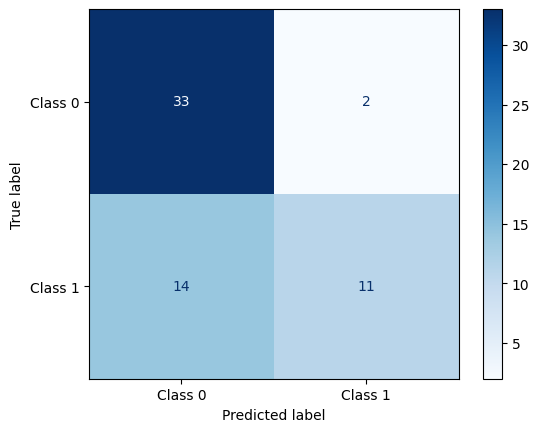

In [16]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming you have the best model stored in grid.best_estimator_ from the previous code
# grid.best_estimator_ represents the best model found during grid search

# Generate predictions
y_pred = grid.best_estimator_.predict(x_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix with labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Class 0", "Class 1"])
disp.plot(cmap="Blues")
plt.show()


Summary Statistics:
         age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
count 299.00   299.00                    299.00    299.00             299.00   
mean   60.83     0.43                    581.84      0.42              38.08   
std    11.89     0.50                    970.29      0.49              11.83   
min    40.00     0.00                     23.00      0.00              14.00   
25%    51.00     0.00                    116.50      0.00              30.00   
50%    60.00     0.00                    250.00      0.00              38.00   
75%    70.00     1.00                    582.00      1.00              45.00   
max    95.00     1.00                   7861.00      1.00              80.00   

       high_blood_pressure  platelets  serum_creatinine  serum_sodium    sex  \
count               299.00     299.00            299.00        299.00 299.00   
mean                  0.35  263358.03              1.39        136.63   0.65   
std                

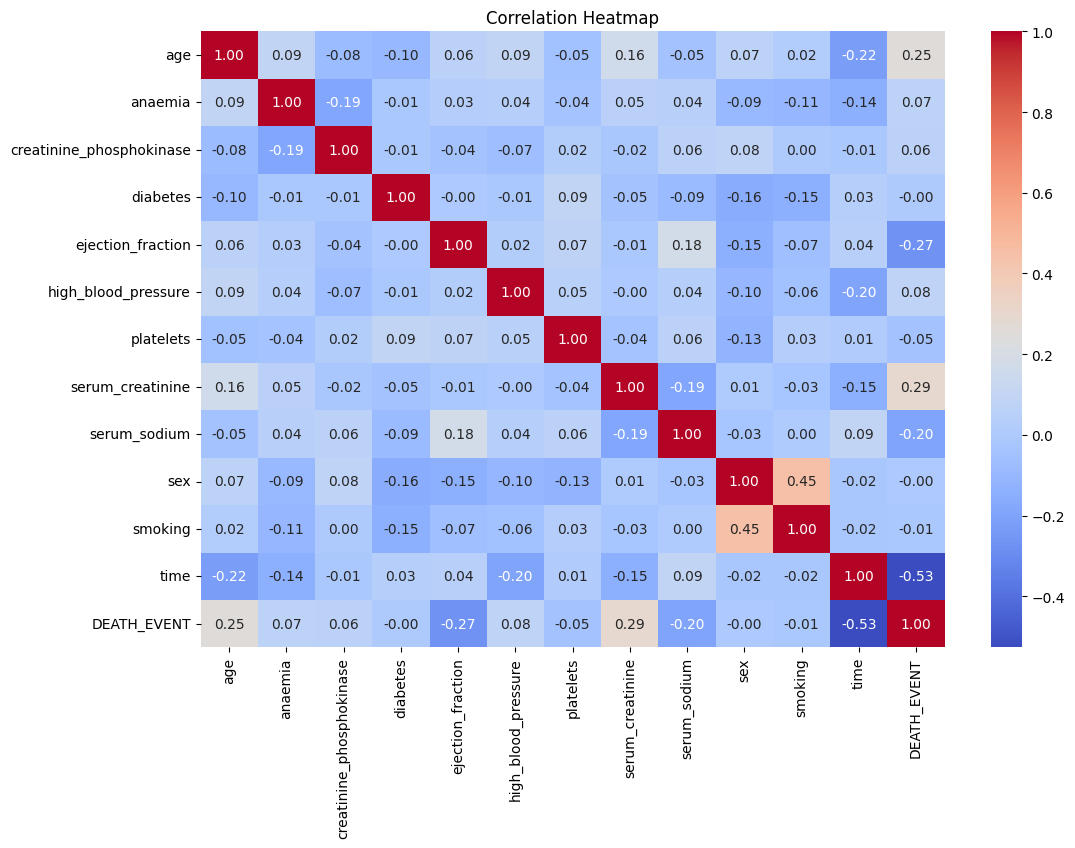

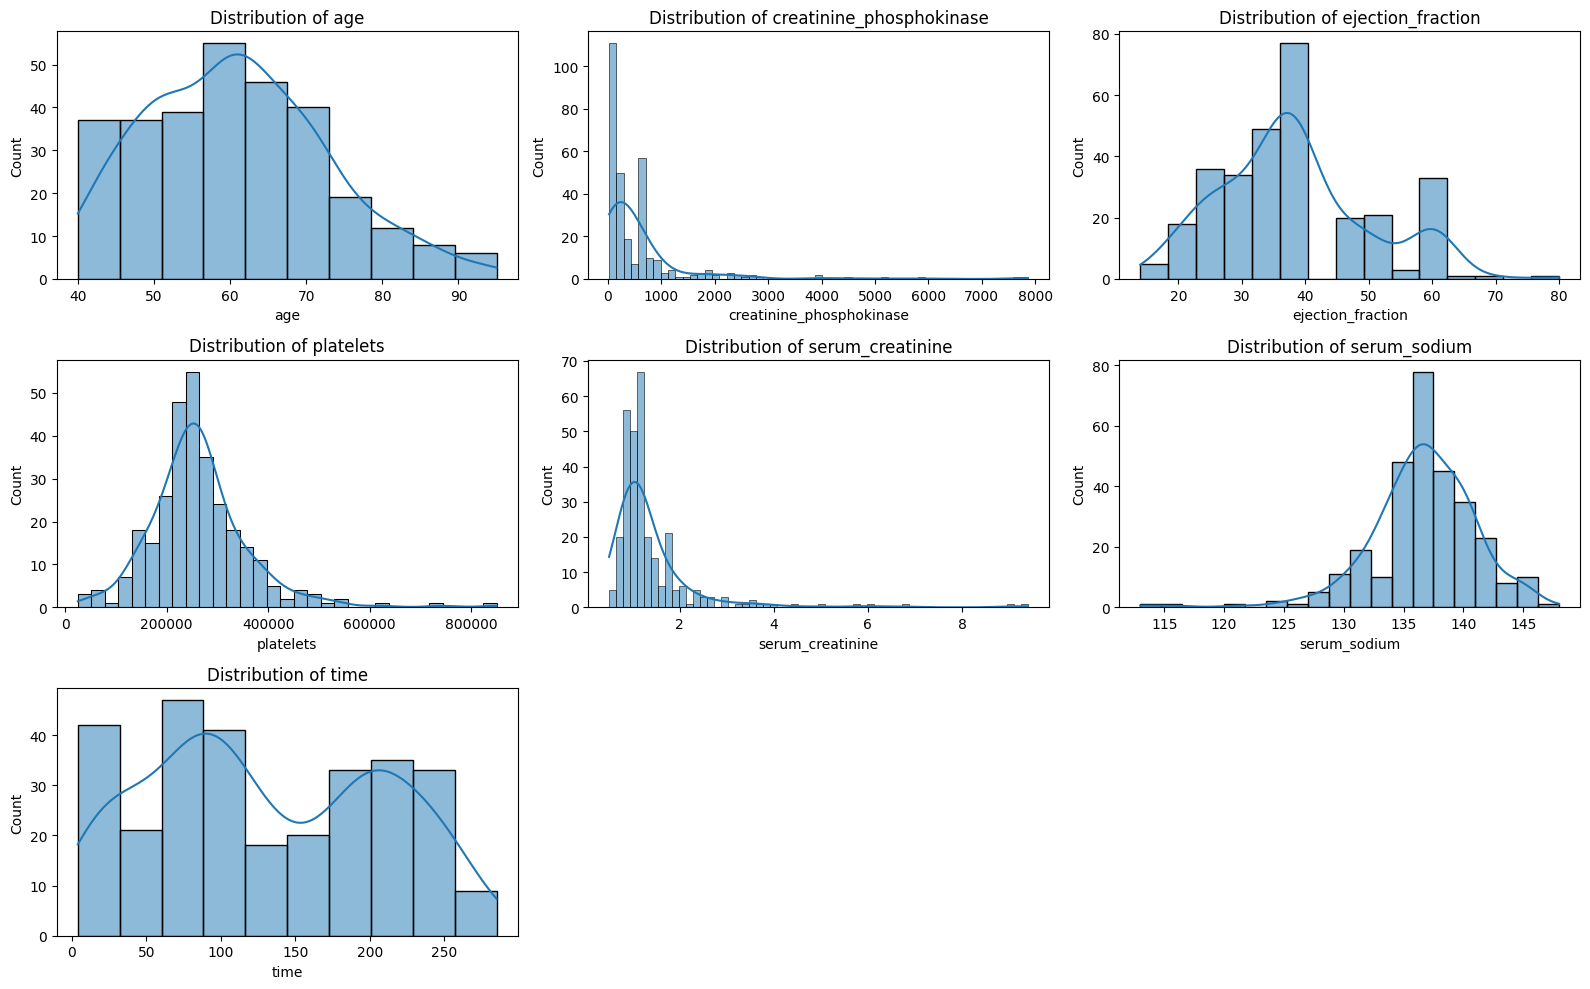

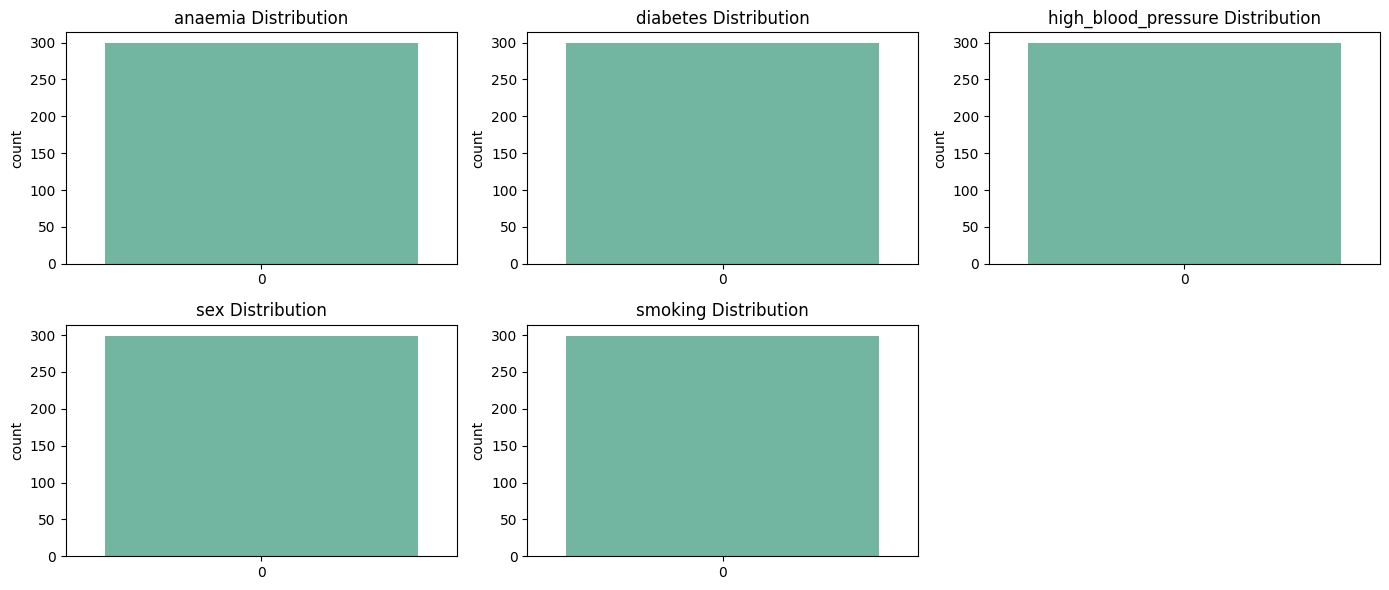

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("heart_failure_clinical_records_dataset.csv")

# Display basic statistics about the dataset
print("Summary Statistics:")
print(data.describe())

# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())

# Explore the distribution of the target variable
print("\nDistribution of DEATH_EVENT:")
print(data['DEATH_EVENT'].value_counts())

# Visualize correlations between features
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Explore the distribution of numerical features
numerical_features = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']

plt.figure(figsize=(16, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data[feature], kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

# Explore categorical features
categorical_features = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']

plt.figure(figsize=(14, 6))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(2, 3, i)
    sns.countplot(data[feature], palette='Set2')
    plt.title(f'{feature} Distribution')
plt.tight_layout()
plt.show()


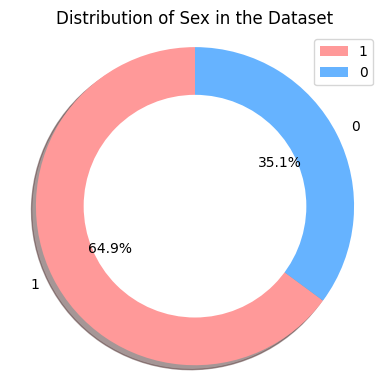

In [19]:
# Group the data by 'sex' and count the occurrences of each category
sex_counts = data['sex'].value_counts()

# Create a custom color palette for the pie chart slices
colors = ['#ff9999', '#66b3ff']

# Create the pie chart
plt.figure(figsize=(4, 4))
plt.pie(sex_counts, labels=sex_counts.index, colors=colors, autopct='%1.1f%%', startangle=90, shadow=True)

# Add a central circle to make it look like a donut chart
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Add a title and legend
plt.title("Distribution of Sex in the Dataset")
plt.legend(labels=sex_counts.index, loc='upper right')

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Show the pie chart
plt.tight_layout()
plt.show()

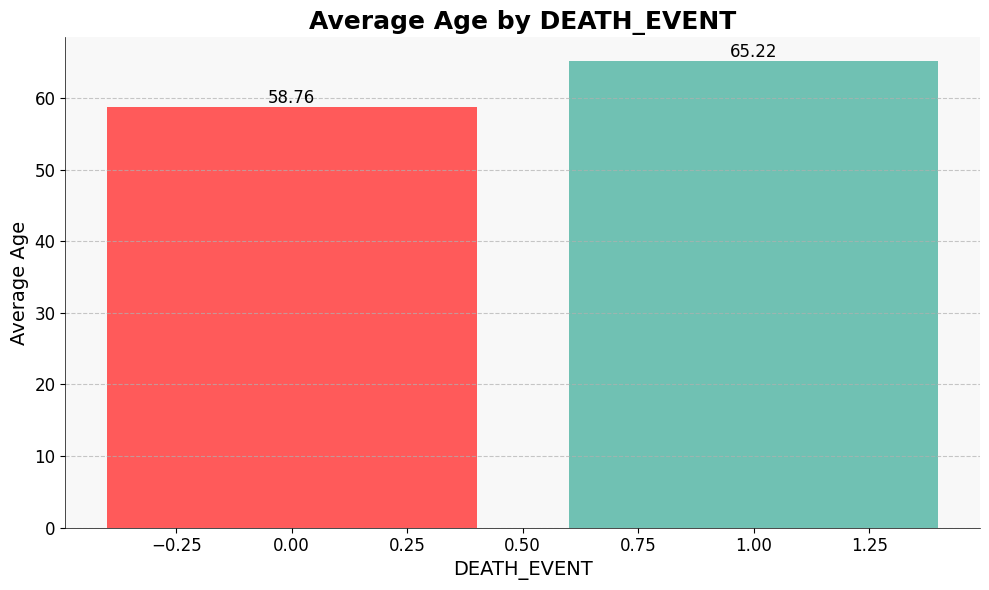

In [20]:
age_by_death_event = data.groupby('DEATH_EVENT')['age'].mean()


colors = ['#FF5A5A', '#70C1B3']


plt.figure(figsize=(10, 6))
ax = plt.bar(age_by_death_event.index, age_by_death_event, color=colors)


for i, bar in enumerate(ax):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{age_by_death_event[i]:.2f}', ha='center', va='bottom', fontsize=12)


plt.title('Average Age by DEATH_EVENT', fontsize=18, fontweight='bold')
plt.xlabel('DEATH_EVENT', fontsize=14)
plt.ylabel('Average Age', fontsize=14)


plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.gca().set_facecolor('#F8F8F8')


plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['left'].set_linewidth(0.5)
plt.gca().spines['bottom'].set_linewidth(0.5)
plt.tight_layout()


plt.show()

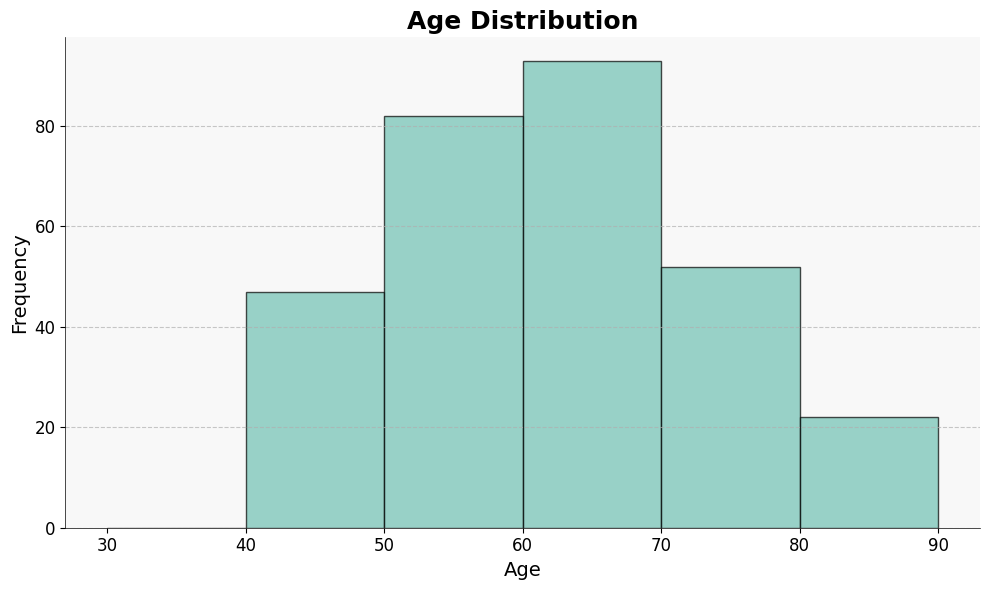

In [21]:
age_data = data['age']


plt.figure(figsize=(10, 6))


bins = [30, 40, 50, 60, 70, 80, 90]


plt.hist(age_data, bins=bins, edgecolor='black', color='#70C1B3', alpha=0.7)

plt.title('Age Distribution', fontsize=18, fontweight='bold')
plt.xlabel('Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)


plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.gca().set_facecolor('#F8F8F8')


# Remove unnecessary spines and set the layout
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['left'].set_linewidth(0.5)
plt.gca().spines['bottom'].set_linewidth(0.5)
plt.tight_layout()


plt.show()

In [22]:
pip install scikit-learn

In [23]:
from sklearn.feature_selection import SelectKBest, chi2



# Split the data into features (X) and target variable (y)
X = data.drop('DEATH_EVENT', axis=1)
y = data['DEATH_EVENT']

# Create a SelectKBest object with chi2 scoring function (k is the number of features to select)
k_best = SelectKBest(score_func=chi2, k=5)


# Fit the SelectKBest object on the data and transform it to get the selected features
X_k_best = k_best.fit_transform(X, y)

# Get the indices of the selected features
selected_feature_indices = k_best.get_support(indices=True)

# Get the names of the selected features
selected_features = X.columns[selected_feature_indices]

# Print the selected features
print("Selected Features:")
print(selected_features)

Selected Features:
Index(['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets',
       'time'],
      dtype='object')


In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.1, random_state=1)

In [25]:
from sklearn.linear_model import LogisticRegression

# Create an instance of Support Vector Machine Classifier
my_model = LogisticRegression()
my_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [26]:
my_model.score(X_test, y_test)

0.8666666666666667

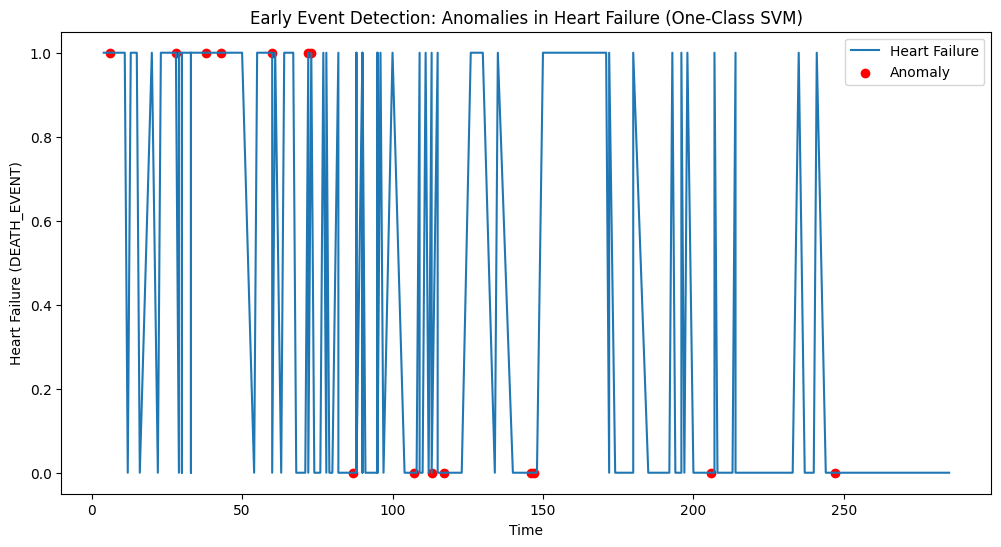

      age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
1   55.00        0                      7861         0                 38   
31  85.00        0                        23         0                 45   
46  51.00        0                      1380         0                 25   
52  60.00        0                      3964         1                 62   
60  45.00        0                      7702         1                 25   
72  85.00        0                      5882         0                 35   
75  60.00        1                        47         0                 20   
103 42.00        0                      5209         0                 30   
134 81.00        0                      4540         0                 35   
147 64.00        0                      1610         0                 60   
151 62.00        0                        30         1                 60   
171 52.00        0                      3966         0                 40   

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import OneClassSVM

# Load the dataset
data = pd.read_csv("heart_failure_clinical_records_dataset.csv")

# Assuming the 'time' column represents time steps, sort the data by time
data.sort_values(by='time', inplace=True)

# Select relevant features for anomaly detection
features = ['creatinine_phosphokinase', 'ejection_fraction', 'serum_creatinine', 'serum_sodium']

# Create a feature matrix
X = data[features].values

# Fit a One-Class SVM model for anomaly detection
model = OneClassSVM(nu=0.05)  # Adjust the nu parameter as needed
model.fit(X)

# Predict anomalies (early event detection)
anomalies = model.predict(X)

# Add the anomaly predictions to the dataset
data['anomaly'] = anomalies

# Visualize the anomalies
plt.figure(figsize=(12, 6))
plt.plot(data['time'], data['DEATH_EVENT'], label='Heart Failure')
plt.scatter(data[data['anomaly'] == -1]['time'], data[data['anomaly'] == -1]['DEATH_EVENT'], color='red', label='Anomaly')
plt.xlabel('Time')
plt.ylabel('Heart Failure (DEATH_EVENT)')
plt.legend()
plt.title('Early Event Detection: Anomalies in Heart Failure (One-Class SVM)')
plt.show()

# Identify and further analyze the anomalies
early_event_anomalies = data[data['anomaly'] == -1]

# Print or analyze early event anomalies as needed
print(early_event_anomalies)



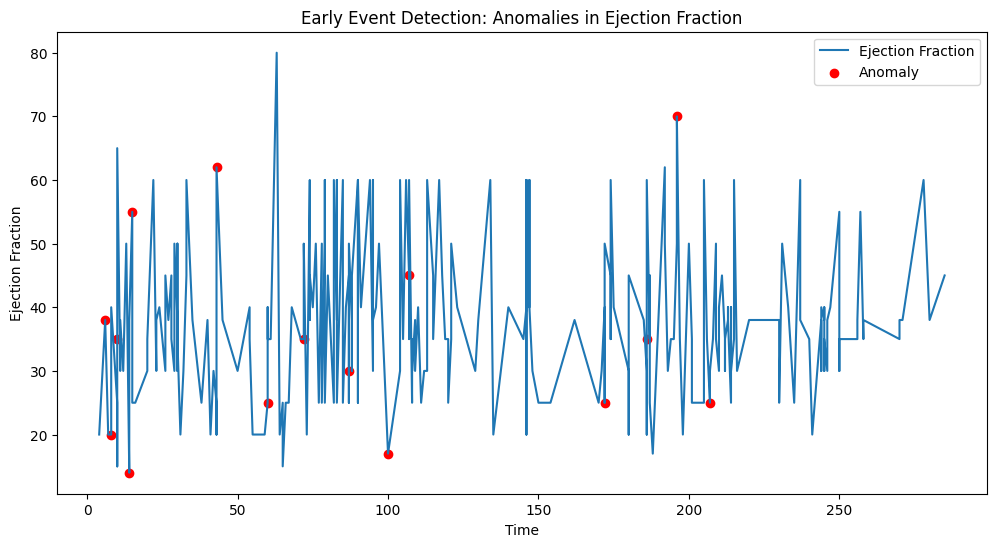

      age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
1   55.00        0                      7861         0                 38   
4   65.00        1                       160         1                 20   
9   80.00        1                       123         0                 35   
17  45.00        0                       582         0                 14   
19  48.00        1                       582         1                 55   
52  60.00        0                      3964         1                 62   
60  45.00        0                      7702         1                 25   
72  85.00        0                      5882         0                 35   
103 42.00        0                      5209         0                 30   
126 46.00        0                       168         1                 17   
131 60.00        1                      1082         1                 45   
187 60.00        0                      1896         1                 25   

In [28]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("heart_failure_clinical_records_dataset.csv")

# Assuming the 'time' column represents time steps, sort the data by time
data.sort_values(by='time', inplace=True)

# Select relevant features for anomaly detection
features = ['creatinine_phosphokinase', 'ejection_fraction', 'serum_creatinine', 'serum_sodium']

# Create a feature matrix
X = data[features].values

# Fit an Isolation Forest model for anomaly detection
model = IsolationForest( contamination=0.05, random_state=42)
model.fit(X)

# Predict anomalies (early event detection)
anomalies = model.predict(X)

# Add the anomaly predictions to the dataset
data['anomaly'] = anomalies

# Visualize the anomalies
plt.figure(figsize=(12, 6))
plt.plot(data['time'], data['ejection_fraction'], label='Ejection Fraction')
plt.scatter(data[data['anomaly'] == -1]['time'], data[data['anomaly'] == -1]['ejection_fraction'], color='red', label='Anomaly')
plt.xlabel('Time')
plt.ylabel('Ejection Fraction')
plt.legend()
plt.title('Early Event Detection: Anomalies in Ejection Fraction')
plt.show()

# Identify and further analyze the anomalies
early_event_anomalies = data[data['anomaly'] == -1]

# Print or analyze early event anomalies as needed
print(early_event_anomalies)


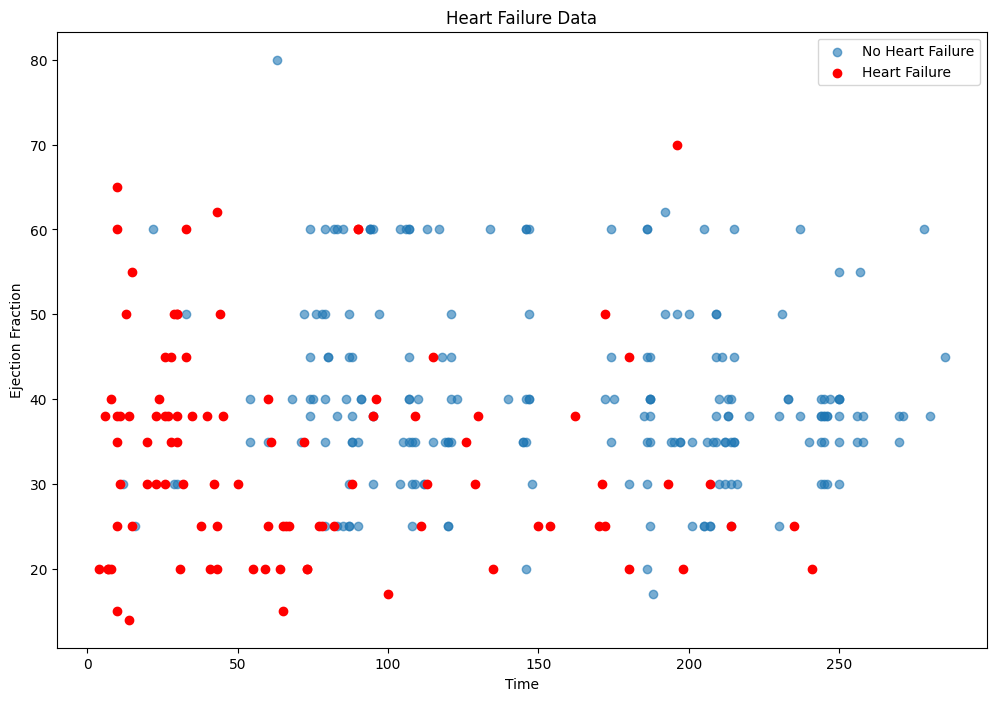

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("heart_failure_clinical_records_dataset.csv")

# Separate the data into two groups: heart failure and no heart failure
heart_failure = data[data['DEATH_EVENT'] == 1]
no_heart_failure = data[data['DEATH_EVENT'] == 0]

# Plot the data points, marking heart failure cases in red
plt.figure(figsize=(12, 8))
plt.scatter(no_heart_failure['time'], no_heart_failure['ejection_fraction'], label='No Heart Failure', alpha=0.6)
plt.scatter(heart_failure['time'], heart_failure['ejection_fraction'], label='Heart Failure', color='red')
plt.xlabel('Time')
plt.ylabel('Ejection Fraction')
plt.legend()
plt.title('Heart Failure Data')
plt.show()


In [30]:
pip install plotly


In [31]:
import pandas as pd
import plotly.express as px

# Load the dataset
data = pd.read_csv("heart_failure_clinical_records_dataset.csv")

# Create a scatter plot using Plotly Express
fig = px.scatter(data, x="time", y="ejection_fraction", color="DEATH_EVENT",
                 labels={"time": "Time", "ejection_fraction": "Ejection Fraction"},
                 title="Heart Failure Data")

# Customize the color scale
fig.update_traces(marker=dict(size=8),
                  selector=dict(mode='markers'))

# Set colors for heart failure and no heart failure
fig.update_traces(marker=dict(color='red'), selector=dict(marker=dict(color=1)))

# Show the plot
fig.show()


In [41]:
print(f'Gradient Booster Classifier: {round(100*s2x, 2)}%\nDecision Tree Classifier: {round(sorted(list1, reverse=True)[0], 2)}%\nLogistic Regression: {round(100*s1, 2)}%\nSupport Vector Machine: {round(100*s4, 2)}%\nRandom Forest Classifier: {round(100*s3, 2)}%\nK Nearest Neighbors: {round(sorted(scorelist,reverse=True)[0], 2)}%\nExtra Gradient Booster Classifier: {round(100*s2x, 2)}%')

Gradient Booster Classifier: 73.33%
Decision Tree Classifier: 73.33%
Logistic Regression: 80.0%
Support Vector Machine: 58.33%
Random Forest Classifier: 75.0%
K Nearest Neighbors: 58.33%
Extra Gradient Booster Classifier: 73.33%
